In [9]:
# !pip install -qr "../requirements.txt"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset

import sys
import os
sys.path.append(os.path.abspath("../")) # add parent folder to sys.path

In [2]:
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print(ROOT_DIR)

# Add the project root directory to the Python path
sys.path.append(ROOT_DIR)
print(sys.path)

/Users/keniwo/ws/gps-spoofing-detection
['/opt/homebrew/Caskroom/miniconda/base/envs/p311/lib/python311.zip', '/opt/homebrew/Caskroom/miniconda/base/envs/p311/lib/python3.11', '/opt/homebrew/Caskroom/miniconda/base/envs/p311/lib/python3.11/lib-dynload', '', '/opt/homebrew/Caskroom/miniconda/base/envs/p311/lib/python3.11/site-packages', '/Users/keniwo/ws/gps-spoofing-detection', '/Users/keniwo/ws/gps-spoofing-detection']


# Prepare Data

In [3]:
from models.lstm_model import DetectionLSTM
from utils.dataset import DroneDataset
from utils.preprocessing import data_preprocessing

datapath = "../data/drive-me-not/trace1.csv" 

df = data_preprocessing(filepath=datapath)
df_np = df.to_numpy()

# Train the Model

## single training example

In [2]:
# trainer
from utils.trainer import Trainer

SEQUENCE_LENGTH = 10
LEARNING_RATE = 0.001
BATCH_SIZE = 64
INPUT_SIZE = 6
HIIDEN_SIZE = 25
NUM_LAYERS = 2

data = DroneDataset(df_np, seq_length = SEQUENCE_LENGTH)

dataloader = DataLoader(data, batch_size=BATCH_SIZE, shuffle=True)

model = DetectionLSTM(input_size=6, 
                      hidden_size=25, 
                      num_layers=2, 
                      output_size=6, 
                      batch_first=True)

criteria = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

trainer = Trainer(model, 
                  dataloader, 
                  nn.MSELoss(), 
                  optim.Adam(model.parameters(), lr=0.001),
                  if_wandb=True,
                  wandb_project_name="drone-detection-lstm",)

trainer.train(epochs=500)

NameError: name 'DroneDataset' is not defined

## parameter search

Epoch 1/300


100%|██████████| 7/7 [00:00<00:00, 138.56it/s]


Train Loss: 3803.5047607421875


100%|██████████| 2/2 [00:00<00:00, 454.42it/s]


Epoch 2/300


100%|██████████| 7/7 [00:00<00:00, 167.62it/s]


Train Loss: 3774.845703125


100%|██████████| 2/2 [00:00<00:00, 459.85it/s]


Epoch 3/300


100%|██████████| 7/7 [00:00<00:00, 208.33it/s]


Train Loss: 3737.6432495117188


100%|██████████| 2/2 [00:00<00:00, 446.73it/s]


Epoch 4/300


100%|██████████| 7/7 [00:00<00:00, 207.14it/s]


Train Loss: 3688.0144653320312


100%|██████████| 2/2 [00:00<00:00, 487.68it/s]


Epoch 5/300


100%|██████████| 7/7 [00:00<00:00, 194.98it/s]


Train Loss: 3627.95068359375


100%|██████████| 2/2 [00:00<00:00, 450.85it/s]


Epoch 6/300


100%|██████████| 7/7 [00:00<00:00, 180.86it/s]


Train Loss: 3565.9046630859375


100%|██████████| 2/2 [00:00<00:00, 455.16it/s]


Epoch 7/300


100%|██████████| 7/7 [00:00<00:00, 215.58it/s]


Train Loss: 3503.6227111816406


100%|██████████| 2/2 [00:00<00:00, 472.46it/s]


Epoch 8/300


100%|██████████| 7/7 [00:00<00:00, 215.10it/s]


Train Loss: 3440.6956481933594


100%|██████████| 2/2 [00:00<00:00, 538.39it/s]


Epoch 9/300


100%|██████████| 7/7 [00:00<00:00, 92.34it/s]


Train Loss: 3378.7281188964844


100%|██████████| 2/2 [00:00<00:00, 316.47it/s]


Epoch 10/300


100%|██████████| 7/7 [00:00<00:00, 171.01it/s]


Train Loss: 3318.018829345703


100%|██████████| 2/2 [00:00<00:00, 277.90it/s]


Epoch 11/300


100%|██████████| 7/7 [00:00<00:00, 147.72it/s]


Train Loss: 3261.2548217773438


100%|██████████| 2/2 [00:00<00:00, 497.16it/s]


Epoch 12/300


100%|██████████| 7/7 [00:00<00:00, 200.52it/s]


Train Loss: 3210.1275329589844


100%|██████████| 2/2 [00:00<00:00, 464.43it/s]


Epoch 13/300


100%|██████████| 7/7 [00:00<00:00, 231.58it/s]


Train Loss: 3163.043975830078


100%|██████████| 2/2 [00:00<00:00, 484.61it/s]


Epoch 14/300


100%|██████████| 7/7 [00:00<00:00, 222.03it/s]


Train Loss: 3118.7711486816406


100%|██████████| 2/2 [00:00<00:00, 470.50it/s]


Epoch 15/300


100%|██████████| 7/7 [00:00<00:00, 223.07it/s]


Train Loss: 3077.694580078125


100%|██████████| 2/2 [00:00<00:00, 490.42it/s]


Epoch 16/300


100%|██████████| 7/7 [00:00<00:00, 198.14it/s]


Train Loss: 3038.6241455078125


100%|██████████| 2/2 [00:00<00:00, 335.80it/s]


Epoch 17/300


100%|██████████| 7/7 [00:00<00:00, 177.73it/s]


Train Loss: 3001.101104736328


100%|██████████| 2/2 [00:00<00:00, 303.63it/s]


Epoch 18/300


100%|██████████| 7/7 [00:00<00:00, 187.98it/s]


Train Loss: 2964.9029541015625


100%|██████████| 2/2 [00:00<00:00, 422.30it/s]


Epoch 19/300


100%|██████████| 7/7 [00:00<00:00, 202.09it/s]


Train Loss: 2929.9071044921875


100%|██████████| 2/2 [00:00<00:00, 467.18it/s]


Epoch 20/300


100%|██████████| 7/7 [00:00<00:00, 91.58it/s]


Train Loss: 2895.8048400878906


100%|██████████| 2/2 [00:00<00:00, 440.53it/s]


Epoch 21/300


100%|██████████| 7/7 [00:00<00:00, 189.59it/s]


Train Loss: 2862.830841064453


100%|██████████| 2/2 [00:00<00:00, 484.14it/s]


Epoch 22/300


100%|██████████| 7/7 [00:00<00:00, 195.94it/s]


Train Loss: 2830.6131591796875


100%|██████████| 2/2 [00:00<00:00, 346.49it/s]


Epoch 23/300


100%|██████████| 7/7 [00:00<00:00, 176.04it/s]


Train Loss: 2799.003173828125


100%|██████████| 2/2 [00:00<00:00, 472.84it/s]


Epoch 24/300


100%|██████████| 7/7 [00:00<00:00, 216.80it/s]


Train Loss: 2768.0956115722656


100%|██████████| 2/2 [00:00<00:00, 499.86it/s]


Epoch 25/300


100%|██████████| 7/7 [00:00<00:00, 76.41it/s]


Train Loss: 2737.8552856445312


100%|██████████| 2/2 [00:00<00:00, 475.95it/s]


Epoch 26/300


100%|██████████| 7/7 [00:00<00:00, 135.04it/s]


Train Loss: 2708.1781005859375


100%|██████████| 2/2 [00:00<00:00, 451.97it/s]


Epoch 27/300


100%|██████████| 7/7 [00:00<00:00, 214.93it/s]


Train Loss: 2679.0031127929688


100%|██████████| 2/2 [00:00<00:00, 447.63it/s]


Epoch 28/300


100%|██████████| 7/7 [00:00<00:00, 213.32it/s]


Train Loss: 2650.206573486328


100%|██████████| 2/2 [00:00<00:00, 495.55it/s]


Epoch 29/300


100%|██████████| 7/7 [00:00<00:00, 209.69it/s]


Train Loss: 2622.0421447753906


100%|██████████| 2/2 [00:00<00:00, 528.85it/s]


Epoch 30/300


100%|██████████| 7/7 [00:00<00:00, 185.44it/s]


Train Loss: 2594.061065673828


100%|██████████| 2/2 [00:00<00:00, 479.27it/s]


Epoch 31/300


100%|██████████| 7/7 [00:00<00:00, 94.17it/s]


Train Loss: 2566.7047729492188


100%|██████████| 2/2 [00:00<00:00, 515.05it/s]


Epoch 32/300


100%|██████████| 7/7 [00:00<00:00, 207.43it/s]


Train Loss: 2539.5863647460938


100%|██████████| 2/2 [00:00<00:00, 537.63it/s]


Epoch 33/300


100%|██████████| 7/7 [00:00<00:00, 219.09it/s]


Train Loss: 2512.9229431152344


100%|██████████| 2/2 [00:00<00:00, 499.77it/s]


Epoch 34/300


100%|██████████| 7/7 [00:00<00:00, 223.26it/s]


Train Loss: 2486.513153076172


100%|██████████| 2/2 [00:00<00:00, 494.06it/s]


Epoch 35/300


100%|██████████| 7/7 [00:00<00:00, 220.90it/s]


Train Loss: 2460.5196228027344


100%|██████████| 2/2 [00:00<00:00, 482.77it/s]


Epoch 36/300


100%|██████████| 7/7 [00:00<00:00, 223.05it/s]


Train Loss: 2434.712615966797


100%|██████████| 2/2 [00:00<00:00, 512.28it/s]


Epoch 37/300


100%|██████████| 7/7 [00:00<00:00, 172.55it/s]


Train Loss: 2409.3795166015625


100%|██████████| 2/2 [00:00<00:00, 486.35it/s]


Epoch 38/300


100%|██████████| 7/7 [00:00<00:00, 205.39it/s]


Train Loss: 2384.3291015625


100%|██████████| 2/2 [00:00<00:00, 485.65it/s]


Epoch 39/300


100%|██████████| 7/7 [00:00<00:00, 151.73it/s]


Train Loss: 2359.501220703125


100%|██████████| 2/2 [00:00<00:00, 266.21it/s]


Epoch 40/300


100%|██████████| 7/7 [00:00<00:00, 163.67it/s]


Train Loss: 2335.0279235839844


100%|██████████| 2/2 [00:00<00:00, 532.61it/s]


Epoch 41/300


100%|██████████| 7/7 [00:00<00:00, 202.56it/s]


Train Loss: 2310.829071044922


100%|██████████| 2/2 [00:00<00:00, 412.62it/s]


Epoch 42/300


100%|██████████| 7/7 [00:00<00:00, 198.93it/s]


Train Loss: 2286.872100830078


100%|██████████| 2/2 [00:00<00:00, 356.07it/s]


Epoch 43/300


100%|██████████| 7/7 [00:00<00:00, 206.52it/s]


Train Loss: 2263.1900939941406


100%|██████████| 2/2 [00:00<00:00, 399.53it/s]


Epoch 44/300


100%|██████████| 7/7 [00:00<00:00, 188.00it/s]


Train Loss: 2239.8092346191406


100%|██████████| 2/2 [00:00<00:00, 507.23it/s]


Epoch 45/300


100%|██████████| 7/7 [00:00<00:00, 211.46it/s]


Train Loss: 2216.6544799804688


100%|██████████| 2/2 [00:00<00:00, 467.20it/s]


Epoch 46/300


100%|██████████| 7/7 [00:00<00:00, 191.48it/s]


Train Loss: 2193.7631225585938


100%|██████████| 2/2 [00:00<00:00, 468.82it/s]


Epoch 47/300


100%|██████████| 7/7 [00:00<00:00, 96.08it/s]


Train Loss: 2171.109619140625


100%|██████████| 2/2 [00:00<00:00, 361.20it/s]


Epoch 48/300


100%|██████████| 7/7 [00:00<00:00, 203.19it/s]


Train Loss: 2148.7081604003906


100%|██████████| 2/2 [00:00<00:00, 473.37it/s]


Epoch 49/300


100%|██████████| 7/7 [00:00<00:00, 234.22it/s]


Train Loss: 2126.5219116210938


100%|██████████| 2/2 [00:00<00:00, 486.61it/s]


Epoch 50/300


100%|██████████| 7/7 [00:00<00:00, 211.74it/s]


Train Loss: 2104.5667724609375


100%|██████████| 2/2 [00:00<00:00, 510.19it/s]


Epoch 51/300


100%|██████████| 7/7 [00:00<00:00, 198.75it/s]


Train Loss: 2082.880645751953


100%|██████████| 2/2 [00:00<00:00, 141.90it/s]


Epoch 52/300


100%|██████████| 7/7 [00:00<00:00, 125.49it/s]


Train Loss: 2061.417510986328


100%|██████████| 2/2 [00:00<00:00, 517.05it/s]


Epoch 53/300


100%|██████████| 7/7 [00:00<00:00, 183.02it/s]


Train Loss: 2040.1207885742188


100%|██████████| 2/2 [00:00<00:00, 481.80it/s]


Epoch 54/300


100%|██████████| 7/7 [00:00<00:00, 222.34it/s]


Train Loss: 2019.0618286132812


100%|██████████| 2/2 [00:00<00:00, 397.62it/s]


Epoch 55/300


100%|██████████| 7/7 [00:00<00:00, 212.53it/s]


Train Loss: 1998.1606140136719


100%|██████████| 2/2 [00:00<00:00, 489.25it/s]


Epoch 56/300


100%|██████████| 7/7 [00:00<00:00, 220.90it/s]


Train Loss: 1977.5467529296875


100%|██████████| 2/2 [00:00<00:00, 368.28it/s]


Epoch 57/300


100%|██████████| 7/7 [00:00<00:00, 200.54it/s]


Train Loss: 1957.0981140136719


100%|██████████| 2/2 [00:00<00:00, 476.73it/s]


Epoch 58/300


100%|██████████| 7/7 [00:00<00:00, 210.93it/s]


Train Loss: 1936.9160766601562


100%|██████████| 2/2 [00:00<00:00, 475.84it/s]


Epoch 59/300


100%|██████████| 7/7 [00:00<00:00, 147.64it/s]


Train Loss: 1916.9291381835938


100%|██████████| 2/2 [00:00<00:00, 475.73it/s]


Epoch 60/300


100%|██████████| 7/7 [00:00<00:00, 213.50it/s]


Train Loss: 1897.121826171875


100%|██████████| 2/2 [00:00<00:00, 498.88it/s]


Epoch 61/300


100%|██████████| 7/7 [00:00<00:00, 210.27it/s]


Train Loss: 1877.5135803222656


100%|██████████| 2/2 [00:00<00:00, 480.23it/s]


Epoch 62/300


100%|██████████| 7/7 [00:00<00:00, 196.06it/s]


Train Loss: 1858.1123962402344


100%|██████████| 2/2 [00:00<00:00, 552.14it/s]


Epoch 63/300


100%|██████████| 7/7 [00:00<00:00, 92.00it/s]


Train Loss: 1838.9330749511719


100%|██████████| 2/2 [00:00<00:00, 381.75it/s]


Epoch 64/300


100%|██████████| 7/7 [00:00<00:00, 186.36it/s]


Train Loss: 1819.9311218261719


100%|██████████| 2/2 [00:00<00:00, 458.72it/s]


Epoch 65/300


100%|██████████| 7/7 [00:00<00:00, 197.06it/s]


Train Loss: 1801.128662109375


100%|██████████| 2/2 [00:00<00:00, 180.35it/s]


Epoch 66/300


100%|██████████| 7/7 [00:00<00:00, 202.40it/s]


Train Loss: 1782.4908294677734


100%|██████████| 2/2 [00:00<00:00, 447.85it/s]


Epoch 67/300


100%|██████████| 7/7 [00:00<00:00, 202.67it/s]


Train Loss: 1764.0233001708984


100%|██████████| 2/2 [00:00<00:00, 515.08it/s]


Epoch 68/300


100%|██████████| 7/7 [00:00<00:00, 216.01it/s]


Train Loss: 1745.7644348144531


100%|██████████| 2/2 [00:00<00:00, 498.88it/s]


Epoch 69/300


100%|██████████| 7/7 [00:00<00:00, 89.59it/s]


Train Loss: 1727.7101135253906


100%|██████████| 2/2 [00:00<00:00, 459.02it/s]


Epoch 70/300


100%|██████████| 7/7 [00:00<00:00, 212.55it/s]


Train Loss: 1709.7814483642578


100%|██████████| 2/2 [00:00<00:00, 506.96it/s]


Epoch 71/300


100%|██████████| 7/7 [00:00<00:00, 221.82it/s]


Train Loss: 1692.0025024414062


100%|██████████| 2/2 [00:00<00:00, 301.65it/s]


Epoch 72/300


100%|██████████| 7/7 [00:00<00:00, 218.14it/s]


Train Loss: 1674.4588775634766


100%|██████████| 2/2 [00:00<00:00, 472.36it/s]


Epoch 73/300


100%|██████████| 7/7 [00:00<00:00, 149.77it/s]


Train Loss: 1657.08447265625


100%|██████████| 2/2 [00:00<00:00, 450.56it/s]


Epoch 74/300


100%|██████████| 7/7 [00:00<00:00, 177.95it/s]


Train Loss: 1639.9041595458984


100%|██████████| 2/2 [00:00<00:00, 420.44it/s]


Epoch 75/300


100%|██████████| 7/7 [00:00<00:00, 83.19it/s]


Train Loss: 1622.7608337402344


100%|██████████| 2/2 [00:00<00:00, 432.71it/s]


Epoch 76/300


100%|██████████| 7/7 [00:00<00:00, 199.24it/s]


Train Loss: 1605.8875732421875


100%|██████████| 2/2 [00:00<00:00, 466.50it/s]


Epoch 77/300


100%|██████████| 7/7 [00:00<00:00, 201.97it/s]


Train Loss: 1589.1791381835938


100%|██████████| 2/2 [00:00<00:00, 487.20it/s]


Epoch 78/300


100%|██████████| 7/7 [00:00<00:00, 215.11it/s]


Train Loss: 1572.6007843017578


100%|██████████| 2/2 [00:00<00:00, 516.76it/s]


Epoch 79/300


100%|██████████| 7/7 [00:00<00:00, 175.80it/s]


Train Loss: 1556.2510681152344


100%|██████████| 2/2 [00:00<00:00, 443.94it/s]


Epoch 80/300


100%|██████████| 7/7 [00:00<00:00, 215.07it/s]


Train Loss: 1540.0457611083984


100%|██████████| 2/2 [00:00<00:00, 525.47it/s]


Epoch 81/300


100%|██████████| 7/7 [00:00<00:00, 214.51it/s]


Train Loss: 1523.921890258789


100%|██████████| 2/2 [00:00<00:00, 551.08it/s]


Epoch 82/300


100%|██████████| 7/7 [00:00<00:00, 97.02it/s]


Train Loss: 1508.0049285888672


100%|██████████| 2/2 [00:00<00:00, 451.66it/s]


Epoch 83/300


100%|██████████| 7/7 [00:00<00:00, 181.12it/s]


Train Loss: 1492.2520904541016


100%|██████████| 2/2 [00:00<00:00, 514.54it/s]


Epoch 84/300


100%|██████████| 7/7 [00:00<00:00, 144.57it/s]


Train Loss: 1476.6000061035156


100%|██████████| 2/2 [00:00<00:00, 479.98it/s]


Epoch 85/300


100%|██████████| 7/7 [00:00<00:00, 172.36it/s]


Train Loss: 1461.108383178711


100%|██████████| 2/2 [00:00<00:00, 359.64it/s]


Epoch 86/300


100%|██████████| 7/7 [00:00<00:00, 206.57it/s]


Train Loss: 1445.833267211914


100%|██████████| 2/2 [00:00<00:00, 463.61it/s]


Epoch 87/300


100%|██████████| 7/7 [00:00<00:00, 207.01it/s]


Train Loss: 1430.6253051757812


100%|██████████| 2/2 [00:00<00:00, 465.34it/s]


Epoch 88/300


100%|██████████| 7/7 [00:00<00:00, 209.05it/s]


Train Loss: 1415.6397247314453


100%|██████████| 2/2 [00:00<00:00, 425.54it/s]


Epoch 89/300


100%|██████████| 7/7 [00:00<00:00, 190.92it/s]


Train Loss: 1400.747055053711


100%|██████████| 2/2 [00:00<00:00, 51.64it/s]


Epoch 90/300


100%|██████████| 7/7 [00:00<00:00, 190.95it/s]


Train Loss: 1386.0225372314453


100%|██████████| 2/2 [00:00<00:00, 492.38it/s]


Epoch 91/300


100%|██████████| 7/7 [00:00<00:00, 221.90it/s]


Train Loss: 1371.4271087646484


100%|██████████| 2/2 [00:00<00:00, 492.00it/s]


Epoch 92/300


100%|██████████| 7/7 [00:00<00:00, 211.21it/s]


Train Loss: 1356.9575958251953


100%|██████████| 2/2 [00:00<00:00, 496.98it/s]


Epoch 93/300


100%|██████████| 7/7 [00:00<00:00, 184.26it/s]


Train Loss: 1342.6491088867188


100%|██████████| 2/2 [00:00<00:00, 468.48it/s]


Epoch 94/300


100%|██████████| 7/7 [00:00<00:00, 214.63it/s]


Train Loss: 1328.477783203125


100%|██████████| 2/2 [00:00<00:00, 583.76it/s]


Epoch 95/300


100%|██████████| 7/7 [00:00<00:00, 186.52it/s]


Train Loss: 1314.4554595947266


100%|██████████| 2/2 [00:00<00:00, 487.91it/s]


Epoch 96/300


100%|██████████| 7/7 [00:00<00:00, 97.57it/s]


Train Loss: 1300.493148803711


100%|██████████| 2/2 [00:00<00:00, 423.82it/s]


Epoch 97/300


100%|██████████| 7/7 [00:00<00:00, 84.96it/s]


Train Loss: 1286.743896484375


100%|██████████| 2/2 [00:00<00:00, 452.19it/s]


Epoch 98/300


100%|██████████| 7/7 [00:00<00:00, 217.15it/s]


Train Loss: 1273.1724548339844


100%|██████████| 2/2 [00:00<00:00, 491.02it/s]


Epoch 99/300


100%|██████████| 7/7 [00:00<00:00, 185.70it/s]


Train Loss: 1259.6157989501953


100%|██████████| 2/2 [00:00<00:00, 476.73it/s]


Epoch 100/300


100%|██████████| 7/7 [00:00<00:00, 223.79it/s]


Train Loss: 1246.2550048828125


100%|██████████| 2/2 [00:00<00:00, 474.82it/s]


Epoch 101/300


100%|██████████| 7/7 [00:00<00:00, 224.93it/s]


Train Loss: 1233.0498046875


100%|██████████| 2/2 [00:00<00:00, 539.22it/s]


Epoch 102/300


100%|██████████| 7/7 [00:00<00:00, 205.07it/s]


Train Loss: 1219.8970947265625


100%|██████████| 2/2 [00:00<00:00, 496.81it/s]


Epoch 103/300


100%|██████████| 7/7 [00:00<00:00, 95.88it/s]


Train Loss: 1206.9001770019531


100%|██████████| 2/2 [00:00<00:00, 436.20it/s]


Epoch 104/300


100%|██████████| 7/7 [00:00<00:00, 173.68it/s]


Train Loss: 1194.032974243164


100%|██████████| 2/2 [00:00<00:00, 456.62it/s]


Epoch 105/300


100%|██████████| 7/7 [00:00<00:00, 206.09it/s]


Train Loss: 1181.246078491211


100%|██████████| 2/2 [00:00<00:00, 517.59it/s]


Epoch 106/300


100%|██████████| 7/7 [00:00<00:00, 176.42it/s]


Train Loss: 1168.6701202392578


100%|██████████| 2/2 [00:00<00:00, 528.85it/s]


Epoch 107/300


100%|██████████| 7/7 [00:00<00:00, 202.46it/s]


Train Loss: 1156.1902923583984


100%|██████████| 2/2 [00:00<00:00, 427.27it/s]


Epoch 108/300


100%|██████████| 7/7 [00:00<00:00, 213.19it/s]


Train Loss: 1143.7883605957031


100%|██████████| 2/2 [00:00<00:00, 394.33it/s]


Epoch 109/300


100%|██████████| 7/7 [00:00<00:00, 94.52it/s]


Train Loss: 1131.5359344482422


100%|██████████| 2/2 [00:00<00:00, 456.03it/s]


Epoch 110/300


100%|██████████| 7/7 [00:00<00:00, 84.94it/s]


Train Loss: 1119.378402709961


100%|██████████| 2/2 [00:00<00:00, 510.44it/s]


Epoch 111/300


100%|██████████| 7/7 [00:00<00:00, 217.15it/s]


Train Loss: 1107.4131927490234


100%|██████████| 2/2 [00:00<00:00, 454.52it/s]


Epoch 112/300


100%|██████████| 7/7 [00:00<00:00, 163.63it/s]


Train Loss: 1095.4449768066406


100%|██████████| 2/2 [00:00<00:00, 488.76it/s]


Epoch 113/300


100%|██████████| 7/7 [00:00<00:00, 178.58it/s]


Train Loss: 1083.6246643066406


100%|██████████| 2/2 [00:00<00:00, 336.65it/s]


Epoch 114/300


100%|██████████| 7/7 [00:00<00:00, 80.90it/s]


Train Loss: 1071.971435546875


100%|██████████| 2/2 [00:00<00:00, 533.19it/s]


Epoch 115/300


100%|██████████| 7/7 [00:00<00:00, 204.87it/s]


Train Loss: 1060.3835144042969


100%|██████████| 2/2 [00:00<00:00, 495.66it/s]


Epoch 116/300


100%|██████████| 7/7 [00:00<00:00, 200.55it/s]


Train Loss: 1048.9459381103516


100%|██████████| 2/2 [00:00<00:00, 510.19it/s]


Epoch 117/300


100%|██████████| 7/7 [00:00<00:00, 201.28it/s]


Train Loss: 1037.609390258789


100%|██████████| 2/2 [00:00<00:00, 438.32it/s]


Epoch 118/300


100%|██████████| 7/7 [00:00<00:00, 176.57it/s]


Train Loss: 1026.3287353515625


100%|██████████| 2/2 [00:00<00:00, 392.47it/s]


Epoch 119/300


100%|██████████| 7/7 [00:00<00:00, 218.05it/s]


Train Loss: 1015.2289581298828


100%|██████████| 2/2 [00:00<00:00, 62.37it/s]


Epoch 120/300


100%|██████████| 7/7 [00:00<00:00, 202.87it/s]


Train Loss: 1004.2090911865234


100%|██████████| 2/2 [00:00<00:00, 460.61it/s]


Epoch 121/300


100%|██████████| 7/7 [00:00<00:00, 218.41it/s]


Train Loss: 993.3139495849609


100%|██████████| 2/2 [00:00<00:00, 404.78it/s]


Epoch 122/300


100%|██████████| 7/7 [00:00<00:00, 163.21it/s]


Train Loss: 982.4702911376953


100%|██████████| 2/2 [00:00<00:00, 480.97it/s]


Epoch 123/300


100%|██████████| 7/7 [00:00<00:00, 140.13it/s]


Train Loss: 971.7773590087891


100%|██████████| 2/2 [00:00<00:00, 481.69it/s]


Epoch 124/300


100%|██████████| 7/7 [00:00<00:00, 205.92it/s]


Train Loss: 961.1876831054688


100%|██████████| 2/2 [00:00<00:00, 193.76it/s]


Epoch 125/300


100%|██████████| 7/7 [00:00<00:00, 90.98it/s]


Train Loss: 950.6635589599609


100%|██████████| 2/2 [00:00<00:00, 443.37it/s]


Epoch 126/300


100%|██████████| 7/7 [00:00<00:00, 209.18it/s]


Train Loss: 940.2450408935547


100%|██████████| 2/2 [00:00<00:00, 417.80it/s]


Epoch 127/300


100%|██████████| 7/7 [00:00<00:00, 226.69it/s]


Train Loss: 929.9794311523438


100%|██████████| 2/2 [00:00<00:00, 380.00it/s]


Epoch 128/300


100%|██████████| 7/7 [00:00<00:00, 190.23it/s]


Train Loss: 919.7329864501953


100%|██████████| 2/2 [00:00<00:00, 474.84it/s]


Epoch 129/300


100%|██████████| 7/7 [00:00<00:00, 228.36it/s]


Train Loss: 909.6735076904297


100%|██████████| 2/2 [00:00<00:00, 475.30it/s]


Epoch 130/300


100%|██████████| 7/7 [00:00<00:00, 222.04it/s]


Train Loss: 899.6250305175781


100%|██████████| 2/2 [00:00<00:00, 501.26it/s]


Epoch 131/300


100%|██████████| 7/7 [00:00<00:00, 217.90it/s]


Train Loss: 889.7861175537109


100%|██████████| 2/2 [00:00<00:00, 504.18it/s]


Epoch 132/300


100%|██████████| 7/7 [00:00<00:00, 202.66it/s]


Train Loss: 879.9052886962891


100%|██████████| 2/2 [00:00<00:00, 54.70it/s]


Epoch 133/300


100%|██████████| 7/7 [00:00<00:00, 153.52it/s]


Train Loss: 870.2278900146484


100%|██████████| 2/2 [00:00<00:00, 516.03it/s]


Epoch 134/300


100%|██████████| 7/7 [00:00<00:00, 203.32it/s]


Train Loss: 860.6192016601562


100%|██████████| 2/2 [00:00<00:00, 482.41it/s]


Epoch 135/300


100%|██████████| 7/7 [00:00<00:00, 220.93it/s]


Train Loss: 851.0653839111328


100%|██████████| 2/2 [00:00<00:00, 517.59it/s]


Epoch 136/300


100%|██████████| 7/7 [00:00<00:00, 218.91it/s]


Train Loss: 841.643424987793


100%|██████████| 2/2 [00:00<00:00, 502.37it/s]


Epoch 137/300


100%|██████████| 7/7 [00:00<00:00, 231.47it/s]


Train Loss: 832.2923126220703


100%|██████████| 2/2 [00:00<00:00, 533.90it/s]


Epoch 138/300


100%|██████████| 7/7 [00:00<00:00, 226.02it/s]


Train Loss: 823.0417785644531


100%|██████████| 2/2 [00:00<00:00, 378.07it/s]


Epoch 139/300


100%|██████████| 7/7 [00:00<00:00, 178.25it/s]


Train Loss: 813.8399658203125


100%|██████████| 2/2 [00:00<00:00, 477.44it/s]


Epoch 140/300


100%|██████████| 7/7 [00:00<00:00, 231.73it/s]


Train Loss: 804.7452163696289


100%|██████████| 2/2 [00:00<00:00, 483.10it/s]


Epoch 141/300


100%|██████████| 7/7 [00:00<00:00, 103.50it/s]


Train Loss: 795.802116394043


100%|██████████| 2/2 [00:00<00:00, 477.22it/s]


Epoch 142/300


100%|██████████| 7/7 [00:00<00:00, 235.56it/s]


Train Loss: 786.867431640625


100%|██████████| 2/2 [00:00<00:00, 486.97it/s]


Epoch 143/300


100%|██████████| 7/7 [00:00<00:00, 212.12it/s]


Train Loss: 778.0061874389648


100%|██████████| 2/2 [00:00<00:00, 448.73it/s]


Epoch 144/300


100%|██████████| 7/7 [00:00<00:00, 180.79it/s]


Train Loss: 769.3029403686523


100%|██████████| 2/2 [00:00<00:00, 459.12it/s]


Epoch 145/300


100%|██████████| 7/7 [00:00<00:00, 230.60it/s]


Train Loss: 760.6665573120117


100%|██████████| 2/2 [00:00<00:00, 515.62it/s]


Epoch 146/300


100%|██████████| 7/7 [00:00<00:00, 173.72it/s]


Train Loss: 752.1162719726562


100%|██████████| 2/2 [00:00<00:00, 484.86it/s]


Epoch 147/300


100%|██████████| 7/7 [00:00<00:00, 211.85it/s]


Train Loss: 743.611930847168


100%|██████████| 2/2 [00:00<00:00, 524.55it/s]


Epoch 148/300


100%|██████████| 7/7 [00:00<00:00, 212.14it/s]


Train Loss: 735.2346115112305


100%|██████████| 2/2 [00:00<00:00, 107.16it/s]


Epoch 149/300


100%|██████████| 7/7 [00:00<00:00, 186.44it/s]


Train Loss: 726.9013595581055


100%|██████████| 2/2 [00:00<00:00, 391.02it/s]


Epoch 150/300


100%|██████████| 7/7 [00:00<00:00, 212.16it/s]


Train Loss: 718.6442565917969


100%|██████████| 2/2 [00:00<00:00, 470.00it/s]


Epoch 151/300


100%|██████████| 7/7 [00:00<00:00, 232.12it/s]


Train Loss: 710.5080413818359


100%|██████████| 2/2 [00:00<00:00, 461.14it/s]


Epoch 152/300


100%|██████████| 7/7 [00:00<00:00, 184.37it/s]


Train Loss: 702.3877258300781


100%|██████████| 2/2 [00:00<00:00, 52.28it/s]


Epoch 153/300


100%|██████████| 7/7 [00:00<00:00, 163.30it/s]


Train Loss: 694.4479370117188


100%|██████████| 2/2 [00:00<00:00, 497.13it/s]


Epoch 154/300


100%|██████████| 7/7 [00:00<00:00, 220.95it/s]


Train Loss: 686.495735168457


100%|██████████| 2/2 [00:00<00:00, 309.36it/s]


Epoch 155/300


100%|██████████| 7/7 [00:00<00:00, 206.69it/s]


Train Loss: 678.6819152832031


100%|██████████| 2/2 [00:00<00:00, 428.25it/s]


Epoch 156/300


100%|██████████| 7/7 [00:00<00:00, 221.14it/s]


Train Loss: 670.8574905395508


100%|██████████| 2/2 [00:00<00:00, 50.80it/s]


Epoch 157/300


100%|██████████| 7/7 [00:00<00:00, 191.87it/s]


Train Loss: 663.1895980834961


100%|██████████| 2/2 [00:00<00:00, 514.29it/s]


Epoch 158/300


100%|██████████| 7/7 [00:00<00:00, 210.40it/s]


Train Loss: 655.5895919799805


100%|██████████| 2/2 [00:00<00:00, 472.92it/s]


Epoch 159/300


100%|██████████| 7/7 [00:00<00:00, 230.36it/s]


Train Loss: 647.9981842041016


100%|██████████| 2/2 [00:00<00:00, 467.96it/s]


Epoch 160/300


100%|██████████| 7/7 [00:00<00:00, 178.93it/s]


Train Loss: 640.5750198364258


100%|██████████| 2/2 [00:00<00:00, 467.38it/s]


Epoch 161/300


100%|██████████| 7/7 [00:00<00:00, 108.75it/s]


Train Loss: 633.1755599975586


100%|██████████| 2/2 [00:00<00:00, 361.53it/s]


Epoch 162/300


100%|██████████| 7/7 [00:00<00:00, 231.14it/s]


Train Loss: 625.8508224487305


100%|██████████| 2/2 [00:00<00:00, 504.67it/s]


Epoch 163/300


100%|██████████| 7/7 [00:00<00:00, 99.93it/s]


Train Loss: 618.5526428222656


100%|██████████| 2/2 [00:00<00:00, 441.48it/s]


Epoch 164/300


100%|██████████| 7/7 [00:00<00:00, 161.81it/s]


Train Loss: 611.4049911499023


100%|██████████| 2/2 [00:00<00:00, 529.68it/s]


Epoch 165/300


100%|██████████| 7/7 [00:00<00:00, 218.40it/s]


Train Loss: 604.2425918579102


100%|██████████| 2/2 [00:00<00:00, 525.34it/s]


Epoch 166/300


100%|██████████| 7/7 [00:00<00:00, 190.06it/s]


Train Loss: 597.2294769287109


100%|██████████| 2/2 [00:00<00:00, 525.80it/s]


Epoch 167/300


100%|██████████| 7/7 [00:00<00:00, 222.54it/s]


Train Loss: 590.2598724365234


100%|██████████| 2/2 [00:00<00:00, 481.94it/s]


Epoch 168/300


100%|██████████| 7/7 [00:00<00:00, 139.55it/s]


Train Loss: 583.3358306884766


100%|██████████| 2/2 [00:00<00:00, 424.98it/s]


Epoch 169/300


100%|██████████| 7/7 [00:00<00:00, 94.60it/s]


Train Loss: 576.4723510742188


100%|██████████| 2/2 [00:00<00:00, 380.23it/s]


Epoch 170/300


100%|██████████| 7/7 [00:00<00:00, 234.68it/s]


Train Loss: 569.7181701660156


100%|██████████| 2/2 [00:00<00:00, 476.79it/s]


Epoch 171/300


100%|██████████| 7/7 [00:00<00:00, 224.83it/s]


Train Loss: 563.0329208374023


100%|██████████| 2/2 [00:00<00:00, 486.16it/s]


Epoch 172/300


100%|██████████| 7/7 [00:00<00:00, 236.99it/s]


Train Loss: 556.357307434082


100%|██████████| 2/2 [00:00<00:00, 538.04it/s]


Epoch 173/300


100%|██████████| 7/7 [00:00<00:00, 221.83it/s]


Train Loss: 549.7735824584961


100%|██████████| 2/2 [00:00<00:00, 290.36it/s]


Epoch 174/300


100%|██████████| 7/7 [00:00<00:00, 208.07it/s]


Train Loss: 543.2778167724609


100%|██████████| 2/2 [00:00<00:00, 585.63it/s]


Epoch 175/300


100%|██████████| 7/7 [00:00<00:00, 225.25it/s]


Train Loss: 536.857292175293


100%|██████████| 2/2 [00:00<00:00, 317.20it/s]


Epoch 176/300


100%|██████████| 7/7 [00:00<00:00, 95.21it/s]


Train Loss: 530.447998046875


100%|██████████| 2/2 [00:00<00:00, 490.22it/s]


Epoch 177/300


100%|██████████| 7/7 [00:00<00:00, 233.24it/s]


Train Loss: 524.1351165771484


100%|██████████| 2/2 [00:00<00:00, 475.38it/s]


Epoch 178/300


100%|██████████| 7/7 [00:00<00:00, 224.32it/s]


Train Loss: 517.8718032836914


100%|██████████| 2/2 [00:00<00:00, 454.54it/s]


Epoch 179/300


100%|██████████| 7/7 [00:00<00:00, 220.53it/s]


Train Loss: 511.6970520019531


100%|██████████| 2/2 [00:00<00:00, 476.73it/s]


Epoch 180/300


100%|██████████| 7/7 [00:00<00:00, 220.57it/s]


Train Loss: 505.5484085083008


100%|██████████| 2/2 [00:00<00:00, 499.74it/s]


Epoch 181/300


100%|██████████| 7/7 [00:00<00:00, 187.15it/s]


Train Loss: 499.4344253540039


100%|██████████| 2/2 [00:00<00:00, 512.03it/s]


Epoch 182/300


100%|██████████| 7/7 [00:00<00:00, 219.95it/s]


Train Loss: 493.4549331665039


100%|██████████| 2/2 [00:00<00:00, 53.54it/s]


Epoch 183/300


100%|██████████| 7/7 [00:00<00:00, 186.10it/s]


Train Loss: 487.48744201660156


100%|██████████| 2/2 [00:00<00:00, 487.79it/s]


Epoch 184/300


100%|██████████| 7/7 [00:00<00:00, 215.31it/s]


Train Loss: 481.6044921875


100%|██████████| 2/2 [00:00<00:00, 497.25it/s]


Epoch 185/300


100%|██████████| 7/7 [00:00<00:00, 216.78it/s]


Train Loss: 475.7697448730469


100%|██████████| 2/2 [00:00<00:00, 467.96it/s]


Epoch 186/300


100%|██████████| 7/7 [00:00<00:00, 180.78it/s]


Train Loss: 469.98067474365234


100%|██████████| 2/2 [00:00<00:00, 479.49it/s]


Epoch 187/300


100%|██████████| 7/7 [00:00<00:00, 209.49it/s]


Train Loss: 464.2775192260742


100%|██████████| 2/2 [00:00<00:00, 480.31it/s]


Epoch 188/300


100%|██████████| 7/7 [00:00<00:00, 179.12it/s]


Train Loss: 458.59397888183594


100%|██████████| 2/2 [00:00<00:00, 451.34it/s]


Epoch 189/300


100%|██████████| 7/7 [00:00<00:00, 203.69it/s]


Train Loss: 452.99166107177734


100%|██████████| 2/2 [00:00<00:00, 54.96it/s]


Epoch 190/300


100%|██████████| 7/7 [00:00<00:00, 171.98it/s]


Train Loss: 447.44705963134766


100%|██████████| 2/2 [00:00<00:00, 466.34it/s]


Epoch 191/300


100%|██████████| 7/7 [00:00<00:00, 196.41it/s]


Train Loss: 441.95449447631836


100%|██████████| 2/2 [00:00<00:00, 505.55it/s]


Epoch 192/300


100%|██████████| 7/7 [00:00<00:00, 217.97it/s]


Train Loss: 436.5007743835449


100%|██████████| 2/2 [00:00<00:00, 441.53it/s]


Epoch 193/300


100%|██████████| 7/7 [00:00<00:00, 207.00it/s]


Train Loss: 431.0809669494629


100%|██████████| 2/2 [00:00<00:00, 442.55it/s]


Epoch 194/300


100%|██████████| 7/7 [00:00<00:00, 239.16it/s]


Train Loss: 425.77820205688477


100%|██████████| 2/2 [00:00<00:00, 482.85it/s]


Epoch 195/300


100%|██████████| 7/7 [00:00<00:00, 229.06it/s]


Train Loss: 420.4664306640625


100%|██████████| 2/2 [00:00<00:00, 323.15it/s]


Epoch 196/300


100%|██████████| 7/7 [00:00<00:00, 59.67it/s]


Train Loss: 415.2555961608887


100%|██████████| 2/2 [00:00<00:00, 496.40it/s]


Epoch 197/300


100%|██████████| 7/7 [00:00<00:00, 215.15it/s]


Train Loss: 410.0649871826172


100%|██████████| 2/2 [00:00<00:00, 467.05it/s]


Epoch 198/300


100%|██████████| 7/7 [00:00<00:00, 220.67it/s]


Train Loss: 404.9757614135742


100%|██████████| 2/2 [00:00<00:00, 454.22it/s]


Epoch 199/300


100%|██████████| 7/7 [00:00<00:00, 217.82it/s]


Train Loss: 399.9121856689453


100%|██████████| 2/2 [00:00<00:00, 523.67it/s]


Epoch 200/300


100%|██████████| 7/7 [00:00<00:00, 235.16it/s]


Train Loss: 394.87658309936523


100%|██████████| 2/2 [00:00<00:00, 470.06it/s]


Epoch 201/300


100%|██████████| 7/7 [00:00<00:00, 224.19it/s]


Train Loss: 389.90211486816406


100%|██████████| 2/2 [00:00<00:00, 403.26it/s]


Epoch 202/300


100%|██████████| 7/7 [00:00<00:00, 202.01it/s]


Train Loss: 384.9913864135742


100%|██████████| 2/2 [00:00<00:00, 476.41it/s]


Epoch 203/300


100%|██████████| 7/7 [00:00<00:00, 98.02it/s]


Train Loss: 380.1225814819336


100%|██████████| 2/2 [00:00<00:00, 482.99it/s]


Epoch 204/300


100%|██████████| 7/7 [00:00<00:00, 224.47it/s]


Train Loss: 375.29260635375977


100%|██████████| 2/2 [00:00<00:00, 472.25it/s]


Epoch 205/300


100%|██████████| 7/7 [00:00<00:00, 207.04it/s]


Train Loss: 370.4995803833008


100%|██████████| 2/2 [00:00<00:00, 388.58it/s]


Epoch 206/300


100%|██████████| 7/7 [00:00<00:00, 206.42it/s]


Train Loss: 365.7791976928711


100%|██████████| 2/2 [00:00<00:00, 395.89it/s]


Epoch 207/300


100%|██████████| 7/7 [00:00<00:00, 154.70it/s]


Train Loss: 361.17004776000977


100%|██████████| 2/2 [00:00<00:00, 468.58it/s]


Epoch 208/300


100%|██████████| 7/7 [00:00<00:00, 217.11it/s]


Train Loss: 356.5088920593262


100%|██████████| 2/2 [00:00<00:00, 487.57it/s]


Epoch 209/300


100%|██████████| 7/7 [00:00<00:00, 91.13it/s]


Train Loss: 351.9119415283203


100%|██████████| 2/2 [00:00<00:00, 488.16it/s]


Epoch 210/300


100%|██████████| 7/7 [00:00<00:00, 232.60it/s]


Train Loss: 347.39685821533203


100%|██████████| 2/2 [00:00<00:00, 496.37it/s]


Epoch 211/300


100%|██████████| 7/7 [00:00<00:00, 209.86it/s]


Train Loss: 342.90299224853516


100%|██████████| 2/2 [00:00<00:00, 466.86it/s]


Epoch 212/300


100%|██████████| 7/7 [00:00<00:00, 196.93it/s]


Train Loss: 338.4801788330078


100%|██████████| 2/2 [00:00<00:00, 480.20it/s]


Epoch 213/300


100%|██████████| 7/7 [00:00<00:00, 207.08it/s]


Train Loss: 334.07392501831055


100%|██████████| 2/2 [00:00<00:00, 509.17it/s]


Epoch 214/300


100%|██████████| 7/7 [00:00<00:00, 237.65it/s]


Train Loss: 329.75868225097656


100%|██████████| 2/2 [00:00<00:00, 447.73it/s]


Epoch 215/300


100%|██████████| 7/7 [00:00<00:00, 99.25it/s]


Train Loss: 325.45198822021484


100%|██████████| 2/2 [00:00<00:00, 508.52it/s]


Epoch 216/300


100%|██████████| 7/7 [00:00<00:00, 226.83it/s]


Train Loss: 321.20466232299805


100%|██████████| 2/2 [00:00<00:00, 494.93it/s]


Epoch 217/300


100%|██████████| 7/7 [00:00<00:00, 200.31it/s]


Train Loss: 316.99450302124023


100%|██████████| 2/2 [00:00<00:00, 293.43it/s]


Epoch 218/300


100%|██████████| 7/7 [00:00<00:00, 234.00it/s]


Train Loss: 312.8324775695801


100%|██████████| 2/2 [00:00<00:00, 533.22it/s]


Epoch 219/300


100%|██████████| 7/7 [00:00<00:00, 211.53it/s]


Train Loss: 308.7015953063965


100%|██████████| 2/2 [00:00<00:00, 508.28it/s]


Epoch 220/300


100%|██████████| 7/7 [00:00<00:00, 224.84it/s]


Train Loss: 304.63836669921875


100%|██████████| 2/2 [00:00<00:00, 502.64it/s]


Epoch 221/300


100%|██████████| 7/7 [00:00<00:00, 100.34it/s]


Train Loss: 300.59545516967773


100%|██████████| 2/2 [00:00<00:00, 469.24it/s]


Epoch 222/300


100%|██████████| 7/7 [00:00<00:00, 236.76it/s]


Train Loss: 296.5841751098633


100%|██████████| 2/2 [00:00<00:00, 320.67it/s]


Epoch 223/300


100%|██████████| 7/7 [00:00<00:00, 196.77it/s]


Train Loss: 292.62659454345703


100%|██████████| 2/2 [00:00<00:00, 502.88it/s]


Epoch 224/300


100%|██████████| 7/7 [00:00<00:00, 236.76it/s]


Train Loss: 288.72404861450195


100%|██████████| 2/2 [00:00<00:00, 508.80it/s]


Epoch 225/300


100%|██████████| 7/7 [00:00<00:00, 241.52it/s]


Train Loss: 284.8375015258789


100%|██████████| 2/2 [00:00<00:00, 476.68it/s]


Epoch 226/300


100%|██████████| 7/7 [00:00<00:00, 212.93it/s]


Train Loss: 281.03593826293945


100%|██████████| 2/2 [00:00<00:00, 509.82it/s]


Epoch 227/300


100%|██████████| 7/7 [00:00<00:00, 95.30it/s]


Train Loss: 277.281551361084


100%|██████████| 2/2 [00:00<00:00, 519.61it/s]


Epoch 228/300


100%|██████████| 7/7 [00:00<00:00, 173.36it/s]


Train Loss: 273.4995765686035


100%|██████████| 2/2 [00:00<00:00, 454.94it/s]


Epoch 229/300


100%|██████████| 7/7 [00:00<00:00, 232.36it/s]


Train Loss: 269.82275772094727


100%|██████████| 2/2 [00:00<00:00, 498.37it/s]


Epoch 230/300


100%|██████████| 7/7 [00:00<00:00, 186.32it/s]


Train Loss: 266.1546821594238


100%|██████████| 2/2 [00:00<00:00, 509.82it/s]


Epoch 231/300


100%|██████████| 7/7 [00:00<00:00, 234.23it/s]


Train Loss: 262.5369873046875


100%|██████████| 2/2 [00:00<00:00, 497.72it/s]


Epoch 232/300


100%|██████████| 7/7 [00:00<00:00, 215.60it/s]


Train Loss: 258.95310974121094


100%|██████████| 2/2 [00:00<00:00, 507.39it/s]


Epoch 233/300


100%|██████████| 7/7 [00:00<00:00, 100.57it/s]


Train Loss: 255.40684509277344


100%|██████████| 2/2 [00:00<00:00, 275.47it/s]


Epoch 234/300


100%|██████████| 7/7 [00:00<00:00, 212.57it/s]


Train Loss: 251.89248275756836


100%|██████████| 2/2 [00:00<00:00, 513.88it/s]


Epoch 235/300


100%|██████████| 7/7 [00:00<00:00, 230.13it/s]


Train Loss: 248.4096450805664


100%|██████████| 2/2 [00:00<00:00, 464.49it/s]


Epoch 236/300


100%|██████████| 7/7 [00:00<00:00, 237.87it/s]


Train Loss: 245.00182342529297


100%|██████████| 2/2 [00:00<00:00, 613.52it/s]


Epoch 237/300


100%|██████████| 7/7 [00:00<00:00, 218.45it/s]


Train Loss: 241.61356735229492


100%|██████████| 2/2 [00:00<00:00, 484.95it/s]


Epoch 238/300


100%|██████████| 7/7 [00:00<00:00, 197.64it/s]


Train Loss: 238.25448989868164


100%|██████████| 2/2 [00:00<00:00, 465.75it/s]


Epoch 239/300


100%|██████████| 7/7 [00:00<00:00, 97.84it/s]


Train Loss: 234.9202003479004


100%|██████████| 2/2 [00:00<00:00, 423.20it/s]


Epoch 240/300


100%|██████████| 7/7 [00:00<00:00, 83.23it/s]


Train Loss: 231.62981414794922


100%|██████████| 2/2 [00:00<00:00, 517.46it/s]


Epoch 241/300


100%|██████████| 7/7 [00:00<00:00, 233.21it/s]


Train Loss: 228.3895721435547


100%|██████████| 2/2 [00:00<00:00, 521.52it/s]


Epoch 242/300


100%|██████████| 7/7 [00:00<00:00, 224.84it/s]


Train Loss: 225.18695068359375


100%|██████████| 2/2 [00:00<00:00, 544.18it/s]


Epoch 243/300


100%|██████████| 7/7 [00:00<00:00, 228.84it/s]


Train Loss: 222.00447463989258


100%|██████████| 2/2 [00:00<00:00, 541.13it/s]


Epoch 244/300


100%|██████████| 7/7 [00:00<00:00, 213.31it/s]


Train Loss: 218.85167121887207


100%|██████████| 2/2 [00:00<00:00, 476.30it/s]


Epoch 245/300


100%|██████████| 7/7 [00:00<00:00, 101.20it/s]


Train Loss: 215.76703071594238


100%|██████████| 2/2 [00:00<00:00, 453.00it/s]


Epoch 246/300


100%|██████████| 7/7 [00:00<00:00, 232.98it/s]


Train Loss: 212.71234321594238


100%|██████████| 2/2 [00:00<00:00, 547.77it/s]


Epoch 247/300


100%|██████████| 7/7 [00:00<00:00, 212.31it/s]


Train Loss: 209.64803886413574


100%|██████████| 2/2 [00:00<00:00, 495.08it/s]


Epoch 248/300


100%|██████████| 7/7 [00:00<00:00, 224.63it/s]


Train Loss: 206.66396713256836


100%|██████████| 2/2 [00:00<00:00, 487.57it/s]


Epoch 249/300


100%|██████████| 7/7 [00:00<00:00, 211.47it/s]


Train Loss: 203.68134880065918


100%|██████████| 2/2 [00:00<00:00, 295.02it/s]


Epoch 250/300


100%|██████████| 7/7 [00:00<00:00, 204.15it/s]


Train Loss: 200.76219367980957


100%|██████████| 2/2 [00:00<00:00, 466.86it/s]


Epoch 251/300


100%|██████████| 7/7 [00:00<00:00, 93.60it/s]


Train Loss: 197.86577033996582


100%|██████████| 2/2 [00:00<00:00, 495.90it/s]


Epoch 252/300


100%|██████████| 7/7 [00:00<00:00, 222.87it/s]


Train Loss: 195.00195693969727


100%|██████████| 2/2 [00:00<00:00, 434.96it/s]


Epoch 253/300


100%|██████████| 7/7 [00:00<00:00, 220.94it/s]


Train Loss: 192.1499366760254


100%|██████████| 2/2 [00:00<00:00, 526.82it/s]


Epoch 254/300


100%|██████████| 7/7 [00:00<00:00, 225.75it/s]


Train Loss: 189.3681297302246


100%|██████████| 2/2 [00:00<00:00, 474.25it/s]


Epoch 255/300


100%|██████████| 7/7 [00:00<00:00, 194.86it/s]


Train Loss: 186.59293746948242


100%|██████████| 2/2 [00:00<00:00, 488.39it/s]


Epoch 256/300


100%|██████████| 7/7 [00:00<00:00, 205.78it/s]


Train Loss: 183.86281204223633


100%|██████████| 2/2 [00:00<00:00, 539.08it/s]


Epoch 257/300


100%|██████████| 7/7 [00:00<00:00, 100.94it/s]


Train Loss: 181.16103172302246


100%|██████████| 2/2 [00:00<00:00, 494.20it/s]


Epoch 258/300


100%|██████████| 7/7 [00:00<00:00, 210.59it/s]


Train Loss: 178.48198318481445


100%|██████████| 2/2 [00:00<00:00, 414.50it/s]


Epoch 259/300


100%|██████████| 7/7 [00:00<00:00, 200.35it/s]


Train Loss: 175.84441566467285


100%|██████████| 2/2 [00:00<00:00, 529.65it/s]


Epoch 260/300


100%|██████████| 7/7 [00:00<00:00, 181.43it/s]


Train Loss: 173.24588203430176


100%|██████████| 2/2 [00:00<00:00, 489.73it/s]


Epoch 261/300


100%|██████████| 7/7 [00:00<00:00, 224.42it/s]


Train Loss: 170.67364692687988


100%|██████████| 2/2 [00:00<00:00, 516.79it/s]


Epoch 262/300


100%|██████████| 7/7 [00:00<00:00, 243.04it/s]


Train Loss: 168.12022399902344


100%|██████████| 2/2 [00:00<00:00, 533.49it/s]


Epoch 263/300


100%|██████████| 7/7 [00:00<00:00, 94.87it/s]


Train Loss: 165.59403038024902


100%|██████████| 2/2 [00:00<00:00, 494.32it/s]


Epoch 264/300


100%|██████████| 7/7 [00:00<00:00, 226.63it/s]


Train Loss: 163.1066665649414


100%|██████████| 2/2 [00:00<00:00, 515.21it/s]


Epoch 265/300


100%|██████████| 7/7 [00:00<00:00, 228.62it/s]


Train Loss: 160.63954162597656


100%|██████████| 2/2 [00:00<00:00, 504.55it/s]


Epoch 266/300


100%|██████████| 7/7 [00:00<00:00, 216.79it/s]


Train Loss: 158.2231216430664


100%|██████████| 2/2 [00:00<00:00, 471.69it/s]


Epoch 267/300


100%|██████████| 7/7 [00:00<00:00, 239.14it/s]


Train Loss: 155.81661224365234


100%|██████████| 2/2 [00:00<00:00, 387.75it/s]


Epoch 268/300


100%|██████████| 7/7 [00:00<00:00, 202.02it/s]


Train Loss: 153.4482192993164


100%|██████████| 2/2 [00:00<00:00, 521.97it/s]


Epoch 269/300


100%|██████████| 7/7 [00:00<00:00, 101.02it/s]


Train Loss: 151.11193656921387


100%|██████████| 2/2 [00:00<00:00, 488.88it/s]


Epoch 270/300


100%|██████████| 7/7 [00:00<00:00, 184.59it/s]


Train Loss: 148.80147171020508


100%|██████████| 2/2 [00:00<00:00, 484.02it/s]


Epoch 271/300


100%|██████████| 7/7 [00:00<00:00, 185.79it/s]


Train Loss: 146.52695083618164


100%|██████████| 2/2 [00:00<00:00, 415.63it/s]


Epoch 272/300


100%|██████████| 7/7 [00:00<00:00, 225.44it/s]


Train Loss: 144.2465305328369


100%|██████████| 2/2 [00:00<00:00, 393.63it/s]


Epoch 273/300


100%|██████████| 7/7 [00:00<00:00, 186.12it/s]


Train Loss: 142.03655815124512


100%|██████████| 2/2 [00:00<00:00, 519.90it/s]


Epoch 274/300


100%|██████████| 7/7 [00:00<00:00, 222.34it/s]


Train Loss: 139.8382053375244


100%|██████████| 2/2 [00:00<00:00, 54.19it/s]


Epoch 275/300


100%|██████████| 7/7 [00:00<00:00, 183.22it/s]


Train Loss: 137.66293144226074


100%|██████████| 2/2 [00:00<00:00, 430.85it/s]


Epoch 276/300


100%|██████████| 7/7 [00:00<00:00, 188.62it/s]


Train Loss: 135.49928665161133


100%|██████████| 2/2 [00:00<00:00, 477.82it/s]


Epoch 277/300


100%|██████████| 7/7 [00:00<00:00, 205.94it/s]


Train Loss: 133.3929843902588


100%|██████████| 2/2 [00:00<00:00, 486.97it/s]


Epoch 278/300


100%|██████████| 7/7 [00:00<00:00, 230.79it/s]


Train Loss: 131.29283332824707


100%|██████████| 2/2 [00:00<00:00, 511.41it/s]


Epoch 279/300


100%|██████████| 7/7 [00:00<00:00, 216.42it/s]


Train Loss: 129.22421264648438


100%|██████████| 2/2 [00:00<00:00, 477.68it/s]


Epoch 280/300


100%|██████████| 7/7 [00:00<00:00, 202.65it/s]


Train Loss: 127.19373512268066


100%|██████████| 2/2 [00:00<00:00, 496.75it/s]


Epoch 281/300


100%|██████████| 7/7 [00:00<00:00, 231.67it/s]


Train Loss: 125.17264747619629


100%|██████████| 2/2 [00:00<00:00, 521.94it/s]


Epoch 282/300


100%|██████████| 7/7 [00:00<00:00, 93.76it/s]


Train Loss: 123.19685554504395


100%|██████████| 2/2 [00:00<00:00, 454.64it/s]


Epoch 283/300


100%|██████████| 7/7 [00:00<00:00, 187.75it/s]


Train Loss: 121.22968101501465


100%|██████████| 2/2 [00:00<00:00, 470.16it/s]


Epoch 284/300


100%|██████████| 7/7 [00:00<00:00, 87.25it/s]


Train Loss: 119.2749080657959


100%|██████████| 2/2 [00:00<00:00, 484.83it/s]


Epoch 285/300


100%|██████████| 7/7 [00:00<00:00, 219.17it/s]


Train Loss: 117.36411094665527


100%|██████████| 2/2 [00:00<00:00, 397.45it/s]


Epoch 286/300


100%|██████████| 7/7 [00:00<00:00, 235.33it/s]


Train Loss: 115.46882057189941


100%|██████████| 2/2 [00:00<00:00, 420.33it/s]


Epoch 287/300


100%|██████████| 7/7 [00:00<00:00, 215.36it/s]


Train Loss: 113.6105728149414


100%|██████████| 2/2 [00:00<00:00, 444.55it/s]


Epoch 288/300


100%|██████████| 7/7 [00:00<00:00, 99.20it/s]


Train Loss: 111.75952911376953


100%|██████████| 2/2 [00:00<00:00, 542.43it/s]


Epoch 289/300


100%|██████████| 7/7 [00:00<00:00, 233.94it/s]


Train Loss: 109.93590927124023


100%|██████████| 2/2 [00:00<00:00, 476.68it/s]


Epoch 290/300


100%|██████████| 7/7 [00:00<00:00, 214.15it/s]


Train Loss: 108.16017627716064


100%|██████████| 2/2 [00:00<00:00, 510.44it/s]


Epoch 291/300


100%|██████████| 7/7 [00:00<00:00, 225.73it/s]


Train Loss: 106.38744449615479


100%|██████████| 2/2 [00:00<00:00, 536.91it/s]


Epoch 292/300


100%|██████████| 7/7 [00:00<00:00, 183.87it/s]


Train Loss: 104.63832664489746


100%|██████████| 2/2 [00:00<00:00, 519.06it/s]


Epoch 293/300


100%|██████████| 7/7 [00:00<00:00, 225.69it/s]


Train Loss: 102.89860248565674


100%|██████████| 2/2 [00:00<00:00, 490.19it/s]


Epoch 294/300


100%|██████████| 7/7 [00:00<00:00, 135.92it/s]


Train Loss: 101.19539737701416


100%|██████████| 2/2 [00:00<00:00, 50.97it/s]


Epoch 295/300


100%|██████████| 7/7 [00:00<00:00, 177.60it/s]


Train Loss: 99.5337724685669


100%|██████████| 2/2 [00:00<00:00, 466.42it/s]


Epoch 296/300


100%|██████████| 7/7 [00:00<00:00, 214.74it/s]


Train Loss: 97.85173797607422


100%|██████████| 2/2 [00:00<00:00, 493.83it/s]


Epoch 297/300


100%|██████████| 7/7 [00:00<00:00, 226.21it/s]


Train Loss: 96.23010730743408


100%|██████████| 2/2 [00:00<00:00, 524.12it/s]


Epoch 298/300


100%|██████████| 7/7 [00:00<00:00, 212.31it/s]


Train Loss: 94.62092018127441


100%|██████████| 2/2 [00:00<00:00, 502.10it/s]


Epoch 299/300


100%|██████████| 7/7 [00:00<00:00, 218.83it/s]


Train Loss: 93.02022743225098


100%|██████████| 2/2 [00:00<00:00, 400.09it/s]


Epoch 300/300


100%|██████████| 7/7 [00:00<00:00, 88.76it/s]


Train Loss: 91.46772575378418


100%|██████████| 2/2 [00:00<00:00, 438.60it/s]


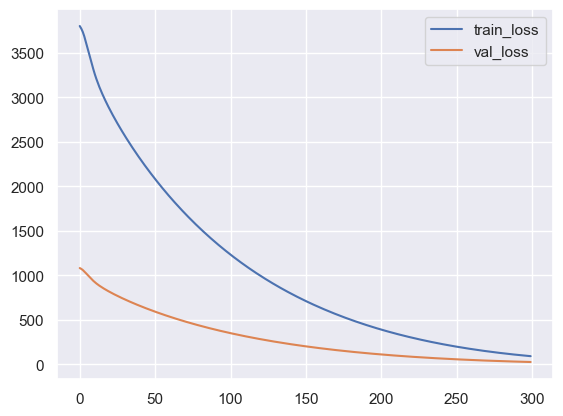

Finished Training
Epoch 1/300


100%|██████████| 7/7 [00:00<00:00, 203.05it/s]


Train Loss: 3786.2296752929688


100%|██████████| 2/2 [00:00<00:00, 488.76it/s]


Epoch 2/300


100%|██████████| 7/7 [00:00<00:00, 216.84it/s]


Train Loss: 3762.2538452148438


100%|██████████| 2/2 [00:00<00:00, 521.52it/s]


Epoch 3/300


100%|██████████| 7/7 [00:00<00:00, 239.27it/s]


Train Loss: 3730.4633178710938


100%|██████████| 2/2 [00:00<00:00, 526.69it/s]


Epoch 4/300


100%|██████████| 7/7 [00:00<00:00, 216.54it/s]


Train Loss: 3684.2453002929688


100%|██████████| 2/2 [00:00<00:00, 389.57it/s]


Epoch 5/300


100%|██████████| 7/7 [00:00<00:00, 204.66it/s]


Train Loss: 3622.8617553710938


100%|██████████| 2/2 [00:00<00:00, 51.31it/s]


Epoch 6/300


100%|██████████| 7/7 [00:00<00:00, 220.12it/s]


Train Loss: 3554.8140563964844


100%|██████████| 2/2 [00:00<00:00, 453.02it/s]


Epoch 7/300


100%|██████████| 7/7 [00:00<00:00, 206.67it/s]


Train Loss: 3487.3884887695312


100%|██████████| 2/2 [00:00<00:00, 492.87it/s]


Epoch 8/300


100%|██████████| 7/7 [00:00<00:00, 210.85it/s]


Train Loss: 3423.2058715820312


100%|██████████| 2/2 [00:00<00:00, 466.76it/s]


Epoch 9/300


100%|██████████| 7/7 [00:00<00:00, 221.08it/s]


Train Loss: 3363.4509887695312


100%|██████████| 2/2 [00:00<00:00, 439.08it/s]


Epoch 10/300


100%|██████████| 7/7 [00:00<00:00, 223.22it/s]


Train Loss: 3308.4573974609375


100%|██████████| 2/2 [00:00<00:00, 532.47it/s]


Epoch 11/300


100%|██████████| 7/7 [00:00<00:00, 89.27it/s]


Train Loss: 3257.671630859375


100%|██████████| 2/2 [00:00<00:00, 443.47it/s]


Epoch 12/300


100%|██████████| 7/7 [00:00<00:00, 176.17it/s]


Train Loss: 3209.8564453125


100%|██████████| 2/2 [00:00<00:00, 503.40it/s]


Epoch 13/300


100%|██████████| 7/7 [00:00<00:00, 213.77it/s]


Train Loss: 3165.4946899414062


100%|██████████| 2/2 [00:00<00:00, 519.74it/s]


Epoch 14/300


100%|██████████| 7/7 [00:00<00:00, 232.14it/s]


Train Loss: 3124.8226318359375


100%|██████████| 2/2 [00:00<00:00, 430.30it/s]


Epoch 15/300


100%|██████████| 7/7 [00:00<00:00, 218.96it/s]


Train Loss: 3086.4646606445312


100%|██████████| 2/2 [00:00<00:00, 453.63it/s]


Epoch 16/300


100%|██████████| 7/7 [00:00<00:00, 202.03it/s]


Train Loss: 3049.1417236328125


100%|██████████| 2/2 [00:00<00:00, 54.15it/s]


Epoch 17/300


100%|██████████| 7/7 [00:00<00:00, 188.12it/s]


Train Loss: 3011.9112548828125


100%|██████████| 2/2 [00:00<00:00, 492.75it/s]


Epoch 18/300


100%|██████████| 7/7 [00:00<00:00, 206.22it/s]


Train Loss: 2974.2781982421875


100%|██████████| 2/2 [00:00<00:00, 516.25it/s]


Epoch 19/300


100%|██████████| 7/7 [00:00<00:00, 205.82it/s]


Train Loss: 2936.616943359375


100%|██████████| 2/2 [00:00<00:00, 397.77it/s]


Epoch 20/300


100%|██████████| 7/7 [00:00<00:00, 217.21it/s]


Train Loss: 2899.1282348632812


100%|██████████| 2/2 [00:00<00:00, 406.09it/s]


Epoch 21/300


100%|██████████| 7/7 [00:00<00:00, 200.30it/s]


Train Loss: 2862.4867553710938


100%|██████████| 2/2 [00:00<00:00, 531.06it/s]


Epoch 22/300


100%|██████████| 7/7 [00:00<00:00, 216.46it/s]


Train Loss: 2827.1978759765625


100%|██████████| 2/2 [00:00<00:00, 477.09it/s]


Epoch 23/300


100%|██████████| 7/7 [00:00<00:00, 98.81it/s]


Train Loss: 2793.0548400878906


100%|██████████| 2/2 [00:00<00:00, 489.25it/s]


Epoch 24/300


100%|██████████| 7/7 [00:00<00:00, 209.82it/s]


Train Loss: 2759.879425048828


100%|██████████| 2/2 [00:00<00:00, 62.03it/s]


Epoch 25/300


100%|██████████| 7/7 [00:00<00:00, 152.49it/s]


Train Loss: 2727.5689392089844


100%|██████████| 2/2 [00:00<00:00, 416.14it/s]


Epoch 26/300


100%|██████████| 7/7 [00:00<00:00, 198.91it/s]


Train Loss: 2695.9614868164062


100%|██████████| 2/2 [00:00<00:00, 493.33it/s]


Epoch 27/300


100%|██████████| 7/7 [00:00<00:00, 220.82it/s]


Train Loss: 2665.2157287597656


100%|██████████| 2/2 [00:00<00:00, 583.11it/s]


Epoch 28/300


100%|██████████| 7/7 [00:00<00:00, 99.53it/s]


Train Loss: 2635.1395263671875


100%|██████████| 2/2 [00:00<00:00, 433.36it/s]


Epoch 29/300


100%|██████████| 7/7 [00:00<00:00, 227.90it/s]


Train Loss: 2605.652557373047


100%|██████████| 2/2 [00:00<00:00, 502.79it/s]


Epoch 30/300


100%|██████████| 7/7 [00:00<00:00, 197.26it/s]


Train Loss: 2576.6214599609375


100%|██████████| 2/2 [00:00<00:00, 335.80it/s]


Epoch 31/300


100%|██████████| 7/7 [00:00<00:00, 212.40it/s]


Train Loss: 2548.1285095214844


100%|██████████| 2/2 [00:00<00:00, 526.59it/s]


Epoch 32/300


100%|██████████| 7/7 [00:00<00:00, 200.60it/s]


Train Loss: 2520.103271484375


100%|██████████| 2/2 [00:00<00:00, 331.41it/s]


Epoch 33/300


100%|██████████| 7/7 [00:00<00:00, 229.91it/s]


Train Loss: 2492.5370178222656


100%|██████████| 2/2 [00:00<00:00, 494.09it/s]


Epoch 34/300


100%|██████████| 7/7 [00:00<00:00, 98.38it/s]


Train Loss: 2465.3639221191406


100%|██████████| 2/2 [00:00<00:00, 497.13it/s]


Epoch 35/300


100%|██████████| 7/7 [00:00<00:00, 197.98it/s]


Train Loss: 2438.5156860351562


100%|██████████| 2/2 [00:00<00:00, 350.09it/s]


Epoch 36/300


100%|██████████| 7/7 [00:00<00:00, 213.87it/s]


Train Loss: 2412.064971923828


100%|██████████| 2/2 [00:00<00:00, 506.96it/s]


Epoch 37/300


100%|██████████| 7/7 [00:00<00:00, 224.77it/s]


Train Loss: 2386.028106689453


100%|██████████| 2/2 [00:00<00:00, 368.81it/s]


Epoch 38/300


100%|██████████| 7/7 [00:00<00:00, 233.46it/s]


Train Loss: 2360.313232421875


100%|██████████| 2/2 [00:00<00:00, 501.62it/s]


Epoch 39/300


100%|██████████| 7/7 [00:00<00:00, 219.18it/s]


Train Loss: 2334.963592529297


100%|██████████| 2/2 [00:00<00:00, 52.64it/s]


Epoch 40/300


100%|██████████| 7/7 [00:00<00:00, 169.79it/s]


Train Loss: 2309.9201049804688


100%|██████████| 2/2 [00:00<00:00, 508.12it/s]


Epoch 41/300


100%|██████████| 7/7 [00:00<00:00, 201.20it/s]


Train Loss: 2285.120330810547


100%|██████████| 2/2 [00:00<00:00, 493.33it/s]


Epoch 42/300


100%|██████████| 7/7 [00:00<00:00, 237.09it/s]


Train Loss: 2260.656280517578


100%|██████████| 2/2 [00:00<00:00, 514.51it/s]


Epoch 43/300


100%|██████████| 7/7 [00:00<00:00, 207.25it/s]


Train Loss: 2236.5064392089844


100%|██████████| 2/2 [00:00<00:00, 452.00it/s]


Epoch 44/300


100%|██████████| 7/7 [00:00<00:00, 229.99it/s]


Train Loss: 2212.5906372070312


100%|██████████| 2/2 [00:00<00:00, 511.25it/s]


Epoch 45/300


100%|██████████| 7/7 [00:00<00:00, 98.05it/s]


Train Loss: 2189.0591735839844


100%|██████████| 2/2 [00:00<00:00, 507.48it/s]


Epoch 46/300


100%|██████████| 7/7 [00:00<00:00, 202.57it/s]


Train Loss: 2165.7325134277344


100%|██████████| 2/2 [00:00<00:00, 497.87it/s]


Epoch 47/300


100%|██████████| 7/7 [00:00<00:00, 212.48it/s]


Train Loss: 2142.6499633789062


100%|██████████| 2/2 [00:00<00:00, 390.48it/s]


Epoch 48/300


100%|██████████| 7/7 [00:00<00:00, 224.96it/s]


Train Loss: 2119.8280639648438


100%|██████████| 2/2 [00:00<00:00, 503.43it/s]


Epoch 49/300


100%|██████████| 7/7 [00:00<00:00, 232.09it/s]


Train Loss: 2097.248565673828


100%|██████████| 2/2 [00:00<00:00, 478.01it/s]


Epoch 50/300


100%|██████████| 7/7 [00:00<00:00, 228.67it/s]


Train Loss: 2074.9550170898438


100%|██████████| 2/2 [00:00<00:00, 451.78it/s]


Epoch 51/300


100%|██████████| 7/7 [00:00<00:00, 97.42it/s]


Train Loss: 2052.908905029297


100%|██████████| 2/2 [00:00<00:00, 473.29it/s]


Epoch 52/300


100%|██████████| 7/7 [00:00<00:00, 188.11it/s]


Train Loss: 2031.0396728515625


100%|██████████| 2/2 [00:00<00:00, 470.50it/s]


Epoch 53/300


100%|██████████| 7/7 [00:00<00:00, 225.89it/s]


Train Loss: 2009.4741516113281


100%|██████████| 2/2 [00:00<00:00, 440.25it/s]


Epoch 54/300


100%|██████████| 7/7 [00:00<00:00, 203.41it/s]


Train Loss: 1988.1223449707031


100%|██████████| 2/2 [00:00<00:00, 431.22it/s]


Epoch 55/300


100%|██████████| 7/7 [00:00<00:00, 208.44it/s]


Train Loss: 1967.0159606933594


100%|██████████| 2/2 [00:00<00:00, 450.66it/s]


Epoch 56/300


100%|██████████| 7/7 [00:00<00:00, 210.21it/s]


Train Loss: 1946.0826110839844


100%|██████████| 2/2 [00:00<00:00, 462.11it/s]


Epoch 57/300


100%|██████████| 7/7 [00:00<00:00, 95.15it/s]


Train Loss: 1925.4446716308594


100%|██████████| 2/2 [00:00<00:00, 512.85it/s]


Epoch 58/300


100%|██████████| 7/7 [00:00<00:00, 223.47it/s]


Train Loss: 1904.9219055175781


100%|██████████| 2/2 [00:00<00:00, 478.58it/s]


Epoch 59/300


100%|██████████| 7/7 [00:00<00:00, 240.76it/s]


Train Loss: 1884.6820373535156


100%|██████████| 2/2 [00:00<00:00, 489.47it/s]


Epoch 60/300


100%|██████████| 7/7 [00:00<00:00, 233.60it/s]


Train Loss: 1864.6564636230469


100%|██████████| 2/2 [00:00<00:00, 498.17it/s]


Epoch 61/300


100%|██████████| 7/7 [00:00<00:00, 225.06it/s]


Train Loss: 1844.8265991210938


100%|██████████| 2/2 [00:00<00:00, 304.23it/s]


Epoch 62/300


100%|██████████| 7/7 [00:00<00:00, 198.25it/s]


Train Loss: 1825.19873046875


100%|██████████| 2/2 [00:00<00:00, 489.96it/s]


Epoch 63/300


100%|██████████| 7/7 [00:00<00:00, 106.72it/s]


Train Loss: 1805.7793273925781


100%|██████████| 2/2 [00:00<00:00, 436.68it/s]


Epoch 64/300


100%|██████████| 7/7 [00:00<00:00, 219.20it/s]


Train Loss: 1786.5710144042969


100%|██████████| 2/2 [00:00<00:00, 485.06it/s]


Epoch 65/300


100%|██████████| 7/7 [00:00<00:00, 224.72it/s]


Train Loss: 1767.5164794921875


100%|██████████| 2/2 [00:00<00:00, 495.17it/s]


Epoch 66/300


100%|██████████| 7/7 [00:00<00:00, 226.26it/s]


Train Loss: 1748.6773529052734


100%|██████████| 2/2 [00:00<00:00, 460.18it/s]


Epoch 67/300


100%|██████████| 7/7 [00:00<00:00, 217.07it/s]


Train Loss: 1729.9899444580078


100%|██████████| 2/2 [00:00<00:00, 479.84it/s]


Epoch 68/300


100%|██████████| 7/7 [00:00<00:00, 232.36it/s]


Train Loss: 1711.5120239257812


100%|██████████| 2/2 [00:00<00:00, 492.35it/s]


Epoch 69/300


100%|██████████| 7/7 [00:00<00:00, 51.47it/s]


Train Loss: 1693.3021545410156


100%|██████████| 2/2 [00:00<00:00, 435.66it/s]


Epoch 70/300


100%|██████████| 7/7 [00:00<00:00, 210.89it/s]


Train Loss: 1675.1940612792969


100%|██████████| 2/2 [00:00<00:00, 467.93it/s]


Epoch 71/300


100%|██████████| 7/7 [00:00<00:00, 232.16it/s]


Train Loss: 1657.2637939453125


100%|██████████| 2/2 [00:00<00:00, 510.32it/s]


Epoch 72/300


100%|██████████| 7/7 [00:00<00:00, 202.46it/s]


Train Loss: 1639.5262145996094


100%|██████████| 2/2 [00:00<00:00, 492.03it/s]


Epoch 73/300


100%|██████████| 7/7 [00:00<00:00, 188.34it/s]


Train Loss: 1621.9825439453125


100%|██████████| 2/2 [00:00<00:00, 507.63it/s]


Epoch 74/300


100%|██████████| 7/7 [00:00<00:00, 231.24it/s]


Train Loss: 1604.6312866210938


100%|██████████| 2/2 [00:00<00:00, 46.49it/s]


Epoch 75/300


100%|██████████| 7/7 [00:00<00:00, 200.30it/s]


Train Loss: 1587.3896484375


100%|██████████| 2/2 [00:00<00:00, 437.91it/s]


Epoch 76/300


100%|██████████| 7/7 [00:00<00:00, 195.75it/s]


Train Loss: 1570.3636322021484


100%|██████████| 2/2 [00:00<00:00, 515.21it/s]


Epoch 77/300


100%|██████████| 7/7 [00:00<00:00, 219.49it/s]


Train Loss: 1553.529281616211


100%|██████████| 2/2 [00:00<00:00, 523.40it/s]


Epoch 78/300


100%|██████████| 7/7 [00:00<00:00, 204.64it/s]


Train Loss: 1536.820816040039


100%|██████████| 2/2 [00:00<00:00, 459.62it/s]


Epoch 79/300


100%|██████████| 7/7 [00:00<00:00, 230.73it/s]


Train Loss: 1520.3035888671875


100%|██████████| 2/2 [00:00<00:00, 483.33it/s]


Epoch 80/300


100%|██████████| 7/7 [00:00<00:00, 97.15it/s]


Train Loss: 1503.9187927246094


100%|██████████| 2/2 [00:00<00:00, 462.11it/s]


Epoch 81/300


100%|██████████| 7/7 [00:00<00:00, 211.02it/s]


Train Loss: 1487.6898345947266


100%|██████████| 2/2 [00:00<00:00, 482.52it/s]


Epoch 82/300


100%|██████████| 7/7 [00:00<00:00, 189.95it/s]


Train Loss: 1471.716293334961


100%|██████████| 2/2 [00:00<00:00, 515.62it/s]


Epoch 83/300


100%|██████████| 7/7 [00:00<00:00, 184.70it/s]


Train Loss: 1455.823226928711


100%|██████████| 2/2 [00:00<00:00, 490.79it/s]


Epoch 84/300


100%|██████████| 7/7 [00:00<00:00, 218.91it/s]


Train Loss: 1440.0871887207031


100%|██████████| 2/2 [00:00<00:00, 488.59it/s]


Epoch 85/300


100%|██████████| 7/7 [00:00<00:00, 100.86it/s]


Train Loss: 1424.52099609375


100%|██████████| 2/2 [00:00<00:00, 502.64it/s]


Epoch 86/300


100%|██████████| 7/7 [00:00<00:00, 211.83it/s]


Train Loss: 1409.0677642822266


100%|██████████| 2/2 [00:00<00:00, 472.78it/s]


Epoch 87/300


100%|██████████| 7/7 [00:00<00:00, 207.27it/s]


Train Loss: 1393.8188171386719


100%|██████████| 2/2 [00:00<00:00, 509.82it/s]


Epoch 88/300


100%|██████████| 7/7 [00:00<00:00, 221.04it/s]


Train Loss: 1378.7723846435547


100%|██████████| 2/2 [00:00<00:00, 326.43it/s]


Epoch 89/300


100%|██████████| 7/7 [00:00<00:00, 230.74it/s]


Train Loss: 1363.8048400878906


100%|██████████| 2/2 [00:00<00:00, 472.36it/s]


Epoch 90/300


100%|██████████| 7/7 [00:00<00:00, 103.99it/s]


Train Loss: 1348.9692840576172


100%|██████████| 2/2 [00:00<00:00, 226.38it/s]


Epoch 91/300


100%|██████████| 7/7 [00:00<00:00, 212.35it/s]


Train Loss: 1334.3015441894531


100%|██████████| 2/2 [00:00<00:00, 526.49it/s]


Epoch 92/300


100%|██████████| 7/7 [00:00<00:00, 222.76it/s]


Train Loss: 1319.7669219970703


100%|██████████| 2/2 [00:00<00:00, 473.80it/s]


Epoch 93/300


100%|██████████| 7/7 [00:00<00:00, 222.23it/s]


Train Loss: 1305.3850860595703


100%|██████████| 2/2 [00:00<00:00, 475.17it/s]


Epoch 94/300


100%|██████████| 7/7 [00:00<00:00, 171.74it/s]


Train Loss: 1291.1554107666016


100%|██████████| 2/2 [00:00<00:00, 430.30it/s]


Epoch 95/300


100%|██████████| 7/7 [00:00<00:00, 88.61it/s]


Train Loss: 1277.0867309570312


100%|██████████| 2/2 [00:00<00:00, 507.23it/s]


Epoch 96/300


100%|██████████| 7/7 [00:00<00:00, 229.53it/s]


Train Loss: 1263.1203918457031


100%|██████████| 2/2 [00:00<00:00, 511.47it/s]


Epoch 97/300


100%|██████████| 7/7 [00:00<00:00, 231.01it/s]


Train Loss: 1249.2711639404297


100%|██████████| 2/2 [00:00<00:00, 494.20it/s]


Epoch 98/300


100%|██████████| 7/7 [00:00<00:00, 222.58it/s]


Train Loss: 1235.650161743164


100%|██████████| 2/2 [00:00<00:00, 517.59it/s]


Epoch 99/300


100%|██████████| 7/7 [00:00<00:00, 91.91it/s]


Train Loss: 1222.1042022705078


100%|██████████| 2/2 [00:00<00:00, 489.47it/s]


Epoch 100/300


100%|██████████| 7/7 [00:00<00:00, 199.24it/s]


Train Loss: 1208.7051544189453


100%|██████████| 2/2 [00:00<00:00, 528.12it/s]


Epoch 101/300


100%|██████████| 7/7 [00:00<00:00, 240.98it/s]


Train Loss: 1195.4078216552734


100%|██████████| 2/2 [00:00<00:00, 449.33it/s]


Epoch 102/300


100%|██████████| 7/7 [00:00<00:00, 232.25it/s]


Train Loss: 1182.2677001953125


100%|██████████| 2/2 [00:00<00:00, 479.16it/s]


Epoch 103/300


100%|██████████| 7/7 [00:00<00:00, 211.08it/s]


Train Loss: 1169.2132720947266


100%|██████████| 2/2 [00:00<00:00, 48.56it/s]


Epoch 104/300


100%|██████████| 7/7 [00:00<00:00, 208.17it/s]


Train Loss: 1156.3522338867188


100%|██████████| 2/2 [00:00<00:00, 471.56it/s]


Epoch 105/300


100%|██████████| 7/7 [00:00<00:00, 215.33it/s]


Train Loss: 1143.6068115234375


100%|██████████| 2/2 [00:00<00:00, 512.03it/s]


Epoch 106/300


100%|██████████| 7/7 [00:00<00:00, 232.56it/s]


Train Loss: 1130.930908203125


100%|██████████| 2/2 [00:00<00:00, 496.31it/s]


Epoch 107/300


100%|██████████| 7/7 [00:00<00:00, 223.78it/s]


Train Loss: 1118.4975891113281


100%|██████████| 2/2 [00:00<00:00, 533.02it/s]


Epoch 108/300


100%|██████████| 7/7 [00:00<00:00, 101.15it/s]


Train Loss: 1106.1408996582031


100%|██████████| 2/2 [00:00<00:00, 481.80it/s]


Epoch 109/300


100%|██████████| 7/7 [00:00<00:00, 121.22it/s]


Train Loss: 1093.810775756836


100%|██████████| 2/2 [00:00<00:00, 476.41it/s]


Epoch 110/300


100%|██████████| 7/7 [00:00<00:00, 234.88it/s]


Train Loss: 1081.7196807861328


100%|██████████| 2/2 [00:00<00:00, 444.36it/s]


Epoch 111/300


100%|██████████| 7/7 [00:00<00:00, 88.12it/s]


Train Loss: 1069.6707458496094


100%|██████████| 2/2 [00:00<00:00, 544.79it/s]


Epoch 112/300


100%|██████████| 7/7 [00:00<00:00, 214.28it/s]


Train Loss: 1057.8104705810547


100%|██████████| 2/2 [00:00<00:00, 336.07it/s]


Epoch 113/300


100%|██████████| 7/7 [00:00<00:00, 92.79it/s]


Train Loss: 1046.0071868896484


100%|██████████| 2/2 [00:00<00:00, 449.86it/s]


Epoch 114/300


100%|██████████| 7/7 [00:00<00:00, 203.80it/s]


Train Loss: 1034.2982177734375


100%|██████████| 2/2 [00:00<00:00, 455.80it/s]


Epoch 115/300


100%|██████████| 7/7 [00:00<00:00, 216.24it/s]


Train Loss: 1022.8088989257812


100%|██████████| 2/2 [00:00<00:00, 494.82it/s]


Epoch 116/300


100%|██████████| 7/7 [00:00<00:00, 198.05it/s]


Train Loss: 1011.3360137939453


100%|██████████| 2/2 [00:00<00:00, 399.27it/s]


Epoch 117/300


100%|██████████| 7/7 [00:00<00:00, 92.60it/s]


Train Loss: 1000.0405731201172


100%|██████████| 2/2 [00:00<00:00, 417.72it/s]


Epoch 118/300


100%|██████████| 7/7 [00:00<00:00, 207.02it/s]


Train Loss: 988.8094329833984


100%|██████████| 2/2 [00:00<00:00, 468.95it/s]


Epoch 119/300


100%|██████████| 7/7 [00:00<00:00, 220.35it/s]


Train Loss: 977.7452087402344


100%|██████████| 2/2 [00:00<00:00, 474.95it/s]


Epoch 120/300


100%|██████████| 7/7 [00:00<00:00, 212.20it/s]


Train Loss: 966.8035888671875


100%|██████████| 2/2 [00:00<00:00, 484.27it/s]


Epoch 121/300


100%|██████████| 7/7 [00:00<00:00, 224.91it/s]


Train Loss: 955.8705139160156


100%|██████████| 2/2 [00:00<00:00, 51.08it/s]


Epoch 122/300


100%|██████████| 7/7 [00:00<00:00, 199.78it/s]


Train Loss: 945.11474609375


100%|██████████| 2/2 [00:00<00:00, 486.89it/s]


Epoch 123/300


100%|██████████| 7/7 [00:00<00:00, 211.40it/s]


Train Loss: 934.4806365966797


100%|██████████| 2/2 [00:00<00:00, 532.20it/s]


Epoch 124/300


100%|██████████| 7/7 [00:00<00:00, 220.35it/s]


Train Loss: 923.8970336914062


100%|██████████| 2/2 [00:00<00:00, 403.40it/s]


Epoch 125/300


100%|██████████| 7/7 [00:00<00:00, 194.03it/s]


Train Loss: 913.4401245117188


100%|██████████| 2/2 [00:00<00:00, 402.91it/s]


Epoch 126/300


100%|██████████| 7/7 [00:00<00:00, 182.07it/s]


Train Loss: 903.1057586669922


100%|██████████| 2/2 [00:00<00:00, 536.15it/s]


Epoch 127/300


100%|██████████| 7/7 [00:00<00:00, 100.67it/s]


Train Loss: 892.8729095458984


100%|██████████| 2/2 [00:00<00:00, 436.00it/s]


Epoch 128/300


100%|██████████| 7/7 [00:00<00:00, 186.71it/s]


Train Loss: 882.7283630371094


100%|██████████| 2/2 [00:00<00:00, 517.46it/s]


Epoch 129/300


100%|██████████| 7/7 [00:00<00:00, 227.55it/s]


Train Loss: 872.6498413085938


100%|██████████| 2/2 [00:00<00:00, 496.28it/s]


Epoch 130/300


100%|██████████| 7/7 [00:00<00:00, 226.96it/s]


Train Loss: 862.7346801757812


100%|██████████| 2/2 [00:00<00:00, 521.00it/s]


Epoch 131/300


100%|██████████| 7/7 [00:00<00:00, 93.23it/s]


Train Loss: 852.9145812988281


100%|██████████| 2/2 [00:00<00:00, 503.91it/s]


Epoch 132/300


100%|██████████| 7/7 [00:00<00:00, 210.94it/s]


Train Loss: 843.1671981811523


100%|██████████| 2/2 [00:00<00:00, 496.40it/s]


Epoch 133/300


100%|██████████| 7/7 [00:00<00:00, 188.16it/s]


Train Loss: 833.5232162475586


100%|██████████| 2/2 [00:00<00:00, 528.55it/s]


Epoch 134/300


100%|██████████| 7/7 [00:00<00:00, 230.56it/s]


Train Loss: 823.9781646728516


100%|██████████| 2/2 [00:00<00:00, 501.38it/s]


Epoch 135/300


100%|██████████| 7/7 [00:00<00:00, 93.07it/s]


Train Loss: 814.5220718383789


100%|██████████| 2/2 [00:00<00:00, 491.05it/s]


Epoch 136/300


100%|██████████| 7/7 [00:00<00:00, 216.89it/s]


Train Loss: 805.1750717163086


100%|██████████| 2/2 [00:00<00:00, 504.03it/s]


Epoch 137/300


100%|██████████| 7/7 [00:00<00:00, 220.33it/s]


Train Loss: 795.8998794555664


100%|██████████| 2/2 [00:00<00:00, 402.41it/s]


Epoch 138/300


100%|██████████| 7/7 [00:00<00:00, 182.94it/s]


Train Loss: 786.7345275878906


100%|██████████| 2/2 [00:00<00:00, 488.88it/s]


Epoch 139/300


100%|██████████| 7/7 [00:00<00:00, 97.55it/s]


Train Loss: 777.667366027832


100%|██████████| 2/2 [00:00<00:00, 538.25it/s]


Epoch 140/300


100%|██████████| 7/7 [00:00<00:00, 222.55it/s]


Train Loss: 768.6764678955078


100%|██████████| 2/2 [00:00<00:00, 508.37it/s]


Epoch 141/300


100%|██████████| 7/7 [00:00<00:00, 212.10it/s]


Train Loss: 759.8003082275391


100%|██████████| 2/2 [00:00<00:00, 289.39it/s]


Epoch 142/300


100%|██████████| 7/7 [00:00<00:00, 201.21it/s]


Train Loss: 750.9951324462891


100%|██████████| 2/2 [00:00<00:00, 498.64it/s]


Epoch 143/300


100%|██████████| 7/7 [00:00<00:00, 94.27it/s]


Train Loss: 742.2915267944336


100%|██████████| 2/2 [00:00<00:00, 584.12it/s]


Epoch 144/300


100%|██████████| 7/7 [00:00<00:00, 189.65it/s]


Train Loss: 733.6604843139648


100%|██████████| 2/2 [00:00<00:00, 488.28it/s]


Epoch 145/300


100%|██████████| 7/7 [00:00<00:00, 214.52it/s]


Train Loss: 725.1144180297852


100%|██████████| 2/2 [00:00<00:00, 507.45it/s]


Epoch 146/300


100%|██████████| 7/7 [00:00<00:00, 213.31it/s]


Train Loss: 716.6448211669922


100%|██████████| 2/2 [00:00<00:00, 487.71it/s]


Epoch 147/300


100%|██████████| 7/7 [00:00<00:00, 115.54it/s]


Train Loss: 708.2911758422852


100%|██████████| 2/2 [00:00<00:00, 209.29it/s]


Epoch 148/300


100%|██████████| 7/7 [00:00<00:00, 183.91it/s]


Train Loss: 700.0002059936523


100%|██████████| 2/2 [00:00<00:00, 503.82it/s]


Epoch 149/300


100%|██████████| 7/7 [00:00<00:00, 223.34it/s]


Train Loss: 691.8324127197266


100%|██████████| 2/2 [00:00<00:00, 467.05it/s]


Epoch 150/300


100%|██████████| 7/7 [00:00<00:00, 224.20it/s]


Train Loss: 683.6868591308594


100%|██████████| 2/2 [00:00<00:00, 513.19it/s]


Epoch 151/300


100%|██████████| 7/7 [00:00<00:00, 60.48it/s]


Train Loss: 675.6505737304688


100%|██████████| 2/2 [00:00<00:00, 232.02it/s]


Epoch 152/300


100%|██████████| 7/7 [00:00<00:00, 197.64it/s]


Train Loss: 667.6776885986328


100%|██████████| 2/2 [00:00<00:00, 463.72it/s]


Epoch 153/300


100%|██████████| 7/7 [00:00<00:00, 243.34it/s]


Train Loss: 659.8048095703125


100%|██████████| 2/2 [00:00<00:00, 525.77it/s]


Epoch 154/300


100%|██████████| 7/7 [00:00<00:00, 206.76it/s]


Train Loss: 652.0390548706055


100%|██████████| 2/2 [00:00<00:00, 509.42it/s]


Epoch 155/300


100%|██████████| 7/7 [00:00<00:00, 97.69it/s]


Train Loss: 644.2803192138672


100%|██████████| 2/2 [00:00<00:00, 485.79it/s]


Epoch 156/300


100%|██████████| 7/7 [00:00<00:00, 231.50it/s]


Train Loss: 636.6359024047852


100%|██████████| 2/2 [00:00<00:00, 461.90it/s]


Epoch 157/300


100%|██████████| 7/7 [00:00<00:00, 183.16it/s]


Train Loss: 629.0997085571289


100%|██████████| 2/2 [00:00<00:00, 523.27it/s]


Epoch 158/300


100%|██████████| 7/7 [00:00<00:00, 212.45it/s]


Train Loss: 621.6076736450195


100%|██████████| 2/2 [00:00<00:00, 566.45it/s]


Epoch 159/300


100%|██████████| 7/7 [00:00<00:00, 108.47it/s]


Train Loss: 614.1843109130859


100%|██████████| 2/2 [00:00<00:00, 357.78it/s]


Epoch 160/300


100%|██████████| 7/7 [00:00<00:00, 217.82it/s]


Train Loss: 606.8623809814453


100%|██████████| 2/2 [00:00<00:00, 496.51it/s]


Epoch 161/300


100%|██████████| 7/7 [00:00<00:00, 207.86it/s]


Train Loss: 599.594108581543


100%|██████████| 2/2 [00:00<00:00, 514.80it/s]


Epoch 162/300


100%|██████████| 7/7 [00:00<00:00, 194.68it/s]


Train Loss: 592.4335556030273


100%|██████████| 2/2 [00:00<00:00, 375.38it/s]


Epoch 163/300


100%|██████████| 7/7 [00:00<00:00, 97.78it/s]


Train Loss: 585.3228912353516


100%|██████████| 2/2 [00:00<00:00, 472.81it/s]


Epoch 164/300


100%|██████████| 7/7 [00:00<00:00, 212.16it/s]


Train Loss: 578.2776184082031


100%|██████████| 2/2 [00:00<00:00, 495.40it/s]


Epoch 165/300


100%|██████████| 7/7 [00:00<00:00, 228.99it/s]


Train Loss: 571.3295059204102


100%|██████████| 2/2 [00:00<00:00, 491.63it/s]


Epoch 166/300


100%|██████████| 7/7 [00:00<00:00, 232.44it/s]


Train Loss: 564.4404907226562


100%|██████████| 2/2 [00:00<00:00, 516.25it/s]


Epoch 167/300


100%|██████████| 7/7 [00:00<00:00, 226.90it/s]


Train Loss: 557.6046829223633


100%|██████████| 2/2 [00:00<00:00, 50.48it/s]


Epoch 168/300


100%|██████████| 7/7 [00:00<00:00, 182.04it/s]


Train Loss: 550.8587951660156


100%|██████████| 2/2 [00:00<00:00, 527.32it/s]


Epoch 169/300


100%|██████████| 7/7 [00:00<00:00, 219.51it/s]


Train Loss: 544.1528701782227


100%|██████████| 2/2 [00:00<00:00, 511.28it/s]


Epoch 170/300


100%|██████████| 7/7 [00:00<00:00, 131.05it/s]


Train Loss: 537.5491790771484


100%|██████████| 2/2 [00:00<00:00, 500.10it/s]


Epoch 171/300


100%|██████████| 7/7 [00:00<00:00, 199.02it/s]


Train Loss: 530.983642578125


100%|██████████| 2/2 [00:00<00:00, 415.90it/s]


Epoch 172/300


100%|██████████| 7/7 [00:00<00:00, 195.97it/s]


Train Loss: 524.52783203125


100%|██████████| 2/2 [00:00<00:00, 356.57it/s]


Epoch 173/300


100%|██████████| 7/7 [00:00<00:00, 98.68it/s]


Train Loss: 518.0866241455078


100%|██████████| 2/2 [00:00<00:00, 480.78it/s]


Epoch 174/300


100%|██████████| 7/7 [00:00<00:00, 210.51it/s]


Train Loss: 511.7789840698242


100%|██████████| 2/2 [00:00<00:00, 477.09it/s]


Epoch 175/300


100%|██████████| 7/7 [00:00<00:00, 206.45it/s]


Train Loss: 505.48585510253906


100%|██████████| 2/2 [00:00<00:00, 415.28it/s]


Epoch 176/300


100%|██████████| 7/7 [00:00<00:00, 236.10it/s]


Train Loss: 499.22254180908203


100%|██████████| 2/2 [00:00<00:00, 509.02it/s]


Epoch 177/300


100%|██████████| 7/7 [00:00<00:00, 225.92it/s]


Train Loss: 493.0911178588867


100%|██████████| 2/2 [00:00<00:00, 480.86it/s]


Epoch 178/300


100%|██████████| 7/7 [00:00<00:00, 83.61it/s]


Train Loss: 486.99598693847656


100%|██████████| 2/2 [00:00<00:00, 470.69it/s]


Epoch 179/300


100%|██████████| 7/7 [00:00<00:00, 184.40it/s]


Train Loss: 481.01807403564453


100%|██████████| 2/2 [00:00<00:00, 470.06it/s]


Epoch 180/300


100%|██████████| 7/7 [00:00<00:00, 236.78it/s]


Train Loss: 475.02208709716797


100%|██████████| 2/2 [00:00<00:00, 464.90it/s]


Epoch 181/300


100%|██████████| 7/7 [00:00<00:00, 202.04it/s]


Train Loss: 469.0860595703125


100%|██████████| 2/2 [00:00<00:00, 506.83it/s]


Epoch 182/300


100%|██████████| 7/7 [00:00<00:00, 89.28it/s]


Train Loss: 463.25325775146484


100%|██████████| 2/2 [00:00<00:00, 495.52it/s]


Epoch 183/300


100%|██████████| 7/7 [00:00<00:00, 211.36it/s]


Train Loss: 457.47205352783203


100%|██████████| 2/2 [00:00<00:00, 516.00it/s]


Epoch 184/300


100%|██████████| 7/7 [00:00<00:00, 241.20it/s]


Train Loss: 451.7348937988281


100%|██████████| 2/2 [00:00<00:00, 474.84it/s]


Epoch 185/300


100%|██████████| 7/7 [00:00<00:00, 237.02it/s]


Train Loss: 446.11031341552734


100%|██████████| 2/2 [00:00<00:00, 541.55it/s]


Epoch 186/300


100%|██████████| 7/7 [00:00<00:00, 230.05it/s]


Train Loss: 440.50812911987305


100%|██████████| 2/2 [00:00<00:00, 530.49it/s]


Epoch 187/300


100%|██████████| 7/7 [00:00<00:00, 189.08it/s]


Train Loss: 434.93848419189453


100%|██████████| 2/2 [00:00<00:00, 491.89it/s]


Epoch 188/300


100%|██████████| 7/7 [00:00<00:00, 82.20it/s]


Train Loss: 429.46825790405273


100%|██████████| 2/2 [00:00<00:00, 518.01it/s]


Epoch 189/300


100%|██████████| 7/7 [00:00<00:00, 218.46it/s]


Train Loss: 424.0527687072754


100%|██████████| 2/2 [00:00<00:00, 532.37it/s]


Epoch 190/300


100%|██████████| 7/7 [00:00<00:00, 206.59it/s]


Train Loss: 418.6384696960449


100%|██████████| 2/2 [00:00<00:00, 435.61it/s]


Epoch 191/300


100%|██████████| 7/7 [00:00<00:00, 210.65it/s]


Train Loss: 413.3231506347656


100%|██████████| 2/2 [00:00<00:00, 490.30it/s]


Epoch 192/300


100%|██████████| 7/7 [00:00<00:00, 193.51it/s]


Train Loss: 408.0804748535156


100%|██████████| 2/2 [00:00<00:00, 508.65it/s]


Epoch 193/300


100%|██████████| 7/7 [00:00<00:00, 54.34it/s]


Train Loss: 402.89141845703125


100%|██████████| 2/2 [00:00<00:00, 506.83it/s]


Epoch 194/300


100%|██████████| 7/7 [00:00<00:00, 223.31it/s]


Train Loss: 397.68601989746094


100%|██████████| 2/2 [00:00<00:00, 498.37it/s]


Epoch 195/300


100%|██████████| 7/7 [00:00<00:00, 203.38it/s]


Train Loss: 392.6288604736328


100%|██████████| 2/2 [00:00<00:00, 465.44it/s]


Epoch 196/300


100%|██████████| 7/7 [00:00<00:00, 213.05it/s]


Train Loss: 387.5775680541992


100%|██████████| 2/2 [00:00<00:00, 450.37it/s]


Epoch 197/300


100%|██████████| 7/7 [00:00<00:00, 191.95it/s]


Train Loss: 382.6003723144531


100%|██████████| 2/2 [00:00<00:00, 514.01it/s]


Epoch 198/300


100%|██████████| 7/7 [00:00<00:00, 231.27it/s]


Train Loss: 377.63420486450195


100%|██████████| 2/2 [00:00<00:00, 451.49it/s]


Epoch 199/300


100%|██████████| 7/7 [00:00<00:00, 206.48it/s]


Train Loss: 372.78108978271484


100%|██████████| 2/2 [00:00<00:00, 454.32it/s]


Epoch 200/300


100%|██████████| 7/7 [00:00<00:00, 96.84it/s]


Train Loss: 367.93127059936523


100%|██████████| 2/2 [00:00<00:00, 531.33it/s]


Epoch 201/300


100%|██████████| 7/7 [00:00<00:00, 240.73it/s]


Train Loss: 363.1488838195801


100%|██████████| 2/2 [00:00<00:00, 459.00it/s]


Epoch 202/300


100%|██████████| 7/7 [00:00<00:00, 194.56it/s]


Train Loss: 358.41333389282227


100%|██████████| 2/2 [00:00<00:00, 514.80it/s]


Epoch 203/300


100%|██████████| 7/7 [00:00<00:00, 208.32it/s]


Train Loss: 353.7470245361328


100%|██████████| 2/2 [00:00<00:00, 478.94it/s]


Epoch 204/300


100%|██████████| 7/7 [00:00<00:00, 219.55it/s]


Train Loss: 349.1141471862793


100%|██████████| 2/2 [00:00<00:00, 486.49it/s]


Epoch 205/300


100%|██████████| 7/7 [00:00<00:00, 220.46it/s]


Train Loss: 344.5151176452637


100%|██████████| 2/2 [00:00<00:00, 513.32it/s]


Epoch 206/300


100%|██████████| 7/7 [00:00<00:00, 99.48it/s]


Train Loss: 339.9873504638672


100%|██████████| 2/2 [00:00<00:00, 491.51it/s]


Epoch 207/300


100%|██████████| 7/7 [00:00<00:00, 207.71it/s]


Train Loss: 335.500732421875


100%|██████████| 2/2 [00:00<00:00, 444.95it/s]


Epoch 208/300


100%|██████████| 7/7 [00:00<00:00, 215.23it/s]


Train Loss: 331.07122802734375


100%|██████████| 2/2 [00:00<00:00, 509.95it/s]


Epoch 209/300


100%|██████████| 7/7 [00:00<00:00, 221.67it/s]


Train Loss: 326.6776542663574


100%|██████████| 2/2 [00:00<00:00, 512.97it/s]


Epoch 210/300


100%|██████████| 7/7 [00:00<00:00, 216.52it/s]


Train Loss: 322.35136795043945


100%|██████████| 2/2 [00:00<00:00, 502.13it/s]


Epoch 211/300


100%|██████████| 7/7 [00:00<00:00, 196.61it/s]


Train Loss: 318.0407829284668


100%|██████████| 2/2 [00:00<00:00, 512.94it/s]


Epoch 212/300


100%|██████████| 7/7 [00:00<00:00, 111.09it/s]


Train Loss: 313.79083251953125


100%|██████████| 2/2 [00:00<00:00, 185.20it/s]


Epoch 213/300


100%|██████████| 7/7 [00:00<00:00, 176.63it/s]


Train Loss: 309.5980796813965


100%|██████████| 2/2 [00:00<00:00, 540.71it/s]


Epoch 214/300


100%|██████████| 7/7 [00:00<00:00, 211.47it/s]


Train Loss: 305.4603271484375


100%|██████████| 2/2 [00:00<00:00, 387.05it/s]


Epoch 215/300


100%|██████████| 7/7 [00:00<00:00, 174.56it/s]


Train Loss: 301.34650802612305


100%|██████████| 2/2 [00:00<00:00, 505.43it/s]


Epoch 216/300


100%|██████████| 7/7 [00:00<00:00, 232.03it/s]


Train Loss: 297.2625045776367


100%|██████████| 2/2 [00:00<00:00, 492.12it/s]


Epoch 217/300


100%|██████████| 7/7 [00:00<00:00, 208.51it/s]


Train Loss: 293.2419319152832


100%|██████████| 2/2 [00:00<00:00, 460.71it/s]


Epoch 218/300


100%|██████████| 7/7 [00:00<00:00, 209.72it/s]


Train Loss: 289.2743034362793


100%|██████████| 2/2 [00:00<00:00, 523.40it/s]


Epoch 219/300


100%|██████████| 7/7 [00:00<00:00, 94.10it/s]


Train Loss: 285.345645904541


100%|██████████| 2/2 [00:00<00:00, 485.45it/s]


Epoch 220/300


100%|██████████| 7/7 [00:00<00:00, 229.07it/s]


Train Loss: 281.4531059265137


100%|██████████| 2/2 [00:00<00:00, 450.98it/s]


Epoch 221/300


100%|██████████| 7/7 [00:00<00:00, 222.30it/s]


Train Loss: 277.6091117858887


100%|██████████| 2/2 [00:00<00:00, 586.53it/s]


Epoch 222/300


100%|██████████| 7/7 [00:00<00:00, 164.31it/s]


Train Loss: 273.7981147766113


100%|██████████| 2/2 [00:00<00:00, 413.23it/s]


Epoch 223/300


100%|██████████| 7/7 [00:00<00:00, 239.19it/s]


Train Loss: 270.02880859375


100%|██████████| 2/2 [00:00<00:00, 493.33it/s]


Epoch 224/300


100%|██████████| 7/7 [00:00<00:00, 215.28it/s]


Train Loss: 266.30571365356445


100%|██████████| 2/2 [00:00<00:00, 471.38it/s]


Epoch 225/300


100%|██████████| 7/7 [00:00<00:00, 204.20it/s]


Train Loss: 262.6303367614746


100%|██████████| 2/2 [00:00<00:00, 508.12it/s]


Epoch 226/300


100%|██████████| 7/7 [00:00<00:00, 199.06it/s]


Train Loss: 258.9938774108887


100%|██████████| 2/2 [00:00<00:00, 494.32it/s]


Epoch 227/300


100%|██████████| 7/7 [00:00<00:00, 97.05it/s]


Train Loss: 255.4162940979004


100%|██████████| 2/2 [00:00<00:00, 505.43it/s]


Epoch 228/300


100%|██████████| 7/7 [00:00<00:00, 223.56it/s]


Train Loss: 251.84832382202148


100%|██████████| 2/2 [00:00<00:00, 519.87it/s]


Epoch 229/300


100%|██████████| 7/7 [00:00<00:00, 180.56it/s]


Train Loss: 248.30774307250977


100%|██████████| 2/2 [00:00<00:00, 539.95it/s]


Epoch 230/300


100%|██████████| 7/7 [00:00<00:00, 218.95it/s]


Train Loss: 244.8570213317871


100%|██████████| 2/2 [00:00<00:00, 492.84it/s]


Epoch 231/300


100%|██████████| 7/7 [00:00<00:00, 235.07it/s]


Train Loss: 241.40710830688477


100%|██████████| 2/2 [00:00<00:00, 483.44it/s]


Epoch 232/300


100%|██████████| 7/7 [00:00<00:00, 217.37it/s]


Train Loss: 238.00436401367188


100%|██████████| 2/2 [00:00<00:00, 489.36it/s]


Epoch 233/300


100%|██████████| 7/7 [00:00<00:00, 176.84it/s]


Train Loss: 234.63916015625


100%|██████████| 2/2 [00:00<00:00, 180.44it/s]


Epoch 234/300


100%|██████████| 7/7 [00:00<00:00, 210.26it/s]


Train Loss: 231.34094619750977


100%|██████████| 2/2 [00:00<00:00, 418.16it/s]


Epoch 235/300


100%|██████████| 7/7 [00:00<00:00, 172.15it/s]


Train Loss: 228.0462532043457


100%|██████████| 2/2 [00:00<00:00, 489.10it/s]


Epoch 236/300


100%|██████████| 7/7 [00:00<00:00, 227.21it/s]


Train Loss: 224.78609657287598


100%|██████████| 2/2 [00:00<00:00, 474.82it/s]


Epoch 237/300


100%|██████████| 7/7 [00:00<00:00, 99.53it/s]


Train Loss: 221.59086227416992


100%|██████████| 2/2 [00:00<00:00, 321.34it/s]


Epoch 238/300


100%|██████████| 7/7 [00:00<00:00, 158.85it/s]


Train Loss: 218.41259956359863


100%|██████████| 2/2 [00:00<00:00, 475.84it/s]


Epoch 239/300


100%|██████████| 7/7 [00:00<00:00, 105.44it/s]


Train Loss: 215.24807739257812


100%|██████████| 2/2 [00:00<00:00, 183.52it/s]


Epoch 240/300


100%|██████████| 7/7 [00:00<00:00, 205.36it/s]


Train Loss: 212.15142250061035


100%|██████████| 2/2 [00:00<00:00, 527.85it/s]


Epoch 241/300


100%|██████████| 7/7 [00:00<00:00, 215.09it/s]


Train Loss: 209.11527824401855


100%|██████████| 2/2 [00:00<00:00, 389.48it/s]


Epoch 242/300


100%|██████████| 7/7 [00:00<00:00, 210.65it/s]


Train Loss: 206.06796646118164


100%|██████████| 2/2 [00:00<00:00, 532.47it/s]


Epoch 243/300


100%|██████████| 7/7 [00:00<00:00, 225.95it/s]


Train Loss: 203.0897922515869


100%|██████████| 2/2 [00:00<00:00, 502.25it/s]


Epoch 244/300


100%|██████████| 7/7 [00:00<00:00, 228.17it/s]


Train Loss: 200.11282920837402


100%|██████████| 2/2 [00:00<00:00, 322.22it/s]


Epoch 245/300


100%|██████████| 7/7 [00:00<00:00, 91.71it/s]


Train Loss: 197.1974754333496


100%|██████████| 2/2 [00:00<00:00, 498.17it/s]


Epoch 246/300


100%|██████████| 7/7 [00:00<00:00, 225.38it/s]


Train Loss: 194.3041706085205


100%|██████████| 2/2 [00:00<00:00, 462.90it/s]


Epoch 247/300


100%|██████████| 7/7 [00:00<00:00, 225.15it/s]


Train Loss: 191.45526313781738


100%|██████████| 2/2 [00:00<00:00, 452.58it/s]


Epoch 248/300


100%|██████████| 7/7 [00:00<00:00, 188.90it/s]


Train Loss: 188.6150722503662


100%|██████████| 2/2 [00:00<00:00, 403.14it/s]


Epoch 249/300


100%|██████████| 7/7 [00:00<00:00, 209.98it/s]


Train Loss: 185.81833267211914


100%|██████████| 2/2 [00:00<00:00, 493.48it/s]


Epoch 250/300


100%|██████████| 7/7 [00:00<00:00, 189.85it/s]


Train Loss: 183.07127571105957


100%|██████████| 2/2 [00:00<00:00, 52.21it/s]


Epoch 251/300


100%|██████████| 7/7 [00:00<00:00, 161.16it/s]


Train Loss: 180.35499572753906


100%|██████████| 2/2 [00:00<00:00, 517.08it/s]


Epoch 252/300


100%|██████████| 7/7 [00:00<00:00, 207.84it/s]


Train Loss: 177.66454696655273


100%|██████████| 2/2 [00:00<00:00, 461.34it/s]


Epoch 253/300


100%|██████████| 7/7 [00:00<00:00, 220.10it/s]


Train Loss: 175.0064926147461


100%|██████████| 2/2 [00:00<00:00, 491.05it/s]


Epoch 254/300


100%|██████████| 7/7 [00:00<00:00, 228.82it/s]


Train Loss: 172.37340354919434


100%|██████████| 2/2 [00:00<00:00, 402.99it/s]


Epoch 255/300


100%|██████████| 7/7 [00:00<00:00, 162.42it/s]


Train Loss: 169.7862091064453


100%|██████████| 2/2 [00:00<00:00, 50.84it/s]


Epoch 256/300


100%|██████████| 7/7 [00:00<00:00, 168.68it/s]


Train Loss: 167.2279987335205


100%|██████████| 2/2 [00:00<00:00, 478.04it/s]


Epoch 257/300


100%|██████████| 7/7 [00:00<00:00, 203.78it/s]


Train Loss: 164.6644992828369


100%|██████████| 2/2 [00:00<00:00, 491.28it/s]


Epoch 258/300


100%|██████████| 7/7 [00:00<00:00, 214.63it/s]


Train Loss: 162.181001663208


100%|██████████| 2/2 [00:00<00:00, 479.16it/s]


Epoch 259/300


100%|██████████| 7/7 [00:00<00:00, 229.51it/s]


Train Loss: 159.6982364654541


100%|██████████| 2/2 [00:00<00:00, 433.18it/s]


Epoch 260/300


100%|██████████| 7/7 [00:00<00:00, 94.71it/s]


Train Loss: 157.27299118041992


100%|██████████| 2/2 [00:00<00:00, 514.54it/s]


Epoch 261/300


100%|██████████| 7/7 [00:00<00:00, 215.10it/s]


Train Loss: 154.85899543762207


100%|██████████| 2/2 [00:00<00:00, 448.92it/s]


Epoch 262/300


100%|██████████| 7/7 [00:00<00:00, 243.11it/s]


Train Loss: 152.46195793151855


100%|██████████| 2/2 [00:00<00:00, 452.90it/s]


Epoch 263/300


100%|██████████| 7/7 [00:00<00:00, 211.72it/s]


Train Loss: 150.12581634521484


100%|██████████| 2/2 [00:00<00:00, 519.23it/s]


Epoch 264/300


100%|██████████| 7/7 [00:00<00:00, 190.05it/s]


Train Loss: 147.78289031982422


100%|██████████| 2/2 [00:00<00:00, 463.61it/s]


Epoch 265/300


100%|██████████| 7/7 [00:00<00:00, 92.75it/s]


Train Loss: 145.5023307800293


100%|██████████| 2/2 [00:00<00:00, 507.72it/s]


Epoch 266/300


100%|██████████| 7/7 [00:00<00:00, 199.86it/s]


Train Loss: 143.23083305358887


100%|██████████| 2/2 [00:00<00:00, 520.19it/s]


Epoch 267/300


100%|██████████| 7/7 [00:00<00:00, 235.07it/s]


Train Loss: 140.9862232208252


100%|██████████| 2/2 [00:00<00:00, 453.00it/s]


Epoch 268/300


100%|██████████| 7/7 [00:00<00:00, 218.76it/s]


Train Loss: 138.79094886779785


100%|██████████| 2/2 [00:00<00:00, 499.14it/s]


Epoch 269/300


100%|██████████| 7/7 [00:00<00:00, 230.22it/s]


Train Loss: 136.60285568237305


100%|██████████| 2/2 [00:00<00:00, 55.23it/s]


Epoch 270/300


100%|██████████| 7/7 [00:00<00:00, 152.21it/s]


Train Loss: 134.44646453857422


100%|██████████| 2/2 [00:00<00:00, 493.10it/s]


Epoch 271/300


100%|██████████| 7/7 [00:00<00:00, 227.41it/s]


Train Loss: 132.32678413391113


100%|██████████| 2/2 [00:00<00:00, 530.09it/s]


Epoch 272/300


100%|██████████| 7/7 [00:00<00:00, 225.17it/s]


Train Loss: 130.2183952331543


100%|██████████| 2/2 [00:00<00:00, 504.03it/s]


Epoch 273/300


100%|██████████| 7/7 [00:00<00:00, 230.77it/s]


Train Loss: 128.1503391265869


100%|██████████| 2/2 [00:00<00:00, 455.78it/s]


Epoch 274/300


100%|██████████| 7/7 [00:00<00:00, 192.57it/s]


Train Loss: 126.10564231872559


100%|██████████| 2/2 [00:00<00:00, 490.33it/s]


Epoch 275/300


100%|██████████| 7/7 [00:00<00:00, 224.24it/s]


Train Loss: 124.08446311950684


100%|██████████| 2/2 [00:00<00:00, 206.23it/s]


Epoch 276/300


100%|██████████| 7/7 [00:00<00:00, 202.42it/s]


Train Loss: 122.07408714294434


100%|██████████| 2/2 [00:00<00:00, 416.06it/s]


Epoch 277/300


100%|██████████| 7/7 [00:00<00:00, 188.01it/s]


Train Loss: 120.11837196350098


100%|██████████| 2/2 [00:00<00:00, 494.23it/s]


Epoch 278/300


100%|██████████| 7/7 [00:00<00:00, 242.94it/s]


Train Loss: 118.16536140441895


100%|██████████| 2/2 [00:00<00:00, 488.02it/s]


Epoch 279/300


100%|██████████| 7/7 [00:00<00:00, 91.86it/s]


Train Loss: 116.26640510559082


100%|██████████| 2/2 [00:00<00:00, 336.23it/s]


Epoch 280/300


100%|██████████| 7/7 [00:00<00:00, 181.78it/s]


Train Loss: 114.3808422088623


100%|██████████| 2/2 [00:00<00:00, 447.32it/s]


Epoch 281/300


100%|██████████| 7/7 [00:00<00:00, 219.02it/s]


Train Loss: 112.49005699157715


100%|██████████| 2/2 [00:00<00:00, 501.86it/s]


Epoch 282/300


100%|██████████| 7/7 [00:00<00:00, 239.91it/s]


Train Loss: 110.65252017974854


100%|██████████| 2/2 [00:00<00:00, 508.89it/s]


Epoch 283/300


100%|██████████| 7/7 [00:00<00:00, 202.08it/s]


Train Loss: 108.83263492584229


100%|██████████| 2/2 [00:00<00:00, 500.78it/s]


Epoch 284/300


100%|██████████| 7/7 [00:00<00:00, 204.37it/s]


Train Loss: 107.0337781906128


100%|██████████| 2/2 [00:00<00:00, 394.33it/s]


Epoch 285/300


100%|██████████| 7/7 [00:00<00:00, 92.40it/s]


Train Loss: 105.24962329864502


100%|██████████| 2/2 [00:00<00:00, 484.39it/s]


Epoch 286/300


100%|██████████| 7/7 [00:00<00:00, 233.96it/s]


Train Loss: 103.51863670349121


100%|██████████| 2/2 [00:00<00:00, 488.99it/s]


Epoch 287/300


100%|██████████| 7/7 [00:00<00:00, 212.02it/s]


Train Loss: 101.79482841491699


100%|██████████| 2/2 [00:00<00:00, 536.80it/s]


Epoch 288/300


100%|██████████| 7/7 [00:00<00:00, 236.95it/s]


Train Loss: 100.08970737457275


100%|██████████| 2/2 [00:00<00:00, 427.01it/s]


Epoch 289/300


100%|██████████| 7/7 [00:00<00:00, 225.44it/s]


Train Loss: 98.40917778015137


100%|██████████| 2/2 [00:00<00:00, 411.69it/s]


Epoch 290/300


100%|██████████| 7/7 [00:00<00:00, 188.57it/s]


Train Loss: 96.76523303985596


100%|██████████| 2/2 [00:00<00:00, 130.90it/s]


Epoch 291/300


100%|██████████| 7/7 [00:00<00:00, 205.58it/s]


Train Loss: 95.119065284729


100%|██████████| 2/2 [00:00<00:00, 490.68it/s]


Epoch 292/300


100%|██████████| 7/7 [00:00<00:00, 214.17it/s]


Train Loss: 93.50145149230957


100%|██████████| 2/2 [00:00<00:00, 457.97it/s]


Epoch 293/300


100%|██████████| 7/7 [00:00<00:00, 205.54it/s]


Train Loss: 91.92449283599854


100%|██████████| 2/2 [00:00<00:00, 490.79it/s]


Epoch 294/300


100%|██████████| 7/7 [00:00<00:00, 217.48it/s]


Train Loss: 90.35440731048584


100%|██████████| 2/2 [00:00<00:00, 397.77it/s]


Epoch 295/300


100%|██████████| 7/7 [00:00<00:00, 196.60it/s]


Train Loss: 88.82657241821289


100%|██████████| 2/2 [00:00<00:00, 392.76it/s]


Epoch 296/300


100%|██████████| 7/7 [00:00<00:00, 166.06it/s]


Train Loss: 87.28783988952637


100%|██████████| 2/2 [00:00<00:00, 422.77it/s]


Epoch 297/300


100%|██████████| 7/7 [00:00<00:00, 87.22it/s]


Train Loss: 85.78726482391357


100%|██████████| 2/2 [00:00<00:00, 406.42it/s]


Epoch 298/300


100%|██████████| 7/7 [00:00<00:00, 233.41it/s]


Train Loss: 84.31018447875977


100%|██████████| 2/2 [00:00<00:00, 451.68it/s]


Epoch 299/300


100%|██████████| 7/7 [00:00<00:00, 206.15it/s]


Train Loss: 82.84743022918701


100%|██████████| 2/2 [00:00<00:00, 401.85it/s]


Epoch 300/300


100%|██████████| 7/7 [00:00<00:00, 166.36it/s]


Train Loss: 81.39476108551025


100%|██████████| 2/2 [00:00<00:00, 517.05it/s]


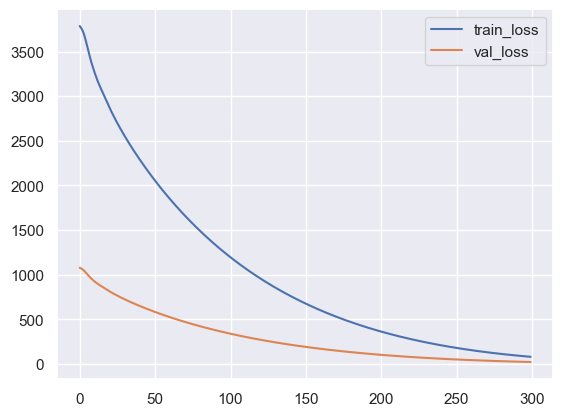

Finished Training
Epoch 1/300


100%|██████████| 13/13 [00:00<00:00, 272.71it/s]


Train Loss: 7110.799011230469


100%|██████████| 4/4 [00:00<00:00, 963.60it/s]


Epoch 2/300


100%|██████████| 13/13 [00:00<00:00, 147.08it/s]


Train Loss: 6979.047912597656


100%|██████████| 4/4 [00:00<00:00, 901.08it/s]


Epoch 3/300


100%|██████████| 13/13 [00:00<00:00, 262.55it/s]


Train Loss: 6760.597106933594


100%|██████████| 4/4 [00:00<00:00, 927.23it/s]


Epoch 4/300


100%|██████████| 13/13 [00:00<00:00, 295.82it/s]


Train Loss: 6513.4422607421875


100%|██████████| 4/4 [00:00<00:00, 932.84it/s]


Epoch 5/300


100%|██████████| 13/13 [00:00<00:00, 296.72it/s]


Train Loss: 6260.393798828125


100%|██████████| 4/4 [00:00<00:00, 904.14it/s]


Epoch 6/300


100%|██████████| 13/13 [00:00<00:00, 143.54it/s]


Train Loss: 6037.526214599609


100%|██████████| 4/4 [00:00<00:00, 955.10it/s]


Epoch 7/300


100%|██████████| 13/13 [00:00<00:00, 272.82it/s]


Train Loss: 5858.183624267578


100%|██████████| 4/4 [00:00<00:00, 899.63it/s]


Epoch 8/300


100%|██████████| 13/13 [00:00<00:00, 291.70it/s]


Train Loss: 5699.484313964844


100%|██████████| 4/4 [00:00<00:00, 883.99it/s]


Epoch 9/300


100%|██████████| 13/13 [00:00<00:00, 302.51it/s]


Train Loss: 5558.419891357422


100%|██████████| 4/4 [00:00<00:00, 922.89it/s]


Epoch 10/300


100%|██████████| 13/13 [00:00<00:00, 150.17it/s]


Train Loss: 5431.325042724609


100%|██████████| 4/4 [00:00<00:00, 917.24it/s]


Epoch 11/300


100%|██████████| 13/13 [00:00<00:00, 270.51it/s]


Train Loss: 5312.219665527344


100%|██████████| 4/4 [00:00<00:00, 984.23it/s]


Epoch 12/300


100%|██████████| 13/13 [00:00<00:00, 284.40it/s]


Train Loss: 5199.416442871094


100%|██████████| 4/4 [00:00<00:00, 950.12it/s]


Epoch 13/300


100%|██████████| 13/13 [00:00<00:00, 294.49it/s]


Train Loss: 5091.593933105469


100%|██████████| 4/4 [00:00<00:00, 883.76it/s]


Epoch 14/300


100%|██████████| 13/13 [00:00<00:00, 300.54it/s]


Train Loss: 4987.731109619141


100%|██████████| 4/4 [00:00<00:00, 934.14it/s]


Epoch 15/300


100%|██████████| 13/13 [00:00<00:00, 107.23it/s]


Train Loss: 4887.043426513672


100%|██████████| 4/4 [00:00<00:00, 733.01it/s]


Epoch 16/300


100%|██████████| 13/13 [00:00<00:00, 255.22it/s]


Train Loss: 4789.340118408203


100%|██████████| 4/4 [00:00<00:00, 778.49it/s]


Epoch 17/300


100%|██████████| 13/13 [00:00<00:00, 245.79it/s]


Train Loss: 4694.566619873047


100%|██████████| 4/4 [00:00<00:00, 785.71it/s]


Epoch 18/300


100%|██████████| 13/13 [00:00<00:00, 250.74it/s]


Train Loss: 4602.265411376953


100%|██████████| 4/4 [00:00<00:00, 825.41it/s]


Epoch 19/300


100%|██████████| 13/13 [00:00<00:00, 253.40it/s]


Train Loss: 4512.1600341796875


100%|██████████| 4/4 [00:00<00:00, 910.96it/s]


Epoch 20/300


100%|██████████| 13/13 [00:00<00:00, 148.17it/s]


Train Loss: 4424.334808349609


100%|██████████| 4/4 [00:00<00:00, 919.10it/s]


Epoch 21/300


100%|██████████| 13/13 [00:00<00:00, 295.76it/s]


Train Loss: 4338.529235839844


100%|██████████| 4/4 [00:00<00:00, 940.22it/s]


Epoch 22/300


100%|██████████| 13/13 [00:00<00:00, 275.37it/s]


Train Loss: 4254.628265380859


100%|██████████| 4/4 [00:00<00:00, 931.76it/s]


Epoch 23/300


100%|██████████| 13/13 [00:00<00:00, 262.89it/s]


Train Loss: 4172.536468505859


100%|██████████| 4/4 [00:00<00:00, 872.59it/s]


Epoch 24/300


100%|██████████| 13/13 [00:00<00:00, 149.73it/s]


Train Loss: 4092.1734313964844


100%|██████████| 4/4 [00:00<00:00, 983.77it/s]


Epoch 25/300


100%|██████████| 13/13 [00:00<00:00, 286.10it/s]


Train Loss: 4013.4681396484375


100%|██████████| 4/4 [00:00<00:00, 889.28it/s]


Epoch 26/300


100%|██████████| 13/13 [00:00<00:00, 251.70it/s]


Train Loss: 3936.3597717285156


100%|██████████| 4/4 [00:00<00:00, 939.64it/s]


Epoch 27/300


100%|██████████| 13/13 [00:00<00:00, 281.93it/s]


Train Loss: 3860.7893981933594


100%|██████████| 4/4 [00:00<00:00, 900.94it/s]


Epoch 28/300


100%|██████████| 13/13 [00:00<00:00, 305.17it/s]


Train Loss: 3786.7064208984375


100%|██████████| 4/4 [00:00<00:00, 967.10it/s]


Epoch 29/300


100%|██████████| 13/13 [00:00<00:00, 276.18it/s]


Train Loss: 3714.066925048828


100%|██████████| 4/4 [00:00<00:00, 960.62it/s]


Epoch 30/300


100%|██████████| 13/13 [00:00<00:00, 288.08it/s]


Train Loss: 3642.823272705078


100%|██████████| 4/4 [00:00<00:00, 925.89it/s]


Epoch 31/300


100%|██████████| 13/13 [00:00<00:00, 153.65it/s]


Train Loss: 3572.9435424804688


100%|██████████| 4/4 [00:00<00:00, 911.16it/s]


Epoch 32/300


100%|██████████| 13/13 [00:00<00:00, 268.99it/s]


Train Loss: 3504.3839721679688


100%|██████████| 4/4 [00:00<00:00, 920.41it/s]


Epoch 33/300


100%|██████████| 13/13 [00:00<00:00, 280.57it/s]


Train Loss: 3437.1146545410156


100%|██████████| 4/4 [00:00<00:00, 903.51it/s]


Epoch 34/300


100%|██████████| 13/13 [00:00<00:00, 293.06it/s]


Train Loss: 3371.1036071777344


100%|██████████| 4/4 [00:00<00:00, 939.16it/s]


Epoch 35/300


100%|██████████| 13/13 [00:00<00:00, 275.27it/s]


Train Loss: 3306.3180084228516


100%|██████████| 4/4 [00:00<00:00, 871.23it/s]


Epoch 36/300


100%|██████████| 13/13 [00:00<00:00, 289.82it/s]


Train Loss: 3242.7322692871094


100%|██████████| 4/4 [00:00<00:00, 930.00it/s]


Epoch 37/300


100%|██████████| 13/13 [00:00<00:00, 290.35it/s]


Train Loss: 3180.318405151367


100%|██████████| 4/4 [00:00<00:00, 1014.71it/s]


Epoch 38/300


100%|██████████| 13/13 [00:00<00:00, 270.98it/s]


Train Loss: 3119.0477447509766


100%|██████████| 4/4 [00:00<00:00, 895.64it/s]


Epoch 39/300


100%|██████████| 13/13 [00:00<00:00, 295.76it/s]


Train Loss: 3058.8999786376953


100%|██████████| 4/4 [00:00<00:00, 942.96it/s]


Epoch 40/300


100%|██████████| 13/13 [00:00<00:00, 265.44it/s]


Train Loss: 2999.8488159179688


100%|██████████| 4/4 [00:00<00:00, 1057.03it/s]


Epoch 41/300


100%|██████████| 13/13 [00:00<00:00, 147.42it/s]


Train Loss: 2941.8721466064453


100%|██████████| 4/4 [00:00<00:00, 937.85it/s]


Epoch 42/300


100%|██████████| 13/13 [00:00<00:00, 264.78it/s]


Train Loss: 2884.9475860595703


100%|██████████| 4/4 [00:00<00:00, 926.36it/s]


Epoch 43/300


100%|██████████| 13/13 [00:00<00:00, 257.39it/s]


Train Loss: 2829.0550994873047


100%|██████████| 4/4 [00:00<00:00, 950.77it/s]


Epoch 44/300


100%|██████████| 13/13 [00:00<00:00, 260.48it/s]


Train Loss: 2774.1742401123047


100%|██████████| 4/4 [00:00<00:00, 930.67it/s]


Epoch 45/300


100%|██████████| 13/13 [00:00<00:00, 265.26it/s]


Train Loss: 2720.282913208008


100%|██████████| 4/4 [00:00<00:00, 978.66it/s]


Epoch 46/300


100%|██████████| 13/13 [00:00<00:00, 280.74it/s]


Train Loss: 2667.3651580810547


100%|██████████| 4/4 [00:00<00:00, 795.05it/s]


Epoch 47/300


100%|██████████| 13/13 [00:00<00:00, 133.57it/s]


Train Loss: 2615.399642944336


100%|██████████| 4/4 [00:00<00:00, 824.55it/s]


Epoch 48/300


100%|██████████| 13/13 [00:00<00:00, 274.75it/s]


Train Loss: 2564.369857788086


100%|██████████| 4/4 [00:00<00:00, 851.07it/s]


Epoch 49/300


100%|██████████| 13/13 [00:00<00:00, 131.88it/s]


Train Loss: 2514.2576446533203


100%|██████████| 4/4 [00:00<00:00, 1029.85it/s]


Epoch 50/300


100%|██████████| 13/13 [00:00<00:00, 254.79it/s]


Train Loss: 2465.0468139648438


100%|██████████| 4/4 [00:00<00:00, 1023.50it/s]


Epoch 51/300


100%|██████████| 13/13 [00:00<00:00, 287.61it/s]


Train Loss: 2416.7203369140625


100%|██████████| 4/4 [00:00<00:00, 873.54it/s]


Epoch 52/300


100%|██████████| 13/13 [00:00<00:00, 159.03it/s]


Train Loss: 2369.2595977783203


100%|██████████| 4/4 [00:00<00:00, 943.92it/s]


Epoch 53/300


100%|██████████| 13/13 [00:00<00:00, 286.37it/s]


Train Loss: 2322.6497192382812


100%|██████████| 4/4 [00:00<00:00, 907.02it/s]


Epoch 54/300


100%|██████████| 13/13 [00:00<00:00, 272.36it/s]


Train Loss: 2276.8756103515625


100%|██████████| 4/4 [00:00<00:00, 929.59it/s]


Epoch 55/300


100%|██████████| 13/13 [00:00<00:00, 277.10it/s]


Train Loss: 2231.9217987060547


100%|██████████| 4/4 [00:00<00:00, 925.74it/s]


Epoch 56/300


100%|██████████| 13/13 [00:00<00:00, 282.04it/s]


Train Loss: 2187.7752685546875


100%|██████████| 4/4 [00:00<00:00, 946.96it/s]


Epoch 57/300


100%|██████████| 13/13 [00:00<00:00, 262.53it/s]


Train Loss: 2144.4181060791016


100%|██████████| 4/4 [00:00<00:00, 97.87it/s]


Epoch 58/300


100%|██████████| 13/13 [00:00<00:00, 239.77it/s]


Train Loss: 2101.837661743164


100%|██████████| 4/4 [00:00<00:00, 825.41it/s]


Epoch 59/300


100%|██████████| 13/13 [00:00<00:00, 293.03it/s]


Train Loss: 2060.0209045410156


100%|██████████| 4/4 [00:00<00:00, 916.59it/s]


Epoch 60/300


100%|██████████| 13/13 [00:00<00:00, 254.31it/s]


Train Loss: 2018.9522399902344


100%|██████████| 4/4 [00:00<00:00, 876.46it/s]


Epoch 61/300


100%|██████████| 13/13 [00:00<00:00, 271.73it/s]


Train Loss: 1978.6185607910156


100%|██████████| 4/4 [00:00<00:00, 945.89it/s]


Epoch 62/300


100%|██████████| 13/13 [00:00<00:00, 147.56it/s]


Train Loss: 1939.0075378417969


100%|██████████| 4/4 [00:00<00:00, 1054.04it/s]


Epoch 63/300


100%|██████████| 13/13 [00:00<00:00, 305.24it/s]


Train Loss: 1900.1058197021484


100%|██████████| 4/4 [00:00<00:00, 921.42it/s]


Epoch 64/300


100%|██████████| 13/13 [00:00<00:00, 293.18it/s]


Train Loss: 1861.9000701904297


100%|██████████| 4/4 [00:00<00:00, 907.22it/s]


Epoch 65/300


100%|██████████| 13/13 [00:00<00:00, 157.82it/s]


Train Loss: 1824.3782348632812


100%|██████████| 4/4 [00:00<00:00, 943.87it/s]


Epoch 66/300


100%|██████████| 13/13 [00:00<00:00, 280.50it/s]


Train Loss: 1787.5282745361328


100%|██████████| 4/4 [00:00<00:00, 861.39it/s]


Epoch 67/300


100%|██████████| 13/13 [00:00<00:00, 254.97it/s]


Train Loss: 1751.3387908935547


100%|██████████| 4/4 [00:00<00:00, 889.28it/s]


Epoch 68/300


100%|██████████| 13/13 [00:00<00:00, 296.92it/s]


Train Loss: 1715.798355102539


100%|██████████| 4/4 [00:00<00:00, 909.93it/s]


Epoch 69/300


100%|██████████| 13/13 [00:00<00:00, 289.83it/s]


Train Loss: 1680.891860961914


100%|██████████| 4/4 [00:00<00:00, 950.60it/s]


Epoch 70/300


100%|██████████| 13/13 [00:00<00:00, 121.94it/s]


Train Loss: 1646.6117401123047


100%|██████████| 4/4 [00:00<00:00, 888.25it/s]


Epoch 71/300


100%|██████████| 13/13 [00:00<00:00, 268.74it/s]


Train Loss: 1612.9457397460938


100%|██████████| 4/4 [00:00<00:00, 835.94it/s]


Epoch 72/300


100%|██████████| 13/13 [00:00<00:00, 218.41it/s]


Train Loss: 1579.8823318481445


100%|██████████| 4/4 [00:00<00:00, 887.54it/s]


Epoch 73/300


100%|██████████| 13/13 [00:00<00:00, 301.70it/s]


Train Loss: 1547.4125289916992


100%|██████████| 4/4 [00:00<00:00, 883.57it/s]


Epoch 74/300


100%|██████████| 13/13 [00:00<00:00, 167.53it/s]


Train Loss: 1515.523811340332


100%|██████████| 4/4 [00:00<00:00, 388.88it/s]


Epoch 75/300


100%|██████████| 13/13 [00:00<00:00, 263.28it/s]


Train Loss: 1484.2067413330078


100%|██████████| 4/4 [00:00<00:00, 902.97it/s]


Epoch 76/300


100%|██████████| 13/13 [00:00<00:00, 299.64it/s]


Train Loss: 1453.452133178711


100%|██████████| 4/4 [00:00<00:00, 908.69it/s]


Epoch 77/300


100%|██████████| 13/13 [00:00<00:00, 265.85it/s]


Train Loss: 1423.2498397827148


100%|██████████| 4/4 [00:00<00:00, 929.33it/s]


Epoch 78/300


100%|██████████| 13/13 [00:00<00:00, 153.95it/s]


Train Loss: 1393.5892333984375


100%|██████████| 4/4 [00:00<00:00, 896.41it/s]


Epoch 79/300


100%|██████████| 13/13 [00:00<00:00, 292.00it/s]


Train Loss: 1364.4604187011719


100%|██████████| 4/4 [00:00<00:00, 921.22it/s]


Epoch 80/300


100%|██████████| 13/13 [00:00<00:00, 271.49it/s]


Train Loss: 1335.8556060791016


100%|██████████| 4/4 [00:00<00:00, 900.11it/s]


Epoch 81/300


100%|██████████| 13/13 [00:00<00:00, 138.22it/s]


Train Loss: 1307.7653579711914


100%|██████████| 4/4 [00:00<00:00, 97.38it/s]


Epoch 82/300


100%|██████████| 13/13 [00:00<00:00, 237.16it/s]


Train Loss: 1280.1797409057617


100%|██████████| 4/4 [00:00<00:00, 876.42it/s]


Epoch 83/300


100%|██████████| 13/13 [00:00<00:00, 291.10it/s]


Train Loss: 1253.090721130371


100%|██████████| 4/4 [00:00<00:00, 900.07it/s]


Epoch 84/300


100%|██████████| 13/13 [00:00<00:00, 292.38it/s]


Train Loss: 1226.4911804199219


100%|██████████| 4/4 [00:00<00:00, 1001.21it/s]


Epoch 85/300


100%|██████████| 13/13 [00:00<00:00, 150.40it/s]


Train Loss: 1200.368881225586


100%|██████████| 4/4 [00:00<00:00, 930.88it/s]


Epoch 86/300


100%|██████████| 13/13 [00:00<00:00, 287.65it/s]


Train Loss: 1174.7202606201172


100%|██████████| 4/4 [00:00<00:00, 965.71it/s]


Epoch 87/300


100%|██████████| 13/13 [00:00<00:00, 272.44it/s]


Train Loss: 1149.5309600830078


100%|██████████| 4/4 [00:00<00:00, 926.56it/s]


Epoch 88/300


100%|██████████| 13/13 [00:00<00:00, 278.15it/s]


Train Loss: 1124.799171447754


100%|██████████| 4/4 [00:00<00:00, 920.21it/s]


Epoch 89/300


100%|██████████| 13/13 [00:00<00:00, 288.67it/s]


Train Loss: 1100.5144577026367


100%|██████████| 4/4 [00:00<00:00, 937.85it/s]


Epoch 90/300


100%|██████████| 13/13 [00:00<00:00, 147.51it/s]


Train Loss: 1076.6699447631836


100%|██████████| 4/4 [00:00<00:00, 929.33it/s]


Epoch 91/300


100%|██████████| 13/13 [00:00<00:00, 267.84it/s]


Train Loss: 1053.257453918457


100%|██████████| 4/4 [00:00<00:00, 921.88it/s]


Epoch 92/300


100%|██████████| 13/13 [00:00<00:00, 294.36it/s]


Train Loss: 1030.2699737548828


100%|██████████| 4/4 [00:00<00:00, 976.56it/s]


Epoch 93/300


100%|██████████| 13/13 [00:00<00:00, 289.55it/s]


Train Loss: 1007.7017517089844


100%|██████████| 4/4 [00:00<00:00, 996.80it/s]


Epoch 94/300


100%|██████████| 13/13 [00:00<00:00, 140.20it/s]


Train Loss: 985.542839050293


100%|██████████| 4/4 [00:00<00:00, 858.35it/s]


Epoch 95/300


100%|██████████| 13/13 [00:00<00:00, 246.84it/s]


Train Loss: 963.7881240844727


100%|██████████| 4/4 [00:00<00:00, 779.43it/s]


Epoch 96/300


100%|██████████| 13/13 [00:00<00:00, 241.78it/s]


Train Loss: 942.4313430786133


100%|██████████| 4/4 [00:00<00:00, 949.90it/s]


Epoch 97/300


100%|██████████| 13/13 [00:00<00:00, 263.81it/s]


Train Loss: 921.4645767211914


100%|██████████| 4/4 [00:00<00:00, 932.02it/s]


Epoch 98/300


100%|██████████| 13/13 [00:00<00:00, 234.32it/s]


Train Loss: 900.8829650878906


100%|██████████| 4/4 [00:00<00:00, 96.65it/s]


Epoch 99/300


100%|██████████| 13/13 [00:00<00:00, 254.04it/s]


Train Loss: 880.6787033081055


100%|██████████| 4/4 [00:00<00:00, 926.82it/s]


Epoch 100/300


100%|██████████| 13/13 [00:00<00:00, 272.70it/s]


Train Loss: 860.8471069335938


100%|██████████| 4/4 [00:00<00:00, 979.98it/s]


Epoch 101/300


100%|██████████| 13/13 [00:00<00:00, 293.74it/s]


Train Loss: 841.3814849853516


100%|██████████| 4/4 [00:00<00:00, 940.69it/s]


Epoch 102/300


100%|██████████| 13/13 [00:00<00:00, 154.00it/s]


Train Loss: 822.273983001709


100%|██████████| 4/4 [00:00<00:00, 865.25it/s]


Epoch 103/300


100%|██████████| 13/13 [00:00<00:00, 295.72it/s]


Train Loss: 803.521598815918


100%|██████████| 4/4 [00:00<00:00, 944.88it/s]


Epoch 104/300


100%|██████████| 13/13 [00:00<00:00, 252.62it/s]


Train Loss: 785.117977142334


100%|██████████| 4/4 [00:00<00:00, 916.14it/s]


Epoch 105/300


100%|██████████| 13/13 [00:00<00:00, 304.10it/s]


Train Loss: 767.0569534301758


100%|██████████| 4/4 [00:00<00:00, 944.77it/s]


Epoch 106/300


100%|██████████| 13/13 [00:00<00:00, 154.27it/s]


Train Loss: 749.333065032959


100%|██████████| 4/4 [00:00<00:00, 975.36it/s]


Epoch 107/300


100%|██████████| 13/13 [00:00<00:00, 294.01it/s]


Train Loss: 731.9422149658203


100%|██████████| 4/4 [00:00<00:00, 890.65it/s]


Epoch 108/300


100%|██████████| 13/13 [00:00<00:00, 271.62it/s]


Train Loss: 714.8767967224121


100%|██████████| 4/4 [00:00<00:00, 917.84it/s]


Epoch 109/300


100%|██████████| 13/13 [00:00<00:00, 179.63it/s]


Train Loss: 698.1328315734863


100%|██████████| 4/4 [00:00<00:00, 849.09it/s]


Epoch 110/300


100%|██████████| 13/13 [00:00<00:00, 144.85it/s]


Train Loss: 681.7057685852051


100%|██████████| 4/4 [00:00<00:00, 888.72it/s]


Epoch 111/300


100%|██████████| 13/13 [00:00<00:00, 267.33it/s]


Train Loss: 665.5900115966797


100%|██████████| 4/4 [00:00<00:00, 679.93it/s]


Epoch 112/300


100%|██████████| 13/13 [00:00<00:00, 214.95it/s]


Train Loss: 649.7807312011719


100%|██████████| 4/4 [00:00<00:00, 955.59it/s]


Epoch 113/300


100%|██████████| 13/13 [00:00<00:00, 287.90it/s]


Train Loss: 634.2741737365723


100%|██████████| 4/4 [00:00<00:00, 959.96it/s]


Epoch 114/300


100%|██████████| 13/13 [00:00<00:00, 149.25it/s]


Train Loss: 619.0644989013672


100%|██████████| 4/4 [00:00<00:00, 939.27it/s]


Epoch 115/300


100%|██████████| 13/13 [00:00<00:00, 296.39it/s]


Train Loss: 604.1465721130371


100%|██████████| 4/4 [00:00<00:00, 862.40it/s]


Epoch 116/300


100%|██████████| 13/13 [00:00<00:00, 300.98it/s]


Train Loss: 589.5183067321777


100%|██████████| 4/4 [00:00<00:00, 884.73it/s]


Epoch 117/300


100%|██████████| 13/13 [00:00<00:00, 147.63it/s]


Train Loss: 575.1715126037598


100%|██████████| 4/4 [00:00<00:00, 900.69it/s]


Epoch 118/300


100%|██████████| 13/13 [00:00<00:00, 265.46it/s]


Train Loss: 561.1056098937988


100%|██████████| 4/4 [00:00<00:00, 885.76it/s]


Epoch 119/300


100%|██████████| 13/13 [00:00<00:00, 273.18it/s]


Train Loss: 547.314868927002


100%|██████████| 4/4 [00:00<00:00, 881.48it/s]


Epoch 120/300


100%|██████████| 13/13 [00:00<00:00, 136.60it/s]


Train Loss: 533.7932968139648


100%|██████████| 4/4 [00:00<00:00, 900.11it/s]


Epoch 121/300


100%|██████████| 13/13 [00:00<00:00, 279.03it/s]


Train Loss: 520.5394668579102


100%|██████████| 4/4 [00:00<00:00, 893.45it/s]


Epoch 122/300


100%|██████████| 13/13 [00:00<00:00, 275.80it/s]


Train Loss: 507.54827880859375


100%|██████████| 4/4 [00:00<00:00, 904.97it/s]


Epoch 123/300


100%|██████████| 13/13 [00:00<00:00, 152.15it/s]


Train Loss: 494.81509017944336


100%|██████████| 4/4 [00:00<00:00, 1030.41it/s]


Epoch 124/300


100%|██████████| 13/13 [00:00<00:00, 291.39it/s]


Train Loss: 482.3367004394531


100%|██████████| 4/4 [00:00<00:00, 930.21it/s]


Epoch 125/300


100%|██████████| 13/13 [00:00<00:00, 271.23it/s]


Train Loss: 470.1085624694824


100%|██████████| 4/4 [00:00<00:00, 1028.33it/s]


Epoch 126/300


100%|██████████| 13/13 [00:00<00:00, 152.99it/s]


Train Loss: 458.1281623840332


100%|██████████| 4/4 [00:00<00:00, 935.03it/s]


Epoch 127/300


100%|██████████| 13/13 [00:00<00:00, 302.35it/s]


Train Loss: 446.3903465270996


100%|██████████| 4/4 [00:00<00:00, 919.15it/s]


Epoch 128/300


100%|██████████| 13/13 [00:00<00:00, 279.26it/s]


Train Loss: 434.892333984375


100%|██████████| 4/4 [00:00<00:00, 915.79it/s]


Epoch 129/300


100%|██████████| 13/13 [00:00<00:00, 146.94it/s]


Train Loss: 423.63032150268555


100%|██████████| 4/4 [00:00<00:00, 919.55it/s]


Epoch 130/300


100%|██████████| 13/13 [00:00<00:00, 295.33it/s]


Train Loss: 412.59955978393555


100%|██████████| 4/4 [00:00<00:00, 956.95it/s]


Epoch 131/300


100%|██████████| 13/13 [00:00<00:00, 283.01it/s]


Train Loss: 401.79759788513184


100%|██████████| 4/4 [00:00<00:00, 910.77it/s]


Epoch 132/300


100%|██████████| 13/13 [00:00<00:00, 148.95it/s]


Train Loss: 391.22025871276855


100%|██████████| 4/4 [00:00<00:00, 913.64it/s]


Epoch 133/300


100%|██████████| 13/13 [00:00<00:00, 265.30it/s]


Train Loss: 380.86509704589844


100%|██████████| 4/4 [00:00<00:00, 885.29it/s]


Epoch 134/300


100%|██████████| 13/13 [00:00<00:00, 302.63it/s]


Train Loss: 370.72764587402344


100%|██████████| 4/4 [00:00<00:00, 935.92it/s]


Epoch 135/300


100%|██████████| 13/13 [00:00<00:00, 143.20it/s]


Train Loss: 360.8051223754883


100%|██████████| 4/4 [00:00<00:00, 933.00it/s]


Epoch 136/300


100%|██████████| 13/13 [00:00<00:00, 284.97it/s]


Train Loss: 351.09435081481934


100%|██████████| 4/4 [00:00<00:00, 963.82it/s]


Epoch 137/300


100%|██████████| 13/13 [00:00<00:00, 285.30it/s]


Train Loss: 341.5915946960449


100%|██████████| 4/4 [00:00<00:00, 870.46it/s]


Epoch 138/300


100%|██████████| 13/13 [00:00<00:00, 288.22it/s]


Train Loss: 332.29277420043945


100%|██████████| 4/4 [00:00<00:00, 1036.27it/s]


Epoch 139/300


100%|██████████| 13/13 [00:00<00:00, 152.21it/s]


Train Loss: 323.19693756103516


100%|██████████| 4/4 [00:00<00:00, 958.53it/s]


Epoch 140/300


100%|██████████| 13/13 [00:00<00:00, 285.87it/s]


Train Loss: 314.2986660003662


100%|██████████| 4/4 [00:00<00:00, 915.79it/s]


Epoch 141/300


100%|██████████| 13/13 [00:00<00:00, 279.20it/s]


Train Loss: 305.5959720611572


100%|██████████| 4/4 [00:00<00:00, 935.24it/s]


Epoch 142/300


100%|██████████| 13/13 [00:00<00:00, 105.55it/s]


Train Loss: 297.08564376831055


100%|██████████| 4/4 [00:00<00:00, 786.63it/s]


Epoch 143/300


100%|██████████| 13/13 [00:00<00:00, 243.02it/s]


Train Loss: 288.7636661529541


100%|██████████| 4/4 [00:00<00:00, 741.53it/s]


Epoch 144/300


100%|██████████| 13/13 [00:00<00:00, 248.63it/s]


Train Loss: 280.6289405822754


100%|██████████| 4/4 [00:00<00:00, 707.72it/s]


Epoch 145/300


100%|██████████| 13/13 [00:00<00:00, 153.61it/s]


Train Loss: 272.6771926879883


100%|██████████| 4/4 [00:00<00:00, 915.74it/s]


Epoch 146/300


100%|██████████| 13/13 [00:00<00:00, 289.73it/s]


Train Loss: 264.9045009613037


100%|██████████| 4/4 [00:00<00:00, 966.88it/s]


Epoch 147/300


100%|██████████| 13/13 [00:00<00:00, 272.00it/s]


Train Loss: 257.3111114501953


100%|██████████| 4/4 [00:00<00:00, 1054.77it/s]


Epoch 148/300


100%|██████████| 13/13 [00:00<00:00, 247.73it/s]


Train Loss: 249.8896427154541


100%|██████████| 4/4 [00:00<00:00, 896.84it/s]


Epoch 149/300


100%|██████████| 13/13 [00:00<00:00, 150.27it/s]


Train Loss: 242.6396598815918


100%|██████████| 4/4 [00:00<00:00, 840.88it/s]


Epoch 150/300


100%|██████████| 13/13 [00:00<00:00, 284.01it/s]


Train Loss: 235.55974769592285


100%|██████████| 4/4 [00:00<00:00, 926.56it/s]


Epoch 151/300


100%|██████████| 13/13 [00:00<00:00, 290.74it/s]


Train Loss: 228.64486694335938


100%|██████████| 4/4 [00:00<00:00, 891.84it/s]


Epoch 152/300


100%|██████████| 13/13 [00:00<00:00, 148.83it/s]


Train Loss: 221.89272689819336


100%|██████████| 4/4 [00:00<00:00, 806.33it/s]


Epoch 153/300


100%|██████████| 13/13 [00:00<00:00, 294.71it/s]


Train Loss: 215.30172538757324


100%|██████████| 4/4 [00:00<00:00, 975.08it/s]


Epoch 154/300


100%|██████████| 13/13 [00:00<00:00, 287.90it/s]


Train Loss: 208.86809062957764


100%|██████████| 4/4 [00:00<00:00, 927.23it/s]


Epoch 155/300


100%|██████████| 13/13 [00:00<00:00, 152.10it/s]


Train Loss: 202.58746147155762


100%|██████████| 4/4 [00:00<00:00, 942.01it/s]


Epoch 156/300


100%|██████████| 13/13 [00:00<00:00, 289.27it/s]


Train Loss: 196.45891857147217


100%|██████████| 4/4 [00:00<00:00, 894.21it/s]


Epoch 157/300


100%|██████████| 13/13 [00:00<00:00, 300.12it/s]


Train Loss: 190.48004913330078


100%|██████████| 4/4 [00:00<00:00, 868.66it/s]


Epoch 158/300


100%|██████████| 13/13 [00:00<00:00, 146.84it/s]


Train Loss: 184.64784812927246


100%|██████████| 4/4 [00:00<00:00, 976.56it/s]


Epoch 159/300


100%|██████████| 13/13 [00:00<00:00, 277.39it/s]


Train Loss: 178.96074295043945


100%|██████████| 4/4 [00:00<00:00, 969.89it/s]


Epoch 160/300


100%|██████████| 13/13 [00:00<00:00, 299.65it/s]


Train Loss: 173.41382026672363


100%|██████████| 4/4 [00:00<00:00, 944.24it/s]


Epoch 161/300


100%|██████████| 13/13 [00:00<00:00, 280.46it/s]


Train Loss: 168.00683879852295


100%|██████████| 4/4 [00:00<00:00, 881.02it/s]


Epoch 162/300


100%|██████████| 13/13 [00:00<00:00, 145.21it/s]


Train Loss: 162.73646354675293


100%|██████████| 4/4 [00:00<00:00, 984.93it/s]


Epoch 163/300


100%|██████████| 13/13 [00:00<00:00, 261.14it/s]


Train Loss: 157.5994520187378


100%|██████████| 4/4 [00:00<00:00, 902.58it/s]


Epoch 164/300


100%|██████████| 13/13 [00:00<00:00, 260.19it/s]


Train Loss: 152.59480571746826


100%|██████████| 4/4 [00:00<00:00, 927.48it/s]


Epoch 165/300


100%|██████████| 13/13 [00:00<00:00, 151.41it/s]


Train Loss: 147.7181043624878


100%|██████████| 4/4 [00:00<00:00, 1017.11it/s]


Epoch 166/300


100%|██████████| 13/13 [00:00<00:00, 253.10it/s]


Train Loss: 142.96809768676758


100%|██████████| 4/4 [00:00<00:00, 907.86it/s]


Epoch 167/300


100%|██████████| 13/13 [00:00<00:00, 272.49it/s]


Train Loss: 138.34247303009033


100%|██████████| 4/4 [00:00<00:00, 897.23it/s]


Epoch 168/300


100%|██████████| 13/13 [00:00<00:00, 163.01it/s]


Train Loss: 133.83860874176025


100%|██████████| 4/4 [00:00<00:00, 723.03it/s]


Epoch 169/300


100%|██████████| 13/13 [00:00<00:00, 234.87it/s]


Train Loss: 129.45458316802979


100%|██████████| 4/4 [00:00<00:00, 1025.13it/s]


Epoch 170/300


100%|██████████| 13/13 [00:00<00:00, 290.00it/s]


Train Loss: 125.18838787078857


100%|██████████| 4/4 [00:00<00:00, 944.50it/s]


Epoch 171/300


100%|██████████| 13/13 [00:00<00:00, 147.15it/s]


Train Loss: 121.03694438934326


100%|██████████| 4/4 [00:00<00:00, 906.19it/s]


Epoch 172/300


100%|██████████| 13/13 [00:00<00:00, 282.25it/s]


Train Loss: 116.99770641326904


100%|██████████| 4/4 [00:00<00:00, 1078.16it/s]


Epoch 173/300


100%|██████████| 13/13 [00:00<00:00, 168.68it/s]


Train Loss: 113.06637191772461


100%|██████████| 4/4 [00:00<00:00, 810.73it/s]


Epoch 174/300


100%|██████████| 13/13 [00:00<00:00, 140.51it/s]


Train Loss: 109.24550342559814


100%|██████████| 4/4 [00:00<00:00, 894.50it/s]


Epoch 175/300


100%|██████████| 13/13 [00:00<00:00, 285.46it/s]


Train Loss: 105.52953958511353


100%|██████████| 4/4 [00:00<00:00, 946.53it/s]


Epoch 176/300


100%|██████████| 13/13 [00:00<00:00, 285.68it/s]


Train Loss: 101.91826152801514


100%|██████████| 4/4 [00:00<00:00, 943.18it/s]


Epoch 177/300


100%|██████████| 13/13 [00:00<00:00, 142.55it/s]


Train Loss: 98.40894222259521


100%|██████████| 4/4 [00:00<00:00, 974.91it/s]


Epoch 178/300


100%|██████████| 13/13 [00:00<00:00, 242.15it/s]


Train Loss: 94.99845838546753


100%|██████████| 4/4 [00:00<00:00, 993.79it/s]


Epoch 179/300


100%|██████████| 13/13 [00:00<00:00, 287.37it/s]


Train Loss: 91.68383169174194


100%|██████████| 4/4 [00:00<00:00, 910.96it/s]


Epoch 180/300


100%|██████████| 13/13 [00:00<00:00, 159.20it/s]


Train Loss: 88.46548414230347


100%|██████████| 4/4 [00:00<00:00, 845.84it/s]


Epoch 181/300


100%|██████████| 13/13 [00:00<00:00, 267.53it/s]


Train Loss: 85.34065246582031


100%|██████████| 4/4 [00:00<00:00, 944.08it/s]


Epoch 182/300


100%|██████████| 13/13 [00:00<00:00, 296.11it/s]


Train Loss: 82.30762386322021


100%|██████████| 4/4 [00:00<00:00, 935.92it/s]


Epoch 183/300


100%|██████████| 13/13 [00:00<00:00, 142.45it/s]


Train Loss: 79.36245155334473


100%|██████████| 4/4 [00:00<00:00, 1031.43it/s]


Epoch 184/300


100%|██████████| 13/13 [00:00<00:00, 302.26it/s]


Train Loss: 76.50520086288452


100%|██████████| 4/4 [00:00<00:00, 900.89it/s]


Epoch 185/300


100%|██████████| 13/13 [00:00<00:00, 261.51it/s]


Train Loss: 73.7328405380249


100%|██████████| 4/4 [00:00<00:00, 847.85it/s]


Epoch 186/300


100%|██████████| 13/13 [00:00<00:00, 153.99it/s]


Train Loss: 71.04480648040771


100%|██████████| 4/4 [00:00<00:00, 888.67it/s]


Epoch 187/300


100%|██████████| 13/13 [00:00<00:00, 291.21it/s]


Train Loss: 68.43766975402832


100%|██████████| 4/4 [00:00<00:00, 1018.41it/s]


Epoch 188/300


100%|██████████| 13/13 [00:00<00:00, 261.63it/s]


Train Loss: 65.90933227539062


100%|██████████| 4/4 [00:00<00:00, 863.34it/s]


Epoch 189/300


100%|██████████| 13/13 [00:00<00:00, 148.04it/s]


Train Loss: 63.45970010757446


100%|██████████| 4/4 [00:00<00:00, 892.83it/s]


Epoch 190/300


100%|██████████| 13/13 [00:00<00:00, 277.05it/s]


Train Loss: 61.08485412597656


100%|██████████| 4/4 [00:00<00:00, 798.42it/s]


Epoch 191/300


100%|██████████| 13/13 [00:00<00:00, 265.18it/s]


Train Loss: 58.784950256347656


100%|██████████| 4/4 [00:00<00:00, 1001.74it/s]


Epoch 192/300


100%|██████████| 13/13 [00:00<00:00, 137.02it/s]


Train Loss: 56.5575795173645


100%|██████████| 4/4 [00:00<00:00, 873.13it/s]


Epoch 193/300


100%|██████████| 13/13 [00:00<00:00, 246.61it/s]


Train Loss: 54.40111541748047


100%|██████████| 4/4 [00:00<00:00, 944.98it/s]


Epoch 194/300


100%|██████████| 13/13 [00:00<00:00, 298.75it/s]


Train Loss: 52.312925815582275


100%|██████████| 4/4 [00:00<00:00, 910.96it/s]


Epoch 195/300


100%|██████████| 13/13 [00:00<00:00, 145.50it/s]


Train Loss: 50.29118824005127


100%|██████████| 4/4 [00:00<00:00, 916.14it/s]


Epoch 196/300


100%|██████████| 13/13 [00:00<00:00, 284.02it/s]


Train Loss: 48.33626961708069


100%|██████████| 4/4 [00:00<00:00, 939.16it/s]


Epoch 197/300


100%|██████████| 13/13 [00:00<00:00, 302.95it/s]


Train Loss: 46.4449942111969


100%|██████████| 4/4 [00:00<00:00, 866.95it/s]


Epoch 198/300


100%|██████████| 13/13 [00:00<00:00, 281.68it/s]


Train Loss: 44.61466670036316


100%|██████████| 4/4 [00:00<00:00, 96.01it/s]


Epoch 199/300


100%|██████████| 13/13 [00:00<00:00, 268.67it/s]


Train Loss: 42.84588956832886


100%|██████████| 4/4 [00:00<00:00, 845.80it/s]


Epoch 200/300


100%|██████████| 13/13 [00:00<00:00, 278.37it/s]


Train Loss: 41.13641595840454


100%|██████████| 4/4 [00:00<00:00, 1016.55it/s]


Epoch 201/300


100%|██████████| 13/13 [00:00<00:00, 286.70it/s]


Train Loss: 39.484479904174805


100%|██████████| 4/4 [00:00<00:00, 918.90it/s]


Epoch 202/300


100%|██████████| 13/13 [00:00<00:00, 148.88it/s]


Train Loss: 37.88801169395447


100%|██████████| 4/4 [00:00<00:00, 954.88it/s]


Epoch 203/300


100%|██████████| 13/13 [00:00<00:00, 146.88it/s]


Train Loss: 36.34682488441467


100%|██████████| 4/4 [00:00<00:00, 806.79it/s]


Epoch 204/300


100%|██████████| 13/13 [00:00<00:00, 278.66it/s]


Train Loss: 34.85873794555664


100%|██████████| 4/4 [00:00<00:00, 842.82it/s]


Epoch 205/300


100%|██████████| 13/13 [00:00<00:00, 263.50it/s]


Train Loss: 33.421905279159546


100%|██████████| 4/4 [00:00<00:00, 939.64it/s]


Epoch 206/300


100%|██████████| 13/13 [00:00<00:00, 141.86it/s]


Train Loss: 32.035451889038086


100%|██████████| 4/4 [00:00<00:00, 876.83it/s]


Epoch 207/300


100%|██████████| 13/13 [00:00<00:00, 262.98it/s]


Train Loss: 30.697593688964844


100%|██████████| 4/4 [00:00<00:00, 926.97it/s]


Epoch 208/300


100%|██████████| 13/13 [00:00<00:00, 284.22it/s]


Train Loss: 29.407817125320435


100%|██████████| 4/4 [00:00<00:00, 1049.03it/s]


Epoch 209/300


100%|██████████| 13/13 [00:00<00:00, 150.91it/s]


Train Loss: 28.163836002349854


100%|██████████| 4/4 [00:00<00:00, 903.17it/s]


Epoch 210/300


100%|██████████| 13/13 [00:00<00:00, 254.72it/s]


Train Loss: 26.964435577392578


100%|██████████| 4/4 [00:00<00:00, 952.87it/s]


Epoch 211/300


100%|██████████| 13/13 [00:00<00:00, 266.01it/s]


Train Loss: 25.808409690856934


100%|██████████| 4/4 [00:00<00:00, 971.86it/s]


Epoch 212/300


100%|██████████| 13/13 [00:00<00:00, 146.42it/s]


Train Loss: 24.69582235813141


100%|██████████| 4/4 [00:00<00:00, 913.64it/s]


Epoch 213/300


100%|██████████| 13/13 [00:00<00:00, 294.26it/s]


Train Loss: 23.623905897140503


100%|██████████| 4/4 [00:00<00:00, 826.79it/s]


Epoch 214/300


100%|██████████| 13/13 [00:00<00:00, 290.99it/s]


Train Loss: 22.59132993221283


100%|██████████| 4/4 [00:00<00:00, 903.99it/s]


Epoch 215/300


100%|██████████| 13/13 [00:00<00:00, 170.31it/s]


Train Loss: 21.5973117351532


100%|██████████| 4/4 [00:00<00:00, 582.42it/s]


Epoch 216/300


100%|██████████| 13/13 [00:00<00:00, 266.12it/s]


Train Loss: 20.6411691904068


100%|██████████| 4/4 [00:00<00:00, 944.50it/s]


Epoch 217/300


100%|██████████| 13/13 [00:00<00:00, 280.04it/s]


Train Loss: 19.721628546714783


100%|██████████| 4/4 [00:00<00:00, 889.71it/s]


Epoch 218/300


100%|██████████| 13/13 [00:00<00:00, 268.64it/s]


Train Loss: 18.837430000305176


100%|██████████| 4/4 [00:00<00:00, 902.15it/s]


Epoch 219/300


100%|██████████| 13/13 [00:00<00:00, 148.52it/s]


Train Loss: 17.98695695400238


100%|██████████| 4/4 [00:00<00:00, 829.90it/s]


Epoch 220/300


100%|██████████| 13/13 [00:00<00:00, 275.76it/s]


Train Loss: 17.170337080955505


100%|██████████| 4/4 [00:00<00:00, 914.49it/s]


Epoch 221/300


100%|██████████| 13/13 [00:00<00:00, 258.53it/s]


Train Loss: 16.385231971740723


100%|██████████| 4/4 [00:00<00:00, 946.48it/s]


Epoch 222/300


100%|██████████| 13/13 [00:00<00:00, 158.94it/s]


Train Loss: 15.63045597076416


100%|██████████| 4/4 [00:00<00:00, 970.90it/s]


Epoch 223/300


100%|██████████| 13/13 [00:00<00:00, 293.33it/s]


Train Loss: 14.906231880187988


100%|██████████| 4/4 [00:00<00:00, 918.90it/s]


Epoch 224/300


100%|██████████| 13/13 [00:00<00:00, 285.03it/s]


Train Loss: 14.21165919303894


100%|██████████| 4/4 [00:00<00:00, 876.23it/s]


Epoch 225/300


100%|██████████| 13/13 [00:00<00:00, 294.35it/s]


Train Loss: 13.544740319252014


100%|██████████| 4/4 [00:00<00:00, 868.07it/s]


Epoch 226/300


100%|██████████| 13/13 [00:00<00:00, 143.99it/s]


Train Loss: 12.90520590543747


100%|██████████| 4/4 [00:00<00:00, 839.95it/s]


Epoch 227/300


100%|██████████| 13/13 [00:00<00:00, 298.42it/s]


Train Loss: 12.291918635368347


100%|██████████| 4/4 [00:00<00:00, 1082.82it/s]


Epoch 228/300


100%|██████████| 13/13 [00:00<00:00, 283.30it/s]


Train Loss: 11.70367980003357


100%|██████████| 4/4 [00:00<00:00, 916.99it/s]


Epoch 229/300


100%|██████████| 13/13 [00:00<00:00, 292.14it/s]


Train Loss: 11.139768242835999


100%|██████████| 4/4 [00:00<00:00, 955.80it/s]


Epoch 230/300


100%|██████████| 13/13 [00:00<00:00, 152.82it/s]


Train Loss: 10.599914252758026


100%|██████████| 4/4 [00:00<00:00, 924.62it/s]


Epoch 231/300


100%|██████████| 13/13 [00:00<00:00, 270.17it/s]


Train Loss: 10.083307981491089


100%|██████████| 4/4 [00:00<00:00, 925.08it/s]


Epoch 232/300


100%|██████████| 13/13 [00:00<00:00, 294.86it/s]


Train Loss: 9.588200986385345


100%|██████████| 4/4 [00:00<00:00, 945.20it/s]


Epoch 233/300


100%|██████████| 13/13 [00:00<00:00, 296.62it/s]


Train Loss: 9.114237844944


100%|██████████| 4/4 [00:00<00:00, 878.89it/s]


Epoch 234/300


100%|██████████| 13/13 [00:00<00:00, 77.58it/s]


Train Loss: 8.661123037338257


100%|██████████| 4/4 [00:00<00:00, 683.78it/s]


Epoch 235/300


100%|██████████| 13/13 [00:00<00:00, 276.78it/s]


Train Loss: 8.228406608104706


100%|██████████| 4/4 [00:00<00:00, 879.72it/s]


Epoch 236/300


100%|██████████| 13/13 [00:00<00:00, 245.58it/s]


Train Loss: 7.815212726593018


100%|██████████| 4/4 [00:00<00:00, 902.29it/s]


Epoch 237/300


100%|██████████| 13/13 [00:00<00:00, 213.05it/s]


Train Loss: 7.418289065361023


100%|██████████| 4/4 [00:00<00:00, 995.27it/s]


Epoch 238/300


100%|██████████| 13/13 [00:00<00:00, 155.40it/s]


Train Loss: 7.040067374706268


100%|██████████| 4/4 [00:00<00:00, 597.29it/s]


Epoch 239/300


100%|██████████| 13/13 [00:00<00:00, 227.44it/s]


Train Loss: 6.67875799536705


100%|██████████| 4/4 [00:00<00:00, 903.56it/s]


Epoch 240/300


100%|██████████| 13/13 [00:00<00:00, 251.48it/s]


Train Loss: 6.333360552787781


100%|██████████| 4/4 [00:00<00:00, 918.04it/s]


Epoch 241/300


100%|██████████| 13/13 [00:00<00:00, 272.92it/s]


Train Loss: 6.004648000001907


100%|██████████| 4/4 [00:00<00:00, 750.05it/s]


Epoch 242/300


100%|██████████| 13/13 [00:00<00:00, 225.79it/s]


Train Loss: 5.690312504768372


100%|██████████| 4/4 [00:00<00:00, 901.95it/s]


Epoch 243/300


100%|██████████| 13/13 [00:00<00:00, 229.00it/s]


Train Loss: 5.392528206110001


100%|██████████| 4/4 [00:00<00:00, 748.65it/s]


Epoch 244/300


100%|██████████| 13/13 [00:00<00:00, 124.48it/s]


Train Loss: 5.1063664853572845


100%|██████████| 4/4 [00:00<00:00, 886.51it/s]


Epoch 245/300


100%|██████████| 13/13 [00:00<00:00, 244.58it/s]


Train Loss: 4.834670424461365


100%|██████████| 4/4 [00:00<00:00, 969.89it/s]


Epoch 246/300


100%|██████████| 13/13 [00:00<00:00, 260.15it/s]


Train Loss: 4.5749379098415375


100%|██████████| 4/4 [00:00<00:00, 979.23it/s]


Epoch 247/300


100%|██████████| 13/13 [00:00<00:00, 161.50it/s]


Train Loss: 4.328063666820526


100%|██████████| 4/4 [00:00<00:00, 837.14it/s]


Epoch 248/300


100%|██████████| 13/13 [00:00<00:00, 208.56it/s]


Train Loss: 4.093808978796005


100%|██████████| 4/4 [00:00<00:00, 734.07it/s]


Epoch 249/300


100%|██████████| 13/13 [00:00<00:00, 189.58it/s]


Train Loss: 3.8702419698238373


100%|██████████| 4/4 [00:00<00:00, 727.93it/s]


Epoch 250/300


100%|██████████| 13/13 [00:00<00:00, 202.73it/s]


Train Loss: 3.657195121049881


100%|██████████| 4/4 [00:00<00:00, 866.32it/s]


Epoch 251/300


100%|██████████| 13/13 [00:00<00:00, 135.71it/s]


Train Loss: 3.4558403193950653


100%|██████████| 4/4 [00:00<00:00, 818.84it/s]


Epoch 252/300


100%|██████████| 13/13 [00:00<00:00, 242.47it/s]


Train Loss: 3.26605124771595


100%|██████████| 4/4 [00:00<00:00, 953.96it/s]


Epoch 253/300


100%|██████████| 13/13 [00:00<00:00, 282.44it/s]


Train Loss: 3.0821707248687744


100%|██████████| 4/4 [00:00<00:00, 1008.06it/s]


Epoch 254/300


100%|██████████| 13/13 [00:00<00:00, 253.48it/s]


Train Loss: 2.908340632915497


100%|██████████| 4/4 [00:00<00:00, 931.50it/s]


Epoch 255/300


100%|██████████| 13/13 [00:00<00:00, 130.95it/s]


Train Loss: 2.74409818649292


100%|██████████| 4/4 [00:00<00:00, 846.39it/s]


Epoch 256/300


100%|██████████| 13/13 [00:00<00:00, 193.36it/s]


Train Loss: 2.58800932765007


100%|██████████| 4/4 [00:00<00:00, 949.04it/s]


Epoch 257/300


100%|██████████| 13/13 [00:00<00:00, 254.15it/s]


Train Loss: 2.4400977194309235


100%|██████████| 4/4 [00:00<00:00, 775.75it/s]


Epoch 258/300


100%|██████████| 13/13 [00:00<00:00, 278.18it/s]


Train Loss: 2.3000950813293457


100%|██████████| 4/4 [00:00<00:00, 841.55it/s]


Epoch 259/300


100%|██████████| 13/13 [00:00<00:00, 118.39it/s]


Train Loss: 2.1671348214149475


100%|██████████| 4/4 [00:00<00:00, 918.95it/s]


Epoch 260/300


100%|██████████| 13/13 [00:00<00:00, 212.60it/s]


Train Loss: 2.040962666273117


100%|██████████| 4/4 [00:00<00:00, 952.39it/s]


Epoch 261/300


100%|██████████| 13/13 [00:00<00:00, 239.42it/s]


Train Loss: 1.922175407409668


100%|██████████| 4/4 [00:00<00:00, 76.41it/s]


Epoch 262/300


100%|██████████| 13/13 [00:00<00:00, 118.58it/s]


Train Loss: 1.8093055486679077


100%|██████████| 4/4 [00:00<00:00, 843.92it/s]


Epoch 263/300


100%|██████████| 13/13 [00:00<00:00, 231.22it/s]


Train Loss: 1.7029268592596054


100%|██████████| 4/4 [00:00<00:00, 807.14it/s]


Epoch 264/300


100%|██████████| 13/13 [00:00<00:00, 289.02it/s]


Train Loss: 1.6020326614379883


100%|██████████| 4/4 [00:00<00:00, 889.71it/s]


Epoch 265/300


100%|██████████| 13/13 [00:00<00:00, 258.18it/s]


Train Loss: 1.5071496069431305


100%|██████████| 4/4 [00:00<00:00, 890.84it/s]


Epoch 266/300


100%|██████████| 13/13 [00:00<00:00, 149.95it/s]


Train Loss: 1.4179311841726303


100%|██████████| 4/4 [00:00<00:00, 849.48it/s]


Epoch 267/300


100%|██████████| 13/13 [00:00<00:00, 240.38it/s]


Train Loss: 1.331636257469654


100%|██████████| 4/4 [00:00<00:00, 1071.27it/s]


Epoch 268/300


100%|██████████| 13/13 [00:00<00:00, 257.49it/s]


Train Loss: 1.2513412684202194


100%|██████████| 4/4 [00:00<00:00, 876.96it/s]


Epoch 269/300


100%|██████████| 13/13 [00:00<00:00, 244.15it/s]


Train Loss: 1.1748738810420036


100%|██████████| 4/4 [00:00<00:00, 892.64it/s]


Epoch 270/300


100%|██████████| 13/13 [00:00<00:00, 256.55it/s]


Train Loss: 1.1046066507697105


100%|██████████| 4/4 [00:00<00:00, 781.10it/s]


Epoch 271/300


100%|██████████| 13/13 [00:00<00:00, 251.22it/s]


Train Loss: 1.0361310243606567


100%|██████████| 4/4 [00:00<00:00, 727.93it/s]


Epoch 272/300


100%|██████████| 13/13 [00:00<00:00, 257.63it/s]


Train Loss: 0.9737014845013618


100%|██████████| 4/4 [00:00<00:00, 898.28it/s]


Epoch 273/300


100%|██████████| 13/13 [00:00<00:00, 140.84it/s]


Train Loss: 0.9125070199370384


100%|██████████| 4/4 [00:00<00:00, 842.99it/s]


Epoch 274/300


100%|██████████| 13/13 [00:00<00:00, 273.23it/s]


Train Loss: 0.8563315905630589


100%|██████████| 4/4 [00:00<00:00, 885.57it/s]


Epoch 275/300


100%|██████████| 13/13 [00:00<00:00, 210.02it/s]


Train Loss: 0.8038210310041904


100%|██████████| 4/4 [00:00<00:00, 716.49it/s]


Epoch 276/300


100%|██████████| 13/13 [00:00<00:00, 196.49it/s]


Train Loss: 0.7535263635218143


100%|██████████| 4/4 [00:00<00:00, 725.31it/s]


Epoch 277/300


100%|██████████| 13/13 [00:00<00:00, 268.47it/s]


Train Loss: 0.7063881754875183


100%|██████████| 4/4 [00:00<00:00, 819.32it/s]


Epoch 278/300


100%|██████████| 13/13 [00:00<00:00, 232.00it/s]


Train Loss: 0.6629158668220043


100%|██████████| 4/4 [00:00<00:00, 852.33it/s]


Epoch 279/300


100%|██████████| 13/13 [00:00<00:00, 262.47it/s]


Train Loss: 0.621258907020092


100%|██████████| 4/4 [00:00<00:00, 860.24it/s]


Epoch 280/300


100%|██████████| 13/13 [00:00<00:00, 140.65it/s]


Train Loss: 0.5837092064321041


100%|██████████| 4/4 [00:00<00:00, 888.29it/s]


Epoch 281/300


100%|██████████| 13/13 [00:00<00:00, 291.99it/s]


Train Loss: 0.5461443290114403


100%|██████████| 4/4 [00:00<00:00, 1026.38it/s]


Epoch 282/300


100%|██████████| 13/13 [00:00<00:00, 270.34it/s]


Train Loss: 0.5117576569318771


100%|██████████| 4/4 [00:00<00:00, 950.28it/s]


Epoch 283/300


100%|██████████| 13/13 [00:00<00:00, 262.25it/s]


Train Loss: 0.47942423820495605


100%|██████████| 4/4 [00:00<00:00, 876.23it/s]


Epoch 284/300


100%|██████████| 13/13 [00:00<00:00, 234.31it/s]


Train Loss: 0.4503043442964554


100%|██████████| 4/4 [00:00<00:00, 944.77it/s]


Epoch 285/300


100%|██████████| 13/13 [00:00<00:00, 294.29it/s]


Train Loss: 0.4210640750825405


100%|██████████| 4/4 [00:00<00:00, 878.76it/s]


Epoch 286/300


100%|██████████| 13/13 [00:00<00:00, 305.25it/s]


Train Loss: 0.39519140496850014


100%|██████████| 4/4 [00:00<00:00, 1038.19it/s]


Epoch 287/300


100%|██████████| 13/13 [00:00<00:00, 142.10it/s]


Train Loss: 0.3706681430339813


100%|██████████| 4/4 [00:00<00:00, 982.56it/s]


Epoch 288/300


100%|██████████| 13/13 [00:00<00:00, 265.21it/s]


Train Loss: 0.34760957956314087


100%|██████████| 4/4 [00:00<00:00, 905.80it/s]


Epoch 289/300


100%|██████████| 13/13 [00:00<00:00, 289.88it/s]


Train Loss: 0.3258555568754673


100%|██████████| 4/4 [00:00<00:00, 945.41it/s]


Epoch 290/300


100%|██████████| 13/13 [00:00<00:00, 212.72it/s]


Train Loss: 0.3062885757535696


100%|██████████| 4/4 [00:00<00:00, 908.45it/s]


Epoch 291/300


100%|██████████| 13/13 [00:00<00:00, 294.05it/s]


Train Loss: 0.2870641741901636


100%|██████████| 4/4 [00:00<00:00, 92.75it/s]


Epoch 292/300


100%|██████████| 13/13 [00:00<00:00, 230.11it/s]


Train Loss: 0.2691505402326584


100%|██████████| 4/4 [00:00<00:00, 1019.09it/s]


Epoch 293/300


100%|██████████| 13/13 [00:00<00:00, 116.49it/s]


Train Loss: 0.2528816480189562


100%|██████████| 4/4 [00:00<00:00, 803.04it/s]


Epoch 294/300


100%|██████████| 13/13 [00:00<00:00, 281.13it/s]


Train Loss: 0.23867229279130697


100%|██████████| 4/4 [00:00<00:00, 926.36it/s]


Epoch 295/300


100%|██████████| 13/13 [00:00<00:00, 271.04it/s]


Train Loss: 0.22389675676822662


100%|██████████| 4/4 [00:00<00:00, 91.47it/s]


Epoch 296/300


100%|██████████| 13/13 [00:00<00:00, 247.97it/s]


Train Loss: 0.21045668609440327


100%|██████████| 4/4 [00:00<00:00, 882.83it/s]


Epoch 297/300


100%|██████████| 13/13 [00:00<00:00, 222.32it/s]


Train Loss: 0.19832379277795553


100%|██████████| 4/4 [00:00<00:00, 934.35it/s]


Epoch 298/300


100%|██████████| 13/13 [00:00<00:00, 256.45it/s]


Train Loss: 0.1868744296953082


100%|██████████| 4/4 [00:00<00:00, 840.88it/s]


Epoch 299/300


100%|██████████| 13/13 [00:00<00:00, 106.24it/s]


Train Loss: 0.17678097542375326


100%|██████████| 4/4 [00:00<00:00, 920.56it/s]


Epoch 300/300


100%|██████████| 13/13 [00:00<00:00, 203.86it/s]


Train Loss: 0.1672676634043455


100%|██████████| 4/4 [00:00<00:00, 917.44it/s]


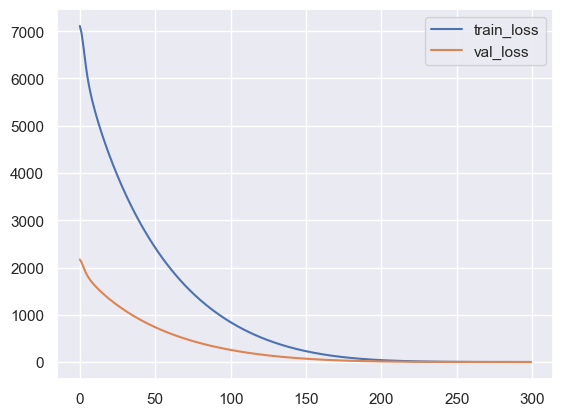

Finished Training
Epoch 1/300


100%|██████████| 13/13 [00:00<00:00, 174.21it/s]


Train Loss: 7042.8271484375


100%|██████████| 4/4 [00:00<00:00, 858.87it/s]


Epoch 2/300


100%|██████████| 13/13 [00:00<00:00, 144.27it/s]


Train Loss: 6961.3262939453125


100%|██████████| 4/4 [00:00<00:00, 1066.44it/s]


Epoch 3/300


100%|██████████| 13/13 [00:00<00:00, 282.96it/s]


Train Loss: 6804.6650390625


100%|██████████| 4/4 [00:00<00:00, 859.62it/s]


Epoch 4/300


100%|██████████| 13/13 [00:00<00:00, 261.19it/s]


Train Loss: 6571.500946044922


100%|██████████| 4/4 [00:00<00:00, 916.14it/s]


Epoch 5/300


100%|██████████| 13/13 [00:00<00:00, 142.96it/s]


Train Loss: 6344.45263671875


100%|██████████| 4/4 [00:00<00:00, 1023.06it/s]


Epoch 6/300


100%|██████████| 13/13 [00:00<00:00, 282.46it/s]


Train Loss: 6126.097930908203


100%|██████████| 4/4 [00:00<00:00, 813.48it/s]


Epoch 7/300


100%|██████████| 13/13 [00:00<00:00, 279.53it/s]


Train Loss: 5931.504852294922


100%|██████████| 4/4 [00:00<00:00, 895.07it/s]


Epoch 8/300


100%|██████████| 13/13 [00:00<00:00, 139.32it/s]


Train Loss: 5758.4825439453125


100%|██████████| 4/4 [00:00<00:00, 872.40it/s]


Epoch 9/300


100%|██████████| 13/13 [00:00<00:00, 265.19it/s]


Train Loss: 5609.4093017578125


100%|██████████| 4/4 [00:00<00:00, 917.19it/s]


Epoch 10/300


100%|██████████| 13/13 [00:00<00:00, 280.13it/s]


Train Loss: 5476.295440673828


100%|██████████| 4/4 [00:00<00:00, 959.25it/s]


Epoch 11/300


100%|██████████| 13/13 [00:00<00:00, 263.05it/s]


Train Loss: 5351.953948974609


100%|██████████| 4/4 [00:00<00:00, 880.09it/s]


Epoch 12/300


100%|██████████| 13/13 [00:00<00:00, 160.69it/s]


Train Loss: 5233.983856201172


100%|██████████| 4/4 [00:00<00:00, 693.56it/s]


Epoch 13/300


100%|██████████| 13/13 [00:00<00:00, 248.45it/s]


Train Loss: 5121.756256103516


100%|██████████| 4/4 [00:00<00:00, 863.78it/s]


Epoch 14/300


100%|██████████| 13/13 [00:00<00:00, 247.50it/s]


Train Loss: 5013.9835205078125


100%|██████████| 4/4 [00:00<00:00, 820.68it/s]


Epoch 15/300


100%|██████████| 13/13 [00:00<00:00, 217.93it/s]


Train Loss: 4909.95849609375


100%|██████████| 4/4 [00:00<00:00, 881.99it/s]


Epoch 16/300


100%|██████████| 13/13 [00:00<00:00, 116.90it/s]


Train Loss: 4809.216522216797


100%|██████████| 4/4 [00:00<00:00, 746.95it/s]


Epoch 17/300


100%|██████████| 13/13 [00:00<00:00, 97.22it/s]


Train Loss: 4711.3184814453125


100%|██████████| 4/4 [00:00<00:00, 884.17it/s]


Epoch 18/300


100%|██████████| 13/13 [00:00<00:00, 277.93it/s]


Train Loss: 4615.964447021484


100%|██████████| 4/4 [00:00<00:00, 916.79it/s]


Epoch 19/300


100%|██████████| 13/13 [00:00<00:00, 303.21it/s]


Train Loss: 4523.230224609375


100%|██████████| 4/4 [00:00<00:00, 784.17it/s]


Epoch 20/300


100%|██████████| 13/13 [00:00<00:00, 151.00it/s]


Train Loss: 4432.816192626953


100%|██████████| 4/4 [00:00<00:00, 932.64it/s]


Epoch 21/300


100%|██████████| 13/13 [00:00<00:00, 274.74it/s]


Train Loss: 4344.5599365234375


100%|██████████| 4/4 [00:00<00:00, 888.48it/s]


Epoch 22/300


100%|██████████| 13/13 [00:00<00:00, 234.91it/s]


Train Loss: 4258.332733154297


100%|██████████| 4/4 [00:00<00:00, 912.20it/s]


Epoch 23/300


100%|██████████| 13/13 [00:00<00:00, 282.19it/s]


Train Loss: 4174.026916503906


100%|██████████| 4/4 [00:00<00:00, 895.64it/s]


Epoch 24/300


100%|██████████| 13/13 [00:00<00:00, 267.66it/s]


Train Loss: 4091.549835205078


100%|██████████| 4/4 [00:00<00:00, 954.39it/s]


Epoch 25/300


100%|██████████| 13/13 [00:00<00:00, 286.22it/s]


Train Loss: 4010.8209533691406


100%|██████████| 4/4 [00:00<00:00, 860.24it/s]


Epoch 26/300


100%|██████████| 13/13 [00:00<00:00, 271.23it/s]


Train Loss: 3931.770782470703


100%|██████████| 4/4 [00:00<00:00, 894.21it/s]


Epoch 27/300


100%|██████████| 13/13 [00:00<00:00, 260.14it/s]


Train Loss: 3854.3359375


100%|██████████| 4/4 [00:00<00:00, 1036.85it/s]


Epoch 28/300


100%|██████████| 13/13 [00:00<00:00, 286.52it/s]


Train Loss: 3778.4588623046875


100%|██████████| 4/4 [00:00<00:00, 930.67it/s]


Epoch 29/300


100%|██████████| 13/13 [00:00<00:00, 297.28it/s]


Train Loss: 3704.0912475585938


100%|██████████| 4/4 [00:00<00:00, 854.93it/s]


Epoch 30/300


100%|██████████| 13/13 [00:00<00:00, 141.37it/s]


Train Loss: 3631.1842346191406


100%|██████████| 4/4 [00:00<00:00, 784.17it/s]


Epoch 31/300


100%|██████████| 13/13 [00:00<00:00, 263.36it/s]


Train Loss: 3559.69677734375


100%|██████████| 4/4 [00:00<00:00, 919.55it/s]


Epoch 32/300


100%|██████████| 13/13 [00:00<00:00, 280.22it/s]


Train Loss: 3489.5869750976562


100%|██████████| 4/4 [00:00<00:00, 873.95it/s]


Epoch 33/300


100%|██████████| 13/13 [00:00<00:00, 255.59it/s]


Train Loss: 3420.8204956054688


100%|██████████| 4/4 [00:00<00:00, 910.77it/s]


Epoch 34/300


100%|██████████| 13/13 [00:00<00:00, 263.40it/s]


Train Loss: 3353.360092163086


100%|██████████| 4/4 [00:00<00:00, 949.42it/s]


Epoch 35/300


100%|██████████| 13/13 [00:00<00:00, 290.48it/s]


Train Loss: 3287.176483154297


100%|██████████| 4/4 [00:00<00:00, 943.18it/s]


Epoch 36/300


100%|██████████| 13/13 [00:00<00:00, 260.22it/s]


Train Loss: 3222.2388458251953


100%|██████████| 4/4 [00:00<00:00, 905.60it/s]


Epoch 37/300


100%|██████████| 13/13 [00:00<00:00, 261.00it/s]


Train Loss: 3158.5167694091797


100%|██████████| 4/4 [00:00<00:00, 879.91it/s]


Epoch 38/300


100%|██████████| 13/13 [00:00<00:00, 282.95it/s]


Train Loss: 3095.9834899902344


100%|██████████| 4/4 [00:00<00:00, 941.48it/s]


Epoch 39/300


100%|██████████| 13/13 [00:00<00:00, 255.56it/s]


Train Loss: 3034.613327026367


100%|██████████| 4/4 [00:00<00:00, 897.27it/s]


Epoch 40/300


100%|██████████| 13/13 [00:00<00:00, 145.72it/s]


Train Loss: 2974.3826293945312


100%|██████████| 4/4 [00:00<00:00, 883.20it/s]


Epoch 41/300


100%|██████████| 13/13 [00:00<00:00, 274.59it/s]


Train Loss: 2915.266342163086


100%|██████████| 4/4 [00:00<00:00, 871.50it/s]


Epoch 42/300


100%|██████████| 13/13 [00:00<00:00, 257.81it/s]


Train Loss: 2857.240951538086


100%|██████████| 4/4 [00:00<00:00, 931.60it/s]


Epoch 43/300


100%|██████████| 13/13 [00:00<00:00, 284.43it/s]


Train Loss: 2800.2847595214844


100%|██████████| 4/4 [00:00<00:00, 816.17it/s]


Epoch 44/300


100%|██████████| 13/13 [00:00<00:00, 293.06it/s]


Train Loss: 2744.3777465820312


100%|██████████| 4/4 [00:00<00:00, 917.84it/s]


Epoch 45/300


100%|██████████| 13/13 [00:00<00:00, 256.39it/s]


Train Loss: 2689.498092651367


100%|██████████| 4/4 [00:00<00:00, 932.17it/s]


Epoch 46/300


100%|██████████| 13/13 [00:00<00:00, 283.68it/s]


Train Loss: 2635.626693725586


100%|██████████| 4/4 [00:00<00:00, 928.30it/s]


Epoch 47/300


100%|██████████| 13/13 [00:00<00:00, 229.08it/s]


Train Loss: 2582.744583129883


100%|██████████| 4/4 [00:00<00:00, 919.35it/s]


Epoch 48/300


100%|██████████| 13/13 [00:00<00:00, 269.49it/s]


Train Loss: 2530.831771850586


100%|██████████| 4/4 [00:00<00:00, 870.46it/s]


Epoch 49/300


100%|██████████| 13/13 [00:00<00:00, 267.17it/s]


Train Loss: 2479.871627807617


100%|██████████| 4/4 [00:00<00:00, 855.63it/s]


Epoch 50/300


100%|██████████| 13/13 [00:00<00:00, 99.85it/s]


Train Loss: 2429.844970703125


100%|██████████| 4/4 [00:00<00:00, 798.08it/s]


Epoch 51/300


100%|██████████| 13/13 [00:00<00:00, 278.89it/s]


Train Loss: 2380.737091064453


100%|██████████| 4/4 [00:00<00:00, 899.49it/s]


Epoch 52/300


100%|██████████| 13/13 [00:00<00:00, 270.37it/s]


Train Loss: 2332.5274353027344


100%|██████████| 4/4 [00:00<00:00, 899.87it/s]


Epoch 53/300


100%|██████████| 13/13 [00:00<00:00, 240.19it/s]


Train Loss: 2285.2025756835938


100%|██████████| 4/4 [00:00<00:00, 932.84it/s]


Epoch 54/300


100%|██████████| 13/13 [00:00<00:00, 119.72it/s]


Train Loss: 2238.745361328125


100%|██████████| 4/4 [00:00<00:00, 953.09it/s]


Epoch 55/300


100%|██████████| 13/13 [00:00<00:00, 254.48it/s]


Train Loss: 2193.140609741211


100%|██████████| 4/4 [00:00<00:00, 889.85it/s]


Epoch 56/300


100%|██████████| 13/13 [00:00<00:00, 255.58it/s]


Train Loss: 2148.373001098633


100%|██████████| 4/4 [00:00<00:00, 750.46it/s]


Epoch 57/300


100%|██████████| 13/13 [00:00<00:00, 137.43it/s]


Train Loss: 2104.4263305664062


100%|██████████| 4/4 [00:00<00:00, 877.61it/s]


Epoch 58/300


100%|██████████| 13/13 [00:00<00:00, 259.69it/s]


Train Loss: 2061.287872314453


100%|██████████| 4/4 [00:00<00:00, 955.59it/s]


Epoch 59/300


100%|██████████| 13/13 [00:00<00:00, 290.57it/s]


Train Loss: 2018.9424438476562


100%|██████████| 4/4 [00:00<00:00, 1037.81it/s]


Epoch 60/300


100%|██████████| 13/13 [00:00<00:00, 206.15it/s]


Train Loss: 1977.3739776611328


100%|██████████| 4/4 [00:00<00:00, 812.69it/s]


Epoch 61/300


100%|██████████| 13/13 [00:00<00:00, 233.27it/s]


Train Loss: 1936.5726928710938


100%|██████████| 4/4 [00:00<00:00, 901.95it/s]


Epoch 62/300


100%|██████████| 13/13 [00:00<00:00, 227.70it/s]


Train Loss: 1896.521713256836


100%|██████████| 4/4 [00:00<00:00, 830.35it/s]


Epoch 63/300


100%|██████████| 13/13 [00:00<00:00, 275.02it/s]


Train Loss: 1857.2088775634766


100%|██████████| 4/4 [00:00<00:00, 91.40it/s]


Epoch 64/300


100%|██████████| 13/13 [00:00<00:00, 264.03it/s]


Train Loss: 1818.6207885742188


100%|██████████| 4/4 [00:00<00:00, 916.84it/s]


Epoch 65/300


100%|██████████| 13/13 [00:00<00:00, 264.65it/s]


Train Loss: 1780.7473754882812


100%|██████████| 4/4 [00:00<00:00, 882.96it/s]


Epoch 66/300


100%|██████████| 13/13 [00:00<00:00, 297.84it/s]


Train Loss: 1743.5706024169922


100%|██████████| 4/4 [00:00<00:00, 970.12it/s]


Epoch 67/300


100%|██████████| 13/13 [00:00<00:00, 261.85it/s]


Train Loss: 1707.0819244384766


100%|██████████| 4/4 [00:00<00:00, 994.32it/s]


Epoch 68/300


100%|██████████| 13/13 [00:00<00:00, 251.90it/s]


Train Loss: 1671.267807006836


100%|██████████| 4/4 [00:00<00:00, 1023.00it/s]


Epoch 69/300


100%|██████████| 13/13 [00:00<00:00, 255.52it/s]


Train Loss: 1636.1178817749023


100%|██████████| 4/4 [00:00<00:00, 862.45it/s]


Epoch 70/300


100%|██████████| 13/13 [00:00<00:00, 297.30it/s]


Train Loss: 1601.6190948486328


100%|██████████| 4/4 [00:00<00:00, 166.38it/s]


Epoch 71/300


100%|██████████| 13/13 [00:00<00:00, 139.92it/s]


Train Loss: 1567.7603378295898


100%|██████████| 4/4 [00:00<00:00, 860.72it/s]


Epoch 72/300


100%|██████████| 13/13 [00:00<00:00, 279.59it/s]


Train Loss: 1534.5313568115234


100%|██████████| 4/4 [00:00<00:00, 925.95it/s]


Epoch 73/300


100%|██████████| 13/13 [00:00<00:00, 253.87it/s]


Train Loss: 1501.918312072754


100%|██████████| 4/4 [00:00<00:00, 927.64it/s]


Epoch 74/300


100%|██████████| 13/13 [00:00<00:00, 273.86it/s]


Train Loss: 1469.9134368896484


100%|██████████| 4/4 [00:00<00:00, 881.43it/s]


Epoch 75/300


100%|██████████| 13/13 [00:00<00:00, 218.72it/s]


Train Loss: 1438.5038452148438


100%|██████████| 4/4 [00:00<00:00, 895.41it/s]


Epoch 76/300


100%|██████████| 13/13 [00:00<00:00, 234.24it/s]


Train Loss: 1407.6798477172852


100%|██████████| 4/4 [00:00<00:00, 978.26it/s]


Epoch 77/300


100%|██████████| 13/13 [00:00<00:00, 263.21it/s]


Train Loss: 1377.4316864013672


100%|██████████| 4/4 [00:00<00:00, 90.16it/s]


Epoch 78/300


100%|██████████| 13/13 [00:00<00:00, 192.23it/s]


Train Loss: 1347.7471237182617


100%|██████████| 4/4 [00:00<00:00, 727.29it/s]


Epoch 79/300


100%|██████████| 13/13 [00:00<00:00, 247.27it/s]


Train Loss: 1318.6194305419922


100%|██████████| 4/4 [00:00<00:00, 927.84it/s]


Epoch 80/300


100%|██████████| 13/13 [00:00<00:00, 117.86it/s]


Train Loss: 1290.0359344482422


100%|██████████| 4/4 [00:00<00:00, 783.54it/s]


Epoch 81/300


100%|██████████| 13/13 [00:00<00:00, 143.56it/s]


Train Loss: 1261.988151550293


100%|██████████| 4/4 [00:00<00:00, 902.53it/s]


Epoch 82/300


100%|██████████| 13/13 [00:00<00:00, 275.92it/s]


Train Loss: 1234.4673767089844


100%|██████████| 4/4 [00:00<00:00, 1001.33it/s]


Epoch 83/300


100%|██████████| 13/13 [00:00<00:00, 252.46it/s]


Train Loss: 1207.4626159667969


100%|██████████| 4/4 [00:00<00:00, 935.24it/s]


Epoch 84/300


100%|██████████| 13/13 [00:00<00:00, 268.98it/s]


Train Loss: 1180.9661102294922


100%|██████████| 4/4 [00:00<00:00, 873.31it/s]


Epoch 85/300


100%|██████████| 13/13 [00:00<00:00, 228.98it/s]


Train Loss: 1154.968734741211


100%|██████████| 4/4 [00:00<00:00, 102.08it/s]


Epoch 86/300


100%|██████████| 13/13 [00:00<00:00, 232.36it/s]


Train Loss: 1129.4605712890625


100%|██████████| 4/4 [00:00<00:00, 881.62it/s]


Epoch 87/300


100%|██████████| 13/13 [00:00<00:00, 278.32it/s]


Train Loss: 1104.4356231689453


100%|██████████| 4/4 [00:00<00:00, 903.31it/s]


Epoch 88/300


100%|██████████| 13/13 [00:00<00:00, 261.83it/s]


Train Loss: 1079.8827743530273


100%|██████████| 4/4 [00:00<00:00, 913.49it/s]


Epoch 89/300


100%|██████████| 13/13 [00:00<00:00, 134.86it/s]


Train Loss: 1055.7936401367188


100%|██████████| 4/4 [00:00<00:00, 808.27it/s]


Epoch 90/300


100%|██████████| 13/13 [00:00<00:00, 221.83it/s]


Train Loss: 1032.1616668701172


100%|██████████| 4/4 [00:00<00:00, 857.42it/s]


Epoch 91/300


100%|██████████| 13/13 [00:00<00:00, 246.67it/s]


Train Loss: 1008.979736328125


100%|██████████| 4/4 [00:00<00:00, 950.55it/s]


Epoch 92/300


100%|██████████| 13/13 [00:00<00:00, 144.89it/s]


Train Loss: 986.2376403808594


100%|██████████| 4/4 [00:00<00:00, 754.30it/s]


Epoch 93/300


100%|██████████| 13/13 [00:00<00:00, 252.92it/s]


Train Loss: 963.928596496582


100%|██████████| 4/4 [00:00<00:00, 921.02it/s]


Epoch 94/300


100%|██████████| 13/13 [00:00<00:00, 102.13it/s]


Train Loss: 942.0448455810547


100%|██████████| 4/4 [00:00<00:00, 833.69it/s]


Epoch 95/300


100%|██████████| 13/13 [00:00<00:00, 241.33it/s]


Train Loss: 920.5802383422852


100%|██████████| 4/4 [00:00<00:00, 827.69it/s]


Epoch 96/300


100%|██████████| 13/13 [00:00<00:00, 247.28it/s]


Train Loss: 899.5254058837891


100%|██████████| 4/4 [00:00<00:00, 765.66it/s]


Epoch 97/300


100%|██████████| 13/13 [00:00<00:00, 209.77it/s]


Train Loss: 878.8740921020508


100%|██████████| 4/4 [00:00<00:00, 847.51it/s]


Epoch 98/300


100%|██████████| 13/13 [00:00<00:00, 223.33it/s]


Train Loss: 858.6209716796875


100%|██████████| 4/4 [00:00<00:00, 844.56it/s]


Epoch 99/300


100%|██████████| 13/13 [00:00<00:00, 277.66it/s]


Train Loss: 838.7569465637207


100%|██████████| 4/4 [00:00<00:00, 892.07it/s]


Epoch 100/300


100%|██████████| 13/13 [00:00<00:00, 224.98it/s]


Train Loss: 819.2758979797363


100%|██████████| 4/4 [00:00<00:00, 970.17it/s]


Epoch 101/300


100%|██████████| 13/13 [00:00<00:00, 131.39it/s]


Train Loss: 800.1725158691406


100%|██████████| 4/4 [00:00<00:00, 900.89it/s]


Epoch 102/300


100%|██████████| 13/13 [00:00<00:00, 260.63it/s]


Train Loss: 781.438304901123


100%|██████████| 4/4 [00:00<00:00, 1075.26it/s]


Epoch 103/300


100%|██████████| 13/13 [00:00<00:00, 208.57it/s]


Train Loss: 763.0675811767578


100%|██████████| 4/4 [00:00<00:00, 935.92it/s]


Epoch 104/300


100%|██████████| 13/13 [00:00<00:00, 206.93it/s]


Train Loss: 745.0553169250488


100%|██████████| 4/4 [00:00<00:00, 950.55it/s]


Epoch 105/300


100%|██████████| 13/13 [00:00<00:00, 287.44it/s]


Train Loss: 727.3945426940918


100%|██████████| 4/4 [00:00<00:00, 935.86it/s]


Epoch 106/300


100%|██████████| 13/13 [00:00<00:00, 132.84it/s]


Train Loss: 710.0786933898926


100%|██████████| 4/4 [00:00<00:00, 917.24it/s]


Epoch 107/300


100%|██████████| 13/13 [00:00<00:00, 285.66it/s]


Train Loss: 693.1028594970703


100%|██████████| 4/4 [00:00<00:00, 1020.64it/s]


Epoch 108/300


100%|██████████| 13/13 [00:00<00:00, 212.88it/s]


Train Loss: 676.4608726501465


100%|██████████| 4/4 [00:00<00:00, 718.51it/s]


Epoch 109/300


100%|██████████| 13/13 [00:00<00:00, 117.66it/s]


Train Loss: 660.1470603942871


100%|██████████| 4/4 [00:00<00:00, 974.91it/s]


Epoch 110/300


100%|██████████| 13/13 [00:00<00:00, 272.42it/s]


Train Loss: 644.1559753417969


100%|██████████| 4/4 [00:00<00:00, 957.17it/s]


Epoch 111/300


100%|██████████| 13/13 [00:00<00:00, 281.04it/s]


Train Loss: 628.482292175293


100%|██████████| 4/4 [00:00<00:00, 955.04it/s]


Epoch 112/300


100%|██████████| 13/13 [00:00<00:00, 257.54it/s]


Train Loss: 613.1205139160156


100%|██████████| 4/4 [00:00<00:00, 870.32it/s]


Epoch 113/300


100%|██████████| 13/13 [00:00<00:00, 276.64it/s]


Train Loss: 598.0651512145996


100%|██████████| 4/4 [00:00<00:00, 952.39it/s]


Epoch 114/300


100%|██████████| 13/13 [00:00<00:00, 239.56it/s]


Train Loss: 583.3119049072266


100%|██████████| 4/4 [00:00<00:00, 867.08it/s]


Epoch 115/300


100%|██████████| 13/13 [00:00<00:00, 291.55it/s]


Train Loss: 568.8549385070801


100%|██████████| 4/4 [00:00<00:00, 974.17it/s]


Epoch 116/300


100%|██████████| 13/13 [00:00<00:00, 262.11it/s]


Train Loss: 554.6896438598633


100%|██████████| 4/4 [00:00<00:00, 1046.68it/s]


Epoch 117/300


100%|██████████| 13/13 [00:00<00:00, 121.37it/s]


Train Loss: 540.8111686706543


100%|██████████| 4/4 [00:00<00:00, 909.28it/s]


Epoch 118/300


100%|██████████| 13/13 [00:00<00:00, 209.56it/s]


Train Loss: 527.2141189575195


100%|██████████| 4/4 [00:00<00:00, 794.94it/s]


Epoch 119/300


100%|██████████| 13/13 [00:00<00:00, 267.78it/s]


Train Loss: 513.8946495056152


100%|██████████| 4/4 [00:00<00:00, 941.59it/s]


Epoch 120/300


100%|██████████| 13/13 [00:00<00:00, 280.61it/s]


Train Loss: 500.84761810302734


100%|██████████| 4/4 [00:00<00:00, 961.56it/s]


Epoch 121/300


100%|██████████| 13/13 [00:00<00:00, 212.46it/s]


Train Loss: 488.06930923461914


100%|██████████| 4/4 [00:00<00:00, 984.06it/s]


Epoch 122/300


100%|██████████| 13/13 [00:00<00:00, 270.78it/s]


Train Loss: 475.5551300048828


100%|██████████| 4/4 [00:00<00:00, 983.77it/s]


Epoch 123/300


100%|██████████| 13/13 [00:00<00:00, 272.34it/s]


Train Loss: 463.2994194030762


100%|██████████| 4/4 [00:00<00:00, 989.63it/s]


Epoch 124/300


100%|██████████| 13/13 [00:00<00:00, 277.24it/s]


Train Loss: 451.3007125854492


100%|██████████| 4/4 [00:00<00:00, 973.72it/s]


Epoch 125/300


100%|██████████| 13/13 [00:00<00:00, 258.94it/s]


Train Loss: 439.55052947998047


100%|██████████| 4/4 [00:00<00:00, 1016.99it/s]


Epoch 126/300


100%|██████████| 13/13 [00:00<00:00, 276.63it/s]


Train Loss: 428.04877853393555


100%|██████████| 4/4 [00:00<00:00, 1043.23it/s]


Epoch 127/300


100%|██████████| 13/13 [00:00<00:00, 128.58it/s]


Train Loss: 416.7879829406738


100%|██████████| 4/4 [00:00<00:00, 898.67it/s]


Epoch 128/300


100%|██████████| 13/13 [00:00<00:00, 234.83it/s]


Train Loss: 405.7666320800781


100%|██████████| 4/4 [00:00<00:00, 922.13it/s]


Epoch 129/300


100%|██████████| 13/13 [00:00<00:00, 235.23it/s]


Train Loss: 394.98123931884766


100%|██████████| 4/4 [00:00<00:00, 1041.16it/s]


Epoch 130/300


100%|██████████| 13/13 [00:00<00:00, 290.75it/s]


Train Loss: 384.4272766113281


100%|██████████| 4/4 [00:00<00:00, 987.19it/s]


Epoch 131/300


100%|██████████| 13/13 [00:00<00:00, 295.60it/s]


Train Loss: 374.09717750549316


100%|██████████| 4/4 [00:00<00:00, 1033.08it/s]


Epoch 132/300


100%|██████████| 13/13 [00:00<00:00, 253.21it/s]


Train Loss: 363.992467880249


100%|██████████| 4/4 [00:00<00:00, 938.53it/s]


Epoch 133/300


100%|██████████| 13/13 [00:00<00:00, 257.94it/s]


Train Loss: 354.10658073425293


100%|██████████| 4/4 [00:00<00:00, 799.87it/s]


Epoch 134/300


100%|██████████| 13/13 [00:00<00:00, 230.35it/s]


Train Loss: 344.43756103515625


100%|██████████| 4/4 [00:00<00:00, 1025.13it/s]


Epoch 135/300


100%|██████████| 13/13 [00:00<00:00, 239.35it/s]


Train Loss: 334.97973823547363


100%|██████████| 4/4 [00:00<00:00, 340.94it/s]


Epoch 136/300


100%|██████████| 13/13 [00:00<00:00, 238.22it/s]


Train Loss: 325.73172187805176


100%|██████████| 4/4 [00:00<00:00, 965.21it/s]


Epoch 137/300


100%|██████████| 13/13 [00:00<00:00, 256.58it/s]


Train Loss: 316.6884880065918


100%|██████████| 4/4 [00:00<00:00, 906.00it/s]


Epoch 138/300


100%|██████████| 13/13 [00:00<00:00, 267.70it/s]


Train Loss: 307.8485870361328


100%|██████████| 4/4 [00:00<00:00, 976.33it/s]


Epoch 139/300


100%|██████████| 13/13 [00:00<00:00, 143.85it/s]


Train Loss: 299.20653343200684


100%|██████████| 4/4 [00:00<00:00, 850.90it/s]


Epoch 140/300


100%|██████████| 13/13 [00:00<00:00, 118.60it/s]


Train Loss: 290.75842666625977


100%|██████████| 4/4 [00:00<00:00, 1015.82it/s]


Epoch 141/300


100%|██████████| 13/13 [00:00<00:00, 235.81it/s]


Train Loss: 282.502103805542


100%|██████████| 4/4 [00:00<00:00, 880.28it/s]


Epoch 142/300


100%|██████████| 13/13 [00:00<00:00, 144.83it/s]


Train Loss: 274.4351043701172


100%|██████████| 4/4 [00:00<00:00, 977.52it/s]


Epoch 143/300


100%|██████████| 13/13 [00:00<00:00, 236.02it/s]


Train Loss: 266.5541248321533


100%|██████████| 4/4 [00:00<00:00, 886.56it/s]


Epoch 144/300


100%|██████████| 13/13 [00:00<00:00, 245.28it/s]


Train Loss: 258.8541488647461


100%|██████████| 4/4 [00:00<00:00, 922.99it/s]


Epoch 145/300


100%|██████████| 13/13 [00:00<00:00, 129.94it/s]


Train Loss: 251.33428764343262


100%|██████████| 4/4 [00:00<00:00, 893.21it/s]


Epoch 146/300


100%|██████████| 13/13 [00:00<00:00, 281.56it/s]


Train Loss: 243.9902572631836


100%|██████████| 4/4 [00:00<00:00, 945.14it/s]


Epoch 147/300


100%|██████████| 13/13 [00:00<00:00, 220.60it/s]


Train Loss: 236.81858825683594


100%|██████████| 4/4 [00:00<00:00, 983.60it/s]


Epoch 148/300


100%|██████████| 13/13 [00:00<00:00, 125.20it/s]


Train Loss: 229.81674003601074


100%|██████████| 4/4 [00:00<00:00, 842.27it/s]


Epoch 149/300


100%|██████████| 13/13 [00:00<00:00, 246.59it/s]


Train Loss: 222.98185348510742


100%|██████████| 4/4 [00:00<00:00, 951.68it/s]


Epoch 150/300


100%|██████████| 13/13 [00:00<00:00, 256.87it/s]


Train Loss: 216.31194496154785


100%|██████████| 4/4 [00:00<00:00, 884.55it/s]


Epoch 151/300


100%|██████████| 13/13 [00:00<00:00, 268.14it/s]


Train Loss: 209.80188083648682


100%|██████████| 4/4 [00:00<00:00, 861.92it/s]


Epoch 152/300


100%|██████████| 13/13 [00:00<00:00, 139.96it/s]


Train Loss: 203.45113277435303


100%|██████████| 4/4 [00:00<00:00, 936.75it/s]


Epoch 153/300


100%|██████████| 13/13 [00:00<00:00, 224.48it/s]


Train Loss: 197.2553768157959


100%|██████████| 4/4 [00:00<00:00, 940.53it/s]


Epoch 154/300


100%|██████████| 13/13 [00:00<00:00, 282.57it/s]


Train Loss: 191.2120132446289


100%|██████████| 4/4 [00:00<00:00, 1004.32it/s]


Epoch 155/300


100%|██████████| 13/13 [00:00<00:00, 257.71it/s]


Train Loss: 185.31957340240479


100%|██████████| 4/4 [00:00<00:00, 1024.56it/s]


Epoch 156/300


100%|██████████| 13/13 [00:00<00:00, 277.81it/s]


Train Loss: 179.57344245910645


100%|██████████| 4/4 [00:00<00:00, 1043.55it/s]


Epoch 157/300


100%|██████████| 13/13 [00:00<00:00, 253.89it/s]


Train Loss: 173.97183227539062


100%|██████████| 4/4 [00:00<00:00, 891.03it/s]


Epoch 158/300


100%|██████████| 13/13 [00:00<00:00, 244.42it/s]


Train Loss: 168.51133251190186


100%|██████████| 4/4 [00:00<00:00, 1002.52it/s]


Epoch 159/300


100%|██████████| 13/13 [00:00<00:00, 133.81it/s]


Train Loss: 163.19027996063232


100%|██████████| 4/4 [00:00<00:00, 1066.64it/s]


Epoch 160/300


100%|██████████| 13/13 [00:00<00:00, 292.96it/s]


Train Loss: 158.00601291656494


100%|██████████| 4/4 [00:00<00:00, 986.43it/s]


Epoch 161/300


100%|██████████| 13/13 [00:00<00:00, 206.36it/s]


Train Loss: 152.9549961090088


100%|██████████| 4/4 [00:00<00:00, 919.95it/s]


Epoch 162/300


100%|██████████| 13/13 [00:00<00:00, 231.80it/s]


Train Loss: 148.03624820709229


100%|██████████| 4/4 [00:00<00:00, 921.22it/s]


Epoch 163/300


100%|██████████| 13/13 [00:00<00:00, 251.05it/s]


Train Loss: 143.2458038330078


100%|██████████| 4/4 [00:00<00:00, 890.65it/s]


Epoch 164/300


100%|██████████| 13/13 [00:00<00:00, 263.33it/s]


Train Loss: 138.5819320678711


100%|██████████| 4/4 [00:00<00:00, 942.75it/s]


Epoch 165/300


100%|██████████| 13/13 [00:00<00:00, 268.18it/s]


Train Loss: 134.0414867401123


100%|██████████| 4/4 [00:00<00:00, 980.44it/s]


Epoch 166/300


100%|██████████| 13/13 [00:00<00:00, 133.07it/s]


Train Loss: 129.6229658126831


100%|██████████| 4/4 [00:00<00:00, 1084.64it/s]


Epoch 167/300


100%|██████████| 13/13 [00:00<00:00, 275.04it/s]


Train Loss: 125.32310771942139


100%|██████████| 4/4 [00:00<00:00, 854.67it/s]


Epoch 168/300


100%|██████████| 13/13 [00:00<00:00, 271.28it/s]


Train Loss: 121.14077949523926


100%|██████████| 4/4 [00:00<00:00, 941.38it/s]


Epoch 169/300


100%|██████████| 13/13 [00:00<00:00, 235.32it/s]


Train Loss: 117.0714111328125


100%|██████████| 4/4 [00:00<00:00, 966.37it/s]


Epoch 170/300


100%|██████████| 13/13 [00:00<00:00, 137.54it/s]


Train Loss: 113.11536979675293


100%|██████████| 4/4 [00:00<00:00, 929.43it/s]


Epoch 171/300


100%|██████████| 13/13 [00:00<00:00, 257.30it/s]


Train Loss: 109.2687759399414


100%|██████████| 4/4 [00:00<00:00, 921.47it/s]


Epoch 172/300


100%|██████████| 13/13 [00:00<00:00, 289.07it/s]


Train Loss: 105.52842664718628


100%|██████████| 4/4 [00:00<00:00, 969.95it/s]


Epoch 173/300


100%|██████████| 13/13 [00:00<00:00, 248.57it/s]


Train Loss: 101.89504051208496


100%|██████████| 4/4 [00:00<00:00, 1010.13it/s]


Epoch 174/300


100%|██████████| 13/13 [00:00<00:00, 262.52it/s]


Train Loss: 98.36360883712769


100%|██████████| 4/4 [00:00<00:00, 1006.79it/s]


Epoch 175/300


100%|██████████| 13/13 [00:00<00:00, 209.84it/s]


Train Loss: 94.93229150772095


100%|██████████| 4/4 [00:00<00:00, 978.21it/s]


Epoch 176/300


100%|██████████| 13/13 [00:00<00:00, 291.42it/s]


Train Loss: 91.59974670410156


100%|██████████| 4/4 [00:00<00:00, 1037.87it/s]


Epoch 177/300


100%|██████████| 13/13 [00:00<00:00, 228.95it/s]


Train Loss: 88.36500072479248


100%|██████████| 4/4 [00:00<00:00, 993.26it/s]


Epoch 178/300


100%|██████████| 13/13 [00:00<00:00, 131.20it/s]


Train Loss: 85.22314214706421


100%|██████████| 4/4 [00:00<00:00, 935.65it/s]


Epoch 179/300


100%|██████████| 13/13 [00:00<00:00, 262.00it/s]


Train Loss: 82.17442035675049


100%|██████████| 4/4 [00:00<00:00, 879.86it/s]


Epoch 180/300


100%|██████████| 13/13 [00:00<00:00, 279.22it/s]


Train Loss: 79.21623516082764


100%|██████████| 4/4 [00:00<00:00, 1036.01it/s]


Epoch 181/300


100%|██████████| 13/13 [00:00<00:00, 259.79it/s]


Train Loss: 76.34672260284424


100%|██████████| 4/4 [00:00<00:00, 976.56it/s]


Epoch 182/300


100%|██████████| 13/13 [00:00<00:00, 281.54it/s]


Train Loss: 73.56141090393066


100%|██████████| 4/4 [00:00<00:00, 949.69it/s]


Epoch 183/300


100%|██████████| 13/13 [00:00<00:00, 303.94it/s]


Train Loss: 70.86185503005981


100%|██████████| 4/4 [00:00<00:00, 915.59it/s]


Epoch 184/300


100%|██████████| 13/13 [00:00<00:00, 248.31it/s]


Train Loss: 68.24471235275269


100%|██████████| 4/4 [00:00<00:00, 849.26it/s]


Epoch 185/300


100%|██████████| 13/13 [00:00<00:00, 278.64it/s]


Train Loss: 65.70854711532593


100%|██████████| 4/4 [00:00<00:00, 1046.81it/s]


Epoch 186/300


100%|██████████| 13/13 [00:00<00:00, 262.23it/s]


Train Loss: 63.249736309051514


100%|██████████| 4/4 [00:00<00:00, 880.69it/s]


Epoch 187/300


100%|██████████| 13/13 [00:00<00:00, 261.12it/s]


Train Loss: 60.86806297302246


100%|██████████| 4/4 [00:00<00:00, 989.34it/s]


Epoch 188/300


100%|██████████| 13/13 [00:00<00:00, 271.22it/s]


Train Loss: 58.561575412750244


100%|██████████| 4/4 [00:00<00:00, 887.31it/s]


Epoch 189/300


100%|██████████| 13/13 [00:00<00:00, 296.06it/s]


Train Loss: 56.32715892791748


100%|██████████| 4/4 [00:00<00:00, 827.44it/s]


Epoch 190/300


100%|██████████| 13/13 [00:00<00:00, 262.37it/s]


Train Loss: 54.16591167449951


100%|██████████| 4/4 [00:00<00:00, 948.99it/s]


Epoch 191/300


100%|██████████| 13/13 [00:00<00:00, 270.59it/s]


Train Loss: 52.07241749763489


100%|██████████| 4/4 [00:00<00:00, 951.47it/s]


Epoch 192/300


100%|██████████| 13/13 [00:00<00:00, 292.70it/s]


Train Loss: 50.04784917831421


100%|██████████| 4/4 [00:00<00:00, 908.89it/s]


Epoch 193/300


100%|██████████| 13/13 [00:00<00:00, 246.51it/s]


Train Loss: 48.08833622932434


100%|██████████| 4/4 [00:00<00:00, 1024.06it/s]


Epoch 194/300


100%|██████████| 13/13 [00:00<00:00, 261.63it/s]


Train Loss: 46.19384527206421


100%|██████████| 4/4 [00:00<00:00, 333.86it/s]


Epoch 195/300


100%|██████████| 13/13 [00:00<00:00, 250.84it/s]


Train Loss: 44.361886739730835


100%|██████████| 4/4 [00:00<00:00, 916.19it/s]


Epoch 196/300


100%|██████████| 13/13 [00:00<00:00, 271.17it/s]


Train Loss: 42.59150052070618


100%|██████████| 4/4 [00:00<00:00, 894.88it/s]


Epoch 197/300


100%|██████████| 13/13 [00:00<00:00, 284.33it/s]


Train Loss: 40.88051104545593


100%|██████████| 4/4 [00:00<00:00, 988.87it/s]


Epoch 198/300


100%|██████████| 13/13 [00:00<00:00, 261.77it/s]


Train Loss: 39.22827625274658


100%|██████████| 4/4 [00:00<00:00, 825.12it/s]


Epoch 199/300


100%|██████████| 13/13 [00:00<00:00, 292.08it/s]


Train Loss: 37.6313853263855


100%|██████████| 4/4 [00:00<00:00, 979.46it/s]


Epoch 200/300


100%|██████████| 13/13 [00:00<00:00, 133.47it/s]


Train Loss: 36.090017795562744


100%|██████████| 4/4 [00:00<00:00, 1007.52it/s]


Epoch 201/300


100%|██████████| 13/13 [00:00<00:00, 263.28it/s]


Train Loss: 34.60218048095703


100%|██████████| 4/4 [00:00<00:00, 990.86it/s]


Epoch 202/300


100%|██████████| 13/13 [00:00<00:00, 289.71it/s]


Train Loss: 33.166335344314575


100%|██████████| 4/4 [00:00<00:00, 1018.10it/s]


Epoch 203/300


100%|██████████| 13/13 [00:00<00:00, 110.54it/s]


Train Loss: 31.781060218811035


100%|██████████| 4/4 [00:00<00:00, 587.40it/s]


Epoch 204/300


100%|██████████| 13/13 [00:00<00:00, 221.33it/s]


Train Loss: 30.44443106651306


100%|██████████| 4/4 [00:00<00:00, 973.66it/s]


Epoch 205/300


100%|██████████| 13/13 [00:00<00:00, 267.13it/s]


Train Loss: 29.156076431274414


100%|██████████| 4/4 [00:00<00:00, 1005.83it/s]


Epoch 206/300


100%|██████████| 13/13 [00:00<00:00, 269.22it/s]


Train Loss: 27.913675546646118


100%|██████████| 4/4 [00:00<00:00, 974.17it/s]


Epoch 207/300


100%|██████████| 13/13 [00:00<00:00, 284.13it/s]


Train Loss: 26.717416286468506


100%|██████████| 4/4 [00:00<00:00, 948.83it/s]


Epoch 208/300


100%|██████████| 13/13 [00:00<00:00, 308.62it/s]


Train Loss: 25.564061880111694


100%|██████████| 4/4 [00:00<00:00, 579.88it/s]


Epoch 209/300


100%|██████████| 13/13 [00:00<00:00, 265.25it/s]


Train Loss: 24.453269124031067


100%|██████████| 4/4 [00:00<00:00, 958.97it/s]


Epoch 210/300


100%|██████████| 13/13 [00:00<00:00, 273.26it/s]


Train Loss: 23.384928703308105


100%|██████████| 4/4 [00:00<00:00, 1015.26it/s]


Epoch 211/300


100%|██████████| 13/13 [00:00<00:00, 286.75it/s]


Train Loss: 22.355546593666077


100%|██████████| 4/4 [00:00<00:00, 886.51it/s]


Epoch 212/300


100%|██████████| 13/13 [00:00<00:00, 138.49it/s]


Train Loss: 21.364431977272034


100%|██████████| 4/4 [00:00<00:00, 908.25it/s]


Epoch 213/300


100%|██████████| 13/13 [00:00<00:00, 281.48it/s]


Train Loss: 20.411486387252808


100%|██████████| 4/4 [00:00<00:00, 963.43it/s]


Epoch 214/300


100%|██████████| 13/13 [00:00<00:00, 301.82it/s]


Train Loss: 19.49557650089264


100%|██████████| 4/4 [00:00<00:00, 523.00it/s]


Epoch 215/300


100%|██████████| 13/13 [00:00<00:00, 288.02it/s]


Train Loss: 18.615472078323364


100%|██████████| 4/4 [00:00<00:00, 948.29it/s]


Epoch 216/300


100%|██████████| 13/13 [00:00<00:00, 257.51it/s]


Train Loss: 17.76798164844513


100%|██████████| 4/4 [00:00<00:00, 853.45it/s]


Epoch 217/300


100%|██████████| 13/13 [00:00<00:00, 259.49it/s]


Train Loss: 16.95515787601471


100%|██████████| 4/4 [00:00<00:00, 1039.22it/s]


Epoch 218/300


100%|██████████| 13/13 [00:00<00:00, 128.43it/s]


Train Loss: 16.17337465286255


100%|██████████| 4/4 [00:00<00:00, 882.41it/s]


Epoch 219/300


100%|██████████| 13/13 [00:00<00:00, 293.02it/s]


Train Loss: 15.42375648021698


100%|██████████| 4/4 [00:00<00:00, 1004.20it/s]


Epoch 220/300


100%|██████████| 13/13 [00:00<00:00, 282.13it/s]


Train Loss: 14.704206943511963


100%|██████████| 4/4 [00:00<00:00, 958.04it/s]


Epoch 221/300


100%|██████████| 13/13 [00:00<00:00, 278.05it/s]


Train Loss: 14.013529419898987


100%|██████████| 4/4 [00:00<00:00, 1008.06it/s]


Epoch 222/300


100%|██████████| 13/13 [00:00<00:00, 298.50it/s]


Train Loss: 13.349856853485107


100%|██████████| 4/4 [00:00<00:00, 939.37it/s]


Epoch 223/300


100%|██████████| 13/13 [00:00<00:00, 273.92it/s]


Train Loss: 12.714497864246368


100%|██████████| 4/4 [00:00<00:00, 844.73it/s]


Epoch 224/300


100%|██████████| 13/13 [00:00<00:00, 295.09it/s]


Train Loss: 12.105729520320892


100%|██████████| 4/4 [00:00<00:00, 708.98it/s]


Epoch 225/300


100%|██████████| 13/13 [00:00<00:00, 241.50it/s]


Train Loss: 11.521761953830719


100%|██████████| 4/4 [00:00<00:00, 959.96it/s]


Epoch 226/300


100%|██████████| 13/13 [00:00<00:00, 146.37it/s]


Train Loss: 10.961913049221039


100%|██████████| 4/4 [00:00<00:00, 790.37it/s]


Epoch 227/300


100%|██████████| 13/13 [00:00<00:00, 231.84it/s]


Train Loss: 10.426437795162201


100%|██████████| 4/4 [00:00<00:00, 909.28it/s]


Epoch 228/300


100%|██████████| 13/13 [00:00<00:00, 128.03it/s]


Train Loss: 9.91336739063263


100%|██████████| 4/4 [00:00<00:00, 772.36it/s]


Epoch 229/300


100%|██████████| 13/13 [00:00<00:00, 289.06it/s]


Train Loss: 9.422538340091705


100%|██████████| 4/4 [00:00<00:00, 983.08it/s]


Epoch 230/300


100%|██████████| 13/13 [00:00<00:00, 275.85it/s]


Train Loss: 8.953420758247375


100%|██████████| 4/4 [00:00<00:00, 777.01it/s]


Epoch 231/300


100%|██████████| 13/13 [00:00<00:00, 136.87it/s]


Train Loss: 8.504281401634216


100%|██████████| 4/4 [00:00<00:00, 961.56it/s]


Epoch 232/300


100%|██████████| 13/13 [00:00<00:00, 226.90it/s]


Train Loss: 8.075776100158691


100%|██████████| 4/4 [00:00<00:00, 920.36it/s]


Epoch 233/300


100%|██████████| 13/13 [00:00<00:00, 293.48it/s]


Train Loss: 7.664906978607178


100%|██████████| 4/4 [00:00<00:00, 996.33it/s]


Epoch 234/300


100%|██████████| 13/13 [00:00<00:00, 137.75it/s]


Train Loss: 7.273324251174927


100%|██████████| 4/4 [00:00<00:00, 858.39it/s]


Epoch 235/300


100%|██████████| 13/13 [00:00<00:00, 176.28it/s]


Train Loss: 6.899664461612701


100%|██████████| 4/4 [00:00<00:00, 678.80it/s]


Epoch 236/300


100%|██████████| 13/13 [00:00<00:00, 235.50it/s]


Train Loss: 6.541909396648407


100%|██████████| 4/4 [00:00<00:00, 892.12it/s]


Epoch 237/300


100%|██████████| 13/13 [00:00<00:00, 292.11it/s]


Train Loss: 6.200546145439148


100%|██████████| 4/4 [00:00<00:00, 909.04it/s]


Epoch 238/300


100%|██████████| 13/13 [00:00<00:00, 271.51it/s]


Train Loss: 5.875509351491928


100%|██████████| 4/4 [00:00<00:00, 859.44it/s]


Epoch 239/300


100%|██████████| 13/13 [00:00<00:00, 206.02it/s]


Train Loss: 5.565616309642792


100%|██████████| 4/4 [00:00<00:00, 909.09it/s]


Epoch 240/300


100%|██████████| 13/13 [00:00<00:00, 233.56it/s]


Train Loss: 5.269863277673721


100%|██████████| 4/4 [00:00<00:00, 790.82it/s]


Epoch 241/300


100%|██████████| 13/13 [00:00<00:00, 272.46it/s]


Train Loss: 4.988131195306778


100%|██████████| 4/4 [00:00<00:00, 1052.59it/s]


Epoch 242/300


100%|██████████| 13/13 [00:00<00:00, 276.08it/s]


Train Loss: 4.7201506197452545


100%|██████████| 4/4 [00:00<00:00, 760.46it/s]


Epoch 243/300


100%|██████████| 13/13 [00:00<00:00, 136.26it/s]


Train Loss: 4.463858932256699


100%|██████████| 4/4 [00:00<00:00, 963.71it/s]


Epoch 244/300


100%|██████████| 13/13 [00:00<00:00, 225.53it/s]


Train Loss: 4.220828592777252


100%|██████████| 4/4 [00:00<00:00, 866.77it/s]


Epoch 245/300


100%|██████████| 13/13 [00:00<00:00, 268.21it/s]


Train Loss: 3.9894973635673523


100%|██████████| 4/4 [00:00<00:00, 877.93it/s]


Epoch 246/300


100%|██████████| 13/13 [00:00<00:00, 217.86it/s]


Train Loss: 3.7695082426071167


100%|██████████| 4/4 [00:00<00:00, 826.75it/s]


Epoch 247/300


100%|██████████| 13/13 [00:00<00:00, 231.29it/s]


Train Loss: 3.560608148574829


100%|██████████| 4/4 [00:00<00:00, 831.25it/s]


Epoch 248/300


100%|██████████| 13/13 [00:00<00:00, 216.59it/s]


Train Loss: 3.3614071905612946


100%|██████████| 4/4 [00:00<00:00, 773.54it/s]


Epoch 249/300


100%|██████████| 13/13 [00:00<00:00, 264.11it/s]


Train Loss: 3.172649636864662


100%|██████████| 4/4 [00:00<00:00, 950.55it/s]


Epoch 250/300


100%|██████████| 13/13 [00:00<00:00, 128.20it/s]


Train Loss: 2.9932481795549393


100%|██████████| 4/4 [00:00<00:00, 845.33it/s]


Epoch 251/300


100%|██████████| 13/13 [00:00<00:00, 252.66it/s]


Train Loss: 2.8231143057346344


100%|██████████| 4/4 [00:00<00:00, 952.60it/s]


Epoch 252/300


100%|██████████| 13/13 [00:00<00:00, 230.89it/s]


Train Loss: 2.6615126878023148


100%|██████████| 4/4 [00:00<00:00, 1047.66it/s]


Epoch 253/300


100%|██████████| 13/13 [00:00<00:00, 274.30it/s]


Train Loss: 2.5086126029491425


100%|██████████| 4/4 [00:00<00:00, 994.26it/s]


Epoch 254/300


100%|██████████| 13/13 [00:00<00:00, 206.09it/s]


Train Loss: 2.3630183935165405


100%|██████████| 4/4 [00:00<00:00, 1049.03it/s]


Epoch 255/300


100%|██████████| 13/13 [00:00<00:00, 266.08it/s]


Train Loss: 2.225451558828354


100%|██████████| 4/4 [00:00<00:00, 936.12it/s]


Epoch 256/300


100%|██████████| 13/13 [00:00<00:00, 223.74it/s]


Train Loss: 2.09563210606575


100%|██████████| 4/4 [00:00<00:00, 858.56it/s]


Epoch 257/300


100%|██████████| 13/13 [00:00<00:00, 122.15it/s]


Train Loss: 1.9719008058309555


100%|██████████| 4/4 [00:00<00:00, 924.01it/s]


Epoch 258/300


100%|██████████| 13/13 [00:00<00:00, 210.41it/s]


Train Loss: 1.8547137379646301


100%|██████████| 4/4 [00:00<00:00, 747.95it/s]


Epoch 259/300


100%|██████████| 13/13 [00:00<00:00, 269.89it/s]


Train Loss: 1.7438662946224213


100%|██████████| 4/4 [00:00<00:00, 876.78it/s]


Epoch 260/300


100%|██████████| 13/13 [00:00<00:00, 218.75it/s]


Train Loss: 1.6401350572705269


100%|██████████| 4/4 [00:00<00:00, 896.51it/s]


Epoch 261/300


100%|██████████| 13/13 [00:00<00:00, 244.07it/s]


Train Loss: 1.5407278537750244


100%|██████████| 4/4 [00:00<00:00, 992.79it/s]


Epoch 262/300


100%|██████████| 13/13 [00:00<00:00, 254.20it/s]


Train Loss: 1.44769536703825


100%|██████████| 4/4 [00:00<00:00, 992.56it/s]


Epoch 263/300


100%|██████████| 13/13 [00:00<00:00, 141.85it/s]


Train Loss: 1.359980694949627


100%|██████████| 4/4 [00:00<00:00, 885.15it/s]


Epoch 264/300


100%|██████████| 13/13 [00:00<00:00, 242.93it/s]


Train Loss: 1.2762533947825432


100%|██████████| 4/4 [00:00<00:00, 876.23it/s]


Epoch 265/300


100%|██████████| 13/13 [00:00<00:00, 99.49it/s]


Train Loss: 1.1972907185554504


100%|██████████| 4/4 [00:00<00:00, 917.84it/s]


Epoch 266/300


100%|██████████| 13/13 [00:00<00:00, 265.81it/s]


Train Loss: 1.1234834715723991


100%|██████████| 4/4 [00:00<00:00, 982.56it/s]


Epoch 267/300


100%|██████████| 13/13 [00:00<00:00, 242.30it/s]


Train Loss: 1.054018311202526


100%|██████████| 4/4 [00:00<00:00, 1126.14it/s]


Epoch 268/300


100%|██████████| 13/13 [00:00<00:00, 133.31it/s]


Train Loss: 0.9885798394680023


100%|██████████| 4/4 [00:00<00:00, 865.97it/s]


Epoch 269/300


100%|██████████| 13/13 [00:00<00:00, 279.83it/s]


Train Loss: 0.9260035678744316


100%|██████████| 4/4 [00:00<00:00, 937.43it/s]


Epoch 270/300


100%|██████████| 13/13 [00:00<00:00, 256.52it/s]


Train Loss: 0.8674410060048103


100%|██████████| 4/4 [00:00<00:00, 951.09it/s]


Epoch 271/300


100%|██████████| 13/13 [00:00<00:00, 155.26it/s]


Train Loss: 0.8126724697649479


100%|██████████| 4/4 [00:00<00:00, 366.04it/s]


Epoch 272/300


100%|██████████| 13/13 [00:00<00:00, 258.51it/s]


Train Loss: 0.760955560952425


100%|██████████| 4/4 [00:00<00:00, 932.64it/s]


Epoch 273/300


100%|██████████| 13/13 [00:00<00:00, 141.64it/s]


Train Loss: 0.7124147899448872


100%|██████████| 4/4 [00:00<00:00, 873.18it/s]


Epoch 274/300


100%|██████████| 13/13 [00:00<00:00, 253.72it/s]


Train Loss: 0.6673344112932682


100%|██████████| 4/4 [00:00<00:00, 973.27it/s]


Epoch 275/300


100%|██████████| 13/13 [00:00<00:00, 297.50it/s]


Train Loss: 0.6243862099945545


100%|██████████| 4/4 [00:00<00:00, 1013.91it/s]


Epoch 276/300


100%|██████████| 13/13 [00:00<00:00, 297.37it/s]


Train Loss: 0.5837076865136623


100%|██████████| 4/4 [00:00<00:00, 560.87it/s]


Epoch 277/300


100%|██████████| 13/13 [00:00<00:00, 132.94it/s]


Train Loss: 0.5460357777774334


100%|██████████| 4/4 [00:00<00:00, 876.60it/s]


Epoch 278/300


100%|██████████| 13/13 [00:00<00:00, 271.28it/s]


Train Loss: 0.5107318013906479


100%|██████████| 4/4 [00:00<00:00, 975.82it/s]


Epoch 279/300


100%|██████████| 13/13 [00:00<00:00, 148.83it/s]


Train Loss: 0.47770415991544724


100%|██████████| 4/4 [00:00<00:00, 861.47it/s]


Epoch 280/300


100%|██████████| 13/13 [00:00<00:00, 251.40it/s]


Train Loss: 0.4467981979250908


100%|██████████| 4/4 [00:00<00:00, 886.75it/s]


Epoch 281/300


100%|██████████| 13/13 [00:00<00:00, 139.51it/s]


Train Loss: 0.41805700585246086


100%|██████████| 4/4 [00:00<00:00, 834.69it/s]


Epoch 282/300


100%|██████████| 13/13 [00:00<00:00, 255.48it/s]


Train Loss: 0.3903962504118681


100%|██████████| 4/4 [00:00<00:00, 967.77it/s]


Epoch 283/300


100%|██████████| 13/13 [00:00<00:00, 289.91it/s]


Train Loss: 0.36482212133705616


100%|██████████| 4/4 [00:00<00:00, 1032.51it/s]


Epoch 284/300


100%|██████████| 13/13 [00:00<00:00, 128.82it/s]


Train Loss: 0.3409307822585106


100%|██████████| 4/4 [00:00<00:00, 884.36it/s]


Epoch 285/300


100%|██████████| 13/13 [00:00<00:00, 287.27it/s]


Train Loss: 0.31885281577706337


100%|██████████| 4/4 [00:00<00:00, 975.87it/s]


Epoch 286/300


100%|██████████| 13/13 [00:00<00:00, 262.72it/s]


Train Loss: 0.29809568636119366


100%|██████████| 4/4 [00:00<00:00, 854.15it/s]


Epoch 287/300


100%|██████████| 13/13 [00:00<00:00, 140.24it/s]


Train Loss: 0.2784537021070719


100%|██████████| 4/4 [00:00<00:00, 1043.03it/s]


Epoch 288/300


100%|██████████| 13/13 [00:00<00:00, 234.27it/s]


Train Loss: 0.260556822642684


100%|██████████| 4/4 [00:00<00:00, 945.62it/s]


Epoch 289/300


100%|██████████| 13/13 [00:00<00:00, 253.11it/s]


Train Loss: 0.24313070997595787


100%|██████████| 4/4 [00:00<00:00, 665.21it/s]


Epoch 290/300


100%|██████████| 13/13 [00:00<00:00, 294.21it/s]


Train Loss: 0.2281859740614891


100%|██████████| 4/4 [00:00<00:00, 1018.59it/s]


Epoch 291/300


100%|██████████| 13/13 [00:00<00:00, 273.30it/s]


Train Loss: 0.2134280726313591


100%|██████████| 4/4 [00:00<00:00, 928.77it/s]


Epoch 292/300


100%|██████████| 13/13 [00:00<00:00, 263.38it/s]


Train Loss: 0.19959421921521425


100%|██████████| 4/4 [00:00<00:00, 961.33it/s]


Epoch 293/300


100%|██████████| 13/13 [00:00<00:00, 255.36it/s]


Train Loss: 0.18683568574488163


100%|██████████| 4/4 [00:00<00:00, 1077.60it/s]


Epoch 294/300


100%|██████████| 13/13 [00:00<00:00, 249.34it/s]


Train Loss: 0.1747877560555935


100%|██████████| 4/4 [00:00<00:00, 1009.34it/s]


Epoch 295/300


100%|██████████| 13/13 [00:00<00:00, 89.76it/s]


Train Loss: 0.16326318215578794


100%|██████████| 4/4 [00:00<00:00, 962.44it/s]


Epoch 296/300


100%|██████████| 13/13 [00:00<00:00, 254.57it/s]


Train Loss: 0.1530358074232936


100%|██████████| 4/4 [00:00<00:00, 929.79it/s]


Epoch 297/300


100%|██████████| 13/13 [00:00<00:00, 252.55it/s]


Train Loss: 0.14334395248442888


100%|██████████| 4/4 [00:00<00:00, 1004.26it/s]


Epoch 298/300


100%|██████████| 13/13 [00:00<00:00, 297.70it/s]


Train Loss: 0.1350901573896408


100%|██████████| 4/4 [00:00<00:00, 907.71it/s]


Epoch 299/300


100%|██████████| 13/13 [00:00<00:00, 254.71it/s]


Train Loss: 0.12668370828032494


100%|██████████| 4/4 [00:00<00:00, 888.86it/s]


Epoch 300/300


100%|██████████| 13/13 [00:00<00:00, 273.61it/s]


Train Loss: 0.11933305719867349


100%|██████████| 4/4 [00:00<00:00, 970.01it/s]


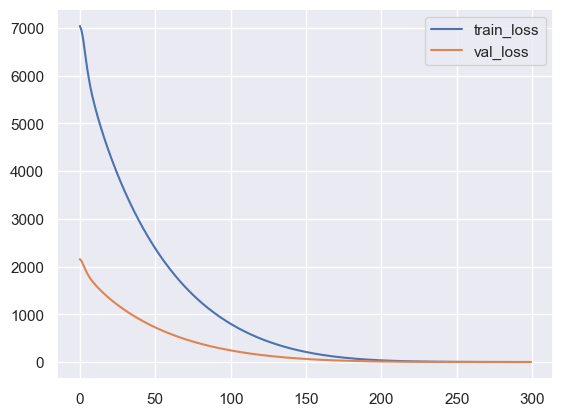

Finished Training
Epoch 1/300


100%|██████████| 7/7 [00:00<00:00, 214.49it/s]


Train Loss: 3714.519287109375


100%|██████████| 2/2 [00:00<00:00, 441.11it/s]


Epoch 2/300


100%|██████████| 7/7 [00:00<00:00, 153.72it/s]


Train Loss: 3345.765869140625


100%|██████████| 2/2 [00:00<00:00, 521.13it/s]


Epoch 3/300


100%|██████████| 7/7 [00:00<00:00, 211.61it/s]


Train Loss: 3003.088897705078


100%|██████████| 2/2 [00:00<00:00, 532.04it/s]


Epoch 4/300


100%|██████████| 7/7 [00:00<00:00, 177.87it/s]


Train Loss: 2704.078094482422


100%|██████████| 2/2 [00:00<00:00, 514.42it/s]


Epoch 5/300


100%|██████████| 7/7 [00:00<00:00, 193.23it/s]


Train Loss: 2427.4282836914062


100%|██████████| 2/2 [00:00<00:00, 443.96it/s]


Epoch 6/300


100%|██████████| 7/7 [00:00<00:00, 191.41it/s]


Train Loss: 2164.4017333984375


100%|██████████| 2/2 [00:00<00:00, 521.49it/s]


Epoch 7/300


100%|██████████| 7/7 [00:00<00:00, 224.60it/s]


Train Loss: 1922.00537109375


100%|██████████| 2/2 [00:00<00:00, 518.55it/s]


Epoch 8/300


100%|██████████| 7/7 [00:00<00:00, 156.42it/s]


Train Loss: 1706.5880432128906


100%|██████████| 2/2 [00:00<00:00, 544.22it/s]


Epoch 9/300


100%|██████████| 7/7 [00:00<00:00, 205.32it/s]


Train Loss: 1514.3978881835938


100%|██████████| 2/2 [00:00<00:00, 439.84it/s]


Epoch 10/300


100%|██████████| 7/7 [00:00<00:00, 198.49it/s]


Train Loss: 1343.4168243408203


100%|██████████| 2/2 [00:00<00:00, 450.44it/s]


Epoch 11/300


100%|██████████| 7/7 [00:00<00:00, 82.32it/s]


Train Loss: 1191.6324157714844


100%|██████████| 2/2 [00:00<00:00, 357.72it/s]


Epoch 12/300


100%|██████████| 7/7 [00:00<00:00, 154.51it/s]


Train Loss: 1056.808609008789


100%|██████████| 2/2 [00:00<00:00, 459.25it/s]


Epoch 13/300


100%|██████████| 7/7 [00:00<00:00, 186.62it/s]


Train Loss: 936.9767532348633


100%|██████████| 2/2 [00:00<00:00, 371.95it/s]


Epoch 14/300


100%|██████████| 7/7 [00:00<00:00, 136.15it/s]


Train Loss: 830.3988800048828


100%|██████████| 2/2 [00:00<00:00, 571.12it/s]


Epoch 15/300


100%|██████████| 7/7 [00:00<00:00, 228.01it/s]


Train Loss: 735.4291152954102


100%|██████████| 2/2 [00:00<00:00, 437.93it/s]


Epoch 16/300


100%|██████████| 7/7 [00:00<00:00, 184.14it/s]


Train Loss: 650.8353500366211


100%|██████████| 2/2 [00:00<00:00, 485.56it/s]


Epoch 17/300


100%|██████████| 7/7 [00:00<00:00, 170.19it/s]


Train Loss: 575.2934188842773


100%|██████████| 2/2 [00:00<00:00, 304.74it/s]


Epoch 18/300


100%|██████████| 7/7 [00:00<00:00, 203.62it/s]


Train Loss: 507.9345397949219


100%|██████████| 2/2 [00:00<00:00, 608.66it/s]


Epoch 19/300


100%|██████████| 7/7 [00:00<00:00, 193.33it/s]


Train Loss: 447.7899856567383


100%|██████████| 2/2 [00:00<00:00, 519.35it/s]


Epoch 20/300


100%|██████████| 7/7 [00:00<00:00, 73.06it/s]


Train Loss: 394.0804138183594


100%|██████████| 2/2 [00:00<00:00, 538.80it/s]


Epoch 21/300


100%|██████████| 7/7 [00:00<00:00, 199.52it/s]


Train Loss: 346.1995849609375


100%|██████████| 2/2 [00:00<00:00, 505.43it/s]


Epoch 22/300


100%|██████████| 7/7 [00:00<00:00, 163.19it/s]


Train Loss: 303.48731231689453


100%|██████████| 2/2 [00:00<00:00, 448.52it/s]


Epoch 23/300


100%|██████████| 7/7 [00:00<00:00, 205.59it/s]


Train Loss: 265.4456672668457


100%|██████████| 2/2 [00:00<00:00, 320.21it/s]


Epoch 24/300


100%|██████████| 7/7 [00:00<00:00, 141.23it/s]


Train Loss: 231.63416290283203


100%|██████████| 2/2 [00:00<00:00, 493.59it/s]


Epoch 25/300


100%|██████████| 7/7 [00:00<00:00, 195.73it/s]


Train Loss: 201.64244651794434


100%|██████████| 2/2 [00:00<00:00, 101.50it/s]


Epoch 26/300


100%|██████████| 7/7 [00:00<00:00, 92.11it/s]


Train Loss: 175.1000862121582


100%|██████████| 2/2 [00:00<00:00, 522.07it/s]


Epoch 27/300


100%|██████████| 7/7 [00:00<00:00, 159.47it/s]


Train Loss: 151.6335391998291


100%|██████████| 2/2 [00:00<00:00, 243.76it/s]


Epoch 28/300


100%|██████████| 7/7 [00:00<00:00, 174.61it/s]


Train Loss: 130.9731960296631


100%|██████████| 2/2 [00:00<00:00, 257.23it/s]


Epoch 29/300


100%|██████████| 7/7 [00:00<00:00, 179.89it/s]


Train Loss: 112.78409481048584


100%|██████████| 2/2 [00:00<00:00, 149.36it/s]


Epoch 30/300


100%|██████████| 7/7 [00:00<00:00, 164.59it/s]


Train Loss: 96.88923645019531


100%|██████████| 2/2 [00:00<00:00, 450.76it/s]


Epoch 31/300


100%|██████████| 7/7 [00:00<00:00, 64.31it/s]


Train Loss: 82.9876070022583


100%|██████████| 2/2 [00:00<00:00, 463.28it/s]


Epoch 32/300


100%|██████████| 7/7 [00:00<00:00, 204.03it/s]


Train Loss: 70.86185646057129


100%|██████████| 2/2 [00:00<00:00, 479.95it/s]


Epoch 33/300


100%|██████████| 7/7 [00:00<00:00, 210.66it/s]


Train Loss: 60.35530662536621


100%|██████████| 2/2 [00:00<00:00, 510.10it/s]


Epoch 34/300


100%|██████████| 7/7 [00:00<00:00, 165.81it/s]


Train Loss: 51.24828767776489


100%|██████████| 2/2 [00:00<00:00, 529.35it/s]


Epoch 35/300


100%|██████████| 7/7 [00:00<00:00, 199.08it/s]


Train Loss: 43.39377498626709


100%|██████████| 2/2 [00:00<00:00, 268.67it/s]


Epoch 36/300


100%|██████████| 7/7 [00:00<00:00, 208.81it/s]


Train Loss: 36.62908172607422


100%|██████████| 2/2 [00:00<00:00, 543.34it/s]


Epoch 37/300


100%|██████████| 7/7 [00:00<00:00, 218.92it/s]


Train Loss: 30.83604860305786


100%|██████████| 2/2 [00:00<00:00, 462.23it/s]


Epoch 38/300


100%|██████████| 7/7 [00:00<00:00, 168.73it/s]


Train Loss: 25.878212451934814


100%|██████████| 2/2 [00:00<00:00, 312.45it/s]


Epoch 39/300


100%|██████████| 7/7 [00:00<00:00, 179.93it/s]


Train Loss: 21.656951189041138


100%|██████████| 2/2 [00:00<00:00, 367.18it/s]


Epoch 40/300


100%|██████████| 7/7 [00:00<00:00, 182.54it/s]


Train Loss: 18.067917823791504


100%|██████████| 2/2 [00:00<00:00, 455.26it/s]


Epoch 41/300


100%|██████████| 7/7 [00:00<00:00, 197.83it/s]


Train Loss: 15.023129343986511


100%|██████████| 2/2 [00:00<00:00, 568.99it/s]


Epoch 42/300


100%|██████████| 7/7 [00:00<00:00, 208.61it/s]


Train Loss: 12.46323537826538


100%|██████████| 2/2 [00:00<00:00, 534.03it/s]


Epoch 43/300


100%|██████████| 7/7 [00:00<00:00, 193.18it/s]


Train Loss: 10.312512755393982


100%|██████████| 2/2 [00:00<00:00, 265.46it/s]


Epoch 44/300


100%|██████████| 7/7 [00:00<00:00, 201.68it/s]


Train Loss: 8.49546205997467


100%|██████████| 2/2 [00:00<00:00, 542.92it/s]


Epoch 45/300


100%|██████████| 7/7 [00:00<00:00, 226.83it/s]


Train Loss: 6.988829016685486


100%|██████████| 2/2 [00:00<00:00, 483.88it/s]


Epoch 46/300


100%|██████████| 7/7 [00:00<00:00, 189.57it/s]


Train Loss: 5.727976083755493


100%|██████████| 2/2 [00:00<00:00, 352.92it/s]


Epoch 47/300


100%|██████████| 7/7 [00:00<00:00, 196.87it/s]


Train Loss: 4.689679145812988


100%|██████████| 2/2 [00:00<00:00, 536.80it/s]


Epoch 48/300


100%|██████████| 7/7 [00:00<00:00, 196.45it/s]


Train Loss: 3.8220096230506897


100%|██████████| 2/2 [00:00<00:00, 45.85it/s]


Epoch 49/300


100%|██████████| 7/7 [00:00<00:00, 138.53it/s]


Train Loss: 3.1065904796123505


100%|██████████| 2/2 [00:00<00:00, 317.15it/s]


Epoch 50/300


100%|██████████| 7/7 [00:00<00:00, 155.58it/s]


Train Loss: 2.520050674676895


100%|██████████| 2/2 [00:00<00:00, 505.31it/s]


Epoch 51/300


100%|██████████| 7/7 [00:00<00:00, 212.77it/s]


Train Loss: 2.039205014705658


100%|██████████| 2/2 [00:00<00:00, 552.79it/s]


Epoch 52/300


100%|██████████| 7/7 [00:00<00:00, 60.09it/s]


Train Loss: 1.6420608460903168


100%|██████████| 2/2 [00:00<00:00, 462.51it/s]


Epoch 53/300


100%|██████████| 7/7 [00:00<00:00, 226.14it/s]


Train Loss: 1.3225983828306198


100%|██████████| 2/2 [00:00<00:00, 548.42it/s]


Epoch 54/300


100%|██████████| 7/7 [00:00<00:00, 215.21it/s]


Train Loss: 1.0669372826814651


100%|██████████| 2/2 [00:00<00:00, 467.62it/s]


Epoch 55/300


100%|██████████| 7/7 [00:00<00:00, 218.03it/s]


Train Loss: 0.8566586673259735


100%|██████████| 2/2 [00:00<00:00, 558.35it/s]


Epoch 56/300


100%|██████████| 7/7 [00:00<00:00, 224.31it/s]


Train Loss: 0.6817079335451126


100%|██████████| 2/2 [00:00<00:00, 55.69it/s]


Epoch 57/300


100%|██████████| 7/7 [00:00<00:00, 187.43it/s]


Train Loss: 0.5448688417673111


100%|██████████| 2/2 [00:00<00:00, 435.07it/s]


Epoch 58/300


100%|██████████| 7/7 [00:00<00:00, 221.98it/s]


Train Loss: 0.4377790652215481


100%|██████████| 2/2 [00:00<00:00, 567.53it/s]


Epoch 59/300


100%|██████████| 7/7 [00:00<00:00, 197.94it/s]


Train Loss: 0.34917744621634483


100%|██████████| 2/2 [00:00<00:00, 356.19it/s]


Epoch 60/300


100%|██████████| 7/7 [00:00<00:00, 220.54it/s]


Train Loss: 0.27892209962010384


100%|██████████| 2/2 [00:00<00:00, 472.81it/s]


Epoch 61/300


100%|██████████| 7/7 [00:00<00:00, 158.52it/s]


Train Loss: 0.22235160879790783


100%|██████████| 2/2 [00:00<00:00, 553.74it/s]


Epoch 62/300


100%|██████████| 7/7 [00:00<00:00, 246.25it/s]


Train Loss: 0.18189102970063686


100%|██████████| 2/2 [00:00<00:00, 590.33it/s]


Epoch 63/300


100%|██████████| 7/7 [00:00<00:00, 256.63it/s]


Train Loss: 0.14449376612901688


100%|██████████| 2/2 [00:00<00:00, 604.24it/s]


Epoch 64/300


100%|██████████| 7/7 [00:00<00:00, 238.88it/s]


Train Loss: 0.11787190288305283


100%|██████████| 2/2 [00:00<00:00, 599.14it/s]


Epoch 65/300


100%|██████████| 7/7 [00:00<00:00, 75.59it/s]


Train Loss: 0.0951953399926424


100%|██████████| 2/2 [00:00<00:00, 133.45it/s]


Epoch 66/300


100%|██████████| 7/7 [00:00<00:00, 234.82it/s]


Train Loss: 0.08468957897275686


100%|██████████| 2/2 [00:00<00:00, 532.20it/s]


Epoch 67/300


100%|██████████| 7/7 [00:00<00:00, 243.71it/s]


Train Loss: 0.06858430383726954


100%|██████████| 2/2 [00:00<00:00, 597.18it/s]


Epoch 68/300


100%|██████████| 7/7 [00:00<00:00, 254.96it/s]


Train Loss: 0.056738720275461674


100%|██████████| 2/2 [00:00<00:00, 634.06it/s]


Epoch 69/300


100%|██████████| 7/7 [00:00<00:00, 229.96it/s]


Train Loss: 0.048438248224556446


100%|██████████| 2/2 [00:00<00:00, 565.77it/s]


Epoch 70/300


100%|██████████| 7/7 [00:00<00:00, 166.85it/s]


Train Loss: 0.042458205949515104


100%|██████████| 2/2 [00:00<00:00, 262.64it/s]


Epoch 71/300


100%|██████████| 7/7 [00:00<00:00, 216.80it/s]


Train Loss: 0.03755486314184964


100%|██████████| 2/2 [00:00<00:00, 590.29it/s]


Epoch 72/300


100%|██████████| 7/7 [00:00<00:00, 51.05it/s]


Train Loss: 0.036421071738004684


100%|██████████| 2/2 [00:00<00:00, 289.72it/s]


Epoch 73/300


100%|██████████| 7/7 [00:00<00:00, 181.39it/s]


Train Loss: 0.031840695068240166


100%|██████████| 2/2 [00:00<00:00, 549.75it/s]


Epoch 74/300


100%|██████████| 7/7 [00:00<00:00, 230.60it/s]


Train Loss: 0.03276673657819629


100%|██████████| 2/2 [00:00<00:00, 484.36it/s]


Epoch 75/300


100%|██████████| 7/7 [00:00<00:00, 233.75it/s]


Train Loss: 0.02855679183267057


100%|██████████| 2/2 [00:00<00:00, 603.54it/s]


Epoch 76/300


100%|██████████| 7/7 [00:00<00:00, 240.48it/s]


Train Loss: 0.031136629171669483


100%|██████████| 2/2 [00:00<00:00, 536.18it/s]


Epoch 77/300


100%|██████████| 7/7 [00:00<00:00, 214.53it/s]


Train Loss: 0.026298995479010046


100%|██████████| 2/2 [00:00<00:00, 217.74it/s]


Epoch 78/300


100%|██████████| 7/7 [00:00<00:00, 141.93it/s]


Train Loss: 0.02891035459470004


100%|██████████| 2/2 [00:00<00:00, 453.51it/s]


Epoch 79/300


100%|██████████| 7/7 [00:00<00:00, 240.13it/s]


Train Loss: 0.026447213487699628


100%|██████████| 2/2 [00:00<00:00, 606.81it/s]


Epoch 80/300


100%|██████████| 7/7 [00:00<00:00, 179.41it/s]


Train Loss: 0.024798134341835976


100%|██████████| 2/2 [00:00<00:00, 461.78it/s]


Epoch 81/300


100%|██████████| 7/7 [00:00<00:00, 119.56it/s]


Train Loss: 0.02664785902015865


100%|██████████| 2/2 [00:00<00:00, 288.65it/s]


Epoch 82/300


100%|██████████| 7/7 [00:00<00:00, 153.75it/s]


Train Loss: 0.024222931475378573


100%|██████████| 2/2 [00:00<00:00, 558.05it/s]


Epoch 83/300


100%|██████████| 7/7 [00:00<00:00, 195.11it/s]


Train Loss: 0.028676261892542243


100%|██████████| 2/2 [00:00<00:00, 338.81it/s]


Epoch 84/300


100%|██████████| 7/7 [00:00<00:00, 190.88it/s]


Train Loss: 0.026423962553963065


100%|██████████| 2/2 [00:00<00:00, 580.21it/s]


Epoch 85/300


100%|██████████| 7/7 [00:00<00:00, 216.28it/s]


Train Loss: 0.02544920879881829


100%|██████████| 2/2 [00:00<00:00, 558.05it/s]


Epoch 86/300


100%|██████████| 7/7 [00:00<00:00, 233.24it/s]


Train Loss: 0.028504010988399386


100%|██████████| 2/2 [00:00<00:00, 539.18it/s]


Epoch 87/300


100%|██████████| 7/7 [00:00<00:00, 216.68it/s]


Train Loss: 0.02598601847421378


100%|██████████| 2/2 [00:00<00:00, 561.98it/s]


Epoch 88/300


100%|██████████| 7/7 [00:00<00:00, 196.14it/s]


Train Loss: 0.025045911548659205


100%|██████████| 2/2 [00:00<00:00, 552.94it/s]


Epoch 89/300


100%|██████████| 7/7 [00:00<00:00, 224.55it/s]


Train Loss: 0.02554626448545605


100%|██████████| 2/2 [00:00<00:00, 624.25it/s]


Epoch 90/300


100%|██████████| 7/7 [00:00<00:00, 216.88it/s]


Train Loss: 0.023679776350036263


100%|██████████| 2/2 [00:00<00:00, 575.39it/s]


Epoch 91/300


100%|██████████| 7/7 [00:00<00:00, 146.44it/s]


Train Loss: 0.023996901232749224


100%|██████████| 2/2 [00:00<00:00, 496.25it/s]


Epoch 92/300


100%|██████████| 7/7 [00:00<00:00, 224.92it/s]


Train Loss: 0.028406927711330354


100%|██████████| 2/2 [00:00<00:00, 538.39it/s]


Epoch 93/300


100%|██████████| 7/7 [00:00<00:00, 181.14it/s]


Train Loss: 0.024410158395767212


100%|██████████| 2/2 [00:00<00:00, 381.34it/s]


Epoch 94/300


100%|██████████| 7/7 [00:00<00:00, 161.57it/s]


Train Loss: 0.025584943359717727


100%|██████████| 2/2 [00:00<00:00, 338.59it/s]


Epoch 95/300


100%|██████████| 7/7 [00:00<00:00, 150.37it/s]


Train Loss: 0.024057743954472244


100%|██████████| 2/2 [00:00<00:00, 585.18it/s]


Epoch 96/300


100%|██████████| 7/7 [00:00<00:00, 223.45it/s]


Train Loss: 0.026400802889838815


100%|██████████| 2/2 [00:00<00:00, 569.80it/s]


Epoch 97/300


100%|██████████| 7/7 [00:00<00:00, 221.70it/s]


Train Loss: 0.02504150557797402


100%|██████████| 2/2 [00:00<00:00, 535.77it/s]


Epoch 98/300


100%|██████████| 7/7 [00:00<00:00, 231.22it/s]


Train Loss: 0.024330356158316135


100%|██████████| 2/2 [00:00<00:00, 537.04it/s]


Epoch 99/300


100%|██████████| 7/7 [00:00<00:00, 221.87it/s]


Train Loss: 0.023950230213813484


100%|██████████| 2/2 [00:00<00:00, 567.53it/s]


Epoch 100/300


100%|██████████| 7/7 [00:00<00:00, 224.78it/s]


Train Loss: 0.028477645595557988


100%|██████████| 2/2 [00:00<00:00, 567.22it/s]


Epoch 101/300


100%|██████████| 7/7 [00:00<00:00, 203.54it/s]


Train Loss: 0.02654716558754444


100%|██████████| 2/2 [00:00<00:00, 493.83it/s]


Epoch 102/300


100%|██████████| 7/7 [00:00<00:00, 198.45it/s]


Train Loss: 0.028047913685441017


100%|██████████| 2/2 [00:00<00:00, 479.49it/s]


Epoch 103/300


100%|██████████| 7/7 [00:00<00:00, 190.70it/s]


Train Loss: 0.02406663866713643


100%|██████████| 2/2 [00:00<00:00, 420.19it/s]


Epoch 104/300


100%|██████████| 7/7 [00:00<00:00, 244.41it/s]


Train Loss: 0.027283134462777525


100%|██████████| 2/2 [00:00<00:00, 526.82it/s]


Epoch 105/300


100%|██████████| 7/7 [00:00<00:00, 233.14it/s]


Train Loss: 0.02486632135696709


100%|██████████| 2/2 [00:00<00:00, 591.87it/s]


Epoch 106/300


100%|██████████| 7/7 [00:00<00:00, 228.57it/s]


Train Loss: 0.024080458912067115


100%|██████████| 2/2 [00:00<00:00, 440.56it/s]


Epoch 107/300


100%|██████████| 7/7 [00:00<00:00, 222.64it/s]


Train Loss: 0.02401032717898488


100%|██████████| 2/2 [00:00<00:00, 551.88it/s]


Epoch 108/300


100%|██████████| 7/7 [00:00<00:00, 226.46it/s]


Train Loss: 0.023625997826457024


100%|██████████| 2/2 [00:00<00:00, 453.22it/s]


Epoch 109/300


100%|██████████| 7/7 [00:00<00:00, 210.78it/s]


Train Loss: 0.023697534925304353


100%|██████████| 2/2 [00:00<00:00, 422.83it/s]


Epoch 110/300


100%|██████████| 7/7 [00:00<00:00, 157.47it/s]


Train Loss: 0.02293973497580737


100%|██████████| 2/2 [00:00<00:00, 79.47it/s]


Epoch 111/300


100%|██████████| 7/7 [00:00<00:00, 116.10it/s]


Train Loss: 0.024320431286469102


100%|██████████| 2/2 [00:00<00:00, 299.89it/s]


Epoch 112/300


100%|██████████| 7/7 [00:00<00:00, 235.93it/s]


Train Loss: 0.024008748354390264


100%|██████████| 2/2 [00:00<00:00, 554.18it/s]


Epoch 113/300


100%|██████████| 7/7 [00:00<00:00, 205.36it/s]


Train Loss: 0.028069650987163186


100%|██████████| 2/2 [00:00<00:00, 344.06it/s]


Epoch 114/300


100%|██████████| 7/7 [00:00<00:00, 142.35it/s]


Train Loss: 0.025925973895937204


100%|██████████| 2/2 [00:00<00:00, 468.61it/s]


Epoch 115/300


100%|██████████| 7/7 [00:00<00:00, 195.05it/s]


Train Loss: 0.026503096451051533


100%|██████████| 2/2 [00:00<00:00, 252.78it/s]


Epoch 116/300


100%|██████████| 7/7 [00:00<00:00, 228.26it/s]


Train Loss: 0.024517290643416345


100%|██████████| 2/2 [00:00<00:00, 542.43it/s]


Epoch 117/300


100%|██████████| 7/7 [00:00<00:00, 247.60it/s]


Train Loss: 0.02756921760737896


100%|██████████| 2/2 [00:00<00:00, 539.81it/s]


Epoch 118/300


100%|██████████| 7/7 [00:00<00:00, 229.22it/s]


Train Loss: 0.026341897319070995


100%|██████████| 2/2 [00:00<00:00, 476.08it/s]


Epoch 119/300


100%|██████████| 7/7 [00:00<00:00, 76.07it/s]


Train Loss: 0.024516360484994948


100%|██████████| 2/2 [00:00<00:00, 346.57it/s]


Epoch 120/300


100%|██████████| 7/7 [00:00<00:00, 183.09it/s]


Train Loss: 0.02941467857453972


100%|██████████| 2/2 [00:00<00:00, 546.45it/s]


Epoch 121/300


100%|██████████| 7/7 [00:00<00:00, 74.01it/s]


Train Loss: 0.023900459171272814


100%|██████████| 2/2 [00:00<00:00, 110.25it/s]


Epoch 122/300


100%|██████████| 7/7 [00:00<00:00, 178.57it/s]


Train Loss: 0.02327512181364


100%|██████████| 2/2 [00:00<00:00, 343.47it/s]


Epoch 123/300


100%|██████████| 7/7 [00:00<00:00, 214.78it/s]


Train Loss: 0.023342373431660235


100%|██████████| 2/2 [00:00<00:00, 497.75it/s]


Epoch 124/300


100%|██████████| 7/7 [00:00<00:00, 229.79it/s]


Train Loss: 0.023529706639237702


100%|██████████| 2/2 [00:00<00:00, 552.65it/s]


Epoch 125/300


100%|██████████| 7/7 [00:00<00:00, 256.62it/s]


Train Loss: 0.023987562861293554


100%|██████████| 2/2 [00:00<00:00, 544.54it/s]


Epoch 126/300


100%|██████████| 7/7 [00:00<00:00, 231.56it/s]


Train Loss: 0.02439563418738544


100%|██████████| 2/2 [00:00<00:00, 557.57it/s]


Epoch 127/300


100%|██████████| 7/7 [00:00<00:00, 256.46it/s]


Train Loss: 0.02680189092643559


100%|██████████| 2/2 [00:00<00:00, 562.77it/s]


Epoch 128/300


100%|██████████| 7/7 [00:00<00:00, 236.03it/s]


Train Loss: 0.0256487779552117


100%|██████████| 2/2 [00:00<00:00, 519.77it/s]


Epoch 129/300


100%|██████████| 7/7 [00:00<00:00, 187.97it/s]


Train Loss: 0.027428837842307985


100%|██████████| 2/2 [00:00<00:00, 435.07it/s]


Epoch 130/300


100%|██████████| 7/7 [00:00<00:00, 241.84it/s]


Train Loss: 0.029556710622273386


100%|██████████| 2/2 [00:00<00:00, 545.71it/s]


Epoch 131/300


100%|██████████| 7/7 [00:00<00:00, 115.59it/s]


Train Loss: 0.028012591181322932


100%|██████████| 2/2 [00:00<00:00, 481.69it/s]


Epoch 132/300


100%|██████████| 7/7 [00:00<00:00, 179.05it/s]


Train Loss: 0.026834180462174118


100%|██████████| 2/2 [00:00<00:00, 544.86it/s]


Epoch 133/300


100%|██████████| 7/7 [00:00<00:00, 199.54it/s]


Train Loss: 0.02887734235264361


100%|██████████| 2/2 [00:00<00:00, 461.57it/s]


Epoch 134/300


100%|██████████| 7/7 [00:00<00:00, 177.07it/s]


Train Loss: 0.027151503134518862


100%|██████████| 2/2 [00:00<00:00, 487.91it/s]


Epoch 135/300


100%|██████████| 7/7 [00:00<00:00, 163.62it/s]


Train Loss: 0.02588919224217534


100%|██████████| 2/2 [00:00<00:00, 511.00it/s]


Epoch 136/300


100%|██████████| 7/7 [00:00<00:00, 147.08it/s]


Train Loss: 0.0261911106063053


100%|██████████| 2/2 [00:00<00:00, 537.49it/s]


Epoch 137/300


100%|██████████| 7/7 [00:00<00:00, 245.35it/s]


Train Loss: 0.025110026239417493


100%|██████████| 2/2 [00:00<00:00, 509.91it/s]


Epoch 138/300


100%|██████████| 7/7 [00:00<00:00, 252.06it/s]


Train Loss: 0.026941425167024136


100%|██████████| 2/2 [00:00<00:00, 529.92it/s]


Epoch 139/300


100%|██████████| 7/7 [00:00<00:00, 235.80it/s]


Train Loss: 0.02938308089505881


100%|██████████| 2/2 [00:00<00:00, 557.79it/s]


Epoch 140/300


100%|██████████| 7/7 [00:00<00:00, 243.82it/s]


Train Loss: 0.026967238052748144


100%|██████████| 2/2 [00:00<00:00, 320.25it/s]


Epoch 141/300


100%|██████████| 7/7 [00:00<00:00, 157.52it/s]


Train Loss: 0.028858903562650084


100%|██████████| 2/2 [00:00<00:00, 470.71it/s]


Epoch 142/300


100%|██████████| 7/7 [00:00<00:00, 248.93it/s]


Train Loss: 0.02701678324956447


100%|██████████| 2/2 [00:00<00:00, 474.60it/s]


Epoch 143/300


100%|██████████| 7/7 [00:00<00:00, 176.88it/s]


Train Loss: 0.02412558696232736


100%|██████████| 2/2 [00:00<00:00, 407.85it/s]


Epoch 144/300


100%|██████████| 7/7 [00:00<00:00, 84.89it/s]


Train Loss: 0.025012189173139632


100%|██████████| 2/2 [00:00<00:00, 448.95it/s]


Epoch 145/300


100%|██████████| 7/7 [00:00<00:00, 194.81it/s]


Train Loss: 0.02403662446886301


100%|██████████| 2/2 [00:00<00:00, 562.73it/s]


Epoch 146/300


100%|██████████| 7/7 [00:00<00:00, 235.86it/s]


Train Loss: 0.02578826865646988


100%|██████████| 2/2 [00:00<00:00, 474.95it/s]


Epoch 147/300


100%|██████████| 7/7 [00:00<00:00, 225.99it/s]


Train Loss: 0.025968354428187013


100%|██████████| 2/2 [00:00<00:00, 512.56it/s]


Epoch 148/300


100%|██████████| 7/7 [00:00<00:00, 219.34it/s]


Train Loss: 0.025367516092956066


100%|██████████| 2/2 [00:00<00:00, 598.46it/s]


Epoch 149/300


100%|██████████| 7/7 [00:00<00:00, 244.94it/s]


Train Loss: 0.024488785187713802


100%|██████████| 2/2 [00:00<00:00, 545.99it/s]


Epoch 150/300


100%|██████████| 7/7 [00:00<00:00, 229.39it/s]


Train Loss: 0.02622052130755037


100%|██████████| 2/2 [00:00<00:00, 615.59it/s]


Epoch 151/300


100%|██████████| 7/7 [00:00<00:00, 239.86it/s]


Train Loss: 0.022763879387639463


100%|██████████| 2/2 [00:00<00:00, 442.55it/s]


Epoch 152/300


100%|██████████| 7/7 [00:00<00:00, 203.81it/s]


Train Loss: 0.022454678604844958


100%|██████████| 2/2 [00:00<00:00, 565.42it/s]


Epoch 153/300


100%|██████████| 7/7 [00:00<00:00, 229.80it/s]


Train Loss: 0.02345148765016347


100%|██████████| 2/2 [00:00<00:00, 591.54it/s]


Epoch 154/300


100%|██████████| 7/7 [00:00<00:00, 217.57it/s]


Train Loss: 0.024280036217533052


100%|██████████| 2/2 [00:00<00:00, 488.65it/s]


Epoch 155/300


100%|██████████| 7/7 [00:00<00:00, 231.50it/s]


Train Loss: 0.02411100349854678


100%|██████████| 2/2 [00:00<00:00, 443.09it/s]


Epoch 156/300


100%|██████████| 7/7 [00:00<00:00, 176.94it/s]


Train Loss: 0.024736882420256734


100%|██████████| 2/2 [00:00<00:00, 218.72it/s]


Epoch 157/300


100%|██████████| 7/7 [00:00<00:00, 167.93it/s]


Train Loss: 0.02544366684742272


100%|██████████| 2/2 [00:00<00:00, 405.25it/s]


Epoch 158/300


100%|██████████| 7/7 [00:00<00:00, 164.37it/s]


Train Loss: 0.028291589464060962


100%|██████████| 2/2 [00:00<00:00, 449.14it/s]


Epoch 159/300


100%|██████████| 7/7 [00:00<00:00, 68.00it/s]


Train Loss: 0.022414799022953957


100%|██████████| 2/2 [00:00<00:00, 116.97it/s]


Epoch 160/300


100%|██████████| 7/7 [00:00<00:00, 137.80it/s]


Train Loss: 0.023024201509542763


100%|██████████| 2/2 [00:00<00:00, 584.29it/s]


Epoch 161/300


100%|██████████| 7/7 [00:00<00:00, 192.52it/s]


Train Loss: 0.027072653407230973


100%|██████████| 2/2 [00:00<00:00, 457.02it/s]


Epoch 162/300


100%|██████████| 7/7 [00:00<00:00, 115.46it/s]


Train Loss: 0.024274203227832913


100%|██████████| 2/2 [00:00<00:00, 514.39it/s]


Epoch 163/300


100%|██████████| 7/7 [00:00<00:00, 250.94it/s]


Train Loss: 0.0275153472321108


100%|██████████| 2/2 [00:00<00:00, 518.68it/s]


Epoch 164/300


100%|██████████| 7/7 [00:00<00:00, 225.31it/s]


Train Loss: 0.025075403042137623


100%|██████████| 2/2 [00:00<00:00, 549.78it/s]


Epoch 165/300


100%|██████████| 7/7 [00:00<00:00, 193.18it/s]


Train Loss: 0.025845116819255054


100%|██████████| 2/2 [00:00<00:00, 574.56it/s]


Epoch 166/300


100%|██████████| 7/7 [00:00<00:00, 235.44it/s]


Train Loss: 0.025195664959028363


100%|██████████| 2/2 [00:00<00:00, 593.80it/s]


Epoch 167/300


100%|██████████| 7/7 [00:00<00:00, 204.86it/s]


Train Loss: 0.026369746192358434


100%|██████████| 2/2 [00:00<00:00, 628.93it/s]


Epoch 168/300


100%|██████████| 7/7 [00:00<00:00, 223.36it/s]


Train Loss: 0.02640530071221292


100%|██████████| 2/2 [00:00<00:00, 593.51it/s]


Epoch 169/300


100%|██████████| 7/7 [00:00<00:00, 213.61it/s]


Train Loss: 0.025132187642157078


100%|██████████| 2/2 [00:00<00:00, 554.47it/s]


Epoch 170/300


100%|██████████| 7/7 [00:00<00:00, 211.58it/s]


Train Loss: 0.028130815480835736


100%|██████████| 2/2 [00:00<00:00, 453.73it/s]


Epoch 171/300


100%|██████████| 7/7 [00:00<00:00, 232.12it/s]


Train Loss: 0.026355765527114272


100%|██████████| 2/2 [00:00<00:00, 500.63it/s]


Epoch 172/300


100%|██████████| 7/7 [00:00<00:00, 208.85it/s]


Train Loss: 0.032583269756287336


100%|██████████| 2/2 [00:00<00:00, 561.15it/s]


Epoch 173/300


100%|██████████| 7/7 [00:00<00:00, 230.23it/s]


Train Loss: 0.026309078326448798


100%|██████████| 2/2 [00:00<00:00, 324.08it/s]


Epoch 174/300


100%|██████████| 7/7 [00:00<00:00, 213.98it/s]


Train Loss: 0.031573088257573545


100%|██████████| 2/2 [00:00<00:00, 577.65it/s]


Epoch 175/300


100%|██████████| 7/7 [00:00<00:00, 232.01it/s]


Train Loss: 0.03004461550153792


100%|██████████| 2/2 [00:00<00:00, 547.92it/s]


Epoch 176/300


100%|██████████| 7/7 [00:00<00:00, 225.86it/s]


Train Loss: 0.02601638389751315


100%|██████████| 2/2 [00:00<00:00, 616.13it/s]


Epoch 177/300


100%|██████████| 7/7 [00:00<00:00, 239.14it/s]


Train Loss: 0.02423403412103653


100%|██████████| 2/2 [00:00<00:00, 553.23it/s]


Epoch 178/300


100%|██████████| 7/7 [00:00<00:00, 225.04it/s]


Train Loss: 0.02746868785470724


100%|██████████| 2/2 [00:00<00:00, 569.30it/s]


Epoch 179/300


100%|██████████| 7/7 [00:00<00:00, 229.07it/s]


Train Loss: 0.02558205637615174


100%|██████████| 2/2 [00:00<00:00, 471.93it/s]


Epoch 180/300


100%|██████████| 7/7 [00:00<00:00, 200.73it/s]


Train Loss: 0.026168130920268595


100%|██████████| 2/2 [00:00<00:00, 258.00it/s]


Epoch 181/300


100%|██████████| 7/7 [00:00<00:00, 218.72it/s]


Train Loss: 0.026715178624726832


100%|██████████| 2/2 [00:00<00:00, 568.53it/s]


Epoch 182/300


100%|██████████| 7/7 [00:00<00:00, 148.09it/s]


Train Loss: 0.023136094270739704


100%|██████████| 2/2 [00:00<00:00, 572.56it/s]


Epoch 183/300


100%|██████████| 7/7 [00:00<00:00, 233.40it/s]


Train Loss: 0.0241289105033502


100%|██████████| 2/2 [00:00<00:00, 597.18it/s]


Epoch 184/300


100%|██████████| 7/7 [00:00<00:00, 233.05it/s]


Train Loss: 0.023372059455141425


100%|██████████| 2/2 [00:00<00:00, 585.84it/s]


Epoch 185/300


100%|██████████| 7/7 [00:00<00:00, 222.51it/s]


Train Loss: 0.023615517769940197


100%|██████████| 2/2 [00:00<00:00, 556.35it/s]


Epoch 186/300


100%|██████████| 7/7 [00:00<00:00, 231.81it/s]


Train Loss: 0.02589950046967715


100%|██████████| 2/2 [00:00<00:00, 398.58it/s]


Epoch 187/300


100%|██████████| 7/7 [00:00<00:00, 225.87it/s]


Train Loss: 0.028504260233603418


100%|██████████| 2/2 [00:00<00:00, 568.49it/s]


Epoch 188/300


100%|██████████| 7/7 [00:00<00:00, 220.70it/s]


Train Loss: 0.023296532221138477


100%|██████████| 2/2 [00:00<00:00, 611.59it/s]


Epoch 189/300


100%|██████████| 7/7 [00:00<00:00, 239.96it/s]


Train Loss: 0.023061839397996664


100%|██████████| 2/2 [00:00<00:00, 226.38it/s]


Epoch 190/300


100%|██████████| 7/7 [00:00<00:00, 237.02it/s]


Train Loss: 0.023407598375342786


100%|██████████| 2/2 [00:00<00:00, 556.64it/s]


Epoch 191/300


100%|██████████| 7/7 [00:00<00:00, 200.73it/s]


Train Loss: 0.026845472515560687


100%|██████████| 2/2 [00:00<00:00, 558.01it/s]


Epoch 192/300


100%|██████████| 7/7 [00:00<00:00, 217.17it/s]


Train Loss: 0.02694231062196195


100%|██████████| 2/2 [00:00<00:00, 82.52it/s]


Epoch 193/300


100%|██████████| 7/7 [00:00<00:00, 106.05it/s]


Train Loss: 0.027614400954917073


100%|██████████| 2/2 [00:00<00:00, 356.01it/s]


Epoch 194/300


100%|██████████| 7/7 [00:00<00:00, 196.17it/s]


Train Loss: 0.02625298802740872


100%|██████████| 2/2 [00:00<00:00, 375.38it/s]


Epoch 195/300


100%|██████████| 7/7 [00:00<00:00, 159.63it/s]


Train Loss: 0.024196220911107957


100%|██████████| 2/2 [00:00<00:00, 475.06it/s]


Epoch 196/300


100%|██████████| 7/7 [00:00<00:00, 60.13it/s]


Train Loss: 0.026642214856110513


100%|██████████| 2/2 [00:00<00:00, 441.02it/s]


Epoch 197/300


100%|██████████| 7/7 [00:00<00:00, 228.37it/s]


Train Loss: 0.02923393005039543


100%|██████████| 2/2 [00:00<00:00, 558.05it/s]


Epoch 198/300


100%|██████████| 7/7 [00:00<00:00, 198.94it/s]


Train Loss: 0.030467363772913814


100%|██████████| 2/2 [00:00<00:00, 606.24it/s]


Epoch 199/300


100%|██████████| 7/7 [00:00<00:00, 183.14it/s]


Train Loss: 0.032784115290269256


100%|██████████| 2/2 [00:00<00:00, 234.42it/s]


Epoch 200/300


100%|██████████| 7/7 [00:00<00:00, 157.28it/s]


Train Loss: 0.029067766154184937


100%|██████████| 2/2 [00:00<00:00, 545.99it/s]


Epoch 201/300


100%|██████████| 7/7 [00:00<00:00, 211.30it/s]


Train Loss: 0.02675078681204468


100%|██████████| 2/2 [00:00<00:00, 536.60it/s]


Epoch 202/300


100%|██████████| 7/7 [00:00<00:00, 241.33it/s]


Train Loss: 0.025419470388442278


100%|██████████| 2/2 [00:00<00:00, 551.74it/s]


Epoch 203/300


100%|██████████| 7/7 [00:00<00:00, 229.61it/s]


Train Loss: 0.025501088821329176


100%|██████████| 2/2 [00:00<00:00, 490.42it/s]


Epoch 204/300


100%|██████████| 7/7 [00:00<00:00, 225.25it/s]

Train Loss: 0.027381139807403088



100%|██████████| 2/2 [00:00<00:00, 576.50it/s]


Epoch 205/300


100%|██████████| 7/7 [00:00<00:00, 244.26it/s]


Train Loss: 0.02537009702064097


100%|██████████| 2/2 [00:00<00:00, 610.66it/s]


Epoch 206/300


100%|██████████| 7/7 [00:00<00:00, 241.19it/s]


Train Loss: 0.026528875692747533


100%|██████████| 2/2 [00:00<00:00, 313.52it/s]


Epoch 207/300


100%|██████████| 7/7 [00:00<00:00, 176.76it/s]


Train Loss: 0.027872381266206503


100%|██████████| 2/2 [00:00<00:00, 145.01it/s]


Epoch 208/300


100%|██████████| 7/7 [00:00<00:00, 213.60it/s]


Train Loss: 0.02697941067162901


100%|██████████| 2/2 [00:00<00:00, 507.78it/s]


Epoch 209/300


100%|██████████| 7/7 [00:00<00:00, 75.12it/s]


Train Loss: 0.026802987908013165


100%|██████████| 2/2 [00:00<00:00, 314.12it/s]


Epoch 210/300


100%|██████████| 7/7 [00:00<00:00, 192.01it/s]


Train Loss: 0.025548632140271366


100%|██████████| 2/2 [00:00<00:00, 458.69it/s]


Epoch 211/300


100%|██████████| 7/7 [00:00<00:00, 167.87it/s]


Train Loss: 0.025425375206395984


100%|██████████| 2/2 [00:00<00:00, 609.02it/s]


Epoch 212/300


100%|██████████| 7/7 [00:00<00:00, 240.07it/s]


Train Loss: 0.02473575627664104


100%|██████████| 2/2 [00:00<00:00, 479.73it/s]


Epoch 213/300


100%|██████████| 7/7 [00:00<00:00, 231.63it/s]


Train Loss: 0.023527722689323127


100%|██████████| 2/2 [00:00<00:00, 514.01it/s]


Epoch 214/300


100%|██████████| 7/7 [00:00<00:00, 69.93it/s]


Train Loss: 0.025186840211972594


100%|██████████| 2/2 [00:00<00:00, 419.12it/s]


Epoch 215/300


100%|██████████| 7/7 [00:00<00:00, 174.61it/s]


Train Loss: 0.02635798801202327


100%|██████████| 2/2 [00:00<00:00, 339.39it/s]


Epoch 216/300


100%|██████████| 7/7 [00:00<00:00, 241.12it/s]


Train Loss: 0.030757186585105956


100%|██████████| 2/2 [00:00<00:00, 627.37it/s]


Epoch 217/300


100%|██████████| 7/7 [00:00<00:00, 239.41it/s]


Train Loss: 0.0284448602469638


100%|██████████| 2/2 [00:00<00:00, 613.70it/s]


Epoch 218/300


100%|██████████| 7/7 [00:00<00:00, 220.49it/s]


Train Loss: 0.026535030570812523


100%|██████████| 2/2 [00:00<00:00, 574.37it/s]


Epoch 219/300


100%|██████████| 7/7 [00:00<00:00, 240.84it/s]


Train Loss: 0.028490641620010138


100%|██████████| 2/2 [00:00<00:00, 604.76it/s]


Epoch 220/300


100%|██████████| 7/7 [00:00<00:00, 248.49it/s]


Train Loss: 0.023898669984191656


100%|██████████| 2/2 [00:00<00:00, 572.09it/s]


Epoch 221/300


100%|██████████| 7/7 [00:00<00:00, 220.06it/s]


Train Loss: 0.024036810267716646


100%|██████████| 2/2 [00:00<00:00, 487.91it/s]


Epoch 222/300


100%|██████████| 7/7 [00:00<00:00, 175.03it/s]


Train Loss: 0.024059563991613686


100%|██████████| 2/2 [00:00<00:00, 520.84it/s]


Epoch 223/300


100%|██████████| 7/7 [00:00<00:00, 228.73it/s]


Train Loss: 0.028760721208527684


100%|██████████| 2/2 [00:00<00:00, 518.84it/s]


Epoch 224/300


100%|██████████| 7/7 [00:00<00:00, 166.23it/s]


Train Loss: 0.028663303586654365


100%|██████████| 2/2 [00:00<00:00, 533.32it/s]


Epoch 225/300


100%|██████████| 7/7 [00:00<00:00, 234.72it/s]


Train Loss: 0.031362182926386595


100%|██████████| 2/2 [00:00<00:00, 492.87it/s]


Epoch 226/300


100%|██████████| 7/7 [00:00<00:00, 232.35it/s]


Train Loss: 0.029522868804633617


100%|██████████| 2/2 [00:00<00:00, 539.95it/s]


Epoch 227/300


100%|██████████| 7/7 [00:00<00:00, 232.03it/s]


Train Loss: 0.02815004310104996


100%|██████████| 2/2 [00:00<00:00, 547.81it/s]


Epoch 228/300


100%|██████████| 7/7 [00:00<00:00, 202.36it/s]


Train Loss: 0.029046141542494297


100%|██████████| 2/2 [00:00<00:00, 600.04it/s]


Epoch 229/300


100%|██████████| 7/7 [00:00<00:00, 238.73it/s]


Train Loss: 0.02422448410652578


100%|██████████| 2/2 [00:00<00:00, 579.84it/s]


Epoch 230/300


100%|██████████| 7/7 [00:00<00:00, 234.41it/s]


Train Loss: 0.027019571978598833


100%|██████████| 2/2 [00:00<00:00, 572.29it/s]


Epoch 231/300


100%|██████████| 7/7 [00:00<00:00, 242.45it/s]


Train Loss: 0.02367107756435871


100%|██████████| 2/2 [00:00<00:00, 622.85it/s]


Epoch 232/300


100%|██████████| 7/7 [00:00<00:00, 236.73it/s]


Train Loss: 0.023779614712111652


100%|██████████| 2/2 [00:00<00:00, 594.56it/s]


Epoch 233/300


100%|██████████| 7/7 [00:00<00:00, 233.54it/s]


Train Loss: 0.02312439726665616


100%|██████████| 2/2 [00:00<00:00, 409.24it/s]


Epoch 234/300


100%|██████████| 7/7 [00:00<00:00, 201.10it/s]


Train Loss: 0.025860999012365937


100%|██████████| 2/2 [00:00<00:00, 551.41it/s]


Epoch 235/300


100%|██████████| 7/7 [00:00<00:00, 221.01it/s]


Train Loss: 0.02545629907399416


100%|██████████| 2/2 [00:00<00:00, 317.21it/s]


Epoch 236/300


100%|██████████| 7/7 [00:00<00:00, 220.15it/s]


Train Loss: 0.02388038719072938


100%|██████████| 2/2 [00:00<00:00, 590.50it/s]


Epoch 237/300


100%|██████████| 7/7 [00:00<00:00, 220.24it/s]


Train Loss: 0.02413263125345111


100%|██████████| 2/2 [00:00<00:00, 595.74it/s]


Epoch 238/300


100%|██████████| 7/7 [00:00<00:00, 229.70it/s]


Train Loss: 0.023691346927080303


100%|██████████| 2/2 [00:00<00:00, 575.71it/s]


Epoch 239/300


100%|██████████| 7/7 [00:00<00:00, 233.82it/s]


Train Loss: 0.025564521085470915


100%|██████████| 2/2 [00:00<00:00, 544.04it/s]


Epoch 240/300


100%|██████████| 7/7 [00:00<00:00, 205.45it/s]


Train Loss: 0.024990441219415516


100%|██████████| 2/2 [00:00<00:00, 411.67it/s]


Epoch 241/300


100%|██████████| 7/7 [00:00<00:00, 180.57it/s]


Train Loss: 0.023939759121276438


100%|██████████| 2/2 [00:00<00:00, 465.62it/s]


Epoch 242/300


100%|██████████| 7/7 [00:00<00:00, 148.53it/s]


Train Loss: 0.022674981621094048


100%|██████████| 2/2 [00:00<00:00, 495.28it/s]


Epoch 243/300


100%|██████████| 7/7 [00:00<00:00, 131.11it/s]


Train Loss: 0.026415718835778534


100%|██████████| 2/2 [00:00<00:00, 399.04it/s]


Epoch 244/300


100%|██████████| 7/7 [00:00<00:00, 185.43it/s]


Train Loss: 0.0247539997799322


100%|██████████| 2/2 [00:00<00:00, 452.90it/s]


Epoch 245/300


100%|██████████| 7/7 [00:00<00:00, 194.04it/s]


Train Loss: 0.0256723805796355


100%|██████████| 2/2 [00:00<00:00, 606.07it/s]


Epoch 246/300


100%|██████████| 7/7 [00:00<00:00, 208.10it/s]


Train Loss: 0.025032550329342484


100%|██████████| 2/2 [00:00<00:00, 547.63it/s]


Epoch 247/300


100%|██████████| 7/7 [00:00<00:00, 187.50it/s]


Train Loss: 0.026223239838145673


100%|██████████| 2/2 [00:00<00:00, 542.92it/s]


Epoch 248/300


100%|██████████| 7/7 [00:00<00:00, 79.77it/s]


Train Loss: 0.02324150293134153


100%|██████████| 2/2 [00:00<00:00, 258.70it/s]


Epoch 249/300


100%|██████████| 7/7 [00:00<00:00, 222.92it/s]


Train Loss: 0.0233935269061476


100%|██████████| 2/2 [00:00<00:00, 512.81it/s]


Epoch 250/300


100%|██████████| 7/7 [00:00<00:00, 225.95it/s]


Train Loss: 0.023612979101017118


100%|██████████| 2/2 [00:00<00:00, 171.04it/s]


Epoch 251/300


100%|██████████| 7/7 [00:00<00:00, 133.59it/s]


Train Loss: 0.023401148500852287


100%|██████████| 2/2 [00:00<00:00, 314.06it/s]


Epoch 252/300


100%|██████████| 7/7 [00:00<00:00, 195.66it/s]


Train Loss: 0.023686975240707397


100%|██████████| 2/2 [00:00<00:00, 506.47it/s]


Epoch 253/300


100%|██████████| 7/7 [00:00<00:00, 181.23it/s]


Train Loss: 0.025397084304131567


100%|██████████| 2/2 [00:00<00:00, 549.14it/s]


Epoch 254/300


100%|██████████| 7/7 [00:00<00:00, 221.96it/s]


Train Loss: 0.024075164110399783


100%|██████████| 2/2 [00:00<00:00, 403.71it/s]


Epoch 255/300


100%|██████████| 7/7 [00:00<00:00, 91.52it/s]


Train Loss: 0.0270440224558115


100%|██████████| 2/2 [00:00<00:00, 580.25it/s]


Epoch 256/300


100%|██████████| 7/7 [00:00<00:00, 197.27it/s]


Train Loss: 0.026081220945343375


100%|██████████| 2/2 [00:00<00:00, 572.29it/s]


Epoch 257/300


100%|██████████| 7/7 [00:00<00:00, 258.38it/s]


Train Loss: 0.026859692530706525


100%|██████████| 2/2 [00:00<00:00, 580.53it/s]


Epoch 258/300


100%|██████████| 7/7 [00:00<00:00, 253.16it/s]


Train Loss: 0.027361204498447478


100%|██████████| 2/2 [00:00<00:00, 581.61it/s]


Epoch 259/300


100%|██████████| 7/7 [00:00<00:00, 235.67it/s]


Train Loss: 0.027738695265725255


100%|██████████| 2/2 [00:00<00:00, 541.38it/s]


Epoch 260/300


100%|██████████| 7/7 [00:00<00:00, 217.80it/s]


Train Loss: 0.03427816415205598


100%|██████████| 2/2 [00:00<00:00, 606.60it/s]


Epoch 261/300


100%|██████████| 7/7 [00:00<00:00, 211.33it/s]


Train Loss: 0.029202274861745536


100%|██████████| 2/2 [00:00<00:00, 559.76it/s]


Epoch 262/300


100%|██████████| 7/7 [00:00<00:00, 120.13it/s]


Train Loss: 0.028314709779806435


100%|██████████| 2/2 [00:00<00:00, 407.93it/s]


Epoch 263/300


100%|██████████| 7/7 [00:00<00:00, 221.28it/s]


Train Loss: 0.027657412458211184


100%|██████████| 2/2 [00:00<00:00, 517.05it/s]


Epoch 264/300


100%|██████████| 7/7 [00:00<00:00, 224.36it/s]


Train Loss: 0.025604822556488216


100%|██████████| 2/2 [00:00<00:00, 411.89it/s]


Epoch 265/300


100%|██████████| 7/7 [00:00<00:00, 223.04it/s]


Train Loss: 0.025482367142103612


100%|██████████| 2/2 [00:00<00:00, 440.23it/s]


Epoch 266/300


100%|██████████| 7/7 [00:00<00:00, 157.21it/s]


Train Loss: 0.025341247906908393


100%|██████████| 2/2 [00:00<00:00, 526.20it/s]


Epoch 267/300


100%|██████████| 7/7 [00:00<00:00, 231.79it/s]


Train Loss: 0.02389826806029305


100%|██████████| 2/2 [00:00<00:00, 544.86it/s]


Epoch 268/300


100%|██████████| 7/7 [00:00<00:00, 194.27it/s]


Train Loss: 0.025703833671286702


100%|██████████| 2/2 [00:00<00:00, 93.29it/s]


Epoch 269/300


100%|██████████| 7/7 [00:00<00:00, 61.62it/s]


Train Loss: 0.02428856585174799


100%|██████████| 2/2 [00:00<00:00, 246.91it/s]


Epoch 270/300


100%|██████████| 7/7 [00:00<00:00, 171.51it/s]


Train Loss: 0.02395044337026775


100%|██████████| 2/2 [00:00<00:00, 444.95it/s]


Epoch 271/300


100%|██████████| 7/7 [00:00<00:00, 180.79it/s]


Train Loss: 0.027622638968750834


100%|██████████| 2/2 [00:00<00:00, 242.92it/s]


Epoch 272/300


100%|██████████| 7/7 [00:00<00:00, 217.38it/s]


Train Loss: 0.02492224017623812


100%|██████████| 2/2 [00:00<00:00, 586.49it/s]


Epoch 273/300


100%|██████████| 7/7 [00:00<00:00, 220.90it/s]


Train Loss: 0.02526183461304754


100%|██████████| 2/2 [00:00<00:00, 519.19it/s]


Epoch 274/300


100%|██████████| 7/7 [00:00<00:00, 201.95it/s]


Train Loss: 0.02572126465383917


100%|██████████| 2/2 [00:00<00:00, 577.37it/s]


Epoch 275/300


100%|██████████| 7/7 [00:00<00:00, 234.50it/s]


Train Loss: 0.02453255490399897


100%|██████████| 2/2 [00:00<00:00, 637.53it/s]


Epoch 276/300


100%|██████████| 7/7 [00:00<00:00, 208.92it/s]


Train Loss: 0.025469621527008712


100%|██████████| 2/2 [00:00<00:00, 497.87it/s]


Epoch 277/300


100%|██████████| 7/7 [00:00<00:00, 212.48it/s]


Train Loss: 0.030802093911916018


100%|██████████| 2/2 [00:00<00:00, 606.81it/s]


Epoch 278/300


100%|██████████| 7/7 [00:00<00:00, 186.74it/s]


Train Loss: 0.026189438649453223


100%|██████████| 2/2 [00:00<00:00, 604.19it/s]


Epoch 279/300


100%|██████████| 7/7 [00:00<00:00, 218.39it/s]


Train Loss: 0.028936389135196805


100%|██████████| 2/2 [00:00<00:00, 491.65it/s]


Epoch 280/300


100%|██████████| 7/7 [00:00<00:00, 231.39it/s]


Train Loss: 0.027328118565492332


100%|██████████| 2/2 [00:00<00:00, 338.65it/s]


Epoch 281/300


100%|██████████| 7/7 [00:00<00:00, 161.66it/s]


Train Loss: 0.02583862270694226


100%|██████████| 2/2 [00:00<00:00, 541.17it/s]


Epoch 282/300


100%|██████████| 7/7 [00:00<00:00, 203.59it/s]


Train Loss: 0.029001240502111614


100%|██████████| 2/2 [00:00<00:00, 604.28it/s]


Epoch 283/300


100%|██████████| 7/7 [00:00<00:00, 187.82it/s]


Train Loss: 0.02440475078765303


100%|██████████| 2/2 [00:00<00:00, 579.72it/s]


Epoch 284/300


100%|██████████| 7/7 [00:00<00:00, 205.48it/s]


Train Loss: 0.026752047007903457


100%|██████████| 2/2 [00:00<00:00, 570.58it/s]


Epoch 285/300


100%|██████████| 7/7 [00:00<00:00, 186.81it/s]


Train Loss: 0.027010763995349407


100%|██████████| 2/2 [00:00<00:00, 567.99it/s]


Epoch 286/300


100%|██████████| 7/7 [00:00<00:00, 208.55it/s]


Train Loss: 0.027690056012943387


100%|██████████| 2/2 [00:00<00:00, 481.22it/s]


Epoch 287/300


100%|██████████| 7/7 [00:00<00:00, 160.01it/s]


Train Loss: 0.02563964086584747


100%|██████████| 2/2 [00:00<00:00, 531.19it/s]


Epoch 288/300


100%|██████████| 7/7 [00:00<00:00, 185.82it/s]


Train Loss: 0.023615962825715542


100%|██████████| 2/2 [00:00<00:00, 512.41it/s]


Epoch 289/300


100%|██████████| 7/7 [00:00<00:00, 244.76it/s]


Train Loss: 0.025724612991325557


100%|██████████| 2/2 [00:00<00:00, 517.21it/s]


Epoch 290/300


100%|██████████| 7/7 [00:00<00:00, 194.14it/s]


Train Loss: 0.02587981557007879


100%|██████████| 2/2 [00:00<00:00, 608.84it/s]


Epoch 291/300


100%|██████████| 7/7 [00:00<00:00, 221.55it/s]


Train Loss: 0.02391578652895987


100%|██████████| 2/2 [00:00<00:00, 603.84it/s]


Epoch 292/300


100%|██████████| 7/7 [00:00<00:00, 196.67it/s]


Train Loss: 0.023425982450135052


100%|██████████| 2/2 [00:00<00:00, 583.07it/s]


Epoch 293/300


100%|██████████| 7/7 [00:00<00:00, 195.32it/s]


Train Loss: 0.023867186973802745


100%|██████████| 2/2 [00:00<00:00, 553.89it/s]


Epoch 294/300


100%|██████████| 7/7 [00:00<00:00, 231.53it/s]


Train Loss: 0.024500162457115948


100%|██████████| 2/2 [00:00<00:00, 587.19it/s]


Epoch 295/300


100%|██████████| 7/7 [00:00<00:00, 227.60it/s]


Train Loss: 0.025140608195215464


100%|██████████| 2/2 [00:00<00:00, 680.23it/s]


Epoch 296/300


100%|██████████| 7/7 [00:00<00:00, 199.83it/s]


Train Loss: 0.023526735603809357


100%|██████████| 2/2 [00:00<00:00, 580.21it/s]


Epoch 297/300


100%|██████████| 7/7 [00:00<00:00, 224.45it/s]


Train Loss: 0.02340706274844706


100%|██████████| 2/2 [00:00<00:00, 546.31it/s]


Epoch 298/300


100%|██████████| 7/7 [00:00<00:00, 257.70it/s]


Train Loss: 0.024106111843138933


100%|██████████| 2/2 [00:00<00:00, 432.89it/s]


Epoch 299/300


100%|██████████| 7/7 [00:00<00:00, 186.07it/s]


Train Loss: 0.026211350224912167


100%|██████████| 2/2 [00:00<00:00, 569.80it/s]


Epoch 300/300


100%|██████████| 7/7 [00:00<00:00, 199.50it/s]


Train Loss: 0.02454247698187828


100%|██████████| 2/2 [00:00<00:00, 505.92it/s]


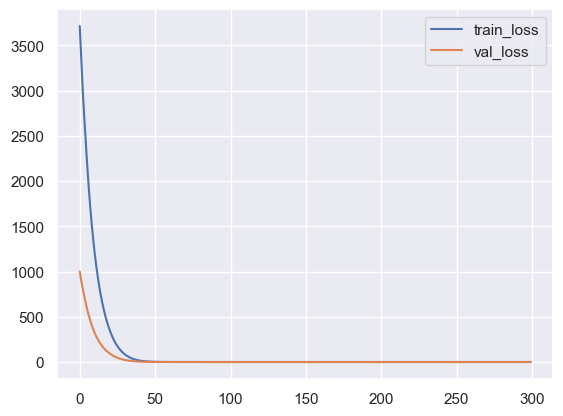

Finished Training
Epoch 1/300


100%|██████████| 7/7 [00:00<00:00, 185.86it/s]


Train Loss: 3700.9378967285156


100%|██████████| 2/2 [00:00<00:00, 174.65it/s]


Epoch 2/300


100%|██████████| 7/7 [00:00<00:00, 222.71it/s]


Train Loss: 3336.5328979492188


100%|██████████| 2/2 [00:00<00:00, 537.80it/s]


Epoch 3/300


100%|██████████| 7/7 [00:00<00:00, 194.30it/s]


Train Loss: 2973.590576171875


100%|██████████| 2/2 [00:00<00:00, 541.10it/s]


Epoch 4/300


100%|██████████| 7/7 [00:00<00:00, 216.87it/s]


Train Loss: 2655.7857055664062


100%|██████████| 2/2 [00:00<00:00, 568.37it/s]


Epoch 5/300


100%|██████████| 7/7 [00:00<00:00, 201.00it/s]


Train Loss: 2374.209259033203


100%|██████████| 2/2 [00:00<00:00, 424.27it/s]


Epoch 6/300


100%|██████████| 7/7 [00:00<00:00, 208.66it/s]


Train Loss: 2118.800262451172


100%|██████████| 2/2 [00:00<00:00, 576.85it/s]


Epoch 7/300


100%|██████████| 7/7 [00:00<00:00, 226.72it/s]


Train Loss: 1889.0442504882812


100%|██████████| 2/2 [00:00<00:00, 335.41it/s]


Epoch 8/300


100%|██████████| 7/7 [00:00<00:00, 120.75it/s]


Train Loss: 1683.5896453857422


100%|██████████| 2/2 [00:00<00:00, 563.22it/s]


Epoch 9/300


100%|██████████| 7/7 [00:00<00:00, 178.84it/s]


Train Loss: 1500.3268280029297


100%|██████████| 2/2 [00:00<00:00, 370.44it/s]


Epoch 10/300


100%|██████████| 7/7 [00:00<00:00, 198.76it/s]


Train Loss: 1336.9284362792969


100%|██████████| 2/2 [00:00<00:00, 460.61it/s]


Epoch 11/300


100%|██████████| 7/7 [00:00<00:00, 155.60it/s]


Train Loss: 1191.3001403808594


100%|██████████| 2/2 [00:00<00:00, 239.12it/s]


Epoch 12/300


100%|██████████| 7/7 [00:00<00:00, 109.67it/s]


Train Loss: 1061.3437805175781


100%|██████████| 2/2 [00:00<00:00, 433.65it/s]


Epoch 13/300


100%|██████████| 7/7 [00:00<00:00, 240.89it/s]


Train Loss: 945.1865539550781


100%|██████████| 2/2 [00:00<00:00, 604.06it/s]


Epoch 14/300


100%|██████████| 7/7 [00:00<00:00, 211.80it/s]


Train Loss: 841.3700485229492


100%|██████████| 2/2 [00:00<00:00, 515.33it/s]


Epoch 15/300


100%|██████████| 7/7 [00:00<00:00, 242.41it/s]


Train Loss: 748.3383636474609


100%|██████████| 2/2 [00:00<00:00, 546.03it/s]


Epoch 16/300


100%|██████████| 7/7 [00:00<00:00, 206.75it/s]


Train Loss: 664.9200897216797


100%|██████████| 2/2 [00:00<00:00, 467.80it/s]


Epoch 17/300


100%|██████████| 7/7 [00:00<00:00, 233.58it/s]


Train Loss: 590.1055374145508


100%|██████████| 2/2 [00:00<00:00, 611.06it/s]


Epoch 18/300


100%|██████████| 7/7 [00:00<00:00, 240.96it/s]


Train Loss: 522.9268264770508


100%|██████████| 2/2 [00:00<00:00, 572.91it/s]


Epoch 19/300


100%|██████████| 7/7 [00:00<00:00, 116.15it/s]


Train Loss: 462.6540832519531


100%|██████████| 2/2 [00:00<00:00, 593.97it/s]


Epoch 20/300


100%|██████████| 7/7 [00:00<00:00, 103.96it/s]


Train Loss: 408.5467987060547


100%|██████████| 2/2 [00:00<00:00, 174.01it/s]


Epoch 21/300


100%|██████████| 7/7 [00:00<00:00, 71.07it/s]


Train Loss: 360.046630859375


100%|██████████| 2/2 [00:00<00:00, 571.08it/s]


Epoch 22/300


100%|██████████| 7/7 [00:00<00:00, 238.22it/s]


Train Loss: 316.637638092041


100%|██████████| 2/2 [00:00<00:00, 568.99it/s]


Epoch 23/300


100%|██████████| 7/7 [00:00<00:00, 234.76it/s]


Train Loss: 277.7861671447754


100%|██████████| 2/2 [00:00<00:00, 535.60it/s]


Epoch 24/300


100%|██████████| 7/7 [00:00<00:00, 139.12it/s]


Train Loss: 243.1192970275879


100%|██████████| 2/2 [00:00<00:00, 553.89it/s]


Epoch 25/300


100%|██████████| 7/7 [00:00<00:00, 106.10it/s]


Train Loss: 212.25470352172852


100%|██████████| 2/2 [00:00<00:00, 442.69it/s]


Epoch 26/300


100%|██████████| 7/7 [00:00<00:00, 176.48it/s]


Train Loss: 184.81297492980957


100%|██████████| 2/2 [00:00<00:00, 267.06it/s]


Epoch 27/300


100%|██████████| 7/7 [00:00<00:00, 161.15it/s]


Train Loss: 160.50920295715332


100%|██████████| 2/2 [00:00<00:00, 606.81it/s]


Epoch 28/300


100%|██████████| 7/7 [00:00<00:00, 189.44it/s]


Train Loss: 139.03935432434082


100%|██████████| 2/2 [00:00<00:00, 587.07it/s]


Epoch 29/300


100%|██████████| 7/7 [00:00<00:00, 221.79it/s]


Train Loss: 120.1080150604248


100%|██████████| 2/2 [00:00<00:00, 609.59it/s]


Epoch 30/300


100%|██████████| 7/7 [00:00<00:00, 180.30it/s]


Train Loss: 103.47855377197266


100%|██████████| 2/2 [00:00<00:00, 576.73it/s]


Epoch 31/300


100%|██████████| 7/7 [00:00<00:00, 212.45it/s]


Train Loss: 88.8922061920166


100%|██████████| 2/2 [00:00<00:00, 646.62it/s]


Epoch 32/300


100%|██████████| 7/7 [00:00<00:00, 194.35it/s]


Train Loss: 76.14525318145752


100%|██████████| 2/2 [00:00<00:00, 567.76it/s]


Epoch 33/300


100%|██████████| 7/7 [00:00<00:00, 195.67it/s]


Train Loss: 65.05727863311768


100%|██████████| 2/2 [00:00<00:00, 615.72it/s]


Epoch 34/300


100%|██████████| 7/7 [00:00<00:00, 205.41it/s]


Train Loss: 55.414137840270996


100%|██████████| 2/2 [00:00<00:00, 381.66it/s]


Epoch 35/300


100%|██████████| 7/7 [00:00<00:00, 170.69it/s]


Train Loss: 47.07533407211304


100%|██████████| 2/2 [00:00<00:00, 332.17it/s]


Epoch 36/300


100%|██████████| 7/7 [00:00<00:00, 133.25it/s]


Train Loss: 39.87092733383179


100%|██████████| 2/2 [00:00<00:00, 548.71it/s]


Epoch 37/300


100%|██████████| 7/7 [00:00<00:00, 215.44it/s]


Train Loss: 33.677478313446045


100%|██████████| 2/2 [00:00<00:00, 401.85it/s]


Epoch 38/300


100%|██████████| 7/7 [00:00<00:00, 191.14it/s]


Train Loss: 28.36370825767517


100%|██████████| 2/2 [00:00<00:00, 555.54it/s]


Epoch 39/300


100%|██████████| 7/7 [00:00<00:00, 238.45it/s]


Train Loss: 23.816521167755127


100%|██████████| 2/2 [00:00<00:00, 571.28it/s]


Epoch 40/300


100%|██████████| 7/7 [00:00<00:00, 135.83it/s]


Train Loss: 19.938262224197388


100%|██████████| 2/2 [00:00<00:00, 35.27it/s]


Epoch 41/300


100%|██████████| 7/7 [00:00<00:00, 80.01it/s]


Train Loss: 16.654202938079834


100%|██████████| 2/2 [00:00<00:00, 283.61it/s]


Epoch 42/300


100%|██████████| 7/7 [00:00<00:00, 179.36it/s]


Train Loss: 13.86542296409607


100%|██████████| 2/2 [00:00<00:00, 385.79it/s]


Epoch 43/300


100%|██████████| 7/7 [00:00<00:00, 211.50it/s]


Train Loss: 11.505738139152527


100%|██████████| 2/2 [00:00<00:00, 504.52it/s]


Epoch 44/300


100%|██████████| 7/7 [00:00<00:00, 229.44it/s]


Train Loss: 9.528747320175171


100%|██████████| 2/2 [00:00<00:00, 486.61it/s]


Epoch 45/300


100%|██████████| 7/7 [00:00<00:00, 227.86it/s]


Train Loss: 7.865770578384399


100%|██████████| 2/2 [00:00<00:00, 477.58it/s]


Epoch 46/300


100%|██████████| 7/7 [00:00<00:00, 180.47it/s]

Train Loss: 6.476480424404144



100%|██████████| 2/2 [00:00<00:00, 575.86it/s]


Epoch 47/300


100%|██████████| 7/7 [00:00<00:00, 212.05it/s]


Train Loss: 5.314187943935394


100%|██████████| 2/2 [00:00<00:00, 502.88it/s]


Epoch 48/300


100%|██████████| 7/7 [00:00<00:00, 174.51it/s]


Train Loss: 4.353796660900116


100%|██████████| 2/2 [00:00<00:00, 523.14it/s]


Epoch 49/300


100%|██████████| 7/7 [00:00<00:00, 212.70it/s]


Train Loss: 3.5519043803215027


100%|██████████| 2/2 [00:00<00:00, 515.62it/s]


Epoch 50/300


100%|██████████| 7/7 [00:00<00:00, 180.25it/s]


Train Loss: 2.895420014858246


100%|██████████| 2/2 [00:00<00:00, 255.20it/s]


Epoch 51/300


100%|██████████| 7/7 [00:00<00:00, 234.28it/s]


Train Loss: 2.355398863554001


100%|██████████| 2/2 [00:00<00:00, 406.84it/s]


Epoch 52/300


100%|██████████| 7/7 [00:00<00:00, 200.73it/s]


Train Loss: 1.905862271785736


100%|██████████| 2/2 [00:00<00:00, 196.92it/s]


Epoch 53/300


100%|██████████| 7/7 [00:00<00:00, 212.25it/s]


Train Loss: 1.5420557111501694


100%|██████████| 2/2 [00:00<00:00, 529.82it/s]


Epoch 54/300


100%|██████████| 7/7 [00:00<00:00, 234.52it/s]


Train Loss: 1.2400712817907333


100%|██████████| 2/2 [00:00<00:00, 518.14it/s]


Epoch 55/300


100%|██████████| 7/7 [00:00<00:00, 194.63it/s]


Train Loss: 0.9981246292591095


100%|██████████| 2/2 [00:00<00:00, 533.80it/s]


Epoch 56/300


100%|██████████| 7/7 [00:00<00:00, 232.19it/s]


Train Loss: 0.8044223338365555


100%|██████████| 2/2 [00:00<00:00, 546.17it/s]


Epoch 57/300


100%|██████████| 7/7 [00:00<00:00, 203.09it/s]


Train Loss: 0.6434548124670982


100%|██████████| 2/2 [00:00<00:00, 561.60it/s]


Epoch 58/300


100%|██████████| 7/7 [00:00<00:00, 241.74it/s]


Train Loss: 0.5172498375177383


100%|██████████| 2/2 [00:00<00:00, 514.95it/s]


Epoch 59/300


100%|██████████| 7/7 [00:00<00:00, 223.46it/s]


Train Loss: 0.4103209376335144


100%|██████████| 2/2 [00:00<00:00, 550.51it/s]


Epoch 60/300


100%|██████████| 7/7 [00:00<00:00, 246.31it/s]


Train Loss: 0.3345140516757965


100%|██████████| 2/2 [00:00<00:00, 620.14it/s]


Epoch 61/300


100%|██████████| 7/7 [00:00<00:00, 234.63it/s]


Train Loss: 0.26601477339863777


100%|██████████| 2/2 [00:00<00:00, 450.23it/s]


Epoch 62/300


100%|██████████| 7/7 [00:00<00:00, 227.05it/s]


Train Loss: 0.21425660327076912


100%|██████████| 2/2 [00:00<00:00, 549.28it/s]


Epoch 63/300


100%|██████████| 7/7 [00:00<00:00, 221.91it/s]


Train Loss: 0.17337387427687645


100%|██████████| 2/2 [00:00<00:00, 515.56it/s]


Epoch 64/300


100%|██████████| 7/7 [00:00<00:00, 232.47it/s]


Train Loss: 0.14363235794007778


100%|██████████| 2/2 [00:00<00:00, 620.51it/s]


Epoch 65/300


100%|██████████| 7/7 [00:00<00:00, 238.57it/s]


Train Loss: 0.12022800836712122


100%|██████████| 2/2 [00:00<00:00, 492.00it/s]


Epoch 66/300


100%|██████████| 7/7 [00:00<00:00, 234.18it/s]


Train Loss: 0.09517585672438145


100%|██████████| 2/2 [00:00<00:00, 624.38it/s]


Epoch 67/300


100%|██████████| 7/7 [00:00<00:00, 252.21it/s]


Train Loss: 0.07798400707542896


100%|██████████| 2/2 [00:00<00:00, 606.60it/s]


Epoch 68/300


100%|██████████| 7/7 [00:00<00:00, 250.64it/s]


Train Loss: 0.06551001081243157


100%|██████████| 2/2 [00:00<00:00, 576.02it/s]


Epoch 69/300


100%|██████████| 7/7 [00:00<00:00, 254.45it/s]


Train Loss: 0.05542591540142894


100%|██████████| 2/2 [00:00<00:00, 583.96it/s]


Epoch 70/300


100%|██████████| 7/7 [00:00<00:00, 228.03it/s]


Train Loss: 0.049351411405950785


100%|██████████| 2/2 [00:00<00:00, 464.59it/s]


Epoch 71/300


100%|██████████| 7/7 [00:00<00:00, 225.76it/s]


Train Loss: 0.04247637395747006


100%|██████████| 2/2 [00:00<00:00, 581.73it/s]


Epoch 72/300


100%|██████████| 7/7 [00:00<00:00, 234.63it/s]


Train Loss: 0.036439026007428765


100%|██████████| 2/2 [00:00<00:00, 475.73it/s]


Epoch 73/300


100%|██████████| 7/7 [00:00<00:00, 216.72it/s]


Train Loss: 0.036285572685301304


100%|██████████| 2/2 [00:00<00:00, 422.03it/s]


Epoch 74/300


100%|██████████| 7/7 [00:00<00:00, 250.76it/s]


Train Loss: 0.0330502106808126


100%|██████████| 2/2 [00:00<00:00, 527.68it/s]


Epoch 75/300


100%|██████████| 7/7 [00:00<00:00, 208.07it/s]


Train Loss: 0.030883152037858963


100%|██████████| 2/2 [00:00<00:00, 577.21it/s]


Epoch 76/300


100%|██████████| 7/7 [00:00<00:00, 248.26it/s]


Train Loss: 0.027981068356893957


100%|██████████| 2/2 [00:00<00:00, 565.80it/s]


Epoch 77/300


100%|██████████| 7/7 [00:00<00:00, 221.30it/s]


Train Loss: 0.027216933434829116


100%|██████████| 2/2 [00:00<00:00, 186.20it/s]


Epoch 78/300


100%|██████████| 7/7 [00:00<00:00, 231.91it/s]


Train Loss: 0.028485369635745883


100%|██████████| 2/2 [00:00<00:00, 567.83it/s]


Epoch 79/300


100%|██████████| 7/7 [00:00<00:00, 201.45it/s]


Train Loss: 0.02481238718610257


100%|██████████| 2/2 [00:00<00:00, 644.34it/s]


Epoch 80/300


100%|██████████| 7/7 [00:00<00:00, 229.45it/s]


Train Loss: 0.02394459384959191


100%|██████████| 2/2 [00:00<00:00, 539.08it/s]


Epoch 81/300


100%|██████████| 7/7 [00:00<00:00, 237.14it/s]


Train Loss: 0.0273104056250304


100%|██████████| 2/2 [00:00<00:00, 478.23it/s]


Epoch 82/300


100%|██████████| 7/7 [00:00<00:00, 236.90it/s]


Train Loss: 0.02492231922224164


100%|██████████| 2/2 [00:00<00:00, 593.67it/s]


Epoch 83/300


100%|██████████| 7/7 [00:00<00:00, 234.68it/s]


Train Loss: 0.024881144403479993


100%|██████████| 2/2 [00:00<00:00, 610.66it/s]


Epoch 84/300


100%|██████████| 7/7 [00:00<00:00, 224.68it/s]


Train Loss: 0.0259657435817644


100%|██████████| 2/2 [00:00<00:00, 602.59it/s]


Epoch 85/300


100%|██████████| 7/7 [00:00<00:00, 213.30it/s]


Train Loss: 0.026492227101698518


100%|██████████| 2/2 [00:00<00:00, 600.26it/s]


Epoch 86/300


100%|██████████| 7/7 [00:00<00:00, 226.11it/s]


Train Loss: 0.02715090790297836


100%|██████████| 2/2 [00:00<00:00, 577.57it/s]


Epoch 87/300


100%|██████████| 7/7 [00:00<00:00, 244.58it/s]


Train Loss: 0.027090405579656363


100%|██████████| 2/2 [00:00<00:00, 403.57it/s]


Epoch 88/300


100%|██████████| 7/7 [00:00<00:00, 242.32it/s]


Train Loss: 0.025405777618288994


100%|██████████| 2/2 [00:00<00:00, 386.93it/s]


Epoch 89/300


100%|██████████| 7/7 [00:00<00:00, 203.82it/s]


Train Loss: 0.02626049460377544


100%|██████████| 2/2 [00:00<00:00, 610.17it/s]


Epoch 90/300


100%|██████████| 7/7 [00:00<00:00, 232.27it/s]


Train Loss: 0.02541297406423837


100%|██████████| 2/2 [00:00<00:00, 405.52it/s]


Epoch 91/300


100%|██████████| 7/7 [00:00<00:00, 209.64it/s]


Train Loss: 0.025944145512767136


100%|██████████| 2/2 [00:00<00:00, 550.00it/s]


Epoch 92/300


100%|██████████| 7/7 [00:00<00:00, 234.84it/s]


Train Loss: 0.02449689118657261


100%|██████████| 2/2 [00:00<00:00, 450.76it/s]


Epoch 93/300


100%|██████████| 7/7 [00:00<00:00, 232.74it/s]


Train Loss: 0.02671328338328749


100%|██████████| 2/2 [00:00<00:00, 595.06it/s]


Epoch 94/300


100%|██████████| 7/7 [00:00<00:00, 242.99it/s]


Train Loss: 0.02644460927695036


100%|██████████| 2/2 [00:00<00:00, 559.13it/s]


Epoch 95/300


100%|██████████| 7/7 [00:00<00:00, 116.00it/s]


Train Loss: 0.024229235656093806


100%|██████████| 2/2 [00:00<00:00, 169.80it/s]


Epoch 96/300


100%|██████████| 7/7 [00:00<00:00, 234.99it/s]


Train Loss: 0.023939925711601973


100%|██████████| 2/2 [00:00<00:00, 566.91it/s]


Epoch 97/300


100%|██████████| 7/7 [00:00<00:00, 224.03it/s]


Train Loss: 0.022816011332906783


100%|██████████| 2/2 [00:00<00:00, 567.87it/s]


Epoch 98/300


100%|██████████| 7/7 [00:00<00:00, 235.33it/s]


Train Loss: 0.023983033606782556


100%|██████████| 2/2 [00:00<00:00, 455.78it/s]


Epoch 99/300


100%|██████████| 7/7 [00:00<00:00, 249.55it/s]


Train Loss: 0.023298955522477627


100%|██████████| 2/2 [00:00<00:00, 604.76it/s]


Epoch 100/300


100%|██████████| 7/7 [00:00<00:00, 240.96it/s]


Train Loss: 0.02380809874739498


100%|██████████| 2/2 [00:00<00:00, 577.49it/s]


Epoch 101/300


100%|██████████| 7/7 [00:00<00:00, 242.36it/s]


Train Loss: 0.023726394749246538


100%|██████████| 2/2 [00:00<00:00, 444.05it/s]


Epoch 102/300


100%|██████████| 7/7 [00:00<00:00, 230.05it/s]


Train Loss: 0.024243534891866148


100%|██████████| 2/2 [00:00<00:00, 546.74it/s]


Epoch 103/300


100%|██████████| 7/7 [00:00<00:00, 186.76it/s]


Train Loss: 0.027259493712335825


100%|██████████| 2/2 [00:00<00:00, 516.13it/s]


Epoch 104/300


100%|██████████| 7/7 [00:00<00:00, 237.97it/s]


Train Loss: 0.02339798805769533


100%|██████████| 2/2 [00:00<00:00, 525.47it/s]


Epoch 105/300


100%|██████████| 7/7 [00:00<00:00, 227.67it/s]


Train Loss: 0.024391204060520977


100%|██████████| 2/2 [00:00<00:00, 395.80it/s]


Epoch 106/300


100%|██████████| 7/7 [00:00<00:00, 209.77it/s]


Train Loss: 0.021944006148260087


100%|██████████| 2/2 [00:00<00:00, 511.91it/s]


Epoch 107/300


100%|██████████| 7/7 [00:00<00:00, 229.69it/s]


Train Loss: 0.0223354707704857


100%|██████████| 2/2 [00:00<00:00, 473.40it/s]


Epoch 108/300


100%|██████████| 7/7 [00:00<00:00, 215.70it/s]


Train Loss: 0.02336292457766831


100%|██████████| 2/2 [00:00<00:00, 510.85it/s]


Epoch 109/300


100%|██████████| 7/7 [00:00<00:00, 220.80it/s]


Train Loss: 0.02746897889301181


100%|██████████| 2/2 [00:00<00:00, 379.88it/s]


Epoch 110/300


100%|██████████| 7/7 [00:00<00:00, 189.29it/s]


Train Loss: 0.024832013179548085


100%|██████████| 2/2 [00:00<00:00, 392.16it/s]


Epoch 111/300


100%|██████████| 7/7 [00:00<00:00, 226.27it/s]


Train Loss: 0.02520541346166283


100%|██████████| 2/2 [00:00<00:00, 608.05it/s]


Epoch 112/300


100%|██████████| 7/7 [00:00<00:00, 219.78it/s]


Train Loss: 0.02383338031359017


100%|██████████| 2/2 [00:00<00:00, 467.31it/s]


Epoch 113/300


100%|██████████| 7/7 [00:00<00:00, 217.87it/s]


Train Loss: 0.024549244320951402


100%|██████████| 2/2 [00:00<00:00, 426.71it/s]


Epoch 114/300


100%|██████████| 7/7 [00:00<00:00, 176.52it/s]


Train Loss: 0.02491191739682108


100%|██████████| 2/2 [00:00<00:00, 213.24it/s]


Epoch 115/300


100%|██████████| 7/7 [00:00<00:00, 162.93it/s]


Train Loss: 0.026745632872916758


100%|██████████| 2/2 [00:00<00:00, 601.51it/s]


Epoch 116/300


100%|██████████| 7/7 [00:00<00:00, 63.25it/s]


Train Loss: 0.025859978632070124


100%|██████████| 2/2 [00:00<00:00, 359.19it/s]


Epoch 117/300


100%|██████████| 7/7 [00:00<00:00, 244.53it/s]


Train Loss: 0.025132894166745245


100%|██████████| 2/2 [00:00<00:00, 544.08it/s]


Epoch 118/300


100%|██████████| 7/7 [00:00<00:00, 204.76it/s]


Train Loss: 0.02507048414554447


100%|██████████| 2/2 [00:00<00:00, 500.48it/s]


Epoch 119/300


100%|██████████| 7/7 [00:00<00:00, 71.23it/s]


Train Loss: 0.026685599237680435


100%|██████████| 2/2 [00:00<00:00, 223.74it/s]


Epoch 120/300


100%|██████████| 7/7 [00:00<00:00, 102.74it/s]


Train Loss: 0.02607734513003379


100%|██████████| 2/2 [00:00<00:00, 398.79it/s]


Epoch 121/300


100%|██████████| 7/7 [00:00<00:00, 215.78it/s]


Train Loss: 0.025873142876662314


100%|██████████| 2/2 [00:00<00:00, 527.15it/s]


Epoch 122/300


100%|██████████| 7/7 [00:00<00:00, 212.28it/s]


Train Loss: 0.022536864154972136


100%|██████████| 2/2 [00:00<00:00, 442.97it/s]


Epoch 123/300


100%|██████████| 7/7 [00:00<00:00, 187.76it/s]


Train Loss: 0.02582996734417975


100%|██████████| 2/2 [00:00<00:00, 246.67it/s]


Epoch 124/300


100%|██████████| 7/7 [00:00<00:00, 223.53it/s]


Train Loss: 0.024494681041687727


100%|██████████| 2/2 [00:00<00:00, 419.64it/s]


Epoch 125/300


100%|██████████| 7/7 [00:00<00:00, 178.83it/s]


Train Loss: 0.02384554303716868


100%|██████████| 2/2 [00:00<00:00, 161.40it/s]


Epoch 126/300


100%|██████████| 7/7 [00:00<00:00, 238.91it/s]


Train Loss: 0.022373307030647993


100%|██████████| 2/2 [00:00<00:00, 688.44it/s]


Epoch 127/300


100%|██████████| 7/7 [00:00<00:00, 219.42it/s]


Train Loss: 0.022533082752488554


100%|██████████| 2/2 [00:00<00:00, 424.27it/s]


Epoch 128/300


100%|██████████| 7/7 [00:00<00:00, 225.51it/s]


Train Loss: 0.022411304293200374


100%|██████████| 2/2 [00:00<00:00, 187.34it/s]


Epoch 129/300


100%|██████████| 7/7 [00:00<00:00, 83.84it/s]


Train Loss: 0.027532187174074352


100%|██████████| 2/2 [00:00<00:00, 284.25it/s]


Epoch 130/300


100%|██████████| 7/7 [00:00<00:00, 194.00it/s]


Train Loss: 0.023816587985493243


100%|██████████| 2/2 [00:00<00:00, 571.28it/s]


Epoch 131/300


100%|██████████| 7/7 [00:00<00:00, 65.73it/s]


Train Loss: 0.023603106732480228


100%|██████████| 2/2 [00:00<00:00, 398.79it/s]


Epoch 132/300


100%|██████████| 7/7 [00:00<00:00, 177.99it/s]


Train Loss: 0.023051265976391733


100%|██████████| 2/2 [00:00<00:00, 601.68it/s]


Epoch 133/300


100%|██████████| 7/7 [00:00<00:00, 260.56it/s]


Train Loss: 0.02344662230461836


100%|██████████| 2/2 [00:00<00:00, 633.72it/s]


Epoch 134/300


100%|██████████| 7/7 [00:00<00:00, 239.36it/s]


Train Loss: 0.024211198091506958


100%|██████████| 2/2 [00:00<00:00, 635.31it/s]


Epoch 135/300


100%|██████████| 7/7 [00:00<00:00, 242.77it/s]


Train Loss: 0.022966142743825912


100%|██████████| 2/2 [00:00<00:00, 596.50it/s]


Epoch 136/300


100%|██████████| 7/7 [00:00<00:00, 111.51it/s]


Train Loss: 0.024913450120948255


100%|██████████| 2/2 [00:00<00:00, 595.23it/s]


Epoch 137/300


100%|██████████| 7/7 [00:00<00:00, 77.06it/s]


Train Loss: 0.023993687820620835


100%|██████████| 2/2 [00:00<00:00, 392.71it/s]


Epoch 138/300


100%|██████████| 7/7 [00:00<00:00, 66.84it/s]


Train Loss: 0.024330309475772083


100%|██████████| 2/2 [00:00<00:00, 465.03it/s]


Epoch 139/300


100%|██████████| 7/7 [00:00<00:00, 114.91it/s]


Train Loss: 0.025323087349534035


100%|██████████| 2/2 [00:00<00:00, 547.20it/s]


Epoch 140/300


100%|██████████| 7/7 [00:00<00:00, 165.81it/s]


Train Loss: 0.025190653395839036


100%|██████████| 2/2 [00:00<00:00, 639.18it/s]


Epoch 141/300


100%|██████████| 7/7 [00:00<00:00, 221.39it/s]


Train Loss: 0.02375163056422025


100%|██████████| 2/2 [00:00<00:00, 488.16it/s]


Epoch 142/300


100%|██████████| 7/7 [00:00<00:00, 171.23it/s]


Train Loss: 0.02207672782242298


100%|██████████| 2/2 [00:00<00:00, 516.92it/s]


Epoch 143/300


100%|██████████| 7/7 [00:00<00:00, 207.80it/s]


Train Loss: 0.022712829522788525


100%|██████████| 2/2 [00:00<00:00, 585.27it/s]


Epoch 144/300


100%|██████████| 7/7 [00:00<00:00, 214.14it/s]


Train Loss: 0.022364808712154627


100%|██████████| 2/2 [00:00<00:00, 584.45it/s]


Epoch 145/300


100%|██████████| 7/7 [00:00<00:00, 203.15it/s]


Train Loss: 0.024190647061914206


100%|██████████| 2/2 [00:00<00:00, 557.12it/s]


Epoch 146/300


100%|██████████| 7/7 [00:00<00:00, 199.64it/s]


Train Loss: 0.026020064600743353


100%|██████████| 2/2 [00:00<00:00, 590.08it/s]


Epoch 147/300


100%|██████████| 7/7 [00:00<00:00, 222.37it/s]


Train Loss: 0.02330906002316624


100%|██████████| 2/2 [00:00<00:00, 397.68it/s]


Epoch 148/300


100%|██████████| 7/7 [00:00<00:00, 180.36it/s]


Train Loss: 0.023186419275589287


100%|██████████| 2/2 [00:00<00:00, 478.34it/s]


Epoch 149/300


100%|██████████| 7/7 [00:00<00:00, 207.47it/s]


Train Loss: 0.02489147987216711


100%|██████████| 2/2 [00:00<00:00, 510.47it/s]


Epoch 150/300


100%|██████████| 7/7 [00:00<00:00, 158.74it/s]


Train Loss: 0.024391267797909677


100%|██████████| 2/2 [00:00<00:00, 601.51it/s]


Epoch 151/300


100%|██████████| 7/7 [00:00<00:00, 219.76it/s]


Train Loss: 0.024423092720098794


100%|██████████| 2/2 [00:00<00:00, 654.64it/s]


Epoch 152/300


100%|██████████| 7/7 [00:00<00:00, 211.61it/s]


Train Loss: 0.023384542670100927


100%|██████████| 2/2 [00:00<00:00, 523.83it/s]


Epoch 153/300


100%|██████████| 7/7 [00:00<00:00, 70.06it/s]


Train Loss: 0.025965774431824684


100%|██████████| 2/2 [00:00<00:00, 183.61it/s]


Epoch 154/300


100%|██████████| 7/7 [00:00<00:00, 205.89it/s]


Train Loss: 0.02710336248856038


100%|██████████| 2/2 [00:00<00:00, 691.79it/s]


Epoch 155/300


100%|██████████| 7/7 [00:00<00:00, 203.47it/s]


Train Loss: 0.024065780453383923


100%|██████████| 2/2 [00:00<00:00, 611.28it/s]


Epoch 156/300


100%|██████████| 7/7 [00:00<00:00, 188.07it/s]


Train Loss: 0.02464667405001819


100%|██████████| 2/2 [00:00<00:00, 581.09it/s]


Epoch 157/300


100%|██████████| 7/7 [00:00<00:00, 243.71it/s]


Train Loss: 0.02694399922620505


100%|██████████| 2/2 [00:00<00:00, 635.93it/s]


Epoch 158/300


100%|██████████| 7/7 [00:00<00:00, 222.26it/s]


Train Loss: 0.026602433994412422


100%|██████████| 2/2 [00:00<00:00, 565.61it/s]


Epoch 159/300


100%|██████████| 7/7 [00:00<00:00, 74.04it/s]


Train Loss: 0.02517646353226155


100%|██████████| 2/2 [00:00<00:00, 632.77it/s]


Epoch 160/300


100%|██████████| 7/7 [00:00<00:00, 218.51it/s]


Train Loss: 0.024606294056866318


100%|██████████| 2/2 [00:00<00:00, 116.52it/s]


Epoch 161/300


100%|██████████| 7/7 [00:00<00:00, 160.43it/s]


Train Loss: 0.028945770114660263


100%|██████████| 2/2 [00:00<00:00, 269.50it/s]


Epoch 162/300


100%|██████████| 7/7 [00:00<00:00, 119.86it/s]


Train Loss: 0.026122720446437597


100%|██████████| 2/2 [00:00<00:00, 233.04it/s]


Epoch 163/300


100%|██████████| 7/7 [00:00<00:00, 204.45it/s]


Train Loss: 0.024553172988817096


100%|██████████| 2/2 [00:00<00:00, 550.80it/s]


Epoch 164/300


100%|██████████| 7/7 [00:00<00:00, 229.83it/s]


Train Loss: 0.022727490577381104


100%|██████████| 2/2 [00:00<00:00, 626.81it/s]


Epoch 165/300


100%|██████████| 7/7 [00:00<00:00, 218.79it/s]


Train Loss: 0.022906982456333935


100%|██████████| 2/2 [00:00<00:00, 576.70it/s]


Epoch 166/300


100%|██████████| 7/7 [00:00<00:00, 174.76it/s]


Train Loss: 0.03105498105287552


100%|██████████| 2/2 [00:00<00:00, 633.29it/s]


Epoch 167/300


100%|██████████| 7/7 [00:00<00:00, 186.88it/s]


Train Loss: 0.024658310576342046


100%|██████████| 2/2 [00:00<00:00, 562.77it/s]


Epoch 168/300


100%|██████████| 7/7 [00:00<00:00, 218.25it/s]


Train Loss: 0.02782828314229846


100%|██████████| 2/2 [00:00<00:00, 550.51it/s]


Epoch 169/300


100%|██████████| 7/7 [00:00<00:00, 248.69it/s]


Train Loss: 0.026373731205239892


100%|██████████| 2/2 [00:00<00:00, 608.84it/s]


Epoch 170/300


100%|██████████| 7/7 [00:00<00:00, 223.07it/s]


Train Loss: 0.02498884976375848


100%|██████████| 2/2 [00:00<00:00, 542.92it/s]


Epoch 171/300


100%|██████████| 7/7 [00:00<00:00, 239.14it/s]


Train Loss: 0.02350604592356831


100%|██████████| 2/2 [00:00<00:00, 551.56it/s]


Epoch 172/300


100%|██████████| 7/7 [00:00<00:00, 120.02it/s]


Train Loss: 0.025441398611292243


100%|██████████| 2/2 [00:00<00:00, 471.69it/s]


Epoch 173/300


100%|██████████| 7/7 [00:00<00:00, 167.26it/s]


Train Loss: 0.024198754923418164


100%|██████████| 2/2 [00:00<00:00, 395.97it/s]


Epoch 174/300


100%|██████████| 7/7 [00:00<00:00, 193.43it/s]


Train Loss: 0.024439760600216687


100%|██████████| 2/2 [00:00<00:00, 281.57it/s]


Epoch 175/300


100%|██████████| 7/7 [00:00<00:00, 217.78it/s]


Train Loss: 0.02589743852149695


100%|██████████| 2/2 [00:00<00:00, 563.07it/s]


Epoch 176/300


100%|██████████| 7/7 [00:00<00:00, 227.09it/s]


Train Loss: 0.024188869632780552


100%|██████████| 2/2 [00:00<00:00, 594.68it/s]


Epoch 177/300


100%|██████████| 7/7 [00:00<00:00, 234.36it/s]


Train Loss: 0.02367148722987622


100%|██████████| 2/2 [00:00<00:00, 441.48it/s]


Epoch 178/300


100%|██████████| 7/7 [00:00<00:00, 168.72it/s]


Train Loss: 0.02363530220463872


100%|██████████| 2/2 [00:00<00:00, 427.88it/s]


Epoch 179/300


100%|██████████| 7/7 [00:00<00:00, 91.47it/s]


Train Loss: 0.022219105274416506


100%|██████████| 2/2 [00:00<00:00, 194.46it/s]


Epoch 180/300


100%|██████████| 7/7 [00:00<00:00, 165.17it/s]


Train Loss: 0.0230945257935673


100%|██████████| 2/2 [00:00<00:00, 548.85it/s]


Epoch 181/300


100%|██████████| 7/7 [00:00<00:00, 224.99it/s]


Train Loss: 0.023254520376212895


100%|██████████| 2/2 [00:00<00:00, 612.40it/s]


Epoch 182/300


100%|██████████| 7/7 [00:00<00:00, 185.07it/s]


Train Loss: 0.02295459370361641


100%|██████████| 2/2 [00:00<00:00, 292.32it/s]


Epoch 183/300


100%|██████████| 7/7 [00:00<00:00, 240.95it/s]


Train Loss: 0.02262874669395387


100%|██████████| 2/2 [00:00<00:00, 530.66it/s]


Epoch 184/300


100%|██████████| 7/7 [00:00<00:00, 232.61it/s]


Train Loss: 0.026905862730927765


100%|██████████| 2/2 [00:00<00:00, 340.42it/s]


Epoch 185/300


100%|██████████| 7/7 [00:00<00:00, 206.96it/s]


Train Loss: 0.028010112058836967


100%|██████████| 2/2 [00:00<00:00, 533.32it/s]


Epoch 186/300


100%|██████████| 7/7 [00:00<00:00, 240.73it/s]


Train Loss: 0.023823453462682664


100%|██████████| 2/2 [00:00<00:00, 556.98it/s]


Epoch 187/300


100%|██████████| 7/7 [00:00<00:00, 236.29it/s]


Train Loss: 0.023762309574522078


100%|██████████| 2/2 [00:00<00:00, 559.17it/s]


Epoch 188/300


100%|██████████| 7/7 [00:00<00:00, 209.23it/s]


Train Loss: 0.02509233891032636


100%|██████████| 2/2 [00:00<00:00, 603.15it/s]


Epoch 189/300


100%|██████████| 7/7 [00:00<00:00, 201.39it/s]


Train Loss: 0.02710506273433566


100%|██████████| 2/2 [00:00<00:00, 544.68it/s]


Epoch 190/300


100%|██████████| 7/7 [00:00<00:00, 238.57it/s]


Train Loss: 0.02343739930074662


100%|██████████| 2/2 [00:00<00:00, 457.54it/s]


Epoch 191/300


100%|██████████| 7/7 [00:00<00:00, 234.93it/s]


Train Loss: 0.02423024771269411


100%|██████████| 2/2 [00:00<00:00, 595.40it/s]


Epoch 192/300


100%|██████████| 7/7 [00:00<00:00, 212.23it/s]


Train Loss: 0.024152791127562523


100%|██████████| 2/2 [00:00<00:00, 471.24it/s]


Epoch 193/300


100%|██████████| 7/7 [00:00<00:00, 219.04it/s]


Train Loss: 0.025038843392394483


100%|██████████| 2/2 [00:00<00:00, 312.10it/s]


Epoch 194/300


100%|██████████| 7/7 [00:00<00:00, 212.93it/s]


Train Loss: 0.023111520160455257


100%|██████████| 2/2 [00:00<00:00, 531.93it/s]


Epoch 195/300


100%|██████████| 7/7 [00:00<00:00, 210.23it/s]


Train Loss: 0.023914243327453732


100%|██████████| 2/2 [00:00<00:00, 367.02it/s]


Epoch 196/300


100%|██████████| 7/7 [00:00<00:00, 226.43it/s]


Train Loss: 0.02664703136542812


100%|██████████| 2/2 [00:00<00:00, 545.42it/s]


Epoch 197/300


100%|██████████| 7/7 [00:00<00:00, 214.49it/s]


Train Loss: 0.02660252491477877


100%|██████████| 2/2 [00:00<00:00, 515.75it/s]


Epoch 198/300


100%|██████████| 7/7 [00:00<00:00, 229.82it/s]


Train Loss: 0.02550859109032899


100%|██████████| 2/2 [00:00<00:00, 520.97it/s]


Epoch 199/300


100%|██████████| 7/7 [00:00<00:00, 232.66it/s]


Train Loss: 0.023352642776444554


100%|██████████| 2/2 [00:00<00:00, 554.22it/s]


Epoch 200/300


100%|██████████| 7/7 [00:00<00:00, 212.35it/s]


Train Loss: 0.027067886549048126


100%|██████████| 2/2 [00:00<00:00, 550.07it/s]


Epoch 201/300


100%|██████████| 7/7 [00:00<00:00, 236.10it/s]


Train Loss: 0.028672638349235058


100%|██████████| 2/2 [00:00<00:00, 609.37it/s]


Epoch 202/300


100%|██████████| 7/7 [00:00<00:00, 199.65it/s]


Train Loss: 0.02444337634369731


100%|██████████| 2/2 [00:00<00:00, 565.96it/s]


Epoch 203/300


100%|██████████| 7/7 [00:00<00:00, 237.20it/s]


Train Loss: 0.02387062628986314


100%|██████████| 2/2 [00:00<00:00, 587.73it/s]


Epoch 204/300


100%|██████████| 7/7 [00:00<00:00, 226.18it/s]


Train Loss: 0.024383335665334016


100%|██████████| 2/2 [00:00<00:00, 585.14it/s]


Epoch 205/300


100%|██████████| 7/7 [00:00<00:00, 235.71it/s]


Train Loss: 0.02747374086175114


100%|██████████| 2/2 [00:00<00:00, 612.17it/s]


Epoch 206/300


100%|██████████| 7/7 [00:00<00:00, 217.97it/s]


Train Loss: 0.02427947078831494


100%|██████████| 2/2 [00:00<00:00, 557.42it/s]


Epoch 207/300


100%|██████████| 7/7 [00:00<00:00, 232.39it/s]


Train Loss: 0.02332758839474991


100%|██████████| 2/2 [00:00<00:00, 563.07it/s]


Epoch 208/300


100%|██████████| 7/7 [00:00<00:00, 203.57it/s]


Train Loss: 0.023682983475737274


100%|██████████| 2/2 [00:00<00:00, 388.43it/s]


Epoch 209/300


100%|██████████| 7/7 [00:00<00:00, 199.67it/s]


Train Loss: 0.02254838397493586


100%|██████████| 2/2 [00:00<00:00, 566.72it/s]


Epoch 210/300


100%|██████████| 7/7 [00:00<00:00, 227.05it/s]


Train Loss: 0.024301499594002962


100%|██████████| 2/2 [00:00<00:00, 578.21it/s]


Epoch 211/300


100%|██████████| 7/7 [00:00<00:00, 205.75it/s]


Train Loss: 0.025350989191792905


100%|██████████| 2/2 [00:00<00:00, 556.79it/s]


Epoch 212/300


100%|██████████| 7/7 [00:00<00:00, 236.78it/s]


Train Loss: 0.02654089278075844


100%|██████████| 2/2 [00:00<00:00, 575.71it/s]


Epoch 213/300


100%|██████████| 7/7 [00:00<00:00, 217.57it/s]


Train Loss: 0.024329071049578488


100%|██████████| 2/2 [00:00<00:00, 557.72it/s]


Epoch 214/300


100%|██████████| 7/7 [00:00<00:00, 226.57it/s]


Train Loss: 0.025640356878284365


100%|██████████| 2/2 [00:00<00:00, 525.77it/s]


Epoch 215/300


100%|██████████| 7/7 [00:00<00:00, 238.70it/s]


Train Loss: 0.023673296440392733


100%|██████████| 2/2 [00:00<00:00, 553.74it/s]


Epoch 216/300


100%|██████████| 7/7 [00:00<00:00, 206.76it/s]


Train Loss: 0.024175671162083745


100%|██████████| 2/2 [00:00<00:00, 522.33it/s]


Epoch 217/300


100%|██████████| 7/7 [00:00<00:00, 239.61it/s]


Train Loss: 0.023449259460903704


100%|██████████| 2/2 [00:00<00:00, 631.53it/s]


Epoch 218/300


100%|██████████| 7/7 [00:00<00:00, 214.57it/s]


Train Loss: 0.025978549208957702


100%|██████████| 2/2 [00:00<00:00, 542.14it/s]


Epoch 219/300


100%|██████████| 7/7 [00:00<00:00, 217.43it/s]


Train Loss: 0.023381685081403702


100%|██████████| 2/2 [00:00<00:00, 480.56it/s]


Epoch 220/300


100%|██████████| 7/7 [00:00<00:00, 234.40it/s]


Train Loss: 0.023806451936252415


100%|██████████| 2/2 [00:00<00:00, 557.72it/s]


Epoch 221/300


100%|██████████| 7/7 [00:00<00:00, 240.54it/s]


Train Loss: 0.02295914839487523


100%|██████████| 2/2 [00:00<00:00, 591.16it/s]


Epoch 222/300


100%|██████████| 7/7 [00:00<00:00, 213.26it/s]


Train Loss: 0.02457354962825775


100%|██████████| 2/2 [00:00<00:00, 618.40it/s]


Epoch 223/300


100%|██████████| 7/7 [00:00<00:00, 241.60it/s]


Train Loss: 0.023465394973754883


100%|██████████| 2/2 [00:00<00:00, 451.24it/s]


Epoch 224/300


100%|██████████| 7/7 [00:00<00:00, 213.27it/s]


Train Loss: 0.022563981590792537


100%|██████████| 2/2 [00:00<00:00, 436.20it/s]


Epoch 225/300


100%|██████████| 7/7 [00:00<00:00, 237.35it/s]


Train Loss: 0.024990242323838174


100%|██████████| 2/2 [00:00<00:00, 525.50it/s]


Epoch 226/300


100%|██████████| 7/7 [00:00<00:00, 228.71it/s]


Train Loss: 0.022670857841148973


100%|██████████| 2/2 [00:00<00:00, 391.46it/s]


Epoch 227/300


100%|██████████| 7/7 [00:00<00:00, 236.49it/s]


Train Loss: 0.023421643651090562


100%|██████████| 2/2 [00:00<00:00, 630.58it/s]


Epoch 228/300


100%|██████████| 7/7 [00:00<00:00, 231.95it/s]


Train Loss: 0.02380777441430837


100%|██████████| 2/2 [00:00<00:00, 582.22it/s]


Epoch 229/300


100%|██████████| 7/7 [00:00<00:00, 210.28it/s]


Train Loss: 0.02862707932945341


100%|██████████| 2/2 [00:00<00:00, 530.92it/s]


Epoch 230/300


100%|██████████| 7/7 [00:00<00:00, 240.34it/s]


Train Loss: 0.027256674016825855


100%|██████████| 2/2 [00:00<00:00, 582.58it/s]


Epoch 231/300


100%|██████████| 7/7 [00:00<00:00, 251.43it/s]


Train Loss: 0.026720567722804844


100%|██████████| 2/2 [00:00<00:00, 584.98it/s]


Epoch 232/300


100%|██████████| 7/7 [00:00<00:00, 227.10it/s]


Train Loss: 0.024652012973092496


100%|██████████| 2/2 [00:00<00:00, 577.05it/s]


Epoch 233/300


100%|██████████| 7/7 [00:00<00:00, 100.91it/s]


Train Loss: 0.023273407365195453


100%|██████████| 2/2 [00:00<00:00, 537.21it/s]


Epoch 234/300


100%|██████████| 7/7 [00:00<00:00, 209.29it/s]


Train Loss: 0.024464525748044252


100%|██████████| 2/2 [00:00<00:00, 579.68it/s]


Epoch 235/300


100%|██████████| 7/7 [00:00<00:00, 172.48it/s]


Train Loss: 0.025315254810266197


100%|██████████| 2/2 [00:00<00:00, 609.42it/s]


Epoch 236/300


100%|██████████| 7/7 [00:00<00:00, 233.56it/s]


Train Loss: 0.02253544342238456


100%|██████████| 2/2 [00:00<00:00, 604.11it/s]


Epoch 237/300


100%|██████████| 7/7 [00:00<00:00, 211.40it/s]


Train Loss: 0.02575308852829039


100%|██████████| 2/2 [00:00<00:00, 447.32it/s]


Epoch 238/300


100%|██████████| 7/7 [00:00<00:00, 235.94it/s]


Train Loss: 0.024913273635320365


100%|██████████| 2/2 [00:00<00:00, 584.45it/s]


Epoch 239/300


100%|██████████| 7/7 [00:00<00:00, 218.94it/s]


Train Loss: 0.02274400769965723


100%|██████████| 2/2 [00:00<00:00, 522.75it/s]


Epoch 240/300


100%|██████████| 7/7 [00:00<00:00, 212.59it/s]


Train Loss: 0.023434666101820767


100%|██████████| 2/2 [00:00<00:00, 585.31it/s]


Epoch 241/300


100%|██████████| 7/7 [00:00<00:00, 208.69it/s]


Train Loss: 0.025008790660649538


100%|██████████| 2/2 [00:00<00:00, 327.81it/s]


Epoch 242/300


100%|██████████| 7/7 [00:00<00:00, 209.08it/s]


Train Loss: 0.028575066826306283


100%|██████████| 2/2 [00:00<00:00, 566.91it/s]


Epoch 243/300


100%|██████████| 7/7 [00:00<00:00, 235.42it/s]


Train Loss: 0.023726557148620486


100%|██████████| 2/2 [00:00<00:00, 566.42it/s]


Epoch 244/300


100%|██████████| 7/7 [00:00<00:00, 235.25it/s]


Train Loss: 0.026384356897324324


100%|██████████| 2/2 [00:00<00:00, 617.67it/s]


Epoch 245/300


100%|██████████| 7/7 [00:00<00:00, 219.42it/s]


Train Loss: 0.02410835586488247


100%|██████████| 2/2 [00:00<00:00, 568.68it/s]


Epoch 246/300


100%|██████████| 7/7 [00:00<00:00, 140.52it/s]


Train Loss: 0.025694899377413094


100%|██████████| 2/2 [00:00<00:00, 543.16it/s]


Epoch 247/300


100%|██████████| 7/7 [00:00<00:00, 194.14it/s]


Train Loss: 0.024959110654890537


100%|██████████| 2/2 [00:00<00:00, 451.15it/s]


Epoch 248/300


100%|██████████| 7/7 [00:00<00:00, 227.07it/s]


Train Loss: 0.02561724849510938


100%|██████████| 2/2 [00:00<00:00, 604.98it/s]


Epoch 249/300


100%|██████████| 7/7 [00:00<00:00, 231.28it/s]


Train Loss: 0.025868189753964543


100%|██████████| 2/2 [00:00<00:00, 569.30it/s]


Epoch 250/300


100%|██████████| 7/7 [00:00<00:00, 225.49it/s]


Train Loss: 0.026033758535049856


100%|██████████| 2/2 [00:00<00:00, 560.51it/s]


Epoch 251/300


100%|██████████| 7/7 [00:00<00:00, 244.31it/s]


Train Loss: 0.026557671139016747


100%|██████████| 2/2 [00:00<00:00, 527.42it/s]


Epoch 252/300


100%|██████████| 7/7 [00:00<00:00, 237.17it/s]


Train Loss: 0.024620590498670936


100%|██████████| 2/2 [00:00<00:00, 585.47it/s]


Epoch 253/300


100%|██████████| 7/7 [00:00<00:00, 235.98it/s]


Train Loss: 0.023673355113714933


100%|██████████| 2/2 [00:00<00:00, 583.92it/s]


Epoch 254/300


100%|██████████| 7/7 [00:00<00:00, 246.78it/s]


Train Loss: 0.02353075344581157


100%|██████████| 2/2 [00:00<00:00, 442.86it/s]


Epoch 255/300


100%|██████████| 7/7 [00:00<00:00, 224.10it/s]


Train Loss: 0.0230945193907246


100%|██████████| 2/2 [00:00<00:00, 573.58it/s]


Epoch 256/300


100%|██████████| 7/7 [00:00<00:00, 224.30it/s]


Train Loss: 0.0229047893662937


100%|██████████| 2/2 [00:00<00:00, 596.84it/s]


Epoch 257/300


100%|██████████| 7/7 [00:00<00:00, 242.17it/s]


Train Loss: 0.023837617598474026


100%|██████████| 2/2 [00:00<00:00, 566.26it/s]


Epoch 258/300


100%|██████████| 7/7 [00:00<00:00, 233.31it/s]


Train Loss: 0.024595256079919636


100%|██████████| 2/2 [00:00<00:00, 576.02it/s]


Epoch 259/300


100%|██████████| 7/7 [00:00<00:00, 244.03it/s]


Train Loss: 0.029125993722118437


100%|██████████| 2/2 [00:00<00:00, 584.08it/s]


Epoch 260/300


100%|██████████| 7/7 [00:00<00:00, 253.55it/s]


Train Loss: 0.025078584323637187


100%|██████████| 2/2 [00:00<00:00, 596.16it/s]


Epoch 261/300


100%|██████████| 7/7 [00:00<00:00, 222.63it/s]


Train Loss: 0.023494483379181474


100%|██████████| 2/2 [00:00<00:00, 371.46it/s]


Epoch 262/300


100%|██████████| 7/7 [00:00<00:00, 171.43it/s]


Train Loss: 0.02372336940607056


100%|██████████| 2/2 [00:00<00:00, 639.03it/s]


Epoch 263/300


100%|██████████| 7/7 [00:00<00:00, 218.45it/s]


Train Loss: 0.02434093621559441


100%|██████████| 2/2 [00:00<00:00, 539.22it/s]


Epoch 264/300


100%|██████████| 7/7 [00:00<00:00, 201.09it/s]


Train Loss: 0.02400384738575667


100%|██████████| 2/2 [00:00<00:00, 581.73it/s]


Epoch 265/300


100%|██████████| 7/7 [00:00<00:00, 178.06it/s]


Train Loss: 0.02500369236804545


100%|██████████| 2/2 [00:00<00:00, 599.87it/s]


Epoch 266/300


100%|██████████| 7/7 [00:00<00:00, 215.61it/s]


Train Loss: 0.02663165412377566


100%|██████████| 2/2 [00:00<00:00, 538.49it/s]


Epoch 267/300


100%|██████████| 7/7 [00:00<00:00, 223.27it/s]


Train Loss: 0.025647972361184657


100%|██████████| 2/2 [00:00<00:00, 548.99it/s]


Epoch 268/300


100%|██████████| 7/7 [00:00<00:00, 206.29it/s]


Train Loss: 0.026577728684060276


100%|██████████| 2/2 [00:00<00:00, 501.98it/s]


Epoch 269/300


100%|██████████| 7/7 [00:00<00:00, 194.93it/s]


Train Loss: 0.02453249180689454


100%|██████████| 2/2 [00:00<00:00, 619.04it/s]


Epoch 270/300


100%|██████████| 7/7 [00:00<00:00, 192.35it/s]


Train Loss: 0.024420381290838122


100%|██████████| 2/2 [00:00<00:00, 503.25it/s]


Epoch 271/300


100%|██████████| 7/7 [00:00<00:00, 55.85it/s]


Train Loss: 0.025440316763706505


100%|██████████| 2/2 [00:00<00:00, 471.14it/s]


Epoch 272/300


100%|██████████| 7/7 [00:00<00:00, 205.30it/s]


Train Loss: 0.025123178609646857


100%|██████████| 2/2 [00:00<00:00, 395.09it/s]


Epoch 273/300


100%|██████████| 7/7 [00:00<00:00, 94.85it/s]


Train Loss: 0.025103243766352534


100%|██████████| 2/2 [00:00<00:00, 614.64it/s]


Epoch 274/300


100%|██████████| 7/7 [00:00<00:00, 224.82it/s]


Train Loss: 0.025840730755589902


100%|██████████| 2/2 [00:00<00:00, 630.15it/s]


Epoch 275/300


100%|██████████| 7/7 [00:00<00:00, 216.95it/s]


Train Loss: 0.027400882449001074


100%|██████████| 2/2 [00:00<00:00, 606.60it/s]


Epoch 276/300


100%|██████████| 7/7 [00:00<00:00, 145.47it/s]


Train Loss: 0.023093602037988603


100%|██████████| 2/2 [00:00<00:00, 333.68it/s]


Epoch 277/300


100%|██████████| 7/7 [00:00<00:00, 108.26it/s]


Train Loss: 0.022732557612471282


100%|██████████| 2/2 [00:00<00:00, 28.11it/s]


Epoch 278/300


100%|██████████| 7/7 [00:00<00:00, 66.40it/s]


Train Loss: 0.022246256237849593


100%|██████████| 2/2 [00:00<00:00, 604.41it/s]


Epoch 279/300


100%|██████████| 7/7 [00:00<00:00, 237.41it/s]


Train Loss: 0.023064296459779143


100%|██████████| 2/2 [00:00<00:00, 594.39it/s]


Epoch 280/300


100%|██████████| 7/7 [00:00<00:00, 217.41it/s]


Train Loss: 0.025185412378050387


100%|██████████| 2/2 [00:00<00:00, 434.60it/s]


Epoch 281/300


100%|██████████| 7/7 [00:00<00:00, 212.30it/s]


Train Loss: 0.023681830381974578


100%|██████████| 2/2 [00:00<00:00, 637.19it/s]


Epoch 282/300


100%|██████████| 7/7 [00:00<00:00, 222.45it/s]


Train Loss: 0.026315393042750657


100%|██████████| 2/2 [00:00<00:00, 480.53it/s]


Epoch 283/300


100%|██████████| 7/7 [00:00<00:00, 234.56it/s]


Train Loss: 0.024184897425584495


100%|██████████| 2/2 [00:00<00:00, 506.62it/s]


Epoch 284/300


100%|██████████| 7/7 [00:00<00:00, 206.67it/s]


Train Loss: 0.0258554604370147


100%|██████████| 2/2 [00:00<00:00, 563.67it/s]


Epoch 285/300


100%|██████████| 7/7 [00:00<00:00, 136.16it/s]


Train Loss: 0.026423085248097777


100%|██████████| 2/2 [00:00<00:00, 53.77it/s]


Epoch 286/300


100%|██████████| 7/7 [00:00<00:00, 255.06it/s]


Train Loss: 0.023998330638278276


100%|██████████| 2/2 [00:00<00:00, 613.29it/s]


Epoch 287/300


100%|██████████| 7/7 [00:00<00:00, 160.61it/s]


Train Loss: 0.02616845234297216


100%|██████████| 2/2 [00:00<00:00, 470.69it/s]


Epoch 288/300


100%|██████████| 7/7 [00:00<00:00, 135.83it/s]


Train Loss: 0.025524288532324135


100%|██████████| 2/2 [00:00<00:00, 499.00it/s]


Epoch 289/300


100%|██████████| 7/7 [00:00<00:00, 220.72it/s]


Train Loss: 0.026527489186264575


100%|██████████| 2/2 [00:00<00:00, 521.36it/s]


Epoch 290/300


100%|██████████| 7/7 [00:00<00:00, 195.29it/s]


Train Loss: 0.02378572814632207


100%|██████████| 2/2 [00:00<00:00, 566.72it/s]


Epoch 291/300


100%|██████████| 7/7 [00:00<00:00, 212.57it/s]


Train Loss: 0.027009877376258373


100%|██████████| 2/2 [00:00<00:00, 611.59it/s]


Epoch 292/300


100%|██████████| 7/7 [00:00<00:00, 138.51it/s]


Train Loss: 0.0242771947523579


100%|██████████| 2/2 [00:00<00:00, 163.44it/s]


Epoch 293/300


100%|██████████| 7/7 [00:00<00:00, 135.27it/s]


Train Loss: 0.02410968893673271


100%|██████████| 2/2 [00:00<00:00, 358.87it/s]


Epoch 294/300


100%|██████████| 7/7 [00:00<00:00, 165.56it/s]


Train Loss: 0.024190567550249398


100%|██████████| 2/2 [00:00<00:00, 419.28it/s]


Epoch 295/300


100%|██████████| 7/7 [00:00<00:00, 150.51it/s]


Train Loss: 0.026013944763690233


100%|██████████| 2/2 [00:00<00:00, 326.37it/s]


Epoch 296/300


100%|██████████| 7/7 [00:00<00:00, 98.64it/s]


Train Loss: 0.024760012165643275


100%|██████████| 2/2 [00:00<00:00, 438.30it/s]


Epoch 297/300


100%|██████████| 7/7 [00:00<00:00, 157.76it/s]


Train Loss: 0.024932547472417355


100%|██████████| 2/2 [00:00<00:00, 580.89it/s]


Epoch 298/300


100%|██████████| 7/7 [00:00<00:00, 238.21it/s]


Train Loss: 0.026867466629482806


100%|██████████| 2/2 [00:00<00:00, 605.68it/s]


Epoch 299/300


100%|██████████| 7/7 [00:00<00:00, 217.95it/s]


Train Loss: 0.024856415344402194


100%|██████████| 2/2 [00:00<00:00, 603.11it/s]


Epoch 300/300


100%|██████████| 7/7 [00:00<00:00, 216.55it/s]


Train Loss: 0.027681976556777954


100%|██████████| 2/2 [00:00<00:00, 190.64it/s]


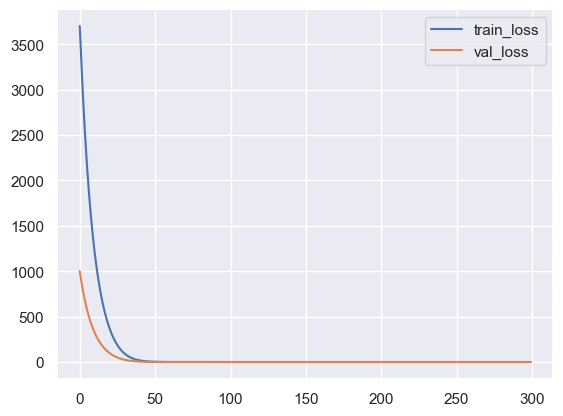

Finished Training
Epoch 1/300


100%|██████████| 13/13 [00:00<00:00, 267.36it/s]


Train Loss: 6703.926361083984


100%|██████████| 4/4 [00:00<00:00, 1047.40it/s]


Epoch 2/300


100%|██████████| 13/13 [00:00<00:00, 303.35it/s]


Train Loss: 5567.516021728516


100%|██████████| 4/4 [00:00<00:00, 1011.41it/s]


Epoch 3/300


100%|██████████| 13/13 [00:00<00:00, 288.68it/s]


Train Loss: 4576.614990234375


100%|██████████| 4/4 [00:00<00:00, 1094.12it/s]


Epoch 4/300


100%|██████████| 13/13 [00:00<00:00, 285.72it/s]


Train Loss: 3738.48828125


100%|██████████| 4/4 [00:00<00:00, 1058.23it/s]


Epoch 5/300


100%|██████████| 13/13 [00:00<00:00, 304.77it/s]


Train Loss: 3047.0243072509766


100%|██████████| 4/4 [00:00<00:00, 965.71it/s]


Epoch 6/300


100%|██████████| 13/13 [00:00<00:00, 207.54it/s]


Train Loss: 2481.3509674072266


100%|██████████| 4/4 [00:00<00:00, 833.53it/s]


Epoch 7/300


100%|██████████| 13/13 [00:00<00:00, 265.32it/s]


Train Loss: 2018.919662475586


100%|██████████| 4/4 [00:00<00:00, 997.99it/s]


Epoch 8/300


100%|██████████| 13/13 [00:00<00:00, 151.85it/s]


Train Loss: 1640.2643203735352


100%|██████████| 4/4 [00:00<00:00, 1064.61it/s]


Epoch 9/300


100%|██████████| 13/13 [00:00<00:00, 251.27it/s]


Train Loss: 1329.5958251953125


100%|██████████| 4/4 [00:00<00:00, 785.85it/s]


Epoch 10/300


100%|██████████| 13/13 [00:00<00:00, 125.42it/s]


Train Loss: 1074.2416152954102


100%|██████████| 4/4 [00:00<00:00, 632.03it/s]


Epoch 11/300


100%|██████████| 13/13 [00:00<00:00, 125.87it/s]


Train Loss: 864.189380645752


100%|██████████| 4/4 [00:00<00:00, 967.38it/s]


Epoch 12/300


100%|██████████| 13/13 [00:00<00:00, 289.47it/s]


Train Loss: 691.5186004638672


100%|██████████| 4/4 [00:00<00:00, 1052.85it/s]


Epoch 13/300


100%|██████████| 13/13 [00:00<00:00, 310.79it/s]


Train Loss: 549.907642364502


100%|██████████| 4/4 [00:00<00:00, 1026.44it/s]


Epoch 14/300


100%|██████████| 13/13 [00:00<00:00, 299.35it/s]


Train Loss: 434.2557563781738


100%|██████████| 4/4 [00:00<00:00, 1029.02it/s]


Epoch 15/300


100%|██████████| 13/13 [00:00<00:00, 289.02it/s]


Train Loss: 340.3369483947754


100%|██████████| 4/4 [00:00<00:00, 978.21it/s]


Epoch 16/300


100%|██████████| 13/13 [00:00<00:00, 232.62it/s]


Train Loss: 264.588077545166


100%|██████████| 4/4 [00:00<00:00, 1116.03it/s]


Epoch 17/300


100%|██████████| 13/13 [00:00<00:00, 287.50it/s]


Train Loss: 203.99124336242676


100%|██████████| 4/4 [00:00<00:00, 1009.82it/s]


Epoch 18/300


100%|██████████| 13/13 [00:00<00:00, 212.90it/s]


Train Loss: 155.93887424468994


100%|██████████| 4/4 [00:00<00:00, 1041.93it/s]


Epoch 19/300


100%|██████████| 13/13 [00:00<00:00, 293.13it/s]


Train Loss: 118.1682243347168


100%|██████████| 4/4 [00:00<00:00, 106.18it/s]


Epoch 20/300


100%|██████████| 13/13 [00:00<00:00, 185.73it/s]


Train Loss: 86.09435844421387


100%|██████████| 4/4 [00:00<00:00, 525.62it/s]


Epoch 21/300


100%|██████████| 13/13 [00:00<00:00, 214.83it/s]


Train Loss: 56.940972328186035


100%|██████████| 4/4 [00:00<00:00, 1026.69it/s]


Epoch 22/300


100%|██████████| 13/13 [00:00<00:00, 285.97it/s]


Train Loss: 35.9821252822876


100%|██████████| 4/4 [00:00<00:00, 1080.52it/s]


Epoch 23/300


100%|██████████| 13/13 [00:00<00:00, 289.43it/s]


Train Loss: 22.335530400276184


100%|██████████| 4/4 [00:00<00:00, 918.70it/s]


Epoch 24/300


100%|██████████| 13/13 [00:00<00:00, 299.50it/s]


Train Loss: 13.703860759735107


100%|██████████| 4/4 [00:00<00:00, 1167.60it/s]


Epoch 25/300


100%|██████████| 13/13 [00:00<00:00, 318.77it/s]


Train Loss: 8.32180631160736


100%|██████████| 4/4 [00:00<00:00, 1161.45it/s]


Epoch 26/300


100%|██████████| 13/13 [00:00<00:00, 308.23it/s]


Train Loss: 4.996211767196655


100%|██████████| 4/4 [00:00<00:00, 1113.80it/s]


Epoch 27/300


100%|██████████| 13/13 [00:00<00:00, 321.42it/s]


Train Loss: 2.9731240570545197


100%|██████████| 4/4 [00:00<00:00, 1081.91it/s]


Epoch 28/300


100%|██████████| 13/13 [00:00<00:00, 125.24it/s]


Train Loss: 1.7516545578837395


100%|██████████| 4/4 [00:00<00:00, 1081.15it/s]


Epoch 29/300


100%|██████████| 13/13 [00:00<00:00, 274.72it/s]


Train Loss: 1.0234466046094894


100%|██████████| 4/4 [00:00<00:00, 1029.02it/s]


Epoch 30/300


100%|██████████| 13/13 [00:00<00:00, 108.81it/s]


Train Loss: 0.6005326770246029


100%|██████████| 4/4 [00:00<00:00, 384.69it/s]


Epoch 31/300


100%|██████████| 13/13 [00:00<00:00, 117.18it/s]


Train Loss: 0.3601473607122898


100%|██████████| 4/4 [00:00<00:00, 883.01it/s]


Epoch 32/300


100%|██████████| 13/13 [00:00<00:00, 182.95it/s]


Train Loss: 0.21537104900926352


100%|██████████| 4/4 [00:00<00:00, 1009.58it/s]


Epoch 33/300


100%|██████████| 13/13 [00:00<00:00, 291.01it/s]


Train Loss: 0.13712861016392708


100%|██████████| 4/4 [00:00<00:00, 990.57it/s]


Epoch 34/300


100%|██████████| 13/13 [00:00<00:00, 282.56it/s]


Train Loss: 0.09732753643766046


100%|██████████| 4/4 [00:00<00:00, 1006.31it/s]


Epoch 35/300


100%|██████████| 13/13 [00:00<00:00, 283.01it/s]


Train Loss: 0.07060996210202575


100%|██████████| 4/4 [00:00<00:00, 1004.74it/s]


Epoch 36/300


100%|██████████| 13/13 [00:00<00:00, 258.59it/s]


Train Loss: 0.06282308546360582


100%|██████████| 4/4 [00:00<00:00, 952.44it/s]


Epoch 37/300


100%|██████████| 13/13 [00:00<00:00, 301.57it/s]


Train Loss: 0.05620640574488789


100%|██████████| 4/4 [00:00<00:00, 944.50it/s]


Epoch 38/300


100%|██████████| 13/13 [00:00<00:00, 292.29it/s]


Train Loss: 0.057054735836572945


100%|██████████| 4/4 [00:00<00:00, 1138.60it/s]


Epoch 39/300


100%|██████████| 13/13 [00:00<00:00, 307.81it/s]


Train Loss: 0.05295626726001501


100%|██████████| 4/4 [00:00<00:00, 997.28it/s]


Epoch 40/300


100%|██████████| 13/13 [00:00<00:00, 289.27it/s]


Train Loss: 0.04858720826450735


100%|██████████| 4/4 [00:00<00:00, 953.09it/s]


Epoch 41/300


100%|██████████| 13/13 [00:00<00:00, 269.24it/s]


Train Loss: 0.04782244155649096


100%|██████████| 4/4 [00:00<00:00, 971.58it/s]


Epoch 42/300


100%|██████████| 13/13 [00:00<00:00, 289.14it/s]


Train Loss: 0.04851549444720149


100%|██████████| 4/4 [00:00<00:00, 1055.10it/s]


Epoch 43/300


100%|██████████| 13/13 [00:00<00:00, 162.43it/s]


Train Loss: 0.04720194614492357


100%|██████████| 4/4 [00:00<00:00, 1025.31it/s]


Epoch 44/300


100%|██████████| 13/13 [00:00<00:00, 311.38it/s]


Train Loss: 0.0500421553151682


100%|██████████| 4/4 [00:00<00:00, 987.94it/s]


Epoch 45/300


100%|██████████| 13/13 [00:00<00:00, 261.86it/s]


Train Loss: 0.05359186802525073


100%|██████████| 4/4 [00:00<00:00, 933.26it/s]


Epoch 46/300


100%|██████████| 13/13 [00:00<00:00, 303.41it/s]


Train Loss: 0.049042026745155454


100%|██████████| 4/4 [00:00<00:00, 931.76it/s]


Epoch 47/300


100%|██████████| 13/13 [00:00<00:00, 298.40it/s]


Train Loss: 0.049337717704474926


100%|██████████| 4/4 [00:00<00:00, 1011.89it/s]


Epoch 48/300


100%|██████████| 13/13 [00:00<00:00, 292.91it/s]


Train Loss: 0.04850943083874881


100%|██████████| 4/4 [00:00<00:00, 1012.63it/s]


Epoch 49/300


100%|██████████| 13/13 [00:00<00:00, 294.45it/s]


Train Loss: 0.05124565726146102


100%|██████████| 4/4 [00:00<00:00, 996.51it/s]


Epoch 50/300


100%|██████████| 13/13 [00:00<00:00, 283.39it/s]


Train Loss: 0.05195044190622866


100%|██████████| 4/4 [00:00<00:00, 886.70it/s]


Epoch 51/300


100%|██████████| 13/13 [00:00<00:00, 292.08it/s]


Train Loss: 0.05442623083945364


100%|██████████| 4/4 [00:00<00:00, 1031.43it/s]


Epoch 52/300


100%|██████████| 13/13 [00:00<00:00, 307.24it/s]


Train Loss: 0.0471566075575538


100%|██████████| 4/4 [00:00<00:00, 974.23it/s]


Epoch 53/300


100%|██████████| 13/13 [00:00<00:00, 301.76it/s]


Train Loss: 0.05065340211149305


100%|██████████| 4/4 [00:00<00:00, 987.88it/s]


Epoch 54/300


100%|██████████| 13/13 [00:00<00:00, 318.22it/s]


Train Loss: 0.05015560588799417


100%|██████████| 4/4 [00:00<00:00, 971.86it/s]


Epoch 55/300


100%|██████████| 13/13 [00:00<00:00, 283.86it/s]


Train Loss: 0.04730030702194199


100%|██████████| 4/4 [00:00<00:00, 962.05it/s]


Epoch 56/300


100%|██████████| 13/13 [00:00<00:00, 309.35it/s]


Train Loss: 0.04984243318904191


100%|██████████| 4/4 [00:00<00:00, 1047.99it/s]


Epoch 57/300


100%|██████████| 13/13 [00:00<00:00, 328.28it/s]


Train Loss: 0.04799781210022047


100%|██████████| 4/4 [00:00<00:00, 982.79it/s]


Epoch 58/300


100%|██████████| 13/13 [00:00<00:00, 310.38it/s]


Train Loss: 0.04941299476195127


100%|██████████| 4/4 [00:00<00:00, 1098.56it/s]


Epoch 59/300


100%|██████████| 13/13 [00:00<00:00, 309.31it/s]


Train Loss: 0.049492964579258114


100%|██████████| 4/4 [00:00<00:00, 1059.37it/s]


Epoch 60/300


100%|██████████| 13/13 [00:00<00:00, 286.45it/s]


Train Loss: 0.04934646387118846


100%|██████████| 4/4 [00:00<00:00, 1115.73it/s]


Epoch 61/300


100%|██████████| 13/13 [00:00<00:00, 309.03it/s]


Train Loss: 0.050448069523554295


100%|██████████| 4/4 [00:00<00:00, 1048.44it/s]


Epoch 62/300


100%|██████████| 13/13 [00:00<00:00, 277.36it/s]


Train Loss: 0.0477749765268527


100%|██████████| 4/4 [00:00<00:00, 1025.38it/s]


Epoch 63/300


100%|██████████| 13/13 [00:00<00:00, 300.91it/s]


Train Loss: 0.05104028305504471


100%|██████████| 4/4 [00:00<00:00, 994.79it/s]


Epoch 64/300


100%|██████████| 13/13 [00:00<00:00, 299.78it/s]


Train Loss: 0.0535314044682309


100%|██████████| 4/4 [00:00<00:00, 1080.52it/s]


Epoch 65/300


100%|██████████| 13/13 [00:00<00:00, 295.72it/s]


Train Loss: 0.051139798713847995


100%|██████████| 4/4 [00:00<00:00, 1075.60it/s]


Epoch 66/300


100%|██████████| 13/13 [00:00<00:00, 296.37it/s]


Train Loss: 0.04932559980079532


100%|██████████| 4/4 [00:00<00:00, 958.10it/s]


Epoch 67/300


100%|██████████| 13/13 [00:00<00:00, 312.93it/s]


Train Loss: 0.04759402573108673


100%|██████████| 4/4 [00:00<00:00, 1030.10it/s]


Epoch 68/300


100%|██████████| 13/13 [00:00<00:00, 303.15it/s]


Train Loss: 0.04812743928050622


100%|██████████| 4/4 [00:00<00:00, 1008.37it/s]


Epoch 69/300


100%|██████████| 13/13 [00:00<00:00, 277.85it/s]


Train Loss: 0.05193638789933175


100%|██████████| 4/4 [00:00<00:00, 1068.95it/s]


Epoch 70/300


100%|██████████| 13/13 [00:00<00:00, 298.39it/s]


Train Loss: 0.053417907329276204


100%|██████████| 4/4 [00:00<00:00, 1085.55it/s]


Epoch 71/300


100%|██████████| 13/13 [00:00<00:00, 291.68it/s]


Train Loss: 0.05232083285227418


100%|██████████| 4/4 [00:00<00:00, 1036.01it/s]


Epoch 72/300


100%|██████████| 13/13 [00:00<00:00, 295.72it/s]


Train Loss: 0.05013160506496206


100%|██████████| 4/4 [00:00<00:00, 1014.65it/s]


Epoch 73/300


100%|██████████| 13/13 [00:00<00:00, 302.33it/s]


Train Loss: 0.048058402026072145


100%|██████████| 4/4 [00:00<00:00, 1056.23it/s]


Epoch 74/300


100%|██████████| 13/13 [00:00<00:00, 304.34it/s]


Train Loss: 0.047363725083414465


100%|██████████| 4/4 [00:00<00:00, 1057.63it/s]


Epoch 75/300


100%|██████████| 13/13 [00:00<00:00, 317.95it/s]


Train Loss: 0.05120874324347824


100%|██████████| 4/4 [00:00<00:00, 1056.23it/s]


Epoch 76/300


100%|██████████| 13/13 [00:00<00:00, 303.15it/s]


Train Loss: 0.050634986895602196


100%|██████████| 4/4 [00:00<00:00, 930.62it/s]


Epoch 77/300


100%|██████████| 13/13 [00:00<00:00, 323.89it/s]


Train Loss: 0.05183212284464389


100%|██████████| 4/4 [00:00<00:00, 934.35it/s]


Epoch 78/300


100%|██████████| 13/13 [00:00<00:00, 290.57it/s]


Train Loss: 0.048726047622039914


100%|██████████| 4/4 [00:00<00:00, 935.92it/s]


Epoch 79/300


100%|██████████| 13/13 [00:00<00:00, 305.69it/s]


Train Loss: 0.05655452923383564


100%|██████████| 4/4 [00:00<00:00, 987.19it/s]


Epoch 80/300


100%|██████████| 13/13 [00:00<00:00, 294.18it/s]


Train Loss: 0.05196451797382906


100%|██████████| 4/4 [00:00<00:00, 925.23it/s]


Epoch 81/300


100%|██████████| 13/13 [00:00<00:00, 292.05it/s]


Train Loss: 0.0511984066106379


100%|██████████| 4/4 [00:00<00:00, 935.65it/s]


Epoch 82/300


100%|██████████| 13/13 [00:00<00:00, 228.49it/s]


Train Loss: 0.05133107432629913


100%|██████████| 4/4 [00:00<00:00, 1098.56it/s]


Epoch 83/300


100%|██████████| 13/13 [00:00<00:00, 289.83it/s]


Train Loss: 0.05042497080285102


100%|██████████| 4/4 [00:00<00:00, 971.35it/s]


Epoch 84/300


100%|██████████| 13/13 [00:00<00:00, 167.18it/s]


Train Loss: 0.05134743975941092


100%|██████████| 4/4 [00:00<00:00, 1080.17it/s]


Epoch 85/300


100%|██████████| 13/13 [00:00<00:00, 287.68it/s]


Train Loss: 0.05053743807366118


100%|██████████| 4/4 [00:00<00:00, 1048.84it/s]


Epoch 86/300


100%|██████████| 13/13 [00:00<00:00, 300.11it/s]


Train Loss: 0.05268732365220785


100%|██████████| 4/4 [00:00<00:00, 1109.90it/s]


Epoch 87/300


100%|██████████| 13/13 [00:00<00:00, 298.39it/s]


Train Loss: 0.05141468526562676


100%|██████████| 4/4 [00:00<00:00, 1074.98it/s]


Epoch 88/300


100%|██████████| 13/13 [00:00<00:00, 296.89it/s]


Train Loss: 0.04720237082801759


100%|██████████| 4/4 [00:00<00:00, 1123.27it/s]


Epoch 89/300


100%|██████████| 13/13 [00:00<00:00, 303.04it/s]


Train Loss: 0.053420146577991545


100%|██████████| 4/4 [00:00<00:00, 1081.91it/s]


Epoch 90/300


100%|██████████| 13/13 [00:00<00:00, 292.38it/s]


Train Loss: 0.055643940228037536


100%|██████████| 4/4 [00:00<00:00, 1076.70it/s]


Epoch 91/300


100%|██████████| 13/13 [00:00<00:00, 303.46it/s]


Train Loss: 0.051177634100895375


100%|██████████| 4/4 [00:00<00:00, 1067.86it/s]


Epoch 92/300


100%|██████████| 13/13 [00:00<00:00, 286.35it/s]


Train Loss: 0.05160916142631322


100%|██████████| 4/4 [00:00<00:00, 991.85it/s]


Epoch 93/300


100%|██████████| 13/13 [00:00<00:00, 293.31it/s]


Train Loss: 0.04929612675914541


100%|██████████| 4/4 [00:00<00:00, 971.86it/s]


Epoch 94/300


100%|██████████| 13/13 [00:00<00:00, 288.43it/s]


Train Loss: 0.049678651557769626


100%|██████████| 4/4 [00:00<00:00, 1070.93it/s]


Epoch 95/300


100%|██████████| 13/13 [00:00<00:00, 272.71it/s]


Train Loss: 0.049447304161731154


100%|██████████| 4/4 [00:00<00:00, 1030.67it/s]


Epoch 96/300


100%|██████████| 13/13 [00:00<00:00, 300.14it/s]


Train Loss: 0.04945455549750477


100%|██████████| 4/4 [00:00<00:00, 1060.64it/s]


Epoch 97/300


100%|██████████| 13/13 [00:00<00:00, 295.66it/s]


Train Loss: 0.04974879592191428


100%|██████████| 4/4 [00:00<00:00, 998.94it/s]


Epoch 98/300


100%|██████████| 13/13 [00:00<00:00, 316.69it/s]


Train Loss: 0.04855097795370966


100%|██████████| 4/4 [00:00<00:00, 1047.92it/s]


Epoch 99/300


100%|██████████| 13/13 [00:00<00:00, 287.67it/s]


Train Loss: 0.05141449091024697


100%|██████████| 4/4 [00:00<00:00, 988.17it/s]


Epoch 100/300


100%|██████████| 13/13 [00:00<00:00, 244.93it/s]


Train Loss: 0.04967467807000503


100%|██████████| 4/4 [00:00<00:00, 952.82it/s]


Epoch 101/300


100%|██████████| 13/13 [00:00<00:00, 261.99it/s]


Train Loss: 0.05284173844847828


100%|██████████| 4/4 [00:00<00:00, 966.21it/s]


Epoch 102/300


100%|██████████| 13/13 [00:00<00:00, 290.94it/s]


Train Loss: 0.053587062866427004


100%|██████████| 4/4 [00:00<00:00, 1020.45it/s]


Epoch 103/300


100%|██████████| 13/13 [00:00<00:00, 287.62it/s]


Train Loss: 0.051527564064599574


100%|██████████| 4/4 [00:00<00:00, 1019.09it/s]


Epoch 104/300


100%|██████████| 13/13 [00:00<00:00, 267.69it/s]


Train Loss: 0.047675380716100335


100%|██████████| 4/4 [00:00<00:00, 1087.24it/s]


Epoch 105/300


100%|██████████| 13/13 [00:00<00:00, 317.13it/s]


Train Loss: 0.047403385979123414


100%|██████████| 4/4 [00:00<00:00, 1012.99it/s]


Epoch 106/300


100%|██████████| 13/13 [00:00<00:00, 315.71it/s]


Train Loss: 0.047488281212281436


100%|██████████| 4/4 [00:00<00:00, 952.60it/s]


Epoch 107/300


100%|██████████| 13/13 [00:00<00:00, 305.91it/s]


Train Loss: 0.05041461170185357


100%|██████████| 4/4 [00:00<00:00, 1047.07it/s]


Epoch 108/300


100%|██████████| 13/13 [00:00<00:00, 288.17it/s]


Train Loss: 0.051613438059575856


100%|██████████| 4/4 [00:00<00:00, 944.72it/s]


Epoch 109/300


100%|██████████| 13/13 [00:00<00:00, 258.57it/s]


Train Loss: 0.04848291049711406


100%|██████████| 4/4 [00:00<00:00, 1045.18it/s]


Epoch 110/300


100%|██████████| 13/13 [00:00<00:00, 301.19it/s]


Train Loss: 0.049207348842173815


100%|██████████| 4/4 [00:00<00:00, 1057.37it/s]


Epoch 111/300


100%|██████████| 13/13 [00:00<00:00, 278.22it/s]


Train Loss: 0.05224601400550455


100%|██████████| 4/4 [00:00<00:00, 1042.26it/s]


Epoch 112/300


100%|██████████| 13/13 [00:00<00:00, 281.99it/s]


Train Loss: 0.05756154633127153


100%|██████████| 4/4 [00:00<00:00, 965.65it/s]


Epoch 113/300


100%|██████████| 13/13 [00:00<00:00, 304.76it/s]


Train Loss: 0.05668006127234548


100%|██████████| 4/4 [00:00<00:00, 1015.69it/s]


Epoch 114/300


100%|██████████| 13/13 [00:00<00:00, 245.92it/s]


Train Loss: 0.05708711745683104


100%|██████████| 4/4 [00:00<00:00, 966.21it/s]


Epoch 115/300


100%|██████████| 13/13 [00:00<00:00, 305.59it/s]


Train Loss: 0.053030113980639726


100%|██████████| 4/4 [00:00<00:00, 1054.77it/s]


Epoch 116/300


100%|██████████| 13/13 [00:00<00:00, 311.09it/s]


Train Loss: 0.04934066202258691


100%|██████████| 4/4 [00:00<00:00, 1070.04it/s]


Epoch 117/300


100%|██████████| 13/13 [00:00<00:00, 310.77it/s]


Train Loss: 0.04883394396165386


100%|██████████| 4/4 [00:00<00:00, 1079.55it/s]


Epoch 118/300


100%|██████████| 13/13 [00:00<00:00, 294.51it/s]


Train Loss: 0.048433438350912184


100%|██████████| 4/4 [00:00<00:00, 1078.37it/s]


Epoch 119/300


100%|██████████| 13/13 [00:00<00:00, 260.57it/s]


Train Loss: 0.050432615797035396


100%|██████████| 4/4 [00:00<00:00, 1057.97it/s]


Epoch 120/300


100%|██████████| 13/13 [00:00<00:00, 298.56it/s]


Train Loss: 0.053408089210279286


100%|██████████| 4/4 [00:00<00:00, 1139.29it/s]


Epoch 121/300


100%|██████████| 13/13 [00:00<00:00, 299.55it/s]


Train Loss: 0.057232415420003235


100%|██████████| 4/4 [00:00<00:00, 1018.84it/s]


Epoch 122/300


100%|██████████| 13/13 [00:00<00:00, 303.25it/s]


Train Loss: 0.048427815665490925


100%|██████████| 4/4 [00:00<00:00, 945.89it/s]


Epoch 123/300


100%|██████████| 13/13 [00:00<00:00, 280.13it/s]


Train Loss: 0.049874886753968894


100%|██████████| 4/4 [00:00<00:00, 963.38it/s]


Epoch 124/300


100%|██████████| 13/13 [00:00<00:00, 160.61it/s]


Train Loss: 0.049996059329714626


100%|██████████| 4/4 [00:00<00:00, 864.49it/s]


Epoch 125/300


100%|██████████| 13/13 [00:00<00:00, 295.41it/s]


Train Loss: 0.05069648509379476


100%|██████████| 4/4 [00:00<00:00, 956.24it/s]


Epoch 126/300


100%|██████████| 13/13 [00:00<00:00, 284.96it/s]


Train Loss: 0.052461121464148164


100%|██████████| 4/4 [00:00<00:00, 973.50it/s]


Epoch 127/300


100%|██████████| 13/13 [00:00<00:00, 279.19it/s]


Train Loss: 0.05223727086558938


100%|██████████| 4/4 [00:00<00:00, 1025.44it/s]


Epoch 128/300


100%|██████████| 13/13 [00:00<00:00, 265.01it/s]


Train Loss: 0.054235430201515555


100%|██████████| 4/4 [00:00<00:00, 997.52it/s]


Epoch 129/300


100%|██████████| 13/13 [00:00<00:00, 301.33it/s]


Train Loss: 0.05093185545410961


100%|██████████| 4/4 [00:00<00:00, 1056.83it/s]


Epoch 130/300


100%|██████████| 13/13 [00:00<00:00, 299.13it/s]


Train Loss: 0.04802759952144697


100%|██████████| 4/4 [00:00<00:00, 557.42it/s]


Epoch 131/300


100%|██████████| 13/13 [00:00<00:00, 300.52it/s]


Train Loss: 0.04959998867707327


100%|██████████| 4/4 [00:00<00:00, 1006.31it/s]


Epoch 132/300


100%|██████████| 13/13 [00:00<00:00, 300.24it/s]


Train Loss: 0.04897231073118746


100%|██████████| 4/4 [00:00<00:00, 1048.25it/s]


Epoch 133/300


100%|██████████| 13/13 [00:00<00:00, 241.88it/s]


Train Loss: 0.048365351860411465


100%|██████████| 4/4 [00:00<00:00, 1016.74it/s]


Epoch 134/300


100%|██████████| 13/13 [00:00<00:00, 328.91it/s]


Train Loss: 0.046179817465599626


100%|██████████| 4/4 [00:00<00:00, 985.74it/s]


Epoch 135/300


100%|██████████| 13/13 [00:00<00:00, 299.28it/s]


Train Loss: 0.04692312749102712


100%|██████████| 4/4 [00:00<00:00, 1149.44it/s]


Epoch 136/300


100%|██████████| 13/13 [00:00<00:00, 297.03it/s]


Train Loss: 0.049225115682929754


100%|██████████| 4/4 [00:00<00:00, 1028.58it/s]


Epoch 137/300


100%|██████████| 13/13 [00:00<00:00, 288.56it/s]


Train Loss: 0.04903219500556588


100%|██████████| 4/4 [00:00<00:00, 1123.95it/s]


Epoch 138/300


100%|██████████| 13/13 [00:00<00:00, 274.34it/s]


Train Loss: 0.051537766645196825


100%|██████████| 4/4 [00:00<00:00, 1048.44it/s]


Epoch 139/300


100%|██████████| 13/13 [00:00<00:00, 279.50it/s]


Train Loss: 0.04923296405468136


100%|██████████| 4/4 [00:00<00:00, 959.47it/s]


Epoch 140/300


100%|██████████| 13/13 [00:00<00:00, 318.25it/s]


Train Loss: 0.05096682906150818


100%|██████████| 4/4 [00:00<00:00, 932.84it/s]


Epoch 141/300


100%|██████████| 13/13 [00:00<00:00, 304.14it/s]


Train Loss: 0.0482105998089537


100%|██████████| 4/4 [00:00<00:00, 1065.56it/s]


Epoch 142/300


100%|██████████| 13/13 [00:00<00:00, 284.74it/s]


Train Loss: 0.04648977756733075


100%|██████████| 4/4 [00:00<00:00, 925.03it/s]


Epoch 143/300


100%|██████████| 13/13 [00:00<00:00, 297.31it/s]


Train Loss: 0.0470138203818351


100%|██████████| 4/4 [00:00<00:00, 955.97it/s]


Epoch 144/300


100%|██████████| 13/13 [00:00<00:00, 305.41it/s]


Train Loss: 0.04807561985217035


100%|██████████| 4/4 [00:00<00:00, 916.79it/s]


Epoch 145/300


100%|██████████| 13/13 [00:00<00:00, 324.85it/s]


Train Loss: 0.05124255362898111


100%|██████████| 4/4 [00:00<00:00, 964.54it/s]


Epoch 146/300


100%|██████████| 13/13 [00:00<00:00, 285.22it/s]


Train Loss: 0.05210280558094382


100%|██████████| 4/4 [00:00<00:00, 1056.83it/s]


Epoch 147/300


100%|██████████| 13/13 [00:00<00:00, 299.57it/s]


Train Loss: 0.050139210070483387


100%|██████████| 4/4 [00:00<00:00, 1006.01it/s]


Epoch 148/300


100%|██████████| 13/13 [00:00<00:00, 226.61it/s]


Train Loss: 0.04994082963094115


100%|██████████| 4/4 [00:00<00:00, 992.56it/s]


Epoch 149/300


100%|██████████| 13/13 [00:00<00:00, 298.01it/s]


Train Loss: 0.048606701486278325


100%|██████████| 4/4 [00:00<00:00, 1067.52it/s]


Epoch 150/300


100%|██████████| 13/13 [00:00<00:00, 302.85it/s]


Train Loss: 0.046752732479944825


100%|██████████| 4/4 [00:00<00:00, 1030.92it/s]


Epoch 151/300


100%|██████████| 13/13 [00:00<00:00, 313.21it/s]


Train Loss: 0.05054470640607178


100%|██████████| 4/4 [00:00<00:00, 1057.57it/s]


Epoch 152/300


100%|██████████| 13/13 [00:00<00:00, 326.76it/s]


Train Loss: 0.049471312726382166


100%|██████████| 4/4 [00:00<00:00, 1029.34it/s]


Epoch 153/300


100%|██████████| 13/13 [00:00<00:00, 280.57it/s]


Train Loss: 0.05408335896208882


100%|██████████| 4/4 [00:00<00:00, 1063.87it/s]


Epoch 154/300


100%|██████████| 13/13 [00:00<00:00, 304.93it/s]


Train Loss: 0.049221870431210846


100%|██████████| 4/4 [00:00<00:00, 998.82it/s]


Epoch 155/300


100%|██████████| 13/13 [00:00<00:00, 301.58it/s]


Train Loss: 0.04935263725928962


100%|██████████| 4/4 [00:00<00:00, 1050.15it/s]


Epoch 156/300


100%|██████████| 13/13 [00:00<00:00, 324.79it/s]


Train Loss: 0.04896460857708007


100%|██████████| 4/4 [00:00<00:00, 997.99it/s]


Epoch 157/300


100%|██████████| 13/13 [00:00<00:00, 319.03it/s]


Train Loss: 0.05120363237801939


100%|██████████| 4/4 [00:00<00:00, 1031.43it/s]


Epoch 158/300


100%|██████████| 13/13 [00:00<00:00, 286.52it/s]


Train Loss: 0.051415614667348564


100%|██████████| 4/4 [00:00<00:00, 1086.40it/s]


Epoch 159/300


100%|██████████| 13/13 [00:00<00:00, 277.05it/s]


Train Loss: 0.052779077435843647


100%|██████████| 4/4 [00:00<00:00, 1061.85it/s]


Epoch 160/300


100%|██████████| 13/13 [00:00<00:00, 297.73it/s]


Train Loss: 0.050038147368468344


100%|██████████| 4/4 [00:00<00:00, 1045.24it/s]


Epoch 161/300


100%|██████████| 13/13 [00:00<00:00, 301.76it/s]


Train Loss: 0.05163550493307412


100%|██████████| 4/4 [00:00<00:00, 1052.66it/s]


Epoch 162/300


100%|██████████| 13/13 [00:00<00:00, 302.72it/s]


Train Loss: 0.05152813083259389


100%|██████████| 4/4 [00:00<00:00, 1049.89it/s]


Epoch 163/300


100%|██████████| 13/13 [00:00<00:00, 277.55it/s]


Train Loss: 0.04858782305382192


100%|██████████| 4/4 [00:00<00:00, 1008.55it/s]


Epoch 164/300


100%|██████████| 13/13 [00:00<00:00, 170.24it/s]


Train Loss: 0.053004659654106945


100%|██████████| 4/4 [00:00<00:00, 1073.54it/s]


Epoch 165/300


100%|██████████| 13/13 [00:00<00:00, 304.52it/s]


Train Loss: 0.049340337223839015


100%|██████████| 4/4 [00:00<00:00, 974.23it/s]


Epoch 166/300


100%|██████████| 13/13 [00:00<00:00, 301.46it/s]


Train Loss: 0.04612519690999761


100%|██████████| 4/4 [00:00<00:00, 990.10it/s]


Epoch 167/300


100%|██████████| 13/13 [00:00<00:00, 269.53it/s]


Train Loss: 0.04981641343329102


100%|██████████| 4/4 [00:00<00:00, 1035.50it/s]


Epoch 168/300


100%|██████████| 13/13 [00:00<00:00, 292.85it/s]


Train Loss: 0.04984362341929227


100%|██████████| 4/4 [00:00<00:00, 1070.32it/s]


Epoch 169/300


100%|██████████| 13/13 [00:00<00:00, 283.66it/s]


Train Loss: 0.04780867416411638


100%|██████████| 4/4 [00:00<00:00, 1024.31it/s]


Epoch 170/300


100%|██████████| 13/13 [00:00<00:00, 298.58it/s]


Train Loss: 0.04957353218924254


100%|██████████| 4/4 [00:00<00:00, 1022.44it/s]


Epoch 171/300


100%|██████████| 13/13 [00:00<00:00, 315.17it/s]


Train Loss: 0.05505373829510063


100%|██████████| 4/4 [00:00<00:00, 984.75it/s]


Epoch 172/300


100%|██████████| 13/13 [00:00<00:00, 266.46it/s]


Train Loss: 0.04690872930223122


100%|██████████| 4/4 [00:00<00:00, 956.08it/s]


Epoch 173/300


100%|██████████| 13/13 [00:00<00:00, 283.03it/s]


Train Loss: 0.05164124065777287


100%|██████████| 4/4 [00:00<00:00, 983.02it/s]


Epoch 174/300


100%|██████████| 13/13 [00:00<00:00, 298.42it/s]


Train Loss: 0.04925952397752553


100%|██████████| 4/4 [00:00<00:00, 1000.01it/s]


Epoch 175/300


100%|██████████| 13/13 [00:00<00:00, 134.76it/s]


Train Loss: 0.04677639715373516


100%|██████████| 4/4 [00:00<00:00, 591.89it/s]


Epoch 176/300


100%|██████████| 13/13 [00:00<00:00, 202.99it/s]


Train Loss: 0.05021390097681433


100%|██████████| 4/4 [00:00<00:00, 940.95it/s]


Epoch 177/300


100%|██████████| 13/13 [00:00<00:00, 233.99it/s]


Train Loss: 0.053009410155937076


100%|██████████| 4/4 [00:00<00:00, 1106.75it/s]


Epoch 178/300


100%|██████████| 13/13 [00:00<00:00, 215.49it/s]


Train Loss: 0.052061490598134696


100%|██████████| 4/4 [00:00<00:00, 986.95it/s]


Epoch 179/300


100%|██████████| 13/13 [00:00<00:00, 311.77it/s]


Train Loss: 0.056491709779947996


100%|██████████| 4/4 [00:00<00:00, 1054.04it/s]


Epoch 180/300


100%|██████████| 13/13 [00:00<00:00, 235.93it/s]


Train Loss: 0.0537395317805931


100%|██████████| 4/4 [00:00<00:00, 1122.97it/s]


Epoch 181/300


100%|██████████| 13/13 [00:00<00:00, 220.88it/s]


Train Loss: 0.05332561780232936


100%|██████████| 4/4 [00:00<00:00, 1028.02it/s]


Epoch 182/300


100%|██████████| 13/13 [00:00<00:00, 277.13it/s]


Train Loss: 0.053038647514767945


100%|██████████| 4/4 [00:00<00:00, 877.38it/s]


Epoch 183/300


100%|██████████| 13/13 [00:00<00:00, 134.86it/s]


Train Loss: 0.053404753329232335


100%|██████████| 4/4 [00:00<00:00, 1099.50it/s]


Epoch 184/300


100%|██████████| 13/13 [00:00<00:00, 145.37it/s]


Train Loss: 0.05082184332422912


100%|██████████| 4/4 [00:00<00:00, 591.21it/s]


Epoch 185/300


100%|██████████| 13/13 [00:00<00:00, 257.29it/s]


Train Loss: 0.05574323853943497


100%|██████████| 4/4 [00:00<00:00, 1014.65it/s]


Epoch 186/300


100%|██████████| 13/13 [00:00<00:00, 315.40it/s]


Train Loss: 0.05349073628894985


100%|██████████| 4/4 [00:00<00:00, 1021.44it/s]


Epoch 187/300


100%|██████████| 13/13 [00:00<00:00, 307.72it/s]


Train Loss: 0.0520136752165854


100%|██████████| 4/4 [00:00<00:00, 1186.26it/s]


Epoch 188/300


100%|██████████| 13/13 [00:00<00:00, 311.99it/s]


Train Loss: 0.05421902588568628


100%|██████████| 4/4 [00:00<00:00, 954.44it/s]


Epoch 189/300


100%|██████████| 13/13 [00:00<00:00, 323.59it/s]


Train Loss: 0.05748030939139426


100%|██████████| 4/4 [00:00<00:00, 961.50it/s]


Epoch 190/300


100%|██████████| 13/13 [00:00<00:00, 240.54it/s]


Train Loss: 0.06107976008206606


100%|██████████| 4/4 [00:00<00:00, 928.30it/s]


Epoch 191/300


100%|██████████| 13/13 [00:00<00:00, 236.42it/s]


Train Loss: 0.05441440345020965


100%|██████████| 4/4 [00:00<00:00, 971.13it/s]


Epoch 192/300


100%|██████████| 13/13 [00:00<00:00, 213.61it/s]


Train Loss: 0.05184591026045382


100%|██████████| 4/4 [00:00<00:00, 1025.38it/s]


Epoch 193/300


100%|██████████| 13/13 [00:00<00:00, 186.29it/s]


Train Loss: 0.056628018035553396


100%|██████████| 4/4 [00:00<00:00, 1164.20it/s]


Epoch 194/300


100%|██████████| 13/13 [00:00<00:00, 185.51it/s]


Train Loss: 0.05246457736939192


100%|██████████| 4/4 [00:00<00:00, 839.28it/s]


Epoch 195/300


100%|██████████| 13/13 [00:00<00:00, 111.67it/s]


Train Loss: 0.0555621370440349


100%|██████████| 4/4 [00:00<00:00, 709.76it/s]


Epoch 196/300


100%|██████████| 13/13 [00:00<00:00, 138.27it/s]


Train Loss: 0.054166224552318454


100%|██████████| 4/4 [00:00<00:00, 943.92it/s]


Epoch 197/300


100%|██████████| 13/13 [00:00<00:00, 276.78it/s]


Train Loss: 0.05526645528152585


100%|██████████| 4/4 [00:00<00:00, 1053.45it/s]


Epoch 198/300


100%|██████████| 13/13 [00:00<00:00, 150.01it/s]


Train Loss: 0.051989437837619334


100%|██████████| 4/4 [00:00<00:00, 516.32it/s]


Epoch 199/300


100%|██████████| 13/13 [00:00<00:00, 174.42it/s]


Train Loss: 0.05415878421626985


100%|██████████| 4/4 [00:00<00:00, 813.36it/s]


Epoch 200/300


100%|██████████| 13/13 [00:00<00:00, 149.27it/s]


Train Loss: 0.055758237722329795


100%|██████████| 4/4 [00:00<00:00, 758.16it/s]


Epoch 201/300


100%|██████████| 13/13 [00:00<00:00, 200.40it/s]


Train Loss: 0.05272455734666437


100%|██████████| 4/4 [00:00<00:00, 591.73it/s]


Epoch 202/300


100%|██████████| 13/13 [00:00<00:00, 237.75it/s]


Train Loss: 0.04841997637413442


100%|██████████| 4/4 [00:00<00:00, 1134.82it/s]


Epoch 203/300


100%|██████████| 13/13 [00:00<00:00, 320.84it/s]


Train Loss: 0.04954605968669057


100%|██████████| 4/4 [00:00<00:00, 1065.83it/s]


Epoch 204/300


100%|██████████| 13/13 [00:00<00:00, 129.62it/s]


Train Loss: 0.048402876826003194


100%|██████████| 4/4 [00:00<00:00, 1027.20it/s]


Epoch 205/300


100%|██████████| 13/13 [00:00<00:00, 207.63it/s]


Train Loss: 0.050624979310669005


100%|██████████| 4/4 [00:00<00:00, 629.59it/s]


Epoch 206/300


100%|██████████| 13/13 [00:00<00:00, 162.53it/s]


Train Loss: 0.05113839410478249


100%|██████████| 4/4 [00:00<00:00, 1059.64it/s]


Epoch 207/300


100%|██████████| 13/13 [00:00<00:00, 271.56it/s]


Train Loss: 0.049317207594867796


100%|██████████| 4/4 [00:00<00:00, 958.37it/s]


Epoch 208/300


100%|██████████| 13/13 [00:00<00:00, 311.32it/s]


Train Loss: 0.0499702007509768


100%|██████████| 4/4 [00:00<00:00, 1053.45it/s]


Epoch 209/300


100%|██████████| 13/13 [00:00<00:00, 317.17it/s]


Train Loss: 0.050983215565793216


100%|██████████| 4/4 [00:00<00:00, 1190.13it/s]


Epoch 210/300


100%|██████████| 13/13 [00:00<00:00, 335.51it/s]


Train Loss: 0.04647822241531685


100%|██████████| 4/4 [00:00<00:00, 1113.29it/s]


Epoch 211/300


100%|██████████| 13/13 [00:00<00:00, 289.04it/s]


Train Loss: 0.05448058247566223


100%|██████████| 4/4 [00:00<00:00, 1128.11it/s]


Epoch 212/300


100%|██████████| 13/13 [00:00<00:00, 320.38it/s]


Train Loss: 0.05503345077158883


100%|██████████| 4/4 [00:00<00:00, 1082.33it/s]


Epoch 213/300


100%|██████████| 13/13 [00:00<00:00, 304.01it/s]


Train Loss: 0.0540933795273304


100%|██████████| 4/4 [00:00<00:00, 1096.77it/s]


Epoch 214/300


100%|██████████| 13/13 [00:00<00:00, 226.92it/s]


Train Loss: 0.05042051279451698


100%|██████████| 4/4 [00:00<00:00, 986.66it/s]


Epoch 215/300


100%|██████████| 13/13 [00:00<00:00, 294.56it/s]


Train Loss: 0.051974247326143086


100%|██████████| 4/4 [00:00<00:00, 1091.77it/s]


Epoch 216/300


100%|██████████| 13/13 [00:00<00:00, 119.57it/s]


Train Loss: 0.053789941244758666


100%|██████████| 4/4 [00:00<00:00, 1056.50it/s]


Epoch 217/300


100%|██████████| 13/13 [00:00<00:00, 276.64it/s]


Train Loss: 0.04788560722954571


100%|██████████| 4/4 [00:00<00:00, 966.82it/s]


Epoch 218/300


100%|██████████| 13/13 [00:00<00:00, 283.55it/s]


Train Loss: 0.04862894967664033


100%|██████████| 4/4 [00:00<00:00, 1139.60it/s]


Epoch 219/300


100%|██████████| 13/13 [00:00<00:00, 235.40it/s]


Train Loss: 0.049172963947057724


100%|██████████| 4/4 [00:00<00:00, 798.42it/s]


Epoch 220/300


100%|██████████| 13/13 [00:00<00:00, 185.61it/s]


Train Loss: 0.04886910127243027


100%|██████████| 4/4 [00:00<00:00, 952.87it/s]


Epoch 221/300


100%|██████████| 13/13 [00:00<00:00, 198.22it/s]


Train Loss: 0.04839826183160767


100%|██████████| 4/4 [00:00<00:00, 850.34it/s]


Epoch 222/300


100%|██████████| 13/13 [00:00<00:00, 238.61it/s]


Train Loss: 0.05024125112686306


100%|██████████| 4/4 [00:00<00:00, 861.70it/s]


Epoch 223/300


100%|██████████| 13/13 [00:00<00:00, 205.06it/s]


Train Loss: 0.05017028289148584


100%|██████████| 4/4 [00:00<00:00, 1025.38it/s]


Epoch 224/300


100%|██████████| 13/13 [00:00<00:00, 294.71it/s]


Train Loss: 0.051686115795746446


100%|██████████| 4/4 [00:00<00:00, 868.61it/s]


Epoch 225/300


100%|██████████| 13/13 [00:00<00:00, 292.61it/s]


Train Loss: 0.049191917409189045


100%|██████████| 4/4 [00:00<00:00, 1037.87it/s]


Epoch 226/300


100%|██████████| 13/13 [00:00<00:00, 288.90it/s]


Train Loss: 0.04831686615943909


100%|██████████| 4/4 [00:00<00:00, 837.19it/s]


Epoch 227/300


100%|██████████| 13/13 [00:00<00:00, 67.35it/s]


Train Loss: 0.04768300894647837


100%|██████████| 4/4 [00:00<00:00, 977.29it/s]


Epoch 228/300


100%|██████████| 13/13 [00:00<00:00, 311.19it/s]


Train Loss: 0.05313825933262706


100%|██████████| 4/4 [00:00<00:00, 1123.57it/s]


Epoch 229/300


100%|██████████| 13/13 [00:00<00:00, 321.96it/s]


Train Loss: 0.0513943035621196


100%|██████████| 4/4 [00:00<00:00, 1204.48it/s]


Epoch 230/300


100%|██████████| 13/13 [00:00<00:00, 184.08it/s]


Train Loss: 0.049886362394317985


100%|██████████| 4/4 [00:00<00:00, 1132.14it/s]


Epoch 231/300


100%|██████████| 13/13 [00:00<00:00, 318.34it/s]


Train Loss: 0.04673770279623568


100%|██████████| 4/4 [00:00<00:00, 1170.69it/s]


Epoch 232/300


100%|██████████| 13/13 [00:00<00:00, 151.99it/s]


Train Loss: 0.04726829973515123


100%|██████████| 4/4 [00:00<00:00, 1116.69it/s]


Epoch 233/300


100%|██████████| 13/13 [00:00<00:00, 143.25it/s]


Train Loss: 0.046224048477597535


100%|██████████| 4/4 [00:00<00:00, 434.54it/s]


Epoch 234/300


100%|██████████| 13/13 [00:00<00:00, 203.92it/s]


Train Loss: 0.049679990974254906


100%|██████████| 4/4 [00:00<00:00, 991.33it/s]


Epoch 235/300


100%|██████████| 13/13 [00:00<00:00, 294.65it/s]


Train Loss: 0.04752227489370853


100%|██████████| 4/4 [00:00<00:00, 790.07it/s]


Epoch 236/300


100%|██████████| 13/13 [00:00<00:00, 322.44it/s]


Train Loss: 0.04812810732983053


100%|██████████| 4/4 [00:00<00:00, 1136.67it/s]


Epoch 237/300


100%|██████████| 13/13 [00:00<00:00, 324.46it/s]


Train Loss: 0.047470495104789734


100%|██████████| 4/4 [00:00<00:00, 1204.74it/s]


Epoch 238/300


100%|██████████| 13/13 [00:00<00:00, 305.95it/s]


Train Loss: 0.04896216985071078


100%|██████████| 4/4 [00:00<00:00, 1033.33it/s]


Epoch 239/300


100%|██████████| 13/13 [00:00<00:00, 304.21it/s]


Train Loss: 0.046776263508945704


100%|██████████| 4/4 [00:00<00:00, 1061.11it/s]


Epoch 240/300


100%|██████████| 13/13 [00:00<00:00, 288.69it/s]


Train Loss: 0.0479576577199623


100%|██████████| 4/4 [00:00<00:00, 1004.56it/s]


Epoch 241/300


100%|██████████| 13/13 [00:00<00:00, 256.97it/s]


Train Loss: 0.053521068883128464


100%|██████████| 4/4 [00:00<00:00, 561.47it/s]


Epoch 242/300


100%|██████████| 13/13 [00:00<00:00, 180.85it/s]


Train Loss: 0.054151509306393564


100%|██████████| 4/4 [00:00<00:00, 769.63it/s]


Epoch 243/300


100%|██████████| 13/13 [00:00<00:00, 190.47it/s]


Train Loss: 0.049794496735557914


100%|██████████| 4/4 [00:00<00:00, 955.53it/s]


Epoch 244/300


100%|██████████| 13/13 [00:00<00:00, 107.35it/s]


Train Loss: 0.05265222582966089


100%|██████████| 4/4 [00:00<00:00, 1016.99it/s]


Epoch 245/300


100%|██████████| 13/13 [00:00<00:00, 150.21it/s]


Train Loss: 0.04968219960574061


100%|██████████| 4/4 [00:00<00:00, 1174.79it/s]


Epoch 246/300


100%|██████████| 13/13 [00:00<00:00, 275.97it/s]


Train Loss: 0.047163878567516804


100%|██████████| 4/4 [00:00<00:00, 779.57it/s]


Epoch 247/300


100%|██████████| 13/13 [00:00<00:00, 281.07it/s]


Train Loss: 0.04899973119609058


100%|██████████| 4/4 [00:00<00:00, 854.85it/s]


Epoch 248/300


100%|██████████| 13/13 [00:00<00:00, 234.95it/s]


Train Loss: 0.0497130798175931


100%|██████████| 4/4 [00:00<00:00, 1030.67it/s]


Epoch 249/300


100%|██████████| 13/13 [00:00<00:00, 251.28it/s]


Train Loss: 0.052237483963835984


100%|██████████| 4/4 [00:00<00:00, 869.56it/s]


Epoch 250/300


100%|██████████| 13/13 [00:00<00:00, 185.28it/s]


Train Loss: 0.050249932741280645


100%|██████████| 4/4 [00:00<00:00, 901.52it/s]


Epoch 251/300


100%|██████████| 13/13 [00:00<00:00, 231.97it/s]


Train Loss: 0.05067829228937626


100%|██████████| 4/4 [00:00<00:00, 1028.77it/s]


Epoch 252/300


100%|██████████| 13/13 [00:00<00:00, 233.65it/s]


Train Loss: 0.04982150800060481


100%|██████████| 4/4 [00:00<00:00, 1035.44it/s]


Epoch 253/300


100%|██████████| 13/13 [00:00<00:00, 292.67it/s]


Train Loss: 0.04831221641507


100%|██████████| 4/4 [00:00<00:00, 1075.88it/s]


Epoch 254/300


100%|██████████| 13/13 [00:00<00:00, 317.93it/s]


Train Loss: 0.06129160395357758


100%|██████████| 4/4 [00:00<00:00, 911.41it/s]


Epoch 255/300


100%|██████████| 13/13 [00:00<00:00, 284.23it/s]


Train Loss: 0.05344764341134578


100%|██████████| 4/4 [00:00<00:00, 1063.33it/s]


Epoch 256/300


100%|██████████| 13/13 [00:00<00:00, 257.45it/s]


Train Loss: 0.0533885860349983


100%|██████████| 4/4 [00:00<00:00, 978.95it/s]


Epoch 257/300


100%|██████████| 13/13 [00:00<00:00, 249.37it/s]


Train Loss: 0.05373676202725619


100%|██████████| 4/4 [00:00<00:00, 965.93it/s]


Epoch 258/300


100%|██████████| 13/13 [00:00<00:00, 252.94it/s]


Train Loss: 0.05091669346438721


100%|██████████| 4/4 [00:00<00:00, 1081.70it/s]


Epoch 259/300


100%|██████████| 13/13 [00:00<00:00, 168.57it/s]


Train Loss: 0.0484569527907297


100%|██████████| 4/4 [00:00<00:00, 1014.22it/s]


Epoch 260/300


100%|██████████| 13/13 [00:00<00:00, 309.49it/s]


Train Loss: 0.049372761975973845


100%|██████████| 4/4 [00:00<00:00, 1141.23it/s]


Epoch 261/300


100%|██████████| 13/13 [00:00<00:00, 267.50it/s]


Train Loss: 0.05199390870984644


100%|██████████| 4/4 [00:00<00:00, 1040.58it/s]


Epoch 262/300


100%|██████████| 13/13 [00:00<00:00, 288.18it/s]


Train Loss: 0.050895715365186334


100%|██████████| 4/4 [00:00<00:00, 1136.98it/s]


Epoch 263/300


100%|██████████| 13/13 [00:00<00:00, 299.22it/s]


Train Loss: 0.05091233109124005


100%|██████████| 4/4 [00:00<00:00, 982.04it/s]


Epoch 264/300


100%|██████████| 13/13 [00:00<00:00, 311.04it/s]


Train Loss: 0.050960882916115224


100%|██████████| 4/4 [00:00<00:00, 953.96it/s]


Epoch 265/300


100%|██████████| 13/13 [00:00<00:00, 293.19it/s]


Train Loss: 0.05384882946964353


100%|██████████| 4/4 [00:00<00:00, 969.00it/s]


Epoch 266/300


100%|██████████| 13/13 [00:00<00:00, 244.52it/s]


Train Loss: 0.04895316687179729


100%|██████████| 4/4 [00:00<00:00, 1024.31it/s]


Epoch 267/300


100%|██████████| 13/13 [00:00<00:00, 319.46it/s]


Train Loss: 0.052408492192626


100%|██████████| 4/4 [00:00<00:00, 1126.52it/s]


Epoch 268/300


100%|██████████| 13/13 [00:00<00:00, 280.40it/s]


Train Loss: 0.050781382247805595


100%|██████████| 4/4 [00:00<00:00, 968.49it/s]


Epoch 269/300


100%|██████████| 13/13 [00:00<00:00, 298.67it/s]


Train Loss: 0.048587450466584414


100%|██████████| 4/4 [00:00<00:00, 1042.52it/s]


Epoch 270/300


100%|██████████| 13/13 [00:00<00:00, 282.81it/s]


Train Loss: 0.047302572755143046


100%|██████████| 4/4 [00:00<00:00, 1005.83it/s]


Epoch 271/300


100%|██████████| 13/13 [00:00<00:00, 289.35it/s]


Train Loss: 0.04907375492621213


100%|██████████| 4/4 [00:00<00:00, 1005.53it/s]


Epoch 272/300


100%|██████████| 13/13 [00:00<00:00, 304.44it/s]


Train Loss: 0.05649179907049984


100%|██████████| 4/4 [00:00<00:00, 1022.25it/s]


Epoch 273/300


100%|██████████| 13/13 [00:00<00:00, 296.64it/s]


Train Loss: 0.05051091592758894


100%|██████████| 4/4 [00:00<00:00, 904.38it/s]


Epoch 274/300


100%|██████████| 13/13 [00:00<00:00, 291.49it/s]


Train Loss: 0.049661790020763874


100%|██████████| 4/4 [00:00<00:00, 1037.87it/s]


Epoch 275/300


100%|██████████| 13/13 [00:00<00:00, 308.79it/s]


Train Loss: 0.05021504289470613


100%|██████████| 4/4 [00:00<00:00, 992.73it/s]


Epoch 276/300


100%|██████████| 13/13 [00:00<00:00, 157.30it/s]


Train Loss: 0.05558914679568261


100%|██████████| 4/4 [00:00<00:00, 1084.01it/s]


Epoch 277/300


100%|██████████| 13/13 [00:00<00:00, 304.73it/s]


Train Loss: 0.056096841930411756


100%|██████████| 4/4 [00:00<00:00, 1069.23it/s]


Epoch 278/300


100%|██████████| 13/13 [00:00<00:00, 305.54it/s]


Train Loss: 0.04843640571925789


100%|██████████| 4/4 [00:00<00:00, 1111.44it/s]


Epoch 279/300


100%|██████████| 13/13 [00:00<00:00, 309.58it/s]


Train Loss: 0.04989755351562053


100%|██████████| 4/4 [00:00<00:00, 1076.77it/s]


Epoch 280/300


100%|██████████| 13/13 [00:00<00:00, 290.97it/s]


Train Loss: 0.05432147590909153


100%|██████████| 4/4 [00:00<00:00, 1048.18it/s]


Epoch 281/300


100%|██████████| 13/13 [00:00<00:00, 313.59it/s]


Train Loss: 0.05285056965658441


100%|██████████| 4/4 [00:00<00:00, 1047.40it/s]


Epoch 282/300


100%|██████████| 13/13 [00:00<00:00, 328.35it/s]


Train Loss: 0.052699345047585666


100%|██████████| 4/4 [00:00<00:00, 1018.53it/s]


Epoch 283/300


100%|██████████| 13/13 [00:00<00:00, 275.16it/s]


Train Loss: 0.049950605956837535


100%|██████████| 4/4 [00:00<00:00, 1111.07it/s]


Epoch 284/300


100%|██████████| 13/13 [00:00<00:00, 277.03it/s]


Train Loss: 0.04851202626014128


100%|██████████| 4/4 [00:00<00:00, 1064.61it/s]


Epoch 285/300


100%|██████████| 13/13 [00:00<00:00, 292.75it/s]


Train Loss: 0.048691926000174135


100%|██████████| 4/4 [00:00<00:00, 1095.91it/s]


Epoch 286/300


100%|██████████| 13/13 [00:00<00:00, 287.58it/s]


Train Loss: 0.050159582518972456


100%|██████████| 4/4 [00:00<00:00, 993.56it/s]


Epoch 287/300


100%|██████████| 13/13 [00:00<00:00, 274.80it/s]


Train Loss: 0.05220450070919469


100%|██████████| 4/4 [00:00<00:00, 1084.01it/s]


Epoch 288/300


100%|██████████| 13/13 [00:00<00:00, 305.40it/s]


Train Loss: 0.0507422637892887


100%|██████████| 4/4 [00:00<00:00, 1006.49it/s]


Epoch 289/300


100%|██████████| 13/13 [00:00<00:00, 304.66it/s]


Train Loss: 0.05312353913905099


100%|██████████| 4/4 [00:00<00:00, 1063.26it/s]


Epoch 290/300


100%|██████████| 13/13 [00:00<00:00, 310.92it/s]


Train Loss: 0.04953225760255009


100%|██████████| 4/4 [00:00<00:00, 992.32it/s]


Epoch 291/300


100%|██████████| 13/13 [00:00<00:00, 292.93it/s]


Train Loss: 0.048044388415291905


100%|██████████| 4/4 [00:00<00:00, 964.76it/s]


Epoch 292/300


100%|██████████| 13/13 [00:00<00:00, 309.80it/s]


Train Loss: 0.050049312761984766


100%|██████████| 4/4 [00:00<00:00, 1124.86it/s]


Epoch 293/300


100%|██████████| 13/13 [00:00<00:00, 322.67it/s]


Train Loss: 0.05274767999071628


100%|██████████| 4/4 [00:00<00:00, 927.69it/s]


Epoch 294/300


100%|██████████| 13/13 [00:00<00:00, 287.32it/s]


Train Loss: 0.05210184003226459


100%|██████████| 4/4 [00:00<00:00, 1103.76it/s]


Epoch 295/300


100%|██████████| 13/13 [00:00<00:00, 302.33it/s]


Train Loss: 0.05287223937921226


100%|██████████| 4/4 [00:00<00:00, 1044.07it/s]


Epoch 296/300


100%|██████████| 13/13 [00:00<00:00, 305.42it/s]


Train Loss: 0.04832517169415951


100%|██████████| 4/4 [00:00<00:00, 963.60it/s]


Epoch 297/300


100%|██████████| 13/13 [00:00<00:00, 304.21it/s]


Train Loss: 0.05135536706075072


100%|██████████| 4/4 [00:00<00:00, 1054.57it/s]


Epoch 298/300


100%|██████████| 13/13 [00:00<00:00, 302.68it/s]


Train Loss: 0.0537133370526135


100%|██████████| 4/4 [00:00<00:00, 1060.37it/s]


Epoch 299/300


100%|██████████| 13/13 [00:00<00:00, 165.60it/s]


Train Loss: 0.052416255115531385


100%|██████████| 4/4 [00:00<00:00, 1113.21it/s]


Epoch 300/300


100%|██████████| 13/13 [00:00<00:00, 262.66it/s]


Train Loss: 0.050624631403479725


100%|██████████| 4/4 [00:00<00:00, 994.79it/s]


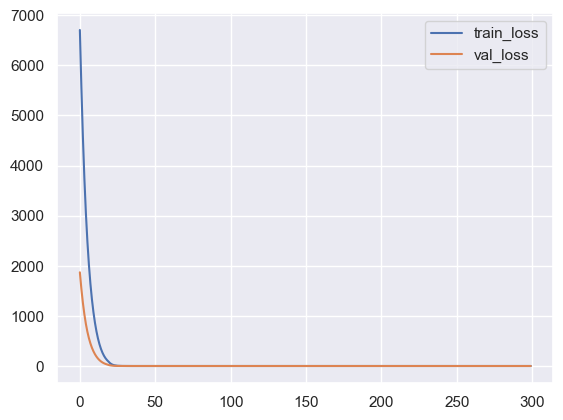

Finished Training
Epoch 1/300


100%|██████████| 13/13 [00:00<00:00, 277.53it/s]


Train Loss: 6557.508941650391


100%|██████████| 4/4 [00:00<00:00, 964.98it/s]


Epoch 2/300


100%|██████████| 13/13 [00:00<00:00, 272.02it/s]


Train Loss: 5364.513519287109


100%|██████████| 4/4 [00:00<00:00, 1051.27it/s]


Epoch 3/300


100%|██████████| 13/13 [00:00<00:00, 206.19it/s]


Train Loss: 4414.424774169922


100%|██████████| 4/4 [00:00<00:00, 1059.03it/s]


Epoch 4/300


100%|██████████| 13/13 [00:00<00:00, 270.23it/s]


Train Loss: 3615.4783782958984


100%|██████████| 4/4 [00:00<00:00, 1026.69it/s]


Epoch 5/300


100%|██████████| 13/13 [00:00<00:00, 294.19it/s]


Train Loss: 2955.5484771728516


100%|██████████| 4/4 [00:00<00:00, 1029.02it/s]


Epoch 6/300


100%|██████████| 13/13 [00:00<00:00, 267.09it/s]


Train Loss: 2414.264633178711


100%|██████████| 4/4 [00:00<00:00, 1051.27it/s]


Epoch 7/300


100%|██████████| 13/13 [00:00<00:00, 266.01it/s]


Train Loss: 1970.3710327148438


100%|██████████| 4/4 [00:00<00:00, 1106.82it/s]


Epoch 8/300


100%|██████████| 13/13 [00:00<00:00, 296.39it/s]


Train Loss: 1605.60498046875


100%|██████████| 4/4 [00:00<00:00, 986.66it/s]


Epoch 9/300


100%|██████████| 13/13 [00:00<00:00, 297.51it/s]


Train Loss: 1305.0805740356445


100%|██████████| 4/4 [00:00<00:00, 1022.50it/s]


Epoch 10/300


100%|██████████| 13/13 [00:00<00:00, 286.89it/s]


Train Loss: 1056.9864349365234


100%|██████████| 4/4 [00:00<00:00, 985.91it/s]


Epoch 11/300


100%|██████████| 13/13 [00:00<00:00, 287.62it/s]


Train Loss: 852.0234565734863


100%|██████████| 4/4 [00:00<00:00, 1107.77it/s]


Epoch 12/300


100%|██████████| 13/13 [00:00<00:00, 275.36it/s]


Train Loss: 682.867977142334


100%|██████████| 4/4 [00:00<00:00, 1000.49it/s]


Epoch 13/300


100%|██████████| 13/13 [00:00<00:00, 307.31it/s]


Train Loss: 543.6936912536621


100%|██████████| 4/4 [00:00<00:00, 1018.65it/s]


Epoch 14/300


100%|██████████| 13/13 [00:00<00:00, 303.50it/s]


Train Loss: 429.7328186035156


100%|██████████| 4/4 [00:00<00:00, 1027.76it/s]


Epoch 15/300


100%|██████████| 13/13 [00:00<00:00, 290.88it/s]


Train Loss: 337.019588470459


100%|██████████| 4/4 [00:00<00:00, 978.95it/s]


Epoch 16/300


100%|██████████| 13/13 [00:00<00:00, 303.53it/s]


Train Loss: 262.16496086120605


100%|██████████| 4/4 [00:00<00:00, 1017.29it/s]


Epoch 17/300


100%|██████████| 13/13 [00:00<00:00, 292.17it/s]


Train Loss: 202.21646118164062


100%|██████████| 4/4 [00:00<00:00, 1080.52it/s]


Epoch 18/300


100%|██████████| 13/13 [00:00<00:00, 296.96it/s]


Train Loss: 154.64860248565674


100%|██████████| 4/4 [00:00<00:00, 1021.26it/s]


Epoch 19/300


100%|██████████| 13/13 [00:00<00:00, 319.35it/s]


Train Loss: 117.24322986602783


100%|██████████| 4/4 [00:00<00:00, 1011.10it/s]


Epoch 20/300


100%|██████████| 13/13 [00:00<00:00, 294.16it/s]


Train Loss: 88.10038566589355


100%|██████████| 4/4 [00:00<00:00, 1090.85it/s]


Epoch 21/300


100%|██████████| 13/13 [00:00<00:00, 296.81it/s]


Train Loss: 65.62638711929321


100%|██████████| 4/4 [00:00<00:00, 1038.97it/s]


Epoch 22/300


100%|██████████| 13/13 [00:00<00:00, 264.72it/s]


Train Loss: 48.447548389434814


100%|██████████| 4/4 [00:00<00:00, 1004.50it/s]


Epoch 23/300


100%|██████████| 13/13 [00:00<00:00, 264.82it/s]


Train Loss: 35.443238258361816


100%|██████████| 4/4 [00:00<00:00, 1094.33it/s]


Epoch 24/300


100%|██████████| 13/13 [00:00<00:00, 304.89it/s]


Train Loss: 25.704121112823486


100%|██████████| 4/4 [00:00<00:00, 1016.25it/s]


Epoch 25/300


100%|██████████| 13/13 [00:00<00:00, 272.66it/s]


Train Loss: 18.476768016815186


100%|██████████| 4/4 [00:00<00:00, 1058.43it/s]


Epoch 26/300


100%|██████████| 13/13 [00:00<00:00, 234.76it/s]


Train Loss: 13.1660977602005


100%|██████████| 4/4 [00:00<00:00, 803.39it/s]


Epoch 27/300


100%|██████████| 13/13 [00:00<00:00, 277.50it/s]


Train Loss: 9.304956674575806


100%|██████████| 4/4 [00:00<00:00, 1117.07it/s]


Epoch 28/300


100%|██████████| 13/13 [00:00<00:00, 289.61it/s]


Train Loss: 6.522685319185257


100%|██████████| 4/4 [00:00<00:00, 1106.17it/s]


Epoch 29/300


100%|██████████| 13/13 [00:00<00:00, 310.48it/s]


Train Loss: 4.529592871665955


100%|██████████| 4/4 [00:00<00:00, 1092.55it/s]


Epoch 30/300


100%|██████████| 13/13 [00:00<00:00, 294.66it/s]


Train Loss: 3.1189716160297394


100%|██████████| 4/4 [00:00<00:00, 1052.59it/s]


Epoch 31/300


100%|██████████| 13/13 [00:00<00:00, 260.54it/s]


Train Loss: 2.139843448996544


100%|██████████| 4/4 [00:00<00:00, 1009.34it/s]


Epoch 32/300


100%|██████████| 13/13 [00:00<00:00, 290.23it/s]


Train Loss: 1.4550847634673119


100%|██████████| 4/4 [00:00<00:00, 1053.71it/s]


Epoch 33/300


100%|██████████| 13/13 [00:00<00:00, 285.63it/s]


Train Loss: 0.9889486394822598


100%|██████████| 4/4 [00:00<00:00, 1121.47it/s]


Epoch 34/300


100%|██████████| 13/13 [00:00<00:00, 311.69it/s]


Train Loss: 0.6718819700181484


100%|██████████| 4/4 [00:00<00:00, 1025.88it/s]


Epoch 35/300


100%|██████████| 13/13 [00:00<00:00, 185.91it/s]


Train Loss: 0.4546647872775793


100%|██████████| 4/4 [00:00<00:00, 775.22it/s]


Epoch 36/300


100%|██████████| 13/13 [00:00<00:00, 308.97it/s]


Train Loss: 0.3121890313923359


100%|██████████| 4/4 [00:00<00:00, 995.50it/s]


Epoch 37/300


100%|██████████| 13/13 [00:00<00:00, 301.21it/s]


Train Loss: 0.21934407018125057


100%|██████████| 4/4 [00:00<00:00, 1097.77it/s]


Epoch 38/300


100%|██████████| 13/13 [00:00<00:00, 298.27it/s]


Train Loss: 0.15446531306952238


100%|██████████| 4/4 [00:00<00:00, 1060.98it/s]


Epoch 39/300


100%|██████████| 13/13 [00:00<00:00, 308.75it/s]


Train Loss: 0.11481384141370654


100%|██████████| 4/4 [00:00<00:00, 1090.85it/s]


Epoch 40/300


100%|██████████| 13/13 [00:00<00:00, 309.41it/s]


Train Loss: 0.0963549348525703


100%|██████████| 4/4 [00:00<00:00, 953.74it/s]


Epoch 41/300


100%|██████████| 13/13 [00:00<00:00, 287.13it/s]


Train Loss: 0.07841360592283309


100%|██████████| 4/4 [00:00<00:00, 1016.99it/s]


Epoch 42/300


100%|██████████| 13/13 [00:00<00:00, 252.33it/s]


Train Loss: 0.06492550019174814


100%|██████████| 4/4 [00:00<00:00, 1039.48it/s]


Epoch 43/300


100%|██████████| 13/13 [00:00<00:00, 296.13it/s]


Train Loss: 0.057227929355576634


100%|██████████| 4/4 [00:00<00:00, 1008.06it/s]


Epoch 44/300


100%|██████████| 13/13 [00:00<00:00, 308.91it/s]


Train Loss: 0.05471616983413696


100%|██████████| 4/4 [00:00<00:00, 1019.83it/s]


Epoch 45/300


100%|██████████| 13/13 [00:00<00:00, 287.83it/s]


Train Loss: 0.054122178349643946


100%|██████████| 4/4 [00:00<00:00, 930.00it/s]


Epoch 46/300


100%|██████████| 13/13 [00:00<00:00, 273.48it/s]


Train Loss: 0.051257203333079815


100%|██████████| 4/4 [00:00<00:00, 1088.72it/s]


Epoch 47/300


100%|██████████| 13/13 [00:00<00:00, 288.30it/s]


Train Loss: 0.05422476306557655


100%|██████████| 4/4 [00:00<00:00, 768.33it/s]


Epoch 48/300


100%|██████████| 13/13 [00:00<00:00, 272.82it/s]


Train Loss: 0.05156568327220157


100%|██████████| 4/4 [00:00<00:00, 1060.44it/s]


Epoch 49/300


100%|██████████| 13/13 [00:00<00:00, 294.38it/s]


Train Loss: 0.04952457390027121


100%|██████████| 4/4 [00:00<00:00, 1059.84it/s]


Epoch 50/300


100%|██████████| 13/13 [00:00<00:00, 292.34it/s]


Train Loss: 0.04853263503173366


100%|██████████| 4/4 [00:00<00:00, 968.55it/s]


Epoch 51/300


100%|██████████| 13/13 [00:00<00:00, 299.13it/s]


Train Loss: 0.050274932698812336


100%|██████████| 4/4 [00:00<00:00, 1061.85it/s]


Epoch 52/300


100%|██████████| 13/13 [00:00<00:00, 298.86it/s]


Train Loss: 0.04933603177778423


100%|██████████| 4/4 [00:00<00:00, 1008.73it/s]


Epoch 53/300


100%|██████████| 13/13 [00:00<00:00, 309.89it/s]


Train Loss: 0.050434863776899874


100%|██████████| 4/4 [00:00<00:00, 1072.10it/s]


Epoch 54/300


100%|██████████| 13/13 [00:00<00:00, 302.38it/s]


Train Loss: 0.04898260335903615


100%|██████████| 4/4 [00:00<00:00, 1010.13it/s]


Epoch 55/300


100%|██████████| 13/13 [00:00<00:00, 291.47it/s]


Train Loss: 0.04921672592172399


100%|██████████| 4/4 [00:00<00:00, 1011.28it/s]


Epoch 56/300


100%|██████████| 13/13 [00:00<00:00, 287.54it/s]


Train Loss: 0.05056093056919053


100%|██████████| 4/4 [00:00<00:00, 1032.51it/s]


Epoch 57/300


100%|██████████| 13/13 [00:00<00:00, 321.39it/s]


Train Loss: 0.053016816498711705


100%|██████████| 4/4 [00:00<00:00, 1011.83it/s]


Epoch 58/300


100%|██████████| 13/13 [00:00<00:00, 303.24it/s]


Train Loss: 0.054685806506313384


100%|██████████| 4/4 [00:00<00:00, 868.84it/s]


Epoch 59/300


100%|██████████| 13/13 [00:00<00:00, 278.13it/s]


Train Loss: 0.050025190226733685


100%|██████████| 4/4 [00:00<00:00, 1073.60it/s]


Epoch 60/300


100%|██████████| 13/13 [00:00<00:00, 269.88it/s]


Train Loss: 0.05125668318942189


100%|██████████| 4/4 [00:00<00:00, 1041.35it/s]


Epoch 61/300


100%|██████████| 13/13 [00:00<00:00, 297.06it/s]


Train Loss: 0.05177959194406867


100%|██████████| 4/4 [00:00<00:00, 1059.37it/s]


Epoch 62/300


100%|██████████| 13/13 [00:00<00:00, 282.59it/s]


Train Loss: 0.05299009685404599


100%|██████████| 4/4 [00:00<00:00, 1016.99it/s]


Epoch 63/300


100%|██████████| 13/13 [00:00<00:00, 321.90it/s]


Train Loss: 0.0491466797539033


100%|██████████| 4/4 [00:00<00:00, 1002.28it/s]


Epoch 64/300


100%|██████████| 13/13 [00:00<00:00, 302.11it/s]


Train Loss: 0.04829958779737353


100%|██████████| 4/4 [00:00<00:00, 1012.93it/s]


Epoch 65/300


100%|██████████| 13/13 [00:00<00:00, 273.37it/s]


Train Loss: 0.05050356558058411


100%|██████████| 4/4 [00:00<00:00, 1013.97it/s]


Epoch 66/300


100%|██████████| 13/13 [00:00<00:00, 309.55it/s]


Train Loss: 0.048413406242616475


100%|██████████| 4/4 [00:00<00:00, 1032.06it/s]


Epoch 67/300


100%|██████████| 13/13 [00:00<00:00, 310.51it/s]


Train Loss: 0.04802678304258734


100%|██████████| 4/4 [00:00<00:00, 994.79it/s]


Epoch 68/300


100%|██████████| 13/13 [00:00<00:00, 299.25it/s]


Train Loss: 0.05278305831598118


100%|██████████| 4/4 [00:00<00:00, 978.04it/s]


Epoch 69/300


100%|██████████| 13/13 [00:00<00:00, 286.39it/s]


Train Loss: 0.05364155350252986


100%|██████████| 4/4 [00:00<00:00, 1019.09it/s]


Epoch 70/300


100%|██████████| 13/13 [00:00<00:00, 288.20it/s]


Train Loss: 0.050006743520498276


100%|██████████| 4/4 [00:00<00:00, 1079.34it/s]


Epoch 71/300


100%|██████████| 13/13 [00:00<00:00, 308.41it/s]


Train Loss: 0.04998393985442817


100%|██████████| 4/4 [00:00<00:00, 1153.71it/s]


Epoch 72/300


100%|██████████| 13/13 [00:00<00:00, 300.30it/s]


Train Loss: 0.05545442481525242


100%|██████████| 4/4 [00:00<00:00, 1012.38it/s]


Epoch 73/300


100%|██████████| 13/13 [00:00<00:00, 293.96it/s]


Train Loss: 0.05278227076632902


100%|██████████| 4/4 [00:00<00:00, 1000.01it/s]


Epoch 74/300


100%|██████████| 13/13 [00:00<00:00, 308.47it/s]


Train Loss: 0.04876479337690398


100%|██████████| 4/4 [00:00<00:00, 1091.77it/s]


Epoch 75/300


100%|██████████| 13/13 [00:00<00:00, 297.86it/s]


Train Loss: 0.04989310639211908


100%|██████████| 4/4 [00:00<00:00, 1047.14it/s]


Epoch 76/300


100%|██████████| 13/13 [00:00<00:00, 177.22it/s]


Train Loss: 0.05066865775734186


100%|██████████| 4/4 [00:00<00:00, 1102.82it/s]


Epoch 77/300


100%|██████████| 13/13 [00:00<00:00, 305.18it/s]


Train Loss: 0.052199769124854356


100%|██████████| 4/4 [00:00<00:00, 1102.31it/s]


Epoch 78/300


100%|██████████| 13/13 [00:00<00:00, 315.04it/s]


Train Loss: 0.04833607200998813


100%|██████████| 4/4 [00:00<00:00, 1050.41it/s]


Epoch 79/300


100%|██████████| 13/13 [00:00<00:00, 311.50it/s]


Train Loss: 0.04956882243277505


100%|██████████| 4/4 [00:00<00:00, 1091.98it/s]


Epoch 80/300


100%|██████████| 13/13 [00:00<00:00, 294.27it/s]


Train Loss: 0.0483909040922299


100%|██████████| 4/4 [00:00<00:00, 998.05it/s]


Epoch 81/300


100%|██████████| 13/13 [00:00<00:00, 286.75it/s]


Train Loss: 0.0501716339495033


100%|██████████| 4/4 [00:00<00:00, 1093.48it/s]


Epoch 82/300


100%|██████████| 13/13 [00:00<00:00, 307.20it/s]


Train Loss: 0.05357942101545632


100%|██████████| 4/4 [00:00<00:00, 1132.22it/s]


Epoch 83/300


100%|██████████| 13/13 [00:00<00:00, 289.90it/s]


Train Loss: 0.056511424598284066


100%|██████████| 4/4 [00:00<00:00, 1056.23it/s]


Epoch 84/300


100%|██████████| 13/13 [00:00<00:00, 306.72it/s]


Train Loss: 0.04990227904636413


100%|██████████| 4/4 [00:00<00:00, 1010.13it/s]


Epoch 85/300


100%|██████████| 13/13 [00:00<00:00, 267.82it/s]


Train Loss: 0.055175111861899495


100%|██████████| 4/4 [00:00<00:00, 1044.98it/s]


Epoch 86/300


100%|██████████| 13/13 [00:00<00:00, 300.11it/s]


Train Loss: 0.054801988299004734


100%|██████████| 4/4 [00:00<00:00, 1129.32it/s]


Epoch 87/300


100%|██████████| 13/13 [00:00<00:00, 300.24it/s]


Train Loss: 0.05256028543226421


100%|██████████| 4/4 [00:00<00:00, 1038.71it/s]


Epoch 88/300


100%|██████████| 13/13 [00:00<00:00, 293.19it/s]


Train Loss: 0.05352219473570585


100%|██████████| 4/4 [00:00<00:00, 1095.55it/s]


Epoch 89/300


100%|██████████| 13/13 [00:00<00:00, 313.86it/s]


Train Loss: 0.05136036378098652


100%|██████████| 4/4 [00:00<00:00, 1094.48it/s]


Epoch 90/300


100%|██████████| 13/13 [00:00<00:00, 286.07it/s]


Train Loss: 0.04995560919633135


100%|██████████| 4/4 [00:00<00:00, 1054.57it/s]


Epoch 91/300


100%|██████████| 13/13 [00:00<00:00, 311.98it/s]


Train Loss: 0.05347380286548287


100%|██████████| 4/4 [00:00<00:00, 1104.64it/s]


Epoch 92/300


100%|██████████| 13/13 [00:00<00:00, 308.23it/s]


Train Loss: 0.05344521161168814


100%|██████████| 4/4 [00:00<00:00, 1022.13it/s]


Epoch 93/300


100%|██████████| 13/13 [00:00<00:00, 280.33it/s]


Train Loss: 0.04901379719376564


100%|██████████| 4/4 [00:00<00:00, 968.10it/s]


Epoch 94/300


100%|██████████| 13/13 [00:00<00:00, 292.12it/s]


Train Loss: 0.05120019882451743


100%|██████████| 4/4 [00:00<00:00, 1033.08it/s]


Epoch 95/300


100%|██████████| 13/13 [00:00<00:00, 282.12it/s]


Train Loss: 0.05012636538594961


100%|██████████| 4/4 [00:00<00:00, 1007.10it/s]


Epoch 96/300


100%|██████████| 13/13 [00:00<00:00, 306.97it/s]


Train Loss: 0.049824380956124514


100%|██████████| 4/4 [00:00<00:00, 1022.50it/s]


Epoch 97/300


100%|██████████| 13/13 [00:00<00:00, 320.54it/s]


Train Loss: 0.05175083095673472


100%|██████████| 4/4 [00:00<00:00, 1003.30it/s]


Epoch 98/300


100%|██████████| 13/13 [00:00<00:00, 292.75it/s]


Train Loss: 0.058462013490498066


100%|██████████| 4/4 [00:00<00:00, 1057.90it/s]


Epoch 99/300


100%|██████████| 13/13 [00:00<00:00, 291.62it/s]


Train Loss: 0.05585189932025969


100%|██████████| 4/4 [00:00<00:00, 1026.13it/s]


Epoch 100/300


100%|██████████| 13/13 [00:00<00:00, 264.74it/s]


Train Loss: 0.050376309314742684


100%|██████████| 4/4 [00:00<00:00, 1001.03it/s]


Epoch 101/300


100%|██████████| 13/13 [00:00<00:00, 286.00it/s]


Train Loss: 0.04794391622999683


100%|██████████| 4/4 [00:00<00:00, 1042.97it/s]


Epoch 102/300


100%|██████████| 13/13 [00:00<00:00, 261.38it/s]


Train Loss: 0.05005516763776541


100%|██████████| 4/4 [00:00<00:00, 928.66it/s]


Epoch 103/300


100%|██████████| 13/13 [00:00<00:00, 124.95it/s]


Train Loss: 0.053739232826046646


100%|██████████| 4/4 [00:00<00:00, 987.36it/s]


Epoch 104/300


100%|██████████| 13/13 [00:00<00:00, 265.04it/s]


Train Loss: 0.057002982939593494


100%|██████████| 4/4 [00:00<00:00, 1007.82it/s]


Epoch 105/300


100%|██████████| 13/13 [00:00<00:00, 299.08it/s]


Train Loss: 0.05398452316876501


100%|██████████| 4/4 [00:00<00:00, 1032.76it/s]


Epoch 106/300


100%|██████████| 13/13 [00:00<00:00, 98.68it/s]


Train Loss: 0.05998161993920803


100%|██████████| 4/4 [00:00<00:00, 1030.41it/s]


Epoch 107/300


100%|██████████| 13/13 [00:00<00:00, 296.59it/s]


Train Loss: 0.055482442607171834


100%|██████████| 4/4 [00:00<00:00, 1100.43it/s]


Epoch 108/300


100%|██████████| 13/13 [00:00<00:00, 303.75it/s]


Train Loss: 0.05627708265092224


100%|██████████| 4/4 [00:00<00:00, 1134.75it/s]


Epoch 109/300


100%|██████████| 13/13 [00:00<00:00, 180.34it/s]


Train Loss: 0.05414790438953787


100%|██████████| 4/4 [00:00<00:00, 974.17it/s]


Epoch 110/300


100%|██████████| 13/13 [00:00<00:00, 277.44it/s]


Train Loss: 0.05193430924555287


100%|██████████| 4/4 [00:00<00:00, 1001.68it/s]


Epoch 111/300


100%|██████████| 13/13 [00:00<00:00, 273.97it/s]


Train Loss: 0.05293878703378141


100%|██████████| 4/4 [00:00<00:00, 985.50it/s]


Epoch 112/300


100%|██████████| 13/13 [00:00<00:00, 71.31it/s]


Train Loss: 0.05296242801705375


100%|██████████| 4/4 [00:00<00:00, 961.56it/s]


Epoch 113/300


100%|██████████| 13/13 [00:00<00:00, 240.04it/s]


Train Loss: 0.05092817824333906


100%|██████████| 4/4 [00:00<00:00, 1115.14it/s]


Epoch 114/300


100%|██████████| 13/13 [00:00<00:00, 316.23it/s]


Train Loss: 0.0509946119855158


100%|██████████| 4/4 [00:00<00:00, 1208.82it/s]


Epoch 115/300


100%|██████████| 13/13 [00:00<00:00, 301.97it/s]


Train Loss: 0.0534404800273478


100%|██████████| 4/4 [00:00<00:00, 1008.31it/s]


Epoch 116/300


100%|██████████| 13/13 [00:00<00:00, 324.34it/s]


Train Loss: 0.050472527742385864


100%|██████████| 4/4 [00:00<00:00, 1084.01it/s]


Epoch 117/300


100%|██████████| 13/13 [00:00<00:00, 319.35it/s]


Train Loss: 0.0493132253177464


100%|██████████| 4/4 [00:00<00:00, 1102.53it/s]


Epoch 118/300


100%|██████████| 13/13 [00:00<00:00, 274.70it/s]


Train Loss: 0.0512695835204795


100%|██████████| 4/4 [00:00<00:00, 828.55it/s]


Epoch 119/300


100%|██████████| 13/13 [00:00<00:00, 248.21it/s]


Train Loss: 0.04964206041768193


100%|██████████| 4/4 [00:00<00:00, 908.94it/s]


Epoch 120/300


100%|██████████| 13/13 [00:00<00:00, 284.20it/s]


Train Loss: 0.050020409282296896


100%|██████████| 4/4 [00:00<00:00, 851.77it/s]


Epoch 121/300


100%|██████████| 13/13 [00:00<00:00, 136.16it/s]


Train Loss: 0.05182895204052329


100%|██████████| 4/4 [00:00<00:00, 826.59it/s]


Epoch 122/300


100%|██████████| 13/13 [00:00<00:00, 181.75it/s]


Train Loss: 0.05335406423546374


100%|██████████| 4/4 [00:00<00:00, 743.47it/s]


Epoch 123/300


100%|██████████| 13/13 [00:00<00:00, 262.29it/s]


Train Loss: 0.05549198400694877


100%|██████████| 4/4 [00:00<00:00, 966.15it/s]


Epoch 124/300


100%|██████████| 13/13 [00:00<00:00, 217.57it/s]


Train Loss: 0.05014317203313112


100%|██████████| 4/4 [00:00<00:00, 979.18it/s]


Epoch 125/300


100%|██████████| 13/13 [00:00<00:00, 236.12it/s]


Train Loss: 0.05117998371133581


100%|██████████| 4/4 [00:00<00:00, 961.50it/s]


Epoch 126/300


100%|██████████| 13/13 [00:00<00:00, 272.55it/s]


Train Loss: 0.05428863421548158


100%|██████████| 4/4 [00:00<00:00, 1109.53it/s]


Epoch 127/300


100%|██████████| 13/13 [00:00<00:00, 275.49it/s]


Train Loss: 0.05222187016624957


100%|██████████| 4/4 [00:00<00:00, 932.17it/s]


Epoch 128/300


100%|██████████| 13/13 [00:00<00:00, 165.83it/s]


Train Loss: 0.05076854850631207


100%|██████████| 4/4 [00:00<00:00, 763.23it/s]


Epoch 129/300


100%|██████████| 13/13 [00:00<00:00, 260.46it/s]


Train Loss: 0.05048497434472665


100%|██████████| 4/4 [00:00<00:00, 857.99it/s]


Epoch 130/300


100%|██████████| 13/13 [00:00<00:00, 258.22it/s]


Train Loss: 0.049915880837943405


100%|██████████| 4/4 [00:00<00:00, 1014.96it/s]


Epoch 131/300


100%|██████████| 13/13 [00:00<00:00, 250.05it/s]


Train Loss: 0.052828441199380904


100%|██████████| 4/4 [00:00<00:00, 1045.50it/s]


Epoch 132/300


100%|██████████| 13/13 [00:00<00:00, 287.93it/s]


Train Loss: 0.05321330891456455


100%|██████████| 4/4 [00:00<00:00, 1048.12it/s]


Epoch 133/300


100%|██████████| 13/13 [00:00<00:00, 280.80it/s]


Train Loss: 0.05324570380616933


100%|██████████| 4/4 [00:00<00:00, 1081.98it/s]


Epoch 134/300


100%|██████████| 13/13 [00:00<00:00, 255.84it/s]


Train Loss: 0.052361444337293506


100%|██████████| 4/4 [00:00<00:00, 1012.69it/s]


Epoch 135/300


100%|██████████| 13/13 [00:00<00:00, 286.70it/s]


Train Loss: 0.052676514140330255


100%|██████████| 4/4 [00:00<00:00, 813.68it/s]


Epoch 136/300


100%|██████████| 13/13 [00:00<00:00, 291.19it/s]


Train Loss: 0.0484894432593137


100%|██████████| 4/4 [00:00<00:00, 949.64it/s]


Epoch 137/300


100%|██████████| 13/13 [00:00<00:00, 80.72it/s]


Train Loss: 0.049910223577171564


100%|██████████| 4/4 [00:00<00:00, 1019.64it/s]


Epoch 138/300


100%|██████████| 13/13 [00:00<00:00, 247.61it/s]


Train Loss: 0.05018600512994453


100%|██████████| 4/4 [00:00<00:00, 996.04it/s]


Epoch 139/300


100%|██████████| 13/13 [00:00<00:00, 283.71it/s]


Train Loss: 0.052513589966110885


100%|██████████| 4/4 [00:00<00:00, 1019.64it/s]


Epoch 140/300


100%|██████████| 13/13 [00:00<00:00, 304.39it/s]


Train Loss: 0.0515657311771065


100%|██████████| 4/4 [00:00<00:00, 1010.61it/s]


Epoch 141/300


100%|██████████| 13/13 [00:00<00:00, 284.91it/s]


Train Loss: 0.05280232575023547


100%|██████████| 4/4 [00:00<00:00, 1123.27it/s]


Epoch 142/300


100%|██████████| 13/13 [00:00<00:00, 306.81it/s]


Train Loss: 0.05506468616658822


100%|██████████| 4/4 [00:00<00:00, 989.34it/s]


Epoch 143/300


100%|██████████| 13/13 [00:00<00:00, 314.14it/s]


Train Loss: 0.04811309475917369


100%|██████████| 4/4 [00:00<00:00, 1026.19it/s]


Epoch 144/300


100%|██████████| 13/13 [00:00<00:00, 289.53it/s]


Train Loss: 0.04759140289388597


100%|██████████| 4/4 [00:00<00:00, 1061.24it/s]


Epoch 145/300


100%|██████████| 13/13 [00:00<00:00, 155.69it/s]


Train Loss: 0.04940746200736612


100%|██████████| 4/4 [00:00<00:00, 881.25it/s]


Epoch 146/300


100%|██████████| 13/13 [00:00<00:00, 278.38it/s]


Train Loss: 0.04980146256275475


100%|██████████| 4/4 [00:00<00:00, 1011.41it/s]


Epoch 147/300


100%|██████████| 13/13 [00:00<00:00, 309.71it/s]


Train Loss: 0.05046555079752579


100%|██████████| 4/4 [00:00<00:00, 902.68it/s]


Epoch 148/300


100%|██████████| 13/13 [00:00<00:00, 299.82it/s]


Train Loss: 0.04840976116247475


100%|██████████| 4/4 [00:00<00:00, 1066.17it/s]


Epoch 149/300


100%|██████████| 13/13 [00:00<00:00, 285.12it/s]


Train Loss: 0.047116704925429076


100%|██████████| 4/4 [00:00<00:00, 1017.29it/s]


Epoch 150/300


100%|██████████| 13/13 [00:00<00:00, 298.81it/s]


Train Loss: 0.04851204459555447


100%|██████████| 4/4 [00:00<00:00, 958.53it/s]


Epoch 151/300


100%|██████████| 13/13 [00:00<00:00, 293.59it/s]


Train Loss: 0.05180634232237935


100%|██████████| 4/4 [00:00<00:00, 1082.54it/s]


Epoch 152/300


100%|██████████| 13/13 [00:00<00:00, 320.17it/s]


Train Loss: 0.05048754287417978


100%|██████████| 4/4 [00:00<00:00, 959.03it/s]


Epoch 153/300


100%|██████████| 13/13 [00:00<00:00, 280.78it/s]


Train Loss: 0.04876445105765015


100%|██████████| 4/4 [00:00<00:00, 954.88it/s]


Epoch 154/300


100%|██████████| 13/13 [00:00<00:00, 291.51it/s]


Train Loss: 0.05072960793040693


100%|██████████| 4/4 [00:00<00:00, 1145.44it/s]


Epoch 155/300


100%|██████████| 13/13 [00:00<00:00, 310.29it/s]


Train Loss: 0.05229067732580006


100%|██████████| 4/4 [00:00<00:00, 924.26it/s]


Epoch 156/300


100%|██████████| 13/13 [00:00<00:00, 309.92it/s]


Train Loss: 0.05476531514432281


100%|██████████| 4/4 [00:00<00:00, 1049.03it/s]


Epoch 157/300


100%|██████████| 13/13 [00:00<00:00, 308.56it/s]


Train Loss: 0.06110380042809993


100%|██████████| 4/4 [00:00<00:00, 1147.16it/s]


Epoch 158/300


100%|██████████| 13/13 [00:00<00:00, 303.71it/s]


Train Loss: 0.054490727256052196


100%|██████████| 4/4 [00:00<00:00, 1088.16it/s]


Epoch 159/300


100%|██████████| 13/13 [00:00<00:00, 306.13it/s]


Train Loss: 0.05508715508040041


100%|██████████| 4/4 [00:00<00:00, 1129.25it/s]


Epoch 160/300


100%|██████████| 13/13 [00:00<00:00, 309.16it/s]


Train Loss: 0.06277283397503197


100%|██████████| 4/4 [00:00<00:00, 1052.13it/s]


Epoch 161/300


100%|██████████| 13/13 [00:00<00:00, 311.23it/s]


Train Loss: 0.05917293450329453


100%|██████████| 4/4 [00:00<00:00, 1077.88it/s]


Epoch 162/300


100%|██████████| 13/13 [00:00<00:00, 308.09it/s]


Train Loss: 0.05505242035724223


100%|██████████| 4/4 [00:00<00:00, 1113.95it/s]


Epoch 163/300


100%|██████████| 13/13 [00:00<00:00, 304.14it/s]


Train Loss: 0.053443977900315076


100%|██████████| 4/4 [00:00<00:00, 946.53it/s]


Epoch 164/300


100%|██████████| 13/13 [00:00<00:00, 291.24it/s]


Train Loss: 0.05134380760136992


100%|██████████| 4/4 [00:00<00:00, 1052.92it/s]


Epoch 165/300


100%|██████████| 13/13 [00:00<00:00, 247.44it/s]


Train Loss: 0.05466255801729858


100%|██████████| 4/4 [00:00<00:00, 1159.37it/s]


Epoch 166/300


100%|██████████| 13/13 [00:00<00:00, 285.72it/s]


Train Loss: 0.053229290642775595


100%|██████████| 4/4 [00:00<00:00, 1041.16it/s]


Epoch 167/300


100%|██████████| 13/13 [00:00<00:00, 299.05it/s]


Train Loss: 0.051167668658308685


100%|██████████| 4/4 [00:00<00:00, 1114.17it/s]


Epoch 168/300


100%|██████████| 13/13 [00:00<00:00, 297.95it/s]


Train Loss: 0.056375274900346994


100%|██████████| 4/4 [00:00<00:00, 1085.83it/s]


Epoch 169/300


100%|██████████| 13/13 [00:00<00:00, 282.37it/s]


Train Loss: 0.05135334696387872


100%|██████████| 4/4 [00:00<00:00, 1069.23it/s]


Epoch 170/300


100%|██████████| 13/13 [00:00<00:00, 294.98it/s]


Train Loss: 0.04871426190948114


100%|██████████| 4/4 [00:00<00:00, 1090.85it/s]


Epoch 171/300


100%|██████████| 13/13 [00:00<00:00, 314.56it/s]


Train Loss: 0.050284709432162344


100%|██████████| 4/4 [00:00<00:00, 1002.28it/s]


Epoch 172/300


100%|██████████| 13/13 [00:00<00:00, 301.31it/s]


Train Loss: 0.055030666408129036


100%|██████████| 4/4 [00:00<00:00, 1009.88it/s]


Epoch 173/300


100%|██████████| 13/13 [00:00<00:00, 297.63it/s]


Train Loss: 0.052595879416912794


100%|██████████| 4/4 [00:00<00:00, 1103.18it/s]


Epoch 174/300


100%|██████████| 13/13 [00:00<00:00, 295.83it/s]


Train Loss: 0.05152683786582202


100%|██████████| 4/4 [00:00<00:00, 1001.03it/s]


Epoch 175/300


100%|██████████| 13/13 [00:00<00:00, 263.89it/s]


Train Loss: 0.05036884336732328


100%|██████████| 4/4 [00:00<00:00, 1068.41it/s]


Epoch 176/300


100%|██████████| 13/13 [00:00<00:00, 293.06it/s]


Train Loss: 0.05173419415950775


100%|██████████| 4/4 [00:00<00:00, 1068.61it/s]


Epoch 177/300


100%|██████████| 13/13 [00:00<00:00, 281.30it/s]


Train Loss: 0.05366157670505345


100%|██████████| 4/4 [00:00<00:00, 1112.33it/s]


Epoch 178/300


100%|██████████| 13/13 [00:00<00:00, 265.51it/s]


Train Loss: 0.05028688081074506


100%|██████████| 4/4 [00:00<00:00, 1057.97it/s]


Epoch 179/300


100%|██████████| 13/13 [00:00<00:00, 300.47it/s]


Train Loss: 0.050754369935020804


100%|██████████| 4/4 [00:00<00:00, 1061.58it/s]


Epoch 180/300


100%|██████████| 13/13 [00:00<00:00, 299.13it/s]


Train Loss: 0.053710296866483986


100%|██████████| 4/4 [00:00<00:00, 1026.95it/s]


Epoch 181/300


100%|██████████| 13/13 [00:00<00:00, 322.89it/s]


Train Loss: 0.05165574501734227


100%|██████████| 4/4 [00:00<00:00, 1081.70it/s]


Epoch 182/300


100%|██████████| 13/13 [00:00<00:00, 309.32it/s]


Train Loss: 0.053065655985847116


100%|██████████| 4/4 [00:00<00:00, 972.31it/s]


Epoch 183/300


100%|██████████| 13/13 [00:00<00:00, 300.77it/s]


Train Loss: 0.052944881143048406


100%|██████████| 4/4 [00:00<00:00, 1014.22it/s]


Epoch 184/300


100%|██████████| 13/13 [00:00<00:00, 290.33it/s]


Train Loss: 0.04908215475734323


100%|██████████| 4/4 [00:00<00:00, 998.82it/s]


Epoch 185/300


100%|██████████| 13/13 [00:00<00:00, 162.95it/s]


Train Loss: 0.052687330928165466


100%|██████████| 4/4 [00:00<00:00, 881.02it/s]


Epoch 186/300


100%|██████████| 13/13 [00:00<00:00, 289.88it/s]


Train Loss: 0.052936785970814526


100%|██████████| 4/4 [00:00<00:00, 962.99it/s]


Epoch 187/300


100%|██████████| 13/13 [00:00<00:00, 295.69it/s]


Train Loss: 0.05443411006126553


100%|██████████| 4/4 [00:00<00:00, 1064.95it/s]


Epoch 188/300


100%|██████████| 13/13 [00:00<00:00, 285.48it/s]


Train Loss: 0.05075764958746731


100%|██████████| 4/4 [00:00<00:00, 988.12it/s]


Epoch 189/300


100%|██████████| 13/13 [00:00<00:00, 265.67it/s]


Train Loss: 0.05499643925577402


100%|██████████| 4/4 [00:00<00:00, 1009.10it/s]


Epoch 190/300


100%|██████████| 13/13 [00:00<00:00, 297.11it/s]


Train Loss: 0.053768224199302495


100%|██████████| 4/4 [00:00<00:00, 927.23it/s]


Epoch 191/300


100%|██████████| 13/13 [00:00<00:00, 289.26it/s]


Train Loss: 0.051779242348857224


100%|██████████| 4/4 [00:00<00:00, 927.43it/s]


Epoch 192/300


100%|██████████| 13/13 [00:00<00:00, 270.02it/s]


Train Loss: 0.053115052403882146


100%|██████████| 4/4 [00:00<00:00, 1136.98it/s]


Epoch 193/300


100%|██████████| 13/13 [00:00<00:00, 269.41it/s]


Train Loss: 0.051283905864693224


100%|██████████| 4/4 [00:00<00:00, 1022.44it/s]


Epoch 194/300


100%|██████████| 13/13 [00:00<00:00, 207.69it/s]


Train Loss: 0.049944924539886415


100%|██████████| 4/4 [00:00<00:00, 1116.10it/s]


Epoch 195/300


100%|██████████| 13/13 [00:00<00:00, 287.53it/s]


Train Loss: 0.05272711848374456


100%|██████████| 4/4 [00:00<00:00, 1048.25it/s]


Epoch 196/300


100%|██████████| 13/13 [00:00<00:00, 245.99it/s]


Train Loss: 0.04859619284979999


100%|██████████| 4/4 [00:00<00:00, 442.73it/s]


Epoch 197/300


100%|██████████| 13/13 [00:00<00:00, 226.17it/s]


Train Loss: 0.05102781602181494


100%|██████████| 4/4 [00:00<00:00, 893.50it/s]


Epoch 198/300


100%|██████████| 13/13 [00:00<00:00, 123.54it/s]


Train Loss: 0.047649470157921314


100%|██████████| 4/4 [00:00<00:00, 1025.56it/s]


Epoch 199/300


100%|██████████| 13/13 [00:00<00:00, 276.93it/s]


Train Loss: 0.05000084184575826


100%|██████████| 4/4 [00:00<00:00, 1159.69it/s]


Epoch 200/300


100%|██████████| 13/13 [00:00<00:00, 221.42it/s]


Train Loss: 0.049908913497347385


100%|██████████| 4/4 [00:00<00:00, 1209.95it/s]


Epoch 201/300


100%|██████████| 13/13 [00:00<00:00, 104.24it/s]


Train Loss: 0.051544449175707996


100%|██████████| 4/4 [00:00<00:00, 506.07it/s]


Epoch 202/300


100%|██████████| 13/13 [00:00<00:00, 274.81it/s]


Train Loss: 0.05980289791477844


100%|██████████| 4/4 [00:00<00:00, 1043.23it/s]


Epoch 203/300


100%|██████████| 13/13 [00:00<00:00, 279.83it/s]


Train Loss: 0.06053713627625257


100%|██████████| 4/4 [00:00<00:00, 1056.50it/s]


Epoch 204/300


100%|██████████| 13/13 [00:00<00:00, 278.85it/s]


Train Loss: 0.06294379540486261


100%|██████████| 4/4 [00:00<00:00, 1073.19it/s]


Epoch 205/300


100%|██████████| 13/13 [00:00<00:00, 141.91it/s]


Train Loss: 0.057664766791276634


100%|██████████| 4/4 [00:00<00:00, 880.46it/s]


Epoch 206/300


100%|██████████| 13/13 [00:00<00:00, 250.04it/s]


Train Loss: 0.05552288645412773


100%|██████████| 4/4 [00:00<00:00, 433.98it/s]


Epoch 207/300


100%|██████████| 13/13 [00:00<00:00, 140.71it/s]


Train Loss: 0.06118832353968173


100%|██████████| 4/4 [00:00<00:00, 692.53it/s]


Epoch 208/300


100%|██████████| 13/13 [00:00<00:00, 294.13it/s]


Train Loss: 0.05843083723448217


100%|██████████| 4/4 [00:00<00:00, 1111.37it/s]


Epoch 209/300


100%|██████████| 13/13 [00:00<00:00, 296.08it/s]


Train Loss: 0.055315775447525084


100%|██████████| 4/4 [00:00<00:00, 992.85it/s]


Epoch 210/300


100%|██████████| 13/13 [00:00<00:00, 290.44it/s]


Train Loss: 0.05352816672530025


100%|██████████| 4/4 [00:00<00:00, 1158.65it/s]


Epoch 211/300


100%|██████████| 13/13 [00:00<00:00, 257.72it/s]


Train Loss: 0.05245913821272552


100%|██████████| 4/4 [00:00<00:00, 911.01it/s]


Epoch 212/300


100%|██████████| 13/13 [00:00<00:00, 280.53it/s]


Train Loss: 0.048673349199816585


100%|██████████| 4/4 [00:00<00:00, 779.28it/s]


Epoch 213/300


100%|██████████| 13/13 [00:00<00:00, 260.93it/s]


Train Loss: 0.05106699431780726


100%|██████████| 4/4 [00:00<00:00, 1024.88it/s]


Epoch 214/300


100%|██████████| 13/13 [00:00<00:00, 296.49it/s]


Train Loss: 0.054761070758104324


100%|██████████| 4/4 [00:00<00:00, 1077.05it/s]


Epoch 215/300


100%|██████████| 13/13 [00:00<00:00, 204.04it/s]


Train Loss: 0.05579224892426282


100%|██████████| 4/4 [00:00<00:00, 746.38it/s]


Epoch 216/300


100%|██████████| 13/13 [00:00<00:00, 87.67it/s]


Train Loss: 0.058517602272331715


100%|██████████| 4/4 [00:00<00:00, 636.03it/s]


Epoch 217/300


100%|██████████| 13/13 [00:00<00:00, 244.95it/s]


Train Loss: 0.054283174220472574


100%|██████████| 4/4 [00:00<00:00, 1008.06it/s]


Epoch 218/300


100%|██████████| 13/13 [00:00<00:00, 221.01it/s]


Train Loss: 0.05165071791270748


100%|██████████| 4/4 [00:00<00:00, 988.87it/s]


Epoch 219/300


100%|██████████| 13/13 [00:00<00:00, 249.82it/s]


Train Loss: 0.05467870202846825


100%|██████████| 4/4 [00:00<00:00, 917.84it/s]


Epoch 220/300


100%|██████████| 13/13 [00:00<00:00, 201.13it/s]


Train Loss: 0.05028695549117401


100%|██████████| 4/4 [00:00<00:00, 949.90it/s]


Epoch 221/300


100%|██████████| 13/13 [00:00<00:00, 224.21it/s]


Train Loss: 0.04915214085485786


100%|██████████| 4/4 [00:00<00:00, 455.74it/s]


Epoch 222/300


100%|██████████| 13/13 [00:00<00:00, 281.02it/s]


Train Loss: 0.049773210543207824


100%|██████████| 4/4 [00:00<00:00, 964.76it/s]


Epoch 223/300


100%|██████████| 13/13 [00:00<00:00, 290.22it/s]


Train Loss: 0.05279937107115984


100%|██████████| 4/4 [00:00<00:00, 991.03it/s]


Epoch 224/300


100%|██████████| 13/13 [00:00<00:00, 298.09it/s]


Train Loss: 0.049865256471093744


100%|██████████| 4/4 [00:00<00:00, 1022.81it/s]


Epoch 225/300


100%|██████████| 13/13 [00:00<00:00, 280.03it/s]


Train Loss: 0.050645083538256586


100%|██████████| 4/4 [00:00<00:00, 996.45it/s]


Epoch 226/300


100%|██████████| 13/13 [00:00<00:00, 294.46it/s]


Train Loss: 0.05154181341640651


100%|██████████| 4/4 [00:00<00:00, 1042.71it/s]


Epoch 227/300


100%|██████████| 13/13 [00:00<00:00, 284.71it/s]


Train Loss: 0.04882598284166306


100%|██████████| 4/4 [00:00<00:00, 1003.96it/s]


Epoch 228/300


100%|██████████| 13/13 [00:00<00:00, 301.39it/s]


Train Loss: 0.04771088057896122


100%|██████████| 4/4 [00:00<00:00, 984.41it/s]


Epoch 229/300


100%|██████████| 13/13 [00:00<00:00, 297.18it/s]


Train Loss: 0.04852304625092074


100%|██████████| 4/4 [00:00<00:00, 1058.17it/s]


Epoch 230/300


100%|██████████| 13/13 [00:00<00:00, 294.08it/s]


Train Loss: 0.050121947075240314


100%|██████████| 4/4 [00:00<00:00, 940.53it/s]


Epoch 231/300


100%|██████████| 13/13 [00:00<00:00, 309.94it/s]


Train Loss: 0.04993762553203851


100%|██████████| 4/4 [00:00<00:00, 1014.46it/s]


Epoch 232/300


100%|██████████| 13/13 [00:00<00:00, 284.99it/s]


Train Loss: 0.0498450935119763


100%|██████████| 4/4 [00:00<00:00, 1074.98it/s]


Epoch 233/300


100%|██████████| 13/13 [00:00<00:00, 263.68it/s]


Train Loss: 0.04974911193130538


100%|██████████| 4/4 [00:00<00:00, 1032.32it/s]


Epoch 234/300


100%|██████████| 13/13 [00:00<00:00, 309.32it/s]


Train Loss: 0.05119401740375906


100%|██████████| 4/4 [00:00<00:00, 898.09it/s]


Epoch 235/300


100%|██████████| 13/13 [00:00<00:00, 297.48it/s]


Train Loss: 0.057060311431996524


100%|██████████| 4/4 [00:00<00:00, 1079.61it/s]


Epoch 236/300


100%|██████████| 13/13 [00:00<00:00, 317.94it/s]


Train Loss: 0.05572488985490054


100%|██████████| 4/4 [00:00<00:00, 897.23it/s]


Epoch 237/300


100%|██████████| 13/13 [00:00<00:00, 295.53it/s]


Train Loss: 0.04907587822526693


100%|██████████| 4/4 [00:00<00:00, 884.78it/s]


Epoch 238/300


100%|██████████| 13/13 [00:00<00:00, 304.82it/s]


Train Loss: 0.04836568556493148


100%|██████████| 4/4 [00:00<00:00, 1062.99it/s]


Epoch 239/300


100%|██████████| 13/13 [00:00<00:00, 316.80it/s]


Train Loss: 0.04871490696677938


100%|██████████| 4/4 [00:00<00:00, 852.85it/s]


Epoch 240/300


100%|██████████| 13/13 [00:00<00:00, 299.66it/s]


Train Loss: 0.05218223331030458


100%|██████████| 4/4 [00:00<00:00, 1051.01it/s]


Epoch 241/300


100%|██████████| 13/13 [00:00<00:00, 296.57it/s]


Train Loss: 0.04909122973913327


100%|██████████| 4/4 [00:00<00:00, 945.09it/s]


Epoch 242/300


100%|██████████| 13/13 [00:00<00:00, 280.17it/s]


Train Loss: 0.051322312210686505


100%|██████████| 4/4 [00:00<00:00, 998.52it/s]


Epoch 243/300


100%|██████████| 13/13 [00:00<00:00, 300.80it/s]


Train Loss: 0.050411301373969764


100%|██████████| 4/4 [00:00<00:00, 1127.05it/s]


Epoch 244/300


100%|██████████| 13/13 [00:00<00:00, 323.82it/s]


Train Loss: 0.05811314145103097


100%|██████████| 4/4 [00:00<00:00, 1016.49it/s]


Epoch 245/300


100%|██████████| 13/13 [00:00<00:00, 315.33it/s]


Train Loss: 0.05222546495497227


100%|██████████| 4/4 [00:00<00:00, 1050.94it/s]


Epoch 246/300


100%|██████████| 13/13 [00:00<00:00, 307.76it/s]


Train Loss: 0.05112028639996424


100%|██████████| 4/4 [00:00<00:00, 973.44it/s]


Epoch 247/300


100%|██████████| 13/13 [00:00<00:00, 276.19it/s]


Train Loss: 0.05089254933409393


100%|██████████| 4/4 [00:00<00:00, 1097.12it/s]


Epoch 248/300


100%|██████████| 13/13 [00:00<00:00, 318.40it/s]


Train Loss: 0.05111287848558277


100%|██████████| 4/4 [00:00<00:00, 889.90it/s]


Epoch 249/300


100%|██████████| 13/13 [00:00<00:00, 308.79it/s]


Train Loss: 0.05064792791381478


100%|██████████| 4/4 [00:00<00:00, 1205.17it/s]


Epoch 250/300


100%|██████████| 13/13 [00:00<00:00, 295.91it/s]


Train Loss: 0.04839048610301688


100%|██████████| 4/4 [00:00<00:00, 961.11it/s]


Epoch 251/300


100%|██████████| 13/13 [00:00<00:00, 308.69it/s]


Train Loss: 0.05219165643211454


100%|██████████| 4/4 [00:00<00:00, 1057.70it/s]


Epoch 252/300


100%|██████████| 13/13 [00:00<00:00, 281.53it/s]


Train Loss: 0.05332841747440398


100%|██████████| 4/4 [00:00<00:00, 1073.54it/s]


Epoch 253/300


100%|██████████| 13/13 [00:00<00:00, 326.04it/s]


Train Loss: 0.05046614876482636


100%|██████████| 4/4 [00:00<00:00, 1024.06it/s]


Epoch 254/300


100%|██████████| 13/13 [00:00<00:00, 309.46it/s]


Train Loss: 0.053474140528123826


100%|██████████| 4/4 [00:00<00:00, 1083.38it/s]


Epoch 255/300


100%|██████████| 13/13 [00:00<00:00, 300.02it/s]


Train Loss: 0.04971911245957017


100%|██████████| 4/4 [00:00<00:00, 1067.46it/s]


Epoch 256/300


100%|██████████| 13/13 [00:00<00:00, 176.71it/s]


Train Loss: 0.05438401736319065


100%|██████████| 4/4 [00:00<00:00, 1094.69it/s]


Epoch 257/300


100%|██████████| 13/13 [00:00<00:00, 294.65it/s]


Train Loss: 0.04872708790935576


100%|██████████| 4/4 [00:00<00:00, 1202.50it/s]


Epoch 258/300


100%|██████████| 13/13 [00:00<00:00, 310.43it/s]


Train Loss: 0.04948915907880291


100%|██████████| 4/4 [00:00<00:00, 1001.03it/s]


Epoch 259/300


100%|██████████| 13/13 [00:00<00:00, 313.34it/s]


Train Loss: 0.050148471840657294


100%|██████████| 4/4 [00:00<00:00, 1086.61it/s]


Epoch 260/300


100%|██████████| 13/13 [00:00<00:00, 292.69it/s]


Train Loss: 0.050091034558136016


100%|██████████| 4/4 [00:00<00:00, 1126.74it/s]


Epoch 261/300


100%|██████████| 13/13 [00:00<00:00, 303.74it/s]


Train Loss: 0.05055220564827323


100%|██████████| 4/4 [00:00<00:00, 1103.76it/s]


Epoch 262/300


100%|██████████| 13/13 [00:00<00:00, 296.86it/s]


Train Loss: 0.05714043654734269


100%|██████████| 4/4 [00:00<00:00, 1044.66it/s]


Epoch 263/300


100%|██████████| 13/13 [00:00<00:00, 303.32it/s]


Train Loss: 0.05370120774023235


100%|██████████| 4/4 [00:00<00:00, 1020.45it/s]


Epoch 264/300


100%|██████████| 13/13 [00:00<00:00, 321.70it/s]


Train Loss: 0.055790336802601814


100%|██████████| 4/4 [00:00<00:00, 1101.30it/s]


Epoch 265/300


100%|██████████| 13/13 [00:00<00:00, 302.81it/s]


Train Loss: 0.050598160189110786


100%|██████████| 4/4 [00:00<00:00, 1036.01it/s]


Epoch 266/300


100%|██████████| 13/13 [00:00<00:00, 299.00it/s]


Train Loss: 0.048756620730273426


100%|██████████| 4/4 [00:00<00:00, 1074.36it/s]


Epoch 267/300


100%|██████████| 13/13 [00:00<00:00, 298.27it/s]


Train Loss: 0.05315498844720423


100%|██████████| 4/4 [00:00<00:00, 1091.13it/s]


Epoch 268/300


100%|██████████| 13/13 [00:00<00:00, 298.04it/s]


Train Loss: 0.054070776677690446


100%|██████████| 4/4 [00:00<00:00, 956.24it/s]


Epoch 269/300


100%|██████████| 13/13 [00:00<00:00, 315.42it/s]


Train Loss: 0.05259398359339684


100%|██████████| 4/4 [00:00<00:00, 1069.50it/s]


Epoch 270/300


100%|██████████| 13/13 [00:00<00:00, 303.66it/s]


Train Loss: 0.050271195301320404


100%|██████████| 4/4 [00:00<00:00, 1088.72it/s]


Epoch 271/300


100%|██████████| 13/13 [00:00<00:00, 283.74it/s]


Train Loss: 0.04914321540854871


100%|██████████| 4/4 [00:00<00:00, 1061.04it/s]


Epoch 272/300


100%|██████████| 13/13 [00:00<00:00, 272.80it/s]


Train Loss: 0.04816320678219199


100%|██████████| 4/4 [00:00<00:00, 1096.55it/s]


Epoch 273/300


100%|██████████| 13/13 [00:00<00:00, 277.09it/s]


Train Loss: 0.049522881978191435


100%|██████████| 4/4 [00:00<00:00, 1091.34it/s]


Epoch 274/300


100%|██████████| 13/13 [00:00<00:00, 306.29it/s]


Train Loss: 0.05195156333502382


100%|██████████| 4/4 [00:00<00:00, 1114.17it/s]


Epoch 275/300


100%|██████████| 13/13 [00:00<00:00, 315.60it/s]


Train Loss: 0.05824898916762322


100%|██████████| 4/4 [00:00<00:00, 984.75it/s]


Epoch 276/300


100%|██████████| 13/13 [00:00<00:00, 299.31it/s]


Train Loss: 0.05717028270009905


100%|██████████| 4/4 [00:00<00:00, 1046.09it/s]


Epoch 277/300


100%|██████████| 13/13 [00:00<00:00, 275.55it/s]


Train Loss: 0.05324960732832551


100%|██████████| 4/4 [00:00<00:00, 1059.03it/s]


Epoch 278/300


100%|██████████| 13/13 [00:00<00:00, 295.11it/s]


Train Loss: 0.0526003033737652


100%|██████████| 4/4 [00:00<00:00, 1026.69it/s]


Epoch 279/300


100%|██████████| 13/13 [00:00<00:00, 297.75it/s]


Train Loss: 0.05151355068664998


100%|██████████| 4/4 [00:00<00:00, 857.60it/s]


Epoch 280/300


100%|██████████| 13/13 [00:00<00:00, 293.37it/s]


Train Loss: 0.0493062858004123


100%|██████████| 4/4 [00:00<00:00, 1063.53it/s]


Epoch 281/300


100%|██████████| 13/13 [00:00<00:00, 300.64it/s]


Train Loss: 0.05138778383843601


100%|██████████| 4/4 [00:00<00:00, 996.98it/s]


Epoch 282/300


100%|██████████| 13/13 [00:00<00:00, 283.39it/s]


Train Loss: 0.05192365002585575


100%|██████████| 4/4 [00:00<00:00, 999.06it/s]


Epoch 283/300


100%|██████████| 13/13 [00:00<00:00, 318.74it/s]


Train Loss: 0.054535515140742064


100%|██████████| 4/4 [00:00<00:00, 980.95it/s]


Epoch 284/300


100%|██████████| 13/13 [00:00<00:00, 298.95it/s]


Train Loss: 0.055829967255704105


100%|██████████| 4/4 [00:00<00:00, 998.47it/s]


Epoch 285/300


100%|██████████| 13/13 [00:00<00:00, 288.84it/s]


Train Loss: 0.0591367541346699


100%|██████████| 4/4 [00:00<00:00, 1063.87it/s]


Epoch 286/300


100%|██████████| 13/13 [00:00<00:00, 279.01it/s]


Train Loss: 0.051516242790967226


100%|██████████| 4/4 [00:00<00:00, 1003.30it/s]

Epoch 287/300



100%|██████████| 13/13 [00:00<00:00, 266.66it/s]


Train Loss: 0.05244416405912489


100%|██████████| 4/4 [00:00<00:00, 918.90it/s]


Epoch 288/300


100%|██████████| 13/13 [00:00<00:00, 208.32it/s]


Train Loss: 0.05442544806282967


100%|██████████| 4/4 [00:00<00:00, 1063.46it/s]


Epoch 289/300


100%|██████████| 13/13 [00:00<00:00, 245.63it/s]


Train Loss: 0.051688853243831545


100%|██████████| 4/4 [00:00<00:00, 878.34it/s]


Epoch 290/300


100%|██████████| 13/13 [00:00<00:00, 244.11it/s]


Train Loss: 0.04865020845318213


100%|██████████| 4/4 [00:00<00:00, 998.82it/s]


Epoch 291/300


100%|██████████| 13/13 [00:00<00:00, 197.16it/s]


Train Loss: 0.05175888817757368


100%|██████████| 4/4 [00:00<00:00, 618.72it/s]


Epoch 292/300


100%|██████████| 13/13 [00:00<00:00, 97.87it/s]


Train Loss: 0.05126804142491892


100%|██████████| 4/4 [00:00<00:00, 223.94it/s]


Epoch 293/300


100%|██████████| 13/13 [00:00<00:00, 141.48it/s]


Train Loss: 0.052847111655864865


100%|██████████| 4/4 [00:00<00:00, 1114.47it/s]


Epoch 294/300


100%|██████████| 13/13 [00:00<00:00, 310.57it/s]


Train Loss: 0.0548129080561921


100%|██████████| 4/4 [00:00<00:00, 1040.51it/s]


Epoch 295/300


100%|██████████| 13/13 [00:00<00:00, 183.31it/s]


Train Loss: 0.0528546969871968


100%|██████████| 4/4 [00:00<00:00, 1008.31it/s]


Epoch 296/300


100%|██████████| 13/13 [00:00<00:00, 297.29it/s]


Train Loss: 0.0516224279999733


100%|██████████| 4/4 [00:00<00:00, 164.20it/s]


Epoch 297/300


100%|██████████| 13/13 [00:00<00:00, 125.14it/s]


Train Loss: 0.05072322767227888


100%|██████████| 4/4 [00:00<00:00, 402.78it/s]


Epoch 298/300


100%|██████████| 13/13 [00:00<00:00, 180.00it/s]


Train Loss: 0.050160013837739825


100%|██████████| 4/4 [00:00<00:00, 948.99it/s]


Epoch 299/300


100%|██████████| 13/13 [00:00<00:00, 313.32it/s]


Train Loss: 0.05175373988458887


100%|██████████| 4/4 [00:00<00:00, 1118.03it/s]


Epoch 300/300


100%|██████████| 13/13 [00:00<00:00, 326.04it/s]


Train Loss: 0.05461577349342406


100%|██████████| 4/4 [00:00<00:00, 1137.05it/s]


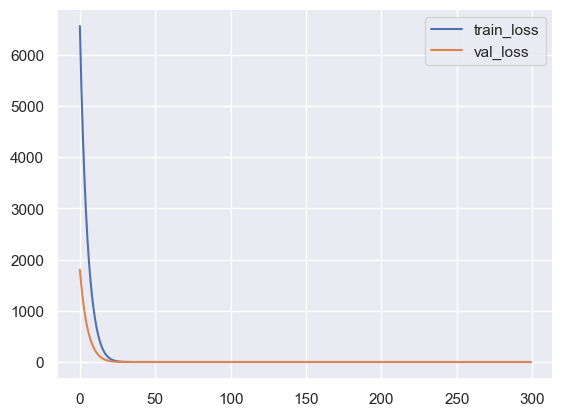

Finished Training
Epoch 1/300


100%|██████████| 7/7 [00:00<00:00, 135.79it/s]


Train Loss: 3855.6927490234375


100%|██████████| 2/2 [00:00<00:00, 160.26it/s]


Epoch 2/300


100%|██████████| 7/7 [00:00<00:00, 71.86it/s]


Train Loss: 3836.3428344726562


100%|██████████| 2/2 [00:00<00:00, 439.10it/s]


Epoch 3/300


100%|██████████| 7/7 [00:00<00:00, 150.22it/s]


Train Loss: 3816.3554077148438


100%|██████████| 2/2 [00:00<00:00, 397.39it/s]


Epoch 4/300


100%|██████████| 7/7 [00:00<00:00, 153.48it/s]


Train Loss: 3792.40771484375


100%|██████████| 2/2 [00:00<00:00, 384.30it/s]


Epoch 5/300


100%|██████████| 7/7 [00:00<00:00, 135.23it/s]


Train Loss: 3760.5104370117188


100%|██████████| 2/2 [00:00<00:00, 78.14it/s]


Epoch 6/300


100%|██████████| 7/7 [00:00<00:00, 122.01it/s]


Train Loss: 3719.281982421875


100%|██████████| 2/2 [00:00<00:00, 325.63it/s]


Epoch 7/300


100%|██████████| 7/7 [00:00<00:00, 64.88it/s]


Train Loss: 3667.921875


100%|██████████| 2/2 [00:00<00:00, 374.46it/s]


Epoch 8/300


100%|██████████| 7/7 [00:00<00:00, 137.03it/s]


Train Loss: 3603.8822631835938


100%|██████████| 2/2 [00:00<00:00, 324.20it/s]


Epoch 9/300


100%|██████████| 7/7 [00:00<00:00, 165.73it/s]


Train Loss: 3535.3609619140625


100%|██████████| 2/2 [00:00<00:00, 464.92it/s]


Epoch 10/300


100%|██████████| 7/7 [00:00<00:00, 160.93it/s]


Train Loss: 3472.1952209472656


100%|██████████| 2/2 [00:00<00:00, 412.89it/s]


Epoch 11/300


100%|██████████| 7/7 [00:00<00:00, 159.18it/s]


Train Loss: 3411.9381103515625


100%|██████████| 2/2 [00:00<00:00, 462.23it/s]


Epoch 12/300


100%|██████████| 7/7 [00:00<00:00, 162.17it/s]


Train Loss: 3354.2185974121094


100%|██████████| 2/2 [00:00<00:00, 492.00it/s]


Epoch 13/300


100%|██████████| 7/7 [00:00<00:00, 102.32it/s]


Train Loss: 3298.06689453125


100%|██████████| 2/2 [00:00<00:00, 303.67it/s]


Epoch 14/300


100%|██████████| 7/7 [00:00<00:00, 153.72it/s]


Train Loss: 3244.4527282714844


100%|██████████| 2/2 [00:00<00:00, 356.01it/s]


Epoch 15/300


100%|██████████| 7/7 [00:00<00:00, 123.27it/s]


Train Loss: 3194.135223388672


100%|██████████| 2/2 [00:00<00:00, 388.72it/s]


Epoch 16/300


100%|██████████| 7/7 [00:00<00:00, 127.46it/s]


Train Loss: 3147.086700439453


100%|██████████| 2/2 [00:00<00:00, 270.97it/s]


Epoch 17/300


100%|██████████| 7/7 [00:00<00:00, 123.09it/s]


Train Loss: 3103.971710205078


100%|██████████| 2/2 [00:00<00:00, 434.13it/s]


Epoch 18/300


100%|██████████| 7/7 [00:00<00:00, 80.43it/s]


Train Loss: 3063.3053588867188


100%|██████████| 2/2 [00:00<00:00, 436.11it/s]


Epoch 19/300


100%|██████████| 7/7 [00:00<00:00, 145.08it/s]


Train Loss: 3024.595184326172


100%|██████████| 2/2 [00:00<00:00, 452.80it/s]


Epoch 20/300


100%|██████████| 7/7 [00:00<00:00, 184.09it/s]


Train Loss: 2987.442138671875


100%|██████████| 2/2 [00:00<00:00, 418.91it/s]


Epoch 21/300


100%|██████████| 7/7 [00:00<00:00, 161.06it/s]


Train Loss: 2951.7816162109375


100%|██████████| 2/2 [00:00<00:00, 390.53it/s]


Epoch 22/300


100%|██████████| 7/7 [00:00<00:00, 83.34it/s]


Train Loss: 2917.1713256835938


100%|██████████| 2/2 [00:00<00:00, 337.57it/s]


Epoch 23/300


100%|██████████| 7/7 [00:00<00:00, 167.68it/s]


Train Loss: 2883.462158203125


100%|██████████| 2/2 [00:00<00:00, 423.35it/s]


Epoch 24/300


100%|██████████| 7/7 [00:00<00:00, 176.83it/s]


Train Loss: 2850.754913330078


100%|██████████| 2/2 [00:00<00:00, 449.53it/s]


Epoch 25/300


100%|██████████| 7/7 [00:00<00:00, 105.01it/s]


Train Loss: 2818.7872924804688


100%|██████████| 2/2 [00:00<00:00, 454.13it/s]


Epoch 26/300


100%|██████████| 7/7 [00:00<00:00, 171.43it/s]


Train Loss: 2787.3729248046875


100%|██████████| 2/2 [00:00<00:00, 422.05it/s]


Epoch 27/300


100%|██████████| 7/7 [00:00<00:00, 163.93it/s]


Train Loss: 2756.622344970703


100%|██████████| 2/2 [00:00<00:00, 457.77it/s]


Epoch 28/300


100%|██████████| 7/7 [00:00<00:00, 167.93it/s]


Train Loss: 2726.544677734375


100%|██████████| 2/2 [00:00<00:00, 385.74it/s]


Epoch 29/300


100%|██████████| 7/7 [00:00<00:00, 179.85it/s]


Train Loss: 2696.6492614746094


100%|██████████| 2/2 [00:00<00:00, 352.11it/s]


Epoch 30/300


100%|██████████| 7/7 [00:00<00:00, 140.10it/s]


Train Loss: 2666.725616455078


100%|██████████| 2/2 [00:00<00:00, 422.03it/s]


Epoch 31/300


100%|██████████| 7/7 [00:00<00:00, 150.35it/s]


Train Loss: 2635.813201904297


100%|██████████| 2/2 [00:00<00:00, 382.41it/s]


Epoch 32/300


100%|██████████| 7/7 [00:00<00:00, 148.66it/s]


Train Loss: 2604.060821533203


100%|██████████| 2/2 [00:00<00:00, 425.45it/s]


Epoch 33/300


100%|██████████| 7/7 [00:00<00:00, 170.62it/s]


Train Loss: 2572.7071228027344


100%|██████████| 2/2 [00:00<00:00, 420.52it/s]


Epoch 34/300


100%|██████████| 7/7 [00:00<00:00, 126.32it/s]


Train Loss: 2542.384735107422


100%|██████████| 2/2 [00:00<00:00, 461.47it/s]


Epoch 35/300


100%|██████████| 7/7 [00:00<00:00, 157.21it/s]


Train Loss: 2512.8702697753906


100%|██████████| 2/2 [00:00<00:00, 412.36it/s]


Epoch 36/300


100%|██████████| 7/7 [00:00<00:00, 155.68it/s]


Train Loss: 2483.821258544922


100%|██████████| 2/2 [00:00<00:00, 436.38it/s]


Epoch 37/300


100%|██████████| 7/7 [00:00<00:00, 174.49it/s]


Train Loss: 2455.4815368652344


100%|██████████| 2/2 [00:00<00:00, 461.27it/s]


Epoch 38/300


100%|██████████| 7/7 [00:00<00:00, 165.55it/s]


Train Loss: 2427.571746826172


100%|██████████| 2/2 [00:00<00:00, 422.11it/s]


Epoch 39/300


100%|██████████| 7/7 [00:00<00:00, 145.66it/s]


Train Loss: 2400.1598205566406


100%|██████████| 2/2 [00:00<00:00, 355.06it/s]


Epoch 40/300


100%|██████████| 7/7 [00:00<00:00, 164.47it/s]


Train Loss: 2373.2772216796875


100%|██████████| 2/2 [00:00<00:00, 458.09it/s]


Epoch 41/300


100%|██████████| 7/7 [00:00<00:00, 170.33it/s]


Train Loss: 2346.7194213867188


100%|██████████| 2/2 [00:00<00:00, 381.66it/s]


Epoch 42/300


100%|██████████| 7/7 [00:00<00:00, 146.90it/s]


Train Loss: 2320.6448669433594


100%|██████████| 2/2 [00:00<00:00, 402.56it/s]


Epoch 43/300


100%|██████████| 7/7 [00:00<00:00, 169.00it/s]


Train Loss: 2294.9768981933594


100%|██████████| 2/2 [00:00<00:00, 416.06it/s]


Epoch 44/300


100%|██████████| 7/7 [00:00<00:00, 137.04it/s]


Train Loss: 2269.630340576172


100%|██████████| 2/2 [00:00<00:00, 446.13it/s]


Epoch 45/300


100%|██████████| 7/7 [00:00<00:00, 167.19it/s]


Train Loss: 2244.719512939453


100%|██████████| 2/2 [00:00<00:00, 344.59it/s]


Epoch 46/300


100%|██████████| 7/7 [00:00<00:00, 164.37it/s]


Train Loss: 2220.116485595703


100%|██████████| 2/2 [00:00<00:00, 446.63it/s]


Epoch 47/300


100%|██████████| 7/7 [00:00<00:00, 165.01it/s]


Train Loss: 2195.7213745117188


100%|██████████| 2/2 [00:00<00:00, 468.27it/s]


Epoch 48/300


100%|██████████| 7/7 [00:00<00:00, 161.45it/s]


Train Loss: 2171.6724243164062


100%|██████████| 2/2 [00:00<00:00, 431.51it/s]


Epoch 49/300


100%|██████████| 7/7 [00:00<00:00, 148.14it/s]


Train Loss: 2147.985870361328


100%|██████████| 2/2 [00:00<00:00, 423.90it/s]


Epoch 50/300


100%|██████████| 7/7 [00:00<00:00, 171.28it/s]


Train Loss: 2124.5776977539062


100%|██████████| 2/2 [00:00<00:00, 466.09it/s]


Epoch 51/300


100%|██████████| 7/7 [00:00<00:00, 174.46it/s]


Train Loss: 2101.4270629882812


100%|██████████| 2/2 [00:00<00:00, 438.69it/s]


Epoch 52/300


100%|██████████| 7/7 [00:00<00:00, 166.86it/s]


Train Loss: 2078.5887145996094


100%|██████████| 2/2 [00:00<00:00, 419.47it/s]


Epoch 53/300


100%|██████████| 7/7 [00:00<00:00, 169.99it/s]


Train Loss: 2055.9568481445312


100%|██████████| 2/2 [00:00<00:00, 514.01it/s]


Epoch 54/300


100%|██████████| 7/7 [00:00<00:00, 133.64it/s]


Train Loss: 2033.7412414550781


100%|██████████| 2/2 [00:00<00:00, 374.52it/s]


Epoch 55/300


100%|██████████| 7/7 [00:00<00:00, 158.35it/s]


Train Loss: 2011.6434020996094


100%|██████████| 2/2 [00:00<00:00, 430.47it/s]


Epoch 56/300


100%|██████████| 7/7 [00:00<00:00, 171.79it/s]


Train Loss: 1989.9259948730469


100%|██████████| 2/2 [00:00<00:00, 438.87it/s]


Epoch 57/300


100%|██████████| 7/7 [00:00<00:00, 176.82it/s]


Train Loss: 1968.2818908691406


100%|██████████| 2/2 [00:00<00:00, 311.39it/s]


Epoch 58/300


100%|██████████| 7/7 [00:00<00:00, 186.77it/s]


Train Loss: 1947.0339965820312


100%|██████████| 2/2 [00:00<00:00, 466.66it/s]


Epoch 59/300


100%|██████████| 7/7 [00:00<00:00, 162.62it/s]


Train Loss: 1925.967529296875


100%|██████████| 2/2 [00:00<00:00, 453.49it/s]


Epoch 60/300


100%|██████████| 7/7 [00:00<00:00, 178.29it/s]


Train Loss: 1905.1182250976562


100%|██████████| 2/2 [00:00<00:00, 465.98it/s]


Epoch 61/300


100%|██████████| 7/7 [00:00<00:00, 144.88it/s]


Train Loss: 1884.4774780273438


100%|██████████| 2/2 [00:00<00:00, 318.32it/s]


Epoch 62/300


100%|██████████| 7/7 [00:00<00:00, 158.85it/s]


Train Loss: 1864.1578369140625


100%|██████████| 2/2 [00:00<00:00, 471.24it/s]


Epoch 63/300


100%|██████████| 7/7 [00:00<00:00, 155.24it/s]


Train Loss: 1843.9447021484375


100%|██████████| 2/2 [00:00<00:00, 378.80it/s]


Epoch 64/300


100%|██████████| 7/7 [00:00<00:00, 171.12it/s]


Train Loss: 1824.0475769042969


100%|██████████| 2/2 [00:00<00:00, 395.33it/s]


Epoch 65/300


100%|██████████| 7/7 [00:00<00:00, 161.16it/s]


Train Loss: 1804.2889404296875


100%|██████████| 2/2 [00:00<00:00, 461.90it/s]


Epoch 66/300


100%|██████████| 7/7 [00:00<00:00, 178.56it/s]


Train Loss: 1784.841049194336


100%|██████████| 2/2 [00:00<00:00, 434.58it/s]


Epoch 67/300


100%|██████████| 7/7 [00:00<00:00, 175.31it/s]


Train Loss: 1765.5314483642578


100%|██████████| 2/2 [00:00<00:00, 417.18it/s]


Epoch 68/300


100%|██████████| 7/7 [00:00<00:00, 177.60it/s]


Train Loss: 1746.370590209961


100%|██████████| 2/2 [00:00<00:00, 388.13it/s]


Epoch 69/300


100%|██████████| 7/7 [00:00<00:00, 157.01it/s]


Train Loss: 1727.5092163085938


100%|██████████| 2/2 [00:00<00:00, 427.34it/s]


Epoch 70/300


100%|██████████| 7/7 [00:00<00:00, 162.28it/s]


Train Loss: 1708.8638916015625


100%|██████████| 2/2 [00:00<00:00, 499.86it/s]


Epoch 71/300


100%|██████████| 7/7 [00:00<00:00, 168.64it/s]


Train Loss: 1690.3391571044922


100%|██████████| 2/2 [00:00<00:00, 431.14it/s]


Epoch 72/300


100%|██████████| 7/7 [00:00<00:00, 175.67it/s]


Train Loss: 1671.9866638183594


100%|██████████| 2/2 [00:00<00:00, 441.97it/s]


Epoch 73/300


100%|██████████| 7/7 [00:00<00:00, 163.29it/s]


Train Loss: 1653.9872283935547


100%|██████████| 2/2 [00:00<00:00, 391.22it/s]


Epoch 74/300


100%|██████████| 7/7 [00:00<00:00, 155.08it/s]


Train Loss: 1635.9618530273438


100%|██████████| 2/2 [00:00<00:00, 412.28it/s]


Epoch 75/300


100%|██████████| 7/7 [00:00<00:00, 142.85it/s]


Train Loss: 1618.2463684082031


100%|██████████| 2/2 [00:00<00:00, 424.27it/s]


Epoch 76/300


100%|██████████| 7/7 [00:00<00:00, 162.95it/s]


Train Loss: 1600.69970703125


100%|██████████| 2/2 [00:00<00:00, 460.61it/s]


Epoch 77/300


100%|██████████| 7/7 [00:00<00:00, 163.12it/s]


Train Loss: 1583.3204650878906


100%|██████████| 2/2 [00:00<00:00, 452.58it/s]


Epoch 78/300


100%|██████████| 7/7 [00:00<00:00, 165.45it/s]


Train Loss: 1566.1322479248047


100%|██████████| 2/2 [00:00<00:00, 286.65it/s]


Epoch 79/300


100%|██████████| 7/7 [00:00<00:00, 156.67it/s]


Train Loss: 1549.1609802246094


100%|██████████| 2/2 [00:00<00:00, 385.44it/s]


Epoch 80/300


100%|██████████| 7/7 [00:00<00:00, 166.91it/s]


Train Loss: 1532.294677734375


100%|██████████| 2/2 [00:00<00:00, 361.73it/s]


Epoch 81/300


100%|██████████| 7/7 [00:00<00:00, 173.72it/s]


Train Loss: 1515.6192016601562


100%|██████████| 2/2 [00:00<00:00, 372.93it/s]


Epoch 82/300


100%|██████████| 7/7 [00:00<00:00, 166.43it/s]


Train Loss: 1499.0643463134766


100%|██████████| 2/2 [00:00<00:00, 427.53it/s]


Epoch 83/300


100%|██████████| 7/7 [00:00<00:00, 177.42it/s]


Train Loss: 1482.8265380859375


100%|██████████| 2/2 [00:00<00:00, 274.27it/s]


Epoch 84/300


100%|██████████| 7/7 [00:00<00:00, 156.46it/s]


Train Loss: 1466.5883026123047


100%|██████████| 2/2 [00:00<00:00, 236.52it/s]


Epoch 85/300


100%|██████████| 7/7 [00:00<00:00, 151.18it/s]


Train Loss: 1450.5899810791016


100%|██████████| 2/2 [00:00<00:00, 440.44it/s]


Epoch 86/300


100%|██████████| 7/7 [00:00<00:00, 61.39it/s]


Train Loss: 1434.7219848632812


100%|██████████| 2/2 [00:00<00:00, 369.88it/s]


Epoch 87/300


100%|██████████| 7/7 [00:00<00:00, 150.58it/s]


Train Loss: 1419.1332092285156


100%|██████████| 2/2 [00:00<00:00, 453.34it/s]


Epoch 88/300


100%|██████████| 7/7 [00:00<00:00, 164.69it/s]


Train Loss: 1403.576431274414


100%|██████████| 2/2 [00:00<00:00, 449.65it/s]


Epoch 89/300


100%|██████████| 7/7 [00:00<00:00, 87.35it/s]


Train Loss: 1388.2573547363281


100%|██████████| 2/2 [00:00<00:00, 459.98it/s]


Epoch 90/300


100%|██████████| 7/7 [00:00<00:00, 181.01it/s]


Train Loss: 1373.0619354248047


100%|██████████| 2/2 [00:00<00:00, 493.94it/s]


Epoch 91/300


100%|██████████| 7/7 [00:00<00:00, 126.88it/s]


Train Loss: 1358.0345001220703


100%|██████████| 2/2 [00:00<00:00, 475.14it/s]


Epoch 92/300


100%|██████████| 7/7 [00:00<00:00, 73.35it/s]


Train Loss: 1343.1194305419922


100%|██████████| 2/2 [00:00<00:00, 114.37it/s]


Epoch 93/300


100%|██████████| 7/7 [00:00<00:00, 76.08it/s]


Train Loss: 1328.3877258300781


100%|██████████| 2/2 [00:00<00:00, 163.42it/s]


Epoch 94/300


100%|██████████| 7/7 [00:00<00:00, 147.86it/s]


Train Loss: 1313.735610961914


100%|██████████| 2/2 [00:00<00:00, 422.03it/s]


Epoch 95/300


100%|██████████| 7/7 [00:00<00:00, 182.13it/s]


Train Loss: 1299.3051300048828


100%|██████████| 2/2 [00:00<00:00, 410.50it/s]


Epoch 96/300


100%|██████████| 7/7 [00:00<00:00, 181.02it/s]


Train Loss: 1285.056381225586


100%|██████████| 2/2 [00:00<00:00, 376.71it/s]


Epoch 97/300


100%|██████████| 7/7 [00:00<00:00, 82.78it/s]


Train Loss: 1270.7450256347656


100%|██████████| 2/2 [00:00<00:00, 338.30it/s]


Epoch 98/300


100%|██████████| 7/7 [00:00<00:00, 137.64it/s]


Train Loss: 1256.7951049804688


100%|██████████| 2/2 [00:00<00:00, 416.06it/s]


Epoch 99/300


100%|██████████| 7/7 [00:00<00:00, 141.02it/s]


Train Loss: 1242.9748077392578


100%|██████████| 2/2 [00:00<00:00, 207.25it/s]


Epoch 100/300


100%|██████████| 7/7 [00:00<00:00, 156.48it/s]


Train Loss: 1229.168685913086


100%|██████████| 2/2 [00:00<00:00, 357.40it/s]


Epoch 101/300


100%|██████████| 7/7 [00:00<00:00, 166.43it/s]


Train Loss: 1215.584945678711


100%|██████████| 2/2 [00:00<00:00, 359.07it/s]


Epoch 102/300


100%|██████████| 7/7 [00:00<00:00, 134.08it/s]


Train Loss: 1202.1552276611328


100%|██████████| 2/2 [00:00<00:00, 412.87it/s]


Epoch 103/300


100%|██████████| 7/7 [00:00<00:00, 72.03it/s]


Train Loss: 1188.8299560546875


100%|██████████| 2/2 [00:00<00:00, 391.92it/s]


Epoch 104/300


100%|██████████| 7/7 [00:00<00:00, 101.35it/s]


Train Loss: 1175.6709442138672


100%|██████████| 2/2 [00:00<00:00, 458.72it/s]


Epoch 105/300


100%|██████████| 7/7 [00:00<00:00, 63.26it/s]


Train Loss: 1162.5885467529297


100%|██████████| 2/2 [00:00<00:00, 387.16it/s]


Epoch 106/300


100%|██████████| 7/7 [00:00<00:00, 147.99it/s]


Train Loss: 1149.69140625


100%|██████████| 2/2 [00:00<00:00, 383.06it/s]


Epoch 107/300


100%|██████████| 7/7 [00:00<00:00, 167.90it/s]


Train Loss: 1136.9078063964844


100%|██████████| 2/2 [00:00<00:00, 454.47it/s]


Epoch 108/300


100%|██████████| 7/7 [00:00<00:00, 171.01it/s]


Train Loss: 1124.2377471923828


100%|██████████| 2/2 [00:00<00:00, 413.84it/s]


Epoch 109/300


100%|██████████| 7/7 [00:00<00:00, 111.25it/s]


Train Loss: 1111.6912536621094


100%|██████████| 2/2 [00:00<00:00, 131.50it/s]


Epoch 110/300


100%|██████████| 7/7 [00:00<00:00, 135.42it/s]


Train Loss: 1099.2530059814453


100%|██████████| 2/2 [00:00<00:00, 385.79it/s]


Epoch 111/300


100%|██████████| 7/7 [00:00<00:00, 122.35it/s]


Train Loss: 1086.980484008789


100%|██████████| 2/2 [00:00<00:00, 327.17it/s]


Epoch 112/300


100%|██████████| 7/7 [00:00<00:00, 133.32it/s]


Train Loss: 1074.8380279541016


100%|██████████| 2/2 [00:00<00:00, 369.97it/s]


Epoch 113/300


100%|██████████| 7/7 [00:00<00:00, 107.19it/s]


Train Loss: 1062.78759765625


100%|██████████| 2/2 [00:00<00:00, 216.26it/s]


Epoch 114/300


100%|██████████| 7/7 [00:00<00:00, 122.60it/s]


Train Loss: 1050.819564819336


100%|██████████| 2/2 [00:00<00:00, 214.43it/s]


Epoch 115/300


100%|██████████| 7/7 [00:00<00:00, 138.38it/s]


Train Loss: 1039.0701904296875


100%|██████████| 2/2 [00:00<00:00, 463.92it/s]


Epoch 116/300


100%|██████████| 7/7 [00:00<00:00, 169.67it/s]


Train Loss: 1027.3977966308594


100%|██████████| 2/2 [00:00<00:00, 397.15it/s]


Epoch 117/300


100%|██████████| 7/7 [00:00<00:00, 154.29it/s]


Train Loss: 1015.8362121582031


100%|██████████| 2/2 [00:00<00:00, 479.02it/s]


Epoch 118/300


100%|██████████| 7/7 [00:00<00:00, 179.37it/s]


Train Loss: 1004.3982086181641


100%|██████████| 2/2 [00:00<00:00, 427.08it/s]


Epoch 119/300


100%|██████████| 7/7 [00:00<00:00, 170.87it/s]


Train Loss: 993.0439147949219


100%|██████████| 2/2 [00:00<00:00, 455.88it/s]


Epoch 120/300


100%|██████████| 7/7 [00:00<00:00, 169.45it/s]


Train Loss: 981.8626098632812


100%|██████████| 2/2 [00:00<00:00, 407.33it/s]


Epoch 121/300


100%|██████████| 7/7 [00:00<00:00, 162.09it/s]


Train Loss: 970.7416534423828


100%|██████████| 2/2 [00:00<00:00, 455.78it/s]


Epoch 122/300


100%|██████████| 7/7 [00:00<00:00, 160.51it/s]


Train Loss: 959.7603759765625


100%|██████████| 2/2 [00:00<00:00, 375.25it/s]


Epoch 123/300


100%|██████████| 7/7 [00:00<00:00, 162.66it/s]


Train Loss: 948.8902130126953


100%|██████████| 2/2 [00:00<00:00, 322.27it/s]


Epoch 124/300


100%|██████████| 7/7 [00:00<00:00, 169.89it/s]


Train Loss: 938.062744140625


100%|██████████| 2/2 [00:00<00:00, 430.10it/s]


Epoch 125/300


100%|██████████| 7/7 [00:00<00:00, 161.58it/s]


Train Loss: 927.4405670166016


100%|██████████| 2/2 [00:00<00:00, 420.00it/s]


Epoch 126/300


100%|██████████| 7/7 [00:00<00:00, 177.18it/s]


Train Loss: 916.8853607177734


100%|██████████| 2/2 [00:00<00:00, 220.63it/s]


Epoch 127/300


100%|██████████| 7/7 [00:00<00:00, 151.38it/s]


Train Loss: 906.4356231689453


100%|██████████| 2/2 [00:00<00:00, 475.98it/s]


Epoch 128/300


100%|██████████| 7/7 [00:00<00:00, 182.43it/s]


Train Loss: 896.0773086547852


100%|██████████| 2/2 [00:00<00:00, 436.20it/s]


Epoch 129/300


100%|██████████| 7/7 [00:00<00:00, 163.40it/s]


Train Loss: 885.8804244995117


100%|██████████| 2/2 [00:00<00:00, 403.86it/s]


Epoch 130/300


100%|██████████| 7/7 [00:00<00:00, 178.13it/s]


Train Loss: 875.7217407226562


100%|██████████| 2/2 [00:00<00:00, 436.97it/s]


Epoch 131/300


100%|██████████| 7/7 [00:00<00:00, 168.27it/s]


Train Loss: 865.6857833862305


100%|██████████| 2/2 [00:00<00:00, 457.34it/s]


Epoch 132/300


100%|██████████| 7/7 [00:00<00:00, 86.88it/s]


Train Loss: 855.7708587646484


100%|██████████| 2/2 [00:00<00:00, 423.90it/s]


Epoch 133/300


100%|██████████| 7/7 [00:00<00:00, 158.29it/s]


Train Loss: 845.9280700683594


100%|██████████| 2/2 [00:00<00:00, 329.07it/s]


Epoch 134/300


100%|██████████| 7/7 [00:00<00:00, 170.65it/s]


Train Loss: 836.219482421875


100%|██████████| 2/2 [00:00<00:00, 468.51it/s]


Epoch 135/300


100%|██████████| 7/7 [00:00<00:00, 167.99it/s]


Train Loss: 826.5447692871094


100%|██████████| 2/2 [00:00<00:00, 445.54it/s]


Epoch 136/300


100%|██████████| 7/7 [00:00<00:00, 106.62it/s]


Train Loss: 817.0483627319336


100%|██████████| 2/2 [00:00<00:00, 408.82it/s]


Epoch 137/300


100%|██████████| 7/7 [00:00<00:00, 172.20it/s]


Train Loss: 807.6368103027344


100%|██████████| 2/2 [00:00<00:00, 426.73it/s]


Epoch 138/300


100%|██████████| 7/7 [00:00<00:00, 162.93it/s]


Train Loss: 798.2954559326172


100%|██████████| 2/2 [00:00<00:00, 486.83it/s]


Epoch 139/300


100%|██████████| 7/7 [00:00<00:00, 169.98it/s]


Train Loss: 789.0208206176758


100%|██████████| 2/2 [00:00<00:00, 479.16it/s]


Epoch 140/300


100%|██████████| 7/7 [00:00<00:00, 168.06it/s]


Train Loss: 779.8720703125


100%|██████████| 2/2 [00:00<00:00, 480.28it/s]


Epoch 141/300


100%|██████████| 7/7 [00:00<00:00, 151.77it/s]


Train Loss: 770.8158798217773


100%|██████████| 2/2 [00:00<00:00, 456.20it/s]


Epoch 142/300


100%|██████████| 7/7 [00:00<00:00, 145.51it/s]


Train Loss: 761.8578491210938


100%|██████████| 2/2 [00:00<00:00, 488.65it/s]


Epoch 143/300


100%|██████████| 7/7 [00:00<00:00, 180.17it/s]


Train Loss: 753.0038223266602


100%|██████████| 2/2 [00:00<00:00, 454.94it/s]


Epoch 144/300


100%|██████████| 7/7 [00:00<00:00, 156.19it/s]


Train Loss: 744.196907043457


100%|██████████| 2/2 [00:00<00:00, 426.34it/s]


Epoch 145/300


100%|██████████| 7/7 [00:00<00:00, 177.43it/s]


Train Loss: 735.46826171875


100%|██████████| 2/2 [00:00<00:00, 460.38it/s]


Epoch 146/300


100%|██████████| 7/7 [00:00<00:00, 139.31it/s]


Train Loss: 726.8708953857422


100%|██████████| 2/2 [00:00<00:00, 443.68it/s]


Epoch 147/300


100%|██████████| 7/7 [00:00<00:00, 173.57it/s]


Train Loss: 718.3877792358398


100%|██████████| 2/2 [00:00<00:00, 397.00it/s]


Epoch 148/300


100%|██████████| 7/7 [00:00<00:00, 174.40it/s]


Train Loss: 709.9121398925781


100%|██████████| 2/2 [00:00<00:00, 441.48it/s]


Epoch 149/300


100%|██████████| 7/7 [00:00<00:00, 164.80it/s]


Train Loss: 701.5964660644531


100%|██████████| 2/2 [00:00<00:00, 358.29it/s]


Epoch 150/300


100%|██████████| 7/7 [00:00<00:00, 167.08it/s]


Train Loss: 693.2917327880859


100%|██████████| 2/2 [00:00<00:00, 440.81it/s]


Epoch 151/300


100%|██████████| 7/7 [00:00<00:00, 171.37it/s]


Train Loss: 685.1670989990234


100%|██████████| 2/2 [00:00<00:00, 441.51it/s]


Epoch 152/300


100%|██████████| 7/7 [00:00<00:00, 176.74it/s]


Train Loss: 677.0821914672852


100%|██████████| 2/2 [00:00<00:00, 335.40it/s]


Epoch 153/300


100%|██████████| 7/7 [00:00<00:00, 177.09it/s]


Train Loss: 669.0429000854492


100%|██████████| 2/2 [00:00<00:00, 473.61it/s]


Epoch 154/300


100%|██████████| 7/7 [00:00<00:00, 186.08it/s]


Train Loss: 661.1074371337891


100%|██████████| 2/2 [00:00<00:00, 439.63it/s]


Epoch 155/300


100%|██████████| 7/7 [00:00<00:00, 163.92it/s]


Train Loss: 653.2699279785156


100%|██████████| 2/2 [00:00<00:00, 431.98it/s]


Epoch 156/300


100%|██████████| 7/7 [00:00<00:00, 151.31it/s]


Train Loss: 645.4759826660156


100%|██████████| 2/2 [00:00<00:00, 464.56it/s]


Epoch 157/300


100%|██████████| 7/7 [00:00<00:00, 172.33it/s]


Train Loss: 637.8258514404297


100%|██████████| 2/2 [00:00<00:00, 410.82it/s]


Epoch 158/300


100%|██████████| 7/7 [00:00<00:00, 177.82it/s]


Train Loss: 630.208869934082


100%|██████████| 2/2 [00:00<00:00, 450.23it/s]


Epoch 159/300


100%|██████████| 7/7 [00:00<00:00, 167.91it/s]


Train Loss: 622.6722869873047


100%|██████████| 2/2 [00:00<00:00, 457.24it/s]


Epoch 160/300


100%|██████████| 7/7 [00:00<00:00, 169.28it/s]


Train Loss: 615.1872024536133


100%|██████████| 2/2 [00:00<00:00, 481.25it/s]


Epoch 161/300


100%|██████████| 7/7 [00:00<00:00, 137.09it/s]


Train Loss: 607.8501739501953


100%|██████████| 2/2 [00:00<00:00, 447.13it/s]


Epoch 162/300


100%|██████████| 7/7 [00:00<00:00, 177.42it/s]


Train Loss: 600.54443359375


100%|██████████| 2/2 [00:00<00:00, 389.32it/s]


Epoch 163/300


100%|██████████| 7/7 [00:00<00:00, 148.86it/s]


Train Loss: 593.3114395141602


100%|██████████| 2/2 [00:00<00:00, 429.39it/s]


Epoch 164/300


100%|██████████| 7/7 [00:00<00:00, 182.37it/s]


Train Loss: 586.1613616943359


100%|██████████| 2/2 [00:00<00:00, 355.12it/s]


Epoch 165/300


100%|██████████| 7/7 [00:00<00:00, 169.75it/s]


Train Loss: 579.1016464233398


100%|██████████| 2/2 [00:00<00:00, 393.48it/s]


Epoch 166/300


100%|██████████| 7/7 [00:00<00:00, 154.29it/s]


Train Loss: 572.0837326049805


100%|██████████| 2/2 [00:00<00:00, 456.20it/s]


Epoch 167/300


100%|██████████| 7/7 [00:00<00:00, 180.19it/s]


Train Loss: 565.1283416748047


100%|██████████| 2/2 [00:00<00:00, 465.54it/s]


Epoch 168/300


100%|██████████| 7/7 [00:00<00:00, 181.94it/s]


Train Loss: 558.2722549438477


100%|██████████| 2/2 [00:00<00:00, 344.23it/s]


Epoch 169/300


100%|██████████| 7/7 [00:00<00:00, 179.10it/s]


Train Loss: 551.4251708984375


100%|██████████| 2/2 [00:00<00:00, 447.25it/s]


Epoch 170/300


100%|██████████| 7/7 [00:00<00:00, 152.23it/s]


Train Loss: 544.7087936401367


100%|██████████| 2/2 [00:00<00:00, 455.78it/s]


Epoch 171/300


100%|██████████| 7/7 [00:00<00:00, 168.98it/s]


Train Loss: 538.1121978759766


100%|██████████| 2/2 [00:00<00:00, 498.61it/s]


Epoch 172/300


100%|██████████| 7/7 [00:00<00:00, 170.48it/s]


Train Loss: 531.5085678100586


100%|██████████| 2/2 [00:00<00:00, 431.87it/s]


Epoch 173/300


100%|██████████| 7/7 [00:00<00:00, 86.20it/s]


Train Loss: 524.9924850463867


100%|██████████| 2/2 [00:00<00:00, 372.03it/s]


Epoch 174/300


100%|██████████| 7/7 [00:00<00:00, 167.16it/s]


Train Loss: 518.5698394775391


100%|██████████| 2/2 [00:00<00:00, 467.62it/s]


Epoch 175/300


100%|██████████| 7/7 [00:00<00:00, 164.77it/s]


Train Loss: 512.1938552856445


100%|██████████| 2/2 [00:00<00:00, 348.68it/s]


Epoch 176/300


100%|██████████| 7/7 [00:00<00:00, 155.68it/s]


Train Loss: 505.8951187133789


100%|██████████| 2/2 [00:00<00:00, 435.16it/s]


Epoch 177/300


100%|██████████| 7/7 [00:00<00:00, 158.47it/s]


Train Loss: 499.6243667602539


100%|██████████| 2/2 [00:00<00:00, 448.73it/s]


Epoch 178/300


100%|██████████| 7/7 [00:00<00:00, 150.65it/s]


Train Loss: 493.40940856933594


100%|██████████| 2/2 [00:00<00:00, 390.62it/s]


Epoch 179/300


100%|██████████| 7/7 [00:00<00:00, 162.00it/s]


Train Loss: 487.3389663696289


100%|██████████| 2/2 [00:00<00:00, 454.74it/s]


Epoch 180/300


100%|██████████| 7/7 [00:00<00:00, 161.74it/s]


Train Loss: 481.25244903564453


100%|██████████| 2/2 [00:00<00:00, 257.41it/s]


Epoch 181/300


100%|██████████| 7/7 [00:00<00:00, 165.61it/s]


Train Loss: 475.2881774902344


100%|██████████| 2/2 [00:00<00:00, 435.64it/s]


Epoch 182/300


100%|██████████| 7/7 [00:00<00:00, 140.17it/s]


Train Loss: 469.3476791381836


100%|██████████| 2/2 [00:00<00:00, 387.89it/s]


Epoch 183/300


100%|██████████| 7/7 [00:00<00:00, 180.69it/s]


Train Loss: 463.4347457885742


100%|██████████| 2/2 [00:00<00:00, 446.32it/s]


Epoch 184/300


100%|██████████| 7/7 [00:00<00:00, 163.56it/s]


Train Loss: 457.6871795654297


100%|██████████| 2/2 [00:00<00:00, 448.13it/s]


Epoch 185/300


100%|██████████| 7/7 [00:00<00:00, 169.95it/s]


Train Loss: 451.9067153930664


100%|██████████| 2/2 [00:00<00:00, 316.61it/s]


Epoch 186/300


100%|██████████| 7/7 [00:00<00:00, 177.22it/s]


Train Loss: 446.23419189453125


100%|██████████| 2/2 [00:00<00:00, 436.20it/s]


Epoch 187/300


100%|██████████| 7/7 [00:00<00:00, 159.35it/s]


Train Loss: 440.604793548584


100%|██████████| 2/2 [00:00<00:00, 429.28it/s]


Epoch 188/300


100%|██████████| 7/7 [00:00<00:00, 149.13it/s]


Train Loss: 435.02692794799805


100%|██████████| 2/2 [00:00<00:00, 376.80it/s]


Epoch 189/300


100%|██████████| 7/7 [00:00<00:00, 146.18it/s]


Train Loss: 429.5134086608887


100%|██████████| 2/2 [00:00<00:00, 371.52it/s]


Epoch 190/300


100%|██████████| 7/7 [00:00<00:00, 58.99it/s]


Train Loss: 424.0660705566406


100%|██████████| 2/2 [00:00<00:00, 414.44it/s]


Epoch 191/300


100%|██████████| 7/7 [00:00<00:00, 150.00it/s]


Train Loss: 418.6721534729004


100%|██████████| 2/2 [00:00<00:00, 460.20it/s]


Epoch 192/300


100%|██████████| 7/7 [00:00<00:00, 156.87it/s]


Train Loss: 413.36681365966797


100%|██████████| 2/2 [00:00<00:00, 455.38it/s]


Epoch 193/300


100%|██████████| 7/7 [00:00<00:00, 103.31it/s]


Train Loss: 408.0768356323242


100%|██████████| 2/2 [00:00<00:00, 294.12it/s]


Epoch 194/300


100%|██████████| 7/7 [00:00<00:00, 155.80it/s]


Train Loss: 402.8471260070801


100%|██████████| 2/2 [00:00<00:00, 482.99it/s]


Epoch 195/300


100%|██████████| 7/7 [00:00<00:00, 40.14it/s]


Train Loss: 397.6867218017578


100%|██████████| 2/2 [00:00<00:00, 136.68it/s]


Epoch 196/300


100%|██████████| 7/7 [00:00<00:00, 112.61it/s]


Train Loss: 392.5436096191406


100%|██████████| 2/2 [00:00<00:00, 259.74it/s]


Epoch 197/300


100%|██████████| 7/7 [00:00<00:00, 152.80it/s]


Train Loss: 387.4933624267578


100%|██████████| 2/2 [00:00<00:00, 393.72it/s]


Epoch 198/300


100%|██████████| 7/7 [00:00<00:00, 158.09it/s]


Train Loss: 382.4922981262207


100%|██████████| 2/2 [00:00<00:00, 398.96it/s]


Epoch 199/300


100%|██████████| 7/7 [00:00<00:00, 187.45it/s]


Train Loss: 377.55945205688477


100%|██████████| 2/2 [00:00<00:00, 528.28it/s]


Epoch 200/300


100%|██████████| 7/7 [00:00<00:00, 158.37it/s]


Train Loss: 372.64820098876953


100%|██████████| 2/2 [00:00<00:00, 474.15it/s]


Epoch 201/300


100%|██████████| 7/7 [00:00<00:00, 188.94it/s]


Train Loss: 367.78229904174805


100%|██████████| 2/2 [00:00<00:00, 484.83it/s]


Epoch 202/300


100%|██████████| 7/7 [00:00<00:00, 188.61it/s]


Train Loss: 362.9914093017578


100%|██████████| 2/2 [00:00<00:00, 460.96it/s]


Epoch 203/300


100%|██████████| 7/7 [00:00<00:00, 173.94it/s]


Train Loss: 358.2348747253418


100%|██████████| 2/2 [00:00<00:00, 346.25it/s]


Epoch 204/300


100%|██████████| 7/7 [00:00<00:00, 114.09it/s]


Train Loss: 353.5479736328125


100%|██████████| 2/2 [00:00<00:00, 334.43it/s]


Epoch 205/300


100%|██████████| 7/7 [00:00<00:00, 139.11it/s]


Train Loss: 348.9212646484375


100%|██████████| 2/2 [00:00<00:00, 268.77it/s]


Epoch 206/300


100%|██████████| 7/7 [00:00<00:00, 129.76it/s]


Train Loss: 344.29772567749023


100%|██████████| 2/2 [00:00<00:00, 147.52it/s]


Epoch 207/300


100%|██████████| 7/7 [00:00<00:00, 44.00it/s]


Train Loss: 339.77888107299805


100%|██████████| 2/2 [00:00<00:00, 477.00it/s]


Epoch 208/300


100%|██████████| 7/7 [00:00<00:00, 54.09it/s]


Train Loss: 335.29956817626953


100%|██████████| 2/2 [00:00<00:00, 73.18it/s]


Epoch 209/300


100%|██████████| 7/7 [00:00<00:00, 89.73it/s]


Train Loss: 330.83446884155273


100%|██████████| 2/2 [00:00<00:00, 422.45it/s]


Epoch 210/300


100%|██████████| 7/7 [00:00<00:00, 148.48it/s]


Train Loss: 326.41728591918945


100%|██████████| 2/2 [00:00<00:00, 258.02it/s]


Epoch 211/300


100%|██████████| 7/7 [00:00<00:00, 168.89it/s]


Train Loss: 322.07837677001953


100%|██████████| 2/2 [00:00<00:00, 498.91it/s]


Epoch 212/300


100%|██████████| 7/7 [00:00<00:00, 164.47it/s]


Train Loss: 317.7963676452637


100%|██████████| 2/2 [00:00<00:00, 344.06it/s]


Epoch 213/300


100%|██████████| 7/7 [00:00<00:00, 152.62it/s]


Train Loss: 313.53221893310547


100%|██████████| 2/2 [00:00<00:00, 102.06it/s]


Epoch 214/300


100%|██████████| 7/7 [00:00<00:00, 132.70it/s]


Train Loss: 309.3223571777344


100%|██████████| 2/2 [00:00<00:00, 500.01it/s]


Epoch 215/300


100%|██████████| 7/7 [00:00<00:00, 136.00it/s]


Train Loss: 305.14124298095703


100%|██████████| 2/2 [00:00<00:00, 289.18it/s]


Epoch 216/300


100%|██████████| 7/7 [00:00<00:00, 133.55it/s]


Train Loss: 301.04316329956055


100%|██████████| 2/2 [00:00<00:00, 380.64it/s]


Epoch 217/300


100%|██████████| 7/7 [00:00<00:00, 131.15it/s]


Train Loss: 296.9693794250488


100%|██████████| 2/2 [00:00<00:00, 206.06it/s]


Epoch 218/300


100%|██████████| 7/7 [00:00<00:00, 134.38it/s]


Train Loss: 292.92809295654297


100%|██████████| 2/2 [00:00<00:00, 431.02it/s]


Epoch 219/300


100%|██████████| 7/7 [00:00<00:00, 129.21it/s]


Train Loss: 288.9757995605469


100%|██████████| 2/2 [00:00<00:00, 398.51it/s]


Epoch 220/300


100%|██████████| 7/7 [00:00<00:00, 146.48it/s]


Train Loss: 285.03671646118164


100%|██████████| 2/2 [00:00<00:00, 451.97it/s]


Epoch 221/300


100%|██████████| 7/7 [00:00<00:00, 154.92it/s]


Train Loss: 281.12677001953125


100%|██████████| 2/2 [00:00<00:00, 441.41it/s]


Epoch 222/300


100%|██████████| 7/7 [00:00<00:00, 130.87it/s]


Train Loss: 277.2686653137207


100%|██████████| 2/2 [00:00<00:00, 343.81it/s]


Epoch 223/300


100%|██████████| 7/7 [00:00<00:00, 154.51it/s]


Train Loss: 273.43556213378906


100%|██████████| 2/2 [00:00<00:00, 339.44it/s]


Epoch 224/300


100%|██████████| 7/7 [00:00<00:00, 163.34it/s]


Train Loss: 269.70190811157227


100%|██████████| 2/2 [00:00<00:00, 423.56it/s]


Epoch 225/300


100%|██████████| 7/7 [00:00<00:00, 172.41it/s]


Train Loss: 265.94262313842773


100%|██████████| 2/2 [00:00<00:00, 451.56it/s]


Epoch 226/300


100%|██████████| 7/7 [00:00<00:00, 167.28it/s]


Train Loss: 262.2611541748047


100%|██████████| 2/2 [00:00<00:00, 406.42it/s]


Epoch 227/300


100%|██████████| 7/7 [00:00<00:00, 138.17it/s]


Train Loss: 258.661808013916


100%|██████████| 2/2 [00:00<00:00, 440.81it/s]


Epoch 228/300


100%|██████████| 7/7 [00:00<00:00, 141.86it/s]


Train Loss: 255.03611755371094


100%|██████████| 2/2 [00:00<00:00, 460.53it/s]


Epoch 229/300


100%|██████████| 7/7 [00:00<00:00, 137.12it/s]


Train Loss: 251.48087692260742


100%|██████████| 2/2 [00:00<00:00, 449.04it/s]


Epoch 230/300


100%|██████████| 7/7 [00:00<00:00, 164.94it/s]


Train Loss: 247.94945526123047


100%|██████████| 2/2 [00:00<00:00, 440.60it/s]


Epoch 231/300


100%|██████████| 7/7 [00:00<00:00, 135.47it/s]


Train Loss: 244.46467208862305


100%|██████████| 2/2 [00:00<00:00, 448.95it/s]


Epoch 232/300


100%|██████████| 7/7 [00:00<00:00, 168.55it/s]


Train Loss: 241.0620880126953


100%|██████████| 2/2 [00:00<00:00, 450.44it/s]


Epoch 233/300


100%|██████████| 7/7 [00:00<00:00, 179.28it/s]


Train Loss: 237.6099624633789


100%|██████████| 2/2 [00:00<00:00, 411.95it/s]


Epoch 234/300


100%|██████████| 7/7 [00:00<00:00, 162.06it/s]


Train Loss: 234.26470947265625


100%|██████████| 2/2 [00:00<00:00, 459.55it/s]


Epoch 235/300


100%|██████████| 7/7 [00:00<00:00, 154.22it/s]


Train Loss: 230.92281341552734


100%|██████████| 2/2 [00:00<00:00, 422.39it/s]


Epoch 236/300


100%|██████████| 7/7 [00:00<00:00, 143.81it/s]


Train Loss: 227.65300750732422


100%|██████████| 2/2 [00:00<00:00, 406.33it/s]


Epoch 237/300


100%|██████████| 7/7 [00:00<00:00, 162.18it/s]


Train Loss: 224.39745903015137


100%|██████████| 2/2 [00:00<00:00, 425.99it/s]


Epoch 238/300


100%|██████████| 7/7 [00:00<00:00, 161.84it/s]


Train Loss: 221.1893253326416


100%|██████████| 2/2 [00:00<00:00, 383.64it/s]


Epoch 239/300


100%|██████████| 7/7 [00:00<00:00, 177.89it/s]


Train Loss: 217.9973087310791


100%|██████████| 2/2 [00:00<00:00, 413.23it/s]


Epoch 240/300


100%|██████████| 7/7 [00:00<00:00, 162.24it/s]


Train Loss: 214.88076782226562


100%|██████████| 2/2 [00:00<00:00, 399.19it/s]


Epoch 241/300


100%|██████████| 7/7 [00:00<00:00, 89.90it/s]


Train Loss: 211.78139114379883


100%|██████████| 2/2 [00:00<00:00, 338.88it/s]


Epoch 242/300


100%|██████████| 7/7 [00:00<00:00, 162.35it/s]


Train Loss: 208.69503593444824


100%|██████████| 2/2 [00:00<00:00, 456.95it/s]


Epoch 243/300


100%|██████████| 7/7 [00:00<00:00, 172.53it/s]


Train Loss: 205.6505889892578


100%|██████████| 2/2 [00:00<00:00, 417.12it/s]


Epoch 244/300


100%|██████████| 7/7 [00:00<00:00, 168.00it/s]


Train Loss: 202.66491317749023


100%|██████████| 2/2 [00:00<00:00, 426.64it/s]


Epoch 245/300


100%|██████████| 7/7 [00:00<00:00, 121.42it/s]


Train Loss: 199.71636962890625


100%|██████████| 2/2 [00:00<00:00, 405.44it/s]


Epoch 246/300


100%|██████████| 7/7 [00:00<00:00, 177.28it/s]


Train Loss: 196.77373695373535


100%|██████████| 2/2 [00:00<00:00, 492.64it/s]


Epoch 247/300


100%|██████████| 7/7 [00:00<00:00, 158.07it/s]


Train Loss: 193.88431930541992


100%|██████████| 2/2 [00:00<00:00, 392.78it/s]


Epoch 248/300


100%|██████████| 7/7 [00:00<00:00, 175.40it/s]


Train Loss: 191.05543899536133


100%|██████████| 2/2 [00:00<00:00, 467.51it/s]


Epoch 249/300


100%|██████████| 7/7 [00:00<00:00, 161.57it/s]


Train Loss: 188.22906684875488


100%|██████████| 2/2 [00:00<00:00, 329.24it/s]


Epoch 250/300


100%|██████████| 7/7 [00:00<00:00, 142.20it/s]


Train Loss: 185.41549682617188


100%|██████████| 2/2 [00:00<00:00, 426.90it/s]


Epoch 251/300


100%|██████████| 7/7 [00:00<00:00, 171.54it/s]


Train Loss: 182.65096855163574


100%|██████████| 2/2 [00:00<00:00, 410.08it/s]


Epoch 252/300


100%|██████████| 7/7 [00:00<00:00, 175.39it/s]


Train Loss: 179.94017219543457


100%|██████████| 2/2 [00:00<00:00, 352.11it/s]


Epoch 253/300


100%|██████████| 7/7 [00:00<00:00, 144.36it/s]


Train Loss: 177.25003814697266


100%|██████████| 2/2 [00:00<00:00, 358.87it/s]


Epoch 254/300


100%|██████████| 7/7 [00:00<00:00, 172.19it/s]


Train Loss: 174.5964126586914


100%|██████████| 2/2 [00:00<00:00, 450.73it/s]


Epoch 255/300


100%|██████████| 7/7 [00:00<00:00, 157.73it/s]


Train Loss: 171.96020126342773


100%|██████████| 2/2 [00:00<00:00, 452.09it/s]


Epoch 256/300


100%|██████████| 7/7 [00:00<00:00, 167.95it/s]


Train Loss: 169.38486289978027


100%|██████████| 2/2 [00:00<00:00, 488.16it/s]


Epoch 257/300


100%|██████████| 7/7 [00:00<00:00, 174.90it/s]


Train Loss: 166.81280326843262


100%|██████████| 2/2 [00:00<00:00, 474.07it/s]


Epoch 258/300


100%|██████████| 7/7 [00:00<00:00, 172.76it/s]


Train Loss: 164.28337478637695


100%|██████████| 2/2 [00:00<00:00, 464.54it/s]


Epoch 259/300


100%|██████████| 7/7 [00:00<00:00, 176.07it/s]


Train Loss: 161.7753391265869


100%|██████████| 2/2 [00:00<00:00, 453.02it/s]


Epoch 260/300


100%|██████████| 7/7 [00:00<00:00, 175.03it/s]


Train Loss: 159.29327011108398


100%|██████████| 2/2 [00:00<00:00, 355.89it/s]


Epoch 261/300


100%|██████████| 7/7 [00:00<00:00, 163.66it/s]


Train Loss: 156.85867500305176


100%|██████████| 2/2 [00:00<00:00, 461.50it/s]


Epoch 262/300


100%|██████████| 7/7 [00:00<00:00, 179.41it/s]


Train Loss: 154.4522705078125


100%|██████████| 2/2 [00:00<00:00, 478.45it/s]


Epoch 263/300


100%|██████████| 7/7 [00:00<00:00, 179.53it/s]


Train Loss: 152.05821228027344


100%|██████████| 2/2 [00:00<00:00, 493.48it/s]


Epoch 264/300


100%|██████████| 7/7 [00:00<00:00, 172.53it/s]


Train Loss: 149.71548080444336


100%|██████████| 2/2 [00:00<00:00, 458.19it/s]


Epoch 265/300


100%|██████████| 7/7 [00:00<00:00, 147.46it/s]


Train Loss: 147.4204921722412


100%|██████████| 2/2 [00:00<00:00, 479.62it/s]


Epoch 266/300


100%|██████████| 7/7 [00:00<00:00, 149.84it/s]


Train Loss: 145.08728981018066


100%|██████████| 2/2 [00:00<00:00, 482.52it/s]


Epoch 267/300


100%|██████████| 7/7 [00:00<00:00, 160.94it/s]


Train Loss: 142.83592414855957


100%|██████████| 2/2 [00:00<00:00, 436.95it/s]


Epoch 268/300


100%|██████████| 7/7 [00:00<00:00, 178.96it/s]


Train Loss: 140.60568046569824


100%|██████████| 2/2 [00:00<00:00, 449.43it/s]


Epoch 269/300


100%|██████████| 7/7 [00:00<00:00, 164.20it/s]


Train Loss: 138.38978385925293


100%|██████████| 2/2 [00:00<00:00, 457.14it/s]


Epoch 270/300


100%|██████████| 7/7 [00:00<00:00, 171.52it/s]


Train Loss: 136.2275905609131


100%|██████████| 2/2 [00:00<00:00, 245.73it/s]


Epoch 271/300


100%|██████████| 7/7 [00:00<00:00, 174.94it/s]


Train Loss: 134.04783630371094


100%|██████████| 2/2 [00:00<00:00, 469.71it/s]


Epoch 272/300


100%|██████████| 7/7 [00:00<00:00, 190.14it/s]


Train Loss: 131.957124710083


100%|██████████| 2/2 [00:00<00:00, 454.74it/s]


Epoch 273/300


100%|██████████| 7/7 [00:00<00:00, 160.27it/s]


Train Loss: 129.8496913909912


100%|██████████| 2/2 [00:00<00:00, 449.94it/s]


Epoch 274/300


100%|██████████| 7/7 [00:00<00:00, 170.55it/s]


Train Loss: 127.76437950134277


100%|██████████| 2/2 [00:00<00:00, 457.34it/s]


Epoch 275/300


100%|██████████| 7/7 [00:00<00:00, 162.07it/s]


Train Loss: 125.74186134338379


100%|██████████| 2/2 [00:00<00:00, 452.80it/s]


Epoch 276/300


100%|██████████| 7/7 [00:00<00:00, 150.19it/s]


Train Loss: 123.70310020446777


100%|██████████| 2/2 [00:00<00:00, 499.11it/s]


Epoch 277/300


100%|██████████| 7/7 [00:00<00:00, 165.01it/s]


Train Loss: 121.72705078125


100%|██████████| 2/2 [00:00<00:00, 454.42it/s]


Epoch 278/300


100%|██████████| 7/7 [00:00<00:00, 179.01it/s]


Train Loss: 119.75021743774414


100%|██████████| 2/2 [00:00<00:00, 350.96it/s]


Epoch 279/300


100%|██████████| 7/7 [00:00<00:00, 168.50it/s]


Train Loss: 117.79572105407715


100%|██████████| 2/2 [00:00<00:00, 348.15it/s]


Epoch 280/300


100%|██████████| 7/7 [00:00<00:00, 177.84it/s]


Train Loss: 115.89538192749023


100%|██████████| 2/2 [00:00<00:00, 371.84it/s]


Epoch 281/300


100%|██████████| 7/7 [00:00<00:00, 138.02it/s]


Train Loss: 113.9988784790039


100%|██████████| 2/2 [00:00<00:00, 450.44it/s]


Epoch 282/300


100%|██████████| 7/7 [00:00<00:00, 93.83it/s]


Train Loss: 112.14465427398682


100%|██████████| 2/2 [00:00<00:00, 361.45it/s]


Epoch 283/300


100%|██████████| 7/7 [00:00<00:00, 153.08it/s]


Train Loss: 110.29804611206055


100%|██████████| 2/2 [00:00<00:00, 341.42it/s]


Epoch 284/300


100%|██████████| 7/7 [00:00<00:00, 160.38it/s]


Train Loss: 108.48472309112549


100%|██████████| 2/2 [00:00<00:00, 367.05it/s]


Epoch 285/300


100%|██████████| 7/7 [00:00<00:00, 131.21it/s]


Train Loss: 106.69803524017334


100%|██████████| 2/2 [00:00<00:00, 461.04it/s]


Epoch 286/300


100%|██████████| 7/7 [00:00<00:00, 161.42it/s]


Train Loss: 104.91018295288086


100%|██████████| 2/2 [00:00<00:00, 259.08it/s]


Epoch 287/300


100%|██████████| 7/7 [00:00<00:00, 177.44it/s]


Train Loss: 103.17176532745361


100%|██████████| 2/2 [00:00<00:00, 441.20it/s]


Epoch 288/300


100%|██████████| 7/7 [00:00<00:00, 162.43it/s]


Train Loss: 101.44402503967285


100%|██████████| 2/2 [00:00<00:00, 332.68it/s]


Epoch 289/300


100%|██████████| 7/7 [00:00<00:00, 165.46it/s]


Train Loss: 99.75372982025146


100%|██████████| 2/2 [00:00<00:00, 459.88it/s]


Epoch 290/300


100%|██████████| 7/7 [00:00<00:00, 134.97it/s]


Train Loss: 98.07104206085205


100%|██████████| 2/2 [00:00<00:00, 330.78it/s]


Epoch 291/300


100%|██████████| 7/7 [00:00<00:00, 163.44it/s]


Train Loss: 96.42229270935059


100%|██████████| 2/2 [00:00<00:00, 370.46it/s]


Epoch 292/300


100%|██████████| 7/7 [00:00<00:00, 148.03it/s]


Train Loss: 94.79164791107178


100%|██████████| 2/2 [00:00<00:00, 441.11it/s]


Epoch 293/300


100%|██████████| 7/7 [00:00<00:00, 130.64it/s]


Train Loss: 93.18478393554688


100%|██████████| 2/2 [00:00<00:00, 432.80it/s]


Epoch 294/300


100%|██████████| 7/7 [00:00<00:00, 153.88it/s]


Train Loss: 91.59604549407959


100%|██████████| 2/2 [00:00<00:00, 306.04it/s]


Epoch 295/300


100%|██████████| 7/7 [00:00<00:00, 157.63it/s]


Train Loss: 90.03798389434814


100%|██████████| 2/2 [00:00<00:00, 394.55it/s]


Epoch 296/300


100%|██████████| 7/7 [00:00<00:00, 182.43it/s]


Train Loss: 88.51196479797363


100%|██████████| 2/2 [00:00<00:00, 461.60it/s]


Epoch 297/300


100%|██████████| 7/7 [00:00<00:00, 174.72it/s]


Train Loss: 86.96338558197021


100%|██████████| 2/2 [00:00<00:00, 429.35it/s]


Epoch 298/300


100%|██████████| 7/7 [00:00<00:00, 168.22it/s]


Train Loss: 85.49044895172119


100%|██████████| 2/2 [00:00<00:00, 425.08it/s]


Epoch 299/300


100%|██████████| 7/7 [00:00<00:00, 174.82it/s]


Train Loss: 83.98945140838623


100%|██████████| 2/2 [00:00<00:00, 445.42it/s]


Epoch 300/300


100%|██████████| 7/7 [00:00<00:00, 164.38it/s]


Train Loss: 82.54097175598145


100%|██████████| 2/2 [00:00<00:00, 440.32it/s]


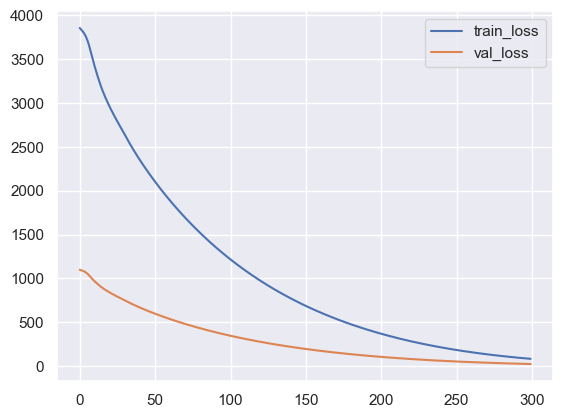

Finished Training
Epoch 1/300


100%|██████████| 7/7 [00:00<00:00, 170.21it/s]


Train Loss: 3838.7136840820312


100%|██████████| 2/2 [00:00<00:00, 427.16it/s]


Epoch 2/300


100%|██████████| 7/7 [00:00<00:00, 157.75it/s]


Train Loss: 3803.4496459960938


100%|██████████| 2/2 [00:00<00:00, 351.97it/s]


Epoch 3/300


100%|██████████| 7/7 [00:00<00:00, 149.00it/s]


Train Loss: 3756.0418701171875


100%|██████████| 2/2 [00:00<00:00, 455.90it/s]


Epoch 4/300


100%|██████████| 7/7 [00:00<00:00, 144.40it/s]


Train Loss: 3691.506591796875


100%|██████████| 2/2 [00:00<00:00, 359.07it/s]


Epoch 5/300


100%|██████████| 7/7 [00:00<00:00, 166.74it/s]


Train Loss: 3614.3052673339844


100%|██████████| 2/2 [00:00<00:00, 447.51it/s]


Epoch 6/300


100%|██████████| 7/7 [00:00<00:00, 157.96it/s]


Train Loss: 3533.3369140625


100%|██████████| 2/2 [00:00<00:00, 380.16it/s]


Epoch 7/300


100%|██████████| 7/7 [00:00<00:00, 152.17it/s]


Train Loss: 3452.6133728027344


100%|██████████| 2/2 [00:00<00:00, 362.84it/s]


Epoch 8/300


100%|██████████| 7/7 [00:00<00:00, 172.47it/s]


Train Loss: 3376.282989501953


100%|██████████| 2/2 [00:00<00:00, 442.86it/s]


Epoch 9/300


100%|██████████| 7/7 [00:00<00:00, 162.04it/s]


Train Loss: 3307.3775634765625


100%|██████████| 2/2 [00:00<00:00, 471.14it/s]


Epoch 10/300


100%|██████████| 7/7 [00:00<00:00, 138.04it/s]


Train Loss: 3244.8797607421875


100%|██████████| 2/2 [00:00<00:00, 447.51it/s]


Epoch 11/300


100%|██████████| 7/7 [00:00<00:00, 157.30it/s]


Train Loss: 3188.175262451172


100%|██████████| 2/2 [00:00<00:00, 284.14it/s]


Epoch 12/300


100%|██████████| 7/7 [00:00<00:00, 143.58it/s]


Train Loss: 3136.788330078125


100%|██████████| 2/2 [00:00<00:00, 323.36it/s]


Epoch 13/300


100%|██████████| 7/7 [00:00<00:00, 144.53it/s]


Train Loss: 3090.2317810058594


100%|██████████| 2/2 [00:00<00:00, 432.98it/s]


Epoch 14/300


100%|██████████| 7/7 [00:00<00:00, 165.43it/s]


Train Loss: 3047.658477783203


100%|██████████| 2/2 [00:00<00:00, 276.40it/s]


Epoch 15/300


100%|██████████| 7/7 [00:00<00:00, 160.12it/s]


Train Loss: 3008.108123779297


100%|██████████| 2/2 [00:00<00:00, 445.33it/s]


Epoch 16/300


100%|██████████| 7/7 [00:00<00:00, 163.09it/s]


Train Loss: 2970.1178283691406


100%|██████████| 2/2 [00:00<00:00, 413.31it/s]


Epoch 17/300


100%|██████████| 7/7 [00:00<00:00, 145.93it/s]


Train Loss: 2933.5870971679688


100%|██████████| 2/2 [00:00<00:00, 451.88it/s]


Epoch 18/300


100%|██████████| 7/7 [00:00<00:00, 42.72it/s]


Train Loss: 2898.9627075195312


100%|██████████| 2/2 [00:00<00:00, 130.36it/s]


Epoch 19/300


100%|██████████| 7/7 [00:00<00:00, 50.14it/s]


Train Loss: 2865.6651000976562


100%|██████████| 2/2 [00:00<00:00, 440.14it/s]


Epoch 20/300


100%|██████████| 7/7 [00:00<00:00, 180.32it/s]


Train Loss: 2833.2044372558594


100%|██████████| 2/2 [00:00<00:00, 448.92it/s]


Epoch 21/300


100%|██████████| 7/7 [00:00<00:00, 55.41it/s]


Train Loss: 2800.975555419922


100%|██████████| 2/2 [00:00<00:00, 319.03it/s]


Epoch 22/300


100%|██████████| 7/7 [00:00<00:00, 171.19it/s]


Train Loss: 2767.417205810547


100%|██████████| 2/2 [00:00<00:00, 415.81it/s]


Epoch 23/300


100%|██████████| 7/7 [00:00<00:00, 133.39it/s]


Train Loss: 2733.0621032714844


100%|██████████| 2/2 [00:00<00:00, 367.44it/s]


Epoch 24/300


100%|██████████| 7/7 [00:00<00:00, 99.85it/s]


Train Loss: 2699.0689086914062


100%|██████████| 2/2 [00:00<00:00, 153.95it/s]


Epoch 25/300


100%|██████████| 7/7 [00:00<00:00, 104.10it/s]


Train Loss: 2666.1535034179688


100%|██████████| 2/2 [00:00<00:00, 502.37it/s]


Epoch 26/300


100%|██████████| 7/7 [00:00<00:00, 170.64it/s]


Train Loss: 2634.4342346191406


100%|██████████| 2/2 [00:00<00:00, 364.10it/s]


Epoch 27/300


100%|██████████| 7/7 [00:00<00:00, 173.45it/s]


Train Loss: 2603.7572326660156


100%|██████████| 2/2 [00:00<00:00, 393.54it/s]


Epoch 28/300


100%|██████████| 7/7 [00:00<00:00, 194.33it/s]


Train Loss: 2573.8228759765625


100%|██████████| 2/2 [00:00<00:00, 508.40it/s]


Epoch 29/300


100%|██████████| 7/7 [00:00<00:00, 171.88it/s]


Train Loss: 2544.4263916015625


100%|██████████| 2/2 [00:00<00:00, 320.82it/s]


Epoch 30/300


100%|██████████| 7/7 [00:00<00:00, 182.97it/s]


Train Loss: 2515.705841064453


100%|██████████| 2/2 [00:00<00:00, 506.83it/s]


Epoch 31/300


100%|██████████| 7/7 [00:00<00:00, 142.48it/s]


Train Loss: 2487.4258728027344


100%|██████████| 2/2 [00:00<00:00, 308.93it/s]


Epoch 32/300


100%|██████████| 7/7 [00:00<00:00, 171.91it/s]


Train Loss: 2459.6177368164062


100%|██████████| 2/2 [00:00<00:00, 408.44it/s]


Epoch 33/300


100%|██████████| 7/7 [00:00<00:00, 70.18it/s]


Train Loss: 2432.428253173828


100%|██████████| 2/2 [00:00<00:00, 430.74it/s]


Epoch 34/300


100%|██████████| 7/7 [00:00<00:00, 144.64it/s]


Train Loss: 2405.4610900878906


100%|██████████| 2/2 [00:00<00:00, 322.53it/s]


Epoch 35/300


100%|██████████| 7/7 [00:00<00:00, 142.64it/s]


Train Loss: 2379.035919189453


100%|██████████| 2/2 [00:00<00:00, 422.90it/s]


Epoch 36/300


100%|██████████| 7/7 [00:00<00:00, 161.11it/s]


Train Loss: 2352.9368591308594


100%|██████████| 2/2 [00:00<00:00, 428.71it/s]


Epoch 37/300


100%|██████████| 7/7 [00:00<00:00, 67.46it/s]


Train Loss: 2327.2205810546875


100%|██████████| 2/2 [00:00<00:00, 183.15it/s]


Epoch 38/300


100%|██████████| 7/7 [00:00<00:00, 104.33it/s]


Train Loss: 2301.8370971679688


100%|██████████| 2/2 [00:00<00:00, 305.38it/s]


Epoch 39/300


100%|██████████| 7/7 [00:00<00:00, 98.57it/s]


Train Loss: 2276.7327270507812


100%|██████████| 2/2 [00:00<00:00, 298.81it/s]


Epoch 40/300


100%|██████████| 7/7 [00:00<00:00, 148.81it/s]


Train Loss: 2252.0128479003906


100%|██████████| 2/2 [00:00<00:00, 407.10it/s]


Epoch 41/300


100%|██████████| 7/7 [00:00<00:00, 73.56it/s]


Train Loss: 2227.328125


100%|██████████| 2/2 [00:00<00:00, 312.86it/s]


Epoch 42/300


100%|██████████| 7/7 [00:00<00:00, 181.02it/s]


Train Loss: 2203.0477600097656


100%|██████████| 2/2 [00:00<00:00, 460.41it/s]


Epoch 43/300


100%|██████████| 7/7 [00:00<00:00, 110.72it/s]


Train Loss: 2179.141571044922


100%|██████████| 2/2 [00:00<00:00, 329.92it/s]


Epoch 44/300


100%|██████████| 7/7 [00:00<00:00, 143.87it/s]


Train Loss: 2155.4645080566406


100%|██████████| 2/2 [00:00<00:00, 360.49it/s]


Epoch 45/300


100%|██████████| 7/7 [00:00<00:00, 163.33it/s]


Train Loss: 2132.193603515625


100%|██████████| 2/2 [00:00<00:00, 384.55it/s]


Epoch 46/300


100%|██████████| 7/7 [00:00<00:00, 138.12it/s]


Train Loss: 2109.2827758789062


100%|██████████| 2/2 [00:00<00:00, 403.96it/s]


Epoch 47/300


100%|██████████| 7/7 [00:00<00:00, 162.25it/s]


Train Loss: 2086.447998046875


100%|██████████| 2/2 [00:00<00:00, 401.22it/s]


Epoch 48/300


100%|██████████| 7/7 [00:00<00:00, 70.80it/s]


Train Loss: 2064.0909729003906


100%|██████████| 2/2 [00:00<00:00, 420.50it/s]


Epoch 49/300


100%|██████████| 7/7 [00:00<00:00, 162.06it/s]


Train Loss: 2041.7043151855469


100%|██████████| 2/2 [00:00<00:00, 372.10it/s]


Epoch 50/300


100%|██████████| 7/7 [00:00<00:00, 182.52it/s]


Train Loss: 2019.7969360351562


100%|██████████| 2/2 [00:00<00:00, 495.31it/s]


Epoch 51/300


100%|██████████| 7/7 [00:00<00:00, 177.42it/s]


Train Loss: 1998.0429077148438


100%|██████████| 2/2 [00:00<00:00, 415.55it/s]


Epoch 52/300


100%|██████████| 7/7 [00:00<00:00, 152.40it/s]


Train Loss: 1976.5779418945312


100%|██████████| 2/2 [00:00<00:00, 351.86it/s]


Epoch 53/300


100%|██████████| 7/7 [00:00<00:00, 168.82it/s]


Train Loss: 1955.3141479492188


100%|██████████| 2/2 [00:00<00:00, 345.55it/s]


Epoch 54/300


100%|██████████| 7/7 [00:00<00:00, 183.01it/s]


Train Loss: 1934.2873229980469


100%|██████████| 2/2 [00:00<00:00, 446.61it/s]


Epoch 55/300


100%|██████████| 7/7 [00:00<00:00, 162.34it/s]


Train Loss: 1913.4494323730469


100%|██████████| 2/2 [00:00<00:00, 452.90it/s]


Epoch 56/300


100%|██████████| 7/7 [00:00<00:00, 147.46it/s]


Train Loss: 1892.861328125


100%|██████████| 2/2 [00:00<00:00, 435.52it/s]


Epoch 57/300


100%|██████████| 7/7 [00:00<00:00, 157.73it/s]


Train Loss: 1872.5407104492188


100%|██████████| 2/2 [00:00<00:00, 404.45it/s]


Epoch 58/300


100%|██████████| 7/7 [00:00<00:00, 165.63it/s]


Train Loss: 1852.3075256347656


100%|██████████| 2/2 [00:00<00:00, 366.09it/s]


Epoch 59/300


100%|██████████| 7/7 [00:00<00:00, 157.61it/s]


Train Loss: 1832.4157409667969


100%|██████████| 2/2 [00:00<00:00, 424.10it/s]


Epoch 60/300


100%|██████████| 7/7 [00:00<00:00, 154.99it/s]


Train Loss: 1812.6089477539062


100%|██████████| 2/2 [00:00<00:00, 430.76it/s]


Epoch 61/300


100%|██████████| 7/7 [00:00<00:00, 162.87it/s]


Train Loss: 1793.167984008789


100%|██████████| 2/2 [00:00<00:00, 431.71it/s]


Epoch 62/300


100%|██████████| 7/7 [00:00<00:00, 144.04it/s]


Train Loss: 1773.8181457519531


100%|██████████| 2/2 [00:00<00:00, 339.44it/s]


Epoch 63/300


100%|██████████| 7/7 [00:00<00:00, 165.60it/s]


Train Loss: 1754.6836700439453


100%|██████████| 2/2 [00:00<00:00, 463.28it/s]


Epoch 64/300


100%|██████████| 7/7 [00:00<00:00, 175.51it/s]


Train Loss: 1735.739990234375


100%|██████████| 2/2 [00:00<00:00, 443.35it/s]


Epoch 65/300


100%|██████████| 7/7 [00:00<00:00, 165.29it/s]


Train Loss: 1716.9579162597656


100%|██████████| 2/2 [00:00<00:00, 407.49it/s]


Epoch 66/300


100%|██████████| 7/7 [00:00<00:00, 171.66it/s]


Train Loss: 1698.4473876953125


100%|██████████| 2/2 [00:00<00:00, 422.64it/s]


Epoch 67/300


100%|██████████| 7/7 [00:00<00:00, 124.03it/s]


Train Loss: 1680.0746002197266


100%|██████████| 2/2 [00:00<00:00, 414.07it/s]


Epoch 68/300


100%|██████████| 7/7 [00:00<00:00, 135.30it/s]


Train Loss: 1661.9460144042969


100%|██████████| 2/2 [00:00<00:00, 426.79it/s]


Epoch 69/300


100%|██████████| 7/7 [00:00<00:00, 150.39it/s]


Train Loss: 1643.9817199707031


100%|██████████| 2/2 [00:00<00:00, 418.91it/s]


Epoch 70/300


100%|██████████| 7/7 [00:00<00:00, 174.39it/s]


Train Loss: 1626.1474609375


100%|██████████| 2/2 [00:00<00:00, 429.19it/s]


Epoch 71/300


100%|██████████| 7/7 [00:00<00:00, 162.75it/s]


Train Loss: 1608.514663696289


100%|██████████| 2/2 [00:00<00:00, 452.39it/s]


Epoch 72/300


100%|██████████| 7/7 [00:00<00:00, 157.70it/s]


Train Loss: 1591.0924987792969


100%|██████████| 2/2 [00:00<00:00, 460.48it/s]

Epoch 73/300



100%|██████████| 7/7 [00:00<00:00, 178.55it/s]


Train Loss: 1573.7835998535156


100%|██████████| 2/2 [00:00<00:00, 478.12it/s]


Epoch 74/300


100%|██████████| 7/7 [00:00<00:00, 169.93it/s]


Train Loss: 1556.7510833740234


100%|██████████| 2/2 [00:00<00:00, 473.58it/s]


Epoch 75/300


100%|██████████| 7/7 [00:00<00:00, 167.89it/s]


Train Loss: 1539.8174438476562


100%|██████████| 2/2 [00:00<00:00, 381.98it/s]


Epoch 76/300


100%|██████████| 7/7 [00:00<00:00, 181.34it/s]


Train Loss: 1523.1005554199219


100%|██████████| 2/2 [00:00<00:00, 463.18it/s]


Epoch 77/300


100%|██████████| 7/7 [00:00<00:00, 164.35it/s]


Train Loss: 1506.5328979492188


100%|██████████| 2/2 [00:00<00:00, 417.70it/s]


Epoch 78/300


100%|██████████| 7/7 [00:00<00:00, 165.55it/s]


Train Loss: 1490.1361236572266


100%|██████████| 2/2 [00:00<00:00, 466.24it/s]


Epoch 79/300


100%|██████████| 7/7 [00:00<00:00, 180.74it/s]


Train Loss: 1473.8309631347656


100%|██████████| 2/2 [00:00<00:00, 443.94it/s]


Epoch 80/300


100%|██████████| 7/7 [00:00<00:00, 169.13it/s]


Train Loss: 1457.8122863769531


100%|██████████| 2/2 [00:00<00:00, 456.72it/s]


Epoch 81/300


100%|██████████| 7/7 [00:00<00:00, 173.69it/s]


Train Loss: 1441.8641815185547


100%|██████████| 2/2 [00:00<00:00, 482.63it/s]


Epoch 82/300


100%|██████████| 7/7 [00:00<00:00, 157.45it/s]


Train Loss: 1426.0633697509766


100%|██████████| 2/2 [00:00<00:00, 429.35it/s]


Epoch 83/300


100%|██████████| 7/7 [00:00<00:00, 180.93it/s]


Train Loss: 1410.4643096923828


100%|██████████| 2/2 [00:00<00:00, 448.54it/s]


Epoch 84/300


100%|██████████| 7/7 [00:00<00:00, 169.47it/s]


Train Loss: 1395.0923767089844


100%|██████████| 2/2 [00:00<00:00, 414.58it/s]


Epoch 85/300


100%|██████████| 7/7 [00:00<00:00, 160.85it/s]


Train Loss: 1379.751220703125


100%|██████████| 2/2 [00:00<00:00, 465.67it/s]


Epoch 86/300


100%|██████████| 7/7 [00:00<00:00, 173.75it/s]


Train Loss: 1364.5559539794922


100%|██████████| 2/2 [00:00<00:00, 505.58it/s]


Epoch 87/300


100%|██████████| 7/7 [00:00<00:00, 96.29it/s]


Train Loss: 1349.5929870605469


100%|██████████| 2/2 [00:00<00:00, 394.80it/s]


Epoch 88/300


100%|██████████| 7/7 [00:00<00:00, 94.04it/s]


Train Loss: 1334.732666015625


100%|██████████| 2/2 [00:00<00:00, 445.54it/s]


Epoch 89/300


100%|██████████| 7/7 [00:00<00:00, 160.79it/s]


Train Loss: 1320.0478515625


100%|██████████| 2/2 [00:00<00:00, 410.92it/s]


Epoch 90/300


100%|██████████| 7/7 [00:00<00:00, 160.05it/s]


Train Loss: 1305.5496368408203


100%|██████████| 2/2 [00:00<00:00, 426.45it/s]


Epoch 91/300


100%|██████████| 7/7 [00:00<00:00, 166.58it/s]


Train Loss: 1291.0770416259766


100%|██████████| 2/2 [00:00<00:00, 467.83it/s]


Epoch 92/300


100%|██████████| 7/7 [00:00<00:00, 170.94it/s]


Train Loss: 1276.8865203857422


100%|██████████| 2/2 [00:00<00:00, 453.44it/s]


Epoch 93/300


100%|██████████| 7/7 [00:00<00:00, 174.80it/s]


Train Loss: 1262.7457122802734


100%|██████████| 2/2 [00:00<00:00, 493.48it/s]


Epoch 94/300


100%|██████████| 7/7 [00:00<00:00, 177.15it/s]


Train Loss: 1248.7687225341797


100%|██████████| 2/2 [00:00<00:00, 409.40it/s]


Epoch 95/300


100%|██████████| 7/7 [00:00<00:00, 155.15it/s]


Train Loss: 1234.9932098388672


100%|██████████| 2/2 [00:00<00:00, 474.04it/s]


Epoch 96/300


100%|██████████| 7/7 [00:00<00:00, 160.03it/s]


Train Loss: 1221.251968383789


100%|██████████| 2/2 [00:00<00:00, 387.21it/s]


Epoch 97/300


100%|██████████| 7/7 [00:00<00:00, 177.16it/s]


Train Loss: 1207.6992645263672


100%|██████████| 2/2 [00:00<00:00, 484.14it/s]


Epoch 98/300


100%|██████████| 7/7 [00:00<00:00, 188.57it/s]


Train Loss: 1194.2927856445312


100%|██████████| 2/2 [00:00<00:00, 402.66it/s]


Epoch 99/300


100%|██████████| 7/7 [00:00<00:00, 167.74it/s]


Train Loss: 1181.0397644042969


100%|██████████| 2/2 [00:00<00:00, 339.33it/s]


Epoch 100/300


100%|██████████| 7/7 [00:00<00:00, 193.29it/s]


Train Loss: 1167.8050842285156


100%|██████████| 2/2 [00:00<00:00, 364.23it/s]


Epoch 101/300


100%|██████████| 7/7 [00:00<00:00, 166.12it/s]


Train Loss: 1154.7897491455078


100%|██████████| 2/2 [00:00<00:00, 464.25it/s]


Epoch 102/300


100%|██████████| 7/7 [00:00<00:00, 154.23it/s]


Train Loss: 1141.9578552246094


100%|██████████| 2/2 [00:00<00:00, 391.79it/s]


Epoch 103/300


100%|██████████| 7/7 [00:00<00:00, 169.40it/s]


Train Loss: 1129.183364868164


100%|██████████| 2/2 [00:00<00:00, 419.01it/s]


Epoch 104/300


100%|██████████| 7/7 [00:00<00:00, 143.33it/s]


Train Loss: 1116.554458618164


100%|██████████| 2/2 [00:00<00:00, 501.89it/s]


Epoch 105/300


100%|██████████| 7/7 [00:00<00:00, 178.23it/s]


Train Loss: 1104.044662475586


100%|██████████| 2/2 [00:00<00:00, 471.56it/s]


Epoch 106/300


100%|██████████| 7/7 [00:00<00:00, 144.08it/s]


Train Loss: 1091.6380920410156


100%|██████████| 2/2 [00:00<00:00, 118.81it/s]


Epoch 107/300


100%|██████████| 7/7 [00:00<00:00, 163.44it/s]


Train Loss: 1079.4153747558594


100%|██████████| 2/2 [00:00<00:00, 411.19it/s]


Epoch 108/300


100%|██████████| 7/7 [00:00<00:00, 144.36it/s]


Train Loss: 1067.2634735107422


100%|██████████| 2/2 [00:00<00:00, 435.84it/s]


Epoch 109/300


100%|██████████| 7/7 [00:00<00:00, 163.56it/s]


Train Loss: 1055.249526977539


100%|██████████| 2/2 [00:00<00:00, 355.48it/s]


Epoch 110/300


100%|██████████| 7/7 [00:00<00:00, 167.74it/s]


Train Loss: 1043.3572998046875


100%|██████████| 2/2 [00:00<00:00, 465.98it/s]


Epoch 111/300


100%|██████████| 7/7 [00:00<00:00, 93.35it/s]


Train Loss: 1031.5622863769531


100%|██████████| 2/2 [00:00<00:00, 416.74it/s]


Epoch 112/300


100%|██████████| 7/7 [00:00<00:00, 164.59it/s]


Train Loss: 1019.9713745117188


100%|██████████| 2/2 [00:00<00:00, 463.48it/s]


Epoch 113/300


100%|██████████| 7/7 [00:00<00:00, 162.51it/s]


Train Loss: 1008.4242095947266


100%|██████████| 2/2 [00:00<00:00, 423.80it/s]


Epoch 114/300


100%|██████████| 7/7 [00:00<00:00, 153.33it/s]


Train Loss: 996.9638366699219


100%|██████████| 2/2 [00:00<00:00, 356.31it/s]


Epoch 115/300


100%|██████████| 7/7 [00:00<00:00, 134.40it/s]


Train Loss: 985.6318817138672


100%|██████████| 2/2 [00:00<00:00, 429.77it/s]


Epoch 116/300


100%|██████████| 7/7 [00:00<00:00, 160.81it/s]


Train Loss: 974.4838256835938


100%|██████████| 2/2 [00:00<00:00, 426.14it/s]


Epoch 117/300


100%|██████████| 7/7 [00:00<00:00, 156.09it/s]


Train Loss: 963.4090423583984


100%|██████████| 2/2 [00:00<00:00, 432.42it/s]


Epoch 118/300


100%|██████████| 7/7 [00:00<00:00, 162.64it/s]


Train Loss: 952.3770751953125


100%|██████████| 2/2 [00:00<00:00, 405.70it/s]


Epoch 119/300


100%|██████████| 7/7 [00:00<00:00, 166.85it/s]


Train Loss: 941.5898590087891


100%|██████████| 2/2 [00:00<00:00, 395.75it/s]


Epoch 120/300


100%|██████████| 7/7 [00:00<00:00, 159.47it/s]


Train Loss: 930.8798217773438


100%|██████████| 2/2 [00:00<00:00, 411.13it/s]


Epoch 121/300


100%|██████████| 7/7 [00:00<00:00, 168.21it/s]


Train Loss: 920.1761779785156


100%|██████████| 2/2 [00:00<00:00, 437.75it/s]


Epoch 122/300


100%|██████████| 7/7 [00:00<00:00, 167.54it/s]


Train Loss: 909.6647186279297


100%|██████████| 2/2 [00:00<00:00, 426.90it/s]


Epoch 123/300


100%|██████████| 7/7 [00:00<00:00, 150.05it/s]


Train Loss: 899.2559432983398


100%|██████████| 2/2 [00:00<00:00, 403.78it/s]


Epoch 124/300


100%|██████████| 7/7 [00:00<00:00, 152.32it/s]


Train Loss: 888.9486083984375


100%|██████████| 2/2 [00:00<00:00, 423.92it/s]


Epoch 125/300


100%|██████████| 7/7 [00:00<00:00, 126.29it/s]


Train Loss: 878.7088241577148


100%|██████████| 2/2 [00:00<00:00, 428.27it/s]


Epoch 126/300


100%|██████████| 7/7 [00:00<00:00, 131.04it/s]


Train Loss: 868.5592803955078


100%|██████████| 2/2 [00:00<00:00, 444.83it/s]


Epoch 127/300


100%|██████████| 7/7 [00:00<00:00, 88.42it/s]


Train Loss: 858.5828094482422


100%|██████████| 2/2 [00:00<00:00, 385.26it/s]


Epoch 128/300


100%|██████████| 7/7 [00:00<00:00, 165.76it/s]


Train Loss: 848.6738662719727


100%|██████████| 2/2 [00:00<00:00, 464.67it/s]


Epoch 129/300


100%|██████████| 7/7 [00:00<00:00, 164.60it/s]


Train Loss: 838.843132019043


100%|██████████| 2/2 [00:00<00:00, 465.67it/s]


Epoch 130/300


100%|██████████| 7/7 [00:00<00:00, 173.34it/s]


Train Loss: 829.1568984985352


100%|██████████| 2/2 [00:00<00:00, 462.00it/s]


Epoch 131/300


100%|██████████| 7/7 [00:00<00:00, 165.57it/s]


Train Loss: 819.559700012207


100%|██████████| 2/2 [00:00<00:00, 404.37it/s]


Epoch 132/300


100%|██████████| 7/7 [00:00<00:00, 152.16it/s]


Train Loss: 810.1082458496094


100%|██████████| 2/2 [00:00<00:00, 421.22it/s]


Epoch 133/300


100%|██████████| 7/7 [00:00<00:00, 156.34it/s]


Train Loss: 800.6446380615234


100%|██████████| 2/2 [00:00<00:00, 381.75it/s]


Epoch 134/300


100%|██████████| 7/7 [00:00<00:00, 149.90it/s]


Train Loss: 791.3141632080078


100%|██████████| 2/2 [00:00<00:00, 426.45it/s]


Epoch 135/300


100%|██████████| 7/7 [00:00<00:00, 154.23it/s]


Train Loss: 782.0856323242188


100%|██████████| 2/2 [00:00<00:00, 424.27it/s]


Epoch 136/300


100%|██████████| 7/7 [00:00<00:00, 158.22it/s]


Train Loss: 772.9722900390625


100%|██████████| 2/2 [00:00<00:00, 393.87it/s]


Epoch 137/300


100%|██████████| 7/7 [00:00<00:00, 142.98it/s]


Train Loss: 763.861930847168


100%|██████████| 2/2 [00:00<00:00, 453.39it/s]


Epoch 138/300


100%|██████████| 7/7 [00:00<00:00, 178.18it/s]


Train Loss: 754.9848175048828


100%|██████████| 2/2 [00:00<00:00, 330.74it/s]


Epoch 139/300


100%|██████████| 7/7 [00:00<00:00, 144.59it/s]


Train Loss: 746.1323165893555


100%|██████████| 2/2 [00:00<00:00, 340.42it/s]


Epoch 140/300


100%|██████████| 7/7 [00:00<00:00, 58.66it/s]


Train Loss: 737.3515243530273


100%|██████████| 2/2 [00:00<00:00, 454.45it/s]


Epoch 141/300


100%|██████████| 7/7 [00:00<00:00, 180.16it/s]


Train Loss: 728.6868743896484


100%|██████████| 2/2 [00:00<00:00, 341.93it/s]


Epoch 142/300


100%|██████████| 7/7 [00:00<00:00, 58.27it/s]


Train Loss: 720.0523223876953


100%|██████████| 2/2 [00:00<00:00, 455.56it/s]


Epoch 143/300


100%|██████████| 7/7 [00:00<00:00, 163.36it/s]


Train Loss: 711.594123840332


100%|██████████| 2/2 [00:00<00:00, 379.01it/s]


Epoch 144/300


100%|██████████| 7/7 [00:00<00:00, 156.68it/s]


Train Loss: 703.1678848266602


100%|██████████| 2/2 [00:00<00:00, 230.17it/s]


Epoch 145/300


100%|██████████| 7/7 [00:00<00:00, 117.20it/s]


Train Loss: 694.836784362793


100%|██████████| 2/2 [00:00<00:00, 527.98it/s]


Epoch 146/300


100%|██████████| 7/7 [00:00<00:00, 135.51it/s]


Train Loss: 686.6078643798828


100%|██████████| 2/2 [00:00<00:00, 353.10it/s]


Epoch 147/300


100%|██████████| 7/7 [00:00<00:00, 50.56it/s]


Train Loss: 678.4429321289062


100%|██████████| 2/2 [00:00<00:00, 174.48it/s]


Epoch 148/300


100%|██████████| 7/7 [00:00<00:00, 163.62it/s]


Train Loss: 670.3909912109375


100%|██████████| 2/2 [00:00<00:00, 450.76it/s]


Epoch 149/300


100%|██████████| 7/7 [00:00<00:00, 174.39it/s]


Train Loss: 662.4246444702148


100%|██████████| 2/2 [00:00<00:00, 394.48it/s]


Epoch 150/300


100%|██████████| 7/7 [00:00<00:00, 167.60it/s]


Train Loss: 654.4999008178711


100%|██████████| 2/2 [00:00<00:00, 364.10it/s]


Epoch 151/300


100%|██████████| 7/7 [00:00<00:00, 160.32it/s]


Train Loss: 646.6614608764648


100%|██████████| 2/2 [00:00<00:00, 451.95it/s]


Epoch 152/300


100%|██████████| 7/7 [00:00<00:00, 139.73it/s]


Train Loss: 638.9165573120117


100%|██████████| 2/2 [00:00<00:00, 332.01it/s]


Epoch 153/300


100%|██████████| 7/7 [00:00<00:00, 30.55it/s]


Train Loss: 631.25390625


100%|██████████| 2/2 [00:00<00:00, 38.99it/s]


Epoch 154/300


100%|██████████| 7/7 [00:00<00:00, 91.08it/s]


Train Loss: 623.6546630859375


100%|██████████| 2/2 [00:00<00:00, 214.80it/s]


Epoch 155/300


100%|██████████| 7/7 [00:00<00:00, 39.83it/s]


Train Loss: 616.1675033569336


100%|██████████| 2/2 [00:00<00:00, 340.65it/s]


Epoch 156/300


100%|██████████| 7/7 [00:00<00:00, 149.93it/s]


Train Loss: 608.7345962524414


100%|██████████| 2/2 [00:00<00:00, 422.45it/s]


Epoch 157/300


100%|██████████| 7/7 [00:00<00:00, 166.41it/s]


Train Loss: 601.3883285522461


100%|██████████| 2/2 [00:00<00:00, 257.94it/s]


Epoch 158/300


100%|██████████| 7/7 [00:00<00:00, 166.04it/s]


Train Loss: 594.1054840087891


100%|██████████| 2/2 [00:00<00:00, 488.88it/s]


Epoch 159/300


100%|██████████| 7/7 [00:00<00:00, 174.31it/s]


Train Loss: 586.9052352905273


100%|██████████| 2/2 [00:00<00:00, 423.84it/s]


Epoch 160/300


100%|██████████| 7/7 [00:00<00:00, 122.33it/s]


Train Loss: 579.7759399414062


100%|██████████| 2/2 [00:00<00:00, 77.56it/s]


Epoch 161/300


100%|██████████| 7/7 [00:00<00:00, 126.82it/s]


Train Loss: 572.7307662963867


100%|██████████| 2/2 [00:00<00:00, 416.58it/s]


Epoch 162/300


100%|██████████| 7/7 [00:00<00:00, 168.55it/s]


Train Loss: 565.7299194335938


100%|██████████| 2/2 [00:00<00:00, 273.33it/s]


Epoch 163/300


100%|██████████| 7/7 [00:00<00:00, 106.28it/s]


Train Loss: 558.8438110351562


100%|██████████| 2/2 [00:00<00:00, 293.70it/s]


Epoch 164/300


100%|██████████| 7/7 [00:00<00:00, 112.28it/s]


Train Loss: 551.9887237548828


100%|██████████| 2/2 [00:00<00:00, 171.51it/s]


Epoch 165/300


100%|██████████| 7/7 [00:00<00:00, 140.99it/s]


Train Loss: 545.2189788818359


100%|██████████| 2/2 [00:00<00:00, 362.52it/s]


Epoch 166/300


100%|██████████| 7/7 [00:00<00:00, 131.05it/s]


Train Loss: 538.4921798706055


100%|██████████| 2/2 [00:00<00:00, 370.18it/s]


Epoch 167/300


100%|██████████| 7/7 [00:00<00:00, 150.97it/s]


Train Loss: 531.8992462158203


100%|██████████| 2/2 [00:00<00:00, 210.19it/s]


Epoch 168/300


100%|██████████| 7/7 [00:00<00:00, 174.64it/s]


Train Loss: 525.3454666137695


100%|██████████| 2/2 [00:00<00:00, 467.72it/s]


Epoch 169/300


100%|██████████| 7/7 [00:00<00:00, 169.09it/s]


Train Loss: 518.8824462890625


100%|██████████| 2/2 [00:00<00:00, 482.27it/s]


Epoch 170/300


100%|██████████| 7/7 [00:00<00:00, 176.47it/s]


Train Loss: 512.4092864990234


100%|██████████| 2/2 [00:00<00:00, 490.45it/s]


Epoch 171/300


100%|██████████| 7/7 [00:00<00:00, 152.99it/s]


Train Loss: 506.06795501708984


100%|██████████| 2/2 [00:00<00:00, 473.24it/s]


Epoch 172/300


100%|██████████| 7/7 [00:00<00:00, 187.63it/s]


Train Loss: 499.79498291015625


100%|██████████| 2/2 [00:00<00:00, 463.82it/s]


Epoch 173/300


100%|██████████| 7/7 [00:00<00:00, 184.18it/s]


Train Loss: 493.54601287841797


100%|██████████| 2/2 [00:00<00:00, 355.89it/s]


Epoch 174/300


100%|██████████| 7/7 [00:00<00:00, 178.66it/s]


Train Loss: 487.403076171875


100%|██████████| 2/2 [00:00<00:00, 441.92it/s]


Epoch 175/300


100%|██████████| 7/7 [00:00<00:00, 165.61it/s]


Train Loss: 481.3054504394531


100%|██████████| 2/2 [00:00<00:00, 491.51it/s]


Epoch 176/300


100%|██████████| 7/7 [00:00<00:00, 143.07it/s]


Train Loss: 475.27198028564453


100%|██████████| 2/2 [00:00<00:00, 377.78it/s]


Epoch 177/300


100%|██████████| 7/7 [00:00<00:00, 166.04it/s]


Train Loss: 469.27281188964844


100%|██████████| 2/2 [00:00<00:00, 321.81it/s]


Epoch 178/300


100%|██████████| 7/7 [00:00<00:00, 176.68it/s]


Train Loss: 463.40821838378906


100%|██████████| 2/2 [00:00<00:00, 372.64it/s]


Epoch 179/300


100%|██████████| 7/7 [00:00<00:00, 176.97it/s]


Train Loss: 457.55506134033203


100%|██████████| 2/2 [00:00<00:00, 319.70it/s]


Epoch 180/300


100%|██████████| 7/7 [00:00<00:00, 179.96it/s]


Train Loss: 451.7952651977539


100%|██████████| 2/2 [00:00<00:00, 407.41it/s]


Epoch 181/300


100%|██████████| 7/7 [00:00<00:00, 166.55it/s]


Train Loss: 446.0259132385254


100%|██████████| 2/2 [00:00<00:00, 382.55it/s]


Epoch 182/300


100%|██████████| 7/7 [00:00<00:00, 175.77it/s]


Train Loss: 440.42480087280273


100%|██████████| 2/2 [00:00<00:00, 466.86it/s]


Epoch 183/300


100%|██████████| 7/7 [00:00<00:00, 172.08it/s]


Train Loss: 434.8292579650879


100%|██████████| 2/2 [00:00<00:00, 470.90it/s]


Epoch 184/300


100%|██████████| 7/7 [00:00<00:00, 164.52it/s]


Train Loss: 429.26040267944336


100%|██████████| 2/2 [00:00<00:00, 458.72it/s]


Epoch 185/300


100%|██████████| 7/7 [00:00<00:00, 167.15it/s]


Train Loss: 423.7975845336914


100%|██████████| 2/2 [00:00<00:00, 492.00it/s]


Epoch 186/300


100%|██████████| 7/7 [00:00<00:00, 164.57it/s]


Train Loss: 418.3602523803711


100%|██████████| 2/2 [00:00<00:00, 245.58it/s]


Epoch 187/300


100%|██████████| 7/7 [00:00<00:00, 147.10it/s]


Train Loss: 413.0063247680664


100%|██████████| 2/2 [00:00<00:00, 507.63it/s]


Epoch 188/300


100%|██████████| 7/7 [00:00<00:00, 152.50it/s]


Train Loss: 407.6743698120117


100%|██████████| 2/2 [00:00<00:00, 435.64it/s]


Epoch 189/300


100%|██████████| 7/7 [00:00<00:00, 172.36it/s]


Train Loss: 402.4547462463379


100%|██████████| 2/2 [00:00<00:00, 475.30it/s]


Epoch 190/300


100%|██████████| 7/7 [00:00<00:00, 181.46it/s]


Train Loss: 397.25748443603516


100%|██████████| 2/2 [00:00<00:00, 427.36it/s]


Epoch 191/300


100%|██████████| 7/7 [00:00<00:00, 166.12it/s]


Train Loss: 392.11516189575195


100%|██████████| 2/2 [00:00<00:00, 313.48it/s]


Epoch 192/300


100%|██████████| 7/7 [00:00<00:00, 90.00it/s]


Train Loss: 387.03889083862305


100%|██████████| 2/2 [00:00<00:00, 417.80it/s]


Epoch 193/300


100%|██████████| 7/7 [00:00<00:00, 169.78it/s]


Train Loss: 381.98179626464844


100%|██████████| 2/2 [00:00<00:00, 474.50it/s]


Epoch 194/300


100%|██████████| 7/7 [00:00<00:00, 165.28it/s]


Train Loss: 377.02976989746094


100%|██████████| 2/2 [00:00<00:00, 427.71it/s]


Epoch 195/300


100%|██████████| 7/7 [00:00<00:00, 172.58it/s]


Train Loss: 372.0940284729004


100%|██████████| 2/2 [00:00<00:00, 476.52it/s]


Epoch 196/300


100%|██████████| 7/7 [00:00<00:00, 166.02it/s]


Train Loss: 367.2195701599121


100%|██████████| 2/2 [00:00<00:00, 416.85it/s]


Epoch 197/300


100%|██████████| 7/7 [00:00<00:00, 155.77it/s]


Train Loss: 362.4286231994629


100%|██████████| 2/2 [00:00<00:00, 440.72it/s]


Epoch 198/300


100%|██████████| 7/7 [00:00<00:00, 172.77it/s]


Train Loss: 357.64506912231445


100%|██████████| 2/2 [00:00<00:00, 440.32it/s]


Epoch 199/300


100%|██████████| 7/7 [00:00<00:00, 175.22it/s]


Train Loss: 352.97702407836914


100%|██████████| 2/2 [00:00<00:00, 468.04it/s]


Epoch 200/300


100%|██████████| 7/7 [00:00<00:00, 179.61it/s]


Train Loss: 348.28014373779297


100%|██████████| 2/2 [00:00<00:00, 439.84it/s]


Epoch 201/300


100%|██████████| 7/7 [00:00<00:00, 174.03it/s]


Train Loss: 343.665771484375


100%|██████████| 2/2 [00:00<00:00, 186.32it/s]


Epoch 202/300


100%|██████████| 7/7 [00:00<00:00, 171.61it/s]


Train Loss: 339.0986671447754


100%|██████████| 2/2 [00:00<00:00, 474.63it/s]


Epoch 203/300


100%|██████████| 7/7 [00:00<00:00, 184.07it/s]


Train Loss: 334.58777618408203


100%|██████████| 2/2 [00:00<00:00, 507.88it/s]


Epoch 204/300


100%|██████████| 7/7 [00:00<00:00, 181.31it/s]


Train Loss: 330.1651802062988


100%|██████████| 2/2 [00:00<00:00, 455.68it/s]


Epoch 205/300


100%|██████████| 7/7 [00:00<00:00, 177.73it/s]


Train Loss: 325.739013671875


100%|██████████| 2/2 [00:00<00:00, 449.21it/s]


Epoch 206/300


100%|██████████| 7/7 [00:00<00:00, 154.86it/s]


Train Loss: 321.3782844543457


100%|██████████| 2/2 [00:00<00:00, 376.37it/s]


Epoch 207/300


100%|██████████| 7/7 [00:00<00:00, 158.53it/s]


Train Loss: 317.04040908813477


100%|██████████| 2/2 [00:00<00:00, 455.98it/s]


Epoch 208/300


100%|██████████| 7/7 [00:00<00:00, 155.49it/s]


Train Loss: 312.78049087524414


100%|██████████| 2/2 [00:00<00:00, 315.30it/s]


Epoch 209/300


100%|██████████| 7/7 [00:00<00:00, 179.30it/s]


Train Loss: 308.54566955566406


100%|██████████| 2/2 [00:00<00:00, 447.82it/s]


Epoch 210/300


100%|██████████| 7/7 [00:00<00:00, 179.08it/s]


Train Loss: 304.372859954834


100%|██████████| 2/2 [00:00<00:00, 414.25it/s]


Epoch 211/300


100%|██████████| 7/7 [00:00<00:00, 163.13it/s]


Train Loss: 300.2310218811035


100%|██████████| 2/2 [00:00<00:00, 435.16it/s]


Epoch 212/300


100%|██████████| 7/7 [00:00<00:00, 178.28it/s]


Train Loss: 296.1791305541992


100%|██████████| 2/2 [00:00<00:00, 501.86it/s]


Epoch 213/300


100%|██████████| 7/7 [00:00<00:00, 176.24it/s]


Train Loss: 292.1263084411621


100%|██████████| 2/2 [00:00<00:00, 442.58it/s]


Epoch 214/300


100%|██████████| 7/7 [00:00<00:00, 183.76it/s]


Train Loss: 288.10197830200195


100%|██████████| 2/2 [00:00<00:00, 376.14it/s]


Epoch 215/300


100%|██████████| 7/7 [00:00<00:00, 137.22it/s]


Train Loss: 284.15784454345703


100%|██████████| 2/2 [00:00<00:00, 345.37it/s]


Epoch 216/300


100%|██████████| 7/7 [00:00<00:00, 149.91it/s]


Train Loss: 280.2547149658203


100%|██████████| 2/2 [00:00<00:00, 390.46it/s]


Epoch 217/300


100%|██████████| 7/7 [00:00<00:00, 168.68it/s]


Train Loss: 276.4133758544922


100%|██████████| 2/2 [00:00<00:00, 432.71it/s]


Epoch 218/300


100%|██████████| 7/7 [00:00<00:00, 160.14it/s]


Train Loss: 272.60559844970703


100%|██████████| 2/2 [00:00<00:00, 433.56it/s]


Epoch 219/300


100%|██████████| 7/7 [00:00<00:00, 163.72it/s]


Train Loss: 268.8137092590332


100%|██████████| 2/2 [00:00<00:00, 448.16it/s]


Epoch 220/300


100%|██████████| 7/7 [00:00<00:00, 163.89it/s]


Train Loss: 265.0611000061035


100%|██████████| 2/2 [00:00<00:00, 400.81it/s]


Epoch 221/300


100%|██████████| 7/7 [00:00<00:00, 167.65it/s]


Train Loss: 261.3617172241211


100%|██████████| 2/2 [00:00<00:00, 255.00it/s]


Epoch 222/300


100%|██████████| 7/7 [00:00<00:00, 153.63it/s]


Train Loss: 257.7358169555664


100%|██████████| 2/2 [00:00<00:00, 453.76it/s]


Epoch 223/300


100%|██████████| 7/7 [00:00<00:00, 184.40it/s]


Train Loss: 254.12300491333008


100%|██████████| 2/2 [00:00<00:00, 454.77it/s]


Epoch 224/300


100%|██████████| 7/7 [00:00<00:00, 160.39it/s]


Train Loss: 250.5660171508789


100%|██████████| 2/2 [00:00<00:00, 395.43it/s]


Epoch 225/300


100%|██████████| 7/7 [00:00<00:00, 161.16it/s]


Train Loss: 247.0237579345703


100%|██████████| 2/2 [00:00<00:00, 413.48it/s]


Epoch 226/300


100%|██████████| 7/7 [00:00<00:00, 103.20it/s]


Train Loss: 243.53360748291016


100%|██████████| 2/2 [00:00<00:00, 439.08it/s]


Epoch 227/300


100%|██████████| 7/7 [00:00<00:00, 145.92it/s]


Train Loss: 240.08776473999023


100%|██████████| 2/2 [00:00<00:00, 309.50it/s]


Epoch 228/300


100%|██████████| 7/7 [00:00<00:00, 164.24it/s]


Train Loss: 236.69611740112305


100%|██████████| 2/2 [00:00<00:00, 300.34it/s]


Epoch 229/300


100%|██████████| 7/7 [00:00<00:00, 176.19it/s]


Train Loss: 233.3212776184082


100%|██████████| 2/2 [00:00<00:00, 500.75it/s]


Epoch 230/300


100%|██████████| 7/7 [00:00<00:00, 167.34it/s]


Train Loss: 229.9805679321289


100%|██████████| 2/2 [00:00<00:00, 432.42it/s]


Epoch 231/300


100%|██████████| 7/7 [00:00<00:00, 149.75it/s]


Train Loss: 226.69013214111328


100%|██████████| 2/2 [00:00<00:00, 478.83it/s]


Epoch 232/300


100%|██████████| 7/7 [00:00<00:00, 181.95it/s]


Train Loss: 223.42657279968262


100%|██████████| 2/2 [00:00<00:00, 435.61it/s]


Epoch 233/300


100%|██████████| 7/7 [00:00<00:00, 83.23it/s]


Train Loss: 220.2011432647705


100%|██████████| 2/2 [00:00<00:00, 370.11it/s]


Epoch 234/300


100%|██████████| 7/7 [00:00<00:00, 172.56it/s]


Train Loss: 217.03950119018555


100%|██████████| 2/2 [00:00<00:00, 450.35it/s]


Epoch 235/300


100%|██████████| 7/7 [00:00<00:00, 154.85it/s]


Train Loss: 213.88856887817383


100%|██████████| 2/2 [00:00<00:00, 402.10it/s]


Epoch 236/300


100%|██████████| 7/7 [00:00<00:00, 175.70it/s]


Train Loss: 210.79167556762695


100%|██████████| 2/2 [00:00<00:00, 461.06it/s]


Epoch 237/300


100%|██████████| 7/7 [00:00<00:00, 176.65it/s]


Train Loss: 207.69256210327148


100%|██████████| 2/2 [00:00<00:00, 359.19it/s]


Epoch 238/300


100%|██████████| 7/7 [00:00<00:00, 166.93it/s]


Train Loss: 204.68631744384766


100%|██████████| 2/2 [00:00<00:00, 431.58it/s]


Epoch 239/300


100%|██████████| 7/7 [00:00<00:00, 175.46it/s]


Train Loss: 201.67805862426758


100%|██████████| 2/2 [00:00<00:00, 419.91it/s]


Epoch 240/300


100%|██████████| 7/7 [00:00<00:00, 164.07it/s]


Train Loss: 198.7300319671631


100%|██████████| 2/2 [00:00<00:00, 437.52it/s]


Epoch 241/300


100%|██████████| 7/7 [00:00<00:00, 183.02it/s]


Train Loss: 195.81128120422363


100%|██████████| 2/2 [00:00<00:00, 343.05it/s]


Epoch 242/300


100%|██████████| 7/7 [00:00<00:00, 168.42it/s]


Train Loss: 192.92837142944336


100%|██████████| 2/2 [00:00<00:00, 480.23it/s]


Epoch 243/300


100%|██████████| 7/7 [00:00<00:00, 194.51it/s]


Train Loss: 190.03348922729492


100%|██████████| 2/2 [00:00<00:00, 451.58it/s]


Epoch 244/300


100%|██████████| 7/7 [00:00<00:00, 182.15it/s]


Train Loss: 187.21728324890137


100%|██████████| 2/2 [00:00<00:00, 411.27it/s]


Epoch 245/300


100%|██████████| 7/7 [00:00<00:00, 137.41it/s]


Train Loss: 184.42967987060547


100%|██████████| 2/2 [00:00<00:00, 265.43it/s]


Epoch 246/300


100%|██████████| 7/7 [00:00<00:00, 184.27it/s]


Train Loss: 181.68961906433105


100%|██████████| 2/2 [00:00<00:00, 458.19it/s]


Epoch 247/300


100%|██████████| 7/7 [00:00<00:00, 133.93it/s]


Train Loss: 178.93790435791016


100%|██████████| 2/2 [00:00<00:00, 442.27it/s]


Epoch 248/300


100%|██████████| 7/7 [00:00<00:00, 175.30it/s]


Train Loss: 176.24389839172363


100%|██████████| 2/2 [00:00<00:00, 427.71it/s]


Epoch 249/300


100%|██████████| 7/7 [00:00<00:00, 175.98it/s]


Train Loss: 173.60609817504883


100%|██████████| 2/2 [00:00<00:00, 467.62it/s]


Epoch 250/300


100%|██████████| 7/7 [00:00<00:00, 169.31it/s]


Train Loss: 170.98236656188965


100%|██████████| 2/2 [00:00<00:00, 257.56it/s]


Epoch 251/300


100%|██████████| 7/7 [00:00<00:00, 169.48it/s]


Train Loss: 168.37818145751953


100%|██████████| 2/2 [00:00<00:00, 490.16it/s]


Epoch 252/300


100%|██████████| 7/7 [00:00<00:00, 160.95it/s]


Train Loss: 165.81661415100098


100%|██████████| 2/2 [00:00<00:00, 469.24it/s]


Epoch 253/300


100%|██████████| 7/7 [00:00<00:00, 183.08it/s]


Train Loss: 163.2858009338379


100%|██████████| 2/2 [00:00<00:00, 434.78it/s]


Epoch 254/300


100%|██████████| 7/7 [00:00<00:00, 153.79it/s]


Train Loss: 160.77923583984375


100%|██████████| 2/2 [00:00<00:00, 438.90it/s]


Epoch 255/300


100%|██████████| 7/7 [00:00<00:00, 166.57it/s]


Train Loss: 158.29250717163086


100%|██████████| 2/2 [00:00<00:00, 286.51it/s]


Epoch 256/300


100%|██████████| 7/7 [00:00<00:00, 164.93it/s]


Train Loss: 155.87695693969727


100%|██████████| 2/2 [00:00<00:00, 458.92it/s]


Epoch 257/300


100%|██████████| 7/7 [00:00<00:00, 168.31it/s]


Train Loss: 153.46742057800293


100%|██████████| 2/2 [00:00<00:00, 364.69it/s]


Epoch 258/300


100%|██████████| 7/7 [00:00<00:00, 177.18it/s]


Train Loss: 151.08121871948242


100%|██████████| 2/2 [00:00<00:00, 456.13it/s]


Epoch 259/300


100%|██████████| 7/7 [00:00<00:00, 172.47it/s]


Train Loss: 148.7307243347168


100%|██████████| 2/2 [00:00<00:00, 429.15it/s]


Epoch 260/300


100%|██████████| 7/7 [00:00<00:00, 186.01it/s]


Train Loss: 146.4000473022461


100%|██████████| 2/2 [00:00<00:00, 314.46it/s]


Epoch 261/300


100%|██████████| 7/7 [00:00<00:00, 166.17it/s]


Train Loss: 144.11772918701172


100%|██████████| 2/2 [00:00<00:00, 354.19it/s]


Epoch 262/300


100%|██████████| 7/7 [00:00<00:00, 165.46it/s]


Train Loss: 141.87326622009277


100%|██████████| 2/2 [00:00<00:00, 428.45it/s]


Epoch 263/300


100%|██████████| 7/7 [00:00<00:00, 167.83it/s]


Train Loss: 139.61731147766113


100%|██████████| 2/2 [00:00<00:00, 75.91it/s]


Epoch 264/300


100%|██████████| 7/7 [00:00<00:00, 120.12it/s]


Train Loss: 137.43107414245605


100%|██████████| 2/2 [00:00<00:00, 318.62it/s]


Epoch 265/300


100%|██████████| 7/7 [00:00<00:00, 165.65it/s]


Train Loss: 135.26214218139648


100%|██████████| 2/2 [00:00<00:00, 238.18it/s]


Epoch 266/300


100%|██████████| 7/7 [00:00<00:00, 64.02it/s]


Train Loss: 133.08899688720703


100%|██████████| 2/2 [00:00<00:00, 504.70it/s]


Epoch 267/300


100%|██████████| 7/7 [00:00<00:00, 171.38it/s]


Train Loss: 130.9666347503662


100%|██████████| 2/2 [00:00<00:00, 413.90it/s]


Epoch 268/300


100%|██████████| 7/7 [00:00<00:00, 82.84it/s]


Train Loss: 128.90400886535645


100%|██████████| 2/2 [00:00<00:00, 456.10it/s]


Epoch 269/300


100%|██████████| 7/7 [00:00<00:00, 175.50it/s]


Train Loss: 126.80205154418945


100%|██████████| 2/2 [00:00<00:00, 425.34it/s]


Epoch 270/300


100%|██████████| 7/7 [00:00<00:00, 162.94it/s]


Train Loss: 124.77777099609375


100%|██████████| 2/2 [00:00<00:00, 170.24it/s]


Epoch 271/300


100%|██████████| 7/7 [00:00<00:00, 76.48it/s]


Train Loss: 122.76970481872559


100%|██████████| 2/2 [00:00<00:00, 491.89it/s]


Epoch 272/300


100%|██████████| 7/7 [00:00<00:00, 66.90it/s]


Train Loss: 120.78990173339844


100%|██████████| 2/2 [00:00<00:00, 214.02it/s]


Epoch 273/300


100%|██████████| 7/7 [00:00<00:00, 84.40it/s]


Train Loss: 118.82090759277344


100%|██████████| 2/2 [00:00<00:00, 321.76it/s]


Epoch 274/300


100%|██████████| 7/7 [00:00<00:00, 143.50it/s]


Train Loss: 116.86736869812012


100%|██████████| 2/2 [00:00<00:00, 448.83it/s]


Epoch 275/300


100%|██████████| 7/7 [00:00<00:00, 173.18it/s]


Train Loss: 114.95906448364258


100%|██████████| 2/2 [00:00<00:00, 480.20it/s]


Epoch 276/300


100%|██████████| 7/7 [00:00<00:00, 188.31it/s]


Train Loss: 113.07822227478027


100%|██████████| 2/2 [00:00<00:00, 408.24it/s]


Epoch 277/300


100%|██████████| 7/7 [00:00<00:00, 188.59it/s]


Train Loss: 111.22211647033691


100%|██████████| 2/2 [00:00<00:00, 494.23it/s]


Epoch 278/300


100%|██████████| 7/7 [00:00<00:00, 185.50it/s]


Train Loss: 109.37599086761475


100%|██████████| 2/2 [00:00<00:00, 458.82it/s]


Epoch 279/300


100%|██████████| 7/7 [00:00<00:00, 112.98it/s]


Train Loss: 107.55884265899658


100%|██████████| 2/2 [00:00<00:00, 352.80it/s]


Epoch 280/300


100%|██████████| 7/7 [00:00<00:00, 140.62it/s]


Train Loss: 105.77972888946533


100%|██████████| 2/2 [00:00<00:00, 401.60it/s]


Epoch 281/300


100%|██████████| 7/7 [00:00<00:00, 68.88it/s]


Train Loss: 103.9950065612793


100%|██████████| 2/2 [00:00<00:00, 325.99it/s]


Epoch 282/300


100%|██████████| 7/7 [00:00<00:00, 43.02it/s]


Train Loss: 102.28589916229248


100%|██████████| 2/2 [00:00<00:00, 366.91it/s]


Epoch 283/300


100%|██████████| 7/7 [00:00<00:00, 95.54it/s]


Train Loss: 100.55281925201416


100%|██████████| 2/2 [00:00<00:00, 251.77it/s]


Epoch 284/300


100%|██████████| 7/7 [00:00<00:00, 144.83it/s]


Train Loss: 98.86060810089111


100%|██████████| 2/2 [00:00<00:00, 279.69it/s]


Epoch 285/300


100%|██████████| 7/7 [00:00<00:00, 160.80it/s]


Train Loss: 97.18239307403564


100%|██████████| 2/2 [00:00<00:00, 329.86it/s]


Epoch 286/300


100%|██████████| 7/7 [00:00<00:00, 154.66it/s]


Train Loss: 95.55169677734375


100%|██████████| 2/2 [00:00<00:00, 354.88it/s]


Epoch 287/300


100%|██████████| 7/7 [00:00<00:00, 73.41it/s]


Train Loss: 93.91705322265625


100%|██████████| 2/2 [00:00<00:00, 313.72it/s]


Epoch 288/300


100%|██████████| 7/7 [00:00<00:00, 140.36it/s]


Train Loss: 92.31438541412354


100%|██████████| 2/2 [00:00<00:00, 451.56it/s]


Epoch 289/300


100%|██████████| 7/7 [00:00<00:00, 153.92it/s]


Train Loss: 90.74633502960205


100%|██████████| 2/2 [00:00<00:00, 436.47it/s]


Epoch 290/300


100%|██████████| 7/7 [00:00<00:00, 123.68it/s]


Train Loss: 89.18339920043945


100%|██████████| 2/2 [00:00<00:00, 469.03it/s]


Epoch 291/300


100%|██████████| 7/7 [00:00<00:00, 71.08it/s]


Train Loss: 87.65504360198975


100%|██████████| 2/2 [00:00<00:00, 364.72it/s]


Epoch 292/300


100%|██████████| 7/7 [00:00<00:00, 149.63it/s]


Train Loss: 86.12229633331299


100%|██████████| 2/2 [00:00<00:00, 470.69it/s]


Epoch 293/300


100%|██████████| 7/7 [00:00<00:00, 114.93it/s]


Train Loss: 84.6258544921875


100%|██████████| 2/2 [00:00<00:00, 293.30it/s]


Epoch 294/300


100%|██████████| 7/7 [00:00<00:00, 116.68it/s]


Train Loss: 83.16560459136963


100%|██████████| 2/2 [00:00<00:00, 327.44it/s]


Epoch 295/300


100%|██████████| 7/7 [00:00<00:00, 137.73it/s]


Train Loss: 81.69992065429688


100%|██████████| 2/2 [00:00<00:00, 336.19it/s]


Epoch 296/300


100%|██████████| 7/7 [00:00<00:00, 148.91it/s]


Train Loss: 80.26121997833252


100%|██████████| 2/2 [00:00<00:00, 470.37it/s]


Epoch 297/300


100%|██████████| 7/7 [00:00<00:00, 175.46it/s]


Train Loss: 78.86440753936768


100%|██████████| 2/2 [00:00<00:00, 427.99it/s]


Epoch 298/300


100%|██████████| 7/7 [00:00<00:00, 156.48it/s]


Train Loss: 77.48238754272461


100%|██████████| 2/2 [00:00<00:00, 313.09it/s]


Epoch 299/300


100%|██████████| 7/7 [00:00<00:00, 150.77it/s]


Train Loss: 76.10057353973389


100%|██████████| 2/2 [00:00<00:00, 48.97it/s]


Epoch 300/300


100%|██████████| 7/7 [00:00<00:00, 125.53it/s]


Train Loss: 74.75548934936523


100%|██████████| 2/2 [00:00<00:00, 341.89it/s]


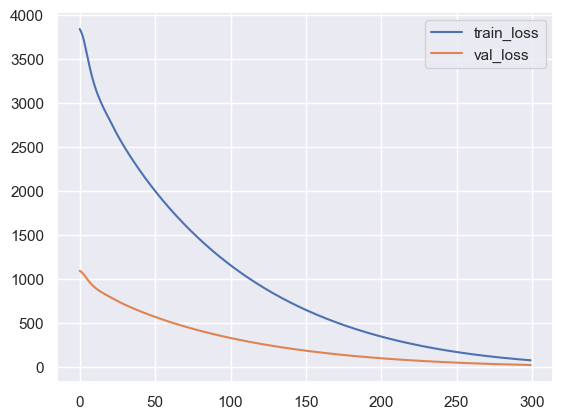

Finished Training
Epoch 1/300


100%|██████████| 13/13 [00:00<00:00, 129.89it/s]


Train Loss: 7097.240905761719


100%|██████████| 4/4 [00:00<00:00, 228.24it/s]


Epoch 2/300


100%|██████████| 13/13 [00:00<00:00, 114.43it/s]


Train Loss: 7011.519226074219


100%|██████████| 4/4 [00:00<00:00, 489.53it/s]


Epoch 3/300


100%|██████████| 13/13 [00:00<00:00, 165.97it/s]


Train Loss: 6833.340576171875


100%|██████████| 4/4 [00:00<00:00, 409.68it/s]


Epoch 4/300


100%|██████████| 13/13 [00:00<00:00, 175.11it/s]


Train Loss: 6593.078826904297


100%|██████████| 4/4 [00:00<00:00, 630.39it/s]


Epoch 5/300


100%|██████████| 13/13 [00:00<00:00, 175.75it/s]


Train Loss: 6347.886932373047


100%|██████████| 4/4 [00:00<00:00, 673.51it/s]


Epoch 6/300


100%|██████████| 13/13 [00:00<00:00, 176.37it/s]


Train Loss: 6132.123870849609


100%|██████████| 4/4 [00:00<00:00, 675.55it/s]


Epoch 7/300


100%|██████████| 13/13 [00:00<00:00, 177.57it/s]


Train Loss: 5955.602233886719


100%|██████████| 4/4 [00:00<00:00, 767.17it/s]


Epoch 8/300


100%|██████████| 13/13 [00:00<00:00, 196.24it/s]


Train Loss: 5802.362457275391


100%|██████████| 4/4 [00:00<00:00, 600.24it/s]


Epoch 9/300


100%|██████████| 13/13 [00:00<00:00, 197.95it/s]


Train Loss: 5664.002105712891


100%|██████████| 4/4 [00:00<00:00, 777.80it/s]


Epoch 10/300


100%|██████████| 13/13 [00:00<00:00, 228.38it/s]


Train Loss: 5535.918426513672


100%|██████████| 4/4 [00:00<00:00, 752.04it/s]


Epoch 11/300


100%|██████████| 13/13 [00:00<00:00, 210.54it/s]


Train Loss: 5415.543365478516


100%|██████████| 4/4 [00:00<00:00, 803.04it/s]


Epoch 12/300


100%|██████████| 13/13 [00:00<00:00, 196.72it/s]


Train Loss: 5300.933319091797


100%|██████████| 4/4 [00:00<00:00, 553.54it/s]


Epoch 13/300


100%|██████████| 13/13 [00:00<00:00, 209.64it/s]


Train Loss: 5190.803802490234


100%|██████████| 4/4 [00:00<00:00, 777.91it/s]


Epoch 14/300


100%|██████████| 13/13 [00:00<00:00, 175.92it/s]


Train Loss: 5084.538055419922


100%|██████████| 4/4 [00:00<00:00, 724.91it/s]


Epoch 15/300


100%|██████████| 13/13 [00:00<00:00, 188.74it/s]


Train Loss: 4981.600555419922


100%|██████████| 4/4 [00:00<00:00, 658.32it/s]


Epoch 16/300


100%|██████████| 13/13 [00:00<00:00, 178.13it/s]


Train Loss: 4881.660369873047


100%|██████████| 4/4 [00:00<00:00, 423.11it/s]


Epoch 17/300


100%|██████████| 13/13 [00:00<00:00, 186.66it/s]


Train Loss: 4784.385681152344


100%|██████████| 4/4 [00:00<00:00, 734.04it/s]


Epoch 18/300


100%|██████████| 13/13 [00:00<00:00, 207.63it/s]


Train Loss: 4689.596527099609


100%|██████████| 4/4 [00:00<00:00, 655.21it/s]


Epoch 19/300


100%|██████████| 13/13 [00:00<00:00, 175.11it/s]


Train Loss: 4597.114898681641


100%|██████████| 4/4 [00:00<00:00, 604.61it/s]


Epoch 20/300


100%|██████████| 13/13 [00:00<00:00, 191.78it/s]


Train Loss: 4506.7974853515625


100%|██████████| 4/4 [00:00<00:00, 692.62it/s]


Epoch 21/300


100%|██████████| 13/13 [00:00<00:00, 174.45it/s]


Train Loss: 4418.492736816406


100%|██████████| 4/4 [00:00<00:00, 729.79it/s]


Epoch 22/300


100%|██████████| 13/13 [00:00<00:00, 175.14it/s]


Train Loss: 4332.1031494140625


100%|██████████| 4/4 [00:00<00:00, 421.05it/s]


Epoch 23/300


100%|██████████| 13/13 [00:00<00:00, 101.86it/s]


Train Loss: 4247.575469970703


100%|██████████| 4/4 [00:00<00:00, 651.69it/s]


Epoch 24/300


100%|██████████| 13/13 [00:00<00:00, 169.44it/s]


Train Loss: 4164.794525146484


100%|██████████| 4/4 [00:00<00:00, 684.73it/s]


Epoch 25/300


100%|██████████| 13/13 [00:00<00:00, 198.78it/s]


Train Loss: 4083.71044921875


100%|██████████| 4/4 [00:00<00:00, 435.74it/s]


Epoch 26/300


100%|██████████| 13/13 [00:00<00:00, 192.22it/s]


Train Loss: 4004.21923828125


100%|██████████| 4/4 [00:00<00:00, 618.90it/s]


Epoch 27/300


100%|██████████| 13/13 [00:00<00:00, 201.39it/s]


Train Loss: 3926.3094787597656


100%|██████████| 4/4 [00:00<00:00, 412.20it/s]


Epoch 28/300


100%|██████████| 13/13 [00:00<00:00, 197.41it/s]


Train Loss: 3849.9388427734375


100%|██████████| 4/4 [00:00<00:00, 352.99it/s]


Epoch 29/300


100%|██████████| 13/13 [00:00<00:00, 178.29it/s]


Train Loss: 3775.0191040039062


100%|██████████| 4/4 [00:00<00:00, 716.58it/s]


Epoch 30/300


100%|██████████| 13/13 [00:00<00:00, 183.39it/s]


Train Loss: 3701.5404052734375


100%|██████████| 4/4 [00:00<00:00, 723.84it/s]


Epoch 31/300


100%|██████████| 13/13 [00:00<00:00, 166.18it/s]


Train Loss: 3629.4476623535156


100%|██████████| 4/4 [00:00<00:00, 761.22it/s]


Epoch 32/300


100%|██████████| 13/13 [00:00<00:00, 188.11it/s]


Train Loss: 3558.6973571777344


100%|██████████| 4/4 [00:00<00:00, 588.08it/s]


Epoch 33/300


100%|██████████| 13/13 [00:00<00:00, 159.57it/s]


Train Loss: 3489.2820434570312


100%|██████████| 4/4 [00:00<00:00, 486.31it/s]


Epoch 34/300


100%|██████████| 13/13 [00:00<00:00, 187.67it/s]


Train Loss: 3421.1510009765625


100%|██████████| 4/4 [00:00<00:00, 429.23it/s]


Epoch 35/300


100%|██████████| 13/13 [00:00<00:00, 207.01it/s]


Train Loss: 3354.2672729492188


100%|██████████| 4/4 [00:00<00:00, 761.46it/s]


Epoch 36/300


100%|██████████| 13/13 [00:00<00:00, 213.85it/s]


Train Loss: 3288.6367797851562


100%|██████████| 4/4 [00:00<00:00, 773.39it/s]


Epoch 37/300


100%|██████████| 13/13 [00:00<00:00, 183.04it/s]


Train Loss: 3224.1863555908203


100%|██████████| 4/4 [00:00<00:00, 629.61it/s]


Epoch 38/300


100%|██████████| 13/13 [00:00<00:00, 188.38it/s]


Train Loss: 3160.926803588867


100%|██████████| 4/4 [00:00<00:00, 625.97it/s]


Epoch 39/300


100%|██████████| 13/13 [00:00<00:00, 194.84it/s]


Train Loss: 3098.812759399414


100%|██████████| 4/4 [00:00<00:00, 672.81it/s]


Epoch 40/300


100%|██████████| 13/13 [00:00<00:00, 140.33it/s]


Train Loss: 3037.8291625976562


100%|██████████| 4/4 [00:00<00:00, 735.42it/s]


Epoch 41/300


100%|██████████| 13/13 [00:00<00:00, 144.76it/s]


Train Loss: 2977.9610900878906


100%|██████████| 4/4 [00:00<00:00, 618.36it/s]


Epoch 42/300


100%|██████████| 13/13 [00:00<00:00, 191.15it/s]


Train Loss: 2919.1729888916016


100%|██████████| 4/4 [00:00<00:00, 790.33it/s]


Epoch 43/300


100%|██████████| 13/13 [00:00<00:00, 197.19it/s]


Train Loss: 2861.4505920410156


100%|██████████| 4/4 [00:00<00:00, 692.16it/s]


Epoch 44/300


100%|██████████| 13/13 [00:00<00:00, 203.68it/s]


Train Loss: 2804.7686462402344


100%|██████████| 4/4 [00:00<00:00, 728.34it/s]


Epoch 45/300


100%|██████████| 13/13 [00:00<00:00, 30.58it/s]


Train Loss: 2749.1082763671875


100%|██████████| 4/4 [00:00<00:00, 730.49it/s]


Epoch 46/300


100%|██████████| 13/13 [00:00<00:00, 160.38it/s]


Train Loss: 2694.462371826172


100%|██████████| 4/4 [00:00<00:00, 689.31it/s]


Epoch 47/300


100%|██████████| 13/13 [00:00<00:00, 76.66it/s]


Train Loss: 2640.799850463867


100%|██████████| 4/4 [00:00<00:00, 612.93it/s]


Epoch 48/300


100%|██████████| 13/13 [00:00<00:00, 144.26it/s]


Train Loss: 2588.100860595703


100%|██████████| 4/4 [00:00<00:00, 265.58it/s]


Epoch 49/300


100%|██████████| 13/13 [00:00<00:00, 83.09it/s]


Train Loss: 2536.369171142578


100%|██████████| 4/4 [00:00<00:00, 480.43it/s]


Epoch 50/300


100%|██████████| 13/13 [00:00<00:00, 63.36it/s]


Train Loss: 2485.549331665039


100%|██████████| 4/4 [00:00<00:00, 632.01it/s]


Epoch 51/300


100%|██████████| 13/13 [00:00<00:00, 78.59it/s]


Train Loss: 2435.6615447998047


100%|██████████| 4/4 [00:00<00:00, 611.06it/s]


Epoch 52/300


100%|██████████| 13/13 [00:00<00:00, 43.46it/s]


Train Loss: 2386.6858520507812


100%|██████████| 4/4 [00:00<00:00, 390.32it/s]


Epoch 53/300


100%|██████████| 13/13 [00:00<00:00, 87.95it/s]


Train Loss: 2338.579330444336


100%|██████████| 4/4 [00:00<00:00, 661.93it/s]


Epoch 54/300


100%|██████████| 13/13 [00:00<00:00, 102.01it/s]


Train Loss: 2291.341583251953


100%|██████████| 4/4 [00:00<00:00, 57.70it/s]


Epoch 55/300


100%|██████████| 13/13 [00:00<00:00, 78.52it/s]


Train Loss: 2244.9629669189453


100%|██████████| 4/4 [00:00<00:00, 179.72it/s]


Epoch 56/300


100%|██████████| 13/13 [00:00<00:00, 21.75it/s]


Train Loss: 2199.432144165039


100%|██████████| 4/4 [00:00<00:00, 340.08it/s]


Epoch 57/300


100%|██████████| 13/13 [00:00<00:00, 78.75it/s]


Train Loss: 2154.724563598633


100%|██████████| 4/4 [00:00<00:00, 628.43it/s]


Epoch 58/300


100%|██████████| 13/13 [00:00<00:00, 111.67it/s]


Train Loss: 2110.8186645507812


100%|██████████| 4/4 [00:00<00:00, 599.25it/s]


Epoch 59/300


100%|██████████| 13/13 [00:00<00:00, 57.88it/s]


Train Loss: 2067.721694946289


100%|██████████| 4/4 [00:00<00:00, 178.14it/s]


Epoch 60/300


100%|██████████| 13/13 [00:00<00:00, 70.46it/s]


Train Loss: 2025.4079132080078


100%|██████████| 4/4 [00:00<00:00, 535.82it/s]


Epoch 61/300


100%|██████████| 13/13 [00:00<00:00, 93.66it/s]


Train Loss: 1983.8623352050781


100%|██████████| 4/4 [00:00<00:00, 449.43it/s]


Epoch 62/300


100%|██████████| 13/13 [00:00<00:00, 133.99it/s]


Train Loss: 1943.0618591308594


100%|██████████| 4/4 [00:00<00:00, 671.33it/s]


Epoch 63/300


100%|██████████| 13/13 [00:00<00:00, 112.76it/s]


Train Loss: 1903.0206298828125


100%|██████████| 4/4 [00:00<00:00, 478.19it/s]


Epoch 64/300


100%|██████████| 13/13 [00:00<00:00, 133.64it/s]


Train Loss: 1863.7161407470703


100%|██████████| 4/4 [00:00<00:00, 595.76it/s]


Epoch 65/300


100%|██████████| 13/13 [00:00<00:00, 127.20it/s]


Train Loss: 1825.1174774169922


100%|██████████| 4/4 [00:00<00:00, 760.60it/s]


Epoch 66/300


100%|██████████| 13/13 [00:00<00:00, 153.75it/s]


Train Loss: 1787.2328491210938


100%|██████████| 4/4 [00:00<00:00, 703.01it/s]


Epoch 67/300


100%|██████████| 13/13 [00:00<00:00, 156.72it/s]


Train Loss: 1750.0254516601562


100%|██████████| 4/4 [00:00<00:00, 511.83it/s]


Epoch 68/300


100%|██████████| 13/13 [00:00<00:00, 156.04it/s]


Train Loss: 1713.5209655761719


100%|██████████| 4/4 [00:00<00:00, 353.48it/s]


Epoch 69/300


100%|██████████| 13/13 [00:00<00:00, 52.46it/s]


Train Loss: 1677.6780242919922


100%|██████████| 4/4 [00:00<00:00, 177.34it/s]


Epoch 70/300


100%|██████████| 13/13 [00:00<00:00, 132.87it/s]


Train Loss: 1642.5007400512695


100%|██████████| 4/4 [00:00<00:00, 528.42it/s]


Epoch 71/300


100%|██████████| 13/13 [00:00<00:00, 158.53it/s]


Train Loss: 1607.9599914550781


100%|██████████| 4/4 [00:00<00:00, 355.80it/s]


Epoch 72/300


100%|██████████| 13/13 [00:00<00:00, 166.05it/s]


Train Loss: 1574.0625915527344


100%|██████████| 4/4 [00:00<00:00, 248.15it/s]


Epoch 73/300


100%|██████████| 13/13 [00:00<00:00, 102.63it/s]


Train Loss: 1540.7856979370117


100%|██████████| 4/4 [00:00<00:00, 314.62it/s]


Epoch 74/300


100%|██████████| 13/13 [00:00<00:00, 98.51it/s]


Train Loss: 1508.1351165771484


100%|██████████| 4/4 [00:00<00:00, 693.13it/s]


Epoch 75/300


100%|██████████| 13/13 [00:00<00:00, 183.67it/s]


Train Loss: 1476.07470703125


100%|██████████| 4/4 [00:00<00:00, 791.15it/s]


Epoch 76/300


100%|██████████| 13/13 [00:00<00:00, 208.54it/s]


Train Loss: 1444.6063995361328


100%|██████████| 4/4 [00:00<00:00, 740.06it/s]


Epoch 77/300


100%|██████████| 13/13 [00:00<00:00, 213.33it/s]


Train Loss: 1413.730239868164


100%|██████████| 4/4 [00:00<00:00, 806.44it/s]


Epoch 78/300


100%|██████████| 13/13 [00:00<00:00, 157.62it/s]


Train Loss: 1383.4334716796875


100%|██████████| 4/4 [00:00<00:00, 756.45it/s]


Epoch 79/300


100%|██████████| 13/13 [00:00<00:00, 176.76it/s]


Train Loss: 1353.6895599365234


100%|██████████| 4/4 [00:00<00:00, 748.08it/s]


Epoch 80/300


100%|██████████| 13/13 [00:00<00:00, 181.50it/s]


Train Loss: 1324.4987411499023


100%|██████████| 4/4 [00:00<00:00, 629.92it/s]


Epoch 81/300


100%|██████████| 13/13 [00:00<00:00, 180.57it/s]


Train Loss: 1295.8598861694336


100%|██████████| 4/4 [00:00<00:00, 580.81it/s]


Epoch 82/300


100%|██████████| 13/13 [00:00<00:00, 210.88it/s]


Train Loss: 1267.7482604980469


100%|██████████| 4/4 [00:00<00:00, 757.85it/s]


Epoch 83/300


100%|██████████| 13/13 [00:00<00:00, 220.03it/s]


Train Loss: 1240.161636352539


100%|██████████| 4/4 [00:00<00:00, 760.32it/s]


Epoch 84/300


100%|██████████| 13/13 [00:00<00:00, 192.74it/s]


Train Loss: 1213.1016540527344


100%|██████████| 4/4 [00:00<00:00, 571.35it/s]


Epoch 85/300


100%|██████████| 13/13 [00:00<00:00, 187.41it/s]


Train Loss: 1186.5377578735352


100%|██████████| 4/4 [00:00<00:00, 669.03it/s]


Epoch 86/300


100%|██████████| 13/13 [00:00<00:00, 164.71it/s]


Train Loss: 1160.4820709228516


100%|██████████| 4/4 [00:00<00:00, 643.30it/s]


Epoch 87/300


100%|██████████| 13/13 [00:00<00:00, 195.61it/s]


Train Loss: 1134.9086532592773


100%|██████████| 4/4 [00:00<00:00, 726.10it/s]


Epoch 88/300


100%|██████████| 13/13 [00:00<00:00, 194.59it/s]


Train Loss: 1109.8187408447266


100%|██████████| 4/4 [00:00<00:00, 724.25it/s]


Epoch 89/300


100%|██████████| 13/13 [00:00<00:00, 182.46it/s]


Train Loss: 1085.1952362060547


100%|██████████| 4/4 [00:00<00:00, 483.90it/s]


Epoch 90/300


100%|██████████| 13/13 [00:00<00:00, 202.87it/s]


Train Loss: 1061.0426788330078


100%|██████████| 4/4 [00:00<00:00, 719.68it/s]


Epoch 91/300


100%|██████████| 13/13 [00:00<00:00, 135.14it/s]


Train Loss: 1037.3501739501953


100%|██████████| 4/4 [00:00<00:00, 397.61it/s]


Epoch 92/300


100%|██████████| 13/13 [00:00<00:00, 91.20it/s]


Train Loss: 1014.0953140258789


100%|██████████| 4/4 [00:00<00:00, 710.09it/s]


Epoch 93/300


100%|██████████| 13/13 [00:00<00:00, 127.53it/s]


Train Loss: 991.3002243041992


100%|██████████| 4/4 [00:00<00:00, 799.41it/s]


Epoch 94/300


100%|██████████| 13/13 [00:00<00:00, 195.91it/s]


Train Loss: 968.9283905029297


100%|██████████| 4/4 [00:00<00:00, 668.44it/s]


Epoch 95/300


100%|██████████| 13/13 [00:00<00:00, 149.18it/s]


Train Loss: 946.9749908447266


100%|██████████| 4/4 [00:00<00:00, 669.00it/s]


Epoch 96/300


100%|██████████| 13/13 [00:00<00:00, 122.85it/s]


Train Loss: 925.4521484375


100%|██████████| 4/4 [00:00<00:00, 528.62it/s]


Epoch 97/300


100%|██████████| 13/13 [00:00<00:00, 103.88it/s]


Train Loss: 904.3277969360352


100%|██████████| 4/4 [00:00<00:00, 642.90it/s]


Epoch 98/300


100%|██████████| 13/13 [00:00<00:00, 107.15it/s]


Train Loss: 883.6176910400391


100%|██████████| 4/4 [00:00<00:00, 770.73it/s]


Epoch 99/300


100%|██████████| 13/13 [00:00<00:00, 100.67it/s]


Train Loss: 863.3051681518555


100%|██████████| 4/4 [00:00<00:00, 659.84it/s]


Epoch 100/300


100%|██████████| 13/13 [00:00<00:00, 66.92it/s]


Train Loss: 843.3780288696289


100%|██████████| 4/4 [00:00<00:00, 512.48it/s]


Epoch 101/300


100%|██████████| 13/13 [00:00<00:00, 113.30it/s]


Train Loss: 823.8464012145996


100%|██████████| 4/4 [00:00<00:00, 237.76it/s]


Epoch 102/300


100%|██████████| 13/13 [00:00<00:00, 157.82it/s]


Train Loss: 804.6728591918945


100%|██████████| 4/4 [00:00<00:00, 624.50it/s]


Epoch 103/300


100%|██████████| 13/13 [00:00<00:00, 114.61it/s]


Train Loss: 785.884349822998


100%|██████████| 4/4 [00:00<00:00, 749.08it/s]


Epoch 104/300


100%|██████████| 13/13 [00:00<00:00, 141.87it/s]


Train Loss: 767.4556846618652


100%|██████████| 4/4 [00:00<00:00, 593.23it/s]


Epoch 105/300


100%|██████████| 13/13 [00:00<00:00, 73.40it/s]


Train Loss: 749.3839988708496


100%|██████████| 4/4 [00:00<00:00, 757.95it/s]


Epoch 106/300


100%|██████████| 13/13 [00:00<00:00, 150.45it/s]


Train Loss: 731.6695404052734


100%|██████████| 4/4 [00:00<00:00, 490.00it/s]


Epoch 107/300


100%|██████████| 13/13 [00:00<00:00, 38.46it/s]


Train Loss: 714.2974395751953


100%|██████████| 4/4 [00:00<00:00, 483.73it/s]


Epoch 108/300


100%|██████████| 13/13 [00:00<00:00, 110.59it/s]


Train Loss: 697.2656478881836


100%|██████████| 4/4 [00:00<00:00, 167.31it/s]


Epoch 109/300


100%|██████████| 13/13 [00:00<00:00, 32.42it/s]


Train Loss: 680.5739402770996


100%|██████████| 4/4 [00:00<00:00, 395.21it/s]


Epoch 110/300


100%|██████████| 13/13 [00:00<00:00, 65.97it/s]


Train Loss: 664.2038192749023


100%|██████████| 4/4 [00:00<00:00, 62.72it/s]


Epoch 111/300


100%|██████████| 13/13 [00:00<00:00, 50.45it/s]


Train Loss: 648.1619529724121


100%|██████████| 4/4 [00:00<00:00, 810.22it/s]


Epoch 112/300


100%|██████████| 13/13 [00:00<00:00, 144.31it/s]


Train Loss: 632.4436454772949


100%|██████████| 4/4 [00:00<00:00, 288.91it/s]


Epoch 113/300


100%|██████████| 13/13 [00:00<00:00, 56.58it/s]


Train Loss: 617.0226974487305


100%|██████████| 4/4 [00:00<00:00, 273.60it/s]


Epoch 114/300


100%|██████████| 13/13 [00:00<00:00, 40.42it/s]


Train Loss: 601.9200897216797


100%|██████████| 4/4 [00:00<00:00, 74.56it/s]


Epoch 115/300


100%|██████████| 13/13 [00:00<00:00, 39.07it/s]


Train Loss: 587.1142578125


100%|██████████| 4/4 [00:00<00:00, 506.45it/s]


Epoch 116/300


100%|██████████| 13/13 [00:00<00:00, 153.11it/s]


Train Loss: 572.6079444885254


100%|██████████| 4/4 [00:00<00:00, 735.04it/s]


Epoch 117/300


100%|██████████| 13/13 [00:00<00:00, 187.61it/s]


Train Loss: 558.3896560668945


100%|██████████| 4/4 [00:00<00:00, 365.17it/s]


Epoch 118/300


100%|██████████| 13/13 [00:00<00:00, 140.40it/s]


Train Loss: 544.4732360839844


100%|██████████| 4/4 [00:00<00:00, 427.91it/s]


Epoch 119/300


100%|██████████| 13/13 [00:00<00:00, 155.19it/s]


Train Loss: 530.8277359008789


100%|██████████| 4/4 [00:00<00:00, 672.76it/s]


Epoch 120/300


100%|██████████| 13/13 [00:00<00:00, 43.51it/s]


Train Loss: 517.4598617553711


100%|██████████| 4/4 [00:00<00:00, 569.57it/s]


Epoch 121/300


100%|██████████| 13/13 [00:00<00:00, 108.37it/s]


Train Loss: 504.37003326416016


100%|██████████| 4/4 [00:00<00:00, 680.48it/s]


Epoch 122/300


100%|██████████| 13/13 [00:00<00:00, 165.78it/s]


Train Loss: 491.53515243530273


100%|██████████| 4/4 [00:00<00:00, 685.88it/s]


Epoch 123/300


100%|██████████| 13/13 [00:00<00:00, 181.95it/s]


Train Loss: 478.98486328125


100%|██████████| 4/4 [00:00<00:00, 656.59it/s]


Epoch 124/300


100%|██████████| 13/13 [00:00<00:00, 115.16it/s]


Train Loss: 466.6819381713867


100%|██████████| 4/4 [00:00<00:00, 308.80it/s]


Epoch 125/300


100%|██████████| 13/13 [00:00<00:00, 100.78it/s]


Train Loss: 454.63759994506836


100%|██████████| 4/4 [00:00<00:00, 247.05it/s]


Epoch 126/300


100%|██████████| 13/13 [00:00<00:00, 111.94it/s]


Train Loss: 442.84520721435547


100%|██████████| 4/4 [00:00<00:00, 737.78it/s]


Epoch 127/300


100%|██████████| 13/13 [00:00<00:00, 143.03it/s]


Train Loss: 431.29927825927734


100%|██████████| 4/4 [00:00<00:00, 554.01it/s]


Epoch 128/300


100%|██████████| 13/13 [00:00<00:00, 134.29it/s]


Train Loss: 419.9999084472656


100%|██████████| 4/4 [00:00<00:00, 210.66it/s]


Epoch 129/300


100%|██████████| 13/13 [00:00<00:00, 144.45it/s]


Train Loss: 408.93651962280273


100%|██████████| 4/4 [00:00<00:00, 701.39it/s]


Epoch 130/300


100%|██████████| 13/13 [00:00<00:00, 151.00it/s]


Train Loss: 398.10444259643555


100%|██████████| 4/4 [00:00<00:00, 736.78it/s]


Epoch 131/300


100%|██████████| 13/13 [00:00<00:00, 185.19it/s]


Train Loss: 387.50848960876465


100%|██████████| 4/4 [00:00<00:00, 706.62it/s]


Epoch 132/300


100%|██████████| 13/13 [00:00<00:00, 197.53it/s]


Train Loss: 377.1423816680908


100%|██████████| 4/4 [00:00<00:00, 94.87it/s]


Epoch 133/300


100%|██████████| 13/13 [00:00<00:00, 104.18it/s]


Train Loss: 366.9944591522217


100%|██████████| 4/4 [00:00<00:00, 769.67it/s]


Epoch 134/300


100%|██████████| 13/13 [00:00<00:00, 181.53it/s]


Train Loss: 357.07173919677734


100%|██████████| 4/4 [00:00<00:00, 783.69it/s]


Epoch 135/300


100%|██████████| 13/13 [00:00<00:00, 126.17it/s]


Train Loss: 347.3537425994873


100%|██████████| 4/4 [00:00<00:00, 548.29it/s]


Epoch 136/300


100%|██████████| 13/13 [00:00<00:00, 158.95it/s]


Train Loss: 337.8606014251709


100%|██████████| 4/4 [00:00<00:00, 725.69it/s]


Epoch 137/300


100%|██████████| 13/13 [00:00<00:00, 175.35it/s]


Train Loss: 328.5728168487549


100%|██████████| 4/4 [00:00<00:00, 367.41it/s]


Epoch 138/300


100%|██████████| 13/13 [00:00<00:00, 80.98it/s]


Train Loss: 319.49322509765625


100%|██████████| 4/4 [00:00<00:00, 349.83it/s]


Epoch 139/300


100%|██████████| 13/13 [00:00<00:00, 78.94it/s]


Train Loss: 310.61115074157715


100%|██████████| 4/4 [00:00<00:00, 243.26it/s]


Epoch 140/300


100%|██████████| 13/13 [00:00<00:00, 66.72it/s]


Train Loss: 301.92593002319336


100%|██████████| 4/4 [00:00<00:00, 403.59it/s]


Epoch 141/300


100%|██████████| 13/13 [00:00<00:00, 174.20it/s]


Train Loss: 293.44143867492676


100%|██████████| 4/4 [00:00<00:00, 651.04it/s]


Epoch 142/300


100%|██████████| 13/13 [00:00<00:00, 175.32it/s]


Train Loss: 285.150842666626


100%|██████████| 4/4 [00:00<00:00, 655.51it/s]


Epoch 143/300


100%|██████████| 13/13 [00:00<00:00, 171.28it/s]


Train Loss: 277.04468727111816


100%|██████████| 4/4 [00:00<00:00, 725.03it/s]


Epoch 144/300


100%|██████████| 13/13 [00:00<00:00, 144.82it/s]


Train Loss: 269.1244354248047


100%|██████████| 4/4 [00:00<00:00, 264.57it/s]


Epoch 145/300


100%|██████████| 13/13 [00:00<00:00, 113.66it/s]


Train Loss: 261.3846015930176


100%|██████████| 4/4 [00:00<00:00, 485.61it/s]


Epoch 146/300


100%|██████████| 13/13 [00:00<00:00, 112.77it/s]


Train Loss: 253.8269329071045


100%|██████████| 4/4 [00:00<00:00, 679.68it/s]


Epoch 147/300


100%|██████████| 13/13 [00:00<00:00, 141.32it/s]


Train Loss: 246.44783401489258


100%|██████████| 4/4 [00:00<00:00, 555.79it/s]


Epoch 148/300


100%|██████████| 13/13 [00:00<00:00, 159.00it/s]


Train Loss: 239.2322483062744


100%|██████████| 4/4 [00:00<00:00, 560.21it/s]


Epoch 149/300


100%|██████████| 13/13 [00:00<00:00, 169.19it/s]


Train Loss: 232.1951789855957


100%|██████████| 4/4 [00:00<00:00, 642.78it/s]


Epoch 150/300


100%|██████████| 13/13 [00:00<00:00, 156.68it/s]


Train Loss: 225.3242473602295


100%|██████████| 4/4 [00:00<00:00, 663.37it/s]


Epoch 151/300


100%|██████████| 13/13 [00:00<00:00, 101.37it/s]


Train Loss: 218.61672973632812


100%|██████████| 4/4 [00:00<00:00, 755.02it/s]


Epoch 152/300


100%|██████████| 13/13 [00:00<00:00, 80.74it/s]


Train Loss: 212.06439208984375


100%|██████████| 4/4 [00:00<00:00, 608.55it/s]


Epoch 153/300


100%|██████████| 13/13 [00:00<00:00, 114.83it/s]


Train Loss: 205.68201541900635


100%|██████████| 4/4 [00:00<00:00, 680.51it/s]


Epoch 154/300


100%|██████████| 13/13 [00:00<00:00, 122.92it/s]


Train Loss: 199.44957447052002


100%|██████████| 4/4 [00:00<00:00, 267.88it/s]


Epoch 155/300


100%|██████████| 13/13 [00:00<00:00, 169.05it/s]


Train Loss: 193.37318897247314


100%|██████████| 4/4 [00:00<00:00, 686.10it/s]


Epoch 156/300


100%|██████████| 13/13 [00:00<00:00, 167.41it/s]


Train Loss: 187.43954753875732


100%|██████████| 4/4 [00:00<00:00, 579.12it/s]


Epoch 157/300


100%|██████████| 13/13 [00:00<00:00, 173.68it/s]


Train Loss: 181.65985298156738


100%|██████████| 4/4 [00:00<00:00, 786.78it/s]


Epoch 158/300


100%|██████████| 13/13 [00:00<00:00, 147.71it/s]


Train Loss: 176.02192211151123


100%|██████████| 4/4 [00:00<00:00, 322.73it/s]


Epoch 159/300


100%|██████████| 13/13 [00:00<00:00, 151.96it/s]


Train Loss: 170.52454566955566


100%|██████████| 4/4 [00:00<00:00, 568.18it/s]


Epoch 160/300


100%|██████████| 13/13 [00:00<00:00, 150.59it/s]


Train Loss: 165.17124366760254


100%|██████████| 4/4 [00:00<00:00, 457.92it/s]


Epoch 161/300


100%|██████████| 13/13 [00:00<00:00, 173.94it/s]


Train Loss: 159.9507761001587


100%|██████████| 4/4 [00:00<00:00, 341.26it/s]


Epoch 162/300


100%|██████████| 13/13 [00:00<00:00, 89.21it/s]


Train Loss: 154.86004829406738


100%|██████████| 4/4 [00:00<00:00, 704.13it/s]


Epoch 163/300


100%|██████████| 13/13 [00:00<00:00, 169.40it/s]


Train Loss: 149.90978050231934


100%|██████████| 4/4 [00:00<00:00, 502.57it/s]


Epoch 164/300


100%|██████████| 13/13 [00:00<00:00, 76.35it/s]


Train Loss: 145.08702182769775


100%|██████████| 4/4 [00:00<00:00, 656.59it/s]


Epoch 165/300


100%|██████████| 13/13 [00:00<00:00, 54.68it/s]


Train Loss: 140.3869981765747


100%|██████████| 4/4 [00:00<00:00, 757.85it/s]


Epoch 166/300


100%|██████████| 13/13 [00:00<00:00, 39.05it/s]


Train Loss: 135.81070518493652


100%|██████████| 4/4 [00:00<00:00, 49.40it/s]


Epoch 167/300


100%|██████████| 13/13 [00:00<00:00, 87.19it/s]


Train Loss: 131.35570335388184


100%|██████████| 4/4 [00:00<00:00, 344.00it/s]


Epoch 168/300


100%|██████████| 13/13 [00:00<00:00, 173.87it/s]


Train Loss: 127.0270643234253


100%|██████████| 4/4 [00:00<00:00, 317.26it/s]


Epoch 169/300


100%|██████████| 13/13 [00:00<00:00, 62.05it/s]


Train Loss: 122.8112154006958


100%|██████████| 4/4 [00:00<00:00, 665.47it/s]


Epoch 170/300


100%|██████████| 13/13 [00:00<00:00, 95.88it/s] 


Train Loss: 118.70757007598877


100%|██████████| 4/4 [00:00<00:00, 150.16it/s]


Epoch 171/300


100%|██████████| 13/13 [00:00<00:00, 48.16it/s]


Train Loss: 114.71584033966064


100%|██████████| 4/4 [00:00<00:00, 209.95it/s]


Epoch 172/300


100%|██████████| 13/13 [00:00<00:00, 59.77it/s]


Train Loss: 110.83683109283447


100%|██████████| 4/4 [00:00<00:00, 411.52it/s]


Epoch 173/300


100%|██████████| 13/13 [00:00<00:00, 120.53it/s]


Train Loss: 107.06517314910889


100%|██████████| 4/4 [00:00<00:00, 518.82it/s]


Epoch 174/300


100%|██████████| 13/13 [00:00<00:00, 111.24it/s]


Train Loss: 103.39933347702026


100%|██████████| 4/4 [00:00<00:00, 358.59it/s]


Epoch 175/300


100%|██████████| 13/13 [00:00<00:00, 134.83it/s]


Train Loss: 99.83313465118408


100%|██████████| 4/4 [00:00<00:00, 542.13it/s]


Epoch 176/300


100%|██████████| 13/13 [00:00<00:00, 85.50it/s]


Train Loss: 96.37298727035522


100%|██████████| 4/4 [00:00<00:00, 644.83it/s]


Epoch 177/300


100%|██████████| 13/13 [00:00<00:00, 72.75it/s]


Train Loss: 93.01113510131836


100%|██████████| 4/4 [00:00<00:00, 704.33it/s]


Epoch 178/300


100%|██████████| 13/13 [00:00<00:00, 133.89it/s]


Train Loss: 89.74310541152954


100%|██████████| 4/4 [00:00<00:00, 476.35it/s]


Epoch 179/300


100%|██████████| 13/13 [00:00<00:00, 85.07it/s]


Train Loss: 86.57170820236206


100%|██████████| 4/4 [00:00<00:00, 573.48it/s]


Epoch 180/300


100%|██████████| 13/13 [00:00<00:00, 122.16it/s]


Train Loss: 83.49125289916992


100%|██████████| 4/4 [00:00<00:00, 343.32it/s]


Epoch 181/300


100%|██████████| 13/13 [00:00<00:00, 171.16it/s]


Train Loss: 80.50295448303223


100%|██████████| 4/4 [00:00<00:00, 675.19it/s]


Epoch 182/300


100%|██████████| 13/13 [00:00<00:00, 115.36it/s]


Train Loss: 77.60147714614868


100%|██████████| 4/4 [00:00<00:00, 539.30it/s]


Epoch 183/300


100%|██████████| 13/13 [00:00<00:00, 165.70it/s]


Train Loss: 74.78941631317139


100%|██████████| 4/4 [00:00<00:00, 645.67it/s]


Epoch 184/300


100%|██████████| 13/13 [00:00<00:00, 168.00it/s]


Train Loss: 72.06151962280273


100%|██████████| 4/4 [00:00<00:00, 680.37it/s]


Epoch 185/300


100%|██████████| 13/13 [00:00<00:00, 142.81it/s]


Train Loss: 69.4151611328125


100%|██████████| 4/4 [00:00<00:00, 713.17it/s]


Epoch 186/300


100%|██████████| 13/13 [00:00<00:00, 198.43it/s]


Train Loss: 66.85057163238525


100%|██████████| 4/4 [00:00<00:00, 579.12it/s]


Epoch 187/300


100%|██████████| 13/13 [00:00<00:00, 199.89it/s]


Train Loss: 64.36310958862305


100%|██████████| 4/4 [00:00<00:00, 672.62it/s]


Epoch 188/300


100%|██████████| 13/13 [00:00<00:00, 169.08it/s]


Train Loss: 61.95316219329834


100%|██████████| 4/4 [00:00<00:00, 753.86it/s]


Epoch 189/300


100%|██████████| 13/13 [00:00<00:00, 203.70it/s]


Train Loss: 59.62181854248047


100%|██████████| 4/4 [00:00<00:00, 788.48it/s]


Epoch 190/300


100%|██████████| 13/13 [00:00<00:00, 203.58it/s]


Train Loss: 57.362414836883545


100%|██████████| 4/4 [00:00<00:00, 618.72it/s]


Epoch 191/300


100%|██████████| 13/13 [00:00<00:00, 172.18it/s]


Train Loss: 55.172719955444336


100%|██████████| 4/4 [00:00<00:00, 762.05it/s]


Epoch 192/300


100%|██████████| 13/13 [00:00<00:00, 161.51it/s]


Train Loss: 53.05237436294556


100%|██████████| 4/4 [00:00<00:00, 729.76it/s]


Epoch 193/300


100%|██████████| 13/13 [00:00<00:00, 205.08it/s]


Train Loss: 51.00384187698364


100%|██████████| 4/4 [00:00<00:00, 391.53it/s]


Epoch 194/300


100%|██████████| 13/13 [00:00<00:00, 45.49it/s]


Train Loss: 49.0190224647522


100%|██████████| 4/4 [00:00<00:00, 637.26it/s]


Epoch 195/300


100%|██████████| 13/13 [00:00<00:00, 204.20it/s]


Train Loss: 47.10017156600952


100%|██████████| 4/4 [00:00<00:00, 752.04it/s]


Epoch 196/300


100%|██████████| 13/13 [00:00<00:00, 197.18it/s]


Train Loss: 45.24307465553284


100%|██████████| 4/4 [00:00<00:00, 575.98it/s]


Epoch 197/300


100%|██████████| 13/13 [00:00<00:00, 219.15it/s]


Train Loss: 43.44763135910034


100%|██████████| 4/4 [00:00<00:00, 624.20it/s]


Epoch 198/300


100%|██████████| 13/13 [00:00<00:00, 190.52it/s]


Train Loss: 41.71360898017883


100%|██████████| 4/4 [00:00<00:00, 758.70it/s]


Epoch 199/300


100%|██████████| 13/13 [00:00<00:00, 201.43it/s]


Train Loss: 40.038474321365356


100%|██████████| 4/4 [00:00<00:00, 755.42it/s]


Epoch 200/300


100%|██████████| 13/13 [00:00<00:00, 207.19it/s]


Train Loss: 38.41717553138733


100%|██████████| 4/4 [00:00<00:00, 96.73it/s]


Epoch 201/300


100%|██████████| 13/13 [00:00<00:00, 173.14it/s]


Train Loss: 36.854825019836426


100%|██████████| 4/4 [00:00<00:00, 741.86it/s]


Epoch 202/300


100%|██████████| 13/13 [00:00<00:00, 217.81it/s]


Train Loss: 35.345398902893066


100%|██████████| 4/4 [00:00<00:00, 499.44it/s]


Epoch 203/300


100%|██████████| 13/13 [00:00<00:00, 209.09it/s]


Train Loss: 33.88765525817871


100%|██████████| 4/4 [00:00<00:00, 826.59it/s]


Epoch 204/300


100%|██████████| 13/13 [00:00<00:00, 158.93it/s]


Train Loss: 32.480021953582764


100%|██████████| 4/4 [00:00<00:00, 743.90it/s]


Epoch 205/300


100%|██████████| 13/13 [00:00<00:00, 210.26it/s]


Train Loss: 31.1250741481781


100%|██████████| 4/4 [00:00<00:00, 660.81it/s]


Epoch 206/300


100%|██████████| 13/13 [00:00<00:00, 199.15it/s]


Train Loss: 29.81555199623108


100%|██████████| 4/4 [00:00<00:00, 768.19it/s]


Epoch 207/300


100%|██████████| 13/13 [00:00<00:00, 188.44it/s]


Train Loss: 28.553016185760498


100%|██████████| 4/4 [00:00<00:00, 715.84it/s]


Epoch 208/300


100%|██████████| 13/13 [00:00<00:00, 150.85it/s]


Train Loss: 27.337345838546753


100%|██████████| 4/4 [00:00<00:00, 761.77it/s]


Epoch 209/300


100%|██████████| 13/13 [00:00<00:00, 195.12it/s]


Train Loss: 26.165609121322632


100%|██████████| 4/4 [00:00<00:00, 750.32it/s]


Epoch 210/300


100%|██████████| 13/13 [00:00<00:00, 215.38it/s]


Train Loss: 25.03735852241516


100%|██████████| 4/4 [00:00<00:00, 801.89it/s]


Epoch 211/300


100%|██████████| 13/13 [00:00<00:00, 179.22it/s]


Train Loss: 23.949233651161194


100%|██████████| 4/4 [00:00<00:00, 642.26it/s]


Epoch 212/300


100%|██████████| 13/13 [00:00<00:00, 205.43it/s]


Train Loss: 22.903977036476135


100%|██████████| 4/4 [00:00<00:00, 754.57it/s]


Epoch 213/300


100%|██████████| 13/13 [00:00<00:00, 215.20it/s]


Train Loss: 21.89388656616211


100%|██████████| 4/4 [00:00<00:00, 765.56it/s]


Epoch 214/300


100%|██████████| 13/13 [00:00<00:00, 140.04it/s]


Train Loss: 20.925275564193726


100%|██████████| 4/4 [00:00<00:00, 801.43it/s]


Epoch 215/300


100%|██████████| 13/13 [00:00<00:00, 139.64it/s]


Train Loss: 19.992504835128784


100%|██████████| 4/4 [00:00<00:00, 710.69it/s]


Epoch 216/300


100%|██████████| 13/13 [00:00<00:00, 193.18it/s]


Train Loss: 19.094600200653076


100%|██████████| 4/4 [00:00<00:00, 794.60it/s]


Epoch 217/300


100%|██████████| 13/13 [00:00<00:00, 194.88it/s]


Train Loss: 18.233035922050476


100%|██████████| 4/4 [00:00<00:00, 781.28it/s]


Epoch 218/300


100%|██████████| 13/13 [00:00<00:00, 183.48it/s]


Train Loss: 17.404958963394165


100%|██████████| 4/4 [00:00<00:00, 534.78it/s]


Epoch 219/300


100%|██████████| 13/13 [00:00<00:00, 170.08it/s]


Train Loss: 16.607442021369934


100%|██████████| 4/4 [00:00<00:00, 741.70it/s]


Epoch 220/300


100%|██████████| 13/13 [00:00<00:00, 187.64it/s]


Train Loss: 15.842657208442688


100%|██████████| 4/4 [00:00<00:00, 836.81it/s]


Epoch 221/300


100%|██████████| 13/13 [00:00<00:00, 208.49it/s]


Train Loss: 15.109174847602844


100%|██████████| 4/4 [00:00<00:00, 737.62it/s]


Epoch 222/300


100%|██████████| 13/13 [00:00<00:00, 204.70it/s]


Train Loss: 14.403671860694885


100%|██████████| 4/4 [00:00<00:00, 724.91it/s]


Epoch 223/300


100%|██████████| 13/13 [00:00<00:00, 186.98it/s]


Train Loss: 13.727316975593567


100%|██████████| 4/4 [00:00<00:00, 562.50it/s]


Epoch 224/300


100%|██████████| 13/13 [00:00<00:00, 218.93it/s]


Train Loss: 13.078033089637756


100%|██████████| 4/4 [00:00<00:00, 589.81it/s]


Epoch 225/300


100%|██████████| 13/13 [00:00<00:00, 226.29it/s]


Train Loss: 12.456291019916534


100%|██████████| 4/4 [00:00<00:00, 744.50it/s]


Epoch 226/300


100%|██████████| 13/13 [00:00<00:00, 186.02it/s]


Train Loss: 11.860220551490784


100%|██████████| 4/4 [00:00<00:00, 406.09it/s]


Epoch 227/300


100%|██████████| 13/13 [00:00<00:00, 98.43it/s]


Train Loss: 11.28905200958252


100%|██████████| 4/4 [00:00<00:00, 747.78it/s]


Epoch 228/300


100%|██████████| 13/13 [00:00<00:00, 100.82it/s]


Train Loss: 10.741681814193726


100%|██████████| 4/4 [00:00<00:00, 767.27it/s]


Epoch 229/300


100%|██████████| 13/13 [00:00<00:00, 193.87it/s]


Train Loss: 10.217937111854553


100%|██████████| 4/4 [00:00<00:00, 760.77it/s]


Epoch 230/300


100%|██████████| 13/13 [00:00<00:00, 203.70it/s]


Train Loss: 9.716433346271515


100%|██████████| 4/4 [00:00<00:00, 243.99it/s]


Epoch 231/300


100%|██████████| 13/13 [00:00<00:00, 84.60it/s]


Train Loss: 9.236888825893402


100%|██████████| 4/4 [00:00<00:00, 765.00it/s]


Epoch 232/300


100%|██████████| 13/13 [00:00<00:00, 103.88it/s]


Train Loss: 8.777016997337341


100%|██████████| 4/4 [00:00<00:00, 404.24it/s]


Epoch 233/300


100%|██████████| 13/13 [00:00<00:00, 134.36it/s]


Train Loss: 8.337849140167236


100%|██████████| 4/4 [00:00<00:00, 60.52it/s]


Epoch 234/300


100%|██████████| 13/13 [00:00<00:00, 80.20it/s]


Train Loss: 7.917062938213348


100%|██████████| 4/4 [00:00<00:00, 69.53it/s]


Epoch 235/300


100%|██████████| 13/13 [00:00<00:00, 61.77it/s]


Train Loss: 7.516838729381561


100%|██████████| 4/4 [00:00<00:00, 673.84it/s]


Epoch 236/300


100%|██████████| 13/13 [00:00<00:00, 80.27it/s]


Train Loss: 7.133472442626953


100%|██████████| 4/4 [00:00<00:00, 489.90it/s]


Epoch 237/300


100%|██████████| 13/13 [00:00<00:00, 149.05it/s]


Train Loss: 6.765672385692596


100%|██████████| 4/4 [00:00<00:00, 544.82it/s]


Epoch 238/300


100%|██████████| 13/13 [00:00<00:00, 74.34it/s]


Train Loss: 6.416295439004898


100%|██████████| 4/4 [00:00<00:00, 385.02it/s]


Epoch 239/300


100%|██████████| 13/13 [00:00<00:00, 77.62it/s]


Train Loss: 6.082635909318924


100%|██████████| 4/4 [00:00<00:00, 491.83it/s]


Epoch 240/300


100%|██████████| 13/13 [00:00<00:00, 43.02it/s]


Train Loss: 5.764494717121124


100%|██████████| 4/4 [00:00<00:00, 175.99it/s]


Epoch 241/300


100%|██████████| 13/13 [00:00<00:00, 64.24it/s]


Train Loss: 5.461622536182404


100%|██████████| 4/4 [00:00<00:00, 567.39it/s]


Epoch 242/300


100%|██████████| 13/13 [00:00<00:00, 151.12it/s]


Train Loss: 5.171232879161835


100%|██████████| 4/4 [00:00<00:00, 678.31it/s]


Epoch 243/300


100%|██████████| 13/13 [00:00<00:00, 151.43it/s]


Train Loss: 4.896458983421326


100%|██████████| 4/4 [00:00<00:00, 497.38it/s]


Epoch 244/300


100%|██████████| 13/13 [00:00<00:00, 153.37it/s]


Train Loss: 4.633635252714157


100%|██████████| 4/4 [00:00<00:00, 517.86it/s]


Epoch 245/300


100%|██████████| 13/13 [00:00<00:00, 158.50it/s]


Train Loss: 4.383446007966995


100%|██████████| 4/4 [00:00<00:00, 123.75it/s]


Epoch 246/300


100%|██████████| 13/13 [00:00<00:00, 68.14it/s]


Train Loss: 4.146073549985886


100%|██████████| 4/4 [00:00<00:00, 360.65it/s]


Epoch 247/300


100%|██████████| 13/13 [00:00<00:00, 96.26it/s]


Train Loss: 3.919508993625641


100%|██████████| 4/4 [00:00<00:00, 666.66it/s]


Epoch 248/300


100%|██████████| 13/13 [00:00<00:00, 165.09it/s]


Train Loss: 3.7056134939193726


100%|██████████| 4/4 [00:00<00:00, 704.98it/s]


Epoch 249/300


100%|██████████| 13/13 [00:00<00:00, 118.04it/s]


Train Loss: 3.4996096193790436


100%|██████████| 4/4 [00:00<00:00, 249.30it/s]


Epoch 250/300


100%|██████████| 13/13 [00:00<00:00, 128.08it/s]


Train Loss: 3.3053812980651855


100%|██████████| 4/4 [00:00<00:00, 394.44it/s]


Epoch 251/300


100%|██████████| 13/13 [00:00<00:00, 132.08it/s]


Train Loss: 3.120974376797676


100%|██████████| 4/4 [00:00<00:00, 729.92it/s]


Epoch 252/300


100%|██████████| 13/13 [00:00<00:00, 117.32it/s]


Train Loss: 2.9456888139247894


100%|██████████| 4/4 [00:00<00:00, 745.99it/s]


Epoch 253/300


100%|██████████| 13/13 [00:00<00:00, 169.46it/s]


Train Loss: 2.7789765894412994


100%|██████████| 4/4 [00:00<00:00, 247.07it/s]


Epoch 254/300


100%|██████████| 13/13 [00:00<00:00, 147.06it/s]


Train Loss: 2.6205355376005173


100%|██████████| 4/4 [00:00<00:00, 421.24it/s]


Epoch 255/300


100%|██████████| 13/13 [00:00<00:00, 192.39it/s]


Train Loss: 2.4705388993024826


100%|██████████| 4/4 [00:00<00:00, 722.04it/s]


Epoch 256/300


100%|██████████| 13/13 [00:00<00:00, 107.06it/s]


Train Loss: 2.3294059336185455


100%|██████████| 4/4 [00:00<00:00, 775.97it/s]


Epoch 257/300


100%|██████████| 13/13 [00:00<00:00, 180.67it/s]


Train Loss: 2.195046439766884


100%|██████████| 4/4 [00:00<00:00, 733.40it/s]


Epoch 258/300


100%|██████████| 13/13 [00:00<00:00, 168.75it/s]


Train Loss: 2.066490188241005


100%|██████████| 4/4 [00:00<00:00, 729.95it/s]


Epoch 259/300


100%|██████████| 13/13 [00:00<00:00, 139.39it/s]


Train Loss: 1.946121796965599


100%|██████████| 4/4 [00:00<00:00, 678.99it/s]


Epoch 260/300


100%|██████████| 13/13 [00:00<00:00, 171.89it/s]


Train Loss: 1.8336207568645477


100%|██████████| 4/4 [00:00<00:00, 677.95it/s]


Epoch 261/300


100%|██████████| 13/13 [00:00<00:00, 164.41it/s]


Train Loss: 1.7241030484437943


100%|██████████| 4/4 [00:00<00:00, 250.57it/s]


Epoch 262/300


100%|██████████| 13/13 [00:00<00:00, 148.27it/s]


Train Loss: 1.6216185986995697


100%|██████████| 4/4 [00:00<00:00, 527.57it/s]


Epoch 263/300


100%|██████████| 13/13 [00:00<00:00, 167.77it/s]


Train Loss: 1.5257281512022018


100%|██████████| 4/4 [00:00<00:00, 751.06it/s]


Epoch 264/300


100%|██████████| 13/13 [00:00<00:00, 148.08it/s]


Train Loss: 1.4337967932224274


100%|██████████| 4/4 [00:00<00:00, 773.54it/s]


Epoch 265/300


100%|██████████| 13/13 [00:00<00:00, 181.77it/s]


Train Loss: 1.347536638379097


100%|██████████| 4/4 [00:00<00:00, 729.95it/s]


Epoch 266/300


100%|██████████| 13/13 [00:00<00:00, 184.69it/s]


Train Loss: 1.266758605837822


100%|██████████| 4/4 [00:00<00:00, 246.48it/s]


Epoch 267/300


100%|██████████| 13/13 [00:00<00:00, 138.74it/s]


Train Loss: 1.1900225132703781


100%|██████████| 4/4 [00:00<00:00, 748.05it/s]


Epoch 268/300


100%|██████████| 13/13 [00:00<00:00, 206.86it/s]


Train Loss: 1.1173782050609589


100%|██████████| 4/4 [00:00<00:00, 715.17it/s]


Epoch 269/300


100%|██████████| 13/13 [00:00<00:00, 166.58it/s]


Train Loss: 1.0487521663308144


100%|██████████| 4/4 [00:00<00:00, 585.74it/s]


Epoch 270/300


100%|██████████| 13/13 [00:00<00:00, 137.31it/s]


Train Loss: 0.9842809662222862


100%|██████████| 4/4 [00:00<00:00, 630.51it/s]


Epoch 271/300


100%|██████████| 13/13 [00:00<00:00, 170.15it/s]


Train Loss: 0.9238625839352608


100%|██████████| 4/4 [00:00<00:00, 790.97it/s]


Epoch 272/300


100%|██████████| 13/13 [00:00<00:00, 197.97it/s]


Train Loss: 0.8673483058810234


100%|██████████| 4/4 [00:00<00:00, 624.43it/s]


Epoch 273/300


100%|██████████| 13/13 [00:00<00:00, 160.74it/s]


Train Loss: 0.8151655234396458


100%|██████████| 4/4 [00:00<00:00, 489.83it/s]


Epoch 274/300


100%|██████████| 13/13 [00:00<00:00, 183.99it/s]


Train Loss: 0.7634778469800949


100%|██████████| 4/4 [00:00<00:00, 422.39it/s]


Epoch 275/300


100%|██████████| 13/13 [00:00<00:00, 174.49it/s]


Train Loss: 0.7166172564029694


100%|██████████| 4/4 [00:00<00:00, 322.34it/s]


Epoch 276/300


100%|██████████| 13/13 [00:00<00:00, 125.56it/s]


Train Loss: 0.6725592687726021


100%|██████████| 4/4 [00:00<00:00, 818.32it/s]


Epoch 277/300


100%|██████████| 13/13 [00:00<00:00, 184.02it/s]


Train Loss: 0.6294487752020359


100%|██████████| 4/4 [00:00<00:00, 704.51it/s]


Epoch 278/300


100%|██████████| 13/13 [00:00<00:00, 158.78it/s]


Train Loss: 0.5894505679607391


100%|██████████| 4/4 [00:00<00:00, 744.73it/s]


Epoch 279/300


100%|██████████| 13/13 [00:00<00:00, 120.07it/s]


Train Loss: 0.5529349185526371


100%|██████████| 4/4 [00:00<00:00, 730.97it/s]


Epoch 280/300


100%|██████████| 13/13 [00:00<00:00, 186.16it/s]


Train Loss: 0.5185133814811707


100%|██████████| 4/4 [00:00<00:00, 755.87it/s]


Epoch 281/300


100%|██████████| 13/13 [00:00<00:00, 191.95it/s]


Train Loss: 0.48715345188975334


100%|██████████| 4/4 [00:00<00:00, 773.86it/s]


Epoch 282/300


100%|██████████| 13/13 [00:00<00:00, 209.61it/s]


Train Loss: 0.4565782994031906


100%|██████████| 4/4 [00:00<00:00, 773.71it/s]


Epoch 283/300


100%|██████████| 13/13 [00:00<00:00, 214.40it/s]


Train Loss: 0.4285053387284279


100%|██████████| 4/4 [00:00<00:00, 678.20it/s]


Epoch 284/300


100%|██████████| 13/13 [00:00<00:00, 202.23it/s]


Train Loss: 0.4007801115512848


100%|██████████| 4/4 [00:00<00:00, 802.05it/s]


Epoch 285/300


100%|██████████| 13/13 [00:00<00:00, 195.77it/s]


Train Loss: 0.3763609994202852


100%|██████████| 4/4 [00:00<00:00, 466.69it/s]


Epoch 286/300


100%|██████████| 13/13 [00:00<00:00, 206.23it/s]


Train Loss: 0.3520054891705513


100%|██████████| 4/4 [00:00<00:00, 730.43it/s]


Epoch 287/300


100%|██████████| 13/13 [00:00<00:00, 196.61it/s]


Train Loss: 0.33150615356862545


100%|██████████| 4/4 [00:00<00:00, 741.96it/s]


Epoch 288/300


100%|██████████| 13/13 [00:00<00:00, 184.92it/s]


Train Loss: 0.3111899010837078


100%|██████████| 4/4 [00:00<00:00, 713.50it/s]


Epoch 289/300


100%|██████████| 13/13 [00:00<00:00, 177.57it/s]


Train Loss: 0.2920035235583782


100%|██████████| 4/4 [00:00<00:00, 755.02it/s]


Epoch 290/300


100%|██████████| 13/13 [00:00<00:00, 206.63it/s]


Train Loss: 0.27331636287271976


100%|██████████| 4/4 [00:00<00:00, 778.06it/s]


Epoch 291/300


100%|██████████| 13/13 [00:00<00:00, 181.20it/s]


Train Loss: 0.2568963151425123


100%|██████████| 4/4 [00:00<00:00, 766.01it/s]


Epoch 292/300


100%|██████████| 13/13 [00:00<00:00, 207.83it/s]


Train Loss: 0.24157698079943657


100%|██████████| 4/4 [00:00<00:00, 829.20it/s]


Epoch 293/300


100%|██████████| 13/13 [00:00<00:00, 219.12it/s]


Train Loss: 0.2273850766941905


100%|██████████| 4/4 [00:00<00:00, 798.27it/s]


Epoch 294/300


100%|██████████| 13/13 [00:00<00:00, 180.01it/s]


Train Loss: 0.21397952269762754


100%|██████████| 4/4 [00:00<00:00, 425.90it/s]


Epoch 295/300


100%|██████████| 13/13 [00:00<00:00, 196.98it/s]


Train Loss: 0.20318966452032328


100%|██████████| 4/4 [00:00<00:00, 707.48it/s]


Epoch 296/300


100%|██████████| 13/13 [00:00<00:00, 213.68it/s]


Train Loss: 0.19166664965450764


100%|██████████| 4/4 [00:00<00:00, 786.04it/s]


Epoch 297/300


100%|██████████| 13/13 [00:00<00:00, 201.69it/s]


Train Loss: 0.18102399725466967


100%|██████████| 4/4 [00:00<00:00, 726.32it/s]


Epoch 298/300


100%|██████████| 13/13 [00:00<00:00, 199.95it/s]


Train Loss: 0.17008591163903475


100%|██████████| 4/4 [00:00<00:00, 745.29it/s]


Epoch 299/300


100%|██████████| 13/13 [00:00<00:00, 188.48it/s]


Train Loss: 0.16152564343065023


100%|██████████| 4/4 [00:00<00:00, 725.94it/s]


Epoch 300/300


100%|██████████| 13/13 [00:00<00:00, 188.55it/s]


Train Loss: 0.15219294093549252


100%|██████████| 4/4 [00:00<00:00, 750.89it/s]


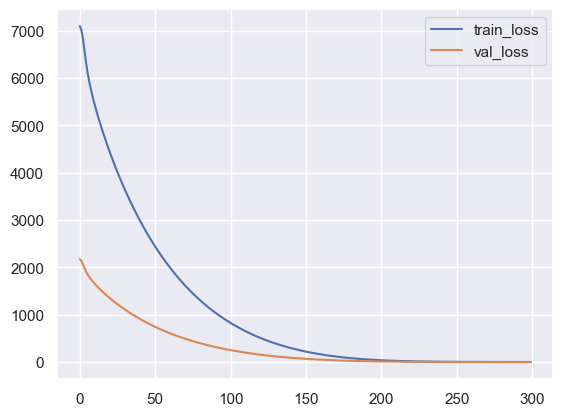

Finished Training
Epoch 1/300


100%|██████████| 13/13 [00:00<00:00, 144.33it/s]


Train Loss: 7153.997253417969


100%|██████████| 4/4 [00:00<00:00, 483.20it/s]


Epoch 2/300


100%|██████████| 13/13 [00:00<00:00, 191.68it/s]


Train Loss: 7086.808166503906


100%|██████████| 4/4 [00:00<00:00, 741.27it/s]


Epoch 3/300


100%|██████████| 13/13 [00:00<00:00, 150.96it/s]


Train Loss: 6963.389404296875


100%|██████████| 4/4 [00:00<00:00, 774.57it/s]


Epoch 4/300


100%|██████████| 13/13 [00:00<00:00, 129.87it/s]


Train Loss: 6715.262603759766


100%|██████████| 4/4 [00:00<00:00, 560.62it/s]


Epoch 5/300


100%|██████████| 13/13 [00:00<00:00, 136.45it/s]


Train Loss: 6426.79052734375


100%|██████████| 4/4 [00:00<00:00, 693.50it/s]


Epoch 6/300


100%|██████████| 13/13 [00:00<00:00, 201.14it/s]


Train Loss: 6182.692352294922


100%|██████████| 4/4 [00:00<00:00, 605.70it/s]


Epoch 7/300


100%|██████████| 13/13 [00:00<00:00, 208.98it/s]


Train Loss: 5976.0821533203125


100%|██████████| 4/4 [00:00<00:00, 735.58it/s]


Epoch 8/300


100%|██████████| 13/13 [00:00<00:00, 202.14it/s]


Train Loss: 5798.543853759766


100%|██████████| 4/4 [00:00<00:00, 647.57it/s]


Epoch 9/300


100%|██████████| 13/13 [00:00<00:00, 164.86it/s]


Train Loss: 5647.9560546875


100%|██████████| 4/4 [00:00<00:00, 692.04it/s]


Epoch 10/300


100%|██████████| 13/13 [00:00<00:00, 199.14it/s]


Train Loss: 5512.569915771484


100%|██████████| 4/4 [00:00<00:00, 742.52it/s]


Epoch 11/300


100%|██████████| 13/13 [00:00<00:00, 188.17it/s]


Train Loss: 5386.5103759765625


100%|██████████| 4/4 [00:00<00:00, 565.67it/s]


Epoch 12/300


100%|██████████| 13/13 [00:00<00:00, 175.40it/s]


Train Loss: 5267.644866943359


100%|██████████| 4/4 [00:00<00:00, 723.09it/s]


Epoch 13/300


100%|██████████| 13/13 [00:00<00:00, 167.04it/s]


Train Loss: 5154.489440917969


100%|██████████| 4/4 [00:00<00:00, 725.16it/s]


Epoch 14/300


100%|██████████| 13/13 [00:00<00:00, 66.83it/s]


Train Loss: 5045.877960205078


100%|██████████| 4/4 [00:00<00:00, 760.22it/s]


Epoch 15/300


100%|██████████| 13/13 [00:00<00:00, 88.81it/s]


Train Loss: 4941.107635498047


100%|██████████| 4/4 [00:00<00:00, 255.36it/s]


Epoch 16/300


100%|██████████| 13/13 [00:00<00:00, 197.06it/s]


Train Loss: 4839.727813720703


100%|██████████| 4/4 [00:00<00:00, 773.86it/s]


Epoch 17/300


100%|██████████| 13/13 [00:00<00:00, 65.88it/s]


Train Loss: 4741.364288330078


100%|██████████| 4/4 [00:00<00:00, 693.85it/s]


Epoch 18/300


100%|██████████| 13/13 [00:00<00:00, 192.74it/s]


Train Loss: 4645.755035400391


100%|██████████| 4/4 [00:00<00:00, 687.79it/s]


Epoch 19/300


100%|██████████| 13/13 [00:00<00:00, 50.20it/s]


Train Loss: 4552.640472412109


100%|██████████| 4/4 [00:00<00:00, 44.72it/s]


Epoch 20/300


100%|██████████| 13/13 [00:00<00:00, 54.40it/s]


Train Loss: 4461.878845214844


100%|██████████| 4/4 [00:00<00:00, 641.55it/s]


Epoch 21/300


100%|██████████| 13/13 [00:00<00:00, 182.49it/s]


Train Loss: 4373.295471191406


100%|██████████| 4/4 [00:00<00:00, 743.37it/s]


Epoch 22/300


100%|██████████| 13/13 [00:00<00:00, 115.07it/s]


Train Loss: 4286.764099121094


100%|██████████| 4/4 [00:00<00:00, 800.63it/s]


Epoch 23/300


100%|██████████| 13/13 [00:00<00:00, 161.82it/s]


Train Loss: 4202.203521728516


100%|██████████| 4/4 [00:00<00:00, 453.67it/s]


Epoch 24/300


100%|██████████| 13/13 [00:00<00:00, 169.60it/s]


Train Loss: 4119.517791748047


100%|██████████| 4/4 [00:00<00:00, 624.78it/s]


Epoch 25/300


100%|██████████| 13/13 [00:00<00:00, 57.14it/s]


Train Loss: 4038.5779724121094


100%|██████████| 4/4 [00:00<00:00, 274.05it/s]


Epoch 26/300


100%|██████████| 13/13 [00:00<00:00, 59.19it/s]


Train Loss: 3959.3463745117188


100%|██████████| 4/4 [00:00<00:00, 176.15it/s]


Epoch 27/300


100%|██████████| 13/13 [00:00<00:00, 165.75it/s]


Train Loss: 3881.7355346679688


100%|██████████| 4/4 [00:00<00:00, 469.38it/s]


Epoch 28/300


100%|██████████| 13/13 [00:00<00:00, 143.74it/s]


Train Loss: 3805.7178955078125


100%|██████████| 4/4 [00:00<00:00, 450.87it/s]


Epoch 29/300


100%|██████████| 13/13 [00:00<00:00, 125.67it/s]


Train Loss: 3731.2230224609375


100%|██████████| 4/4 [00:00<00:00, 506.47it/s]


Epoch 30/300


100%|██████████| 13/13 [00:00<00:00, 131.15it/s]


Train Loss: 3658.225860595703


100%|██████████| 4/4 [00:00<00:00, 235.54it/s]


Epoch 31/300


100%|██████████| 13/13 [00:00<00:00, 50.93it/s]


Train Loss: 3586.6263732910156


100%|██████████| 4/4 [00:00<00:00, 71.68it/s]


Epoch 32/300


100%|██████████| 13/13 [00:00<00:00, 65.75it/s]


Train Loss: 3516.446014404297


100%|██████████| 4/4 [00:00<00:00, 532.90it/s]


Epoch 33/300


100%|██████████| 13/13 [00:00<00:00, 78.07it/s]


Train Loss: 3447.519989013672


100%|██████████| 4/4 [00:00<00:00, 491.34it/s]


Epoch 34/300


100%|██████████| 13/13 [00:00<00:00, 150.64it/s]


Train Loss: 3379.867645263672


100%|██████████| 4/4 [00:00<00:00, 501.38it/s]


Epoch 35/300


100%|██████████| 13/13 [00:00<00:00, 109.04it/s]


Train Loss: 3313.5859375


100%|██████████| 4/4 [00:00<00:00, 514.26it/s]


Epoch 36/300


100%|██████████| 13/13 [00:00<00:00, 130.02it/s]


Train Loss: 3248.556594848633


100%|██████████| 4/4 [00:00<00:00, 387.49it/s]


Epoch 37/300


100%|██████████| 13/13 [00:00<00:00, 77.96it/s]


Train Loss: 3184.783737182617


100%|██████████| 4/4 [00:00<00:00, 511.58it/s]


Epoch 38/300


100%|██████████| 13/13 [00:00<00:00, 156.43it/s]


Train Loss: 3122.2080078125


100%|██████████| 4/4 [00:00<00:00, 581.57it/s]


Epoch 39/300


100%|██████████| 13/13 [00:00<00:00, 156.71it/s]


Train Loss: 3060.802444458008


100%|██████████| 4/4 [00:00<00:00, 696.35it/s]


Epoch 40/300


100%|██████████| 13/13 [00:00<00:00, 196.13it/s]


Train Loss: 3000.555206298828


100%|██████████| 4/4 [00:00<00:00, 765.52it/s]


Epoch 41/300


100%|██████████| 13/13 [00:00<00:00, 168.44it/s]


Train Loss: 2941.4227294921875


100%|██████████| 4/4 [00:00<00:00, 689.65it/s]


Epoch 42/300


100%|██████████| 13/13 [00:00<00:00, 166.38it/s]


Train Loss: 2883.384765625


100%|██████████| 4/4 [00:00<00:00, 769.67it/s]


Epoch 43/300


100%|██████████| 13/13 [00:00<00:00, 190.97it/s]


Train Loss: 2826.4178314208984


100%|██████████| 4/4 [00:00<00:00, 739.38it/s]


Epoch 44/300


100%|██████████| 13/13 [00:00<00:00, 22.88it/s]


Train Loss: 2770.5147094726562


100%|██████████| 4/4 [00:00<00:00, 292.74it/s]


Epoch 45/300


100%|██████████| 13/13 [00:00<00:00, 112.07it/s]


Train Loss: 2715.626007080078


100%|██████████| 4/4 [00:00<00:00, 506.21it/s]


Epoch 46/300


100%|██████████| 13/13 [00:00<00:00, 153.18it/s]


Train Loss: 2661.756561279297


100%|██████████| 4/4 [00:00<00:00, 253.60it/s]


Epoch 47/300


100%|██████████| 13/13 [00:00<00:00, 155.57it/s]


Train Loss: 2608.879364013672


100%|██████████| 4/4 [00:00<00:00, 639.99it/s]


Epoch 48/300


100%|██████████| 13/13 [00:00<00:00, 189.80it/s]


Train Loss: 2556.9678802490234


100%|██████████| 4/4 [00:00<00:00, 728.18it/s]


Epoch 49/300


100%|██████████| 13/13 [00:00<00:00, 80.73it/s]


Train Loss: 2506.006866455078


100%|██████████| 4/4 [00:00<00:00, 637.58it/s]


Epoch 50/300


100%|██████████| 13/13 [00:00<00:00, 202.20it/s]


Train Loss: 2455.960403442383


100%|██████████| 4/4 [00:00<00:00, 405.38it/s]


Epoch 51/300


100%|██████████| 13/13 [00:00<00:00, 177.04it/s]


Train Loss: 2406.856903076172


100%|██████████| 4/4 [00:00<00:00, 529.72it/s]


Epoch 52/300


100%|██████████| 13/13 [00:00<00:00, 74.14it/s]


Train Loss: 2358.6444549560547


100%|██████████| 4/4 [00:00<00:00, 679.10it/s]


Epoch 53/300


100%|██████████| 13/13 [00:00<00:00, 106.31it/s]


Train Loss: 2311.3157348632812


100%|██████████| 4/4 [00:00<00:00, 559.18it/s]


Epoch 54/300


100%|██████████| 13/13 [00:00<00:00, 149.29it/s]


Train Loss: 2264.8363189697266


100%|██████████| 4/4 [00:00<00:00, 561.02it/s]


Epoch 55/300


100%|██████████| 13/13 [00:00<00:00, 117.52it/s]


Train Loss: 2219.205551147461


100%|██████████| 4/4 [00:00<00:00, 637.97it/s]


Epoch 56/300


100%|██████████| 13/13 [00:00<00:00, 144.56it/s]


Train Loss: 2174.4234771728516


100%|██████████| 4/4 [00:00<00:00, 731.26it/s]


Epoch 57/300


100%|██████████| 13/13 [00:00<00:00, 182.82it/s]


Train Loss: 2130.4602813720703


100%|██████████| 4/4 [00:00<00:00, 168.73it/s]


Epoch 58/300


100%|██████████| 13/13 [00:00<00:00, 200.40it/s]


Train Loss: 2087.2947692871094


100%|██████████| 4/4 [00:00<00:00, 498.31it/s]


Epoch 59/300


100%|██████████| 13/13 [00:00<00:00, 126.56it/s]


Train Loss: 2044.9119110107422


100%|██████████| 4/4 [00:00<00:00, 148.67it/s]


Epoch 60/300


100%|██████████| 13/13 [00:00<00:00, 181.84it/s]


Train Loss: 2003.3139343261719


100%|██████████| 4/4 [00:00<00:00, 350.94it/s]


Epoch 61/300


100%|██████████| 13/13 [00:00<00:00, 155.66it/s]


Train Loss: 1962.4675598144531


100%|██████████| 4/4 [00:00<00:00, 755.76it/s]


Epoch 62/300


100%|██████████| 13/13 [00:00<00:00, 176.03it/s]


Train Loss: 1922.3703002929688


100%|██████████| 4/4 [00:00<00:00, 645.30it/s]


Epoch 63/300


100%|██████████| 13/13 [00:00<00:00, 215.64it/s]


Train Loss: 1883.0064544677734


100%|██████████| 4/4 [00:00<00:00, 786.15it/s]


Epoch 64/300


100%|██████████| 13/13 [00:00<00:00, 186.31it/s]


Train Loss: 1844.3845825195312


100%|██████████| 4/4 [00:00<00:00, 803.51it/s]


Epoch 65/300


100%|██████████| 13/13 [00:00<00:00, 187.30it/s]


Train Loss: 1806.4422760009766


100%|██████████| 4/4 [00:00<00:00, 767.45it/s]


Epoch 66/300


100%|██████████| 13/13 [00:00<00:00, 216.03it/s]


Train Loss: 1769.1902618408203


100%|██████████| 4/4 [00:00<00:00, 800.17it/s]


Epoch 67/300


100%|██████████| 13/13 [00:00<00:00, 184.42it/s]


Train Loss: 1732.634048461914


100%|██████████| 4/4 [00:00<00:00, 710.24it/s]


Epoch 68/300


100%|██████████| 13/13 [00:00<00:00, 202.81it/s]


Train Loss: 1696.7585906982422


100%|██████████| 4/4 [00:00<00:00, 763.40it/s]


Epoch 69/300


100%|██████████| 13/13 [00:00<00:00, 198.00it/s]


Train Loss: 1661.5315628051758


100%|██████████| 4/4 [00:00<00:00, 587.97it/s]


Epoch 70/300


100%|██████████| 13/13 [00:00<00:00, 126.11it/s]


Train Loss: 1626.9414443969727


100%|██████████| 4/4 [00:00<00:00, 760.60it/s]


Epoch 71/300


100%|██████████| 13/13 [00:00<00:00, 215.85it/s]


Train Loss: 1592.9864349365234


100%|██████████| 4/4 [00:00<00:00, 631.60it/s]


Epoch 72/300


100%|██████████| 13/13 [00:00<00:00, 164.46it/s]


Train Loss: 1559.670425415039


100%|██████████| 4/4 [00:00<00:00, 743.24it/s]


Epoch 73/300


100%|██████████| 13/13 [00:00<00:00, 199.80it/s]


Train Loss: 1526.9512786865234


100%|██████████| 4/4 [00:00<00:00, 329.27it/s]


Epoch 74/300


100%|██████████| 13/13 [00:00<00:00, 196.43it/s]


Train Loss: 1494.8460845947266


100%|██████████| 4/4 [00:00<00:00, 791.60it/s]


Epoch 75/300


100%|██████████| 13/13 [00:00<00:00, 182.23it/s]


Train Loss: 1463.3278503417969


100%|██████████| 4/4 [00:00<00:00, 765.87it/s]


Epoch 76/300


100%|██████████| 13/13 [00:00<00:00, 191.83it/s]


Train Loss: 1432.3728485107422


100%|██████████| 4/4 [00:00<00:00, 731.93it/s]


Epoch 77/300


100%|██████████| 13/13 [00:00<00:00, 161.04it/s]


Train Loss: 1402.0043487548828


100%|██████████| 4/4 [00:00<00:00, 783.18it/s]


Epoch 78/300


100%|██████████| 13/13 [00:00<00:00, 206.62it/s]


Train Loss: 1372.1982116699219


100%|██████████| 4/4 [00:00<00:00, 653.37it/s]


Epoch 79/300


100%|██████████| 13/13 [00:00<00:00, 72.34it/s]


Train Loss: 1342.9330215454102


100%|██████████| 4/4 [00:00<00:00, 678.77it/s]


Epoch 80/300


100%|██████████| 13/13 [00:00<00:00, 190.76it/s]


Train Loss: 1314.208122253418


100%|██████████| 4/4 [00:00<00:00, 169.03it/s]


Epoch 81/300


100%|██████████| 13/13 [00:00<00:00, 101.31it/s]


Train Loss: 1286.0172576904297


100%|██████████| 4/4 [00:00<00:00, 499.19it/s]


Epoch 82/300


100%|██████████| 13/13 [00:00<00:00, 59.69it/s]


Train Loss: 1258.3450088500977


100%|██████████| 4/4 [00:00<00:00, 213.98it/s]


Epoch 83/300


100%|██████████| 13/13 [00:00<00:00, 53.22it/s]


Train Loss: 1231.186752319336


100%|██████████| 4/4 [00:00<00:00, 33.21it/s]


Epoch 84/300


100%|██████████| 13/13 [00:00<00:00, 60.08it/s]


Train Loss: 1204.541748046875


100%|██████████| 4/4 [00:00<00:00, 760.18it/s]


Epoch 85/300


100%|██████████| 13/13 [00:00<00:00, 196.20it/s]


Train Loss: 1178.3747634887695


100%|██████████| 4/4 [00:00<00:00, 680.29it/s]


Epoch 86/300


100%|██████████| 13/13 [00:00<00:00, 73.97it/s]


Train Loss: 1152.7102966308594


100%|██████████| 4/4 [00:00<00:00, 423.81it/s]


Epoch 87/300


100%|██████████| 13/13 [00:00<00:00, 100.41it/s]


Train Loss: 1127.5048446655273


100%|██████████| 4/4 [00:00<00:00, 635.69it/s]


Epoch 88/300


100%|██████████| 13/13 [00:00<00:00, 81.82it/s]


Train Loss: 1102.7687454223633


100%|██████████| 4/4 [00:00<00:00, 154.79it/s]


Epoch 89/300


100%|██████████| 13/13 [00:00<00:00, 60.12it/s]


Train Loss: 1078.5059509277344


100%|██████████| 4/4 [00:00<00:00, 212.26it/s]


Epoch 90/300


100%|██████████| 13/13 [00:00<00:00, 58.56it/s]


Train Loss: 1054.6803283691406


100%|██████████| 4/4 [00:00<00:00, 726.60it/s]


Epoch 91/300


100%|██████████| 13/13 [00:00<00:00, 183.81it/s]


Train Loss: 1031.3090591430664


100%|██████████| 4/4 [00:00<00:00, 588.92it/s]


Epoch 92/300


100%|██████████| 13/13 [00:00<00:00, 174.12it/s]


Train Loss: 1008.372314453125


100%|██████████| 4/4 [00:00<00:00, 731.51it/s]


Epoch 93/300


100%|██████████| 13/13 [00:00<00:00, 192.81it/s]


Train Loss: 985.8685913085938


100%|██████████| 4/4 [00:00<00:00, 602.76it/s]


Epoch 94/300


100%|██████████| 13/13 [00:00<00:00, 164.89it/s]


Train Loss: 963.7932815551758


100%|██████████| 4/4 [00:00<00:00, 610.97it/s]


Epoch 95/300


100%|██████████| 13/13 [00:00<00:00, 181.40it/s]


Train Loss: 942.1123428344727


100%|██████████| 4/4 [00:00<00:00, 374.22it/s]


Epoch 96/300


100%|██████████| 13/13 [00:00<00:00, 86.44it/s]


Train Loss: 920.8488082885742


100%|██████████| 4/4 [00:00<00:00, 646.72it/s]


Epoch 97/300


100%|██████████| 13/13 [00:00<00:00, 77.84it/s]


Train Loss: 899.9818267822266


100%|██████████| 4/4 [00:00<00:00, 680.98it/s]


Epoch 98/300


100%|██████████| 13/13 [00:00<00:00, 89.53it/s]


Train Loss: 879.5215682983398


100%|██████████| 4/4 [00:00<00:00, 614.06it/s]


Epoch 99/300


100%|██████████| 13/13 [00:00<00:00, 160.90it/s]


Train Loss: 859.438850402832


100%|██████████| 4/4 [00:00<00:00, 611.99it/s]


Epoch 100/300


100%|██████████| 13/13 [00:00<00:00, 166.16it/s]


Train Loss: 839.7341003417969


100%|██████████| 4/4 [00:00<00:00, 749.52it/s]


Epoch 101/300


100%|██████████| 13/13 [00:00<00:00, 83.07it/s]


Train Loss: 820.4111328125


100%|██████████| 4/4 [00:00<00:00, 379.61it/s]


Epoch 102/300


100%|██████████| 13/13 [00:00<00:00, 83.81it/s]


Train Loss: 801.4533615112305


100%|██████████| 4/4 [00:00<00:00, 433.65it/s]


Epoch 103/300


100%|██████████| 13/13 [00:00<00:00, 137.05it/s]


Train Loss: 782.8537979125977


100%|██████████| 4/4 [00:00<00:00, 446.58it/s]


Epoch 104/300


100%|██████████| 13/13 [00:00<00:00, 104.87it/s]


Train Loss: 764.6049041748047


100%|██████████| 4/4 [00:00<00:00, 722.28it/s]


Epoch 105/300


100%|██████████| 13/13 [00:00<00:00, 162.23it/s]


Train Loss: 746.7121925354004


100%|██████████| 4/4 [00:00<00:00, 661.38it/s]


Epoch 106/300


100%|██████████| 13/13 [00:00<00:00, 151.38it/s]


Train Loss: 729.1635437011719


100%|██████████| 4/4 [00:00<00:00, 448.22it/s]


Epoch 107/300


100%|██████████| 13/13 [00:00<00:00, 173.05it/s]


Train Loss: 711.9532356262207


100%|██████████| 4/4 [00:00<00:00, 772.65it/s]


Epoch 108/300


100%|██████████| 13/13 [00:00<00:00, 185.22it/s]


Train Loss: 695.0694808959961


100%|██████████| 4/4 [00:00<00:00, 769.81it/s]


Epoch 109/300


100%|██████████| 13/13 [00:00<00:00, 167.68it/s]


Train Loss: 678.5208282470703


100%|██████████| 4/4 [00:00<00:00, 691.33it/s]


Epoch 110/300


100%|██████████| 13/13 [00:00<00:00, 181.03it/s]


Train Loss: 662.2968101501465


100%|██████████| 4/4 [00:00<00:00, 773.86it/s]


Epoch 111/300


100%|██████████| 13/13 [00:00<00:00, 173.10it/s]


Train Loss: 646.3766021728516


100%|██████████| 4/4 [00:00<00:00, 717.74it/s]


Epoch 112/300


100%|██████████| 13/13 [00:00<00:00, 162.69it/s]


Train Loss: 630.771240234375


100%|██████████| 4/4 [00:00<00:00, 611.70it/s]


Epoch 113/300


100%|██████████| 13/13 [00:00<00:00, 148.06it/s]


Train Loss: 615.4721145629883


100%|██████████| 4/4 [00:00<00:00, 742.75it/s]


Epoch 114/300


100%|██████████| 13/13 [00:00<00:00, 198.60it/s]


Train Loss: 600.4786834716797


100%|██████████| 4/4 [00:00<00:00, 421.71it/s]


Epoch 115/300


100%|██████████| 13/13 [00:00<00:00, 159.30it/s]


Train Loss: 585.7767066955566


100%|██████████| 4/4 [00:00<00:00, 511.11it/s]


Epoch 116/300


100%|██████████| 13/13 [00:00<00:00, 114.80it/s]


Train Loss: 571.3610343933105


100%|██████████| 4/4 [00:00<00:00, 761.77it/s]


Epoch 117/300


100%|██████████| 13/13 [00:00<00:00, 151.61it/s]


Train Loss: 557.2411193847656


100%|██████████| 4/4 [00:00<00:00, 564.89it/s]


Epoch 118/300


100%|██████████| 13/13 [00:00<00:00, 118.40it/s]


Train Loss: 543.4005355834961


100%|██████████| 4/4 [00:00<00:00, 497.40it/s]


Epoch 119/300


100%|██████████| 13/13 [00:00<00:00, 164.52it/s]


Train Loss: 529.8384666442871


100%|██████████| 4/4 [00:00<00:00, 636.34it/s]


Epoch 120/300


100%|██████████| 13/13 [00:00<00:00, 158.28it/s]


Train Loss: 516.5464096069336


100%|██████████| 4/4 [00:00<00:00, 641.85it/s]


Epoch 121/300


100%|██████████| 13/13 [00:00<00:00, 142.05it/s]


Train Loss: 503.5243797302246


100%|██████████| 4/4 [00:00<00:00, 131.39it/s]


Epoch 122/300


100%|██████████| 13/13 [00:00<00:00, 132.92it/s]


Train Loss: 490.7590560913086


100%|██████████| 4/4 [00:00<00:00, 735.81it/s]


Epoch 123/300


100%|██████████| 13/13 [00:00<00:00, 160.85it/s]


Train Loss: 478.2666473388672


100%|██████████| 4/4 [00:00<00:00, 451.92it/s]


Epoch 124/300


100%|██████████| 13/13 [00:00<00:00, 163.79it/s]


Train Loss: 466.02174377441406


100%|██████████| 4/4 [00:00<00:00, 511.25it/s]


Epoch 125/300


100%|██████████| 13/13 [00:00<00:00, 168.65it/s]


Train Loss: 454.0330619812012


100%|██████████| 4/4 [00:00<00:00, 641.53it/s]


Epoch 126/300


100%|██████████| 13/13 [00:00<00:00, 165.64it/s]


Train Loss: 442.2910270690918


100%|██████████| 4/4 [00:00<00:00, 322.84it/s]


Epoch 127/300


100%|██████████| 13/13 [00:00<00:00, 152.19it/s]


Train Loss: 430.7900047302246


100%|██████████| 4/4 [00:00<00:00, 529.73it/s]


Epoch 128/300


100%|██████████| 13/13 [00:00<00:00, 178.56it/s]


Train Loss: 419.5295524597168


100%|██████████| 4/4 [00:00<00:00, 487.85it/s]


Epoch 129/300


100%|██████████| 13/13 [00:00<00:00, 186.56it/s]


Train Loss: 408.4986515045166


100%|██████████| 4/4 [00:00<00:00, 709.64it/s]


Epoch 130/300


100%|██████████| 13/13 [00:00<00:00, 143.01it/s]


Train Loss: 397.71538162231445


100%|██████████| 4/4 [00:00<00:00, 640.21it/s]


Epoch 131/300


100%|██████████| 13/13 [00:00<00:00, 148.08it/s]


Train Loss: 387.14792251586914


100%|██████████| 4/4 [00:00<00:00, 659.64it/s]


Epoch 132/300


100%|██████████| 13/13 [00:00<00:00, 193.14it/s]


Train Loss: 376.8081932067871


100%|██████████| 4/4 [00:00<00:00, 753.73it/s]


Epoch 133/300


100%|██████████| 13/13 [00:00<00:00, 75.76it/s]


Train Loss: 366.69294357299805


100%|██████████| 4/4 [00:00<00:00, 696.84it/s]


Epoch 134/300


100%|██████████| 13/13 [00:00<00:00, 198.69it/s]


Train Loss: 356.7900333404541


100%|██████████| 4/4 [00:00<00:00, 723.34it/s]


Epoch 135/300


100%|██████████| 13/13 [00:00<00:00, 149.67it/s]


Train Loss: 347.10941314697266


100%|██████████| 4/4 [00:00<00:00, 747.81it/s]


Epoch 136/300


100%|██████████| 13/13 [00:00<00:00, 177.11it/s]


Train Loss: 337.6300582885742


100%|██████████| 4/4 [00:00<00:00, 691.56it/s]


Epoch 137/300


100%|██████████| 13/13 [00:00<00:00, 177.51it/s]


Train Loss: 328.3634033203125


100%|██████████| 4/4 [00:00<00:00, 745.85it/s]


Epoch 138/300


100%|██████████| 13/13 [00:00<00:00, 151.94it/s]


Train Loss: 319.3005313873291


100%|██████████| 4/4 [00:00<00:00, 615.00it/s]


Epoch 139/300


100%|██████████| 13/13 [00:00<00:00, 192.93it/s]


Train Loss: 310.4376697540283


100%|██████████| 4/4 [00:00<00:00, 774.00it/s]


Epoch 140/300


100%|██████████| 13/13 [00:00<00:00, 186.66it/s]


Train Loss: 301.77148056030273


100%|██████████| 4/4 [00:00<00:00, 659.30it/s]


Epoch 141/300


100%|██████████| 13/13 [00:00<00:00, 165.46it/s]


Train Loss: 293.2997741699219


100%|██████████| 4/4 [00:00<00:00, 796.94it/s]


Epoch 142/300


100%|██████████| 13/13 [00:00<00:00, 170.11it/s]


Train Loss: 285.0120048522949


100%|██████████| 4/4 [00:00<00:00, 757.71it/s]


Epoch 143/300


100%|██████████| 13/13 [00:00<00:00, 194.24it/s]


Train Loss: 276.9212188720703


100%|██████████| 4/4 [00:00<00:00, 771.76it/s]


Epoch 144/300


100%|██████████| 13/13 [00:00<00:00, 95.61it/s]


Train Loss: 269.0125331878662


100%|██████████| 4/4 [00:00<00:00, 348.10it/s]


Epoch 145/300


100%|██████████| 13/13 [00:00<00:00, 158.42it/s]


Train Loss: 261.277042388916


100%|██████████| 4/4 [00:00<00:00, 712.86it/s]


Epoch 146/300


100%|██████████| 13/13 [00:00<00:00, 151.66it/s]


Train Loss: 253.73015785217285


100%|██████████| 4/4 [00:00<00:00, 399.15it/s]


Epoch 147/300


100%|██████████| 13/13 [00:00<00:00, 158.84it/s]


Train Loss: 246.35458183288574


100%|██████████| 4/4 [00:00<00:00, 752.98it/s]


Epoch 148/300


100%|██████████| 13/13 [00:00<00:00, 165.14it/s]


Train Loss: 239.15576362609863


100%|██████████| 4/4 [00:00<00:00, 726.38it/s]


Epoch 149/300


100%|██████████| 13/13 [00:00<00:00, 158.13it/s]


Train Loss: 232.12456512451172


100%|██████████| 4/4 [00:00<00:00, 635.24it/s]


Epoch 150/300


100%|██████████| 13/13 [00:00<00:00, 171.87it/s]


Train Loss: 225.25471878051758


100%|██████████| 4/4 [00:00<00:00, 517.26it/s]


Epoch 151/300


100%|██████████| 13/13 [00:00<00:00, 162.39it/s]


Train Loss: 218.55111503601074


100%|██████████| 4/4 [00:00<00:00, 663.34it/s]


Epoch 152/300


100%|██████████| 13/13 [00:00<00:00, 146.24it/s]


Train Loss: 212.0048599243164


100%|██████████| 4/4 [00:00<00:00, 699.43it/s]


Epoch 153/300


100%|██████████| 13/13 [00:00<00:00, 171.56it/s]


Train Loss: 205.62315464019775


100%|██████████| 4/4 [00:00<00:00, 724.37it/s]


Epoch 154/300


100%|██████████| 13/13 [00:00<00:00, 126.35it/s]


Train Loss: 199.39348602294922


100%|██████████| 4/4 [00:00<00:00, 690.59it/s]


Epoch 155/300


100%|██████████| 13/13 [00:00<00:00, 152.96it/s]


Train Loss: 193.3170566558838


100%|██████████| 4/4 [00:00<00:00, 479.38it/s]


Epoch 156/300


100%|██████████| 13/13 [00:00<00:00, 190.95it/s]


Train Loss: 187.39227867126465


100%|██████████| 4/4 [00:00<00:00, 752.44it/s]


Epoch 157/300


100%|██████████| 13/13 [00:00<00:00, 190.07it/s]


Train Loss: 181.60661220550537


100%|██████████| 4/4 [00:00<00:00, 807.14it/s]


Epoch 158/300


100%|██████████| 13/13 [00:00<00:00, 207.15it/s]


Train Loss: 175.96781730651855


100%|██████████| 4/4 [00:00<00:00, 802.74it/s]


Epoch 159/300


100%|██████████| 13/13 [00:00<00:00, 208.77it/s]


Train Loss: 170.4776210784912


100%|██████████| 4/4 [00:00<00:00, 510.13it/s]


Epoch 160/300


100%|██████████| 13/13 [00:00<00:00, 183.50it/s]


Train Loss: 165.12071895599365


100%|██████████| 4/4 [00:00<00:00, 542.21it/s]


Epoch 161/300


100%|██████████| 13/13 [00:00<00:00, 127.44it/s]


Train Loss: 159.90099716186523


100%|██████████| 4/4 [00:00<00:00, 431.22it/s]


Epoch 162/300


100%|██████████| 13/13 [00:00<00:00, 206.66it/s]


Train Loss: 154.81530570983887


100%|██████████| 4/4 [00:00<00:00, 557.94it/s]


Epoch 163/300


100%|██████████| 13/13 [00:00<00:00, 198.33it/s]


Train Loss: 149.86361694335938


100%|██████████| 4/4 [00:00<00:00, 691.19it/s]


Epoch 164/300


100%|██████████| 13/13 [00:00<00:00, 178.97it/s]


Train Loss: 145.03896808624268


100%|██████████| 4/4 [00:00<00:00, 710.63it/s]


Epoch 165/300


100%|██████████| 13/13 [00:00<00:00, 98.85it/s] 


Train Loss: 140.33679008483887


100%|██████████| 4/4 [00:00<00:00, 391.04it/s]


Epoch 166/300


100%|██████████| 13/13 [00:00<00:00, 182.89it/s]


Train Loss: 135.7622308731079


100%|██████████| 4/4 [00:00<00:00, 650.51it/s]


Epoch 167/300


100%|██████████| 13/13 [00:00<00:00, 56.75it/s]


Train Loss: 131.3101282119751


100%|██████████| 4/4 [00:00<00:00, 741.99it/s]


Epoch 168/300


100%|██████████| 13/13 [00:00<00:00, 61.36it/s]


Train Loss: 126.97689437866211


100%|██████████| 4/4 [00:00<00:00, 178.79it/s]


Epoch 169/300


100%|██████████| 13/13 [00:00<00:00, 189.22it/s]


Train Loss: 122.76045894622803


100%|██████████| 4/4 [00:00<00:00, 523.91it/s]


Epoch 170/300


100%|██████████| 13/13 [00:00<00:00, 53.48it/s]


Train Loss: 118.65660095214844


100%|██████████| 4/4 [00:00<00:00, 780.77it/s]


Epoch 171/300


100%|██████████| 13/13 [00:00<00:00, 44.78it/s]


Train Loss: 114.66810035705566


100%|██████████| 4/4 [00:00<00:00, 647.47it/s]


Epoch 172/300


100%|██████████| 13/13 [00:00<00:00, 181.69it/s]


Train Loss: 110.7873125076294


100%|██████████| 4/4 [00:00<00:00, 613.11it/s]


Epoch 173/300


100%|██████████| 13/13 [00:00<00:00, 87.92it/s]


Train Loss: 107.01535129547119


100%|██████████| 4/4 [00:00<00:00, 435.03it/s]


Epoch 174/300


100%|██████████| 13/13 [00:00<00:00, 95.58it/s]


Train Loss: 103.34510564804077


100%|██████████| 4/4 [00:00<00:00, 481.04it/s]


Epoch 175/300


100%|██████████| 13/13 [00:00<00:00, 162.81it/s]


Train Loss: 99.78417444229126


100%|██████████| 4/4 [00:00<00:00, 548.17it/s]


Epoch 176/300


100%|██████████| 13/13 [00:00<00:00, 87.76it/s]


Train Loss: 96.32063150405884


100%|██████████| 4/4 [00:00<00:00, 147.93it/s]


Epoch 177/300


100%|██████████| 13/13 [00:00<00:00, 62.10it/s]


Train Loss: 92.95721197128296


100%|██████████| 4/4 [00:00<00:00, 306.46it/s]


Epoch 178/300


100%|██████████| 13/13 [00:00<00:00, 70.38it/s]


Train Loss: 89.68863487243652


100%|██████████| 4/4 [00:00<00:00, 610.19it/s]


Epoch 179/300


100%|██████████| 13/13 [00:00<00:00, 195.45it/s]


Train Loss: 86.51664304733276


100%|██████████| 4/4 [00:00<00:00, 555.39it/s]


Epoch 180/300


100%|██████████| 13/13 [00:00<00:00, 181.63it/s]


Train Loss: 83.43856859207153


100%|██████████| 4/4 [00:00<00:00, 609.75it/s]


Epoch 181/300


100%|██████████| 13/13 [00:00<00:00, 144.65it/s]


Train Loss: 80.45212173461914


100%|██████████| 4/4 [00:00<00:00, 431.82it/s]


Epoch 182/300


100%|██████████| 13/13 [00:00<00:00, 74.67it/s]


Train Loss: 77.5484938621521


100%|██████████| 4/4 [00:00<00:00, 636.34it/s]


Epoch 183/300


100%|██████████| 13/13 [00:00<00:00, 54.64it/s]


Train Loss: 74.73706245422363


100%|██████████| 4/4 [00:00<00:00, 615.56it/s]


Epoch 184/300


100%|██████████| 13/13 [00:00<00:00, 65.69it/s]


Train Loss: 72.00759983062744


100%|██████████| 4/4 [00:00<00:00, 624.83it/s]


Epoch 185/300


100%|██████████| 13/13 [00:00<00:00, 140.87it/s]


Train Loss: 69.36180973052979


100%|██████████| 4/4 [00:00<00:00, 547.65it/s]


Epoch 186/300


100%|██████████| 13/13 [00:00<00:00, 189.81it/s]


Train Loss: 66.79621124267578


100%|██████████| 4/4 [00:00<00:00, 327.30it/s]


Epoch 187/300


100%|██████████| 13/13 [00:00<00:00, 141.80it/s]


Train Loss: 64.3109827041626


100%|██████████| 4/4 [00:00<00:00, 563.20it/s]


Epoch 188/300


100%|██████████| 13/13 [00:00<00:00, 161.60it/s]


Train Loss: 61.89982891082764


100%|██████████| 4/4 [00:00<00:00, 639.18it/s]


Epoch 189/300


100%|██████████| 13/13 [00:00<00:00, 165.56it/s]


Train Loss: 59.569846630096436


100%|██████████| 4/4 [00:00<00:00, 443.70it/s]


Epoch 190/300


100%|██████████| 13/13 [00:00<00:00, 143.64it/s]


Train Loss: 57.308716773986816


100%|██████████| 4/4 [00:00<00:00, 518.22it/s]


Epoch 191/300


100%|██████████| 13/13 [00:00<00:00, 165.45it/s]


Train Loss: 55.12016677856445


100%|██████████| 4/4 [00:00<00:00, 653.70it/s]


Epoch 192/300


100%|██████████| 13/13 [00:00<00:00, 178.88it/s]


Train Loss: 53.001521587371826


100%|██████████| 4/4 [00:00<00:00, 723.34it/s]


Epoch 193/300


100%|██████████| 13/13 [00:00<00:00, 175.15it/s]


Train Loss: 50.95201802253723


100%|██████████| 4/4 [00:00<00:00, 511.25it/s]


Epoch 194/300


100%|██████████| 13/13 [00:00<00:00, 174.73it/s]


Train Loss: 48.968932151794434


100%|██████████| 4/4 [00:00<00:00, 638.67it/s]


Epoch 195/300


100%|██████████| 13/13 [00:00<00:00, 192.40it/s]


Train Loss: 47.048851013183594


100%|██████████| 4/4 [00:00<00:00, 458.98it/s]


Epoch 196/300


100%|██████████| 13/13 [00:00<00:00, 194.26it/s]


Train Loss: 45.19449043273926


100%|██████████| 4/4 [00:00<00:00, 755.46it/s]


Epoch 197/300


100%|██████████| 13/13 [00:00<00:00, 100.05it/s]


Train Loss: 43.39876914024353


100%|██████████| 4/4 [00:00<00:00, 424.32it/s]


Epoch 198/300


100%|██████████| 13/13 [00:00<00:00, 163.78it/s]


Train Loss: 41.66572070121765


100%|██████████| 4/4 [00:00<00:00, 727.55it/s]


Epoch 199/300


100%|██████████| 13/13 [00:00<00:00, 147.56it/s]


Train Loss: 39.990957260131836


100%|██████████| 4/4 [00:00<00:00, 487.55it/s]


Epoch 200/300


100%|██████████| 13/13 [00:00<00:00, 193.97it/s]


Train Loss: 38.37189245223999


100%|██████████| 4/4 [00:00<00:00, 740.88it/s]


Epoch 201/300


100%|██████████| 13/13 [00:00<00:00, 186.20it/s]


Train Loss: 36.809706926345825


100%|██████████| 4/4 [00:00<00:00, 712.29it/s]


Epoch 202/300


100%|██████████| 13/13 [00:00<00:00, 136.91it/s]


Train Loss: 35.300156593322754


100%|██████████| 4/4 [00:00<00:00, 680.84it/s]


Epoch 203/300


100%|██████████| 13/13 [00:00<00:00, 167.13it/s]


Train Loss: 33.84248399734497


100%|██████████| 4/4 [00:00<00:00, 729.67it/s]


Epoch 204/300


100%|██████████| 13/13 [00:00<00:00, 165.68it/s]


Train Loss: 32.43542194366455


100%|██████████| 4/4 [00:00<00:00, 502.54it/s]


Epoch 205/300


100%|██████████| 13/13 [00:00<00:00, 142.65it/s]


Train Loss: 31.08070135116577


100%|██████████| 4/4 [00:00<00:00, 351.44it/s]


Epoch 206/300


100%|██████████| 13/13 [00:00<00:00, 171.47it/s]


Train Loss: 29.772799015045166


100%|██████████| 4/4 [00:00<00:00, 504.79it/s]


Epoch 207/300


100%|██████████| 13/13 [00:00<00:00, 156.13it/s]


Train Loss: 28.511632204055786


100%|██████████| 4/4 [00:00<00:00, 752.31it/s]


Epoch 208/300


100%|██████████| 13/13 [00:00<00:00, 213.85it/s]


Train Loss: 27.29488492012024


100%|██████████| 4/4 [00:00<00:00, 733.27it/s]


Epoch 209/300


100%|██████████| 13/13 [00:00<00:00, 151.79it/s]


Train Loss: 26.124491214752197


100%|██████████| 4/4 [00:00<00:00, 284.74it/s]


Epoch 210/300


100%|██████████| 13/13 [00:00<00:00, 134.83it/s]


Train Loss: 24.995450258255005


100%|██████████| 4/4 [00:00<00:00, 609.46it/s]


Epoch 211/300


100%|██████████| 13/13 [00:00<00:00, 171.29it/s]


Train Loss: 23.907704710960388


100%|██████████| 4/4 [00:00<00:00, 702.24it/s]


Epoch 212/300


100%|██████████| 13/13 [00:00<00:00, 176.72it/s]


Train Loss: 22.86352503299713


100%|██████████| 4/4 [00:00<00:00, 720.05it/s]


Epoch 213/300


100%|██████████| 13/13 [00:00<00:00, 152.20it/s]


Train Loss: 21.857084155082703


100%|██████████| 4/4 [00:00<00:00, 660.47it/s]


Epoch 214/300


100%|██████████| 13/13 [00:00<00:00, 168.14it/s]


Train Loss: 20.887972116470337


100%|██████████| 4/4 [00:00<00:00, 754.00it/s]


Epoch 215/300


100%|██████████| 13/13 [00:00<00:00, 183.77it/s]


Train Loss: 19.955289006233215


100%|██████████| 4/4 [00:00<00:00, 544.38it/s]


Epoch 216/300


100%|██████████| 13/13 [00:00<00:00, 143.82it/s]


Train Loss: 19.05867624282837


100%|██████████| 4/4 [00:00<00:00, 395.02it/s]


Epoch 217/300


100%|██████████| 13/13 [00:00<00:00, 166.26it/s]


Train Loss: 18.196292638778687


100%|██████████| 4/4 [00:00<00:00, 770.13it/s]


Epoch 218/300


100%|██████████| 13/13 [00:00<00:00, 172.35it/s]


Train Loss: 17.369222283363342


100%|██████████| 4/4 [00:00<00:00, 408.41it/s]


Epoch 219/300


100%|██████████| 13/13 [00:00<00:00, 139.45it/s]


Train Loss: 16.57357931137085


100%|██████████| 4/4 [00:00<00:00, 194.77it/s]


Epoch 220/300


100%|██████████| 13/13 [00:00<00:00, 180.40it/s]


Train Loss: 15.809667587280273


100%|██████████| 4/4 [00:00<00:00, 703.62it/s]


Epoch 221/300


100%|██████████| 13/13 [00:00<00:00, 157.19it/s]


Train Loss: 15.077850937843323


100%|██████████| 4/4 [00:00<00:00, 692.87it/s]


Epoch 222/300


100%|██████████| 13/13 [00:00<00:00, 87.67it/s]


Train Loss: 14.37384831905365


100%|██████████| 4/4 [00:00<00:00, 440.00it/s]


Epoch 223/300


100%|██████████| 13/13 [00:00<00:00, 154.72it/s]


Train Loss: 13.69886839389801


100%|██████████| 4/4 [00:00<00:00, 601.48it/s]


Epoch 224/300


100%|██████████| 13/13 [00:00<00:00, 204.00it/s]


Train Loss: 13.04814100265503


100%|██████████| 4/4 [00:00<00:00, 303.26it/s]


Epoch 225/300


100%|██████████| 13/13 [00:00<00:00, 180.66it/s]


Train Loss: 12.427028834819794


100%|██████████| 4/4 [00:00<00:00, 298.75it/s]


Epoch 226/300


100%|██████████| 13/13 [00:00<00:00, 178.82it/s]


Train Loss: 11.832570850849152


100%|██████████| 4/4 [00:00<00:00, 384.91it/s]


Epoch 227/300


100%|██████████| 13/13 [00:00<00:00, 153.72it/s]


Train Loss: 11.261956214904785


100%|██████████| 4/4 [00:00<00:00, 633.89it/s]


Epoch 228/300


100%|██████████| 13/13 [00:00<00:00, 116.92it/s]


Train Loss: 10.715751349925995


100%|██████████| 4/4 [00:00<00:00, 610.88it/s]


Epoch 229/300


100%|██████████| 13/13 [00:00<00:00, 174.30it/s]


Train Loss: 10.192159116268158


100%|██████████| 4/4 [00:00<00:00, 683.19it/s]


Epoch 230/300


100%|██████████| 13/13 [00:00<00:00, 178.70it/s]


Train Loss: 9.690908014774323


100%|██████████| 4/4 [00:00<00:00, 613.38it/s]


Epoch 231/300


100%|██████████| 13/13 [00:00<00:00, 169.85it/s]


Train Loss: 9.210448682308197


100%|██████████| 4/4 [00:00<00:00, 557.64it/s]


Epoch 232/300


100%|██████████| 13/13 [00:00<00:00, 164.01it/s]


Train Loss: 8.753059685230255


100%|██████████| 4/4 [00:00<00:00, 605.15it/s]


Epoch 233/300


100%|██████████| 13/13 [00:00<00:00, 175.86it/s]


Train Loss: 8.313570320606232


100%|██████████| 4/4 [00:00<00:00, 747.51it/s]


Epoch 234/300


100%|██████████| 13/13 [00:00<00:00, 97.31it/s]


Train Loss: 7.894573271274567


100%|██████████| 4/4 [00:00<00:00, 663.55it/s]


Epoch 235/300


100%|██████████| 13/13 [00:00<00:00, 185.62it/s]


Train Loss: 7.493684113025665


100%|██████████| 4/4 [00:00<00:00, 679.10it/s]


Epoch 236/300


100%|██████████| 13/13 [00:00<00:00, 53.14it/s]


Train Loss: 7.112447142601013


100%|██████████| 4/4 [00:00<00:00, 467.19it/s]


Epoch 237/300


100%|██████████| 13/13 [00:00<00:00, 44.73it/s]


Train Loss: 6.745969831943512


100%|██████████| 4/4 [00:00<00:00, 413.57it/s]


Epoch 238/300


100%|██████████| 13/13 [00:00<00:00, 49.22it/s]


Train Loss: 6.396929115056992


100%|██████████| 4/4 [00:00<00:00, 234.14it/s]


Epoch 239/300


100%|██████████| 13/13 [00:00<00:00, 58.78it/s]


Train Loss: 6.063798934221268


100%|██████████| 4/4 [00:00<00:00, 168.19it/s]


Epoch 240/300


100%|██████████| 13/13 [00:00<00:00, 114.15it/s]


Train Loss: 5.747195482254028


100%|██████████| 4/4 [00:00<00:00, 801.28it/s]


Epoch 241/300


100%|██████████| 13/13 [00:00<00:00, 185.52it/s]


Train Loss: 5.444465190172195


100%|██████████| 4/4 [00:00<00:00, 700.77it/s]


Epoch 242/300


100%|██████████| 13/13 [00:00<00:00, 100.90it/s]


Train Loss: 5.155531644821167


100%|██████████| 4/4 [00:00<00:00, 605.50it/s]


Epoch 243/300


100%|██████████| 13/13 [00:00<00:00, 86.58it/s]


Train Loss: 4.880004525184631


100%|██████████| 4/4 [00:00<00:00, 105.74it/s]


Epoch 244/300


100%|██████████| 13/13 [00:00<00:00, 79.38it/s]


Train Loss: 4.61802613735199


100%|██████████| 4/4 [00:00<00:00, 203.48it/s]


Epoch 245/300


100%|██████████| 13/13 [00:00<00:00, 76.83it/s]


Train Loss: 4.368639498949051


100%|██████████| 4/4 [00:00<00:00, 500.50it/s]


Epoch 246/300


100%|██████████| 13/13 [00:00<00:00, 89.66it/s]


Train Loss: 4.130931913852692


100%|██████████| 4/4 [00:00<00:00, 782.15it/s]


Epoch 247/300


100%|██████████| 13/13 [00:00<00:00, 190.36it/s]


Train Loss: 3.907673329114914


100%|██████████| 4/4 [00:00<00:00, 643.40it/s]


Epoch 248/300


100%|██████████| 13/13 [00:00<00:00, 189.70it/s]


Train Loss: 3.6917922496795654


100%|██████████| 4/4 [00:00<00:00, 732.05it/s]


Epoch 249/300


100%|██████████| 13/13 [00:00<00:00, 167.36it/s]


Train Loss: 3.48637518286705


100%|██████████| 4/4 [00:00<00:00, 693.73it/s]


Epoch 250/300


100%|██████████| 13/13 [00:00<00:00, 168.32it/s]


Train Loss: 3.2926568537950516


100%|██████████| 4/4 [00:00<00:00, 539.74it/s]


Epoch 251/300


100%|██████████| 13/13 [00:00<00:00, 65.19it/s]


Train Loss: 3.10746431350708


100%|██████████| 4/4 [00:00<00:00, 217.70it/s]


Epoch 252/300


100%|██████████| 13/13 [00:00<00:00, 67.18it/s]


Train Loss: 2.9324507862329483


100%|██████████| 4/4 [00:00<00:00, 705.81it/s]


Epoch 253/300


100%|██████████| 13/13 [00:00<00:00, 96.77it/s]


Train Loss: 2.766479790210724


100%|██████████| 4/4 [00:00<00:00, 429.50it/s]


Epoch 254/300


100%|██████████| 13/13 [00:00<00:00, 80.54it/s]


Train Loss: 2.610211879014969


100%|██████████| 4/4 [00:00<00:00, 547.51it/s]


Epoch 255/300


100%|██████████| 13/13 [00:00<00:00, 100.83it/s]


Train Loss: 2.460462361574173


100%|██████████| 4/4 [00:00<00:00, 670.39it/s]


Epoch 256/300


100%|██████████| 13/13 [00:00<00:00, 186.97it/s]


Train Loss: 2.3178416043519974


100%|██████████| 4/4 [00:00<00:00, 595.59it/s]


Epoch 257/300


100%|██████████| 13/13 [00:00<00:00, 142.74it/s]


Train Loss: 2.1840880513191223


100%|██████████| 4/4 [00:00<00:00, 371.68it/s]


Epoch 258/300


100%|██████████| 13/13 [00:00<00:00, 195.71it/s]


Train Loss: 2.0563230365514755


100%|██████████| 4/4 [00:00<00:00, 604.04it/s]


Epoch 259/300


100%|██████████| 13/13 [00:00<00:00, 115.32it/s]


Train Loss: 1.9362821877002716


100%|██████████| 4/4 [00:00<00:00, 633.92it/s]


Epoch 260/300


100%|██████████| 13/13 [00:00<00:00, 181.21it/s]


Train Loss: 1.8226968050003052


100%|██████████| 4/4 [00:00<00:00, 654.75it/s]


Epoch 261/300


100%|██████████| 13/13 [00:00<00:00, 179.22it/s]


Train Loss: 1.714588113129139


100%|██████████| 4/4 [00:00<00:00, 654.95it/s]


Epoch 262/300


100%|██████████| 13/13 [00:00<00:00, 142.07it/s]


Train Loss: 1.614314615726471


100%|██████████| 4/4 [00:00<00:00, 391.00it/s]


Epoch 263/300


100%|██████████| 13/13 [00:00<00:00, 114.84it/s]


Train Loss: 1.5163215026259422


100%|██████████| 4/4 [00:00<00:00, 629.44it/s]


Epoch 264/300


100%|██████████| 13/13 [00:00<00:00, 188.45it/s]


Train Loss: 1.4262498766183853


100%|██████████| 4/4 [00:00<00:00, 738.01it/s]


Epoch 265/300


100%|██████████| 13/13 [00:00<00:00, 206.75it/s]


Train Loss: 1.339840330183506


100%|██████████| 4/4 [00:00<00:00, 778.63it/s]


Epoch 266/300


100%|██████████| 13/13 [00:00<00:00, 202.45it/s]


Train Loss: 1.2587114945054054


100%|██████████| 4/4 [00:00<00:00, 745.85it/s]


Epoch 267/300


100%|██████████| 13/13 [00:00<00:00, 201.99it/s]


Train Loss: 1.1818406209349632


100%|██████████| 4/4 [00:00<00:00, 757.98it/s]


Epoch 268/300


100%|██████████| 13/13 [00:00<00:00, 192.98it/s]


Train Loss: 1.109821192920208


100%|██████████| 4/4 [00:00<00:00, 765.70it/s]


Epoch 269/300


100%|██████████| 13/13 [00:00<00:00, 203.38it/s]


Train Loss: 1.0424786508083344


100%|██████████| 4/4 [00:00<00:00, 596.31it/s]


Epoch 270/300


100%|██████████| 13/13 [00:00<00:00, 182.83it/s]


Train Loss: 0.9776579216122627


100%|██████████| 4/4 [00:00<00:00, 388.99it/s]


Epoch 271/300


100%|██████████| 13/13 [00:00<00:00, 190.24it/s]


Train Loss: 0.9184378087520599


100%|██████████| 4/4 [00:00<00:00, 771.76it/s]


Epoch 272/300


100%|██████████| 13/13 [00:00<00:00, 193.28it/s]


Train Loss: 0.8612995035946369


100%|██████████| 4/4 [00:00<00:00, 768.47it/s]


Epoch 273/300


100%|██████████| 13/13 [00:00<00:00, 123.65it/s]


Train Loss: 0.8075576461851597


100%|██████████| 4/4 [00:00<00:00, 785.05it/s]


Epoch 274/300


100%|██████████| 13/13 [00:00<00:00, 208.72it/s]


Train Loss: 0.7564082518219948


100%|██████████| 4/4 [00:00<00:00, 799.33it/s]


Epoch 275/300


100%|██████████| 13/13 [00:00<00:00, 175.44it/s]


Train Loss: 0.7111603543162346


100%|██████████| 4/4 [00:00<00:00, 802.28it/s]


Epoch 276/300


100%|██████████| 13/13 [00:00<00:00, 192.96it/s]


Train Loss: 0.6671314090490341


100%|██████████| 4/4 [00:00<00:00, 775.93it/s]


Epoch 277/300


100%|██████████| 13/13 [00:00<00:00, 203.17it/s]


Train Loss: 0.6235234998166561


100%|██████████| 4/4 [00:00<00:00, 749.89it/s]


Epoch 278/300


100%|██████████| 13/13 [00:00<00:00, 212.30it/s]


Train Loss: 0.584350448101759


100%|██████████| 4/4 [00:00<00:00, 777.91it/s]


Epoch 279/300


100%|██████████| 13/13 [00:00<00:00, 203.94it/s]


Train Loss: 0.5477746538817883


100%|██████████| 4/4 [00:00<00:00, 797.43it/s]


Epoch 280/300


100%|██████████| 13/13 [00:00<00:00, 204.60it/s]


Train Loss: 0.5129406787455082


100%|██████████| 4/4 [00:00<00:00, 767.31it/s]


Epoch 281/300


100%|██████████| 13/13 [00:00<00:00, 181.55it/s]


Train Loss: 0.4811595790088177


100%|██████████| 4/4 [00:00<00:00, 396.99it/s]


Epoch 282/300


100%|██████████| 13/13 [00:00<00:00, 194.92it/s]


Train Loss: 0.45198144391179085


100%|██████████| 4/4 [00:00<00:00, 709.61it/s]


Epoch 283/300


100%|██████████| 13/13 [00:00<00:00, 201.49it/s]


Train Loss: 0.42284644581377506


100%|██████████| 4/4 [00:00<00:00, 711.74it/s]


Epoch 284/300


100%|██████████| 13/13 [00:00<00:00, 213.27it/s]


Train Loss: 0.39589785039424896


100%|██████████| 4/4 [00:00<00:00, 806.60it/s]


Epoch 285/300


100%|██████████| 13/13 [00:00<00:00, 218.72it/s]


Train Loss: 0.37139746733009815


100%|██████████| 4/4 [00:00<00:00, 740.03it/s]


Epoch 286/300


100%|██████████| 13/13 [00:00<00:00, 179.97it/s]


Train Loss: 0.34932528994977474


100%|██████████| 4/4 [00:00<00:00, 655.28it/s]


Epoch 287/300


100%|██████████| 13/13 [00:00<00:00, 205.90it/s]


Train Loss: 0.32628460228443146


100%|██████████| 4/4 [00:00<00:00, 784.64it/s]


Epoch 288/300


100%|██████████| 13/13 [00:00<00:00, 223.33it/s]


Train Loss: 0.30642793513834476


100%|██████████| 4/4 [00:00<00:00, 731.26it/s]


Epoch 289/300


100%|██████████| 13/13 [00:00<00:00, 162.51it/s]


Train Loss: 0.28709713742136955


100%|██████████| 4/4 [00:00<00:00, 768.19it/s]


Epoch 290/300


100%|██████████| 13/13 [00:00<00:00, 192.20it/s]


Train Loss: 0.2694454826414585


100%|██████████| 4/4 [00:00<00:00, 371.68it/s]


Epoch 291/300


100%|██████████| 13/13 [00:00<00:00, 218.55it/s]


Train Loss: 0.2530109230428934


100%|██████████| 4/4 [00:00<00:00, 707.45it/s]


Epoch 292/300


100%|██████████| 13/13 [00:00<00:00, 164.19it/s]


Train Loss: 0.23910322040319443


100%|██████████| 4/4 [00:00<00:00, 705.49it/s]


Epoch 293/300


100%|██████████| 13/13 [00:00<00:00, 193.82it/s]


Train Loss: 0.22376160975545645


100%|██████████| 4/4 [00:00<00:00, 270.34it/s]


Epoch 294/300


100%|██████████| 13/13 [00:00<00:00, 152.88it/s]


Train Loss: 0.20986406411975622


100%|██████████| 4/4 [00:00<00:00, 623.92it/s]


Epoch 295/300


100%|██████████| 13/13 [00:00<00:00, 157.24it/s]


Train Loss: 0.1978398635983467


100%|██████████| 4/4 [00:00<00:00, 709.88it/s]


Epoch 296/300


100%|██████████| 13/13 [00:00<00:00, 154.88it/s]


Train Loss: 0.18735947832465172


100%|██████████| 4/4 [00:00<00:00, 646.30it/s]


Epoch 297/300


100%|██████████| 13/13 [00:00<00:00, 178.54it/s]


Train Loss: 0.17647388577461243


100%|██████████| 4/4 [00:00<00:00, 769.39it/s]


Epoch 298/300


100%|██████████| 13/13 [00:00<00:00, 166.04it/s]


Train Loss: 0.16725596226751804


100%|██████████| 4/4 [00:00<00:00, 548.01it/s]


Epoch 299/300


100%|██████████| 13/13 [00:00<00:00, 122.58it/s]


Train Loss: 0.15769813116639853


100%|██████████| 4/4 [00:00<00:00, 443.11it/s]


Epoch 300/300


100%|██████████| 13/13 [00:00<00:00, 141.42it/s]


Train Loss: 0.14908051304519176


100%|██████████| 4/4 [00:00<00:00, 741.86it/s]


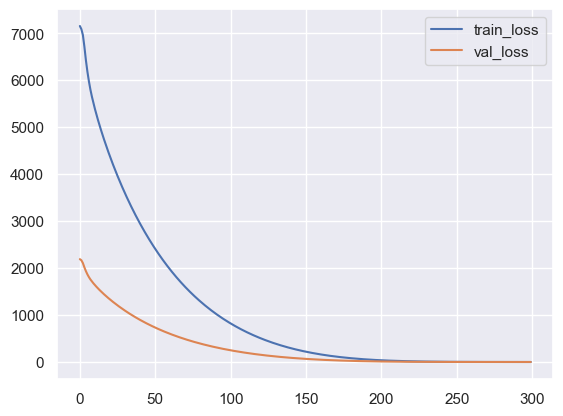

Finished Training
Epoch 1/300


100%|██████████| 7/7 [00:00<00:00, 132.99it/s]


Train Loss: 3736.5755004882812


100%|██████████| 2/2 [00:00<00:00, 455.68it/s]


Epoch 2/300


100%|██████████| 7/7 [00:00<00:00, 130.41it/s]


Train Loss: 3396.2285766601562


100%|██████████| 2/2 [00:00<00:00, 457.02it/s]


Epoch 3/300


100%|██████████| 7/7 [00:00<00:00, 134.13it/s]


Train Loss: 3041.1688537597656


100%|██████████| 2/2 [00:00<00:00, 433.83it/s]


Epoch 4/300


100%|██████████| 7/7 [00:00<00:00, 156.24it/s]


Train Loss: 2733.1044006347656


100%|██████████| 2/2 [00:00<00:00, 335.80it/s]


Epoch 5/300


100%|██████████| 7/7 [00:00<00:00, 120.04it/s]


Train Loss: 2455.03564453125


100%|██████████| 2/2 [00:00<00:00, 154.35it/s]


Epoch 6/300


100%|██████████| 7/7 [00:00<00:00, 169.88it/s]


Train Loss: 2197.517333984375


100%|██████████| 2/2 [00:00<00:00, 438.99it/s]


Epoch 7/300


100%|██████████| 7/7 [00:00<00:00, 131.81it/s]


Train Loss: 1954.3140869140625


100%|██████████| 2/2 [00:00<00:00, 125.83it/s]


Epoch 8/300


100%|██████████| 7/7 [00:00<00:00, 136.16it/s]


Train Loss: 1736.1556549072266


100%|██████████| 2/2 [00:00<00:00, 318.83it/s]


Epoch 9/300


100%|██████████| 7/7 [00:00<00:00, 137.70it/s]


Train Loss: 1541.2740478515625


100%|██████████| 2/2 [00:00<00:00, 413.72it/s]


Epoch 10/300


100%|██████████| 7/7 [00:00<00:00, 164.46it/s]


Train Loss: 1367.9400939941406


100%|██████████| 2/2 [00:00<00:00, 380.38it/s]


Epoch 11/300


100%|██████████| 7/7 [00:00<00:00, 104.34it/s]


Train Loss: 1214.1045379638672


100%|██████████| 2/2 [00:00<00:00, 302.39it/s]


Epoch 12/300


100%|██████████| 7/7 [00:00<00:00, 135.02it/s]


Train Loss: 1077.4212341308594


100%|██████████| 2/2 [00:00<00:00, 412.64it/s]


Epoch 13/300


100%|██████████| 7/7 [00:00<00:00, 161.13it/s]


Train Loss: 956.0180053710938


100%|██████████| 2/2 [00:00<00:00, 430.56it/s]


Epoch 14/300


100%|██████████| 7/7 [00:00<00:00, 140.76it/s]


Train Loss: 848.0426635742188


100%|██████████| 2/2 [00:00<00:00, 372.43it/s]


Epoch 15/300


100%|██████████| 7/7 [00:00<00:00, 67.14it/s]


Train Loss: 751.7998199462891


100%|██████████| 2/2 [00:00<00:00, 448.54it/s]


Epoch 16/300


100%|██████████| 7/7 [00:00<00:00, 145.35it/s]


Train Loss: 665.9184036254883


100%|██████████| 2/2 [00:00<00:00, 339.26it/s]


Epoch 17/300


100%|██████████| 7/7 [00:00<00:00, 145.49it/s]


Train Loss: 589.2759323120117


100%|██████████| 2/2 [00:00<00:00, 275.19it/s]


Epoch 18/300


100%|██████████| 7/7 [00:00<00:00, 51.50it/s]


Train Loss: 520.8231201171875


100%|██████████| 2/2 [00:00<00:00, 348.00it/s]


Epoch 19/300


100%|██████████| 7/7 [00:00<00:00, 128.22it/s]


Train Loss: 459.6744384765625


100%|██████████| 2/2 [00:00<00:00, 70.41it/s]


Epoch 20/300


100%|██████████| 7/7 [00:00<00:00, 42.56it/s]


Train Loss: 404.9984245300293


100%|██████████| 2/2 [00:00<00:00, 410.74it/s]


Epoch 21/300


100%|██████████| 7/7 [00:00<00:00, 62.16it/s]


Train Loss: 356.15162658691406


100%|██████████| 2/2 [00:00<00:00, 247.90it/s]


Epoch 22/300


100%|██████████| 7/7 [00:00<00:00, 54.79it/s]


Train Loss: 312.56451416015625


100%|██████████| 2/2 [00:00<00:00, 360.49it/s]


Epoch 23/300


100%|██████████| 7/7 [00:00<00:00, 22.91it/s]


Train Loss: 273.69269943237305


100%|██████████| 2/2 [00:00<00:00, 282.44it/s]


Epoch 24/300


100%|██████████| 7/7 [00:00<00:00, 161.84it/s]


Train Loss: 239.12187576293945


100%|██████████| 2/2 [00:00<00:00, 422.49it/s]


Epoch 25/300


100%|██████████| 7/7 [00:00<00:00, 149.68it/s]


Train Loss: 208.41136169433594


100%|██████████| 2/2 [00:00<00:00, 440.05it/s]


Epoch 26/300


100%|██████████| 7/7 [00:00<00:00, 54.86it/s]


Train Loss: 181.1509838104248


100%|██████████| 2/2 [00:00<00:00, 287.65it/s]


Epoch 27/300


100%|██████████| 7/7 [00:00<00:00, 28.33it/s]


Train Loss: 157.06171417236328


100%|██████████| 2/2 [00:00<00:00, 85.22it/s]


Epoch 28/300


100%|██████████| 7/7 [00:00<00:00, 55.88it/s]


Train Loss: 135.8174343109131


100%|██████████| 2/2 [00:00<00:00, 180.23it/s]


Epoch 29/300


100%|██████████| 7/7 [00:00<00:00, 138.15it/s]


Train Loss: 117.13527774810791


100%|██████████| 2/2 [00:00<00:00, 297.81it/s]


Epoch 30/300


100%|██████████| 7/7 [00:00<00:00, 125.07it/s]


Train Loss: 100.73968410491943


100%|██████████| 2/2 [00:00<00:00, 408.54it/s]


Epoch 31/300


100%|██████████| 7/7 [00:00<00:00, 125.26it/s]


Train Loss: 86.38459300994873


100%|██████████| 2/2 [00:00<00:00, 403.07it/s]


Epoch 32/300


100%|██████████| 7/7 [00:00<00:00, 129.33it/s]


Train Loss: 73.88211822509766


100%|██████████| 2/2 [00:00<00:00, 351.92it/s]


Epoch 33/300


100%|██████████| 7/7 [00:00<00:00, 146.65it/s]


Train Loss: 63.01161479949951


100%|██████████| 2/2 [00:00<00:00, 345.24it/s]


Epoch 34/300


100%|██████████| 7/7 [00:00<00:00, 96.77it/s]


Train Loss: 53.571603298187256


100%|██████████| 2/2 [00:00<00:00, 111.79it/s]


Epoch 35/300


100%|██████████| 7/7 [00:00<00:00, 59.51it/s]


Train Loss: 45.434239864349365


100%|██████████| 2/2 [00:00<00:00, 316.75it/s]


Epoch 36/300


100%|██████████| 7/7 [00:00<00:00, 103.12it/s]


Train Loss: 38.39520215988159


100%|██████████| 2/2 [00:00<00:00, 394.22it/s]


Epoch 37/300


100%|██████████| 7/7 [00:00<00:00, 98.98it/s]


Train Loss: 32.37816667556763


100%|██████████| 2/2 [00:00<00:00, 289.19it/s]


Epoch 38/300


100%|██████████| 7/7 [00:00<00:00, 83.93it/s]


Train Loss: 27.21110701560974


100%|██████████| 2/2 [00:00<00:00, 215.36it/s]


Epoch 39/300


100%|██████████| 7/7 [00:00<00:00, 49.04it/s]


Train Loss: 22.806785583496094


100%|██████████| 2/2 [00:00<00:00, 106.37it/s]


Epoch 40/300


100%|██████████| 7/7 [00:00<00:00, 75.40it/s]


Train Loss: 19.06252646446228


100%|██████████| 2/2 [00:00<00:00, 230.63it/s]


Epoch 41/300


100%|██████████| 7/7 [00:00<00:00, 85.79it/s]


Train Loss: 15.873048305511475


100%|██████████| 2/2 [00:00<00:00, 347.04it/s]


Epoch 42/300


100%|██████████| 7/7 [00:00<00:00, 102.45it/s]


Train Loss: 13.192659258842468


100%|██████████| 2/2 [00:00<00:00, 319.03it/s]


Epoch 43/300


100%|██████████| 7/7 [00:00<00:00, 37.93it/s]


Train Loss: 10.933308482170105


100%|██████████| 2/2 [00:00<00:00, 436.86it/s]


Epoch 44/300


100%|██████████| 7/7 [00:00<00:00, 148.85it/s]


Train Loss: 9.024821758270264


100%|██████████| 2/2 [00:00<00:00, 471.38it/s]


Epoch 45/300


100%|██████████| 7/7 [00:00<00:00, 116.30it/s]


Train Loss: 7.440447747707367


100%|██████████| 2/2 [00:00<00:00, 413.99it/s]


Epoch 46/300


100%|██████████| 7/7 [00:00<00:00, 145.37it/s]


Train Loss: 6.107421517372131


100%|██████████| 2/2 [00:00<00:00, 402.58it/s]


Epoch 47/300


100%|██████████| 7/7 [00:00<00:00, 124.89it/s]


Train Loss: 5.000510513782501


100%|██████████| 2/2 [00:00<00:00, 253.19it/s]


Epoch 48/300


100%|██████████| 7/7 [00:00<00:00, 128.33it/s]


Train Loss: 4.086594045162201


100%|██████████| 2/2 [00:00<00:00, 417.36it/s]


Epoch 49/300


100%|██████████| 7/7 [00:00<00:00, 178.83it/s]


Train Loss: 3.3254529535770416


100%|██████████| 2/2 [00:00<00:00, 421.33it/s]


Epoch 50/300


100%|██████████| 7/7 [00:00<00:00, 175.98it/s]


Train Loss: 2.7043420374393463


100%|██████████| 2/2 [00:00<00:00, 471.03it/s]


Epoch 51/300


100%|██████████| 7/7 [00:00<00:00, 171.33it/s]


Train Loss: 2.1902690827846527


100%|██████████| 2/2 [00:00<00:00, 479.05it/s]


Epoch 52/300


100%|██████████| 7/7 [00:00<00:00, 151.95it/s]


Train Loss: 1.7687274515628815


100%|██████████| 2/2 [00:00<00:00, 375.67it/s]


Epoch 53/300


100%|██████████| 7/7 [00:00<00:00, 150.79it/s]


Train Loss: 1.425473928451538


100%|██████████| 2/2 [00:00<00:00, 310.70it/s]


Epoch 54/300


100%|██████████| 7/7 [00:00<00:00, 166.06it/s]


Train Loss: 1.1465449780225754


100%|██████████| 2/2 [00:00<00:00, 371.74it/s]


Epoch 55/300


100%|██████████| 7/7 [00:00<00:00, 172.99it/s]


Train Loss: 0.9210729673504829


100%|██████████| 2/2 [00:00<00:00, 241.11it/s]


Epoch 56/300


100%|██████████| 7/7 [00:00<00:00, 167.62it/s]


Train Loss: 0.7377566397190094


100%|██████████| 2/2 [00:00<00:00, 387.30it/s]


Epoch 57/300


100%|██████████| 7/7 [00:00<00:00, 129.15it/s]


Train Loss: 0.5913302823901176


100%|██████████| 2/2 [00:00<00:00, 277.74it/s]


Epoch 58/300


100%|██████████| 7/7 [00:00<00:00, 163.19it/s]


Train Loss: 0.47253140434622765


100%|██████████| 2/2 [00:00<00:00, 400.24it/s]


Epoch 59/300


100%|██████████| 7/7 [00:00<00:00, 149.41it/s]


Train Loss: 0.3814831115305424


100%|██████████| 2/2 [00:00<00:00, 487.94it/s]


Epoch 60/300


100%|██████████| 7/7 [00:00<00:00, 183.33it/s]


Train Loss: 0.30376820266246796


100%|██████████| 2/2 [00:00<00:00, 464.46it/s]


Epoch 61/300


100%|██████████| 7/7 [00:00<00:00, 167.44it/s]


Train Loss: 0.24116364121437073


100%|██████████| 2/2 [00:00<00:00, 423.28it/s]


Epoch 62/300


100%|██████████| 7/7 [00:00<00:00, 165.96it/s]


Train Loss: 0.1948865745216608


100%|██████████| 2/2 [00:00<00:00, 468.53it/s]


Epoch 63/300


100%|██████████| 7/7 [00:00<00:00, 158.06it/s]


Train Loss: 0.15772401727735996


100%|██████████| 2/2 [00:00<00:00, 316.35it/s]


Epoch 64/300


100%|██████████| 7/7 [00:00<00:00, 115.15it/s]


Train Loss: 0.12578189186751842


100%|██████████| 2/2 [00:00<00:00, 368.86it/s]


Epoch 65/300


100%|██████████| 7/7 [00:00<00:00, 159.53it/s]


Train Loss: 0.10430317558348179


100%|██████████| 2/2 [00:00<00:00, 467.38it/s]


Epoch 66/300


100%|██████████| 7/7 [00:00<00:00, 178.52it/s]


Train Loss: 0.08288178034126759


100%|██████████| 2/2 [00:00<00:00, 433.86it/s]


Epoch 67/300


100%|██████████| 7/7 [00:00<00:00, 171.42it/s]


Train Loss: 0.0694641605950892


100%|██████████| 2/2 [00:00<00:00, 468.85it/s]


Epoch 68/300


100%|██████████| 7/7 [00:00<00:00, 179.11it/s]


Train Loss: 0.058675797656178474


100%|██████████| 2/2 [00:00<00:00, 472.84it/s]


Epoch 69/300


100%|██████████| 7/7 [00:00<00:00, 178.51it/s]


Train Loss: 0.054582166485488415


100%|██████████| 2/2 [00:00<00:00, 455.26it/s]


Epoch 70/300


100%|██████████| 7/7 [00:00<00:00, 161.30it/s]


Train Loss: 0.0444746483117342


100%|██████████| 2/2 [00:00<00:00, 438.30it/s]


Epoch 71/300


100%|██████████| 7/7 [00:00<00:00, 159.15it/s]


Train Loss: 0.0392545813228935


100%|██████████| 2/2 [00:00<00:00, 484.50it/s]


Epoch 72/300


100%|██████████| 7/7 [00:00<00:00, 185.39it/s]


Train Loss: 0.03542673704214394


100%|██████████| 2/2 [00:00<00:00, 421.39it/s]


Epoch 73/300


100%|██████████| 7/7 [00:00<00:00, 165.86it/s]


Train Loss: 0.03212843765504658


100%|██████████| 2/2 [00:00<00:00, 474.79it/s]


Epoch 74/300


100%|██████████| 7/7 [00:00<00:00, 173.63it/s]


Train Loss: 0.028909749118611217


100%|██████████| 2/2 [00:00<00:00, 444.92it/s]


Epoch 75/300


100%|██████████| 7/7 [00:00<00:00, 121.25it/s]


Train Loss: 0.03121229272801429


100%|██████████| 2/2 [00:00<00:00, 406.19it/s]


Epoch 76/300


100%|██████████| 7/7 [00:00<00:00, 156.53it/s]


Train Loss: 0.02604085998609662


100%|██████████| 2/2 [00:00<00:00, 409.74it/s]


Epoch 77/300


100%|██████████| 7/7 [00:00<00:00, 145.39it/s]


Train Loss: 0.02483101573307067


100%|██████████| 2/2 [00:00<00:00, 452.70it/s]


Epoch 78/300


100%|██████████| 7/7 [00:00<00:00, 179.32it/s]


Train Loss: 0.023335755104199052


100%|██████████| 2/2 [00:00<00:00, 445.54it/s]


Epoch 79/300


100%|██████████| 7/7 [00:00<00:00, 173.25it/s]


Train Loss: 0.023493544082157314


100%|██████████| 2/2 [00:00<00:00, 437.34it/s]


Epoch 80/300


100%|██████████| 7/7 [00:00<00:00, 149.29it/s]


Train Loss: 0.02400617557577789


100%|██████████| 2/2 [00:00<00:00, 348.36it/s]


Epoch 81/300


100%|██████████| 7/7 [00:00<00:00, 181.41it/s]


Train Loss: 0.025531454011797905


100%|██████████| 2/2 [00:00<00:00, 231.34it/s]


Epoch 82/300


100%|██████████| 7/7 [00:00<00:00, 92.14it/s]


Train Loss: 0.027504476252943277


100%|██████████| 2/2 [00:00<00:00, 413.56it/s]


Epoch 83/300


100%|██████████| 7/7 [00:00<00:00, 149.03it/s]


Train Loss: 0.025397404562681913


100%|██████████| 2/2 [00:00<00:00, 424.98it/s]


Epoch 84/300


100%|██████████| 7/7 [00:00<00:00, 163.07it/s]


Train Loss: 0.023774468223564327


100%|██████████| 2/2 [00:00<00:00, 481.83it/s]


Epoch 85/300


100%|██████████| 7/7 [00:00<00:00, 181.64it/s]


Train Loss: 0.025558652414474636


100%|██████████| 2/2 [00:00<00:00, 445.44it/s]


Epoch 86/300


100%|██████████| 7/7 [00:00<00:00, 162.97it/s]


Train Loss: 0.023530686739832163


100%|██████████| 2/2 [00:00<00:00, 473.58it/s]


Epoch 87/300


100%|██████████| 7/7 [00:00<00:00, 169.54it/s]


Train Loss: 0.026706552715040743


100%|██████████| 2/2 [00:00<00:00, 491.77it/s]


Epoch 88/300


100%|██████████| 7/7 [00:00<00:00, 173.97it/s]


Train Loss: 0.02675084979273379


100%|██████████| 2/2 [00:00<00:00, 425.45it/s]


Epoch 89/300


100%|██████████| 7/7 [00:00<00:00, 171.15it/s]


Train Loss: 0.022487916285172105


100%|██████████| 2/2 [00:00<00:00, 480.89it/s]


Epoch 90/300


100%|██████████| 7/7 [00:00<00:00, 165.98it/s]


Train Loss: 0.022668677615001798


100%|██████████| 2/2 [00:00<00:00, 479.27it/s]


Epoch 91/300


100%|██████████| 7/7 [00:00<00:00, 169.30it/s]


Train Loss: 0.02248386386781931


100%|██████████| 2/2 [00:00<00:00, 497.28it/s]


Epoch 92/300


100%|██████████| 7/7 [00:00<00:00, 171.36it/s]


Train Loss: 0.022070658043958247


100%|██████████| 2/2 [00:00<00:00, 477.03it/s]


Epoch 93/300


100%|██████████| 7/7 [00:00<00:00, 180.98it/s]


Train Loss: 0.022956166183575988


100%|██████████| 2/2 [00:00<00:00, 480.89it/s]


Epoch 94/300


100%|██████████| 7/7 [00:00<00:00, 172.92it/s]


Train Loss: 0.02584429259877652


100%|██████████| 2/2 [00:00<00:00, 471.27it/s]


Epoch 95/300


100%|██████████| 7/7 [00:00<00:00, 147.83it/s]


Train Loss: 0.023459263262338936


100%|██████████| 2/2 [00:00<00:00, 483.88it/s]


Epoch 96/300


100%|██████████| 7/7 [00:00<00:00, 176.55it/s]


Train Loss: 0.024010752036701888


100%|██████████| 2/2 [00:00<00:00, 179.94it/s]


Epoch 97/300


100%|██████████| 7/7 [00:00<00:00, 165.48it/s]


Train Loss: 0.02572710788808763


100%|██████████| 2/2 [00:00<00:00, 507.23it/s]


Epoch 98/300


100%|██████████| 7/7 [00:00<00:00, 170.49it/s]


Train Loss: 0.024250157759524882


100%|██████████| 2/2 [00:00<00:00, 453.39it/s]


Epoch 99/300


100%|██████████| 7/7 [00:00<00:00, 174.75it/s]


Train Loss: 0.028772818972356617


100%|██████████| 2/2 [00:00<00:00, 485.09it/s]


Epoch 100/300


100%|██████████| 7/7 [00:00<00:00, 156.22it/s]


Train Loss: 0.026106992503628135


100%|██████████| 2/2 [00:00<00:00, 442.48it/s]


Epoch 101/300


100%|██████████| 7/7 [00:00<00:00, 169.49it/s]


Train Loss: 0.022711234050802886


100%|██████████| 2/2 [00:00<00:00, 467.20it/s]


Epoch 102/300


100%|██████████| 7/7 [00:00<00:00, 185.82it/s]


Train Loss: 0.023764823679812253


100%|██████████| 2/2 [00:00<00:00, 468.82it/s]


Epoch 103/300


100%|██████████| 7/7 [00:00<00:00, 172.32it/s]


Train Loss: 0.022401307243853807


100%|██████████| 2/2 [00:00<00:00, 286.00it/s]


Epoch 104/300


100%|██████████| 7/7 [00:00<00:00, 149.99it/s]


Train Loss: 0.026934767665807158


100%|██████████| 2/2 [00:00<00:00, 406.42it/s]


Epoch 105/300


100%|██████████| 7/7 [00:00<00:00, 156.33it/s]


Train Loss: 0.022609832347370684


100%|██████████| 2/2 [00:00<00:00, 491.28it/s]


Epoch 106/300


100%|██████████| 7/7 [00:00<00:00, 177.11it/s]


Train Loss: 0.023719621705822647


100%|██████████| 2/2 [00:00<00:00, 408.32it/s]


Epoch 107/300


100%|██████████| 7/7 [00:00<00:00, 172.95it/s]


Train Loss: 0.02177160605788231


100%|██████████| 2/2 [00:00<00:00, 470.71it/s]


Epoch 108/300


100%|██████████| 7/7 [00:00<00:00, 179.23it/s]


Train Loss: 0.02287191106006503


100%|██████████| 2/2 [00:00<00:00, 483.77it/s]


Epoch 109/300


100%|██████████| 7/7 [00:00<00:00, 173.84it/s]


Train Loss: 0.02247522072866559


100%|██████████| 2/2 [00:00<00:00, 482.35it/s]


Epoch 110/300


100%|██████████| 7/7 [00:00<00:00, 179.60it/s]


Train Loss: 0.0238202721811831


100%|██████████| 2/2 [00:00<00:00, 215.50it/s]


Epoch 111/300


100%|██████████| 7/7 [00:00<00:00, 186.69it/s]


Train Loss: 0.025402376428246498


100%|██████████| 2/2 [00:00<00:00, 446.42it/s]


Epoch 112/300


100%|██████████| 7/7 [00:00<00:00, 76.52it/s]


Train Loss: 0.02383753814501688


100%|██████████| 2/2 [00:00<00:00, 484.02it/s]


Epoch 113/300


100%|██████████| 7/7 [00:00<00:00, 167.89it/s]


Train Loss: 0.023705012165009975


100%|██████████| 2/2 [00:00<00:00, 477.58it/s]


Epoch 114/300


100%|██████████| 7/7 [00:00<00:00, 142.47it/s]


Train Loss: 0.026808073627762496


100%|██████████| 2/2 [00:00<00:00, 131.22it/s]


Epoch 115/300


100%|██████████| 7/7 [00:00<00:00, 188.00it/s]


Train Loss: 0.022847328335046768


100%|██████████| 2/2 [00:00<00:00, 479.02it/s]


Epoch 116/300


100%|██████████| 7/7 [00:00<00:00, 151.08it/s]


Train Loss: 0.022423472488299012


100%|██████████| 2/2 [00:00<00:00, 500.87it/s]


Epoch 117/300


100%|██████████| 7/7 [00:00<00:00, 180.18it/s]


Train Loss: 0.023940247483551502


100%|██████████| 2/2 [00:00<00:00, 513.63it/s]


Epoch 118/300


100%|██████████| 7/7 [00:00<00:00, 190.34it/s]


Train Loss: 0.023129648179747164


100%|██████████| 2/2 [00:00<00:00, 454.45it/s]


Epoch 119/300


100%|██████████| 7/7 [00:00<00:00, 153.97it/s]


Train Loss: 0.024234018637798727


100%|██████████| 2/2 [00:00<00:00, 483.69it/s]


Epoch 120/300


100%|██████████| 7/7 [00:00<00:00, 160.92it/s]


Train Loss: 0.023561880690976977


100%|██████████| 2/2 [00:00<00:00, 480.89it/s]


Epoch 121/300


100%|██████████| 7/7 [00:00<00:00, 183.39it/s]


Train Loss: 0.02728701860178262


100%|██████████| 2/2 [00:00<00:00, 486.61it/s]


Epoch 122/300


100%|██████████| 7/7 [00:00<00:00, 176.88it/s]


Train Loss: 0.024361816002056003


100%|██████████| 2/2 [00:00<00:00, 446.13it/s]


Epoch 123/300


100%|██████████| 7/7 [00:00<00:00, 83.94it/s]


Train Loss: 0.02334442548453808


100%|██████████| 2/2 [00:00<00:00, 463.41it/s]


Epoch 124/300


100%|██████████| 7/7 [00:00<00:00, 158.13it/s]


Train Loss: 0.02371828129980713


100%|██████████| 2/2 [00:00<00:00, 442.90it/s]


Epoch 125/300


100%|██████████| 7/7 [00:00<00:00, 159.65it/s]


Train Loss: 0.026932899607345462


100%|██████████| 2/2 [00:00<00:00, 463.38it/s]


Epoch 126/300


100%|██████████| 7/7 [00:00<00:00, 166.69it/s]


Train Loss: 0.0223880922421813


100%|██████████| 2/2 [00:00<00:00, 411.37it/s]


Epoch 127/300


100%|██████████| 7/7 [00:00<00:00, 177.60it/s]


Train Loss: 0.02454328932799399


100%|██████████| 2/2 [00:00<00:00, 462.54it/s]


Epoch 128/300


100%|██████████| 7/7 [00:00<00:00, 164.30it/s]


Train Loss: 0.0247947892639786


100%|██████████| 2/2 [00:00<00:00, 428.56it/s]


Epoch 129/300


100%|██████████| 7/7 [00:00<00:00, 166.17it/s]


Train Loss: 0.021769286191556603


100%|██████████| 2/2 [00:00<00:00, 437.54it/s]


Epoch 130/300


100%|██████████| 7/7 [00:00<00:00, 167.71it/s]


Train Loss: 0.02275262668263167


100%|██████████| 2/2 [00:00<00:00, 462.85it/s]


Epoch 131/300


100%|██████████| 7/7 [00:00<00:00, 167.91it/s]


Train Loss: 0.025166503386572003


100%|██████████| 2/2 [00:00<00:00, 434.22it/s]


Epoch 132/300


100%|██████████| 7/7 [00:00<00:00, 167.03it/s]


Train Loss: 0.0232557721901685


100%|██████████| 2/2 [00:00<00:00, 382.27it/s]


Epoch 133/300


100%|██████████| 7/7 [00:00<00:00, 176.16it/s]


Train Loss: 0.022570529603399336


100%|██████████| 2/2 [00:00<00:00, 455.98it/s]


Epoch 134/300


100%|██████████| 7/7 [00:00<00:00, 90.97it/s]


Train Loss: 0.023291100980713964


100%|██████████| 2/2 [00:00<00:00, 412.28it/s]


Epoch 135/300


100%|██████████| 7/7 [00:00<00:00, 131.90it/s]


Train Loss: 0.026839093887247145


100%|██████████| 2/2 [00:00<00:00, 436.20it/s]


Epoch 136/300


100%|██████████| 7/7 [00:00<00:00, 125.47it/s]


Train Loss: 0.022578306728973985


100%|██████████| 2/2 [00:00<00:00, 366.23it/s]


Epoch 137/300


100%|██████████| 7/7 [00:00<00:00, 55.03it/s]


Train Loss: 0.028153312392532825


100%|██████████| 2/2 [00:00<00:00, 413.90it/s]


Epoch 138/300


100%|██████████| 7/7 [00:00<00:00, 134.27it/s]


Train Loss: 0.023265022900886834


100%|██████████| 2/2 [00:00<00:00, 397.62it/s]


Epoch 139/300


100%|██████████| 7/7 [00:00<00:00, 40.93it/s]


Train Loss: 0.02354801003821194


100%|██████████| 2/2 [00:00<00:00, 59.28it/s]


Epoch 140/300


100%|██████████| 7/7 [00:00<00:00, 72.97it/s]


Train Loss: 0.022078810026869178


100%|██████████| 2/2 [00:00<00:00, 111.62it/s]


Epoch 141/300


100%|██████████| 7/7 [00:00<00:00, 102.01it/s]


Train Loss: 0.023482771823182702


100%|██████████| 2/2 [00:00<00:00, 516.13it/s]


Epoch 142/300


100%|██████████| 7/7 [00:00<00:00, 58.05it/s]


Train Loss: 0.02430113614536822


100%|██████████| 2/2 [00:00<00:00, 25.47it/s]


Epoch 143/300


100%|██████████| 7/7 [00:00<00:00, 127.33it/s]


Train Loss: 0.026616707851644605


100%|██████████| 2/2 [00:00<00:00, 298.46it/s]


Epoch 144/300


100%|██████████| 7/7 [00:00<00:00, 53.60it/s]


Train Loss: 0.021577993407845497


100%|██████████| 2/2 [00:00<00:00, 196.56it/s]


Epoch 145/300


100%|██████████| 7/7 [00:00<00:00, 41.48it/s]


Train Loss: 0.021476521680597216


100%|██████████| 2/2 [00:00<00:00, 193.20it/s]


Epoch 146/300


100%|██████████| 7/7 [00:00<00:00, 48.10it/s]


Train Loss: 0.02205792674794793


100%|██████████| 2/2 [00:00<00:00, 233.75it/s]


Epoch 147/300


100%|██████████| 7/7 [00:00<00:00, 124.38it/s]


Train Loss: 0.023702538921497762


100%|██████████| 2/2 [00:00<00:00, 451.97it/s]


Epoch 148/300


100%|██████████| 7/7 [00:00<00:00, 66.41it/s]


Train Loss: 0.022890865802764893


100%|██████████| 2/2 [00:00<00:00, 445.44it/s]


Epoch 149/300


100%|██████████| 7/7 [00:00<00:00, 34.36it/s]


Train Loss: 0.026130509504582733


100%|██████████| 2/2 [00:00<00:00, 93.11it/s]


Epoch 150/300


100%|██████████| 7/7 [00:00<00:00, 44.15it/s]


Train Loss: 0.022307566599920392


100%|██████████| 2/2 [00:00<00:00, 171.56it/s]


Epoch 151/300


100%|██████████| 7/7 [00:00<00:00, 76.92it/s]


Train Loss: 0.023152185953222215


100%|██████████| 2/2 [00:00<00:00, 28.41it/s]


Epoch 152/300


100%|██████████| 7/7 [00:00<00:00, 39.47it/s]


Train Loss: 0.022232439019717276


100%|██████████| 2/2 [00:00<00:00, 62.36it/s]


Epoch 153/300


100%|██████████| 7/7 [00:00<00:00, 39.77it/s]


Train Loss: 0.023270732956007123


100%|██████████| 2/2 [00:00<00:00, 150.87it/s]


Epoch 154/300


100%|██████████| 7/7 [00:00<00:00, 30.40it/s]


Train Loss: 0.02310773660428822


100%|██████████| 2/2 [00:00<00:00, 36.21it/s]


Epoch 155/300


100%|██████████| 7/7 [00:00<00:00, 18.90it/s]


Train Loss: 0.02255402982700616


100%|██████████| 2/2 [00:00<00:00, 218.22it/s]


Epoch 156/300


100%|██████████| 7/7 [00:00<00:00, 17.20it/s]


Train Loss: 0.026933170156553388


100%|██████████| 2/2 [00:00<00:00, 291.85it/s]


Epoch 157/300


100%|██████████| 7/7 [00:00<00:00, 73.99it/s]


Train Loss: 0.024509906768798828


100%|██████████| 2/2 [00:00<00:00, 189.89it/s]


Epoch 158/300


100%|██████████| 7/7 [00:00<00:00, 12.50it/s]


Train Loss: 0.023665379965677857


100%|██████████| 2/2 [00:00<00:00, 24.44it/s]


Epoch 159/300


100%|██████████| 7/7 [00:00<00:00,  8.65it/s]


Train Loss: 0.025193456502165645


100%|██████████| 2/2 [00:00<00:00, 289.73it/s]


Epoch 160/300


100%|██████████| 7/7 [00:00<00:00, 102.65it/s]


Train Loss: 0.02586396597325802


100%|██████████| 2/2 [00:00<00:00, 411.09it/s]


Epoch 161/300


100%|██████████| 7/7 [00:00<00:00, 66.71it/s]


Train Loss: 0.02206174680031836


100%|██████████| 2/2 [00:00<00:00, 461.78it/s]


Epoch 162/300


100%|██████████| 7/7 [00:00<00:00, 52.71it/s]


Train Loss: 0.022275801980867982


100%|██████████| 2/2 [00:00<00:00, 488.73it/s]


Epoch 163/300


100%|██████████| 7/7 [00:00<00:00, 89.09it/s]


Train Loss: 0.025686404551379383


100%|██████████| 2/2 [00:00<00:00, 310.46it/s]


Epoch 164/300


100%|██████████| 7/7 [00:00<00:00, 137.99it/s]


Train Loss: 0.022549236833583564


100%|██████████| 2/2 [00:00<00:00, 475.09it/s]


Epoch 165/300


100%|██████████| 7/7 [00:00<00:00, 136.13it/s]


Train Loss: 0.025535610504448414


100%|██████████| 2/2 [00:00<00:00, 461.67it/s]


Epoch 166/300


100%|██████████| 7/7 [00:00<00:00, 129.25it/s]


Train Loss: 0.02410980104468763


100%|██████████| 2/2 [00:00<00:00, 54.17it/s]


Epoch 167/300


100%|██████████| 7/7 [00:00<00:00, 92.91it/s]


Train Loss: 0.02224006166215986


100%|██████████| 2/2 [00:00<00:00, 352.17it/s]


Epoch 168/300


100%|██████████| 7/7 [00:00<00:00, 135.86it/s]


Train Loss: 0.021163996774703264


100%|██████████| 2/2 [00:00<00:00, 374.14it/s]


Epoch 169/300


100%|██████████| 7/7 [00:00<00:00, 113.68it/s]


Train Loss: 0.02650387119501829


100%|██████████| 2/2 [00:00<00:00, 68.28it/s]


Epoch 170/300


100%|██████████| 7/7 [00:00<00:00, 114.94it/s]


Train Loss: 0.025602193549275398


100%|██████████| 2/2 [00:00<00:00, 367.37it/s]


Epoch 171/300


100%|██████████| 7/7 [00:00<00:00, 88.33it/s]


Train Loss: 0.023469035630114377


100%|██████████| 2/2 [00:00<00:00, 465.10it/s]


Epoch 172/300


100%|██████████| 7/7 [00:00<00:00, 96.86it/s]


Train Loss: 0.02338363218586892


100%|██████████| 2/2 [00:00<00:00, 74.22it/s]


Epoch 173/300


100%|██████████| 7/7 [00:00<00:00, 158.66it/s]


Train Loss: 0.023262653383426368


100%|██████████| 2/2 [00:00<00:00, 408.66it/s]


Epoch 174/300


100%|██████████| 7/7 [00:00<00:00, 130.16it/s]


Train Loss: 0.0239952786359936


100%|██████████| 2/2 [00:00<00:00, 407.53it/s]


Epoch 175/300


100%|██████████| 7/7 [00:00<00:00, 160.29it/s]


Train Loss: 0.03192004235461354


100%|██████████| 2/2 [00:00<00:00, 283.32it/s]


Epoch 176/300


100%|██████████| 7/7 [00:00<00:00, 141.86it/s]


Train Loss: 0.026556568685919046


100%|██████████| 2/2 [00:00<00:00, 423.37it/s]


Epoch 177/300


100%|██████████| 7/7 [00:00<00:00, 86.99it/s]


Train Loss: 0.025796927278861403


100%|██████████| 2/2 [00:00<00:00, 59.24it/s]


Epoch 178/300


100%|██████████| 7/7 [00:00<00:00, 129.34it/s]


Train Loss: 0.026844011270441115


100%|██████████| 2/2 [00:00<00:00, 407.10it/s]


Epoch 179/300


100%|██████████| 7/7 [00:00<00:00, 107.51it/s]


Train Loss: 0.024095364497043192


100%|██████████| 2/2 [00:00<00:00, 64.83it/s]


Epoch 180/300


100%|██████████| 7/7 [00:00<00:00, 101.17it/s]


Train Loss: 0.023763214121572673


100%|██████████| 2/2 [00:00<00:00, 343.84it/s]


Epoch 181/300


100%|██████████| 7/7 [00:00<00:00, 142.27it/s]


Train Loss: 0.025736549985595047


100%|██████████| 2/2 [00:00<00:00, 460.84it/s]


Epoch 182/300


100%|██████████| 7/7 [00:00<00:00, 132.60it/s]


Train Loss: 0.023608445073477924


100%|██████████| 2/2 [00:00<00:00, 235.19it/s]


Epoch 183/300


100%|██████████| 7/7 [00:00<00:00, 106.55it/s]


Train Loss: 0.02193480869755149


100%|██████████| 2/2 [00:00<00:00, 297.48it/s]


Epoch 184/300


100%|██████████| 7/7 [00:00<00:00, 142.33it/s]


Train Loss: 0.02343100495636463


100%|██████████| 2/2 [00:00<00:00, 417.12it/s]


Epoch 185/300


100%|██████████| 7/7 [00:00<00:00, 111.30it/s]


Train Loss: 0.022721981164067984


100%|██████████| 2/2 [00:00<00:00, 411.37it/s]


Epoch 186/300


100%|██████████| 7/7 [00:00<00:00, 113.03it/s]


Train Loss: 0.023552295402623713


100%|██████████| 2/2 [00:00<00:00, 349.16it/s]


Epoch 187/300


100%|██████████| 7/7 [00:00<00:00, 75.32it/s]


Train Loss: 0.02225977834314108


100%|██████████| 2/2 [00:00<00:00, 476.76it/s]


Epoch 188/300


100%|██████████| 7/7 [00:00<00:00, 135.75it/s]


Train Loss: 0.024420039728283882


100%|██████████| 2/2 [00:00<00:00, 322.74it/s]


Epoch 189/300


100%|██████████| 7/7 [00:00<00:00, 29.46it/s]


Train Loss: 0.023810395563486964


100%|██████████| 2/2 [00:00<00:00, 174.08it/s]


Epoch 190/300


100%|██████████| 7/7 [00:00<00:00, 146.94it/s]


Train Loss: 0.023084624321199954


100%|██████████| 2/2 [00:00<00:00, 456.00it/s]


Epoch 191/300


100%|██████████| 7/7 [00:00<00:00, 78.93it/s]


Train Loss: 0.029124929220415652


100%|██████████| 2/2 [00:00<00:00, 454.89it/s]


Epoch 192/300


100%|██████████| 7/7 [00:00<00:00, 64.14it/s]


Train Loss: 0.028084342717193067


100%|██████████| 2/2 [00:00<00:00, 373.56it/s]


Epoch 193/300


100%|██████████| 7/7 [00:00<00:00, 146.05it/s]


Train Loss: 0.02203966025263071


100%|██████████| 2/2 [00:00<00:00, 476.08it/s]


Epoch 194/300


100%|██████████| 7/7 [00:00<00:00, 48.61it/s]


Train Loss: 0.023400321137160063


100%|██████████| 2/2 [00:00<00:00, 24.93it/s]


Epoch 195/300


100%|██████████| 7/7 [00:00<00:00, 11.91it/s]


Train Loss: 0.02845966024324298


100%|██████████| 2/2 [00:00<00:00, 189.39it/s]


Epoch 196/300


100%|██████████| 7/7 [00:00<00:00, 136.39it/s]


Train Loss: 0.02274110831785947


100%|██████████| 2/2 [00:00<00:00, 459.25it/s]


Epoch 197/300


100%|██████████| 7/7 [00:00<00:00, 119.83it/s]


Train Loss: 0.024970993981696665


100%|██████████| 2/2 [00:00<00:00, 161.68it/s]


Epoch 198/300


100%|██████████| 7/7 [00:00<00:00, 141.82it/s]


Train Loss: 0.024282771861180663


100%|██████████| 2/2 [00:00<00:00, 419.98it/s]


Epoch 199/300


100%|██████████| 7/7 [00:00<00:00, 101.71it/s]


Train Loss: 0.0231891511939466


100%|██████████| 2/2 [00:00<00:00, 463.59it/s]


Epoch 200/300


100%|██████████| 7/7 [00:00<00:00, 138.95it/s]


Train Loss: 0.023515300475992262


100%|██████████| 2/2 [00:00<00:00, 408.11it/s]


Epoch 201/300


100%|██████████| 7/7 [00:00<00:00, 148.78it/s]


Train Loss: 0.02168201096355915


100%|██████████| 2/2 [00:00<00:00, 139.29it/s]


Epoch 202/300


100%|██████████| 7/7 [00:00<00:00, 58.19it/s]


Train Loss: 0.02592693263432011


100%|██████████| 2/2 [00:00<00:00, 431.14it/s]


Epoch 203/300


100%|██████████| 7/7 [00:00<00:00, 117.91it/s]


Train Loss: 0.021363294159527868


100%|██████████| 2/2 [00:00<00:00, 453.93it/s]


Epoch 204/300


100%|██████████| 7/7 [00:00<00:00, 80.67it/s]


Train Loss: 0.023467716528102756


100%|██████████| 2/2 [00:00<00:00, 132.66it/s]


Epoch 205/300


100%|██████████| 7/7 [00:00<00:00, 47.67it/s]


Train Loss: 0.02148373972158879


100%|██████████| 2/2 [00:00<00:00, 346.38it/s]


Epoch 206/300


100%|██████████| 7/7 [00:00<00:00, 74.24it/s]


Train Loss: 0.021698119002394378


100%|██████████| 2/2 [00:00<00:00, 302.26it/s]


Epoch 207/300


100%|██████████| 7/7 [00:00<00:00, 39.92it/s]


Train Loss: 0.02335475105792284


100%|██████████| 2/2 [00:00<00:00, 385.81it/s]


Epoch 208/300


100%|██████████| 7/7 [00:00<00:00, 116.33it/s]


Train Loss: 0.024437722517177463


100%|██████████| 2/2 [00:00<00:00, 399.76it/s]


Epoch 209/300


100%|██████████| 7/7 [00:00<00:00, 29.44it/s]


Train Loss: 0.023093340802006423


100%|██████████| 2/2 [00:00<00:00, 387.66it/s]


Epoch 210/300


100%|██████████| 7/7 [00:00<00:00, 109.38it/s]


Train Loss: 0.02232720807660371


100%|██████████| 2/2 [00:00<00:00, 131.88it/s]


Epoch 211/300


100%|██████████| 7/7 [00:00<00:00, 48.59it/s]


Train Loss: 0.025993911316618323


100%|██████████| 2/2 [00:00<00:00, 121.38it/s]


Epoch 212/300


100%|██████████| 7/7 [00:00<00:00, 45.54it/s]


Train Loss: 0.023873441736213863


100%|██████████| 2/2 [00:00<00:00, 228.34it/s]


Epoch 213/300


100%|██████████| 7/7 [00:00<00:00, 45.55it/s]


Train Loss: 0.02240345359314233


100%|██████████| 2/2 [00:00<00:00, 386.79it/s]


Epoch 214/300


100%|██████████| 7/7 [00:00<00:00, 104.07it/s]


Train Loss: 0.022710001445375383


100%|██████████| 2/2 [00:00<00:00, 437.04it/s]


Epoch 215/300


100%|██████████| 7/7 [00:00<00:00, 152.48it/s]


Train Loss: 0.022587881423532963


100%|██████████| 2/2 [00:00<00:00, 366.83it/s]


Epoch 216/300


100%|██████████| 7/7 [00:00<00:00, 88.82it/s]


Train Loss: 0.024740010034292936


100%|██████████| 2/2 [00:00<00:00, 374.89it/s]


Epoch 217/300


100%|██████████| 7/7 [00:00<00:00, 158.30it/s]


Train Loss: 0.02258067182265222


100%|██████████| 2/2 [00:00<00:00, 397.55it/s]


Epoch 218/300


100%|██████████| 7/7 [00:00<00:00, 137.56it/s]


Train Loss: 0.022320715128444135


100%|██████████| 2/2 [00:00<00:00, 426.51it/s]


Epoch 219/300


100%|██████████| 7/7 [00:00<00:00, 137.28it/s]


Train Loss: 0.02495328412624076


100%|██████████| 2/2 [00:00<00:00, 357.13it/s]


Epoch 220/300


100%|██████████| 7/7 [00:00<00:00, 77.32it/s]


Train Loss: 0.02695988561026752


100%|██████████| 2/2 [00:00<00:00, 339.95it/s]


Epoch 221/300


100%|██████████| 7/7 [00:00<00:00, 47.00it/s]


Train Loss: 0.023215319262817502


100%|██████████| 2/2 [00:00<00:00, 161.21it/s]


Epoch 222/300


100%|██████████| 7/7 [00:00<00:00, 99.96it/s]


Train Loss: 0.024535527103580534


100%|██████████| 2/2 [00:00<00:00, 373.29it/s]


Epoch 223/300


100%|██████████| 7/7 [00:00<00:00, 58.07it/s]


Train Loss: 0.022288432344794273


100%|██████████| 2/2 [00:00<00:00, 234.88it/s]


Epoch 224/300


100%|██████████| 7/7 [00:00<00:00, 103.45it/s]


Train Loss: 0.022186869871802628


100%|██████████| 2/2 [00:00<00:00, 394.57it/s]


Epoch 225/300


100%|██████████| 7/7 [00:00<00:00, 72.73it/s]


Train Loss: 0.021868096897378564


100%|██████████| 2/2 [00:00<00:00, 172.54it/s]


Epoch 226/300


100%|██████████| 7/7 [00:00<00:00, 54.30it/s]


Train Loss: 0.021681326150428504


100%|██████████| 2/2 [00:00<00:00, 120.58it/s]


Epoch 227/300


100%|██████████| 7/7 [00:00<00:00, 76.69it/s]


Train Loss: 0.02253407973330468


100%|██████████| 2/2 [00:00<00:00, 327.49it/s]


Epoch 228/300


100%|██████████| 7/7 [00:00<00:00, 41.32it/s]


Train Loss: 0.021992503781802952


100%|██████████| 2/2 [00:00<00:00, 415.98it/s]


Epoch 229/300


100%|██████████| 7/7 [00:00<00:00, 145.80it/s]


Train Loss: 0.023268412332981825


100%|██████████| 2/2 [00:00<00:00, 309.13it/s]


Epoch 230/300


100%|██████████| 7/7 [00:00<00:00, 145.40it/s]


Train Loss: 0.023739685188047588


100%|██████████| 2/2 [00:00<00:00, 375.31it/s]


Epoch 231/300


100%|██████████| 7/7 [00:00<00:00, 163.65it/s]


Train Loss: 0.024153043515980244


100%|██████████| 2/2 [00:00<00:00, 125.46it/s]


Epoch 232/300


100%|██████████| 7/7 [00:00<00:00, 130.58it/s]


Train Loss: 0.02503989392425865


100%|██████████| 2/2 [00:00<00:00, 390.31it/s]


Epoch 233/300


100%|██████████| 7/7 [00:00<00:00, 60.25it/s]


Train Loss: 0.025357400183565915


100%|██████████| 2/2 [00:00<00:00, 292.18it/s]


Epoch 234/300


100%|██████████| 7/7 [00:00<00:00, 90.54it/s]


Train Loss: 0.02236180636100471


100%|██████████| 2/2 [00:00<00:00, 415.98it/s]


Epoch 235/300


100%|██████████| 7/7 [00:00<00:00, 140.87it/s]


Train Loss: 0.02273577346932143


100%|██████████| 2/2 [00:00<00:00, 350.89it/s]


Epoch 236/300


100%|██████████| 7/7 [00:00<00:00, 116.47it/s]


Train Loss: 0.024450061842799187


100%|██████████| 2/2 [00:00<00:00, 391.46it/s]


Epoch 237/300


100%|██████████| 7/7 [00:00<00:00, 32.85it/s]


Train Loss: 0.023532380000688136


100%|██████████| 2/2 [00:00<00:00, 368.12it/s]


Epoch 238/300


100%|██████████| 7/7 [00:00<00:00, 129.29it/s]


Train Loss: 0.028909693704918027


100%|██████████| 2/2 [00:00<00:00, 433.27it/s]


Epoch 239/300


100%|██████████| 7/7 [00:00<00:00, 149.63it/s]


Train Loss: 0.02611074864398688


100%|██████████| 2/2 [00:00<00:00, 255.88it/s]


Epoch 240/300


100%|██████████| 7/7 [00:00<00:00, 91.06it/s]


Train Loss: 0.025538504007272422


100%|██████████| 2/2 [00:00<00:00, 356.63it/s]


Epoch 241/300


100%|██████████| 7/7 [00:00<00:00, 134.66it/s]


Train Loss: 0.024334801943041384


100%|██████████| 2/2 [00:00<00:00, 351.75it/s]


Epoch 242/300


100%|██████████| 7/7 [00:00<00:00, 138.53it/s]


Train Loss: 0.023724925122223794


100%|██████████| 2/2 [00:00<00:00, 412.70it/s]


Epoch 243/300


100%|██████████| 7/7 [00:00<00:00, 151.25it/s]


Train Loss: 0.027478012605570257


100%|██████████| 2/2 [00:00<00:00, 340.79it/s]


Epoch 244/300


100%|██████████| 7/7 [00:00<00:00, 133.61it/s]


Train Loss: 0.024591712281107903


100%|██████████| 2/2 [00:00<00:00, 430.76it/s]


Epoch 245/300


100%|██████████| 7/7 [00:00<00:00, 150.38it/s]


Train Loss: 0.026077876798808575


100%|██████████| 2/2 [00:00<00:00, 458.29it/s]


Epoch 246/300


100%|██████████| 7/7 [00:00<00:00, 124.27it/s]


Train Loss: 0.024660915601998568


100%|██████████| 2/2 [00:00<00:00, 301.20it/s]


Epoch 247/300


100%|██████████| 7/7 [00:00<00:00, 63.94it/s]


Train Loss: 0.024478299892507493


100%|██████████| 2/2 [00:00<00:00, 287.48it/s]


Epoch 248/300


100%|██████████| 7/7 [00:00<00:00, 126.08it/s]


Train Loss: 0.024071187363006175


100%|██████████| 2/2 [00:00<00:00, 419.12it/s]


Epoch 249/300


100%|██████████| 7/7 [00:00<00:00, 138.36it/s]


Train Loss: 0.025790832471102476


100%|██████████| 2/2 [00:00<00:00, 365.64it/s]


Epoch 250/300


100%|██████████| 7/7 [00:00<00:00, 161.27it/s]


Train Loss: 0.024785899906419218


100%|██████████| 2/2 [00:00<00:00, 470.61it/s]


Epoch 251/300


100%|██████████| 7/7 [00:00<00:00, 131.78it/s]


Train Loss: 0.02294064365560189


100%|██████████| 2/2 [00:00<00:00, 199.82it/s]


Epoch 252/300


100%|██████████| 7/7 [00:00<00:00, 148.46it/s]


Train Loss: 0.023444644873961806


100%|██████████| 2/2 [00:00<00:00, 376.36it/s]


Epoch 253/300


100%|██████████| 7/7 [00:00<00:00, 145.10it/s]


Train Loss: 0.022938915179111063


100%|██████████| 2/2 [00:00<00:00, 411.53it/s]


Epoch 254/300


100%|██████████| 7/7 [00:00<00:00, 115.36it/s]


Train Loss: 0.027011891710571945


100%|██████████| 2/2 [00:00<00:00, 266.31it/s]


Epoch 255/300


100%|██████████| 7/7 [00:00<00:00, 124.35it/s]


Train Loss: 0.024478748789988458


100%|██████████| 2/2 [00:00<00:00, 407.23it/s]


Epoch 256/300


100%|██████████| 7/7 [00:00<00:00, 67.07it/s]


Train Loss: 0.02273457939736545


100%|██████████| 2/2 [00:00<00:00, 358.93it/s]


Epoch 257/300


100%|██████████| 7/7 [00:00<00:00, 146.44it/s]


Train Loss: 0.02170640858821571


100%|██████████| 2/2 [00:00<00:00, 454.42it/s]


Epoch 258/300


100%|██████████| 7/7 [00:00<00:00, 128.10it/s]


Train Loss: 0.021519206347875297


100%|██████████| 2/2 [00:00<00:00, 374.06it/s]


Epoch 259/300


100%|██████████| 7/7 [00:00<00:00, 129.98it/s]


Train Loss: 0.02339965640567243


100%|██████████| 2/2 [00:00<00:00, 434.78it/s]


Epoch 260/300


100%|██████████| 7/7 [00:00<00:00, 170.38it/s]


Train Loss: 0.024554087198339403


100%|██████████| 2/2 [00:00<00:00, 452.00it/s]


Epoch 261/300


100%|██████████| 7/7 [00:00<00:00, 151.26it/s]


Train Loss: 0.02380592981353402


100%|██████████| 2/2 [00:00<00:00, 474.60it/s]


Epoch 262/300


100%|██████████| 7/7 [00:00<00:00, 144.30it/s]


Train Loss: 0.022981039597652853


100%|██████████| 2/2 [00:00<00:00, 405.78it/s]


Epoch 263/300


100%|██████████| 7/7 [00:00<00:00, 119.10it/s]


Train Loss: 0.022975306666921824


100%|██████████| 2/2 [00:00<00:00, 121.15it/s]


Epoch 264/300


100%|██████████| 7/7 [00:00<00:00, 135.26it/s]


Train Loss: 0.026729116565547884


100%|██████████| 2/2 [00:00<00:00, 430.58it/s]


Epoch 265/300


100%|██████████| 7/7 [00:00<00:00, 168.81it/s]


Train Loss: 0.0231097667128779


100%|██████████| 2/2 [00:00<00:00, 407.43it/s]


Epoch 266/300


100%|██████████| 7/7 [00:00<00:00, 158.19it/s]


Train Loss: 0.025616147904656827


100%|██████████| 2/2 [00:00<00:00, 420.33it/s]


Epoch 267/300


100%|██████████| 7/7 [00:00<00:00, 141.29it/s]


Train Loss: 0.023403227562084794


100%|██████████| 2/2 [00:00<00:00, 453.83it/s]


Epoch 268/300


100%|██████████| 7/7 [00:00<00:00, 148.80it/s]


Train Loss: 0.02946689451346174


100%|██████████| 2/2 [00:00<00:00, 477.52it/s]


Epoch 269/300


100%|██████████| 7/7 [00:00<00:00, 126.38it/s]


Train Loss: 0.023346369387581944


100%|██████████| 2/2 [00:00<00:00, 443.44it/s]


Epoch 270/300


100%|██████████| 7/7 [00:00<00:00, 141.88it/s]


Train Loss: 0.0229860421968624


100%|██████████| 2/2 [00:00<00:00, 386.63it/s]


Epoch 271/300


100%|██████████| 7/7 [00:00<00:00, 160.12it/s]


Train Loss: 0.02404451451729983


100%|██████████| 2/2 [00:00<00:00, 205.70it/s]


Epoch 272/300


100%|██████████| 7/7 [00:00<00:00, 175.55it/s]


Train Loss: 0.023244540090672672


100%|██████████| 2/2 [00:00<00:00, 466.60it/s]


Epoch 273/300


100%|██████████| 7/7 [00:00<00:00, 111.72it/s]


Train Loss: 0.02256601699627936


100%|██████████| 2/2 [00:00<00:00, 146.36it/s]


Epoch 274/300


100%|██████████| 7/7 [00:00<00:00, 146.63it/s]


Train Loss: 0.026040481170639396


100%|██████████| 2/2 [00:00<00:00, 283.84it/s]


Epoch 275/300


100%|██████████| 7/7 [00:00<00:00, 115.37it/s]


Train Loss: 0.026322982856072485


100%|██████████| 2/2 [00:00<00:00, 436.50it/s]


Epoch 276/300


100%|██████████| 7/7 [00:00<00:00, 156.32it/s]


Train Loss: 0.024585638311691582


100%|██████████| 2/2 [00:00<00:00, 443.47it/s]


Epoch 277/300


100%|██████████| 7/7 [00:00<00:00, 159.26it/s]


Train Loss: 0.02290195762179792


100%|██████████| 2/2 [00:00<00:00, 442.09it/s]


Epoch 278/300


100%|██████████| 7/7 [00:00<00:00, 180.04it/s]


Train Loss: 0.022290041320957243


100%|██████████| 2/2 [00:00<00:00, 412.97it/s]


Epoch 279/300


100%|██████████| 7/7 [00:00<00:00, 164.63it/s]


Train Loss: 0.024199722800403833


100%|██████████| 2/2 [00:00<00:00, 411.09it/s]


Epoch 280/300


100%|██████████| 7/7 [00:00<00:00, 94.65it/s]


Train Loss: 0.025981219951063395


100%|██████████| 2/2 [00:00<00:00, 152.33it/s]


Epoch 281/300


100%|██████████| 7/7 [00:00<00:00, 77.66it/s]


Train Loss: 0.025493022752925754


100%|██████████| 2/2 [00:00<00:00, 364.17it/s]


Epoch 282/300


100%|██████████| 7/7 [00:00<00:00, 139.74it/s]


Train Loss: 0.027160100871697068


100%|██████████| 2/2 [00:00<00:00, 382.62it/s]


Epoch 283/300


100%|██████████| 7/7 [00:00<00:00, 139.86it/s]


Train Loss: 0.02784462203271687


100%|██████████| 2/2 [00:00<00:00, 221.19it/s]


Epoch 284/300


100%|██████████| 7/7 [00:00<00:00, 168.94it/s]


Train Loss: 0.023543796502053738


100%|██████████| 2/2 [00:00<00:00, 280.42it/s]


Epoch 285/300


100%|██████████| 7/7 [00:00<00:00, 122.49it/s]


Train Loss: 0.02428926492575556


100%|██████████| 2/2 [00:00<00:00, 342.64it/s]


Epoch 286/300


100%|██████████| 7/7 [00:00<00:00, 182.13it/s]


Train Loss: 0.025622404762543738


100%|██████████| 2/2 [00:00<00:00, 433.65it/s]


Epoch 287/300


100%|██████████| 7/7 [00:00<00:00, 159.99it/s]


Train Loss: 0.02648105740081519


100%|██████████| 2/2 [00:00<00:00, 402.08it/s]


Epoch 288/300


100%|██████████| 7/7 [00:00<00:00, 154.93it/s]


Train Loss: 0.02682945056585595


100%|██████████| 2/2 [00:00<00:00, 448.25it/s]


Epoch 289/300


100%|██████████| 7/7 [00:00<00:00, 184.38it/s]


Train Loss: 0.027038577827624977


100%|██████████| 2/2 [00:00<00:00, 408.40it/s]


Epoch 290/300


100%|██████████| 7/7 [00:00<00:00, 173.35it/s]


Train Loss: 0.024650929146446288


100%|██████████| 2/2 [00:00<00:00, 470.48it/s]


Epoch 291/300


100%|██████████| 7/7 [00:00<00:00, 179.10it/s]


Train Loss: 0.024215273384470493


100%|██████████| 2/2 [00:00<00:00, 454.42it/s]


Epoch 292/300


100%|██████████| 7/7 [00:00<00:00, 172.92it/s]


Train Loss: 0.02308607066515833


100%|██████████| 2/2 [00:00<00:00, 483.66it/s]


Epoch 293/300


100%|██████████| 7/7 [00:00<00:00, 169.26it/s]


Train Loss: 0.024256023461930454


100%|██████████| 2/2 [00:00<00:00, 500.24it/s]


Epoch 294/300


100%|██████████| 7/7 [00:00<00:00, 177.87it/s]


Train Loss: 0.02838070027064532


100%|██████████| 2/2 [00:00<00:00, 346.21it/s]


Epoch 295/300


100%|██████████| 7/7 [00:00<00:00, 178.85it/s]


Train Loss: 0.024559581419453025


100%|██████████| 2/2 [00:00<00:00, 441.90it/s]


Epoch 296/300


100%|██████████| 7/7 [00:00<00:00, 171.87it/s]


Train Loss: 0.024985177791677415


100%|██████████| 2/2 [00:00<00:00, 397.15it/s]


Epoch 297/300


100%|██████████| 7/7 [00:00<00:00, 159.97it/s]


Train Loss: 0.025051938195247203


100%|██████████| 2/2 [00:00<00:00, 385.81it/s]


Epoch 298/300


100%|██████████| 7/7 [00:00<00:00, 147.54it/s]


Train Loss: 0.024692560895346105


100%|██████████| 2/2 [00:00<00:00, 318.58it/s]


Epoch 299/300


100%|██████████| 7/7 [00:00<00:00, 150.55it/s]


Train Loss: 0.028124081203714013


100%|██████████| 2/2 [00:00<00:00, 362.25it/s]


Epoch 300/300


100%|██████████| 7/7 [00:00<00:00, 154.19it/s]


Train Loss: 0.026906685554422438


100%|██████████| 2/2 [00:00<00:00, 228.70it/s]


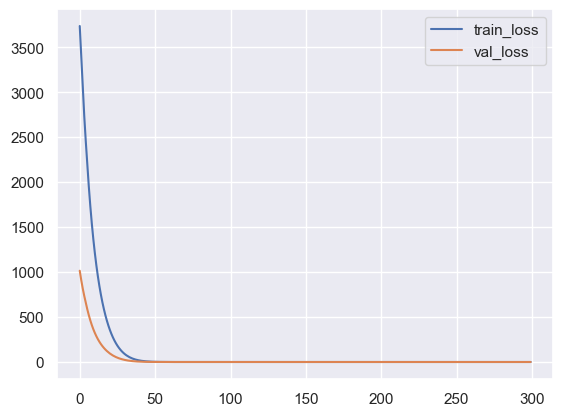

Finished Training
Epoch 1/300


100%|██████████| 7/7 [00:00<00:00, 160.21it/s]


Train Loss: 3742.5392456054688


100%|██████████| 2/2 [00:00<00:00, 394.07it/s]


Epoch 2/300


100%|██████████| 7/7 [00:00<00:00, 163.63it/s]


Train Loss: 3360.2123107910156


100%|██████████| 2/2 [00:00<00:00, 156.13it/s]


Epoch 3/300


100%|██████████| 7/7 [00:00<00:00, 91.82it/s]


Train Loss: 2987.2823486328125


100%|██████████| 2/2 [00:00<00:00, 406.58it/s]


Epoch 4/300


100%|██████████| 7/7 [00:00<00:00, 137.31it/s]


Train Loss: 2686.343231201172


100%|██████████| 2/2 [00:00<00:00, 277.92it/s]


Epoch 5/300


100%|██████████| 7/7 [00:00<00:00, 144.67it/s]


Train Loss: 2401.9846801757812


100%|██████████| 2/2 [00:00<00:00, 483.77it/s]


Epoch 6/300


100%|██████████| 7/7 [00:00<00:00, 173.34it/s]


Train Loss: 2143.276885986328


100%|██████████| 2/2 [00:00<00:00, 444.57it/s]


Epoch 7/300


100%|██████████| 7/7 [00:00<00:00, 127.03it/s]


Train Loss: 1910.2294311523438


100%|██████████| 2/2 [00:00<00:00, 379.94it/s]


Epoch 8/300


100%|██████████| 7/7 [00:00<00:00, 183.41it/s]


Train Loss: 1701.4897766113281


100%|██████████| 2/2 [00:00<00:00, 379.15it/s]


Epoch 9/300


100%|██████████| 7/7 [00:00<00:00, 72.16it/s]


Train Loss: 1515.2766571044922


100%|██████████| 2/2 [00:00<00:00, 474.36it/s]


Epoch 10/300


100%|██████████| 7/7 [00:00<00:00, 168.32it/s]


Train Loss: 1349.212875366211


100%|██████████| 2/2 [00:00<00:00, 443.96it/s]


Epoch 11/300


100%|██████████| 7/7 [00:00<00:00, 161.70it/s]


Train Loss: 1201.302719116211


100%|██████████| 2/2 [00:00<00:00, 388.63it/s]


Epoch 12/300


100%|██████████| 7/7 [00:00<00:00, 113.73it/s]


Train Loss: 1069.3950653076172


100%|██████████| 2/2 [00:00<00:00, 195.43it/s]


Epoch 13/300


100%|██████████| 7/7 [00:00<00:00, 63.27it/s]


Train Loss: 951.543701171875


100%|██████████| 2/2 [00:00<00:00, 303.35it/s]


Epoch 14/300


100%|██████████| 7/7 [00:00<00:00, 70.75it/s]


Train Loss: 846.2765731811523


100%|██████████| 2/2 [00:00<00:00, 411.11it/s]


Epoch 15/300


100%|██████████| 7/7 [00:00<00:00, 34.90it/s]


Train Loss: 752.153694152832


100%|██████████| 2/2 [00:00<00:00, 112.42it/s]


Epoch 16/300


100%|██████████| 7/7 [00:00<00:00, 106.12it/s]


Train Loss: 667.8097915649414


100%|██████████| 2/2 [00:00<00:00, 329.33it/s]


Epoch 17/300


100%|██████████| 7/7 [00:00<00:00, 40.32it/s]


Train Loss: 592.3088531494141


100%|██████████| 2/2 [00:00<00:00, 353.55it/s]


Epoch 18/300


100%|██████████| 7/7 [00:00<00:00, 113.31it/s]


Train Loss: 524.5729675292969


100%|██████████| 2/2 [00:00<00:00, 437.16it/s]


Epoch 19/300


100%|██████████| 7/7 [00:00<00:00, 128.76it/s]


Train Loss: 463.8835105895996


100%|██████████| 2/2 [00:00<00:00, 68.94it/s]


Epoch 20/300


100%|██████████| 7/7 [00:00<00:00, 101.19it/s]


Train Loss: 409.47277069091797


100%|██████████| 2/2 [00:00<00:00, 330.52it/s]


Epoch 21/300


100%|██████████| 7/7 [00:00<00:00, 35.95it/s]


Train Loss: 360.7687797546387


100%|██████████| 2/2 [00:00<00:00, 241.89it/s]


Epoch 22/300


100%|██████████| 7/7 [00:00<00:00, 84.69it/s]


Train Loss: 317.16329193115234


100%|██████████| 2/2 [00:00<00:00, 234.49it/s]


Epoch 23/300


100%|██████████| 7/7 [00:00<00:00, 84.05it/s]


Train Loss: 278.2360954284668


100%|██████████| 2/2 [00:00<00:00, 409.26it/s]


Epoch 24/300


100%|██████████| 7/7 [00:00<00:00, 169.43it/s]


Train Loss: 243.51604843139648


100%|██████████| 2/2 [00:00<00:00, 427.25it/s]


Epoch 25/300


100%|██████████| 7/7 [00:00<00:00, 157.55it/s]


Train Loss: 212.5435390472412


100%|██████████| 2/2 [00:00<00:00, 382.92it/s]


Epoch 26/300


100%|██████████| 7/7 [00:00<00:00, 139.96it/s]


Train Loss: 185.101469039917


100%|██████████| 2/2 [00:00<00:00, 388.20it/s]


Epoch 27/300


100%|██████████| 7/7 [00:00<00:00, 165.02it/s]


Train Loss: 160.77247619628906


100%|██████████| 2/2 [00:00<00:00, 345.78it/s]


Epoch 28/300


100%|██████████| 7/7 [00:00<00:00, 157.28it/s]


Train Loss: 139.2700366973877


100%|██████████| 2/2 [00:00<00:00, 421.94it/s]


Epoch 29/300


100%|██████████| 7/7 [00:00<00:00, 165.23it/s]


Train Loss: 120.31137466430664


100%|██████████| 2/2 [00:00<00:00, 411.69it/s]


Epoch 30/300


100%|██████████| 7/7 [00:00<00:00, 54.94it/s]


Train Loss: 103.65882205963135


100%|██████████| 2/2 [00:00<00:00, 395.17it/s]


Epoch 31/300


100%|██████████| 7/7 [00:00<00:00, 111.66it/s]


Train Loss: 89.04454517364502


100%|██████████| 2/2 [00:00<00:00, 416.14it/s]


Epoch 32/300


100%|██████████| 7/7 [00:00<00:00, 146.86it/s]


Train Loss: 76.2756462097168


100%|██████████| 2/2 [00:00<00:00, 437.91it/s]


Epoch 33/300


100%|██████████| 7/7 [00:00<00:00, 130.90it/s]


Train Loss: 65.17711162567139


100%|██████████| 2/2 [00:00<00:00, 111.56it/s]


Epoch 34/300


100%|██████████| 7/7 [00:00<00:00, 172.74it/s]


Train Loss: 55.51374816894531


100%|██████████| 2/2 [00:00<00:00, 416.14it/s]


Epoch 35/300


100%|██████████| 7/7 [00:00<00:00, 147.99it/s]


Train Loss: 47.167399406433105


100%|██████████| 2/2 [00:00<00:00, 346.57it/s]


Epoch 36/300


100%|██████████| 7/7 [00:00<00:00, 62.36it/s]


Train Loss: 39.95919227600098


100%|██████████| 2/2 [00:00<00:00, 32.08it/s]


Epoch 37/300


100%|██████████| 7/7 [00:00<00:00, 31.53it/s]


Train Loss: 33.7549843788147


100%|██████████| 2/2 [00:00<00:00, 342.70it/s]


Epoch 38/300


100%|██████████| 7/7 [00:00<00:00, 107.03it/s]


Train Loss: 28.430604696273804


100%|██████████| 2/2 [00:00<00:00, 294.16it/s]


Epoch 39/300


100%|██████████| 7/7 [00:00<00:00, 110.12it/s]


Train Loss: 23.87711763381958


100%|██████████| 2/2 [00:00<00:00, 354.29it/s]


Epoch 40/300


100%|██████████| 7/7 [00:00<00:00, 165.27it/s]


Train Loss: 19.996243000030518


100%|██████████| 2/2 [00:00<00:00, 156.54it/s]


Epoch 41/300


100%|██████████| 7/7 [00:00<00:00, 143.06it/s]


Train Loss: 16.696669816970825


100%|██████████| 2/2 [00:00<00:00, 291.68it/s]


Epoch 42/300


100%|██████████| 7/7 [00:00<00:00, 34.71it/s]


Train Loss: 13.90623128414154


100%|██████████| 2/2 [00:00<00:00, 329.53it/s]


Epoch 43/300


100%|██████████| 7/7 [00:00<00:00, 43.24it/s]


Train Loss: 11.546690344810486


100%|██████████| 2/2 [00:00<00:00, 439.36it/s]


Epoch 44/300


100%|██████████| 7/7 [00:00<00:00, 148.77it/s]


Train Loss: 9.562957882881165


100%|██████████| 2/2 [00:00<00:00, 56.05it/s]


Epoch 45/300


100%|██████████| 7/7 [00:00<00:00, 96.84it/s]


Train Loss: 7.889808773994446


100%|██████████| 2/2 [00:00<00:00, 459.12it/s]


Epoch 46/300


100%|██████████| 7/7 [00:00<00:00, 108.34it/s]


Train Loss: 6.498190104961395


100%|██████████| 2/2 [00:00<00:00, 333.12it/s]


Epoch 47/300


100%|██████████| 7/7 [00:00<00:00, 100.18it/s]


Train Loss: 5.336036443710327


100%|██████████| 2/2 [00:00<00:00, 353.43it/s]


Epoch 48/300


100%|██████████| 7/7 [00:00<00:00, 129.81it/s]


Train Loss: 4.3693870306015015


100%|██████████| 2/2 [00:00<00:00, 256.08it/s]


Epoch 49/300


100%|██████████| 7/7 [00:00<00:00, 130.45it/s]


Train Loss: 3.567565470933914


100%|██████████| 2/2 [00:00<00:00, 413.66it/s]


Epoch 50/300


100%|██████████| 7/7 [00:00<00:00, 151.68it/s]


Train Loss: 2.909517914056778


100%|██████████| 2/2 [00:00<00:00, 333.89it/s]


Epoch 51/300


100%|██████████| 7/7 [00:00<00:00, 116.50it/s]


Train Loss: 2.3602462708950043


100%|██████████| 2/2 [00:00<00:00, 390.00it/s]


Epoch 52/300


100%|██████████| 7/7 [00:00<00:00, 134.61it/s]


Train Loss: 1.9131462424993515


100%|██████████| 2/2 [00:00<00:00, 452.51it/s]


Epoch 53/300


100%|██████████| 7/7 [00:00<00:00, 158.97it/s]


Train Loss: 1.5439207702875137


100%|██████████| 2/2 [00:00<00:00, 475.95it/s]


Epoch 54/300


100%|██████████| 7/7 [00:00<00:00, 133.66it/s]


Train Loss: 1.2484411001205444


100%|██████████| 2/2 [00:00<00:00, 439.86it/s]


Epoch 55/300


100%|██████████| 7/7 [00:00<00:00, 134.02it/s]


Train Loss: 1.004008337855339


100%|██████████| 2/2 [00:00<00:00, 464.49it/s]


Epoch 56/300


100%|██████████| 7/7 [00:00<00:00, 111.49it/s]


Train Loss: 0.8103920146822929


100%|██████████| 2/2 [00:00<00:00, 213.24it/s]


Epoch 57/300


100%|██████████| 7/7 [00:00<00:00, 136.75it/s]


Train Loss: 0.647896409034729


100%|██████████| 2/2 [00:00<00:00, 451.27it/s]


Epoch 58/300


100%|██████████| 7/7 [00:00<00:00, 126.55it/s]


Train Loss: 0.5199866443872452


100%|██████████| 2/2 [00:00<00:00, 424.98it/s]


Epoch 59/300


100%|██████████| 7/7 [00:00<00:00, 135.21it/s]


Train Loss: 0.4187236689031124


100%|██████████| 2/2 [00:00<00:00, 228.36it/s]


Epoch 60/300


100%|██████████| 7/7 [00:00<00:00, 80.22it/s]


Train Loss: 0.33385586366057396


100%|██████████| 2/2 [00:00<00:00, 358.55it/s]


Epoch 61/300


100%|██████████| 7/7 [00:00<00:00, 156.44it/s]


Train Loss: 0.2696917802095413


100%|██████████| 2/2 [00:00<00:00, 233.32it/s]


Epoch 62/300


100%|██████████| 7/7 [00:00<00:00, 148.63it/s]


Train Loss: 0.2148579452186823


100%|██████████| 2/2 [00:00<00:00, 358.37it/s]


Epoch 63/300


100%|██████████| 7/7 [00:00<00:00, 128.31it/s]


Train Loss: 0.17658509872853756


100%|██████████| 2/2 [00:00<00:00, 420.36it/s]


Epoch 64/300


100%|██████████| 7/7 [00:00<00:00, 167.56it/s]


Train Loss: 0.1439561489969492


100%|██████████| 2/2 [00:00<00:00, 157.03it/s]


Epoch 65/300


100%|██████████| 7/7 [00:00<00:00, 141.73it/s]


Train Loss: 0.11794251669198275


100%|██████████| 2/2 [00:00<00:00, 394.16it/s]


Epoch 66/300


100%|██████████| 7/7 [00:00<00:00, 103.49it/s]


Train Loss: 0.0998336412012577


100%|██████████| 2/2 [00:00<00:00, 384.39it/s]


Epoch 67/300


100%|██████████| 7/7 [00:00<00:00, 127.30it/s]


Train Loss: 0.08201189711689949


100%|██████████| 2/2 [00:00<00:00, 468.61it/s]


Epoch 68/300


100%|██████████| 7/7 [00:00<00:00, 159.75it/s]


Train Loss: 0.07263284455984831


100%|██████████| 2/2 [00:00<00:00, 458.42it/s]


Epoch 69/300


100%|██████████| 7/7 [00:00<00:00, 164.57it/s]


Train Loss: 0.05719149159267545


100%|██████████| 2/2 [00:00<00:00, 339.91it/s]


Epoch 70/300


100%|██████████| 7/7 [00:00<00:00, 148.37it/s]


Train Loss: 0.053414097521454096


100%|██████████| 2/2 [00:00<00:00, 386.39it/s]


Epoch 71/300


100%|██████████| 7/7 [00:00<00:00, 167.67it/s]


Train Loss: 0.043136941036209464


100%|██████████| 2/2 [00:00<00:00, 391.39it/s]


Epoch 72/300


100%|██████████| 7/7 [00:00<00:00, 108.38it/s]


Train Loss: 0.03853840776719153


100%|██████████| 2/2 [00:00<00:00, 419.47it/s]


Epoch 73/300


100%|██████████| 7/7 [00:00<00:00, 110.62it/s]


Train Loss: 0.035899313166737556


100%|██████████| 2/2 [00:00<00:00, 372.02it/s]


Epoch 74/300


100%|██████████| 7/7 [00:00<00:00, 135.68it/s]


Train Loss: 0.03517256956547499


100%|██████████| 2/2 [00:00<00:00, 400.64it/s]


Epoch 75/300


100%|██████████| 7/7 [00:00<00:00, 136.61it/s]


Train Loss: 0.03513622400350869


100%|██████████| 2/2 [00:00<00:00, 295.73it/s]


Epoch 76/300


100%|██████████| 7/7 [00:00<00:00, 126.34it/s]


Train Loss: 0.03249963326379657


100%|██████████| 2/2 [00:00<00:00, 258.87it/s]


Epoch 77/300


100%|██████████| 7/7 [00:00<00:00, 154.43it/s]


Train Loss: 0.029662167420610785


100%|██████████| 2/2 [00:00<00:00, 452.19it/s]


Epoch 78/300


100%|██████████| 7/7 [00:00<00:00, 153.16it/s]


Train Loss: 0.03049913782160729


100%|██████████| 2/2 [00:00<00:00, 321.78it/s]


Epoch 79/300


100%|██████████| 7/7 [00:00<00:00, 105.75it/s]


Train Loss: 0.025692750117741525


100%|██████████| 2/2 [00:00<00:00, 160.18it/s]


Epoch 80/300


100%|██████████| 7/7 [00:00<00:00, 121.68it/s]


Train Loss: 0.02964012895245105


100%|██████████| 2/2 [00:00<00:00, 437.45it/s]


Epoch 81/300


100%|██████████| 7/7 [00:00<00:00, 58.48it/s]


Train Loss: 0.027332212426699698


100%|██████████| 2/2 [00:00<00:00, 378.86it/s]


Epoch 82/300


100%|██████████| 7/7 [00:00<00:00, 151.70it/s]


Train Loss: 0.028349633095785975


100%|██████████| 2/2 [00:00<00:00, 378.87it/s]


Epoch 83/300


100%|██████████| 7/7 [00:00<00:00, 128.94it/s]


Train Loss: 0.028368630330078304


100%|██████████| 2/2 [00:00<00:00, 441.60it/s]


Epoch 84/300


100%|██████████| 7/7 [00:00<00:00, 163.06it/s]


Train Loss: 0.03022590558975935


100%|██████████| 2/2 [00:00<00:00, 295.59it/s]


Epoch 85/300


100%|██████████| 7/7 [00:00<00:00, 162.17it/s]


Train Loss: 0.026479842490516603


100%|██████████| 2/2 [00:00<00:00, 454.03it/s]


Epoch 86/300


100%|██████████| 7/7 [00:00<00:00, 142.28it/s]


Train Loss: 0.024682292598299682


100%|██████████| 2/2 [00:00<00:00, 443.68it/s]


Epoch 87/300


100%|██████████| 7/7 [00:00<00:00, 143.82it/s]


Train Loss: 0.025326710427179933


100%|██████████| 2/2 [00:00<00:00, 228.68it/s]


Epoch 88/300


100%|██████████| 7/7 [00:00<00:00, 131.52it/s]


Train Loss: 0.03007952810730785


100%|██████████| 2/2 [00:00<00:00, 421.41it/s]


Epoch 89/300


100%|██████████| 7/7 [00:00<00:00, 141.96it/s]


Train Loss: 0.0267092555295676


100%|██████████| 2/2 [00:00<00:00, 374.59it/s]


Epoch 90/300


100%|██████████| 7/7 [00:00<00:00, 137.57it/s]


Train Loss: 0.033791702589951456


100%|██████████| 2/2 [00:00<00:00, 192.94it/s]


Epoch 91/300


100%|██████████| 7/7 [00:00<00:00, 168.22it/s]


Train Loss: 0.02532973710913211


100%|██████████| 2/2 [00:00<00:00, 392.85it/s]


Epoch 92/300


100%|██████████| 7/7 [00:00<00:00, 113.12it/s]


Train Loss: 0.026629143860191107


100%|██████████| 2/2 [00:00<00:00, 459.45it/s]


Epoch 93/300


100%|██████████| 7/7 [00:00<00:00, 83.96it/s]


Train Loss: 0.02632683189585805


100%|██████████| 2/2 [00:00<00:00, 365.10it/s]


Epoch 94/300


100%|██████████| 7/7 [00:00<00:00, 106.97it/s]


Train Loss: 0.02665008744224906


100%|██████████| 2/2 [00:00<00:00, 435.07it/s]


Epoch 95/300


100%|██████████| 7/7 [00:00<00:00, 124.11it/s]


Train Loss: 0.025819108239375055


100%|██████████| 2/2 [00:00<00:00, 457.57it/s]


Epoch 96/300


100%|██████████| 7/7 [00:00<00:00, 138.82it/s]


Train Loss: 0.02446207223692909


100%|██████████| 2/2 [00:00<00:00, 474.15it/s]


Epoch 97/300


100%|██████████| 7/7 [00:00<00:00, 156.88it/s]


Train Loss: 0.02546728088054806


100%|██████████| 2/2 [00:00<00:00, 484.14it/s]


Epoch 98/300


100%|██████████| 7/7 [00:00<00:00, 162.18it/s]


Train Loss: 0.024910987121984363


100%|██████████| 2/2 [00:00<00:00, 427.90it/s]


Epoch 99/300


100%|██████████| 7/7 [00:00<00:00, 146.89it/s]


Train Loss: 0.02656533382833004


100%|██████████| 2/2 [00:00<00:00, 166.43it/s]


Epoch 100/300


100%|██████████| 7/7 [00:00<00:00, 133.76it/s]


Train Loss: 0.02864064450841397


100%|██████████| 2/2 [00:00<00:00, 464.36it/s]


Epoch 101/300


100%|██████████| 7/7 [00:00<00:00, 178.17it/s]


Train Loss: 0.029966174624860287


100%|██████████| 2/2 [00:00<00:00, 474.95it/s]


Epoch 102/300


100%|██████████| 7/7 [00:00<00:00, 153.18it/s]


Train Loss: 0.026473397272638977


100%|██████████| 2/2 [00:00<00:00, 342.18it/s]


Epoch 103/300


100%|██████████| 7/7 [00:00<00:00, 147.62it/s]


Train Loss: 0.030159214627929032


100%|██████████| 2/2 [00:00<00:00, 384.53it/s]


Epoch 104/300


100%|██████████| 7/7 [00:00<00:00, 123.72it/s]


Train Loss: 0.02738281839992851


100%|██████████| 2/2 [00:00<00:00, 391.39it/s]


Epoch 105/300


100%|██████████| 7/7 [00:00<00:00, 123.55it/s]


Train Loss: 0.02615991374477744


100%|██████████| 2/2 [00:00<00:00, 198.02it/s]


Epoch 106/300


100%|██████████| 7/7 [00:00<00:00, 158.20it/s]


Train Loss: 0.026792662451043725


100%|██████████| 2/2 [00:00<00:00, 372.93it/s]


Epoch 107/300


100%|██████████| 7/7 [00:00<00:00, 170.79it/s]


Train Loss: 0.025246101606171578


100%|██████████| 2/2 [00:00<00:00, 445.49it/s]


Epoch 108/300


100%|██████████| 7/7 [00:00<00:00, 129.52it/s]


Train Loss: 0.02686327020637691


100%|██████████| 2/2 [00:00<00:00, 303.30it/s]


Epoch 109/300


100%|██████████| 7/7 [00:00<00:00, 159.06it/s]


Train Loss: 0.026421757647767663


100%|██████████| 2/2 [00:00<00:00, 438.60it/s]


Epoch 110/300


100%|██████████| 7/7 [00:00<00:00, 154.96it/s]


Train Loss: 0.027318326523527503


100%|██████████| 2/2 [00:00<00:00, 468.06it/s]


Epoch 111/300


100%|██████████| 7/7 [00:00<00:00, 155.16it/s]


Train Loss: 0.02625965652987361


100%|██████████| 2/2 [00:00<00:00, 243.11it/s]


Epoch 112/300


100%|██████████| 7/7 [00:00<00:00, 153.36it/s]


Train Loss: 0.030155508196912706


100%|██████████| 2/2 [00:00<00:00, 493.91it/s]


Epoch 113/300


100%|██████████| 7/7 [00:00<00:00, 172.48it/s]


Train Loss: 0.024539583828300238


100%|██████████| 2/2 [00:00<00:00, 370.10it/s]


Epoch 114/300


100%|██████████| 7/7 [00:00<00:00, 163.87it/s]


Train Loss: 0.02866761712357402


100%|██████████| 2/2 [00:00<00:00, 319.90it/s]


Epoch 115/300


100%|██████████| 7/7 [00:00<00:00, 168.35it/s]


Train Loss: 0.025815577362664044


100%|██████████| 2/2 [00:00<00:00, 465.57it/s]


Epoch 116/300


100%|██████████| 7/7 [00:00<00:00, 155.89it/s]


Train Loss: 0.025508081424050033


100%|██████████| 2/2 [00:00<00:00, 460.18it/s]


Epoch 117/300


100%|██████████| 7/7 [00:00<00:00, 158.62it/s]


Train Loss: 0.027265347889624536


100%|██████████| 2/2 [00:00<00:00, 277.05it/s]


Epoch 118/300


100%|██████████| 7/7 [00:00<00:00, 162.55it/s]


Train Loss: 0.029132345342077315


100%|██████████| 2/2 [00:00<00:00, 426.25it/s]


Epoch 119/300


100%|██████████| 7/7 [00:00<00:00, 165.95it/s]


Train Loss: 0.026261107996106148


100%|██████████| 2/2 [00:00<00:00, 344.43it/s]


Epoch 120/300


100%|██████████| 7/7 [00:00<00:00, 149.56it/s]


Train Loss: 0.027025827788747847


100%|██████████| 2/2 [00:00<00:00, 285.51it/s]


Epoch 121/300


100%|██████████| 7/7 [00:00<00:00, 147.65it/s]


Train Loss: 0.03131883288733661


100%|██████████| 2/2 [00:00<00:00, 328.46it/s]


Epoch 122/300


100%|██████████| 7/7 [00:00<00:00, 172.98it/s]


Train Loss: 0.024900556658394635


100%|██████████| 2/2 [00:00<00:00, 334.45it/s]


Epoch 123/300


100%|██████████| 7/7 [00:00<00:00, 81.41it/s]


Train Loss: 0.025438179669436067


100%|██████████| 2/2 [00:00<00:00, 412.36it/s]


Epoch 124/300


100%|██████████| 7/7 [00:00<00:00, 181.59it/s]


Train Loss: 0.025367532740347087


100%|██████████| 2/2 [00:00<00:00, 409.92it/s]


Epoch 125/300


100%|██████████| 7/7 [00:00<00:00, 170.45it/s]


Train Loss: 0.02437790052499622


100%|██████████| 2/2 [00:00<00:00, 353.53it/s]


Epoch 126/300


100%|██████████| 7/7 [00:00<00:00, 52.34it/s]


Train Loss: 0.024541000835597515


100%|██████████| 2/2 [00:00<00:00, 302.34it/s]


Epoch 127/300


100%|██████████| 7/7 [00:00<00:00, 132.45it/s]


Train Loss: 0.023879472981207073


100%|██████████| 2/2 [00:00<00:00, 455.68it/s]


Epoch 128/300


100%|██████████| 7/7 [00:00<00:00, 35.85it/s]


Train Loss: 0.02870437386445701


100%|██████████| 2/2 [00:00<00:00, 149.45it/s]


Epoch 129/300


100%|██████████| 7/7 [00:00<00:00, 73.05it/s]


Train Loss: 0.02993640990462154


100%|██████████| 2/2 [00:00<00:00, 419.72it/s]


Epoch 130/300


100%|██████████| 7/7 [00:00<00:00, 74.42it/s]


Train Loss: 0.028599745011888444


100%|██████████| 2/2 [00:00<00:00, 91.30it/s]


Epoch 131/300


100%|██████████| 7/7 [00:00<00:00, 48.12it/s]


Train Loss: 0.026573862531222403


100%|██████████| 2/2 [00:00<00:00, 248.94it/s]


Epoch 132/300


100%|██████████| 7/7 [00:00<00:00, 134.55it/s]


Train Loss: 0.025529145379550755


100%|██████████| 2/2 [00:00<00:00, 31.44it/s]


Epoch 133/300


100%|██████████| 7/7 [00:00<00:00, 42.08it/s]


Train Loss: 0.025720552541315556


100%|██████████| 2/2 [00:00<00:00, 178.17it/s]


Epoch 134/300


100%|██████████| 7/7 [00:00<00:00, 107.44it/s]


Train Loss: 0.024939343333244324


100%|██████████| 2/2 [00:00<00:00, 378.21it/s]


Epoch 135/300


100%|██████████| 7/7 [00:00<00:00, 166.25it/s]


Train Loss: 0.02377511461963877


100%|██████████| 2/2 [00:00<00:00, 383.87it/s]


Epoch 136/300


100%|██████████| 7/7 [00:00<00:00, 154.27it/s]


Train Loss: 0.02547571691684425


100%|██████████| 2/2 [00:00<00:00, 467.91it/s]


Epoch 137/300


100%|██████████| 7/7 [00:00<00:00, 72.05it/s]


Train Loss: 0.025066116475500166


100%|██████████| 2/2 [00:00<00:00, 478.69it/s]


Epoch 138/300


100%|██████████| 7/7 [00:00<00:00, 133.51it/s]


Train Loss: 0.02961691759992391


100%|██████████| 2/2 [00:00<00:00, 399.93it/s]


Epoch 139/300


100%|██████████| 7/7 [00:00<00:00, 181.81it/s]


Train Loss: 0.026247542933560908


100%|██████████| 2/2 [00:00<00:00, 474.74it/s]


Epoch 140/300


100%|██████████| 7/7 [00:00<00:00, 53.19it/s]


Train Loss: 0.025317031773738563


100%|██████████| 2/2 [00:00<00:00, 138.63it/s]


Epoch 141/300


100%|██████████| 7/7 [00:00<00:00, 61.45it/s]


Train Loss: 0.024698373745195568


100%|██████████| 2/2 [00:00<00:00, 74.11it/s]


Epoch 142/300


100%|██████████| 7/7 [00:00<00:00, 67.92it/s]


Train Loss: 0.024216065416112542


100%|██████████| 2/2 [00:00<00:00, 165.63it/s]


Epoch 143/300


100%|██████████| 7/7 [00:00<00:00, 72.07it/s]


Train Loss: 0.02566541824489832


100%|██████████| 2/2 [00:00<00:00, 44.88it/s]


Epoch 144/300


100%|██████████| 7/7 [00:00<00:00, 62.12it/s]


Train Loss: 0.027147997287102044


100%|██████████| 2/2 [00:00<00:00, 489.96it/s]


Epoch 145/300


100%|██████████| 7/7 [00:00<00:00, 147.12it/s]


Train Loss: 0.027273783925920725


100%|██████████| 2/2 [00:00<00:00, 479.82it/s]


Epoch 146/300


100%|██████████| 7/7 [00:00<00:00, 96.69it/s]


Train Loss: 0.02452304179314524


100%|██████████| 2/2 [00:00<00:00, 87.62it/s]


Epoch 147/300


100%|██████████| 7/7 [00:00<00:00, 141.43it/s]


Train Loss: 0.029454956529662013


100%|██████████| 2/2 [00:00<00:00, 391.17it/s]


Epoch 148/300


100%|██████████| 7/7 [00:00<00:00, 176.02it/s]


Train Loss: 0.027443751343525946


100%|██████████| 2/2 [00:00<00:00, 354.92it/s]


Epoch 149/300


100%|██████████| 7/7 [00:00<00:00, 94.96it/s]


Train Loss: 0.026117983041331172


100%|██████████| 2/2 [00:00<00:00, 418.95it/s]


Epoch 150/300


100%|██████████| 7/7 [00:00<00:00, 152.59it/s]


Train Loss: 0.030136944260448217


100%|██████████| 2/2 [00:00<00:00, 368.94it/s]


Epoch 151/300


100%|██████████| 7/7 [00:00<00:00, 40.22it/s]


Train Loss: 0.025754693779163063


100%|██████████| 2/2 [00:00<00:00, 45.23it/s]


Epoch 152/300


100%|██████████| 7/7 [00:00<00:00, 39.22it/s]


Train Loss: 0.02527015411760658


100%|██████████| 2/2 [00:00<00:00, 166.00it/s]


Epoch 153/300


100%|██████████| 7/7 [00:00<00:00, 148.18it/s]


Train Loss: 0.025004214083310217


100%|██████████| 2/2 [00:00<00:00, 390.02it/s]


Epoch 154/300


100%|██████████| 7/7 [00:00<00:00, 122.92it/s]


Train Loss: 0.028451975085772574


100%|██████████| 2/2 [00:00<00:00, 168.39it/s]


Epoch 155/300


100%|██████████| 7/7 [00:00<00:00, 136.77it/s]


Train Loss: 0.028684223885647953


100%|██████████| 2/2 [00:00<00:00, 337.20it/s]


Epoch 156/300


100%|██████████| 7/7 [00:00<00:00, 156.66it/s]


Train Loss: 0.025634498335421085


100%|██████████| 2/2 [00:00<00:00, 22.89it/s]


Epoch 157/300


100%|██████████| 7/7 [00:00<00:00, 175.60it/s]


Train Loss: 0.0294635696336627


100%|██████████| 2/2 [00:00<00:00, 162.53it/s]


Epoch 158/300


100%|██████████| 7/7 [00:00<00:00, 71.52it/s]


Train Loss: 0.024410665151663125


100%|██████████| 2/2 [00:00<00:00, 457.77it/s]


Epoch 159/300


100%|██████████| 7/7 [00:00<00:00, 147.30it/s]


Train Loss: 0.02578649460338056


100%|██████████| 2/2 [00:00<00:00, 372.93it/s]


Epoch 160/300


100%|██████████| 7/7 [00:00<00:00, 165.55it/s]


Train Loss: 0.025341515196487308


100%|██████████| 2/2 [00:00<00:00, 373.96it/s]


Epoch 161/300


100%|██████████| 7/7 [00:00<00:00, 155.32it/s]


Train Loss: 0.024959104601293802


100%|██████████| 2/2 [00:00<00:00, 437.64it/s]


Epoch 162/300


100%|██████████| 7/7 [00:00<00:00, 143.59it/s]


Train Loss: 0.024777742917649448


100%|██████████| 2/2 [00:00<00:00, 409.68it/s]


Epoch 163/300


100%|██████████| 7/7 [00:00<00:00, 140.82it/s]


Train Loss: 0.025795126566663384


100%|██████████| 2/2 [00:00<00:00, 301.38it/s]


Epoch 164/300


100%|██████████| 7/7 [00:00<00:00, 148.84it/s]


Train Loss: 0.032113652559928596


100%|██████████| 2/2 [00:00<00:00, 134.75it/s]


Epoch 165/300


100%|██████████| 7/7 [00:00<00:00, 69.43it/s]


Train Loss: 0.031640638248063624


100%|██████████| 2/2 [00:00<00:00, 336.99it/s]


Epoch 166/300


100%|██████████| 7/7 [00:00<00:00, 102.38it/s]


Train Loss: 0.028091226238757372


100%|██████████| 2/2 [00:00<00:00, 268.78it/s]


Epoch 167/300


100%|██████████| 7/7 [00:00<00:00, 152.50it/s]


Train Loss: 0.02779526123777032


100%|██████████| 2/2 [00:00<00:00, 348.84it/s]


Epoch 168/300


100%|██████████| 7/7 [00:00<00:00, 117.47it/s]


Train Loss: 0.02656978531740606


100%|██████████| 2/2 [00:00<00:00, 375.51it/s]


Epoch 169/300


100%|██████████| 7/7 [00:00<00:00, 146.08it/s]


Train Loss: 0.026039740070700645


100%|██████████| 2/2 [00:00<00:00, 321.34it/s]


Epoch 170/300


100%|██████████| 7/7 [00:00<00:00, 112.67it/s]


Train Loss: 0.026119853602722287


100%|██████████| 2/2 [00:00<00:00, 416.23it/s]


Epoch 171/300


100%|██████████| 7/7 [00:00<00:00, 126.56it/s]


Train Loss: 0.026291752234101295


100%|██████████| 2/2 [00:00<00:00, 410.18it/s]


Epoch 172/300


100%|██████████| 7/7 [00:00<00:00, 61.21it/s]


Train Loss: 0.027101065148599446


100%|██████████| 2/2 [00:00<00:00, 429.63it/s]


Epoch 173/300


100%|██████████| 7/7 [00:00<00:00, 100.17it/s]


Train Loss: 0.026733088423497975


100%|██████████| 2/2 [00:00<00:00, 210.97it/s]


Epoch 174/300


100%|██████████| 7/7 [00:00<00:00, 125.54it/s]


Train Loss: 0.030934815178625286


100%|██████████| 2/2 [00:00<00:00, 491.28it/s]


Epoch 175/300


100%|██████████| 7/7 [00:00<00:00, 158.45it/s]


Train Loss: 0.025317669613286853


100%|██████████| 2/2 [00:00<00:00, 460.51it/s]


Epoch 176/300


100%|██████████| 7/7 [00:00<00:00, 154.44it/s]


Train Loss: 0.025011240039020777


100%|██████████| 2/2 [00:00<00:00, 476.06it/s]


Epoch 177/300


100%|██████████| 7/7 [00:00<00:00, 117.76it/s]


Train Loss: 0.027705652348231524


100%|██████████| 2/2 [00:00<00:00, 216.54it/s]


Epoch 178/300


100%|██████████| 7/7 [00:00<00:00, 138.84it/s]


Train Loss: 0.024928863742388785


100%|██████████| 2/2 [00:00<00:00, 411.37it/s]


Epoch 179/300


100%|██████████| 7/7 [00:00<00:00, 129.12it/s]


Train Loss: 0.024623199715279043


100%|██████████| 2/2 [00:00<00:00, 429.19it/s]


Epoch 180/300


100%|██████████| 7/7 [00:00<00:00, 162.28it/s]


Train Loss: 0.02451618039049208


100%|██████████| 2/2 [00:00<00:00, 423.82it/s]


Epoch 181/300


100%|██████████| 7/7 [00:00<00:00, 174.13it/s]


Train Loss: 0.024179856409318745


100%|██████████| 2/2 [00:00<00:00, 402.00it/s]


Epoch 182/300


100%|██████████| 7/7 [00:00<00:00, 118.79it/s]


Train Loss: 0.030134230735711753


100%|██████████| 2/2 [00:00<00:00, 447.54it/s]


Epoch 183/300


100%|██████████| 7/7 [00:00<00:00, 166.55it/s]


Train Loss: 0.024694995721802115


100%|██████████| 2/2 [00:00<00:00, 462.08it/s]


Epoch 184/300


100%|██████████| 7/7 [00:00<00:00, 145.58it/s]


Train Loss: 0.025237340130843222


100%|██████████| 2/2 [00:00<00:00, 445.23it/s]


Epoch 185/300


100%|██████████| 7/7 [00:00<00:00, 129.96it/s]


Train Loss: 0.02468075044453144


100%|██████████| 2/2 [00:00<00:00, 398.41it/s]


Epoch 186/300


100%|██████████| 7/7 [00:00<00:00, 126.39it/s]


Train Loss: 0.027706017601303756


100%|██████████| 2/2 [00:00<00:00, 355.68it/s]


Epoch 187/300


100%|██████████| 7/7 [00:00<00:00, 131.49it/s]


Train Loss: 0.02616167929954827


100%|██████████| 2/2 [00:00<00:00, 360.49it/s]


Epoch 188/300


100%|██████████| 7/7 [00:00<00:00, 158.52it/s]


Train Loss: 0.02886619814671576


100%|██████████| 2/2 [00:00<00:00, 365.69it/s]


Epoch 189/300


100%|██████████| 7/7 [00:00<00:00, 166.50it/s]


Train Loss: 0.03244122629985213


100%|██████████| 2/2 [00:00<00:00, 354.85it/s]


Epoch 190/300


100%|██████████| 7/7 [00:00<00:00, 157.64it/s]


Train Loss: 0.026729652425274253


100%|██████████| 2/2 [00:00<00:00, 445.97it/s]


Epoch 191/300


100%|██████████| 7/7 [00:00<00:00, 125.21it/s]


Train Loss: 0.029606577125377953


100%|██████████| 2/2 [00:00<00:00, 443.96it/s]


Epoch 192/300


100%|██████████| 7/7 [00:00<00:00, 71.42it/s]


Train Loss: 0.031036469736136496


100%|██████████| 2/2 [00:00<00:00, 298.55it/s]


Epoch 193/300


100%|██████████| 7/7 [00:00<00:00, 156.90it/s]


Train Loss: 0.02513481688220054


100%|██████████| 2/2 [00:00<00:00, 324.47it/s]


Epoch 194/300


100%|██████████| 7/7 [00:00<00:00, 136.53it/s]


Train Loss: 0.02633395919110626


100%|██████████| 2/2 [00:00<00:00, 347.89it/s]


Epoch 195/300


100%|██████████| 7/7 [00:00<00:00, 142.62it/s]


Train Loss: 0.02928798971697688


100%|██████████| 2/2 [00:00<00:00, 451.27it/s]


Epoch 196/300


100%|██████████| 7/7 [00:00<00:00, 123.94it/s]


Train Loss: 0.026777004124596715


100%|██████████| 2/2 [00:00<00:00, 334.17it/s]


Epoch 197/300


100%|██████████| 7/7 [00:00<00:00, 121.23it/s]


Train Loss: 0.02510672400239855


100%|██████████| 2/2 [00:00<00:00, 353.25it/s]


Epoch 198/300


100%|██████████| 7/7 [00:00<00:00, 125.16it/s]


Train Loss: 0.02714135404676199


100%|██████████| 2/2 [00:00<00:00, 319.13it/s]


Epoch 199/300


100%|██████████| 7/7 [00:00<00:00, 159.88it/s]


Train Loss: 0.02518780145328492


100%|██████████| 2/2 [00:00<00:00, 417.18it/s]


Epoch 200/300


100%|██████████| 7/7 [00:00<00:00, 168.83it/s]


Train Loss: 0.031249915366061032


100%|██████████| 2/2 [00:00<00:00, 385.88it/s]


Epoch 201/300


100%|██████████| 7/7 [00:00<00:00, 158.72it/s]


Train Loss: 0.02522369148209691


100%|██████████| 2/2 [00:00<00:00, 458.17it/s]


Epoch 202/300


100%|██████████| 7/7 [00:00<00:00, 143.49it/s]


Train Loss: 0.024001223500818014


100%|██████████| 2/2 [00:00<00:00, 437.45it/s]


Epoch 203/300


100%|██████████| 7/7 [00:00<00:00, 108.67it/s]


Train Loss: 0.028139807051047683


100%|██████████| 2/2 [00:00<00:00, 457.05it/s]


Epoch 204/300


100%|██████████| 7/7 [00:00<00:00, 123.41it/s]


Train Loss: 0.02511923504061997


100%|██████████| 2/2 [00:00<00:00, 460.74it/s]


Epoch 205/300


100%|██████████| 7/7 [00:00<00:00, 145.83it/s]


Train Loss: 0.025381773593835533


100%|██████████| 2/2 [00:00<00:00, 424.44it/s]


Epoch 206/300


100%|██████████| 7/7 [00:00<00:00, 83.66it/s]


Train Loss: 0.026620342629030347


100%|██████████| 2/2 [00:00<00:00, 214.27it/s]


Epoch 207/300


100%|██████████| 7/7 [00:00<00:00, 123.83it/s]


Train Loss: 0.02721690875478089


100%|██████████| 2/2 [00:00<00:00, 313.71it/s]


Epoch 208/300


100%|██████████| 7/7 [00:00<00:00, 170.08it/s]


Train Loss: 0.026548804016783834


100%|██████████| 2/2 [00:00<00:00, 381.09it/s]


Epoch 209/300


100%|██████████| 7/7 [00:00<00:00, 163.12it/s]


Train Loss: 0.026508284849114716


100%|██████████| 2/2 [00:00<00:00, 403.63it/s]


Epoch 210/300


100%|██████████| 7/7 [00:00<00:00, 124.52it/s]


Train Loss: 0.02849685202818364


100%|██████████| 2/2 [00:00<00:00, 409.76it/s]


Epoch 211/300


100%|██████████| 7/7 [00:00<00:00, 141.73it/s]


Train Loss: 0.026007623062469065


100%|██████████| 2/2 [00:00<00:00, 428.27it/s]


Epoch 212/300


100%|██████████| 7/7 [00:00<00:00, 140.39it/s]


Train Loss: 0.026738538523204625


100%|██████████| 2/2 [00:00<00:00, 338.77it/s]


Epoch 213/300


100%|██████████| 7/7 [00:00<00:00, 140.41it/s]


Train Loss: 0.025508231366984546


100%|██████████| 2/2 [00:00<00:00, 456.72it/s]


Epoch 214/300


100%|██████████| 7/7 [00:00<00:00, 154.26it/s]


Train Loss: 0.02543087850790471


100%|██████████| 2/2 [00:00<00:00, 408.66it/s]


Epoch 215/300


100%|██████████| 7/7 [00:00<00:00, 112.70it/s]


Train Loss: 0.026078323367983103


100%|██████████| 2/2 [00:00<00:00, 449.33it/s]


Epoch 216/300


100%|██████████| 7/7 [00:00<00:00, 156.45it/s]


Train Loss: 0.025299914181232452


100%|██████████| 2/2 [00:00<00:00, 465.67it/s]


Epoch 217/300


100%|██████████| 7/7 [00:00<00:00, 162.70it/s]


Train Loss: 0.023922225169371814


100%|██████████| 2/2 [00:00<00:00, 497.25it/s]


Epoch 218/300


100%|██████████| 7/7 [00:00<00:00, 144.51it/s]


Train Loss: 0.025366592861246318


100%|██████████| 2/2 [00:00<00:00, 315.24it/s]


Epoch 219/300


100%|██████████| 7/7 [00:00<00:00, 143.13it/s]


Train Loss: 0.02499949897173792


100%|██████████| 2/2 [00:00<00:00, 242.19it/s]


Epoch 220/300


100%|██████████| 7/7 [00:00<00:00, 158.21it/s]


Train Loss: 0.029547323007136583


100%|██████████| 2/2 [00:00<00:00, 445.33it/s]


Epoch 221/300


100%|██████████| 7/7 [00:00<00:00, 142.28it/s]


Train Loss: 0.027228178340010345


100%|██████████| 2/2 [00:00<00:00, 475.73it/s]


Epoch 222/300


100%|██████████| 7/7 [00:00<00:00, 162.76it/s]


Train Loss: 0.028485689545050263


100%|██████████| 2/2 [00:00<00:00, 411.87it/s]


Epoch 223/300


100%|██████████| 7/7 [00:00<00:00, 122.90it/s]


Train Loss: 0.025387772591784596


100%|██████████| 2/2 [00:00<00:00, 470.90it/s]


Epoch 224/300


100%|██████████| 7/7 [00:00<00:00, 107.95it/s]


Train Loss: 0.026421269169077277


100%|██████████| 2/2 [00:00<00:00, 350.07it/s]


Epoch 225/300


100%|██████████| 7/7 [00:00<00:00, 144.73it/s]


Train Loss: 0.03047742525814101


100%|██████████| 2/2 [00:00<00:00, 483.44it/s]


Epoch 226/300


100%|██████████| 7/7 [00:00<00:00, 159.44it/s]


Train Loss: 0.026166859199292958


100%|██████████| 2/2 [00:00<00:00, 438.21it/s]


Epoch 227/300


100%|██████████| 7/7 [00:00<00:00, 147.27it/s]


Train Loss: 0.02727741189301014


100%|██████████| 2/2 [00:00<00:00, 485.20it/s]


Epoch 228/300


100%|██████████| 7/7 [00:00<00:00, 138.45it/s]


Train Loss: 0.026932131149806082


100%|██████████| 2/2 [00:00<00:00, 122.32it/s]


Epoch 229/300


100%|██████████| 7/7 [00:00<00:00, 128.97it/s]


Train Loss: 0.029390531592071056


100%|██████████| 2/2 [00:00<00:00, 216.57it/s]


Epoch 230/300


100%|██████████| 7/7 [00:00<00:00, 125.68it/s]


Train Loss: 0.028622155892662704


100%|██████████| 2/2 [00:00<00:00, 446.84it/s]


Epoch 231/300


100%|██████████| 7/7 [00:00<00:00, 145.26it/s]


Train Loss: 0.025453680427744985


100%|██████████| 2/2 [00:00<00:00, 433.74it/s]


Epoch 232/300


100%|██████████| 7/7 [00:00<00:00, 127.89it/s]


Train Loss: 0.02494223532266915


100%|██████████| 2/2 [00:00<00:00, 181.18it/s]


Epoch 233/300


100%|██████████| 7/7 [00:00<00:00, 145.62it/s]


Train Loss: 0.02514308865647763


100%|██████████| 2/2 [00:00<00:00, 389.12it/s]


Epoch 234/300


100%|██████████| 7/7 [00:00<00:00, 171.21it/s]


Train Loss: 0.024318846641108394


100%|██████████| 2/2 [00:00<00:00, 311.58it/s]


Epoch 235/300


100%|██████████| 7/7 [00:00<00:00, 164.28it/s]


Train Loss: 0.030238920880947262


100%|██████████| 2/2 [00:00<00:00, 334.22it/s]


Epoch 236/300


100%|██████████| 7/7 [00:00<00:00, 136.72it/s]


Train Loss: 0.030814183643087745


100%|██████████| 2/2 [00:00<00:00, 451.05it/s]


Epoch 237/300


100%|██████████| 7/7 [00:00<00:00, 123.10it/s]


Train Loss: 0.02702984889037907


100%|██████████| 2/2 [00:00<00:00, 453.29it/s]


Epoch 238/300


100%|██████████| 7/7 [00:00<00:00, 63.91it/s]


Train Loss: 0.02749819098971784


100%|██████████| 2/2 [00:00<00:00, 439.95it/s]


Epoch 239/300


100%|██████████| 7/7 [00:00<00:00, 140.19it/s]


Train Loss: 0.026153762941248715


100%|██████████| 2/2 [00:00<00:00, 264.98it/s]


Epoch 240/300


100%|██████████| 7/7 [00:00<00:00, 48.40it/s]


Train Loss: 0.026103093288838863


100%|██████████| 2/2 [00:00<00:00, 150.23it/s]


Epoch 241/300


100%|██████████| 7/7 [00:00<00:00, 104.89it/s]


Train Loss: 0.027316518244333565


100%|██████████| 2/2 [00:00<00:00, 357.34it/s]


Epoch 242/300


100%|██████████| 7/7 [00:00<00:00, 89.07it/s]


Train Loss: 0.025004010763950646


100%|██████████| 2/2 [00:00<00:00, 291.12it/s]


Epoch 243/300


100%|██████████| 7/7 [00:00<00:00, 122.64it/s]


Train Loss: 0.02542062778957188


100%|██████████| 2/2 [00:00<00:00, 458.07it/s]


Epoch 244/300


100%|██████████| 7/7 [00:00<00:00, 43.34it/s]


Train Loss: 0.025040263310074806


100%|██████████| 2/2 [00:00<00:00, 249.46it/s]


Epoch 245/300


100%|██████████| 7/7 [00:00<00:00, 141.39it/s]


Train Loss: 0.028694798704236746


100%|██████████| 2/2 [00:00<00:00, 37.96it/s]


Epoch 246/300


100%|██████████| 7/7 [00:00<00:00, 36.89it/s]


Train Loss: 0.02638931921683252


100%|██████████| 2/2 [00:00<00:00, 295.43it/s]


Epoch 247/300


100%|██████████| 7/7 [00:00<00:00, 160.86it/s]


Train Loss: 0.028273021103814244


100%|██████████| 2/2 [00:00<00:00, 315.46it/s]


Epoch 248/300


100%|██████████| 7/7 [00:00<00:00, 151.30it/s]


Train Loss: 0.025225830962881446


100%|██████████| 2/2 [00:00<00:00, 345.31it/s]


Epoch 249/300


100%|██████████| 7/7 [00:00<00:00, 59.42it/s]


Train Loss: 0.023988807864952832


100%|██████████| 2/2 [00:00<00:00, 390.55it/s]


Epoch 250/300


100%|██████████| 7/7 [00:00<00:00, 42.44it/s]


Train Loss: 0.024307887419126928


100%|██████████| 2/2 [00:00<00:00, 249.00it/s]


Epoch 251/300


100%|██████████| 7/7 [00:00<00:00, 71.44it/s]


Train Loss: 0.02563885599374771


100%|██████████| 2/2 [00:00<00:00, 372.17it/s]


Epoch 252/300


100%|██████████| 7/7 [00:00<00:00, 150.41it/s]


Train Loss: 0.024093045736663043


100%|██████████| 2/2 [00:00<00:00, 411.93it/s]


Epoch 253/300


100%|██████████| 7/7 [00:00<00:00, 156.10it/s]


Train Loss: 0.024739574058912694


100%|██████████| 2/2 [00:00<00:00, 431.58it/s]


Epoch 254/300


100%|██████████| 7/7 [00:00<00:00, 161.70it/s]


Train Loss: 0.025470341672189534


100%|██████████| 2/2 [00:00<00:00, 381.82it/s]


Epoch 255/300


100%|██████████| 7/7 [00:00<00:00, 73.48it/s]


Train Loss: 0.025608643889427185


100%|██████████| 2/2 [00:00<00:00, 420.52it/s]


Epoch 256/300


100%|██████████| 7/7 [00:00<00:00, 108.81it/s]


Train Loss: 0.026720992987975478


100%|██████████| 2/2 [00:00<00:00, 263.23it/s]


Epoch 257/300


100%|██████████| 7/7 [00:00<00:00, 61.46it/s]


Train Loss: 0.026931072818115354


100%|██████████| 2/2 [00:00<00:00, 140.72it/s]


Epoch 258/300


100%|██████████| 7/7 [00:00<00:00, 67.27it/s]


Train Loss: 0.02711971034295857


100%|██████████| 2/2 [00:00<00:00, 122.57it/s]


Epoch 259/300


100%|██████████| 7/7 [00:00<00:00, 78.40it/s]


Train Loss: 0.026387762278318405


100%|██████████| 2/2 [00:00<00:00, 188.62it/s]


Epoch 260/300


100%|██████████| 7/7 [00:00<00:00, 29.49it/s]


Train Loss: 0.027683300897479057


100%|██████████| 2/2 [00:00<00:00, 318.26it/s]


Epoch 261/300


100%|██████████| 7/7 [00:00<00:00, 150.10it/s]


Train Loss: 0.026728217490017414


100%|██████████| 2/2 [00:00<00:00, 396.64it/s]


Epoch 262/300


100%|██████████| 7/7 [00:00<00:00, 159.35it/s]


Train Loss: 0.027358407387509942


100%|██████████| 2/2 [00:00<00:00, 419.81it/s]


Epoch 263/300


100%|██████████| 7/7 [00:00<00:00, 121.18it/s]


Train Loss: 0.02697004796937108


100%|██████████| 2/2 [00:00<00:00, 336.12it/s]


Epoch 264/300


100%|██████████| 7/7 [00:00<00:00, 128.28it/s]


Train Loss: 0.027706687222234905


100%|██████████| 2/2 [00:00<00:00, 299.44it/s]


Epoch 265/300


100%|██████████| 7/7 [00:00<00:00, 131.56it/s]


Train Loss: 0.027868145378306508


100%|██████████| 2/2 [00:00<00:00, 501.11it/s]


Epoch 266/300


100%|██████████| 7/7 [00:00<00:00, 146.90it/s]


Train Loss: 0.029408646398223937


100%|██████████| 2/2 [00:00<00:00, 448.11it/s]


Epoch 267/300


100%|██████████| 7/7 [00:00<00:00, 109.40it/s]


Train Loss: 0.028928401647135615


100%|██████████| 2/2 [00:00<00:00, 498.88it/s]


Epoch 268/300


100%|██████████| 7/7 [00:00<00:00, 112.49it/s]


Train Loss: 0.02521511761005968


100%|██████████| 2/2 [00:00<00:00, 440.35it/s]


Epoch 269/300


100%|██████████| 7/7 [00:00<00:00, 51.54it/s]


Train Loss: 0.025072798132896423


100%|██████████| 2/2 [00:00<00:00, 238.18it/s]


Epoch 270/300


100%|██████████| 7/7 [00:00<00:00, 84.13it/s]


Train Loss: 0.026681928662583232


100%|██████████| 2/2 [00:00<00:00, 250.12it/s]


Epoch 271/300


100%|██████████| 7/7 [00:00<00:00, 146.19it/s]


Train Loss: 0.024845554144121706


100%|██████████| 2/2 [00:00<00:00, 311.28it/s]


Epoch 272/300


100%|██████████| 7/7 [00:00<00:00, 53.75it/s]


Train Loss: 0.029001709772273898


100%|██████████| 2/2 [00:00<00:00, 236.71it/s]


Epoch 273/300


100%|██████████| 7/7 [00:00<00:00, 80.36it/s]


Train Loss: 0.03022080089431256


100%|██████████| 2/2 [00:00<00:00, 290.56it/s]


Epoch 274/300


100%|██████████| 7/7 [00:00<00:00, 129.72it/s]


Train Loss: 0.029059531399980187


100%|██████████| 2/2 [00:00<00:00, 369.82it/s]


Epoch 275/300


100%|██████████| 7/7 [00:00<00:00, 138.41it/s]


Train Loss: 0.028577296994626522


100%|██████████| 2/2 [00:00<00:00, 371.47it/s]


Epoch 276/300


100%|██████████| 7/7 [00:00<00:00, 95.93it/s]


Train Loss: 0.03393883223179728


100%|██████████| 2/2 [00:00<00:00, 299.05it/s]


Epoch 277/300


100%|██████████| 7/7 [00:00<00:00, 171.25it/s]


Train Loss: 0.0381971993483603


100%|██████████| 2/2 [00:00<00:00, 480.67it/s]


Epoch 278/300


100%|██████████| 7/7 [00:00<00:00, 165.58it/s]


Train Loss: 0.029175449861213565


100%|██████████| 2/2 [00:00<00:00, 111.83it/s]


Epoch 279/300


100%|██████████| 7/7 [00:00<00:00, 154.40it/s]


Train Loss: 0.03213605540804565


100%|██████████| 2/2 [00:00<00:00, 332.08it/s]


Epoch 280/300


100%|██████████| 7/7 [00:00<00:00, 161.76it/s]


Train Loss: 0.03754678019322455


100%|██████████| 2/2 [00:00<00:00, 370.83it/s]


Epoch 281/300


100%|██████████| 7/7 [00:00<00:00, 158.77it/s]


Train Loss: 0.032765970565378666


100%|██████████| 2/2 [00:00<00:00, 333.56it/s]


Epoch 282/300


100%|██████████| 7/7 [00:00<00:00, 154.58it/s]


Train Loss: 0.030468291719444096


100%|██████████| 2/2 [00:00<00:00, 110.13it/s]


Epoch 283/300


100%|██████████| 7/7 [00:00<00:00, 141.20it/s]


Train Loss: 0.03298602148424834


100%|██████████| 2/2 [00:00<00:00, 374.19it/s]


Epoch 284/300


100%|██████████| 7/7 [00:00<00:00, 147.03it/s]


Train Loss: 0.026237684418447316


100%|██████████| 2/2 [00:00<00:00, 380.95it/s]


Epoch 285/300


100%|██████████| 7/7 [00:00<00:00, 161.57it/s]


Train Loss: 0.026197669561952353


100%|██████████| 2/2 [00:00<00:00, 395.41it/s]


Epoch 286/300


100%|██████████| 7/7 [00:00<00:00, 142.99it/s]


Train Loss: 0.02655978302937001


100%|██████████| 2/2 [00:00<00:00, 103.51it/s]


Epoch 287/300


100%|██████████| 7/7 [00:00<00:00, 150.21it/s]


Train Loss: 0.02614928549155593


100%|██████████| 2/2 [00:00<00:00, 380.88it/s]


Epoch 288/300


100%|██████████| 7/7 [00:00<00:00, 141.57it/s]


Train Loss: 0.028424772433936596


100%|██████████| 2/2 [00:00<00:00, 358.04it/s]


Epoch 289/300


100%|██████████| 7/7 [00:00<00:00, 175.44it/s]


Train Loss: 0.02576201839838177


100%|██████████| 2/2 [00:00<00:00, 59.69it/s]


Epoch 290/300


100%|██████████| 7/7 [00:00<00:00, 142.19it/s]


Train Loss: 0.02731979894451797


100%|██████████| 2/2 [00:00<00:00, 452.09it/s]


Epoch 291/300


100%|██████████| 7/7 [00:00<00:00, 184.28it/s]


Train Loss: 0.03128453274257481


100%|██████████| 2/2 [00:00<00:00, 391.83it/s]


Epoch 292/300


100%|██████████| 7/7 [00:00<00:00, 123.95it/s]


Train Loss: 0.029253460932523012


100%|██████████| 2/2 [00:00<00:00, 347.83it/s]


Epoch 293/300


100%|██████████| 7/7 [00:00<00:00, 157.18it/s]


Train Loss: 0.028114743472542614


100%|██████████| 2/2 [00:00<00:00, 463.38it/s]


Epoch 294/300


100%|██████████| 7/7 [00:00<00:00, 166.39it/s]


Train Loss: 0.03369493817444891


100%|██████████| 2/2 [00:00<00:00, 455.68it/s]


Epoch 295/300


100%|██████████| 7/7 [00:00<00:00, 159.09it/s]


Train Loss: 0.029754632734693587


100%|██████████| 2/2 [00:00<00:00, 485.17it/s]


Epoch 296/300


100%|██████████| 7/7 [00:00<00:00, 150.39it/s]


Train Loss: 0.025149713386781514


100%|██████████| 2/2 [00:00<00:00, 491.86it/s]


Epoch 297/300


100%|██████████| 7/7 [00:00<00:00, 154.25it/s]


Train Loss: 0.025413247873075306


100%|██████████| 2/2 [00:00<00:00, 476.22it/s]


Epoch 298/300


100%|██████████| 7/7 [00:00<00:00, 179.19it/s]


Train Loss: 0.026564257219433784


100%|██████████| 2/2 [00:00<00:00, 377.66it/s]


Epoch 299/300


100%|██████████| 7/7 [00:00<00:00, 179.69it/s]


Train Loss: 0.025854857405647635


100%|██████████| 2/2 [00:00<00:00, 474.71it/s]


Epoch 300/300


100%|██████████| 7/7 [00:00<00:00, 176.55it/s]


Train Loss: 0.025402223807759583


100%|██████████| 2/2 [00:00<00:00, 411.95it/s]


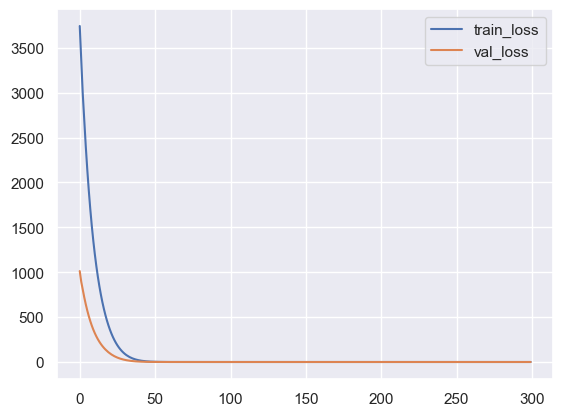

Finished Training
Epoch 1/300


100%|██████████| 13/13 [00:00<00:00, 167.90it/s]


Train Loss: 6774.3475341796875


100%|██████████| 4/4 [00:00<00:00, 722.28it/s]


Epoch 2/300


100%|██████████| 13/13 [00:00<00:00, 182.87it/s]


Train Loss: 5687.463409423828


100%|██████████| 4/4 [00:00<00:00, 745.95it/s]


Epoch 3/300


100%|██████████| 13/13 [00:00<00:00, 156.66it/s]


Train Loss: 4669.104461669922


100%|██████████| 4/4 [00:00<00:00, 681.78it/s]


Epoch 4/300


100%|██████████| 13/13 [00:00<00:00, 149.92it/s]


Train Loss: 3804.585723876953


100%|██████████| 4/4 [00:00<00:00, 461.05it/s]


Epoch 5/300


100%|██████████| 13/13 [00:00<00:00, 157.43it/s]


Train Loss: 3093.3595123291016


100%|██████████| 4/4 [00:00<00:00, 750.19it/s]


Epoch 6/300


100%|██████████| 13/13 [00:00<00:00, 154.50it/s]


Train Loss: 2514.2384490966797


100%|██████████| 4/4 [00:00<00:00, 661.93it/s]


Epoch 7/300


100%|██████████| 13/13 [00:00<00:00, 199.01it/s]


Train Loss: 2042.9517211914062


100%|██████████| 4/4 [00:00<00:00, 738.66it/s]


Epoch 8/300


100%|██████████| 13/13 [00:00<00:00, 192.40it/s]


Train Loss: 1658.402603149414


100%|██████████| 4/4 [00:00<00:00, 691.22it/s]


Epoch 9/300


100%|██████████| 13/13 [00:00<00:00, 173.55it/s]


Train Loss: 1336.4226913452148


100%|██████████| 4/4 [00:00<00:00, 556.50it/s]


Epoch 10/300


100%|██████████| 13/13 [00:00<00:00, 182.46it/s]


Train Loss: 1050.1125259399414


100%|██████████| 4/4 [00:00<00:00, 444.65it/s]


Epoch 11/300


100%|██████████| 13/13 [00:00<00:00, 167.60it/s]


Train Loss: 818.8510131835938


100%|██████████| 4/4 [00:00<00:00, 760.29it/s]


Epoch 12/300


100%|██████████| 13/13 [00:00<00:00, 156.23it/s]


Train Loss: 636.0986976623535


100%|██████████| 4/4 [00:00<00:00, 779.10it/s]


Epoch 13/300


100%|██████████| 13/13 [00:00<00:00, 184.65it/s]


Train Loss: 491.700740814209


100%|██████████| 4/4 [00:00<00:00, 601.05it/s]


Epoch 14/300


100%|██████████| 13/13 [00:00<00:00, 135.79it/s]


Train Loss: 377.52330017089844


100%|██████████| 4/4 [00:00<00:00, 692.76it/s]


Epoch 15/300


100%|██████████| 13/13 [00:00<00:00, 146.10it/s]


Train Loss: 287.5421314239502


100%|██████████| 4/4 [00:00<00:00, 226.92it/s]


Epoch 16/300


100%|██████████| 13/13 [00:00<00:00, 113.39it/s]


Train Loss: 217.09580039978027


100%|██████████| 4/4 [00:00<00:00, 701.01it/s]


Epoch 17/300


100%|██████████| 13/13 [00:00<00:00, 162.33it/s]


Train Loss: 162.3912353515625


100%|██████████| 4/4 [00:00<00:00, 789.92it/s]


Epoch 18/300


100%|██████████| 13/13 [00:00<00:00, 163.30it/s]


Train Loss: 120.30678129196167


100%|██████████| 4/4 [00:00<00:00, 653.37it/s]


Epoch 19/300


100%|██████████| 13/13 [00:00<00:00, 179.80it/s]


Train Loss: 88.26317501068115


100%|██████████| 4/4 [00:00<00:00, 770.83it/s]


Epoch 20/300


100%|██████████| 13/13 [00:00<00:00, 146.04it/s]


Train Loss: 64.11236619949341


100%|██████████| 4/4 [00:00<00:00, 585.41it/s]


Epoch 21/300


100%|██████████| 13/13 [00:00<00:00, 183.99it/s]


Train Loss: 46.108092069625854


100%|██████████| 4/4 [00:00<00:00, 796.00it/s]


Epoch 22/300


100%|██████████| 13/13 [00:00<00:00, 187.89it/s]


Train Loss: 32.82193160057068


100%|██████████| 4/4 [00:00<00:00, 742.09it/s]


Epoch 23/300


100%|██████████| 13/13 [00:00<00:00, 160.19it/s]


Train Loss: 23.12909507751465


100%|██████████| 4/4 [00:00<00:00, 694.80it/s]


Epoch 24/300


100%|██████████| 13/13 [00:00<00:00, 181.14it/s]


Train Loss: 16.13465690612793


100%|██████████| 4/4 [00:00<00:00, 703.36it/s]


Epoch 25/300


100%|██████████| 13/13 [00:00<00:00, 181.57it/s]


Train Loss: 11.146387279033661


100%|██████████| 4/4 [00:00<00:00, 397.45it/s]


Epoch 26/300


100%|██████████| 13/13 [00:00<00:00, 149.59it/s]


Train Loss: 7.621894955635071


100%|██████████| 4/4 [00:00<00:00, 783.98it/s]


Epoch 27/300


100%|██████████| 13/13 [00:00<00:00, 161.94it/s]


Train Loss: 5.1676583886146545


100%|██████████| 4/4 [00:00<00:00, 525.42it/s]


Epoch 28/300


100%|██████████| 13/13 [00:00<00:00, 169.36it/s]


Train Loss: 3.4713839441537857


100%|██████████| 4/4 [00:00<00:00, 604.06it/s]


Epoch 29/300


100%|██████████| 13/13 [00:00<00:00, 181.89it/s]


Train Loss: 2.3104247450828552


100%|██████████| 4/4 [00:00<00:00, 622.65it/s]


Epoch 30/300


100%|██████████| 13/13 [00:00<00:00, 182.74it/s]


Train Loss: 1.5263534486293793


100%|██████████| 4/4 [00:00<00:00, 761.35it/s]


Epoch 31/300


100%|██████████| 13/13 [00:00<00:00, 145.37it/s]


Train Loss: 1.0076237246394157


100%|██████████| 4/4 [00:00<00:00, 271.63it/s]


Epoch 32/300


100%|██████████| 13/13 [00:00<00:00, 162.66it/s]


Train Loss: 0.6680677607655525


100%|██████████| 4/4 [00:00<00:00, 776.40it/s]


Epoch 33/300


100%|██████████| 13/13 [00:00<00:00, 188.40it/s]


Train Loss: 0.43882303684949875


100%|██████████| 4/4 [00:00<00:00, 583.62it/s]


Epoch 34/300


100%|██████████| 13/13 [00:00<00:00, 175.30it/s]


Train Loss: 0.29193269833922386


100%|██████████| 4/4 [00:00<00:00, 376.09it/s]


Epoch 35/300


100%|██████████| 13/13 [00:00<00:00, 187.98it/s]


Train Loss: 0.2037919508293271


100%|██████████| 4/4 [00:00<00:00, 740.19it/s]


Epoch 36/300


100%|██████████| 13/13 [00:00<00:00, 189.53it/s]


Train Loss: 0.14507799642160535


100%|██████████| 4/4 [00:00<00:00, 692.42it/s]


Epoch 37/300


100%|██████████| 13/13 [00:00<00:00, 188.53it/s]


Train Loss: 0.10583271412178874


100%|██████████| 4/4 [00:00<00:00, 434.85it/s]


Epoch 38/300


100%|██████████| 13/13 [00:00<00:00, 141.49it/s]


Train Loss: 0.08711334294639528


100%|██████████| 4/4 [00:00<00:00, 671.14it/s]


Epoch 39/300


100%|██████████| 13/13 [00:00<00:00, 169.22it/s]


Train Loss: 0.07215626270044595


100%|██████████| 4/4 [00:00<00:00, 693.36it/s]


Epoch 40/300


100%|██████████| 13/13 [00:00<00:00, 102.46it/s]


Train Loss: 0.0676753877196461


100%|██████████| 4/4 [00:00<00:00, 746.25it/s]


Epoch 41/300


100%|██████████| 13/13 [00:00<00:00, 174.49it/s]


Train Loss: 0.059024841990321875


100%|██████████| 4/4 [00:00<00:00, 704.95it/s]


Epoch 42/300


100%|██████████| 13/13 [00:00<00:00, 184.36it/s]


Train Loss: 0.05556769389659166


100%|██████████| 4/4 [00:00<00:00, 369.49it/s]


Epoch 43/300


100%|██████████| 13/13 [00:00<00:00, 98.01it/s]


Train Loss: 0.061936740879900753


100%|██████████| 4/4 [00:00<00:00, 537.85it/s]


Epoch 44/300


100%|██████████| 13/13 [00:00<00:00, 183.55it/s]


Train Loss: 0.058359268005006015


100%|██████████| 4/4 [00:00<00:00, 786.19it/s]


Epoch 45/300


100%|██████████| 13/13 [00:00<00:00, 91.94it/s]


Train Loss: 0.06290296860970557


100%|██████████| 4/4 [00:00<00:00, 325.83it/s]


Epoch 46/300


100%|██████████| 13/13 [00:00<00:00, 159.82it/s]


Train Loss: 0.058396897569764405


100%|██████████| 4/4 [00:00<00:00, 814.15it/s]


Epoch 47/300


100%|██████████| 13/13 [00:00<00:00, 48.61it/s]


Train Loss: 0.05821676889900118


100%|██████████| 4/4 [00:00<00:00, 417.28it/s]


Epoch 48/300


100%|██████████| 13/13 [00:00<00:00, 52.06it/s]


Train Loss: 0.055313575896434486


100%|██████████| 4/4 [00:00<00:00, 673.16it/s]


Epoch 49/300


100%|██████████| 13/13 [00:00<00:00, 95.96it/s]


Train Loss: 0.05630853516049683


100%|██████████| 4/4 [00:00<00:00, 396.03it/s]


Epoch 50/300


100%|██████████| 13/13 [00:00<00:00, 43.82it/s]


Train Loss: 0.052971820638049394


100%|██████████| 4/4 [00:00<00:00, 291.46it/s]


Epoch 51/300


100%|██████████| 13/13 [00:00<00:00, 142.04it/s]


Train Loss: 0.049646440194919705


100%|██████████| 4/4 [00:00<00:00, 620.73it/s]


Epoch 52/300


100%|██████████| 13/13 [00:00<00:00, 169.58it/s]


Train Loss: 0.05200431670527905


100%|██████████| 4/4 [00:00<00:00, 778.20it/s]


Epoch 53/300


100%|██████████| 13/13 [00:00<00:00, 176.58it/s]


Train Loss: 0.060294935130514205


100%|██████████| 4/4 [00:00<00:00, 629.54it/s]


Epoch 54/300


100%|██████████| 13/13 [00:00<00:00, 79.42it/s]


Train Loss: 0.056024546385742724


100%|██████████| 4/4 [00:00<00:00, 396.12it/s]


Epoch 55/300


100%|██████████| 13/13 [00:00<00:00, 51.41it/s]


Train Loss: 0.05777773284353316


100%|██████████| 4/4 [00:00<00:00, 248.70it/s]


Epoch 56/300


100%|██████████| 13/13 [00:00<00:00, 61.04it/s]


Train Loss: 0.050525413011200726


100%|██████████| 4/4 [00:00<00:00, 338.81it/s]


Epoch 57/300


100%|██████████| 13/13 [00:00<00:00, 87.72it/s]


Train Loss: 0.050164829299319535


100%|██████████| 4/4 [00:00<00:00, 794.60it/s]


Epoch 58/300


100%|██████████| 13/13 [00:00<00:00, 214.48it/s]


Train Loss: 0.051063813734799623


100%|██████████| 4/4 [00:00<00:00, 799.52it/s]


Epoch 59/300


100%|██████████| 13/13 [00:00<00:00, 195.72it/s]


Train Loss: 0.04815664060879499


100%|██████████| 4/4 [00:00<00:00, 774.57it/s]


Epoch 60/300


100%|██████████| 13/13 [00:00<00:00, 206.34it/s]


Train Loss: 0.049185089650563896


100%|██████████| 4/4 [00:00<00:00, 827.65it/s]


Epoch 61/300


100%|██████████| 13/13 [00:00<00:00, 210.43it/s]


Train Loss: 0.04884982982184738


100%|██████████| 4/4 [00:00<00:00, 611.53it/s]


Epoch 62/300


100%|██████████| 13/13 [00:00<00:00, 181.67it/s]


Train Loss: 0.05013269040500745


100%|██████████| 4/4 [00:00<00:00, 556.96it/s]


Epoch 63/300


100%|██████████| 13/13 [00:00<00:00, 170.05it/s]


Train Loss: 0.052929473808035254


100%|██████████| 4/4 [00:00<00:00, 718.17it/s]


Epoch 64/300


100%|██████████| 13/13 [00:00<00:00, 86.79it/s]


Train Loss: 0.0509221515385434


100%|██████████| 4/4 [00:00<00:00, 424.68it/s]


Epoch 65/300


100%|██████████| 13/13 [00:00<00:00, 61.97it/s]


Train Loss: 0.05140747409313917


100%|██████████| 4/4 [00:00<00:00, 390.39it/s]


Epoch 66/300


100%|██████████| 13/13 [00:00<00:00, 79.34it/s]


Train Loss: 0.05224270198959857


100%|██████████| 4/4 [00:00<00:00, 659.95it/s]


Epoch 67/300


100%|██████████| 13/13 [00:00<00:00, 38.29it/s]


Train Loss: 0.05100127239711583


100%|██████████| 4/4 [00:00<00:00, 612.11it/s]


Epoch 68/300


100%|██████████| 13/13 [00:00<00:00, 119.70it/s]


Train Loss: 0.051330604241229594


100%|██████████| 4/4 [00:00<00:00, 340.54it/s]


Epoch 69/300


100%|██████████| 13/13 [00:00<00:00, 138.52it/s]


Train Loss: 0.052636356151197106


100%|██████████| 4/4 [00:00<00:00, 737.85it/s]


Epoch 70/300


100%|██████████| 13/13 [00:00<00:00, 96.18it/s]


Train Loss: 0.05416506435722113


100%|██████████| 4/4 [00:00<00:00, 343.23it/s]


Epoch 71/300


100%|██████████| 13/13 [00:00<00:00, 159.49it/s]


Train Loss: 0.05493210256099701


100%|██████████| 4/4 [00:00<00:00, 391.50it/s]


Epoch 72/300


100%|██████████| 13/13 [00:00<00:00, 109.77it/s]


Train Loss: 0.0539348985766992


100%|██████████| 4/4 [00:00<00:00, 716.58it/s]


Epoch 73/300


100%|██████████| 13/13 [00:00<00:00, 161.20it/s]


Train Loss: 0.05294372281059623


100%|██████████| 4/4 [00:00<00:00, 735.58it/s]


Epoch 74/300


100%|██████████| 13/13 [00:00<00:00, 151.09it/s]


Train Loss: 0.051753895881120116


100%|██████████| 4/4 [00:00<00:00, 144.70it/s]


Epoch 75/300


100%|██████████| 13/13 [00:00<00:00, 201.62it/s]


Train Loss: 0.057528450270183384


100%|██████████| 4/4 [00:00<00:00, 761.32it/s]


Epoch 76/300


100%|██████████| 13/13 [00:00<00:00, 208.13it/s]


Train Loss: 0.05202752258628607


100%|██████████| 4/4 [00:00<00:00, 734.36it/s]


Epoch 77/300


100%|██████████| 13/13 [00:00<00:00, 188.99it/s]


Train Loss: 0.050986777525395155


100%|██████████| 4/4 [00:00<00:00, 742.26it/s]


Epoch 78/300


100%|██████████| 13/13 [00:00<00:00, 180.46it/s]


Train Loss: 0.05103857401991263


100%|██████████| 4/4 [00:00<00:00, 823.75it/s]


Epoch 79/300


100%|██████████| 13/13 [00:00<00:00, 170.66it/s]


Train Loss: 0.055048387264832854


100%|██████████| 4/4 [00:00<00:00, 376.97it/s]


Epoch 80/300


100%|██████████| 13/13 [00:00<00:00, 175.16it/s]


Train Loss: 0.054429923999123275


100%|██████████| 4/4 [00:00<00:00, 698.21it/s]


Epoch 81/300


100%|██████████| 13/13 [00:00<00:00, 199.80it/s]


Train Loss: 0.05705220630625263


100%|██████████| 4/4 [00:00<00:00, 622.85it/s]


Epoch 82/300


100%|██████████| 13/13 [00:00<00:00, 206.41it/s]


Train Loss: 0.05335957568604499


100%|██████████| 4/4 [00:00<00:00, 811.24it/s]


Epoch 83/300


100%|██████████| 13/13 [00:00<00:00, 216.28it/s]


Train Loss: 0.053270826232619584


100%|██████████| 4/4 [00:00<00:00, 655.72it/s]


Epoch 84/300


100%|██████████| 13/13 [00:00<00:00, 165.27it/s]


Train Loss: 0.049368468986358494


100%|██████████| 4/4 [00:00<00:00, 758.43it/s]


Epoch 85/300


100%|██████████| 13/13 [00:00<00:00, 204.59it/s]


Train Loss: 0.05392923130420968


100%|██████████| 4/4 [00:00<00:00, 664.00it/s]


Epoch 86/300


100%|██████████| 13/13 [00:00<00:00, 204.03it/s]


Train Loss: 0.05890429893042892


100%|██████████| 4/4 [00:00<00:00, 738.27it/s]


Epoch 87/300


100%|██████████| 13/13 [00:00<00:00, 199.20it/s]


Train Loss: 0.05470872565638274


100%|██████████| 4/4 [00:00<00:00, 584.55it/s]


Epoch 88/300


100%|██████████| 13/13 [00:00<00:00, 213.10it/s]


Train Loss: 0.05379388888832182


100%|██████████| 4/4 [00:00<00:00, 635.02it/s]


Epoch 89/300


100%|██████████| 13/13 [00:00<00:00, 211.98it/s]


Train Loss: 0.05427419120678678


100%|██████████| 4/4 [00:00<00:00, 773.68it/s]


Epoch 90/300


100%|██████████| 13/13 [00:00<00:00, 123.56it/s]


Train Loss: 0.05575148342177272


100%|██████████| 4/4 [00:00<00:00, 517.80it/s]


Epoch 91/300


100%|██████████| 13/13 [00:00<00:00, 208.19it/s]


Train Loss: 0.0522662196890451


100%|██████████| 4/4 [00:00<00:00, 756.00it/s]


Epoch 92/300


100%|██████████| 13/13 [00:00<00:00, 210.67it/s]


Train Loss: 0.059074023622088134


100%|██████████| 4/4 [00:00<00:00, 756.14it/s]


Epoch 93/300


100%|██████████| 13/13 [00:00<00:00, 224.43it/s]


Train Loss: 0.05551716708578169


100%|██████████| 4/4 [00:00<00:00, 825.08it/s]


Epoch 94/300


100%|██████████| 13/13 [00:00<00:00, 195.67it/s]


Train Loss: 0.05212284909794107


100%|██████████| 4/4 [00:00<00:00, 734.46it/s]


Epoch 95/300


100%|██████████| 13/13 [00:00<00:00, 188.51it/s]


Train Loss: 0.053593763150274754


100%|██████████| 4/4 [00:00<00:00, 709.25it/s]


Epoch 96/300


100%|██████████| 13/13 [00:00<00:00, 199.38it/s]


Train Loss: 0.05386188015108928


100%|██████████| 4/4 [00:00<00:00, 792.57it/s]


Epoch 97/300


100%|██████████| 13/13 [00:00<00:00, 171.07it/s]


Train Loss: 0.05174818600062281


100%|██████████| 4/4 [00:00<00:00, 622.35it/s]


Epoch 98/300


100%|██████████| 13/13 [00:00<00:00, 134.72it/s]


Train Loss: 0.05223263136576861


100%|██████████| 4/4 [00:00<00:00, 671.81it/s]


Epoch 99/300


100%|██████████| 13/13 [00:00<00:00, 213.07it/s]


Train Loss: 0.0520863780984655


100%|██████████| 4/4 [00:00<00:00, 789.26it/s]


Epoch 100/300


100%|██████████| 13/13 [00:00<00:00, 199.35it/s]


Train Loss: 0.05511758191278204


100%|██████████| 4/4 [00:00<00:00, 750.05it/s]


Epoch 101/300


100%|██████████| 13/13 [00:00<00:00, 207.30it/s]


Train Loss: 0.0523499840637669


100%|██████████| 4/4 [00:00<00:00, 765.42it/s]


Epoch 102/300


100%|██████████| 13/13 [00:00<00:00, 211.85it/s]


Train Loss: 0.049614532093983144


100%|██████████| 4/4 [00:00<00:00, 720.58it/s]


Epoch 103/300


100%|██████████| 13/13 [00:00<00:00, 195.54it/s]


Train Loss: 0.04966904892353341


100%|██████████| 4/4 [00:00<00:00, 683.31it/s]


Epoch 104/300


100%|██████████| 13/13 [00:00<00:00, 190.69it/s]


Train Loss: 0.051745471195317805


100%|██████████| 4/4 [00:00<00:00, 647.24it/s]


Epoch 105/300


100%|██████████| 13/13 [00:00<00:00, 170.76it/s]


Train Loss: 0.053140908596105874


100%|██████████| 4/4 [00:00<00:00, 485.97it/s]


Epoch 106/300


100%|██████████| 13/13 [00:00<00:00, 168.42it/s]


Train Loss: 0.049610287125688046


100%|██████████| 4/4 [00:00<00:00, 314.32it/s]


Epoch 107/300


100%|██████████| 13/13 [00:00<00:00, 85.53it/s]


Train Loss: 0.04967072024010122


100%|██████████| 4/4 [00:00<00:00, 403.41it/s]


Epoch 108/300


100%|██████████| 13/13 [00:00<00:00, 159.24it/s]


Train Loss: 0.049568815040402114


100%|██████████| 4/4 [00:00<00:00, 384.36it/s]


Epoch 109/300


100%|██████████| 13/13 [00:00<00:00, 162.71it/s]


Train Loss: 0.05275574105326086


100%|██████████| 4/4 [00:00<00:00, 336.02it/s]


Epoch 110/300


100%|██████████| 13/13 [00:00<00:00, 178.34it/s]


Train Loss: 0.05452536913799122


100%|██████████| 4/4 [00:00<00:00, 626.27it/s]


Epoch 111/300


100%|██████████| 13/13 [00:00<00:00, 183.42it/s]


Train Loss: 0.0508345952257514


100%|██████████| 4/4 [00:00<00:00, 551.27it/s]


Epoch 112/300


100%|██████████| 13/13 [00:00<00:00, 192.72it/s]


Train Loss: 0.05290517001412809


100%|██████████| 4/4 [00:00<00:00, 464.79it/s]


Epoch 113/300


100%|██████████| 13/13 [00:00<00:00, 195.85it/s]


Train Loss: 0.05832673271652311


100%|██████████| 4/4 [00:00<00:00, 725.85it/s]


Epoch 114/300


100%|██████████| 13/13 [00:00<00:00, 162.72it/s]


Train Loss: 0.0542010641656816


100%|██████████| 4/4 [00:00<00:00, 548.62it/s]


Epoch 115/300


100%|██████████| 13/13 [00:00<00:00, 98.40it/s]


Train Loss: 0.0518394832033664


100%|██████████| 4/4 [00:00<00:00, 777.48it/s]


Epoch 116/300


100%|██████████| 13/13 [00:00<00:00, 189.36it/s]


Train Loss: 0.05263908987399191


100%|██████████| 4/4 [00:00<00:00, 767.77it/s]


Epoch 117/300


100%|██████████| 13/13 [00:00<00:00, 162.86it/s]


Train Loss: 0.049902871483936906


100%|██████████| 4/4 [00:00<00:00, 814.35it/s]


Epoch 118/300


100%|██████████| 13/13 [00:00<00:00, 194.62it/s]


Train Loss: 0.05451177165377885


100%|██████████| 4/4 [00:00<00:00, 502.15it/s]


Epoch 119/300


100%|██████████| 13/13 [00:00<00:00, 178.84it/s]


Train Loss: 0.05234502034727484


100%|██████████| 4/4 [00:00<00:00, 692.04it/s]


Epoch 120/300


100%|██████████| 13/13 [00:00<00:00, 157.28it/s]


Train Loss: 0.05016803293256089


100%|██████████| 4/4 [00:00<00:00, 714.81it/s]


Epoch 121/300


100%|██████████| 13/13 [00:00<00:00, 164.23it/s]


Train Loss: 0.050008601625449955


100%|██████████| 4/4 [00:00<00:00, 622.97it/s]


Epoch 122/300


100%|██████████| 13/13 [00:00<00:00, 173.89it/s]


Train Loss: 0.04945030540693551


100%|██████████| 4/4 [00:00<00:00, 647.47it/s]


Epoch 123/300


100%|██████████| 13/13 [00:00<00:00, 147.15it/s]


Train Loss: 0.051140151103027165


100%|██████████| 4/4 [00:00<00:00, 637.65it/s]


Epoch 124/300


100%|██████████| 13/13 [00:00<00:00, 164.99it/s]


Train Loss: 0.05239175679162145


100%|██████████| 4/4 [00:00<00:00, 756.41it/s]


Epoch 125/300


100%|██████████| 13/13 [00:00<00:00, 166.37it/s]


Train Loss: 0.05413315654732287


100%|██████████| 4/4 [00:00<00:00, 666.24it/s]


Epoch 126/300


100%|██████████| 13/13 [00:00<00:00, 163.44it/s]


Train Loss: 0.05063822527881712


100%|██████████| 4/4 [00:00<00:00, 577.03it/s]


Epoch 127/300


100%|██████████| 13/13 [00:00<00:00, 95.61it/s]


Train Loss: 0.05796125082997605


100%|██████████| 4/4 [00:00<00:00, 705.34it/s]


Epoch 128/300


100%|██████████| 13/13 [00:00<00:00, 151.38it/s]


Train Loss: 0.053134211455471814


100%|██████████| 4/4 [00:00<00:00, 699.55it/s]


Epoch 129/300


100%|██████████| 13/13 [00:00<00:00, 67.18it/s]


Train Loss: 0.05041294469265267


100%|██████████| 4/4 [00:00<00:00, 394.63it/s]


Epoch 130/300


100%|██████████| 13/13 [00:00<00:00, 132.46it/s]


Train Loss: 0.05389684869442135


100%|██████████| 4/4 [00:00<00:00, 70.05it/s]


Epoch 131/300


100%|██████████| 13/13 [00:00<00:00, 62.71it/s]


Train Loss: 0.05077596037881449


100%|██████████| 4/4 [00:00<00:00, 713.80it/s]


Epoch 132/300


100%|██████████| 13/13 [00:00<00:00, 41.05it/s]


Train Loss: 0.06020277610514313


100%|██████████| 4/4 [00:00<00:00, 346.87it/s]


Epoch 133/300


100%|██████████| 13/13 [00:00<00:00, 48.96it/s]


Train Loss: 0.0533091087709181


100%|██████████| 4/4 [00:00<00:00, 299.49it/s]


Epoch 134/300


100%|██████████| 13/13 [00:00<00:00, 124.28it/s]


Train Loss: 0.05080214235931635


100%|██████████| 4/4 [00:00<00:00, 484.96it/s]


Epoch 135/300


100%|██████████| 13/13 [00:00<00:00, 162.42it/s]


Train Loss: 0.04979754233499989


100%|██████████| 4/4 [00:00<00:00, 746.85it/s]


Epoch 136/300


100%|██████████| 13/13 [00:00<00:00, 79.70it/s]


Train Loss: 0.05684730387292802


100%|██████████| 4/4 [00:00<00:00, 632.51it/s]


Epoch 137/300


100%|██████████| 13/13 [00:00<00:00, 147.56it/s]


Train Loss: 0.0509433857514523


100%|██████████| 4/4 [00:00<00:00, 477.90it/s]


Epoch 138/300


100%|██████████| 13/13 [00:00<00:00, 54.69it/s]


Train Loss: 0.05347683664876968


100%|██████████| 4/4 [00:00<00:00, 229.07it/s]


Epoch 139/300


100%|██████████| 13/13 [00:00<00:00, 65.46it/s]


Train Loss: 0.0518745084409602


100%|██████████| 4/4 [00:00<00:00, 306.58it/s]


Epoch 140/300


100%|██████████| 13/13 [00:00<00:00, 63.31it/s]


Train Loss: 0.055352367693558335


100%|██████████| 4/4 [00:00<00:00, 615.97it/s]


Epoch 141/300


100%|██████████| 13/13 [00:00<00:00, 115.24it/s]


Train Loss: 0.04951160680502653


100%|██████████| 4/4 [00:00<00:00, 521.78it/s]


Epoch 142/300


100%|██████████| 13/13 [00:00<00:00, 163.77it/s]


Train Loss: 0.05131189036183059


100%|██████████| 4/4 [00:00<00:00, 761.22it/s]


Epoch 143/300


100%|██████████| 13/13 [00:00<00:00, 167.09it/s]


Train Loss: 0.05368675908539444


100%|██████████| 4/4 [00:00<00:00, 640.91it/s]


Epoch 144/300


100%|██████████| 13/13 [00:00<00:00, 130.56it/s]


Train Loss: 0.054205737891606987


100%|██████████| 4/4 [00:00<00:00, 637.17it/s]


Epoch 145/300


100%|██████████| 13/13 [00:00<00:00, 154.84it/s]


Train Loss: 0.05212676653172821


100%|██████████| 4/4 [00:00<00:00, 377.32it/s]


Epoch 146/300


100%|██████████| 13/13 [00:00<00:00, 34.91it/s]


Train Loss: 0.05323926650453359


100%|██████████| 4/4 [00:00<00:00, 472.58it/s]


Epoch 147/300


100%|██████████| 13/13 [00:00<00:00, 88.33it/s] 


Train Loss: 0.05588672496378422


100%|██████████| 4/4 [00:00<00:00, 583.43it/s]


Epoch 148/300


100%|██████████| 13/13 [00:00<00:00, 139.48it/s]


Train Loss: 0.05654692370444536


100%|██████████| 4/4 [00:00<00:00, 544.66it/s]


Epoch 149/300


100%|██████████| 13/13 [00:00<00:00, 147.79it/s]

Train Loss: 0.06318718276452273

100%|██████████| 4/4 [00:00<00:00, 848.92it/s]


Epoch 150/300


100%|██████████| 13/13 [00:00<00:00, 38.25it/s]


Train Loss: 0.06156071519944817


100%|██████████| 4/4 [00:00<00:00, 664.34it/s]


Epoch 151/300


100%|██████████| 13/13 [00:00<00:00, 224.82it/s]


Train Loss: 0.05815384921152145


100%|██████████| 4/4 [00:00<00:00, 756.68it/s]


Epoch 152/300


100%|██████████| 13/13 [00:00<00:00, 218.60it/s]


Train Loss: 0.05445685738231987


100%|██████████| 4/4 [00:00<00:00, 672.70it/s]


Epoch 153/300


100%|██████████| 13/13 [00:00<00:00, 197.78it/s]


Train Loss: 0.052004187600687146


100%|██████████| 4/4 [00:00<00:00, 643.82it/s]


Epoch 154/300


100%|██████████| 13/13 [00:00<00:00, 175.97it/s]


Train Loss: 0.05668376316316426


100%|██████████| 4/4 [00:00<00:00, 403.95it/s]


Epoch 155/300


100%|██████████| 13/13 [00:00<00:00, 161.97it/s]


Train Loss: 0.05375030648428947


100%|██████████| 4/4 [00:00<00:00, 702.62it/s]


Epoch 156/300


100%|██████████| 13/13 [00:00<00:00, 171.71it/s]


Train Loss: 0.05047775513958186


100%|██████████| 4/4 [00:00<00:00, 340.77it/s]


Epoch 157/300


100%|██████████| 13/13 [00:00<00:00, 171.22it/s]


Train Loss: 0.05259351897984743


100%|██████████| 4/4 [00:00<00:00, 464.04it/s]


Epoch 158/300


100%|██████████| 13/13 [00:00<00:00, 158.75it/s]


Train Loss: 0.05250182293821126


100%|██████████| 4/4 [00:00<00:00, 654.44it/s]


Epoch 159/300


100%|██████████| 13/13 [00:00<00:00, 175.10it/s]


Train Loss: 0.06131008989177644


100%|██████████| 4/4 [00:00<00:00, 594.96it/s]


Epoch 160/300


100%|██████████| 13/13 [00:00<00:00, 206.35it/s]


Train Loss: 0.054787145752925426


100%|██████████| 4/4 [00:00<00:00, 726.73it/s]


Epoch 161/300


100%|██████████| 13/13 [00:00<00:00, 192.78it/s]


Train Loss: 0.05727020278573036


100%|██████████| 4/4 [00:00<00:00, 743.08it/s]


Epoch 162/300


100%|██████████| 13/13 [00:00<00:00, 197.20it/s]


Train Loss: 0.050699622137472034


100%|██████████| 4/4 [00:00<00:00, 775.50it/s]


Epoch 163/300


100%|██████████| 13/13 [00:00<00:00, 207.61it/s]


Train Loss: 0.05495383020024747


100%|██████████| 4/4 [00:00<00:00, 701.65it/s]


Epoch 164/300


100%|██████████| 13/13 [00:00<00:00, 212.02it/s]


Train Loss: 0.056918559363111854


100%|██████████| 4/4 [00:00<00:00, 589.96it/s]


Epoch 165/300


100%|██████████| 13/13 [00:00<00:00, 203.88it/s]


Train Loss: 0.05469291441841051


100%|██████████| 4/4 [00:00<00:00, 768.96it/s]


Epoch 166/300


100%|██████████| 13/13 [00:00<00:00, 86.49it/s]


Train Loss: 0.061268407735042274


100%|██████████| 4/4 [00:00<00:00, 468.43it/s]


Epoch 167/300


100%|██████████| 13/13 [00:00<00:00, 184.57it/s]


Train Loss: 0.05466140864882618


100%|██████████| 4/4 [00:00<00:00, 648.19it/s]


Epoch 168/300


100%|██████████| 13/13 [00:00<00:00, 185.12it/s]


Train Loss: 0.052474118827376515


100%|██████████| 4/4 [00:00<00:00, 759.60it/s]


Epoch 169/300


100%|██████████| 13/13 [00:00<00:00, 193.24it/s]


Train Loss: 0.05437085987068713


100%|██████████| 4/4 [00:00<00:00, 802.62it/s]


Epoch 170/300


100%|██████████| 13/13 [00:00<00:00, 180.73it/s]


Train Loss: 0.05535058514215052


100%|██████████| 4/4 [00:00<00:00, 693.59it/s]


Epoch 171/300


100%|██████████| 13/13 [00:00<00:00, 191.89it/s]


Train Loss: 0.055443364079110324


100%|██████████| 4/4 [00:00<00:00, 411.98it/s]


Epoch 172/300


100%|██████████| 13/13 [00:00<00:00, 204.66it/s]


Train Loss: 0.060773249017074704


100%|██████████| 4/4 [00:00<00:00, 678.06it/s]


Epoch 173/300


100%|██████████| 13/13 [00:00<00:00, 211.70it/s]


Train Loss: 0.05581274663563818


100%|██████████| 4/4 [00:00<00:00, 623.83it/s]


Epoch 174/300


100%|██████████| 13/13 [00:00<00:00, 207.54it/s]


Train Loss: 0.053062139195390046


100%|██████████| 4/4 [00:00<00:00, 712.35it/s]


Epoch 175/300


100%|██████████| 13/13 [00:00<00:00, 193.86it/s]


Train Loss: 0.05316995061002672


100%|██████████| 4/4 [00:00<00:00, 827.65it/s]


Epoch 176/300


100%|██████████| 13/13 [00:00<00:00, 214.28it/s]


Train Loss: 0.05241821805248037


100%|██████████| 4/4 [00:00<00:00, 754.30it/s]


Epoch 177/300


100%|██████████| 13/13 [00:00<00:00, 195.12it/s]


Train Loss: 0.05278762732632458


100%|██████████| 4/4 [00:00<00:00, 676.47it/s]


Epoch 178/300


100%|██████████| 13/13 [00:00<00:00, 200.67it/s]


Train Loss: 0.05111141153611243


100%|██████████| 4/4 [00:00<00:00, 584.69it/s]


Epoch 179/300


100%|██████████| 13/13 [00:00<00:00, 181.26it/s]


Train Loss: 0.05843759921845049


100%|██████████| 4/4 [00:00<00:00, 444.81it/s]


Epoch 180/300


100%|██████████| 13/13 [00:00<00:00, 185.96it/s]


Train Loss: 0.056870047468692064


100%|██████████| 4/4 [00:00<00:00, 829.36it/s]


Epoch 181/300


100%|██████████| 13/13 [00:00<00:00, 213.46it/s]


Train Loss: 0.056030282634310424


100%|██████████| 4/4 [00:00<00:00, 734.36it/s]


Epoch 182/300


100%|██████████| 13/13 [00:00<00:00, 181.96it/s]


Train Loss: 0.0646158599993214


100%|██████████| 4/4 [00:00<00:00, 763.33it/s]


Epoch 183/300


100%|██████████| 13/13 [00:00<00:00, 223.92it/s]


Train Loss: 0.05627392325550318


100%|██████████| 4/4 [00:00<00:00, 715.20it/s]


Epoch 184/300


100%|██████████| 13/13 [00:00<00:00, 186.36it/s]


Train Loss: 0.05101469985675067


100%|██████████| 4/4 [00:00<00:00, 636.63it/s]


Epoch 185/300


100%|██████████| 13/13 [00:00<00:00, 190.57it/s]


Train Loss: 0.053093914524652064


100%|██████████| 4/4 [00:00<00:00, 715.17it/s]


Epoch 186/300


100%|██████████| 13/13 [00:00<00:00, 214.81it/s]


Train Loss: 0.0519755023997277


100%|██████████| 4/4 [00:00<00:00, 783.58it/s]


Epoch 187/300


100%|██████████| 13/13 [00:00<00:00, 207.43it/s]


Train Loss: 0.05005125404568389


100%|██████████| 4/4 [00:00<00:00, 804.51it/s]


Epoch 188/300


100%|██████████| 13/13 [00:00<00:00, 201.80it/s]


Train Loss: 0.05122227349784225


100%|██████████| 4/4 [00:00<00:00, 771.47it/s]


Epoch 189/300


100%|██████████| 13/13 [00:00<00:00, 205.57it/s]


Train Loss: 0.0549071894492954


100%|██████████| 4/4 [00:00<00:00, 676.04it/s]


Epoch 190/300


100%|██████████| 13/13 [00:00<00:00, 212.98it/s]


Train Loss: 0.05536299932282418


100%|██████████| 4/4 [00:00<00:00, 816.97it/s]


Epoch 191/300


100%|██████████| 13/13 [00:00<00:00, 198.25it/s]


Train Loss: 0.056339762173593044


100%|██████████| 4/4 [00:00<00:00, 793.51it/s]


Epoch 192/300


100%|██████████| 13/13 [00:00<00:00, 188.59it/s]


Train Loss: 0.06077390187419951


100%|██████████| 4/4 [00:00<00:00, 788.96it/s]


Epoch 193/300


100%|██████████| 13/13 [00:00<00:00, 113.58it/s]


Train Loss: 0.053348224493674934


100%|██████████| 4/4 [00:00<00:00, 769.99it/s]


Epoch 194/300


100%|██████████| 13/13 [00:00<00:00, 197.75it/s]


Train Loss: 0.0509550828137435


100%|██████████| 4/4 [00:00<00:00, 825.28it/s]


Epoch 195/300


100%|██████████| 13/13 [00:00<00:00, 208.42it/s]


Train Loss: 0.05391353339655325


100%|██████████| 4/4 [00:00<00:00, 455.00it/s]


Epoch 196/300


100%|██████████| 13/13 [00:00<00:00, 216.12it/s]


Train Loss: 0.05460923700593412


100%|██████████| 4/4 [00:00<00:00, 823.02it/s]


Epoch 197/300


100%|██████████| 13/13 [00:00<00:00, 200.51it/s]


Train Loss: 0.05638163152616471


100%|██████████| 4/4 [00:00<00:00, 809.40it/s]


Epoch 198/300


100%|██████████| 13/13 [00:00<00:00, 159.94it/s]


Train Loss: 0.05418011639267206


100%|██████████| 4/4 [00:00<00:00, 783.84it/s]


Epoch 199/300


100%|██████████| 13/13 [00:00<00:00, 110.43it/s]


Train Loss: 0.05708484654314816


100%|██████████| 4/4 [00:00<00:00, 768.61it/s]


Epoch 200/300


100%|██████████| 13/13 [00:00<00:00, 202.12it/s]


Train Loss: 0.05209962360095233


100%|██████████| 4/4 [00:00<00:00, 584.47it/s]


Epoch 201/300


100%|██████████| 13/13 [00:00<00:00, 159.44it/s]


Train Loss: 0.05041255027754232


100%|██████████| 4/4 [00:00<00:00, 776.97it/s]


Epoch 202/300


100%|██████████| 13/13 [00:00<00:00, 183.04it/s]


Train Loss: 0.05253032105974853


100%|██████████| 4/4 [00:00<00:00, 466.57it/s]


Epoch 203/300


100%|██████████| 13/13 [00:00<00:00, 190.62it/s]


Train Loss: 0.055378033430315554


100%|██████████| 4/4 [00:00<00:00, 183.60it/s]


Epoch 204/300


100%|██████████| 13/13 [00:00<00:00, 95.57it/s]


Train Loss: 0.052345747710205615


100%|██████████| 4/4 [00:00<00:00, 754.44it/s]


Epoch 205/300


100%|██████████| 13/13 [00:00<00:00, 183.50it/s]


Train Loss: 0.05394654406700283


100%|██████████| 4/4 [00:00<00:00, 533.36it/s]


Epoch 206/300


100%|██████████| 13/13 [00:00<00:00, 166.27it/s]


Train Loss: 0.053055207536090165


100%|██████████| 4/4 [00:00<00:00, 413.23it/s]


Epoch 207/300


100%|██████████| 13/13 [00:00<00:00, 169.03it/s]


Train Loss: 0.05115571536589414


100%|██████████| 4/4 [00:00<00:00, 617.01it/s]


Epoch 208/300


100%|██████████| 13/13 [00:00<00:00, 117.27it/s]


Train Loss: 0.05113213084405288


100%|██████████| 4/4 [00:00<00:00, 460.94it/s]


Epoch 209/300


100%|██████████| 13/13 [00:00<00:00, 175.62it/s]


Train Loss: 0.05069590010680258


100%|██████████| 4/4 [00:00<00:00, 662.11it/s]


Epoch 210/300


100%|██████████| 13/13 [00:00<00:00, 185.26it/s]


Train Loss: 0.053148102131672204


100%|██████████| 4/4 [00:00<00:00, 549.66it/s]


Epoch 211/300


100%|██████████| 13/13 [00:00<00:00, 174.18it/s]


Train Loss: 0.05202306073624641


100%|██████████| 4/4 [00:00<00:00, 710.99it/s]


Epoch 212/300


100%|██████████| 13/13 [00:00<00:00, 159.98it/s]


Train Loss: 0.05208511743694544


100%|██████████| 4/4 [00:00<00:00, 548.53it/s]


Epoch 213/300


100%|██████████| 13/13 [00:00<00:00, 170.61it/s]


Train Loss: 0.05387794889975339


100%|██████████| 4/4 [00:00<00:00, 755.29it/s]


Epoch 214/300


100%|██████████| 13/13 [00:00<00:00, 148.87it/s]


Train Loss: 0.05519042583182454


100%|██████████| 4/4 [00:00<00:00, 355.46it/s]


Epoch 215/300


100%|██████████| 13/13 [00:00<00:00, 137.08it/s]


Train Loss: 0.058124579256400466


100%|██████████| 4/4 [00:00<00:00, 723.75it/s]


Epoch 216/300


100%|██████████| 13/13 [00:00<00:00, 89.86it/s]


Train Loss: 0.05425155605189502


100%|██████████| 4/4 [00:00<00:00, 668.68it/s]


Epoch 217/300


100%|██████████| 13/13 [00:00<00:00, 174.56it/s]


Train Loss: 0.05229675013106316


100%|██████████| 4/4 [00:00<00:00, 755.46it/s]


Epoch 218/300


100%|██████████| 13/13 [00:00<00:00, 156.94it/s]


Train Loss: 0.05175042140763253


100%|██████████| 4/4 [00:00<00:00, 588.30it/s]


Epoch 219/300


100%|██████████| 13/13 [00:00<00:00, 104.73it/s]


Train Loss: 0.05139656848041341


100%|██████████| 4/4 [00:00<00:00, 507.48it/s]


Epoch 220/300


100%|██████████| 13/13 [00:00<00:00, 180.61it/s]


Train Loss: 0.0503164961701259


100%|██████████| 4/4 [00:00<00:00, 612.75it/s]


Epoch 221/300


100%|██████████| 13/13 [00:00<00:00, 81.07it/s]


Train Loss: 0.050651746918447316


100%|██████████| 4/4 [00:00<00:00, 427.31it/s]


Epoch 222/300


100%|██████████| 13/13 [00:00<00:00, 154.26it/s]


Train Loss: 0.051395229529589415


100%|██████████| 4/4 [00:00<00:00, 382.59it/s]


Epoch 223/300


100%|██████████| 13/13 [00:00<00:00, 66.40it/s]


Train Loss: 0.056796361110173166


100%|██████████| 4/4 [00:00<00:00, 113.03it/s]


Epoch 224/300


100%|██████████| 13/13 [00:00<00:00, 134.25it/s]


Train Loss: 0.055733235785737634


100%|██████████| 4/4 [00:00<00:00, 736.65it/s]


Epoch 225/300


100%|██████████| 13/13 [00:00<00:00, 50.74it/s]


Train Loss: 0.05507858807686716


100%|██████████| 4/4 [00:00<00:00, 380.41it/s]


Epoch 226/300


100%|██████████| 13/13 [00:00<00:00, 163.26it/s]


Train Loss: 0.05714867822825909


100%|██████████| 4/4 [00:00<00:00, 793.66it/s]


Epoch 227/300


100%|██████████| 13/13 [00:00<00:00, 53.23it/s]


Train Loss: 0.053018844744656235


100%|██████████| 4/4 [00:00<00:00, 221.54it/s]


Epoch 228/300


100%|██████████| 13/13 [00:00<00:00, 61.29it/s]


Train Loss: 0.053701865836046636


100%|██████████| 4/4 [00:00<00:00, 723.62it/s]


Epoch 229/300


100%|██████████| 13/13 [00:00<00:00, 189.09it/s]


Train Loss: 0.05211929033976048


100%|██████████| 4/4 [00:00<00:00, 817.52it/s]


Epoch 230/300


100%|██████████| 13/13 [00:00<00:00, 95.22it/s]


Train Loss: 0.05667974823154509


100%|██████████| 4/4 [00:00<00:00, 584.29it/s]


Epoch 231/300


100%|██████████| 13/13 [00:00<00:00, 64.18it/s]


Train Loss: 0.05438841716386378


100%|██████████| 4/4 [00:00<00:00, 610.01it/s]


Epoch 232/300


100%|██████████| 13/13 [00:00<00:00, 92.46it/s] 


Train Loss: 0.060236801975406706


100%|██████████| 4/4 [00:00<00:00, 204.60it/s]


Epoch 233/300


100%|██████████| 13/13 [00:00<00:00, 65.32it/s]


Train Loss: 0.052585968223866075


100%|██████████| 4/4 [00:00<00:00, 320.41it/s]


Epoch 234/300


100%|██████████| 13/13 [00:00<00:00, 39.29it/s]


Train Loss: 0.053358464094344527


100%|██████████| 4/4 [00:00<00:00, 529.80it/s]


Epoch 235/300


100%|██████████| 13/13 [00:00<00:00, 159.35it/s]


Train Loss: 0.05188130936585367


100%|██████████| 4/4 [00:00<00:00, 382.38it/s]


Epoch 236/300


100%|██████████| 13/13 [00:00<00:00, 119.68it/s]


Train Loss: 0.05121065198909491


100%|██████████| 4/4 [00:00<00:00, 614.53it/s]


Epoch 237/300


100%|██████████| 13/13 [00:00<00:00, 152.38it/s]


Train Loss: 0.05160571209853515


100%|██████████| 4/4 [00:00<00:00, 484.99it/s]


Epoch 238/300


100%|██████████| 13/13 [00:00<00:00, 179.22it/s]


Train Loss: 0.05182751454412937


100%|██████████| 4/4 [00:00<00:00, 668.57it/s]


Epoch 239/300


100%|██████████| 13/13 [00:00<00:00, 51.11it/s]


Train Loss: 0.05383240804076195


100%|██████████| 4/4 [00:00<00:00, 130.93it/s]


Epoch 240/300


100%|██████████| 13/13 [00:00<00:00, 143.01it/s]


Train Loss: 0.05161898722872138


100%|██████████| 4/4 [00:00<00:00, 437.34it/s]


Epoch 241/300


100%|██████████| 13/13 [00:00<00:00, 185.10it/s]


Train Loss: 0.05128310777945444


100%|██████████| 4/4 [00:00<00:00, 608.49it/s]


Epoch 242/300


100%|██████████| 13/13 [00:00<00:00, 63.56it/s]


Train Loss: 0.05271579779218882


100%|██████████| 4/4 [00:00<00:00, 680.73it/s]


Epoch 243/300


100%|██████████| 13/13 [00:00<00:00, 149.80it/s]


Train Loss: 0.05414412415120751


100%|██████████| 4/4 [00:00<00:00, 644.01it/s]


Epoch 244/300


100%|██████████| 13/13 [00:00<00:00, 179.67it/s]


Train Loss: 0.05216273799305782


100%|██████████| 4/4 [00:00<00:00, 703.12it/s]


Epoch 245/300


100%|██████████| 13/13 [00:00<00:00, 154.36it/s]


Train Loss: 0.051534534082747996


100%|██████████| 4/4 [00:00<00:00, 400.88it/s]


Epoch 246/300


100%|██████████| 13/13 [00:00<00:00, 163.94it/s]


Train Loss: 0.05413373687770218


100%|██████████| 4/4 [00:00<00:00, 593.04it/s]


Epoch 247/300


100%|██████████| 13/13 [00:00<00:00, 167.25it/s]


Train Loss: 0.05264083913061768


100%|██████████| 4/4 [00:00<00:00, 447.03it/s]


Epoch 248/300


100%|██████████| 13/13 [00:00<00:00, 173.40it/s]


Train Loss: 0.05128506361506879


100%|██████████| 4/4 [00:00<00:00, 551.34it/s]


Epoch 249/300


100%|██████████| 13/13 [00:00<00:00, 149.06it/s]


Train Loss: 0.05444791237823665


100%|██████████| 4/4 [00:00<00:00, 622.97it/s]


Epoch 250/300


100%|██████████| 13/13 [00:00<00:00, 127.46it/s]


Train Loss: 0.05401300668017939


100%|██████████| 4/4 [00:00<00:00, 774.32it/s]


Epoch 251/300


100%|██████████| 13/13 [00:00<00:00, 175.46it/s]


Train Loss: 0.05189593997783959


100%|██████████| 4/4 [00:00<00:00, 641.23it/s]


Epoch 252/300


100%|██████████| 13/13 [00:00<00:00, 172.84it/s]


Train Loss: 0.05054133653175086


100%|██████████| 4/4 [00:00<00:00, 808.58it/s]


Epoch 253/300


100%|██████████| 13/13 [00:00<00:00, 216.47it/s]


Train Loss: 0.049855604534968734


100%|██████████| 4/4 [00:00<00:00, 639.38it/s]


Epoch 254/300


100%|██████████| 13/13 [00:00<00:00, 209.42it/s]


Train Loss: 0.05275282432558015


100%|██████████| 4/4 [00:00<00:00, 560.45it/s]


Epoch 255/300


100%|██████████| 13/13 [00:00<00:00, 187.91it/s]


Train Loss: 0.05781285493867472


100%|██████████| 4/4 [00:00<00:00, 797.78it/s]


Epoch 256/300


100%|██████████| 13/13 [00:00<00:00, 201.64it/s]


Train Loss: 0.06274315947666764


100%|██████████| 4/4 [00:00<00:00, 776.58it/s]


Epoch 257/300


100%|██████████| 13/13 [00:00<00:00, 205.08it/s]


Train Loss: 0.05714134580921382


100%|██████████| 4/4 [00:00<00:00, 744.33it/s]


Epoch 258/300


100%|██████████| 13/13 [00:00<00:00, 213.78it/s]


Train Loss: 0.05480719625484198


100%|██████████| 4/4 [00:00<00:00, 668.79it/s]


Epoch 259/300


100%|██████████| 13/13 [00:00<00:00, 206.71it/s]


Train Loss: 0.05352039396530017


100%|██████████| 4/4 [00:00<00:00, 708.59it/s]


Epoch 260/300


100%|██████████| 13/13 [00:00<00:00, 204.63it/s]


Train Loss: 0.05413828161545098


100%|██████████| 4/4 [00:00<00:00, 779.57it/s]


Epoch 261/300


100%|██████████| 13/13 [00:00<00:00, 207.45it/s]


Train Loss: 0.052901550312526524


100%|██████████| 4/4 [00:00<00:00, 773.25it/s]


Epoch 262/300


100%|██████████| 13/13 [00:00<00:00, 172.63it/s]


Train Loss: 0.051669885287992656


100%|██████████| 4/4 [00:00<00:00, 796.79it/s]


Epoch 263/300


100%|██████████| 13/13 [00:00<00:00, 146.88it/s]


Train Loss: 0.05453518417198211


100%|██████████| 4/4 [00:00<00:00, 431.36it/s]


Epoch 264/300


100%|██████████| 13/13 [00:00<00:00, 200.05it/s]


Train Loss: 0.055553046986460686


100%|██████████| 4/4 [00:00<00:00, 741.17it/s]


Epoch 265/300


100%|██████████| 13/13 [00:00<00:00, 191.90it/s]


Train Loss: 0.05444341467227787


100%|██████████| 4/4 [00:00<00:00, 775.93it/s]


Epoch 266/300


100%|██████████| 13/13 [00:00<00:00, 191.07it/s]


Train Loss: 0.050946400209795684


100%|██████████| 4/4 [00:00<00:00, 791.60it/s]


Epoch 267/300


100%|██████████| 13/13 [00:00<00:00, 112.51it/s]


Train Loss: 0.05094309477135539


100%|██████████| 4/4 [00:00<00:00, 717.65it/s]


Epoch 268/300


100%|██████████| 13/13 [00:00<00:00, 198.91it/s]


Train Loss: 0.05636878381483257


100%|██████████| 4/4 [00:00<00:00, 634.92it/s]


Epoch 269/300


100%|██████████| 13/13 [00:00<00:00, 192.51it/s]


Train Loss: 0.05450193816795945


100%|██████████| 4/4 [00:00<00:00, 782.45it/s]


Epoch 270/300


100%|██████████| 13/13 [00:00<00:00, 197.68it/s]


Train Loss: 0.057994139613583684


100%|██████████| 4/4 [00:00<00:00, 797.32it/s]


Epoch 271/300


100%|██████████| 13/13 [00:00<00:00, 208.26it/s]


Train Loss: 0.06324606627458706


100%|██████████| 4/4 [00:00<00:00, 647.07it/s]


Epoch 272/300


100%|██████████| 13/13 [00:00<00:00, 203.45it/s]


Train Loss: 0.06009423651266843


100%|██████████| 4/4 [00:00<00:00, 706.74it/s]


Epoch 273/300


100%|██████████| 13/13 [00:00<00:00, 204.38it/s]


Train Loss: 0.055088388035073876


100%|██████████| 4/4 [00:00<00:00, 791.60it/s]


Epoch 274/300


100%|██████████| 13/13 [00:00<00:00, 207.08it/s]


Train Loss: 0.05227584799285978


100%|██████████| 4/4 [00:00<00:00, 583.54it/s]


Epoch 275/300


100%|██████████| 13/13 [00:00<00:00, 165.47it/s]


Train Loss: 0.051923384657129645


100%|██████████| 4/4 [00:00<00:00, 648.39it/s]


Epoch 276/300


100%|██████████| 13/13 [00:00<00:00, 201.46it/s]


Train Loss: 0.05359118484193459


100%|██████████| 4/4 [00:00<00:00, 789.74it/s]


Epoch 277/300


100%|██████████| 13/13 [00:00<00:00, 222.29it/s]


Train Loss: 0.050714015029370785


100%|██████████| 4/4 [00:00<00:00, 777.91it/s]


Epoch 278/300


100%|██████████| 13/13 [00:00<00:00, 180.78it/s]


Train Loss: 0.05108614749042317


100%|██████████| 4/4 [00:00<00:00, 784.79it/s]


Epoch 279/300


100%|██████████| 13/13 [00:00<00:00, 205.57it/s]


Train Loss: 0.056166434776969254


100%|██████████| 4/4 [00:00<00:00, 673.30it/s]


Epoch 280/300


100%|██████████| 13/13 [00:00<00:00, 217.39it/s]


Train Loss: 0.056086945813149214


100%|██████████| 4/4 [00:00<00:00, 610.88it/s]


Epoch 281/300


100%|██████████| 13/13 [00:00<00:00, 204.30it/s]


Train Loss: 0.05063357437029481


100%|██████████| 4/4 [00:00<00:00, 745.02it/s]


Epoch 282/300


100%|██████████| 13/13 [00:00<00:00, 194.70it/s]


Train Loss: 0.051959207747131586


100%|██████████| 4/4 [00:00<00:00, 805.47it/s]


Epoch 283/300


100%|██████████| 13/13 [00:00<00:00, 203.56it/s]


Train Loss: 0.053366939653642476


100%|██████████| 4/4 [00:00<00:00, 804.32it/s]


Epoch 284/300


100%|██████████| 13/13 [00:00<00:00, 210.04it/s]


Train Loss: 0.05269825487630442


100%|██████████| 4/4 [00:00<00:00, 786.92it/s]


Epoch 285/300


100%|██████████| 13/13 [00:00<00:00, 181.34it/s]


Train Loss: 0.05664932751096785


100%|██████████| 4/4 [00:00<00:00, 750.49it/s]


Epoch 286/300


100%|██████████| 13/13 [00:00<00:00, 190.20it/s]


Train Loss: 0.0585292357718572


100%|██████████| 4/4 [00:00<00:00, 763.96it/s]


Epoch 287/300


100%|██████████| 13/13 [00:00<00:00, 219.05it/s]


Train Loss: 0.05710002931300551


100%|██████████| 4/4 [00:00<00:00, 826.26it/s]


Epoch 288/300


100%|██████████| 13/13 [00:00<00:00, 203.65it/s]


Train Loss: 0.05211734224576503


100%|██████████| 4/4 [00:00<00:00, 711.38it/s]


Epoch 289/300


100%|██████████| 13/13 [00:00<00:00, 177.33it/s]


Train Loss: 0.0538302663480863


100%|██████████| 4/4 [00:00<00:00, 738.56it/s]


Epoch 290/300


100%|██████████| 13/13 [00:00<00:00, 203.06it/s]


Train Loss: 0.049574646865949035


100%|██████████| 4/4 [00:00<00:00, 684.45it/s]


Epoch 291/300


100%|██████████| 13/13 [00:00<00:00, 208.33it/s]


Train Loss: 0.050289904640521854


100%|██████████| 4/4 [00:00<00:00, 793.02it/s]


Epoch 292/300


100%|██████████| 13/13 [00:00<00:00, 199.15it/s]


Train Loss: 0.05301843921188265


100%|██████████| 4/4 [00:00<00:00, 735.55it/s]


Epoch 293/300


100%|██████████| 13/13 [00:00<00:00, 215.40it/s]


Train Loss: 0.05277503182878718


100%|██████████| 4/4 [00:00<00:00, 758.26it/s]


Epoch 294/300


100%|██████████| 13/13 [00:00<00:00, 216.61it/s]


Train Loss: 0.052439741033595055


100%|██████████| 4/4 [00:00<00:00, 557.55it/s]


Epoch 295/300


100%|██████████| 13/13 [00:00<00:00, 112.52it/s]


Train Loss: 0.05367212346754968


100%|██████████| 4/4 [00:00<00:00, 802.89it/s]


Epoch 296/300


100%|██████████| 13/13 [00:00<00:00, 134.68it/s]


Train Loss: 0.055863247253000736


100%|██████████| 4/4 [00:00<00:00, 387.22it/s]


Epoch 297/300


100%|██████████| 13/13 [00:00<00:00, 170.27it/s]


Train Loss: 0.06042665452696383


100%|██████████| 4/4 [00:00<00:00, 718.79it/s]


Epoch 298/300


100%|██████████| 13/13 [00:00<00:00, 164.33it/s]


Train Loss: 0.05406893300823867


100%|██████████| 4/4 [00:00<00:00, 614.44it/s]


Epoch 299/300


100%|██████████| 13/13 [00:00<00:00, 166.55it/s]


Train Loss: 0.05441770260222256


100%|██████████| 4/4 [00:00<00:00, 751.90it/s]


Epoch 300/300


100%|██████████| 13/13 [00:00<00:00, 177.30it/s]


Train Loss: 0.052394181839190423


100%|██████████| 4/4 [00:00<00:00, 501.32it/s]


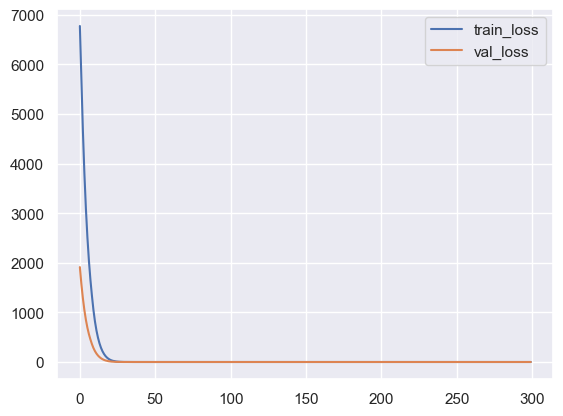

Finished Training
Epoch 1/300


100%|██████████| 13/13 [00:00<00:00, 172.19it/s]


Train Loss: 6662.137939453125


100%|██████████| 4/4 [00:00<00:00, 711.47it/s]


Epoch 2/300


100%|██████████| 13/13 [00:00<00:00, 152.52it/s]


Train Loss: 5464.5911865234375


100%|██████████| 4/4 [00:00<00:00, 748.92it/s]


Epoch 3/300


100%|██████████| 13/13 [00:00<00:00, 193.80it/s]


Train Loss: 4445.412841796875


100%|██████████| 4/4 [00:00<00:00, 740.19it/s]


Epoch 4/300


100%|██████████| 13/13 [00:00<00:00, 170.36it/s]


Train Loss: 3586.709747314453


100%|██████████| 4/4 [00:00<00:00, 746.68it/s]


Epoch 5/300


100%|██████████| 13/13 [00:00<00:00, 155.33it/s]


Train Loss: 2885.0367584228516


100%|██████████| 4/4 [00:00<00:00, 715.17it/s]


Epoch 6/300


100%|██████████| 13/13 [00:00<00:00, 188.05it/s]


Train Loss: 2317.9515991210938


100%|██████████| 4/4 [00:00<00:00, 645.67it/s]


Epoch 7/300


100%|██████████| 13/13 [00:00<00:00, 183.47it/s]


Train Loss: 1860.2147064208984


100%|██████████| 4/4 [00:00<00:00, 762.77it/s]


Epoch 8/300


100%|██████████| 13/13 [00:00<00:00, 86.79it/s]


Train Loss: 1490.2602615356445


100%|██████████| 4/4 [00:00<00:00, 551.90it/s]


Epoch 9/300


100%|██████████| 13/13 [00:00<00:00, 184.53it/s]


Train Loss: 1190.616439819336


100%|██████████| 4/4 [00:00<00:00, 580.55it/s]


Epoch 10/300


100%|██████████| 13/13 [00:00<00:00, 73.40it/s]


Train Loss: 947.490966796875


100%|██████████| 4/4 [00:00<00:00, 623.83it/s]


Epoch 11/300


100%|██████████| 13/13 [00:00<00:00, 91.03it/s]


Train Loss: 750.1568832397461


100%|██████████| 4/4 [00:00<00:00, 554.11it/s]


Epoch 12/300


100%|██████████| 13/13 [00:00<00:00, 69.10it/s] 


Train Loss: 590.1851844787598


100%|██████████| 4/4 [00:00<00:00, 205.06it/s]


Epoch 13/300


100%|██████████| 13/13 [00:00<00:00, 39.46it/s]


Train Loss: 460.9516258239746


100%|██████████| 4/4 [00:00<00:00, 702.59it/s]


Epoch 14/300


100%|██████████| 13/13 [00:00<00:00, 97.64it/s]


Train Loss: 357.1056327819824


100%|██████████| 4/4 [00:00<00:00, 645.90it/s]


Epoch 15/300


100%|██████████| 13/13 [00:00<00:00, 51.48it/s]


Train Loss: 274.23591232299805


100%|██████████| 4/4 [00:00<00:00, 234.85it/s]


Epoch 16/300


100%|██████████| 13/13 [00:00<00:00, 84.68it/s]


Train Loss: 208.6903772354126


100%|██████████| 4/4 [00:00<00:00, 129.07it/s]


Epoch 17/300


100%|██████████| 13/13 [00:00<00:00, 146.23it/s]


Train Loss: 157.30951595306396


100%|██████████| 4/4 [00:00<00:00, 687.06it/s]


Epoch 18/300


100%|██████████| 13/13 [00:00<00:00, 163.57it/s]


Train Loss: 117.44165515899658


100%|██████████| 4/4 [00:00<00:00, 474.78it/s]


Epoch 19/300


100%|██████████| 13/13 [00:00<00:00, 156.55it/s]


Train Loss: 86.82185506820679


100%|██████████| 4/4 [00:00<00:00, 602.33it/s]


Epoch 20/300


100%|██████████| 13/13 [00:00<00:00, 146.69it/s]


Train Loss: 63.549628257751465


100%|██████████| 4/4 [00:00<00:00, 630.32it/s]


Epoch 21/300


100%|██████████| 13/13 [00:00<00:00, 160.57it/s]


Train Loss: 46.05509543418884


100%|██████████| 4/4 [00:00<00:00, 708.44it/s]


Epoch 22/300


100%|██████████| 13/13 [00:00<00:00, 84.88it/s]


Train Loss: 33.046077728271484


100%|██████████| 4/4 [00:00<00:00, 779.25it/s]


Epoch 23/300


100%|██████████| 13/13 [00:00<00:00, 143.21it/s]


Train Loss: 23.480642557144165


100%|██████████| 4/4 [00:00<00:00, 726.19it/s]


Epoch 24/300


100%|██████████| 13/13 [00:00<00:00, 181.35it/s]


Train Loss: 16.51589286327362


100%|██████████| 4/4 [00:00<00:00, 727.29it/s]


Epoch 25/300


100%|██████████| 13/13 [00:00<00:00, 76.33it/s]


Train Loss: 11.507815480232239


100%|██████████| 4/4 [00:00<00:00, 146.78it/s]


Epoch 26/300


100%|██████████| 13/13 [00:00<00:00, 35.65it/s]


Train Loss: 7.940237939357758


100%|██████████| 4/4 [00:00<00:00, 739.77it/s]


Epoch 27/300


100%|██████████| 13/13 [00:00<00:00, 153.02it/s]


Train Loss: 5.426938056945801


100%|██████████| 4/4 [00:00<00:00, 603.95it/s]


Epoch 28/300


100%|██████████| 13/13 [00:00<00:00, 125.40it/s]


Train Loss: 3.677701458334923


100%|██████████| 4/4 [00:00<00:00, 527.55it/s]


Epoch 29/300


100%|██████████| 13/13 [00:00<00:00, 122.57it/s]


Train Loss: 2.474353164434433


100%|██████████| 4/4 [00:00<00:00, 705.37it/s]


Epoch 30/300


100%|██████████| 13/13 [00:00<00:00, 88.99it/s]


Train Loss: 1.6529041454195976


100%|██████████| 4/4 [00:00<00:00, 697.10it/s]


Epoch 31/300


100%|██████████| 13/13 [00:00<00:00, 60.32it/s]


Train Loss: 1.0985683351755142


100%|██████████| 4/4 [00:00<00:00, 740.45it/s]


Epoch 32/300


100%|██████████| 13/13 [00:00<00:00, 76.11it/s]


Train Loss: 0.7303707711398602


100%|██████████| 4/4 [00:00<00:00, 612.55it/s]


Epoch 33/300


100%|██████████| 13/13 [00:00<00:00, 113.76it/s]


Train Loss: 0.49060098081827164


100%|██████████| 4/4 [00:00<00:00, 724.62it/s]


Epoch 34/300


100%|██████████| 13/13 [00:00<00:00, 187.25it/s]


Train Loss: 0.3279702961444855


100%|██████████| 4/4 [00:00<00:00, 695.14it/s]


Epoch 35/300


100%|██████████| 13/13 [00:00<00:00, 113.86it/s]


Train Loss: 0.22429322823882103


100%|██████████| 4/4 [00:00<00:00, 593.11it/s]


Epoch 36/300


100%|██████████| 13/13 [00:00<00:00, 109.18it/s]


Train Loss: 0.15731570217758417


100%|██████████| 4/4 [00:00<00:00, 523.37it/s]


Epoch 37/300


100%|██████████| 13/13 [00:00<00:00, 151.56it/s]


Train Loss: 0.11642700154334307


100%|██████████| 4/4 [00:00<00:00, 637.36it/s]


Epoch 38/300


100%|██████████| 13/13 [00:00<00:00, 186.53it/s]


Train Loss: 0.09329705405980349


100%|██████████| 4/4 [00:00<00:00, 543.41it/s]


Epoch 39/300


100%|██████████| 13/13 [00:00<00:00, 188.67it/s]


Train Loss: 0.07842694199644029


100%|██████████| 4/4 [00:00<00:00, 765.38it/s]


Epoch 40/300


100%|██████████| 13/13 [00:00<00:00, 191.11it/s]


Train Loss: 0.0669233447406441


100%|██████████| 4/4 [00:00<00:00, 338.35it/s]


Epoch 41/300


100%|██████████| 13/13 [00:00<00:00, 206.38it/s]


Train Loss: 0.06102625094354153


100%|██████████| 4/4 [00:00<00:00, 697.34it/s]


Epoch 42/300


100%|██████████| 13/13 [00:00<00:00, 209.21it/s]


Train Loss: 0.05836417037062347


100%|██████████| 4/4 [00:00<00:00, 774.25it/s]


Epoch 43/300


100%|██████████| 13/13 [00:00<00:00, 209.93it/s]


Train Loss: 0.054720355896279216


100%|██████████| 4/4 [00:00<00:00, 598.82it/s]


Epoch 44/300


100%|██████████| 13/13 [00:00<00:00, 179.90it/s]


Train Loss: 0.05277474317699671


100%|██████████| 4/4 [00:00<00:00, 780.37it/s]


Epoch 45/300


100%|██████████| 13/13 [00:00<00:00, 122.62it/s]


Train Loss: 0.05113176099257544


100%|██████████| 4/4 [00:00<00:00, 613.02it/s]


Epoch 46/300


100%|██████████| 13/13 [00:00<00:00, 185.39it/s]


Train Loss: 0.05379389622248709


100%|██████████| 4/4 [00:00<00:00, 702.86it/s]


Epoch 47/300


100%|██████████| 13/13 [00:00<00:00, 177.12it/s]


Train Loss: 0.053128053434193134


100%|██████████| 4/4 [00:00<00:00, 699.17it/s]


Epoch 48/300


100%|██████████| 13/13 [00:00<00:00, 170.04it/s]


Train Loss: 0.05459535971749574


100%|██████████| 4/4 [00:00<00:00, 491.76it/s]


Epoch 49/300


100%|██████████| 13/13 [00:00<00:00, 206.40it/s]


Train Loss: 0.05429542902857065


100%|██████████| 4/4 [00:00<00:00, 686.58it/s]


Epoch 50/300


100%|██████████| 13/13 [00:00<00:00, 192.12it/s]


Train Loss: 0.05015926860505715


100%|██████████| 4/4 [00:00<00:00, 811.87it/s]


Epoch 51/300


100%|██████████| 13/13 [00:00<00:00, 216.50it/s]


Train Loss: 0.05552494490984827


100%|██████████| 4/4 [00:00<00:00, 713.41it/s]


Epoch 52/300


100%|██████████| 13/13 [00:00<00:00, 204.56it/s]


Train Loss: 0.054228353197686374


100%|██████████| 4/4 [00:00<00:00, 354.35it/s]


Epoch 53/300


100%|██████████| 13/13 [00:00<00:00, 199.56it/s]


Train Loss: 0.05125150101957843


100%|██████████| 4/4 [00:00<00:00, 602.31it/s]


Epoch 54/300


100%|██████████| 13/13 [00:00<00:00, 199.88it/s]


Train Loss: 0.05177656782325357


100%|██████████| 4/4 [00:00<00:00, 671.03it/s]


Epoch 55/300


100%|██████████| 13/13 [00:00<00:00, 209.84it/s]


Train Loss: 0.05790870712371543


100%|██████████| 4/4 [00:00<00:00, 747.38it/s]


Epoch 56/300


100%|██████████| 13/13 [00:00<00:00, 203.45it/s]


Train Loss: 0.058118429384194314


100%|██████████| 4/4 [00:00<00:00, 666.45it/s]


Epoch 57/300


100%|██████████| 13/13 [00:00<00:00, 190.31it/s]


Train Loss: 0.05166507203830406


100%|██████████| 4/4 [00:00<00:00, 613.88it/s]


Epoch 58/300


100%|██████████| 13/13 [00:00<00:00, 218.00it/s]


Train Loss: 0.058045591809786856


100%|██████████| 4/4 [00:00<00:00, 717.99it/s]


Epoch 59/300


100%|██████████| 13/13 [00:00<00:00, 208.77it/s]


Train Loss: 0.056433198624290526


100%|██████████| 4/4 [00:00<00:00, 551.50it/s]


Epoch 60/300


100%|██████████| 13/13 [00:00<00:00, 168.54it/s]


Train Loss: 0.05623366613872349


100%|██████████| 4/4 [00:00<00:00, 705.73it/s]


Epoch 61/300


100%|██████████| 13/13 [00:00<00:00, 179.27it/s]


Train Loss: 0.052709900483023375


100%|██████████| 4/4 [00:00<00:00, 550.27it/s]


Epoch 62/300


100%|██████████| 13/13 [00:00<00:00, 210.18it/s]


Train Loss: 0.058061689778696746


100%|██████████| 4/4 [00:00<00:00, 703.62it/s]


Epoch 63/300


100%|██████████| 13/13 [00:00<00:00, 195.02it/s]


Train Loss: 0.05198987480252981


100%|██████████| 4/4 [00:00<00:00, 735.00it/s]


Epoch 64/300


100%|██████████| 13/13 [00:00<00:00, 218.23it/s]


Train Loss: 0.05181654205080122


100%|██████████| 4/4 [00:00<00:00, 725.82it/s]


Epoch 65/300


100%|██████████| 13/13 [00:00<00:00, 211.08it/s]


Train Loss: 0.051511009340174496


100%|██████████| 4/4 [00:00<00:00, 753.29it/s]


Epoch 66/300


100%|██████████| 13/13 [00:00<00:00, 194.45it/s]


Train Loss: 0.051217972475569695


100%|██████████| 4/4 [00:00<00:00, 593.46it/s]


Epoch 67/300


100%|██████████| 13/13 [00:00<00:00, 202.65it/s]


Train Loss: 0.05200122814858332


100%|██████████| 4/4 [00:00<00:00, 555.24it/s]


Epoch 68/300


100%|██████████| 13/13 [00:00<00:00, 202.64it/s]


Train Loss: 0.050534803594928235


100%|██████████| 4/4 [00:00<00:00, 699.17it/s]


Epoch 69/300


100%|██████████| 13/13 [00:00<00:00, 214.26it/s]


Train Loss: 0.052486624859739095


100%|██████████| 4/4 [00:00<00:00, 652.84it/s]


Epoch 70/300


100%|██████████| 13/13 [00:00<00:00, 210.25it/s]


Train Loss: 0.05486401589587331


100%|██████████| 4/4 [00:00<00:00, 534.12it/s]


Epoch 71/300


100%|██████████| 13/13 [00:00<00:00, 198.77it/s]


Train Loss: 0.05130460561485961


100%|██████████| 4/4 [00:00<00:00, 548.10it/s]


Epoch 72/300


100%|██████████| 13/13 [00:00<00:00, 133.34it/s]


Train Loss: 0.050404323381371796


100%|██████████| 4/4 [00:00<00:00, 687.62it/s]


Epoch 73/300


100%|██████████| 13/13 [00:00<00:00, 160.08it/s]


Train Loss: 0.049847209244035184


100%|██████████| 4/4 [00:00<00:00, 819.20it/s]


Epoch 74/300


100%|██████████| 13/13 [00:00<00:00, 189.50it/s]


Train Loss: 0.05429645907133818


100%|██████████| 4/4 [00:00<00:00, 830.06it/s]


Epoch 75/300


100%|██████████| 13/13 [00:00<00:00, 214.40it/s]


Train Loss: 0.05390000302577391


100%|██████████| 4/4 [00:00<00:00, 774.64it/s]


Epoch 76/300


100%|██████████| 13/13 [00:00<00:00, 213.29it/s]


Train Loss: 0.05790448863990605


100%|██████████| 4/4 [00:00<00:00, 758.91it/s]


Epoch 77/300


100%|██████████| 13/13 [00:00<00:00, 190.63it/s]


Train Loss: 0.0573832870577462


100%|██████████| 4/4 [00:00<00:00, 662.35it/s]


Epoch 78/300


100%|██████████| 13/13 [00:00<00:00, 210.23it/s]


Train Loss: 0.05217011843342334


100%|██████████| 4/4 [00:00<00:00, 784.79it/s]


Epoch 79/300


100%|██████████| 13/13 [00:00<00:00, 196.27it/s]


Train Loss: 0.052823135745711625


100%|██████████| 4/4 [00:00<00:00, 763.09it/s]


Epoch 80/300


100%|██████████| 13/13 [00:00<00:00, 198.14it/s]


Train Loss: 0.053348806337453425


100%|██████████| 4/4 [00:00<00:00, 764.37it/s]


Epoch 81/300


100%|██████████| 13/13 [00:00<00:00, 193.96it/s]


Train Loss: 0.050462227198295295


100%|██████████| 4/4 [00:00<00:00, 799.68it/s]


Epoch 82/300


100%|██████████| 13/13 [00:00<00:00, 193.32it/s]


Train Loss: 0.05540312809171155


100%|██████████| 4/4 [00:00<00:00, 784.61it/s]


Epoch 83/300


100%|██████████| 13/13 [00:00<00:00, 216.67it/s]


Train Loss: 0.052548800711520016


100%|██████████| 4/4 [00:00<00:00, 477.33it/s]


Epoch 84/300


100%|██████████| 13/13 [00:00<00:00, 223.55it/s]


Train Loss: 0.05492024926934391


100%|██████████| 4/4 [00:00<00:00, 752.00it/s]


Epoch 85/300


100%|██████████| 13/13 [00:00<00:00, 203.84it/s]


Train Loss: 0.056623089825734496


100%|██████████| 4/4 [00:00<00:00, 580.41it/s]


Epoch 86/300


100%|██████████| 13/13 [00:00<00:00, 208.32it/s]


Train Loss: 0.05333748727571219


100%|██████████| 4/4 [00:00<00:00, 783.25it/s]


Epoch 87/300


100%|██████████| 13/13 [00:00<00:00, 136.98it/s]


Train Loss: 0.0516753502888605


100%|██████████| 4/4 [00:00<00:00, 794.15it/s]


Epoch 88/300


100%|██████████| 13/13 [00:00<00:00, 187.99it/s]


Train Loss: 0.050893086881842464


100%|██████████| 4/4 [00:00<00:00, 806.91it/s]


Epoch 89/300


100%|██████████| 13/13 [00:00<00:00, 205.70it/s]


Train Loss: 0.05082424497231841


100%|██████████| 4/4 [00:00<00:00, 657.67it/s]


Epoch 90/300


100%|██████████| 13/13 [00:00<00:00, 178.64it/s]


Train Loss: 0.05291841132566333


100%|██████████| 4/4 [00:00<00:00, 698.82it/s]


Epoch 91/300


100%|██████████| 13/13 [00:00<00:00, 207.44it/s]


Train Loss: 0.05117614223854616


100%|██████████| 4/4 [00:00<00:00, 805.16it/s]


Epoch 92/300


100%|██████████| 13/13 [00:00<00:00, 162.81it/s]


Train Loss: 0.05006147484527901


100%|██████████| 4/4 [00:00<00:00, 332.28it/s]


Epoch 93/300


100%|██████████| 13/13 [00:00<00:00, 198.04it/s]


Train Loss: 0.055795368389226496


100%|██████████| 4/4 [00:00<00:00, 640.74it/s]


Epoch 94/300


100%|██████████| 13/13 [00:00<00:00, 209.52it/s]


Train Loss: 0.061544266529381275


100%|██████████| 4/4 [00:00<00:00, 647.07it/s]


Epoch 95/300


100%|██████████| 13/13 [00:00<00:00, 118.91it/s]


Train Loss: 0.05487938306760043


100%|██████████| 4/4 [00:00<00:00, 734.07it/s]


Epoch 96/300


100%|██████████| 13/13 [00:00<00:00, 152.46it/s]


Train Loss: 0.05520780908409506


100%|██████████| 4/4 [00:00<00:00, 724.50it/s]


Epoch 97/300


100%|██████████| 13/13 [00:00<00:00, 88.89it/s] 


Train Loss: 0.05086813634261489


100%|██████████| 4/4 [00:00<00:00, 461.25it/s]


Epoch 98/300


100%|██████████| 13/13 [00:00<00:00, 153.72it/s]


Train Loss: 0.05463815538678318


100%|██████████| 4/4 [00:00<00:00, 700.77it/s]


Epoch 99/300


100%|██████████| 13/13 [00:00<00:00, 139.73it/s]


Train Loss: 0.05226915155071765


100%|██████████| 4/4 [00:00<00:00, 716.61it/s]


Epoch 100/300


100%|██████████| 13/13 [00:00<00:00, 173.25it/s]


Train Loss: 0.05477751768194139


100%|██████████| 4/4 [00:00<00:00, 747.81it/s]


Epoch 101/300


100%|██████████| 13/13 [00:00<00:00, 160.26it/s]


Train Loss: 0.055819076660554856


100%|██████████| 4/4 [00:00<00:00, 730.71it/s]


Epoch 102/300


100%|██████████| 13/13 [00:00<00:00, 178.26it/s]


Train Loss: 0.05983485281467438


100%|██████████| 4/4 [00:00<00:00, 90.71it/s]


Epoch 103/300


100%|██████████| 13/13 [00:00<00:00, 88.92it/s]


Train Loss: 0.05898780270945281


100%|██████████| 4/4 [00:00<00:00, 309.07it/s]


Epoch 104/300


100%|██████████| 13/13 [00:00<00:00, 63.18it/s]


Train Loss: 0.053974880021996796


100%|██████████| 4/4 [00:00<00:00, 541.20it/s]


Epoch 105/300


100%|██████████| 13/13 [00:00<00:00, 182.60it/s]


Train Loss: 0.05763594224117696


100%|██████████| 4/4 [00:00<00:00, 476.98it/s]


Epoch 106/300


100%|██████████| 13/13 [00:00<00:00, 47.63it/s]


Train Loss: 0.059580662520602345


100%|██████████| 4/4 [00:00<00:00, 561.79it/s]


Epoch 107/300


100%|██████████| 13/13 [00:00<00:00, 94.46it/s]


Train Loss: 0.06578585103852674


100%|██████████| 4/4 [00:00<00:00, 666.98it/s]


Epoch 108/300


100%|██████████| 13/13 [00:00<00:00, 59.06it/s]


Train Loss: 0.0547358380863443


100%|██████████| 4/4 [00:00<00:00, 732.34it/s]


Epoch 109/300


100%|██████████| 13/13 [00:00<00:00, 101.02it/s]


Train Loss: 0.052063177106902


100%|██████████| 4/4 [00:00<00:00, 669.43it/s]


Epoch 110/300


100%|██████████| 13/13 [00:00<00:00, 52.66it/s]


Train Loss: 0.056246430962346494


100%|██████████| 4/4 [00:00<00:00, 232.90it/s]


Epoch 111/300


100%|██████████| 13/13 [00:00<00:00, 68.29it/s]


Train Loss: 0.061535462155006826


100%|██████████| 4/4 [00:00<00:00, 493.81it/s]


Epoch 112/300


100%|██████████| 13/13 [00:00<00:00, 168.11it/s]


Train Loss: 0.05956525425426662


100%|██████████| 4/4 [00:00<00:00, 634.68it/s]


Epoch 113/300


100%|██████████| 13/13 [00:00<00:00, 149.40it/s]


Train Loss: 0.05296291713602841


100%|██████████| 4/4 [00:00<00:00, 516.67it/s]


Epoch 114/300


100%|██████████| 13/13 [00:00<00:00, 85.95it/s]


Train Loss: 0.05154984205728397


100%|██████████| 4/4 [00:00<00:00, 499.95it/s]


Epoch 115/300


100%|██████████| 13/13 [00:00<00:00, 155.87it/s]


Train Loss: 0.0537525144754909


100%|██████████| 4/4 [00:00<00:00, 593.63it/s]


Epoch 116/300


100%|██████████| 13/13 [00:00<00:00, 86.98it/s] 


Train Loss: 0.052188740810379386


100%|██████████| 4/4 [00:00<00:00, 190.74it/s]


Epoch 117/300


100%|██████████| 13/13 [00:00<00:00, 66.58it/s]


Train Loss: 0.05325768829789013


100%|██████████| 4/4 [00:00<00:00, 225.35it/s]


Epoch 118/300


100%|██████████| 13/13 [00:00<00:00, 59.65it/s]


Train Loss: 0.054185218235943466


100%|██████████| 4/4 [00:00<00:00, 179.48it/s]


Epoch 119/300


100%|██████████| 13/13 [00:00<00:00, 102.25it/s]


Train Loss: 0.051083062891848385


100%|██████████| 4/4 [00:00<00:00, 449.29it/s]


Epoch 120/300


100%|██████████| 13/13 [00:00<00:00, 127.26it/s]


Train Loss: 0.05845586594659835


100%|██████████| 4/4 [00:00<00:00, 493.46it/s]


Epoch 121/300


100%|██████████| 13/13 [00:00<00:00, 143.72it/s]


Train Loss: 0.056321549229323864


100%|██████████| 4/4 [00:00<00:00, 494.57it/s]


Epoch 122/300


100%|██████████| 13/13 [00:00<00:00, 174.62it/s]


Train Loss: 0.05210958461975679


100%|██████████| 4/4 [00:00<00:00, 647.67it/s]


Epoch 123/300


100%|██████████| 13/13 [00:00<00:00, 151.98it/s]


Train Loss: 0.05304729309864342


100%|██████████| 4/4 [00:00<00:00, 509.95it/s]


Epoch 124/300


100%|██████████| 13/13 [00:00<00:00, 185.50it/s]


Train Loss: 0.058622788987122476


100%|██████████| 4/4 [00:00<00:00, 704.21it/s]


Epoch 125/300


100%|██████████| 13/13 [00:00<00:00, 148.09it/s]


Train Loss: 0.058469995157793164


100%|██████████| 4/4 [00:00<00:00, 98.97it/s]


Epoch 126/300


100%|██████████| 13/13 [00:00<00:00, 43.42it/s]


Train Loss: 0.054613033891655505


100%|██████████| 4/4 [00:00<00:00, 643.69it/s]


Epoch 127/300


100%|██████████| 13/13 [00:00<00:00, 99.24it/s]


Train Loss: 0.05554868798935786


100%|██████████| 4/4 [00:00<00:00, 599.53it/s]


Epoch 128/300


100%|██████████| 13/13 [00:00<00:00, 63.68it/s]


Train Loss: 0.05910395213868469


100%|██████████| 4/4 [00:00<00:00, 248.43it/s]


Epoch 129/300


100%|██████████| 13/13 [00:00<00:00, 116.23it/s]


Train Loss: 0.05931867251638323


100%|██████████| 4/4 [00:00<00:00, 748.21it/s]


Epoch 130/300


100%|██████████| 13/13 [00:00<00:00, 165.99it/s]


Train Loss: 0.0585010873619467


100%|██████████| 4/4 [00:00<00:00, 753.56it/s]


Epoch 131/300


100%|██████████| 13/13 [00:00<00:00, 225.02it/s]


Train Loss: 0.05568338301964104


100%|██████████| 4/4 [00:00<00:00, 296.91it/s]


Epoch 132/300


100%|██████████| 13/13 [00:00<00:00, 147.26it/s]


Train Loss: 0.058232012554071844


100%|██████████| 4/4 [00:00<00:00, 584.02it/s]


Epoch 133/300


100%|██████████| 13/13 [00:00<00:00, 165.50it/s]


Train Loss: 0.05837529408745468


100%|██████████| 4/4 [00:00<00:00, 564.89it/s]


Epoch 134/300


100%|██████████| 13/13 [00:00<00:00, 152.05it/s]


Train Loss: 0.05596244952175766


100%|██████████| 4/4 [00:00<00:00, 368.97it/s]


Epoch 135/300


100%|██████████| 13/13 [00:00<00:00, 199.38it/s]


Train Loss: 0.05163633089978248


100%|██████████| 4/4 [00:00<00:00, 535.96it/s]


Epoch 136/300


100%|██████████| 13/13 [00:00<00:00, 167.77it/s]


Train Loss: 0.052790175774134696


100%|██████████| 4/4 [00:00<00:00, 693.73it/s]


Epoch 137/300


100%|██████████| 13/13 [00:00<00:00, 149.10it/s]


Train Loss: 0.05790613126009703


100%|██████████| 4/4 [00:00<00:00, 760.77it/s]


Epoch 138/300


100%|██████████| 13/13 [00:00<00:00, 140.90it/s]


Train Loss: 0.05510579887777567


100%|██████████| 4/4 [00:00<00:00, 723.09it/s]


Epoch 139/300


100%|██████████| 13/13 [00:00<00:00, 215.13it/s]


Train Loss: 0.05508364422712475


100%|██████████| 4/4 [00:00<00:00, 794.90it/s]


Epoch 140/300


100%|██████████| 13/13 [00:00<00:00, 205.15it/s]


Train Loss: 0.05255293578375131


100%|██████████| 4/4 [00:00<00:00, 639.50it/s]


Epoch 141/300


100%|██████████| 13/13 [00:00<00:00, 206.99it/s]


Train Loss: 0.05219141859561205


100%|██████████| 4/4 [00:00<00:00, 796.19it/s]


Epoch 142/300


100%|██████████| 13/13 [00:00<00:00, 216.61it/s]


Train Loss: 0.05587268085218966


100%|██████████| 4/4 [00:00<00:00, 721.38it/s]


Epoch 143/300


100%|██████████| 13/13 [00:00<00:00, 211.78it/s]


Train Loss: 0.05334371025674045


100%|██████████| 4/4 [00:00<00:00, 619.89it/s]


Epoch 144/300


100%|██████████| 13/13 [00:00<00:00, 186.47it/s]


Train Loss: 0.05169429647503421


100%|██████████| 4/4 [00:00<00:00, 660.94it/s]


Epoch 145/300


100%|██████████| 13/13 [00:00<00:00, 176.87it/s]


Train Loss: 0.05132057273294777


100%|██████████| 4/4 [00:00<00:00, 731.29it/s]


Epoch 146/300


100%|██████████| 13/13 [00:00<00:00, 188.93it/s]


Train Loss: 0.05142331088427454


100%|██████████| 4/4 [00:00<00:00, 676.36it/s]


Epoch 147/300


100%|██████████| 13/13 [00:00<00:00, 178.58it/s]


Train Loss: 0.05482527113053948


100%|██████████| 4/4 [00:00<00:00, 762.60it/s]


Epoch 148/300


100%|██████████| 13/13 [00:00<00:00, 128.57it/s]


Train Loss: 0.051278337952680886


100%|██████████| 4/4 [00:00<00:00, 631.24it/s]


Epoch 149/300


100%|██████████| 13/13 [00:00<00:00, 175.61it/s]


Train Loss: 0.056844706647098064


100%|██████████| 4/4 [00:00<00:00, 627.07it/s]


Epoch 150/300


100%|██████████| 13/13 [00:00<00:00, 188.47it/s]


Train Loss: 0.056716898921877146


100%|██████████| 4/4 [00:00<00:00, 747.38it/s]


Epoch 151/300


100%|██████████| 13/13 [00:00<00:00, 198.17it/s]


Train Loss: 0.051771151076536626


100%|██████████| 4/4 [00:00<00:00, 748.95it/s]


Epoch 152/300


100%|██████████| 13/13 [00:00<00:00, 192.37it/s]


Train Loss: 0.052876970206853


100%|██████████| 4/4 [00:00<00:00, 764.48it/s]


Epoch 153/300


100%|██████████| 13/13 [00:00<00:00, 178.67it/s]


Train Loss: 0.05528406531084329


100%|██████████| 4/4 [00:00<00:00, 744.63it/s]


Epoch 154/300


100%|██████████| 13/13 [00:00<00:00, 180.27it/s]


Train Loss: 0.056702030124142766


100%|██████████| 4/4 [00:00<00:00, 754.57it/s]


Epoch 155/300


100%|██████████| 13/13 [00:00<00:00, 196.28it/s]


Train Loss: 0.0566239629406482


100%|██████████| 4/4 [00:00<00:00, 676.26it/s]


Epoch 156/300


100%|██████████| 13/13 [00:00<00:00, 179.24it/s]


Train Loss: 0.05268046003766358


100%|██████████| 4/4 [00:00<00:00, 654.90it/s]


Epoch 157/300


100%|██████████| 13/13 [00:00<00:00, 186.78it/s]


Train Loss: 0.05082937050610781


100%|██████████| 4/4 [00:00<00:00, 629.14it/s]


Epoch 158/300


100%|██████████| 13/13 [00:00<00:00, 199.18it/s]


Train Loss: 0.05368471774272621


100%|██████████| 4/4 [00:00<00:00, 734.62it/s]


Epoch 159/300


100%|██████████| 13/13 [00:00<00:00, 197.21it/s]


Train Loss: 0.0563287353143096


100%|██████████| 4/4 [00:00<00:00, 409.00it/s]


Epoch 160/300


100%|██████████| 13/13 [00:00<00:00, 198.12it/s]


Train Loss: 0.04978822311386466


100%|██████████| 4/4 [00:00<00:00, 672.70it/s]


Epoch 161/300


100%|██████████| 13/13 [00:00<00:00, 211.99it/s]


Train Loss: 0.05659723072312772


100%|██████████| 4/4 [00:00<00:00, 754.13it/s]


Epoch 162/300


100%|██████████| 13/13 [00:00<00:00, 193.77it/s]


Train Loss: 0.05965359997935593


100%|██████████| 4/4 [00:00<00:00, 808.54it/s]


Epoch 163/300


100%|██████████| 13/13 [00:00<00:00, 192.02it/s]


Train Loss: 0.05727690574713051


100%|██████████| 4/4 [00:00<00:00, 728.87it/s]


Epoch 164/300


100%|██████████| 13/13 [00:00<00:00, 206.57it/s]


Train Loss: 0.0596300185425207


100%|██████████| 4/4 [00:00<00:00, 782.67it/s]


Epoch 165/300


100%|██████████| 13/13 [00:00<00:00, 198.63it/s]


Train Loss: 0.07036648434586823


100%|██████████| 4/4 [00:00<00:00, 732.09it/s]


Epoch 166/300


100%|██████████| 13/13 [00:00<00:00, 189.10it/s]


Train Loss: 0.05742800532607362


100%|██████████| 4/4 [00:00<00:00, 735.29it/s]


Epoch 167/300


100%|██████████| 13/13 [00:00<00:00, 185.79it/s]


Train Loss: 0.05553016311023384


100%|██████████| 4/4 [00:00<00:00, 653.17it/s]


Epoch 168/300


100%|██████████| 13/13 [00:00<00:00, 194.63it/s]


Train Loss: 0.05045322538353503


100%|██████████| 4/4 [00:00<00:00, 713.01it/s]


Epoch 169/300


100%|██████████| 13/13 [00:00<00:00, 177.87it/s]


Train Loss: 0.05451791489031166


100%|██████████| 4/4 [00:00<00:00, 742.12it/s]


Epoch 170/300


100%|██████████| 13/13 [00:00<00:00, 177.58it/s]


Train Loss: 0.05597592983394861


100%|██████████| 4/4 [00:00<00:00, 662.11it/s]


Epoch 171/300


100%|██████████| 13/13 [00:00<00:00, 187.55it/s]


Train Loss: 0.054779823403805494


100%|██████████| 4/4 [00:00<00:00, 799.07it/s]


Epoch 172/300


100%|██████████| 13/13 [00:00<00:00, 212.52it/s]


Train Loss: 0.05827412463258952


100%|██████████| 4/4 [00:00<00:00, 800.29it/s]


Epoch 173/300


100%|██████████| 13/13 [00:00<00:00, 186.41it/s]


Train Loss: 0.05257899046409875


100%|██████████| 4/4 [00:00<00:00, 497.13it/s]


Epoch 174/300


100%|██████████| 13/13 [00:00<00:00, 224.36it/s]


Train Loss: 0.05407758662477136


100%|██████████| 4/4 [00:00<00:00, 800.63it/s]


Epoch 175/300


100%|██████████| 13/13 [00:00<00:00, 125.00it/s]


Train Loss: 0.050812407745979726


100%|██████████| 4/4 [00:00<00:00, 811.51it/s]


Epoch 176/300


100%|██████████| 13/13 [00:00<00:00, 199.94it/s]


Train Loss: 0.05389845243189484


100%|██████████| 4/4 [00:00<00:00, 840.71it/s]


Epoch 177/300


100%|██████████| 13/13 [00:00<00:00, 207.25it/s]


Train Loss: 0.058152661891654134


100%|██████████| 4/4 [00:00<00:00, 740.45it/s]


Epoch 178/300


100%|██████████| 13/13 [00:00<00:00, 206.65it/s]


Train Loss: 0.057513581414241344


100%|██████████| 4/4 [00:00<00:00, 754.85it/s]


Epoch 179/300


100%|██████████| 13/13 [00:00<00:00, 199.30it/s]


Train Loss: 0.05356396263232455


100%|██████████| 4/4 [00:00<00:00, 799.18it/s]


Epoch 180/300


100%|██████████| 13/13 [00:00<00:00, 203.88it/s]


Train Loss: 0.05589543899986893


100%|██████████| 4/4 [00:00<00:00, 671.92it/s]


Epoch 181/300


100%|██████████| 13/13 [00:00<00:00, 203.96it/s]


Train Loss: 0.05334456101991236


100%|██████████| 4/4 [00:00<00:00, 792.57it/s]


Epoch 182/300


100%|██████████| 13/13 [00:00<00:00, 221.93it/s]


Train Loss: 0.060595362447202206


100%|██████████| 4/4 [00:00<00:00, 689.17it/s]


Epoch 183/300


100%|██████████| 13/13 [00:00<00:00, 178.97it/s]


Train Loss: 0.058605782338418067


100%|██████████| 4/4 [00:00<00:00, 780.63it/s]


Epoch 184/300


100%|██████████| 13/13 [00:00<00:00, 191.16it/s]


Train Loss: 0.06061558239161968


100%|██████████| 4/4 [00:00<00:00, 627.26it/s]


Epoch 185/300


100%|██████████| 13/13 [00:00<00:00, 207.71it/s]


Train Loss: 0.04996709059923887


100%|██████████| 4/4 [00:00<00:00, 783.84it/s]


Epoch 186/300


100%|██████████| 13/13 [00:00<00:00, 189.63it/s]


Train Loss: 0.05580467253457755


100%|██████████| 4/4 [00:00<00:00, 802.20it/s]


Epoch 187/300


100%|██████████| 13/13 [00:00<00:00, 206.21it/s]


Train Loss: 0.05147786368615925


100%|██████████| 4/4 [00:00<00:00, 751.84it/s]


Epoch 188/300


100%|██████████| 13/13 [00:00<00:00, 215.89it/s]


Train Loss: 0.05080640723463148


100%|██████████| 4/4 [00:00<00:00, 443.08it/s]


Epoch 189/300


100%|██████████| 13/13 [00:00<00:00, 187.91it/s]


Train Loss: 0.05364463466685265


100%|██████████| 4/4 [00:00<00:00, 741.01it/s]


Epoch 190/300


100%|██████████| 13/13 [00:00<00:00, 193.17it/s]


Train Loss: 0.05405950889689848


100%|██████████| 4/4 [00:00<00:00, 587.56it/s]


Epoch 191/300


100%|██████████| 13/13 [00:00<00:00, 206.71it/s]


Train Loss: 0.055959157878533006


100%|██████████| 4/4 [00:00<00:00, 755.70it/s]


Epoch 192/300


100%|██████████| 13/13 [00:00<00:00, 188.99it/s]


Train Loss: 0.058218123856931925


100%|██████████| 4/4 [00:00<00:00, 696.87it/s]


Epoch 193/300


100%|██████████| 13/13 [00:00<00:00, 149.92it/s]


Train Loss: 0.05696382001042366


100%|██████████| 4/4 [00:00<00:00, 720.83it/s]


Epoch 194/300


100%|██████████| 13/13 [00:00<00:00, 146.92it/s]


Train Loss: 0.055920333485119045


100%|██████████| 4/4 [00:00<00:00, 461.74it/s]


Epoch 195/300


100%|██████████| 13/13 [00:00<00:00, 98.24it/s]


Train Loss: 0.05825856514275074


100%|██████████| 4/4 [00:00<00:00, 679.79it/s]


Epoch 196/300


100%|██████████| 13/13 [00:00<00:00, 179.34it/s]


Train Loss: 0.05659051949623972


100%|██████████| 4/4 [00:00<00:00, 691.93it/s]


Epoch 197/300


100%|██████████| 13/13 [00:00<00:00, 73.64it/s]


Train Loss: 0.05613126314710826


100%|██████████| 4/4 [00:00<00:00, 181.86it/s]


Epoch 198/300


100%|██████████| 13/13 [00:00<00:00, 153.94it/s]


Train Loss: 0.05527225648984313


100%|██████████| 4/4 [00:00<00:00, 462.00it/s]


Epoch 199/300


100%|██████████| 13/13 [00:00<00:00, 66.08it/s]


Train Loss: 0.05540565378032625


100%|██████████| 4/4 [00:00<00:00, 577.79it/s]


Epoch 200/300


100%|██████████| 13/13 [00:00<00:00, 78.62it/s]


Train Loss: 0.055476842215284705


100%|██████████| 4/4 [00:00<00:00, 796.68it/s]


Epoch 201/300


100%|██████████| 13/13 [00:00<00:00, 192.45it/s]


Train Loss: 0.0558272663038224


100%|██████████| 4/4 [00:00<00:00, 131.46it/s]


Epoch 202/300


100%|██████████| 13/13 [00:00<00:00, 48.31it/s]


Train Loss: 0.058299187920056283


100%|██████████| 4/4 [00:00<00:00, 135.38it/s]


Epoch 203/300


100%|██████████| 13/13 [00:00<00:00, 66.83it/s]


Train Loss: 0.05339876445941627


100%|██████████| 4/4 [00:00<00:00, 665.76it/s]


Epoch 204/300


100%|██████████| 13/13 [00:00<00:00, 147.96it/s]


Train Loss: 0.054535428120289


100%|██████████| 4/4 [00:00<00:00, 610.50it/s]


Epoch 205/300


100%|██████████| 13/13 [00:00<00:00, 82.99it/s]


Train Loss: 0.055013655801303685


100%|██████████| 4/4 [00:00<00:00, 841.43it/s]


Epoch 206/300


100%|██████████| 13/13 [00:00<00:00, 139.34it/s]


Train Loss: 0.050112448690924793


100%|██████████| 4/4 [00:00<00:00, 685.51it/s]


Epoch 207/300


100%|██████████| 13/13 [00:00<00:00, 117.89it/s]


Train Loss: 0.051803488517180085


100%|██████████| 4/4 [00:00<00:00, 81.04it/s]


Epoch 208/300


100%|██████████| 13/13 [00:00<00:00, 51.83it/s]


Train Loss: 0.05620665894821286


100%|██████████| 4/4 [00:00<00:00, 240.98it/s]


Epoch 209/300


100%|██████████| 13/13 [00:00<00:00, 69.74it/s]


Train Loss: 0.0627650209935382


100%|██████████| 4/4 [00:00<00:00, 256.40it/s]


Epoch 210/300


100%|██████████| 13/13 [00:00<00:00, 67.86it/s]


Train Loss: 0.055130182357970625


100%|██████████| 4/4 [00:00<00:00, 678.91it/s]


Epoch 211/300


100%|██████████| 13/13 [00:00<00:00, 143.21it/s]


Train Loss: 0.060026259860023856


100%|██████████| 4/4 [00:00<00:00, 616.90it/s]


Epoch 212/300


100%|██████████| 13/13 [00:00<00:00, 151.55it/s]


Train Loss: 0.058424078742973506


100%|██████████| 4/4 [00:00<00:00, 450.14it/s]


Epoch 213/300


100%|██████████| 13/13 [00:00<00:00, 137.08it/s]


Train Loss: 0.058275269460864365


100%|██████████| 4/4 [00:00<00:00, 195.95it/s]


Epoch 214/300


100%|██████████| 13/13 [00:00<00:00, 142.65it/s]


Train Loss: 0.056068826001137495


100%|██████████| 4/4 [00:00<00:00, 654.77it/s]


Epoch 215/300


100%|██████████| 13/13 [00:00<00:00, 154.38it/s]


Train Loss: 0.05811205075588077


100%|██████████| 4/4 [00:00<00:00, 401.13it/s]


Epoch 216/300


100%|██████████| 13/13 [00:00<00:00, 76.85it/s]


Train Loss: 0.05378554365597665


100%|██████████| 4/4 [00:00<00:00, 682.03it/s]


Epoch 217/300


100%|██████████| 13/13 [00:00<00:00, 53.56it/s]


Train Loss: 0.053667368076276034


100%|██████████| 4/4 [00:00<00:00, 630.15it/s]


Epoch 218/300


100%|██████████| 13/13 [00:00<00:00, 122.80it/s]


Train Loss: 0.05396806582575664


100%|██████████| 4/4 [00:00<00:00, 100.87it/s]


Epoch 219/300


100%|██████████| 13/13 [00:00<00:00, 146.20it/s]


Train Loss: 0.05437786248512566


100%|██████████| 4/4 [00:00<00:00, 322.52it/s]


Epoch 220/300


100%|██████████| 13/13 [00:00<00:00, 71.98it/s]


Train Loss: 0.05345298326574266


100%|██████████| 4/4 [00:00<00:00, 156.76it/s]


Epoch 221/300


100%|██████████| 13/13 [00:00<00:00, 49.24it/s]


Train Loss: 0.056979546090587974


100%|██████████| 4/4 [00:00<00:00, 319.36it/s]


Epoch 222/300


100%|██████████| 13/13 [00:00<00:00, 124.05it/s]


Train Loss: 0.058552999049425125


100%|██████████| 4/4 [00:00<00:00, 612.55it/s]


Epoch 223/300


100%|██████████| 13/13 [00:00<00:00, 163.17it/s]


Train Loss: 0.05537054978776723


100%|██████████| 4/4 [00:00<00:00, 676.69it/s]


Epoch 224/300


100%|██████████| 13/13 [00:00<00:00, 101.31it/s]


Train Loss: 0.053471434861421585


100%|██████████| 4/4 [00:00<00:00, 294.03it/s]


Epoch 225/300


100%|██████████| 13/13 [00:00<00:00, 161.95it/s]


Train Loss: 0.05468986078631133


100%|██████████| 4/4 [00:00<00:00, 506.77it/s]


Epoch 226/300


100%|██████████| 13/13 [00:00<00:00, 127.39it/s]


Train Loss: 0.0533011318766512


100%|██████████| 4/4 [00:00<00:00, 635.52it/s]


Epoch 227/300


100%|██████████| 13/13 [00:00<00:00, 157.83it/s]


Train Loss: 0.053679914970416576


100%|██████████| 4/4 [00:00<00:00, 751.30it/s]


Epoch 228/300


100%|██████████| 13/13 [00:00<00:00, 161.10it/s]


Train Loss: 0.05383635975886136


100%|██████████| 4/4 [00:00<00:00, 350.54it/s]


Epoch 229/300


100%|██████████| 13/13 [00:00<00:00, 189.89it/s]


Train Loss: 0.05430222651921213


100%|██████████| 4/4 [00:00<00:00, 352.62it/s]


Epoch 230/300


100%|██████████| 13/13 [00:00<00:00, 155.47it/s]


Train Loss: 0.0542827402241528


100%|██████████| 4/4 [00:00<00:00, 689.54it/s]


Epoch 231/300


100%|██████████| 13/13 [00:00<00:00, 128.11it/s]


Train Loss: 0.05963357724249363


100%|██████████| 4/4 [00:00<00:00, 554.93it/s]


Epoch 232/300


100%|██████████| 13/13 [00:00<00:00, 166.09it/s]


Train Loss: 0.067807417945005


100%|██████████| 4/4 [00:00<00:00, 764.23it/s]


Epoch 233/300


100%|██████████| 13/13 [00:00<00:00, 212.48it/s]


Train Loss: 0.06117793556768447


100%|██████████| 4/4 [00:00<00:00, 579.30it/s]


Epoch 234/300


100%|██████████| 13/13 [00:00<00:00, 219.42it/s]


Train Loss: 0.05768733989680186


100%|██████████| 4/4 [00:00<00:00, 741.70it/s]


Epoch 235/300


100%|██████████| 13/13 [00:00<00:00, 223.57it/s]


Train Loss: 0.05443592485971749


100%|██████████| 4/4 [00:00<00:00, 586.08it/s]


Epoch 236/300


100%|██████████| 13/13 [00:00<00:00, 188.51it/s]


Train Loss: 0.05658057366963476


100%|██████████| 4/4 [00:00<00:00, 735.39it/s]


Epoch 237/300


100%|██████████| 13/13 [00:00<00:00, 166.29it/s]


Train Loss: 0.054836278897710145


100%|██████████| 4/4 [00:00<00:00, 658.86it/s]


Epoch 238/300


100%|██████████| 13/13 [00:00<00:00, 180.20it/s]


Train Loss: 0.05407068645581603


100%|██████████| 4/4 [00:00<00:00, 599.16it/s]


Epoch 239/300


100%|██████████| 13/13 [00:00<00:00, 168.09it/s]


Train Loss: 0.055713390465825796


100%|██████████| 4/4 [00:00<00:00, 794.26it/s]


Epoch 240/300


100%|██████████| 13/13 [00:00<00:00, 191.57it/s]


Train Loss: 0.05795930477324873


100%|██████████| 4/4 [00:00<00:00, 568.89it/s]


Epoch 241/300


100%|██████████| 13/13 [00:00<00:00, 204.64it/s]


Train Loss: 0.05367279436904937


100%|██████████| 4/4 [00:00<00:00, 719.56it/s]


Epoch 242/300


100%|██████████| 13/13 [00:00<00:00, 191.26it/s]


Train Loss: 0.05235630733659491


100%|██████████| 4/4 [00:00<00:00, 670.23it/s]


Epoch 243/300


100%|██████████| 13/13 [00:00<00:00, 212.04it/s]


Train Loss: 0.052600155759137124


100%|██████████| 4/4 [00:00<00:00, 822.53it/s]


Epoch 244/300


100%|██████████| 13/13 [00:00<00:00, 230.77it/s]


Train Loss: 0.051481225818861276


100%|██████████| 4/4 [00:00<00:00, 827.81it/s]


Epoch 245/300


100%|██████████| 13/13 [00:00<00:00, 182.62it/s]


Train Loss: 0.05737849255092442


100%|██████████| 4/4 [00:00<00:00, 821.33it/s]


Epoch 246/300


100%|██████████| 13/13 [00:00<00:00, 192.52it/s]


Train Loss: 0.05244980682618916


100%|██████████| 4/4 [00:00<00:00, 797.32it/s]


Epoch 247/300


100%|██████████| 13/13 [00:00<00:00, 228.69it/s]


Train Loss: 0.049960831296630204


100%|██████████| 4/4 [00:00<00:00, 763.19it/s]


Epoch 248/300


100%|██████████| 13/13 [00:00<00:00, 191.51it/s]


Train Loss: 0.05671387386973947


100%|██████████| 4/4 [00:00<00:00, 790.15it/s]


Epoch 249/300


100%|██████████| 13/13 [00:00<00:00, 134.07it/s]


Train Loss: 0.05543674249202013


100%|██████████| 4/4 [00:00<00:00, 628.95it/s]


Epoch 250/300


100%|██████████| 13/13 [00:00<00:00, 198.89it/s]


Train Loss: 0.05518269632011652


100%|██████████| 4/4 [00:00<00:00, 821.00it/s]


Epoch 251/300


100%|██████████| 13/13 [00:00<00:00, 201.29it/s]


Train Loss: 0.0509859339799732


100%|██████████| 4/4 [00:00<00:00, 809.28it/s]


Epoch 252/300


100%|██████████| 13/13 [00:00<00:00, 173.50it/s]


Train Loss: 0.051300372171681374


100%|██████████| 4/4 [00:00<00:00, 640.60it/s]


Epoch 253/300


100%|██████████| 13/13 [00:00<00:00, 201.84it/s]


Train Loss: 0.05300094035919756


100%|██████████| 4/4 [00:00<00:00, 325.52it/s]


Epoch 254/300


100%|██████████| 13/13 [00:00<00:00, 215.74it/s]


Train Loss: 0.05464596318779513


100%|██████████| 4/4 [00:00<00:00, 553.10it/s]


Epoch 255/300


100%|██████████| 13/13 [00:00<00:00, 199.43it/s]


Train Loss: 0.0597491015214473


100%|██████████| 4/4 [00:00<00:00, 515.33it/s]


Epoch 256/300


100%|██████████| 13/13 [00:00<00:00, 168.69it/s]


Train Loss: 0.05865092354360968


100%|██████████| 4/4 [00:00<00:00, 737.75it/s]


Epoch 257/300


100%|██████████| 13/13 [00:00<00:00, 178.99it/s]


Train Loss: 0.06382221658714116


100%|██████████| 4/4 [00:00<00:00, 485.33it/s]


Epoch 258/300


100%|██████████| 13/13 [00:00<00:00, 112.50it/s]


Train Loss: 0.05630706716328859


100%|██████████| 4/4 [00:00<00:00, 783.87it/s]


Epoch 259/300


100%|██████████| 13/13 [00:00<00:00, 213.89it/s]


Train Loss: 0.05702163733076304


100%|██████████| 4/4 [00:00<00:00, 479.44it/s]


Epoch 260/300


100%|██████████| 13/13 [00:00<00:00, 223.40it/s]


Train Loss: 0.05835713120177388


100%|██████████| 4/4 [00:00<00:00, 809.91it/s]


Epoch 261/300


100%|██████████| 13/13 [00:00<00:00, 204.01it/s]


Train Loss: 0.05419372522737831


100%|██████████| 4/4 [00:00<00:00, 692.16it/s]


Epoch 262/300


100%|██████████| 13/13 [00:00<00:00, 74.33it/s]


Train Loss: 0.053313293028622866


100%|██████████| 4/4 [00:00<00:00, 620.73it/s]


Epoch 263/300


100%|██████████| 13/13 [00:00<00:00, 185.34it/s]


Train Loss: 0.06161910289665684


100%|██████████| 4/4 [00:00<00:00, 201.59it/s]


Epoch 264/300


100%|██████████| 13/13 [00:00<00:00, 178.45it/s]


Train Loss: 0.05384255386888981


100%|██████████| 4/4 [00:00<00:00, 774.89it/s]


Epoch 265/300


100%|██████████| 13/13 [00:00<00:00, 205.16it/s]


Train Loss: 0.055733289336785674


100%|██████████| 4/4 [00:00<00:00, 787.11it/s]


Epoch 266/300


100%|██████████| 13/13 [00:00<00:00, 198.49it/s]


Train Loss: 0.06227022933308035


100%|██████████| 4/4 [00:00<00:00, 760.01it/s]


Epoch 267/300


100%|██████████| 13/13 [00:00<00:00, 185.31it/s]


Train Loss: 0.05306211224524304


100%|██████████| 4/4 [00:00<00:00, 820.52it/s]


Epoch 268/300


100%|██████████| 13/13 [00:00<00:00, 199.71it/s]


Train Loss: 0.05308047612197697


100%|██████████| 4/4 [00:00<00:00, 687.51it/s]


Epoch 269/300


100%|██████████| 13/13 [00:00<00:00, 185.64it/s]


Train Loss: 0.05215985147515312


100%|██████████| 4/4 [00:00<00:00, 814.31it/s]


Epoch 270/300


100%|██████████| 13/13 [00:00<00:00, 199.74it/s]


Train Loss: 0.053425164602231234


100%|██████████| 4/4 [00:00<00:00, 728.59it/s]


Epoch 271/300


100%|██████████| 13/13 [00:00<00:00, 203.19it/s]


Train Loss: 0.055287426454015076


100%|██████████| 4/4 [00:00<00:00, 804.66it/s]


Epoch 272/300


100%|██████████| 13/13 [00:00<00:00, 212.78it/s]


Train Loss: 0.059389408328570426


100%|██████████| 4/4 [00:00<00:00, 709.70it/s]


Epoch 273/300


100%|██████████| 13/13 [00:00<00:00, 215.98it/s]


Train Loss: 0.05481558118481189


100%|██████████| 4/4 [00:00<00:00, 671.71it/s]


Epoch 274/300


100%|██████████| 13/13 [00:00<00:00, 129.12it/s]


Train Loss: 0.052938978536985815


100%|██████████| 4/4 [00:00<00:00, 605.04it/s]


Epoch 275/300


100%|██████████| 13/13 [00:00<00:00, 214.45it/s]


Train Loss: 0.05693936493480578


100%|██████████| 4/4 [00:00<00:00, 761.60it/s]


Epoch 276/300


100%|██████████| 13/13 [00:00<00:00, 193.85it/s]


Train Loss: 0.055741773336194456


100%|██████████| 4/4 [00:00<00:00, 781.39it/s]


Epoch 277/300


100%|██████████| 13/13 [00:00<00:00, 181.19it/s]


Train Loss: 0.05195444310083985


100%|██████████| 4/4 [00:00<00:00, 807.41it/s]


Epoch 278/300


100%|██████████| 13/13 [00:00<00:00, 187.83it/s]


Train Loss: 0.05088888481259346


100%|██████████| 4/4 [00:00<00:00, 853.06it/s]


Epoch 279/300


100%|██████████| 13/13 [00:00<00:00, 215.81it/s]


Train Loss: 0.05342803517123684


100%|██████████| 4/4 [00:00<00:00, 594.87it/s]


Epoch 280/300


100%|██████████| 13/13 [00:00<00:00, 186.71it/s]


Train Loss: 0.05409910739399493


100%|██████████| 4/4 [00:00<00:00, 768.05it/s]


Epoch 281/300


100%|██████████| 13/13 [00:00<00:00, 208.28it/s]


Train Loss: 0.05680434504756704


100%|██████████| 4/4 [00:00<00:00, 758.02it/s]


Epoch 282/300


100%|██████████| 13/13 [00:00<00:00, 191.61it/s]


Train Loss: 0.055681120487861335


100%|██████████| 4/4 [00:00<00:00, 565.69it/s]


Epoch 283/300


100%|██████████| 13/13 [00:00<00:00, 206.58it/s]


Train Loss: 0.05589828314259648


100%|██████████| 4/4 [00:00<00:00, 743.34it/s]


Epoch 284/300


100%|██████████| 13/13 [00:00<00:00, 192.70it/s]


Train Loss: 0.0595340661238879


100%|██████████| 4/4 [00:00<00:00, 683.06it/s]


Epoch 285/300


100%|██████████| 13/13 [00:00<00:00, 177.07it/s]


Train Loss: 0.055104908999055624


100%|██████████| 4/4 [00:00<00:00, 778.85it/s]


Epoch 286/300


100%|██████████| 13/13 [00:00<00:00, 194.52it/s]


Train Loss: 0.056452875258401036


100%|██████████| 4/4 [00:00<00:00, 587.79it/s]


Epoch 287/300


100%|██████████| 13/13 [00:00<00:00, 173.16it/s]


Train Loss: 0.055236890679225326


100%|██████████| 4/4 [00:00<00:00, 708.47it/s]


Epoch 288/300


100%|██████████| 13/13 [00:00<00:00, 179.83it/s]


Train Loss: 0.05240195267833769


100%|██████████| 4/4 [00:00<00:00, 602.13it/s]


Epoch 289/300


100%|██████████| 13/13 [00:00<00:00, 159.83it/s]


Train Loss: 0.052973550162278116


100%|██████████| 4/4 [00:00<00:00, 492.38it/s]


Epoch 290/300


100%|██████████| 13/13 [00:00<00:00, 172.09it/s]


Train Loss: 0.059057641425170004


100%|██████████| 4/4 [00:00<00:00, 530.37it/s]


Epoch 291/300


100%|██████████| 13/13 [00:00<00:00, 197.35it/s]


Train Loss: 0.05565908632706851


100%|██████████| 4/4 [00:00<00:00, 388.32it/s]


Epoch 292/300


100%|██████████| 13/13 [00:00<00:00, 184.80it/s]


Train Loss: 0.05568495625630021


100%|██████████| 4/4 [00:00<00:00, 238.89it/s]


Epoch 293/300


100%|██████████| 13/13 [00:00<00:00, 95.40it/s]


Train Loss: 0.05644006573129445


100%|██████████| 4/4 [00:00<00:00, 644.21it/s]


Epoch 294/300


100%|██████████| 13/13 [00:00<00:00, 163.79it/s]


Train Loss: 0.05452648724894971


100%|██████████| 4/4 [00:00<00:00, 677.98it/s]


Epoch 295/300


100%|██████████| 13/13 [00:00<00:00, 85.70it/s]


Train Loss: 0.051714210538193583


100%|██████████| 4/4 [00:00<00:00, 703.24it/s]


Epoch 296/300


100%|██████████| 13/13 [00:00<00:00, 87.06it/s]


Train Loss: 0.050606380216777325


100%|██████████| 4/4 [00:00<00:00, 734.36it/s]


Epoch 297/300


100%|██████████| 13/13 [00:00<00:00, 71.88it/s]


Train Loss: 0.054179381229914725


100%|██████████| 4/4 [00:00<00:00, 434.11it/s]


Epoch 298/300


100%|██████████| 13/13 [00:00<00:00, 49.45it/s]


Train Loss: 0.055868389550596476


100%|██████████| 4/4 [00:00<00:00, 98.89it/s]


Epoch 299/300


100%|██████████| 13/13 [00:00<00:00, 142.45it/s]


Train Loss: 0.05528687807964161


100%|██████████| 4/4 [00:00<00:00, 661.25it/s]


Epoch 300/300


100%|██████████| 13/13 [00:00<00:00, 78.46it/s]


Train Loss: 0.05455785361118615


100%|██████████| 4/4 [00:00<00:00, 72.16it/s]


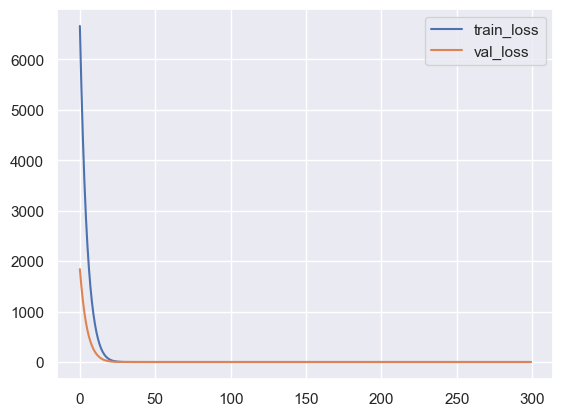

Finished Training
Epoch 1/300


100%|██████████| 7/7 [00:00<00:00, 92.50it/s]


Train Loss: 3794.4717407226562


100%|██████████| 2/2 [00:00<00:00, 316.66it/s]


Epoch 2/300


100%|██████████| 7/7 [00:00<00:00, 112.02it/s]


Train Loss: 3765.9756469726562


100%|██████████| 2/2 [00:00<00:00, 375.88it/s]


Epoch 3/300


100%|██████████| 7/7 [00:00<00:00, 56.14it/s]


Train Loss: 3726.533203125


100%|██████████| 2/2 [00:00<00:00, 348.25it/s]


Epoch 4/300


100%|██████████| 7/7 [00:00<00:00, 92.51it/s]


Train Loss: 3673.3799438476562


100%|██████████| 2/2 [00:00<00:00, 258.57it/s]


Epoch 5/300


100%|██████████| 7/7 [00:00<00:00, 34.04it/s]


Train Loss: 3610.3648071289062


100%|██████████| 2/2 [00:00<00:00, 57.89it/s]


Epoch 6/300


100%|██████████| 7/7 [00:00<00:00, 47.11it/s]


Train Loss: 3545.838897705078


100%|██████████| 2/2 [00:00<00:00, 195.79it/s]


Epoch 7/300


100%|██████████| 7/7 [00:00<00:00, 37.45it/s]


Train Loss: 3486.9149780273438


100%|██████████| 2/2 [00:00<00:00, 110.59it/s]


Epoch 8/300


100%|██████████| 7/7 [00:00<00:00, 29.99it/s]


Train Loss: 3431.9441833496094


100%|██████████| 2/2 [00:00<00:00, 256.21it/s]


Epoch 9/300


100%|██████████| 7/7 [00:00<00:00, 74.79it/s]


Train Loss: 3379.0135192871094


100%|██████████| 2/2 [00:00<00:00, 163.42it/s]


Epoch 10/300


100%|██████████| 7/7 [00:00<00:00, 92.67it/s]


Train Loss: 3327.6718139648438


100%|██████████| 2/2 [00:00<00:00, 358.49it/s]


Epoch 11/300


100%|██████████| 7/7 [00:00<00:00, 125.03it/s]


Train Loss: 3276.7566833496094


100%|██████████| 2/2 [00:00<00:00, 245.91it/s]


Epoch 12/300


100%|██████████| 7/7 [00:00<00:00, 116.36it/s]


Train Loss: 3226.5111083984375


100%|██████████| 2/2 [00:00<00:00, 265.71it/s]


Epoch 13/300


100%|██████████| 7/7 [00:00<00:00, 92.68it/s]


Train Loss: 3177.8648986816406


100%|██████████| 2/2 [00:00<00:00, 345.84it/s]


Epoch 14/300


100%|██████████| 7/7 [00:00<00:00, 104.48it/s]


Train Loss: 3132.22607421875


100%|██████████| 2/2 [00:00<00:00, 327.92it/s]


Epoch 15/300


100%|██████████| 7/7 [00:00<00:00, 92.17it/s]


Train Loss: 3089.6978149414062


100%|██████████| 2/2 [00:00<00:00, 358.93it/s]


Epoch 16/300


100%|██████████| 7/7 [00:00<00:00, 97.74it/s]


Train Loss: 3048.155975341797


100%|██████████| 2/2 [00:00<00:00, 289.02it/s]


Epoch 17/300


100%|██████████| 7/7 [00:00<00:00, 25.47it/s]


Train Loss: 3005.5248413085938


100%|██████████| 2/2 [00:00<00:00, 117.95it/s]


Epoch 18/300


100%|██████████| 7/7 [00:00<00:00, 80.16it/s]


Train Loss: 2963.5509338378906


100%|██████████| 2/2 [00:00<00:00, 328.89it/s]


Epoch 19/300


100%|██████████| 7/7 [00:00<00:00, 52.87it/s]


Train Loss: 2924.685089111328


100%|██████████| 2/2 [00:00<00:00, 312.51it/s]


Epoch 20/300


100%|██████████| 7/7 [00:00<00:00, 102.74it/s]


Train Loss: 2888.1278381347656


100%|██████████| 2/2 [00:00<00:00, 215.40it/s]


Epoch 21/300


100%|██████████| 7/7 [00:00<00:00, 22.64it/s]


Train Loss: 2852.611846923828


100%|██████████| 2/2 [00:00<00:00, 245.30it/s]


Epoch 22/300


100%|██████████| 7/7 [00:00<00:00, 116.08it/s]


Train Loss: 2818.935302734375


100%|██████████| 2/2 [00:00<00:00, 352.36it/s]


Epoch 23/300


100%|██████████| 7/7 [00:00<00:00, 89.01it/s]


Train Loss: 2786.255340576172


100%|██████████| 2/2 [00:00<00:00, 336.53it/s]


Epoch 24/300


100%|██████████| 7/7 [00:00<00:00, 122.82it/s]


Train Loss: 2754.328094482422


100%|██████████| 2/2 [00:00<00:00, 381.82it/s]


Epoch 25/300


100%|██████████| 7/7 [00:00<00:00, 112.67it/s]


Train Loss: 2723.1763916015625


100%|██████████| 2/2 [00:00<00:00, 320.71it/s]


Epoch 26/300


100%|██████████| 7/7 [00:00<00:00, 121.53it/s]


Train Loss: 2692.7525939941406


100%|██████████| 2/2 [00:00<00:00, 229.76it/s]


Epoch 27/300


100%|██████████| 7/7 [00:00<00:00, 74.67it/s]


Train Loss: 2662.8023376464844


100%|██████████| 2/2 [00:00<00:00, 131.15it/s]


Epoch 28/300


100%|██████████| 7/7 [00:00<00:00, 93.00it/s]


Train Loss: 2633.3590393066406


100%|██████████| 2/2 [00:00<00:00, 294.15it/s]


Epoch 29/300


100%|██████████| 7/7 [00:00<00:00, 112.31it/s]


Train Loss: 2604.4034118652344


100%|██████████| 2/2 [00:00<00:00, 182.58it/s]


Epoch 30/300


100%|██████████| 7/7 [00:00<00:00, 93.07it/s]


Train Loss: 2576.0281982421875


100%|██████████| 2/2 [00:00<00:00, 300.57it/s]


Epoch 31/300


100%|██████████| 7/7 [00:00<00:00, 111.65it/s]


Train Loss: 2547.9210205078125


100%|██████████| 2/2 [00:00<00:00, 335.40it/s]


Epoch 32/300


100%|██████████| 7/7 [00:00<00:00, 124.76it/s]


Train Loss: 2520.4402770996094


100%|██████████| 2/2 [00:00<00:00, 374.88it/s]


Epoch 33/300


100%|██████████| 7/7 [00:00<00:00, 130.08it/s]


Train Loss: 2493.2162170410156


100%|██████████| 2/2 [00:00<00:00, 359.07it/s]


Epoch 34/300


100%|██████████| 7/7 [00:00<00:00, 109.28it/s]


Train Loss: 2466.403839111328


100%|██████████| 2/2 [00:00<00:00, 340.72it/s]


Epoch 35/300


100%|██████████| 7/7 [00:00<00:00, 85.18it/s]


Train Loss: 2439.996856689453


100%|██████████| 2/2 [00:00<00:00, 375.43it/s]


Epoch 36/300


100%|██████████| 7/7 [00:00<00:00, 116.73it/s]


Train Loss: 2413.807159423828


100%|██████████| 2/2 [00:00<00:00, 383.01it/s]


Epoch 37/300


100%|██████████| 7/7 [00:00<00:00, 135.60it/s]


Train Loss: 2388.125


100%|██████████| 2/2 [00:00<00:00, 344.12it/s]


Epoch 38/300


100%|██████████| 7/7 [00:00<00:00, 116.89it/s]


Train Loss: 2362.6834106445312


100%|██████████| 2/2 [00:00<00:00, 341.53it/s]


Epoch 39/300


100%|██████████| 7/7 [00:00<00:00, 108.47it/s]


Train Loss: 2337.542999267578


100%|██████████| 2/2 [00:00<00:00, 344.54it/s]


Epoch 40/300


100%|██████████| 7/7 [00:00<00:00, 148.84it/s]


Train Loss: 2312.768096923828


100%|██████████| 2/2 [00:00<00:00, 319.03it/s]


Epoch 41/300


100%|██████████| 7/7 [00:00<00:00, 144.58it/s]


Train Loss: 2288.156036376953


100%|██████████| 2/2 [00:00<00:00, 309.41it/s]


Epoch 42/300


100%|██████████| 7/7 [00:00<00:00, 126.25it/s]


Train Loss: 2264.0325927734375


100%|██████████| 2/2 [00:00<00:00, 372.50it/s]


Epoch 43/300


100%|██████████| 7/7 [00:00<00:00, 137.02it/s]


Train Loss: 2239.9871520996094


100%|██████████| 2/2 [00:00<00:00, 385.51it/s]


Epoch 44/300


100%|██████████| 7/7 [00:00<00:00, 143.05it/s]


Train Loss: 2216.31591796875


100%|██████████| 2/2 [00:00<00:00, 385.81it/s]


Epoch 45/300


100%|██████████| 7/7 [00:00<00:00, 132.91it/s]


Train Loss: 2192.934600830078


100%|██████████| 2/2 [00:00<00:00, 382.69it/s]


Epoch 46/300


100%|██████████| 7/7 [00:00<00:00, 129.77it/s]


Train Loss: 2169.698944091797


100%|██████████| 2/2 [00:00<00:00, 372.28it/s]


Epoch 47/300


100%|██████████| 7/7 [00:00<00:00, 129.70it/s]


Train Loss: 2146.8255310058594


100%|██████████| 2/2 [00:00<00:00, 360.09it/s]


Epoch 48/300


100%|██████████| 7/7 [00:00<00:00, 132.35it/s]


Train Loss: 2124.231964111328


100%|██████████| 2/2 [00:00<00:00, 307.99it/s]


Epoch 49/300


100%|██████████| 7/7 [00:00<00:00, 143.40it/s]


Train Loss: 2101.8306884765625


100%|██████████| 2/2 [00:00<00:00, 344.71it/s]


Epoch 50/300


100%|██████████| 7/7 [00:00<00:00, 133.25it/s]


Train Loss: 2079.62109375


100%|██████████| 2/2 [00:00<00:00, 377.85it/s]


Epoch 51/300


100%|██████████| 7/7 [00:00<00:00, 136.01it/s]


Train Loss: 2057.6697387695312


100%|██████████| 2/2 [00:00<00:00, 323.26it/s]


Epoch 52/300


100%|██████████| 7/7 [00:00<00:00, 140.30it/s]


Train Loss: 2036.0064697265625


100%|██████████| 2/2 [00:00<00:00, 317.52it/s]


Epoch 53/300


100%|██████████| 7/7 [00:00<00:00, 140.52it/s]


Train Loss: 2014.5151672363281


100%|██████████| 2/2 [00:00<00:00, 350.96it/s]


Epoch 54/300


100%|██████████| 7/7 [00:00<00:00, 98.68it/s]


Train Loss: 1993.2944641113281


100%|██████████| 2/2 [00:00<00:00, 374.46it/s]


Epoch 55/300


100%|██████████| 7/7 [00:00<00:00, 143.14it/s]


Train Loss: 1972.1845703125


100%|██████████| 2/2 [00:00<00:00, 324.31it/s]


Epoch 56/300


100%|██████████| 7/7 [00:00<00:00, 130.26it/s]


Train Loss: 1951.43603515625


100%|██████████| 2/2 [00:00<00:00, 392.30it/s]


Epoch 57/300


100%|██████████| 7/7 [00:00<00:00, 142.93it/s]


Train Loss: 1930.8443298339844


100%|██████████| 2/2 [00:00<00:00, 384.83it/s]


Epoch 58/300


100%|██████████| 7/7 [00:00<00:00, 73.92it/s]


Train Loss: 1910.4185180664062


100%|██████████| 2/2 [00:00<00:00, 387.61it/s]


Epoch 59/300


100%|██████████| 7/7 [00:00<00:00, 140.92it/s]


Train Loss: 1890.3934631347656


100%|██████████| 2/2 [00:00<00:00, 344.12it/s]


Epoch 60/300


100%|██████████| 7/7 [00:00<00:00, 138.46it/s]


Train Loss: 1870.4444580078125


100%|██████████| 2/2 [00:00<00:00, 338.52it/s]


Epoch 61/300


100%|██████████| 7/7 [00:00<00:00, 131.29it/s]


Train Loss: 1850.5601501464844


100%|██████████| 2/2 [00:00<00:00, 402.89it/s]


Epoch 62/300


100%|██████████| 7/7 [00:00<00:00, 129.07it/s]


Train Loss: 1831.0838012695312


100%|██████████| 2/2 [00:00<00:00, 399.91it/s]


Epoch 63/300


100%|██████████| 7/7 [00:00<00:00, 133.07it/s]


Train Loss: 1811.6726379394531


100%|██████████| 2/2 [00:00<00:00, 395.88it/s]


Epoch 64/300


100%|██████████| 7/7 [00:00<00:00, 142.10it/s]


Train Loss: 1792.521484375


100%|██████████| 2/2 [00:00<00:00, 403.88it/s]


Epoch 65/300


100%|██████████| 7/7 [00:00<00:00, 140.35it/s]


Train Loss: 1773.5068969726562


100%|██████████| 2/2 [00:00<00:00, 403.55it/s]


Epoch 66/300


100%|██████████| 7/7 [00:00<00:00, 118.86it/s]


Train Loss: 1754.7737731933594


100%|██████████| 2/2 [00:00<00:00, 379.32it/s]


Epoch 67/300


100%|██████████| 7/7 [00:00<00:00, 139.67it/s]


Train Loss: 1736.12255859375


100%|██████████| 2/2 [00:00<00:00, 41.67it/s]


Epoch 68/300


100%|██████████| 7/7 [00:00<00:00, 112.12it/s]


Train Loss: 1717.746078491211


100%|██████████| 2/2 [00:00<00:00, 385.81it/s]


Epoch 69/300


100%|██████████| 7/7 [00:00<00:00, 128.98it/s]


Train Loss: 1699.526596069336


100%|██████████| 2/2 [00:00<00:00, 150.54it/s]


Epoch 70/300


100%|██████████| 7/7 [00:00<00:00, 138.16it/s]


Train Loss: 1681.4839172363281


100%|██████████| 2/2 [00:00<00:00, 402.25it/s]


Epoch 71/300


100%|██████████| 7/7 [00:00<00:00, 114.26it/s]


Train Loss: 1663.6238250732422


100%|██████████| 2/2 [00:00<00:00, 373.82it/s]


Epoch 72/300


100%|██████████| 7/7 [00:00<00:00, 142.10it/s]


Train Loss: 1645.9891662597656


100%|██████████| 2/2 [00:00<00:00, 374.11it/s]


Epoch 73/300


100%|██████████| 7/7 [00:00<00:00, 129.69it/s]


Train Loss: 1628.4365234375


100%|██████████| 2/2 [00:00<00:00, 292.95it/s]


Epoch 74/300


100%|██████████| 7/7 [00:00<00:00, 135.49it/s]


Train Loss: 1611.067642211914


100%|██████████| 2/2 [00:00<00:00, 370.24it/s]


Epoch 75/300


100%|██████████| 7/7 [00:00<00:00, 138.69it/s]


Train Loss: 1593.8671264648438


100%|██████████| 2/2 [00:00<00:00, 384.78it/s]


Epoch 76/300


100%|██████████| 7/7 [00:00<00:00, 139.15it/s]


Train Loss: 1577.0069274902344


100%|██████████| 2/2 [00:00<00:00, 380.09it/s]


Epoch 77/300


100%|██████████| 7/7 [00:00<00:00, 120.85it/s]


Train Loss: 1560.1686248779297


100%|██████████| 2/2 [00:00<00:00, 379.01it/s]


Epoch 78/300


100%|██████████| 7/7 [00:00<00:00, 127.74it/s]


Train Loss: 1543.428939819336


100%|██████████| 2/2 [00:00<00:00, 403.63it/s]


Epoch 79/300


100%|██████████| 7/7 [00:00<00:00, 137.53it/s]


Train Loss: 1526.9531555175781


100%|██████████| 2/2 [00:00<00:00, 394.57it/s]


Epoch 80/300


100%|██████████| 7/7 [00:00<00:00, 140.36it/s]


Train Loss: 1510.543472290039


100%|██████████| 2/2 [00:00<00:00, 387.21it/s]


Epoch 81/300


100%|██████████| 7/7 [00:00<00:00, 136.91it/s]


Train Loss: 1494.3838806152344


100%|██████████| 2/2 [00:00<00:00, 396.44it/s]


Epoch 82/300


100%|██████████| 7/7 [00:00<00:00, 135.88it/s]


Train Loss: 1478.2540740966797


100%|██████████| 2/2 [00:00<00:00, 392.39it/s]


Epoch 83/300


100%|██████████| 7/7 [00:00<00:00, 141.35it/s]


Train Loss: 1462.5601196289062


100%|██████████| 2/2 [00:00<00:00, 374.24it/s]


Epoch 84/300


100%|██████████| 7/7 [00:00<00:00, 138.25it/s]


Train Loss: 1446.811279296875


100%|██████████| 2/2 [00:00<00:00, 399.38it/s]


Epoch 85/300


100%|██████████| 7/7 [00:00<00:00, 141.80it/s]


Train Loss: 1431.271987915039


100%|██████████| 2/2 [00:00<00:00, 396.91it/s]


Epoch 86/300


100%|██████████| 7/7 [00:00<00:00, 109.98it/s]


Train Loss: 1415.9235534667969


100%|██████████| 2/2 [00:00<00:00, 317.26it/s]


Epoch 87/300


100%|██████████| 7/7 [00:00<00:00, 131.45it/s]


Train Loss: 1400.6700134277344


100%|██████████| 2/2 [00:00<00:00, 390.24it/s]


Epoch 88/300


100%|██████████| 7/7 [00:00<00:00, 139.88it/s]


Train Loss: 1385.5437469482422


100%|██████████| 2/2 [00:00<00:00, 394.41it/s]


Epoch 89/300


100%|██████████| 7/7 [00:00<00:00, 146.31it/s]


Train Loss: 1370.6863098144531


100%|██████████| 2/2 [00:00<00:00, 237.87it/s]


Epoch 90/300


100%|██████████| 7/7 [00:00<00:00, 80.85it/s]


Train Loss: 1355.8526306152344


100%|██████████| 2/2 [00:00<00:00, 311.88it/s]


Epoch 91/300


100%|██████████| 7/7 [00:00<00:00, 134.54it/s]


Train Loss: 1341.1829986572266


100%|██████████| 2/2 [00:00<00:00, 350.08it/s]


Epoch 92/300


100%|██████████| 7/7 [00:00<00:00, 142.78it/s]


Train Loss: 1326.6421356201172


100%|██████████| 2/2 [00:00<00:00, 384.71it/s]


Epoch 93/300


100%|██████████| 7/7 [00:00<00:00, 130.90it/s]


Train Loss: 1312.264175415039


100%|██████████| 2/2 [00:00<00:00, 353.47it/s]


Epoch 94/300


100%|██████████| 7/7 [00:00<00:00, 132.17it/s]


Train Loss: 1298.0200958251953


100%|██████████| 2/2 [00:00<00:00, 356.58it/s]


Epoch 95/300


100%|██████████| 7/7 [00:00<00:00, 127.48it/s]


Train Loss: 1284.012680053711


100%|██████████| 2/2 [00:00<00:00, 365.56it/s]


Epoch 96/300


100%|██████████| 7/7 [00:00<00:00, 133.86it/s]


Train Loss: 1270.012451171875


100%|██████████| 2/2 [00:00<00:00, 356.01it/s]


Epoch 97/300


100%|██████████| 7/7 [00:00<00:00, 131.78it/s]


Train Loss: 1256.1590118408203


100%|██████████| 2/2 [00:00<00:00, 403.01it/s]


Epoch 98/300


100%|██████████| 7/7 [00:00<00:00, 121.22it/s]


Train Loss: 1242.4708404541016


100%|██████████| 2/2 [00:00<00:00, 356.19it/s]


Epoch 99/300


100%|██████████| 7/7 [00:00<00:00, 122.34it/s]


Train Loss: 1229.0054168701172


100%|██████████| 2/2 [00:00<00:00, 339.10it/s]


Epoch 100/300


100%|██████████| 7/7 [00:00<00:00, 109.29it/s]


Train Loss: 1215.54248046875


100%|██████████| 2/2 [00:00<00:00, 309.93it/s]


Epoch 101/300


100%|██████████| 7/7 [00:00<00:00, 117.16it/s]


Train Loss: 1202.2715759277344


100%|██████████| 2/2 [00:00<00:00, 272.92it/s]


Epoch 102/300


100%|██████████| 7/7 [00:00<00:00, 119.28it/s]


Train Loss: 1189.0623779296875


100%|██████████| 2/2 [00:00<00:00, 334.57it/s]


Epoch 103/300


100%|██████████| 7/7 [00:00<00:00, 111.51it/s]


Train Loss: 1176.0843353271484


100%|██████████| 2/2 [00:00<00:00, 364.56it/s]


Epoch 104/300


100%|██████████| 7/7 [00:00<00:00, 120.26it/s]


Train Loss: 1163.247299194336


100%|██████████| 2/2 [00:00<00:00, 317.29it/s]


Epoch 105/300


100%|██████████| 7/7 [00:00<00:00, 107.15it/s]


Train Loss: 1150.4338836669922


100%|██████████| 2/2 [00:00<00:00, 347.76it/s]


Epoch 106/300


100%|██████████| 7/7 [00:00<00:00, 115.26it/s]


Train Loss: 1137.8462829589844


100%|██████████| 2/2 [00:00<00:00, 286.54it/s]


Epoch 107/300


100%|██████████| 7/7 [00:00<00:00, 122.60it/s]


Train Loss: 1125.2655029296875


100%|██████████| 2/2 [00:00<00:00, 351.44it/s]


Epoch 108/300


100%|██████████| 7/7 [00:00<00:00, 122.58it/s]


Train Loss: 1112.9508361816406


100%|██████████| 2/2 [00:00<00:00, 340.76it/s]


Epoch 109/300


100%|██████████| 7/7 [00:00<00:00, 50.94it/s]


Train Loss: 1100.638198852539


100%|██████████| 2/2 [00:00<00:00, 317.73it/s]


Epoch 110/300


100%|██████████| 7/7 [00:00<00:00, 124.21it/s]


Train Loss: 1088.4322052001953


100%|██████████| 2/2 [00:00<00:00, 377.29it/s]


Epoch 111/300


100%|██████████| 7/7 [00:00<00:00, 104.76it/s]


Train Loss: 1076.4386291503906


100%|██████████| 2/2 [00:00<00:00, 310.11it/s]


Epoch 112/300


100%|██████████| 7/7 [00:00<00:00, 42.12it/s]


Train Loss: 1064.5292663574219


100%|██████████| 2/2 [00:00<00:00, 341.64it/s]


Epoch 113/300


100%|██████████| 7/7 [00:00<00:00, 88.15it/s]


Train Loss: 1052.7599029541016


100%|██████████| 2/2 [00:00<00:00, 267.81it/s]


Epoch 114/300


100%|██████████| 7/7 [00:00<00:00, 48.85it/s]


Train Loss: 1041.0839538574219


100%|██████████| 2/2 [00:00<00:00, 211.03it/s]


Epoch 115/300


100%|██████████| 7/7 [00:00<00:00, 32.71it/s]


Train Loss: 1029.467788696289


100%|██████████| 2/2 [00:00<00:00, 363.11it/s]


Epoch 116/300


100%|██████████| 7/7 [00:00<00:00, 46.63it/s]


Train Loss: 1018.0537872314453


100%|██████████| 2/2 [00:00<00:00, 276.55it/s]


Epoch 117/300


100%|██████████| 7/7 [00:00<00:00, 35.90it/s]


Train Loss: 1006.7075042724609


100%|██████████| 2/2 [00:00<00:00, 167.83it/s]


Epoch 118/300


100%|██████████| 7/7 [00:00<00:00, 112.19it/s]


Train Loss: 995.5462646484375


100%|██████████| 2/2 [00:00<00:00, 199.44it/s]


Epoch 119/300


100%|██████████| 7/7 [00:00<00:00, 43.72it/s]


Train Loss: 984.3974456787109


100%|██████████| 2/2 [00:00<00:00, 41.38it/s]


Epoch 120/300


100%|██████████| 7/7 [00:00<00:00, 41.01it/s]


Train Loss: 973.3619995117188


100%|██████████| 2/2 [00:00<00:00, 80.78it/s]


Epoch 121/300


100%|██████████| 7/7 [00:00<00:00, 40.96it/s]


Train Loss: 962.5076751708984


100%|██████████| 2/2 [00:00<00:00, 52.11it/s]


Epoch 122/300


100%|██████████| 7/7 [00:00<00:00, 86.88it/s]


Train Loss: 951.7035369873047


100%|██████████| 2/2 [00:00<00:00, 322.58it/s]


Epoch 123/300


100%|██████████| 7/7 [00:00<00:00, 113.68it/s]


Train Loss: 941.0253753662109


100%|██████████| 2/2 [00:00<00:00, 336.88it/s]


Epoch 124/300


100%|██████████| 7/7 [00:00<00:00, 115.16it/s]


Train Loss: 930.4610748291016


100%|██████████| 2/2 [00:00<00:00, 124.06it/s]


Epoch 125/300


100%|██████████| 7/7 [00:00<00:00, 110.61it/s]


Train Loss: 919.9839782714844


100%|██████████| 2/2 [00:00<00:00, 334.78it/s]


Epoch 126/300


100%|██████████| 7/7 [00:00<00:00, 120.29it/s]


Train Loss: 909.6136016845703


100%|██████████| 2/2 [00:00<00:00, 327.99it/s]


Epoch 127/300


100%|██████████| 7/7 [00:00<00:00, 119.15it/s]


Train Loss: 899.3679428100586


100%|██████████| 2/2 [00:00<00:00, 263.33it/s]


Epoch 128/300


100%|██████████| 7/7 [00:00<00:00, 93.34it/s]


Train Loss: 889.2117233276367


100%|██████████| 2/2 [00:00<00:00, 326.20it/s]


Epoch 129/300


100%|██████████| 7/7 [00:00<00:00, 96.49it/s]


Train Loss: 879.1375427246094


100%|██████████| 2/2 [00:00<00:00, 75.85it/s]


Epoch 130/300


100%|██████████| 7/7 [00:00<00:00, 80.01it/s]


Train Loss: 869.2247924804688


100%|██████████| 2/2 [00:00<00:00, 241.09it/s]


Epoch 131/300


100%|██████████| 7/7 [00:00<00:00, 78.63it/s]


Train Loss: 859.3501129150391


100%|██████████| 2/2 [00:00<00:00, 68.88it/s]


Epoch 132/300


100%|██████████| 7/7 [00:00<00:00, 74.55it/s]


Train Loss: 849.5620727539062


100%|██████████| 2/2 [00:00<00:00, 302.29it/s]


Epoch 133/300


100%|██████████| 7/7 [00:00<00:00, 84.58it/s]


Train Loss: 839.9332809448242


100%|██████████| 2/2 [00:00<00:00, 102.11it/s]


Epoch 134/300


100%|██████████| 7/7 [00:00<00:00, 34.35it/s]


Train Loss: 830.3481140136719


100%|██████████| 2/2 [00:00<00:00, 50.09it/s]


Epoch 135/300


100%|██████████| 7/7 [00:00<00:00, 30.49it/s]


Train Loss: 820.880012512207


100%|██████████| 2/2 [00:00<00:00, 302.94it/s]


Epoch 136/300


100%|██████████| 7/7 [00:00<00:00, 77.58it/s]


Train Loss: 811.5230026245117


100%|██████████| 2/2 [00:00<00:00, 360.82it/s]


Epoch 137/300


100%|██████████| 7/7 [00:00<00:00, 131.33it/s]


Train Loss: 802.1861572265625


100%|██████████| 2/2 [00:00<00:00, 227.45it/s]


Epoch 138/300


100%|██████████| 7/7 [00:00<00:00, 130.75it/s]


Train Loss: 793.0148544311523


100%|██████████| 2/2 [00:00<00:00, 371.00it/s]


Epoch 139/300


100%|██████████| 7/7 [00:00<00:00, 127.54it/s]


Train Loss: 783.931022644043


100%|██████████| 2/2 [00:00<00:00, 245.16it/s]


Epoch 140/300


100%|██████████| 7/7 [00:00<00:00, 87.63it/s]


Train Loss: 774.9872970581055


100%|██████████| 2/2 [00:00<00:00, 320.21it/s]


Epoch 141/300


100%|██████████| 7/7 [00:00<00:00, 83.07it/s]


Train Loss: 765.9952926635742


100%|██████████| 2/2 [00:00<00:00, 382.27it/s]


Epoch 142/300


100%|██████████| 7/7 [00:00<00:00, 49.98it/s]


Train Loss: 757.1109237670898


100%|██████████| 2/2 [00:00<00:00, 308.69it/s]


Epoch 143/300


100%|██████████| 7/7 [00:00<00:00, 79.83it/s]


Train Loss: 748.4036483764648


100%|██████████| 2/2 [00:00<00:00, 188.52it/s]


Epoch 144/300


100%|██████████| 7/7 [00:00<00:00, 123.09it/s]


Train Loss: 739.7626724243164


100%|██████████| 2/2 [00:00<00:00, 348.19it/s]


Epoch 145/300


100%|██████████| 7/7 [00:00<00:00, 133.28it/s]


Train Loss: 731.2115478515625


100%|██████████| 2/2 [00:00<00:00, 217.16it/s]


Epoch 146/300


100%|██████████| 7/7 [00:00<00:00, 77.95it/s]


Train Loss: 722.6968078613281


100%|██████████| 2/2 [00:00<00:00, 239.84it/s]


Epoch 147/300


100%|██████████| 7/7 [00:00<00:00, 121.10it/s]


Train Loss: 714.3758163452148


100%|██████████| 2/2 [00:00<00:00, 290.78it/s]


Epoch 148/300


100%|██████████| 7/7 [00:00<00:00, 116.19it/s]


Train Loss: 705.9990539550781


100%|██████████| 2/2 [00:00<00:00, 207.23it/s]


Epoch 149/300


100%|██████████| 7/7 [00:00<00:00, 118.17it/s]


Train Loss: 697.7702026367188


100%|██████████| 2/2 [00:00<00:00, 350.27it/s]


Epoch 150/300


100%|██████████| 7/7 [00:00<00:00, 93.34it/s]


Train Loss: 689.6463165283203


100%|██████████| 2/2 [00:00<00:00, 338.46it/s]


Epoch 151/300


100%|██████████| 7/7 [00:00<00:00, 89.80it/s]


Train Loss: 681.5098114013672


100%|██████████| 2/2 [00:00<00:00, 38.83it/s]


Epoch 152/300


100%|██████████| 7/7 [00:00<00:00, 118.39it/s]


Train Loss: 673.5507202148438


100%|██████████| 2/2 [00:00<00:00, 341.58it/s]


Epoch 153/300


100%|██████████| 7/7 [00:00<00:00, 137.01it/s]


Train Loss: 665.6852951049805


100%|██████████| 2/2 [00:00<00:00, 384.83it/s]


Epoch 154/300


100%|██████████| 7/7 [00:00<00:00, 126.68it/s]


Train Loss: 657.8623199462891


100%|██████████| 2/2 [00:00<00:00, 287.81it/s]


Epoch 155/300


100%|██████████| 7/7 [00:00<00:00, 134.98it/s]


Train Loss: 650.0606460571289


100%|██████████| 2/2 [00:00<00:00, 385.79it/s]


Epoch 156/300


100%|██████████| 7/7 [00:00<00:00, 137.07it/s]


Train Loss: 642.4574584960938


100%|██████████| 2/2 [00:00<00:00, 398.17it/s]


Epoch 157/300


100%|██████████| 7/7 [00:00<00:00, 136.02it/s]


Train Loss: 634.8367004394531


100%|██████████| 2/2 [00:00<00:00, 391.39it/s]


Epoch 158/300


100%|██████████| 7/7 [00:00<00:00, 130.99it/s]


Train Loss: 627.3577346801758


100%|██████████| 2/2 [00:00<00:00, 276.48it/s]


Epoch 159/300


100%|██████████| 7/7 [00:00<00:00, 101.92it/s]


Train Loss: 619.8844528198242


100%|██████████| 2/2 [00:00<00:00, 379.80it/s]


Epoch 160/300


100%|██████████| 7/7 [00:00<00:00, 122.81it/s]


Train Loss: 612.5577011108398


100%|██████████| 2/2 [00:00<00:00, 205.99it/s]


Epoch 161/300


100%|██████████| 7/7 [00:00<00:00, 137.37it/s]


Train Loss: 605.1998748779297


100%|██████████| 2/2 [00:00<00:00, 380.14it/s]


Epoch 162/300


100%|██████████| 7/7 [00:00<00:00, 135.29it/s]


Train Loss: 598.0297622680664


100%|██████████| 2/2 [00:00<00:00, 388.25it/s]


Epoch 163/300


100%|██████████| 7/7 [00:00<00:00, 119.88it/s]


Train Loss: 590.862419128418


100%|██████████| 2/2 [00:00<00:00, 343.99it/s]


Epoch 164/300


100%|██████████| 7/7 [00:00<00:00, 136.33it/s]


Train Loss: 583.7781372070312


100%|██████████| 2/2 [00:00<00:00, 355.00it/s]


Epoch 165/300


100%|██████████| 7/7 [00:00<00:00, 132.05it/s]


Train Loss: 576.8133316040039


100%|██████████| 2/2 [00:00<00:00, 248.46it/s]


Epoch 166/300


100%|██████████| 7/7 [00:00<00:00, 123.31it/s]


Train Loss: 569.8548965454102


100%|██████████| 2/2 [00:00<00:00, 214.25it/s]


Epoch 167/300


100%|██████████| 7/7 [00:00<00:00, 141.84it/s]


Train Loss: 563.0638809204102


100%|██████████| 2/2 [00:00<00:00, 369.33it/s]


Epoch 168/300


100%|██████████| 7/7 [00:00<00:00, 139.49it/s]


Train Loss: 556.2240676879883


100%|██████████| 2/2 [00:00<00:00, 351.37it/s]


Epoch 169/300


100%|██████████| 7/7 [00:00<00:00, 141.73it/s]


Train Loss: 549.57763671875


100%|██████████| 2/2 [00:00<00:00, 369.07it/s]


Epoch 170/300


100%|██████████| 7/7 [00:00<00:00, 145.43it/s]


Train Loss: 542.8812103271484


100%|██████████| 2/2 [00:00<00:00, 375.73it/s]


Epoch 171/300


100%|██████████| 7/7 [00:00<00:00, 136.51it/s]


Train Loss: 536.2818374633789


100%|██████████| 2/2 [00:00<00:00, 398.57it/s]


Epoch 172/300


100%|██████████| 7/7 [00:00<00:00, 134.17it/s]


Train Loss: 529.8006744384766


100%|██████████| 2/2 [00:00<00:00, 372.02it/s]


Epoch 173/300


100%|██████████| 7/7 [00:00<00:00, 138.35it/s]


Train Loss: 523.3487548828125


100%|██████████| 2/2 [00:00<00:00, 389.86it/s]


Epoch 174/300


100%|██████████| 7/7 [00:00<00:00, 138.52it/s]


Train Loss: 516.9549560546875


100%|██████████| 2/2 [00:00<00:00, 335.22it/s]


Epoch 175/300


100%|██████████| 7/7 [00:00<00:00, 99.14it/s]


Train Loss: 510.6620101928711


100%|██████████| 2/2 [00:00<00:00, 404.60it/s]


Epoch 176/300


100%|██████████| 7/7 [00:00<00:00, 121.15it/s]


Train Loss: 504.3913345336914


100%|██████████| 2/2 [00:00<00:00, 362.19it/s]


Epoch 177/300


100%|██████████| 7/7 [00:00<00:00, 144.95it/s]


Train Loss: 498.21253967285156


100%|██████████| 2/2 [00:00<00:00, 295.55it/s]


Epoch 178/300


100%|██████████| 7/7 [00:00<00:00, 138.78it/s]


Train Loss: 492.10723876953125


100%|██████████| 2/2 [00:00<00:00, 363.98it/s]


Epoch 179/300


100%|██████████| 7/7 [00:00<00:00, 128.38it/s]


Train Loss: 485.9692840576172


100%|██████████| 2/2 [00:00<00:00, 395.24it/s]


Epoch 180/300


100%|██████████| 7/7 [00:00<00:00, 133.92it/s]


Train Loss: 480.0092239379883


100%|██████████| 2/2 [00:00<00:00, 358.17it/s]


Epoch 181/300


100%|██████████| 7/7 [00:00<00:00, 142.07it/s]


Train Loss: 474.1221694946289


100%|██████████| 2/2 [00:00<00:00, 351.99it/s]


Epoch 182/300


100%|██████████| 7/7 [00:00<00:00, 131.25it/s]


Train Loss: 468.20618438720703


100%|██████████| 2/2 [00:00<00:00, 306.24it/s]


Epoch 183/300


100%|██████████| 7/7 [00:00<00:00, 129.45it/s]


Train Loss: 462.3924560546875


100%|██████████| 2/2 [00:00<00:00, 354.29it/s]


Epoch 184/300


100%|██████████| 7/7 [00:00<00:00, 139.32it/s]


Train Loss: 456.66676330566406


100%|██████████| 2/2 [00:00<00:00, 135.83it/s]


Epoch 185/300


100%|██████████| 7/7 [00:00<00:00, 81.42it/s]


Train Loss: 450.95430755615234


100%|██████████| 2/2 [00:00<00:00, 403.14it/s]


Epoch 186/300


100%|██████████| 7/7 [00:00<00:00, 145.74it/s]


Train Loss: 445.3047180175781


100%|██████████| 2/2 [00:00<00:00, 411.85it/s]


Epoch 187/300


100%|██████████| 7/7 [00:00<00:00, 125.44it/s]


Train Loss: 439.7574882507324


100%|██████████| 2/2 [00:00<00:00, 310.07it/s]


Epoch 188/300


100%|██████████| 7/7 [00:00<00:00, 68.30it/s]


Train Loss: 434.21020126342773


100%|██████████| 2/2 [00:00<00:00, 282.21it/s]


Epoch 189/300


100%|██████████| 7/7 [00:00<00:00, 145.66it/s]


Train Loss: 428.744384765625


100%|██████████| 2/2 [00:00<00:00, 383.58it/s]


Epoch 190/300


100%|██████████| 7/7 [00:00<00:00, 103.49it/s]


Train Loss: 423.35401153564453


100%|██████████| 2/2 [00:00<00:00, 407.41it/s]


Epoch 191/300


100%|██████████| 7/7 [00:00<00:00, 120.71it/s]


Train Loss: 417.9937438964844


100%|██████████| 2/2 [00:00<00:00, 388.88it/s]


Epoch 192/300


100%|██████████| 7/7 [00:00<00:00, 131.78it/s]


Train Loss: 412.6865043640137


100%|██████████| 2/2 [00:00<00:00, 204.71it/s]


Epoch 193/300


100%|██████████| 7/7 [00:00<00:00, 143.00it/s]


Train Loss: 407.447208404541


100%|██████████| 2/2 [00:00<00:00, 386.32it/s]


Epoch 194/300


100%|██████████| 7/7 [00:00<00:00, 124.84it/s]


Train Loss: 402.260684967041


100%|██████████| 2/2 [00:00<00:00, 363.38it/s]


Epoch 195/300


100%|██████████| 7/7 [00:00<00:00, 141.92it/s]


Train Loss: 397.17638397216797


100%|██████████| 2/2 [00:00<00:00, 391.39it/s]


Epoch 196/300


100%|██████████| 7/7 [00:00<00:00, 145.69it/s]


Train Loss: 392.04177474975586


100%|██████████| 2/2 [00:00<00:00, 395.41it/s]


Epoch 197/300


100%|██████████| 7/7 [00:00<00:00, 131.61it/s]


Train Loss: 387.0479965209961


100%|██████████| 2/2 [00:00<00:00, 398.64it/s]


Epoch 198/300


100%|██████████| 7/7 [00:00<00:00, 126.05it/s]


Train Loss: 382.08313751220703


100%|██████████| 2/2 [00:00<00:00, 365.23it/s]


Epoch 199/300


100%|██████████| 7/7 [00:00<00:00, 142.85it/s]


Train Loss: 377.13372802734375


100%|██████████| 2/2 [00:00<00:00, 364.25it/s]


Epoch 200/300


100%|██████████| 7/7 [00:00<00:00, 144.15it/s]


Train Loss: 372.29359436035156


100%|██████████| 2/2 [00:00<00:00, 404.19it/s]


Epoch 201/300


100%|██████████| 7/7 [00:00<00:00, 144.38it/s]


Train Loss: 367.47446060180664


100%|██████████| 2/2 [00:00<00:00, 379.44it/s]


Epoch 202/300


100%|██████████| 7/7 [00:00<00:00, 139.21it/s]


Train Loss: 362.72633361816406


100%|██████████| 2/2 [00:00<00:00, 371.82it/s]


Epoch 203/300


100%|██████████| 7/7 [00:00<00:00, 125.63it/s]


Train Loss: 358.02231216430664


100%|██████████| 2/2 [00:00<00:00, 374.26it/s]


Epoch 204/300


100%|██████████| 7/7 [00:00<00:00, 139.54it/s]


Train Loss: 353.34875106811523


100%|██████████| 2/2 [00:00<00:00, 341.71it/s]


Epoch 205/300


100%|██████████| 7/7 [00:00<00:00, 144.62it/s]


Train Loss: 348.7128372192383


100%|██████████| 2/2 [00:00<00:00, 393.55it/s]


Epoch 206/300


100%|██████████| 7/7 [00:00<00:00, 129.84it/s]


Train Loss: 344.1908378601074


100%|██████████| 2/2 [00:00<00:00, 388.65it/s]


Epoch 207/300


100%|██████████| 7/7 [00:00<00:00, 107.61it/s]


Train Loss: 339.6355667114258


100%|██████████| 2/2 [00:00<00:00, 336.31it/s]


Epoch 208/300


100%|██████████| 7/7 [00:00<00:00, 131.32it/s]


Train Loss: 335.1933288574219


100%|██████████| 2/2 [00:00<00:00, 384.98it/s]


Epoch 209/300


100%|██████████| 7/7 [00:00<00:00, 138.87it/s]


Train Loss: 330.7751884460449


100%|██████████| 2/2 [00:00<00:00, 369.56it/s]


Epoch 210/300


100%|██████████| 7/7 [00:00<00:00, 134.76it/s]


Train Loss: 326.4005012512207


100%|██████████| 2/2 [00:00<00:00, 387.91it/s]


Epoch 211/300


100%|██████████| 7/7 [00:00<00:00, 128.28it/s]


Train Loss: 322.06746673583984


100%|██████████| 2/2 [00:00<00:00, 402.91it/s]


Epoch 212/300


100%|██████████| 7/7 [00:00<00:00, 139.23it/s]


Train Loss: 317.77469635009766


100%|██████████| 2/2 [00:00<00:00, 394.16it/s]


Epoch 213/300


100%|██████████| 7/7 [00:00<00:00, 138.49it/s]


Train Loss: 313.54299545288086


100%|██████████| 2/2 [00:00<00:00, 368.60it/s]


Epoch 214/300


100%|██████████| 7/7 [00:00<00:00, 130.13it/s]


Train Loss: 309.3536720275879


100%|██████████| 2/2 [00:00<00:00, 394.24it/s]


Epoch 215/300


100%|██████████| 7/7 [00:00<00:00, 139.26it/s]


Train Loss: 305.2371406555176


100%|██████████| 2/2 [00:00<00:00, 366.35it/s]


Epoch 216/300


100%|██████████| 7/7 [00:00<00:00, 136.10it/s]


Train Loss: 301.1116714477539


100%|██████████| 2/2 [00:00<00:00, 349.83it/s]


Epoch 217/300


100%|██████████| 7/7 [00:00<00:00, 81.29it/s]


Train Loss: 297.09563064575195


100%|██████████| 2/2 [00:00<00:00, 340.43it/s]


Epoch 218/300


100%|██████████| 7/7 [00:00<00:00, 134.50it/s]


Train Loss: 293.06685638427734


100%|██████████| 2/2 [00:00<00:00, 321.08it/s]


Epoch 219/300


100%|██████████| 7/7 [00:00<00:00, 130.73it/s]


Train Loss: 289.0914993286133


100%|██████████| 2/2 [00:00<00:00, 226.39it/s]


Epoch 220/300


100%|██████████| 7/7 [00:00<00:00, 141.33it/s]


Train Loss: 285.17597579956055


100%|██████████| 2/2 [00:00<00:00, 184.95it/s]


Epoch 221/300


100%|██████████| 7/7 [00:00<00:00, 129.38it/s]


Train Loss: 281.27038955688477


100%|██████████| 2/2 [00:00<00:00, 348.97it/s]


Epoch 222/300


100%|██████████| 7/7 [00:00<00:00, 98.84it/s]


Train Loss: 277.4725646972656


100%|██████████| 2/2 [00:00<00:00, 249.31it/s]


Epoch 223/300


100%|██████████| 7/7 [00:00<00:00, 125.63it/s]


Train Loss: 273.66822052001953


100%|██████████| 2/2 [00:00<00:00, 134.17it/s]


Epoch 224/300


100%|██████████| 7/7 [00:00<00:00, 107.96it/s]


Train Loss: 269.90101623535156


100%|██████████| 2/2 [00:00<00:00, 263.43it/s]


Epoch 225/300


100%|██████████| 7/7 [00:00<00:00, 126.47it/s]


Train Loss: 266.1944465637207


100%|██████████| 2/2 [00:00<00:00, 215.75it/s]


Epoch 226/300


100%|██████████| 7/7 [00:00<00:00, 106.85it/s]


Train Loss: 262.55130767822266


100%|██████████| 2/2 [00:00<00:00, 357.08it/s]


Epoch 227/300


100%|██████████| 7/7 [00:00<00:00, 46.00it/s]


Train Loss: 258.90987396240234


100%|██████████| 2/2 [00:00<00:00, 216.95it/s]


Epoch 228/300


100%|██████████| 7/7 [00:00<00:00, 107.31it/s]


Train Loss: 255.3279685974121


100%|██████████| 2/2 [00:00<00:00, 367.18it/s]


Epoch 229/300


100%|██████████| 7/7 [00:00<00:00, 116.84it/s]


Train Loss: 251.76852416992188


100%|██████████| 2/2 [00:00<00:00, 271.11it/s]


Epoch 230/300


100%|██████████| 7/7 [00:00<00:00, 59.02it/s]


Train Loss: 248.25296020507812


100%|██████████| 2/2 [00:00<00:00, 331.24it/s]


Epoch 231/300


100%|██████████| 7/7 [00:00<00:00, 114.83it/s]


Train Loss: 244.78994750976562


100%|██████████| 2/2 [00:00<00:00, 353.10it/s]


Epoch 232/300


100%|██████████| 7/7 [00:00<00:00, 126.88it/s]


Train Loss: 241.3658218383789


100%|██████████| 2/2 [00:00<00:00, 204.80it/s]


Epoch 233/300


100%|██████████| 7/7 [00:00<00:00, 41.24it/s]


Train Loss: 238.00464630126953


100%|██████████| 2/2 [00:00<00:00, 313.73it/s]


Epoch 234/300


100%|██████████| 7/7 [00:00<00:00, 91.00it/s]


Train Loss: 234.62622451782227


100%|██████████| 2/2 [00:00<00:00, 327.05it/s]


Epoch 235/300


100%|██████████| 7/7 [00:00<00:00, 42.99it/s]


Train Loss: 231.27219772338867


100%|██████████| 2/2 [00:00<00:00, 90.63it/s]


Epoch 236/300


100%|██████████| 7/7 [00:00<00:00, 56.60it/s]


Train Loss: 228.05176544189453


100%|██████████| 2/2 [00:00<00:00, 350.08it/s]


Epoch 237/300


100%|██████████| 7/7 [00:00<00:00, 61.45it/s]


Train Loss: 224.77259254455566


100%|██████████| 2/2 [00:00<00:00, 99.12it/s]


Epoch 238/300


100%|██████████| 7/7 [00:00<00:00, 30.77it/s]


Train Loss: 221.586332321167


100%|██████████| 2/2 [00:00<00:00, 264.37it/s]


Epoch 239/300


100%|██████████| 7/7 [00:00<00:00, 61.58it/s]


Train Loss: 218.4056739807129


100%|██████████| 2/2 [00:00<00:00, 76.19it/s]


Epoch 240/300


100%|██████████| 7/7 [00:00<00:00, 33.95it/s]


Train Loss: 215.25459098815918


100%|██████████| 2/2 [00:00<00:00, 171.56it/s]


Epoch 241/300


100%|██████████| 7/7 [00:00<00:00, 55.65it/s]


Train Loss: 212.1898899078369


100%|██████████| 2/2 [00:00<00:00, 318.56it/s]


Epoch 242/300


100%|██████████| 7/7 [00:00<00:00, 140.84it/s]


Train Loss: 209.11165237426758


100%|██████████| 2/2 [00:00<00:00, 391.79it/s]


Epoch 243/300


100%|██████████| 7/7 [00:00<00:00, 110.82it/s]


Train Loss: 206.11203956604004


100%|██████████| 2/2 [00:00<00:00, 385.06it/s]


Epoch 244/300


100%|██████████| 7/7 [00:00<00:00, 100.53it/s]


Train Loss: 203.08262634277344


100%|██████████| 2/2 [00:00<00:00, 367.31it/s]


Epoch 245/300


100%|██████████| 7/7 [00:00<00:00, 116.40it/s]


Train Loss: 200.16637420654297


100%|██████████| 2/2 [00:00<00:00, 383.64it/s]


Epoch 246/300


100%|██████████| 7/7 [00:00<00:00, 64.82it/s]


Train Loss: 197.24352264404297


100%|██████████| 2/2 [00:00<00:00, 312.25it/s]


Epoch 247/300


100%|██████████| 7/7 [00:00<00:00, 89.41it/s]


Train Loss: 194.34701347351074


100%|██████████| 2/2 [00:00<00:00, 257.87it/s]


Epoch 248/300


100%|██████████| 7/7 [00:00<00:00, 83.84it/s]


Train Loss: 191.51147270202637


100%|██████████| 2/2 [00:00<00:00, 305.38it/s]


Epoch 249/300


100%|██████████| 7/7 [00:00<00:00, 62.82it/s]


Train Loss: 188.65415954589844


100%|██████████| 2/2 [00:00<00:00, 106.08it/s]


Epoch 250/300


100%|██████████| 7/7 [00:00<00:00, 41.41it/s]


Train Loss: 185.89714813232422


100%|██████████| 2/2 [00:00<00:00, 137.47it/s]


Epoch 251/300


100%|██████████| 7/7 [00:00<00:00, 58.67it/s]


Train Loss: 183.1170539855957


100%|██████████| 2/2 [00:00<00:00, 175.98it/s]


Epoch 252/300


100%|██████████| 7/7 [00:00<00:00, 40.29it/s]


Train Loss: 180.4158229827881


100%|██████████| 2/2 [00:00<00:00, 186.95it/s]


Epoch 253/300


100%|██████████| 7/7 [00:00<00:00, 41.10it/s]


Train Loss: 177.72268295288086


100%|██████████| 2/2 [00:00<00:00, 360.69it/s]


Epoch 254/300


100%|██████████| 7/7 [00:00<00:00, 87.45it/s]


Train Loss: 175.11098289489746


100%|██████████| 2/2 [00:00<00:00, 242.25it/s]


Epoch 255/300


100%|██████████| 7/7 [00:00<00:00, 108.38it/s]


Train Loss: 172.45865440368652


100%|██████████| 2/2 [00:00<00:00, 108.87it/s]


Epoch 256/300


100%|██████████| 7/7 [00:00<00:00, 95.91it/s]


Train Loss: 169.86207962036133


100%|██████████| 2/2 [00:00<00:00, 358.09it/s]


Epoch 257/300


100%|██████████| 7/7 [00:00<00:00, 98.84it/s]


Train Loss: 167.31023406982422


100%|██████████| 2/2 [00:00<00:00, 203.19it/s]


Epoch 258/300


100%|██████████| 7/7 [00:00<00:00, 99.35it/s]


Train Loss: 164.7989044189453


100%|██████████| 2/2 [00:00<00:00, 265.67it/s]


Epoch 259/300


100%|██████████| 7/7 [00:00<00:00, 114.77it/s]


Train Loss: 162.28948593139648


100%|██████████| 2/2 [00:00<00:00, 356.13it/s]


Epoch 260/300


100%|██████████| 7/7 [00:00<00:00, 112.78it/s]


Train Loss: 159.81764602661133


100%|██████████| 2/2 [00:00<00:00, 277.97it/s]


Epoch 261/300


100%|██████████| 7/7 [00:00<00:00, 104.86it/s]


Train Loss: 157.3895149230957


100%|██████████| 2/2 [00:00<00:00, 266.77it/s]


Epoch 262/300


100%|██████████| 7/7 [00:00<00:00, 32.71it/s]


Train Loss: 154.96642112731934


100%|██████████| 2/2 [00:00<00:00, 153.16it/s]


Epoch 263/300


100%|██████████| 7/7 [00:00<00:00, 63.45it/s]


Train Loss: 152.59790420532227


100%|██████████| 2/2 [00:00<00:00, 171.00it/s]


Epoch 264/300


100%|██████████| 7/7 [00:00<00:00, 91.15it/s]


Train Loss: 150.23516273498535


100%|██████████| 2/2 [00:00<00:00, 150.28it/s]


Epoch 265/300


100%|██████████| 7/7 [00:00<00:00, 40.54it/s]


Train Loss: 147.94432830810547


100%|██████████| 2/2 [00:00<00:00, 288.06it/s]


Epoch 266/300


100%|██████████| 7/7 [00:00<00:00, 61.04it/s]


Train Loss: 145.61487770080566


100%|██████████| 2/2 [00:00<00:00, 62.84it/s]


Epoch 267/300


100%|██████████| 7/7 [00:00<00:00, 93.43it/s]


Train Loss: 143.34972381591797


100%|██████████| 2/2 [00:00<00:00, 272.29it/s]


Epoch 268/300


100%|██████████| 7/7 [00:00<00:00, 104.81it/s]


Train Loss: 141.09626388549805


100%|██████████| 2/2 [00:00<00:00, 231.40it/s]


Epoch 269/300


100%|██████████| 7/7 [00:00<00:00, 98.57it/s]


Train Loss: 138.93011856079102


100%|██████████| 2/2 [00:00<00:00, 375.38it/s]


Epoch 270/300


100%|██████████| 7/7 [00:00<00:00, 117.91it/s]


Train Loss: 136.74291038513184


100%|██████████| 2/2 [00:00<00:00, 364.42it/s]


Epoch 271/300


100%|██████████| 7/7 [00:00<00:00, 110.98it/s]


Train Loss: 134.59481239318848


100%|██████████| 2/2 [00:00<00:00, 415.36it/s]


Epoch 272/300


100%|██████████| 7/7 [00:00<00:00, 92.16it/s]


Train Loss: 132.46337890625


100%|██████████| 2/2 [00:00<00:00, 326.80it/s]


Epoch 273/300


100%|██████████| 7/7 [00:00<00:00, 88.10it/s]


Train Loss: 130.3544921875


100%|██████████| 2/2 [00:00<00:00, 365.71it/s]


Epoch 274/300


100%|██████████| 7/7 [00:00<00:00, 95.83it/s]


Train Loss: 128.31703758239746


100%|██████████| 2/2 [00:00<00:00, 170.30it/s]


Epoch 275/300


100%|██████████| 7/7 [00:00<00:00, 49.56it/s]


Train Loss: 126.23792839050293


100%|██████████| 2/2 [00:00<00:00, 363.82it/s]


Epoch 276/300


100%|██████████| 7/7 [00:00<00:00, 136.03it/s]


Train Loss: 124.21112823486328


100%|██████████| 2/2 [00:00<00:00, 327.33it/s]


Epoch 277/300


100%|██████████| 7/7 [00:00<00:00, 117.51it/s]


Train Loss: 122.2236442565918


100%|██████████| 2/2 [00:00<00:00, 344.94it/s]


Epoch 278/300


100%|██████████| 7/7 [00:00<00:00, 116.14it/s]


Train Loss: 120.24842262268066


100%|██████████| 2/2 [00:00<00:00, 363.84it/s]


Epoch 279/300


100%|██████████| 7/7 [00:00<00:00, 82.54it/s]


Train Loss: 118.33971977233887


100%|██████████| 2/2 [00:00<00:00, 397.72it/s]


Epoch 280/300


100%|██████████| 7/7 [00:00<00:00, 140.87it/s]


Train Loss: 116.4302921295166


100%|██████████| 2/2 [00:00<00:00, 402.41it/s]


Epoch 281/300


100%|██████████| 7/7 [00:00<00:00, 142.02it/s]


Train Loss: 114.48419761657715


100%|██████████| 2/2 [00:00<00:00, 245.37it/s]


Epoch 282/300


100%|██████████| 7/7 [00:00<00:00, 115.09it/s]


Train Loss: 112.64280986785889


100%|██████████| 2/2 [00:00<00:00, 328.69it/s]


Epoch 283/300


100%|██████████| 7/7 [00:00<00:00, 140.37it/s]


Train Loss: 110.80874919891357


100%|██████████| 2/2 [00:00<00:00, 393.48it/s]


Epoch 284/300


100%|██████████| 7/7 [00:00<00:00, 147.40it/s]


Train Loss: 108.97587776184082


100%|██████████| 2/2 [00:00<00:00, 382.01it/s]


Epoch 285/300


100%|██████████| 7/7 [00:00<00:00, 133.14it/s]


Train Loss: 107.16988277435303


100%|██████████| 2/2 [00:00<00:00, 294.41it/s]


Epoch 286/300


100%|██████████| 7/7 [00:00<00:00, 138.74it/s]


Train Loss: 105.42320442199707


100%|██████████| 2/2 [00:00<00:00, 389.26it/s]


Epoch 287/300


100%|██████████| 7/7 [00:00<00:00, 133.16it/s]


Train Loss: 103.67083549499512


100%|██████████| 2/2 [00:00<00:00, 280.78it/s]


Epoch 288/300


100%|██████████| 7/7 [00:00<00:00, 141.58it/s]


Train Loss: 101.95041275024414


100%|██████████| 2/2 [00:00<00:00, 371.33it/s]


Epoch 289/300


100%|██████████| 7/7 [00:00<00:00, 131.78it/s]


Train Loss: 100.2576551437378


100%|██████████| 2/2 [00:00<00:00, 395.58it/s]


Epoch 290/300


100%|██████████| 7/7 [00:00<00:00, 141.15it/s]


Train Loss: 98.57134056091309


100%|██████████| 2/2 [00:00<00:00, 394.80it/s]


Epoch 291/300


100%|██████████| 7/7 [00:00<00:00, 115.56it/s]


Train Loss: 96.91461658477783


100%|██████████| 2/2 [00:00<00:00, 347.11it/s]


Epoch 292/300


100%|██████████| 7/7 [00:00<00:00, 52.53it/s]


Train Loss: 95.2872486114502


100%|██████████| 2/2 [00:00<00:00, 347.10it/s]


Epoch 293/300


100%|██████████| 7/7 [00:00<00:00, 137.29it/s]


Train Loss: 93.67504501342773


100%|██████████| 2/2 [00:00<00:00, 386.70it/s]


Epoch 294/300


100%|██████████| 7/7 [00:00<00:00, 104.60it/s]


Train Loss: 92.09013175964355


100%|██████████| 2/2 [00:00<00:00, 318.27it/s]


Epoch 295/300


100%|██████████| 7/7 [00:00<00:00, 126.05it/s]


Train Loss: 90.5267219543457


100%|██████████| 2/2 [00:00<00:00, 237.67it/s]


Epoch 296/300


100%|██████████| 7/7 [00:00<00:00, 84.90it/s]


Train Loss: 88.98845767974854


100%|██████████| 2/2 [00:00<00:00, 391.22it/s]


Epoch 297/300


100%|██████████| 7/7 [00:00<00:00, 120.57it/s]


Train Loss: 87.44146633148193


100%|██████████| 2/2 [00:00<00:00, 387.97it/s]


Epoch 298/300


100%|██████████| 7/7 [00:00<00:00, 130.11it/s]


Train Loss: 85.95001316070557


100%|██████████| 2/2 [00:00<00:00, 377.10it/s]


Epoch 299/300


100%|██████████| 7/7 [00:00<00:00, 130.13it/s]


Train Loss: 84.4619550704956


100%|██████████| 2/2 [00:00<00:00, 323.51it/s]


Epoch 300/300


100%|██████████| 7/7 [00:00<00:00, 130.58it/s]


Train Loss: 83.00319004058838


100%|██████████| 2/2 [00:00<00:00, 323.52it/s]


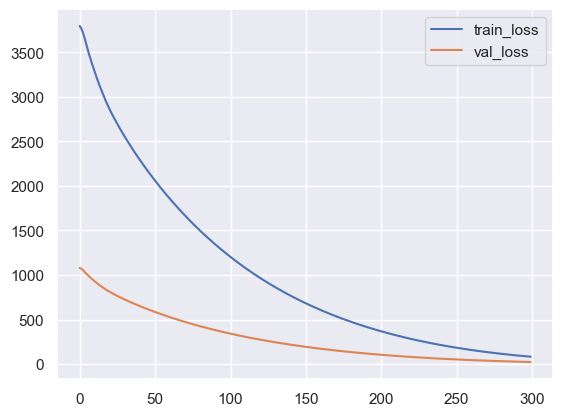

Finished Training
Epoch 1/300


100%|██████████| 7/7 [00:00<00:00, 120.31it/s]


Train Loss: 3845.0696411132812


100%|██████████| 2/2 [00:00<00:00, 288.48it/s]


Epoch 2/300


100%|██████████| 7/7 [00:00<00:00, 84.38it/s]


Train Loss: 3821.7649536132812


100%|██████████| 2/2 [00:00<00:00, 51.04it/s]


Epoch 3/300


100%|██████████| 7/7 [00:00<00:00, 118.32it/s]


Train Loss: 3795.962158203125


100%|██████████| 2/2 [00:00<00:00, 398.51it/s]


Epoch 4/300


100%|██████████| 7/7 [00:00<00:00, 120.30it/s]


Train Loss: 3762.0991821289062


100%|██████████| 2/2 [00:00<00:00, 350.77it/s]


Epoch 5/300


100%|██████████| 7/7 [00:00<00:00, 139.55it/s]


Train Loss: 3716.4928588867188


100%|██████████| 2/2 [00:00<00:00, 357.02it/s]


Epoch 6/300


100%|██████████| 7/7 [00:00<00:00, 133.39it/s]


Train Loss: 3663.8353881835938


100%|██████████| 2/2 [00:00<00:00, 419.45it/s]


Epoch 7/300


100%|██████████| 7/7 [00:00<00:00, 129.22it/s]


Train Loss: 3605.158203125


100%|██████████| 2/2 [00:00<00:00, 361.86it/s]


Epoch 8/300


100%|██████████| 7/7 [00:00<00:00, 143.96it/s]


Train Loss: 3540.1244201660156


100%|██████████| 2/2 [00:00<00:00, 324.13it/s]


Epoch 9/300


100%|██████████| 7/7 [00:00<00:00, 124.11it/s]


Train Loss: 3469.699951171875


100%|██████████| 2/2 [00:00<00:00, 378.07it/s]


Epoch 10/300


100%|██████████| 7/7 [00:00<00:00, 139.70it/s]


Train Loss: 3400.022216796875


100%|██████████| 2/2 [00:00<00:00, 337.90it/s]


Epoch 11/300


100%|██████████| 7/7 [00:00<00:00, 146.46it/s]


Train Loss: 3336.6121520996094


100%|██████████| 2/2 [00:00<00:00, 255.46it/s]


Epoch 12/300


100%|██████████| 7/7 [00:00<00:00, 145.77it/s]


Train Loss: 3277.3846740722656


100%|██████████| 2/2 [00:00<00:00, 378.50it/s]


Epoch 13/300


100%|██████████| 7/7 [00:00<00:00, 138.73it/s]


Train Loss: 3222.540985107422


100%|██████████| 2/2 [00:00<00:00, 359.53it/s]


Epoch 14/300


100%|██████████| 7/7 [00:00<00:00, 146.38it/s]


Train Loss: 3171.35986328125


100%|██████████| 2/2 [00:00<00:00, 185.44it/s]


Epoch 15/300


100%|██████████| 7/7 [00:00<00:00, 137.66it/s]


Train Loss: 3123.798095703125


100%|██████████| 2/2 [00:00<00:00, 368.88it/s]


Epoch 16/300


100%|██████████| 7/7 [00:00<00:00, 67.44it/s]


Train Loss: 3081.025421142578


100%|██████████| 2/2 [00:00<00:00, 306.84it/s]


Epoch 17/300


100%|██████████| 7/7 [00:00<00:00, 134.06it/s]


Train Loss: 3041.142059326172


100%|██████████| 2/2 [00:00<00:00, 371.13it/s]


Epoch 18/300


100%|██████████| 7/7 [00:00<00:00, 112.18it/s]


Train Loss: 3003.333526611328


100%|██████████| 2/2 [00:00<00:00, 364.23it/s]


Epoch 19/300


100%|██████████| 7/7 [00:00<00:00, 117.82it/s]


Train Loss: 2966.763916015625


100%|██████████| 2/2 [00:00<00:00, 369.69it/s]


Epoch 20/300


100%|██████████| 7/7 [00:00<00:00, 127.80it/s]


Train Loss: 2931.381103515625


100%|██████████| 2/2 [00:00<00:00, 393.85it/s]


Epoch 21/300


100%|██████████| 7/7 [00:00<00:00, 142.75it/s]


Train Loss: 2897.217559814453


100%|██████████| 2/2 [00:00<00:00, 386.70it/s]


Epoch 22/300


100%|██████████| 7/7 [00:00<00:00, 125.68it/s]


Train Loss: 2863.744354248047


100%|██████████| 2/2 [00:00<00:00, 388.58it/s]


Epoch 23/300


100%|██████████| 7/7 [00:00<00:00, 141.21it/s]


Train Loss: 2831.159393310547


100%|██████████| 2/2 [00:00<00:00, 399.29it/s]


Epoch 24/300


100%|██████████| 7/7 [00:00<00:00, 147.14it/s]


Train Loss: 2799.2745666503906


100%|██████████| 2/2 [00:00<00:00, 379.23it/s]


Epoch 25/300


100%|██████████| 7/7 [00:00<00:00, 127.00it/s]


Train Loss: 2767.8297729492188


100%|██████████| 2/2 [00:00<00:00, 406.33it/s]


Epoch 26/300


100%|██████████| 7/7 [00:00<00:00, 141.27it/s]


Train Loss: 2737.2078857421875


100%|██████████| 2/2 [00:00<00:00, 392.16it/s]


Epoch 27/300


100%|██████████| 7/7 [00:00<00:00, 137.02it/s]


Train Loss: 2707.0137329101562


100%|██████████| 2/2 [00:00<00:00, 326.48it/s]


Epoch 28/300


100%|██████████| 7/7 [00:00<00:00, 135.31it/s]


Train Loss: 2677.572540283203


100%|██████████| 2/2 [00:00<00:00, 392.84it/s]


Epoch 29/300


100%|██████████| 7/7 [00:00<00:00, 130.79it/s]


Train Loss: 2648.306365966797


100%|██████████| 2/2 [00:00<00:00, 390.86it/s]


Epoch 30/300


100%|██████████| 7/7 [00:00<00:00, 140.98it/s]


Train Loss: 2619.6839294433594


100%|██████████| 2/2 [00:00<00:00, 233.78it/s]


Epoch 31/300


100%|██████████| 7/7 [00:00<00:00, 136.24it/s]


Train Loss: 2591.4842529296875


100%|██████████| 2/2 [00:00<00:00, 384.69it/s]


Epoch 32/300


100%|██████████| 7/7 [00:00<00:00, 123.35it/s]


Train Loss: 2563.6124572753906


100%|██████████| 2/2 [00:00<00:00, 386.02it/s]


Epoch 33/300


100%|██████████| 7/7 [00:00<00:00, 134.24it/s]


Train Loss: 2536.1884155273438


100%|██████████| 2/2 [00:00<00:00, 412.36it/s]


Epoch 34/300


100%|██████████| 7/7 [00:00<00:00, 136.23it/s]


Train Loss: 2509.1726684570312


100%|██████████| 2/2 [00:00<00:00, 284.29it/s]


Epoch 35/300


100%|██████████| 7/7 [00:00<00:00, 79.82it/s]


Train Loss: 2482.4315795898438


100%|██████████| 2/2 [00:00<00:00, 329.22it/s]


Epoch 36/300


100%|██████████| 7/7 [00:00<00:00, 131.19it/s]


Train Loss: 2456.169891357422


100%|██████████| 2/2 [00:00<00:00, 344.64it/s]


Epoch 37/300


100%|██████████| 7/7 [00:00<00:00, 144.51it/s]


Train Loss: 2430.1964111328125


100%|██████████| 2/2 [00:00<00:00, 405.03it/s]


Epoch 38/300


100%|██████████| 7/7 [00:00<00:00, 126.67it/s]


Train Loss: 2404.467559814453


100%|██████████| 2/2 [00:00<00:00, 269.54it/s]


Epoch 39/300


100%|██████████| 7/7 [00:00<00:00, 143.62it/s]


Train Loss: 2379.0008544921875


100%|██████████| 2/2 [00:00<00:00, 397.21it/s]


Epoch 40/300


100%|██████████| 7/7 [00:00<00:00, 134.95it/s]


Train Loss: 2354.0338439941406


100%|██████████| 2/2 [00:00<00:00, 330.14it/s]


Epoch 41/300


100%|██████████| 7/7 [00:00<00:00, 119.53it/s]


Train Loss: 2329.2285766601562


100%|██████████| 2/2 [00:00<00:00, 396.12it/s]


Epoch 42/300


100%|██████████| 7/7 [00:00<00:00, 136.32it/s]


Train Loss: 2304.903839111328


100%|██████████| 2/2 [00:00<00:00, 341.18it/s]


Epoch 43/300


100%|██████████| 7/7 [00:00<00:00, 136.50it/s]


Train Loss: 2280.739990234375


100%|██████████| 2/2 [00:00<00:00, 378.79it/s]


Epoch 44/300


100%|██████████| 7/7 [00:00<00:00, 129.11it/s]


Train Loss: 2256.881622314453


100%|██████████| 2/2 [00:00<00:00, 355.95it/s]


Epoch 45/300


100%|██████████| 7/7 [00:00<00:00, 140.05it/s]


Train Loss: 2233.281494140625


100%|██████████| 2/2 [00:00<00:00, 308.78it/s]


Epoch 46/300


100%|██████████| 7/7 [00:00<00:00, 138.70it/s]


Train Loss: 2209.8651733398438


100%|██████████| 2/2 [00:00<00:00, 322.79it/s]


Epoch 47/300


100%|██████████| 7/7 [00:00<00:00, 132.02it/s]


Train Loss: 2186.7168579101562


100%|██████████| 2/2 [00:00<00:00, 361.72it/s]


Epoch 48/300


100%|██████████| 7/7 [00:00<00:00, 146.13it/s]


Train Loss: 2163.947998046875


100%|██████████| 2/2 [00:00<00:00, 248.79it/s]


Epoch 49/300


100%|██████████| 7/7 [00:00<00:00, 135.04it/s]


Train Loss: 2141.34375


100%|██████████| 2/2 [00:00<00:00, 372.64it/s]


Epoch 50/300


100%|██████████| 7/7 [00:00<00:00, 125.30it/s]


Train Loss: 2118.9344177246094


100%|██████████| 2/2 [00:00<00:00, 256.12it/s]


Epoch 51/300


100%|██████████| 7/7 [00:00<00:00, 122.24it/s]


Train Loss: 2096.8738403320312


100%|██████████| 2/2 [00:00<00:00, 378.65it/s]


Epoch 52/300


100%|██████████| 7/7 [00:00<00:00, 134.91it/s]


Train Loss: 2075.0506591796875


100%|██████████| 2/2 [00:00<00:00, 343.12it/s]


Epoch 53/300


100%|██████████| 7/7 [00:00<00:00, 66.95it/s]


Train Loss: 2053.296630859375


100%|██████████| 2/2 [00:00<00:00, 200.50it/s]


Epoch 54/300


100%|██████████| 7/7 [00:00<00:00, 135.13it/s]


Train Loss: 2031.9826965332031


100%|██████████| 2/2 [00:00<00:00, 369.40it/s]


Epoch 55/300


100%|██████████| 7/7 [00:00<00:00, 149.32it/s]


Train Loss: 2010.7555541992188


100%|██████████| 2/2 [00:00<00:00, 359.64it/s]


Epoch 56/300


100%|██████████| 7/7 [00:00<00:00, 63.59it/s]


Train Loss: 1989.7715759277344


100%|██████████| 2/2 [00:00<00:00, 338.11it/s]


Epoch 57/300


100%|██████████| 7/7 [00:00<00:00, 51.03it/s]


Train Loss: 1969.0221252441406


100%|██████████| 2/2 [00:00<00:00, 331.89it/s]


Epoch 58/300


100%|██████████| 7/7 [00:00<00:00, 119.13it/s]


Train Loss: 1948.5703125


100%|██████████| 2/2 [00:00<00:00, 299.44it/s]


Epoch 59/300


100%|██████████| 7/7 [00:00<00:00, 56.15it/s]


Train Loss: 1928.2790832519531


100%|██████████| 2/2 [00:00<00:00, 330.35it/s]


Epoch 60/300


100%|██████████| 7/7 [00:00<00:00, 46.34it/s]


Train Loss: 1908.0807189941406


100%|██████████| 2/2 [00:00<00:00, 62.10it/s]


Epoch 61/300


100%|██████████| 7/7 [00:00<00:00, 82.92it/s]


Train Loss: 1888.15380859375


100%|██████████| 2/2 [00:00<00:00, 39.19it/s]


Epoch 62/300


100%|██████████| 7/7 [00:00<00:00, 44.31it/s]


Train Loss: 1868.5106201171875


100%|██████████| 2/2 [00:00<00:00, 29.80it/s]


Epoch 63/300


100%|██████████| 7/7 [00:00<00:00, 39.73it/s]


Train Loss: 1848.9775085449219


100%|██████████| 2/2 [00:00<00:00, 313.83it/s]


Epoch 64/300


100%|██████████| 7/7 [00:00<00:00, 68.44it/s]


Train Loss: 1829.5878295898438


100%|██████████| 2/2 [00:00<00:00, 189.76it/s]


Epoch 65/300


100%|██████████| 7/7 [00:00<00:00, 56.69it/s]


Train Loss: 1810.5767822265625


100%|██████████| 2/2 [00:00<00:00, 33.82it/s]


Epoch 66/300


100%|██████████| 7/7 [00:00<00:00, 79.02it/s]


Train Loss: 1791.6146545410156


100%|██████████| 2/2 [00:00<00:00, 244.26it/s]


Epoch 67/300


100%|██████████| 7/7 [00:00<00:00, 102.59it/s]


Train Loss: 1772.978271484375


100%|██████████| 2/2 [00:00<00:00, 312.75it/s]


Epoch 68/300


100%|██████████| 7/7 [00:00<00:00, 113.38it/s]


Train Loss: 1754.356185913086


100%|██████████| 2/2 [00:00<00:00, 302.22it/s]


Epoch 69/300


100%|██████████| 7/7 [00:00<00:00, 118.49it/s]


Train Loss: 1735.9464721679688


100%|██████████| 2/2 [00:00<00:00, 307.97it/s]


Epoch 70/300


100%|██████████| 7/7 [00:00<00:00, 55.70it/s]


Train Loss: 1717.8193817138672


100%|██████████| 2/2 [00:00<00:00, 293.77it/s]


Epoch 71/300


100%|██████████| 7/7 [00:00<00:00, 107.84it/s]


Train Loss: 1699.8102264404297


100%|██████████| 2/2 [00:00<00:00, 213.01it/s]


Epoch 72/300


100%|██████████| 7/7 [00:00<00:00, 123.17it/s]


Train Loss: 1682.0060424804688


100%|██████████| 2/2 [00:00<00:00, 166.34it/s]


Epoch 73/300


100%|██████████| 7/7 [00:00<00:00, 54.89it/s]


Train Loss: 1664.4038543701172


100%|██████████| 2/2 [00:00<00:00, 128.06it/s]


Epoch 74/300


100%|██████████| 7/7 [00:00<00:00, 39.45it/s]


Train Loss: 1646.8927917480469


100%|██████████| 2/2 [00:00<00:00, 151.27it/s]


Epoch 75/300


100%|██████████| 7/7 [00:00<00:00, 52.52it/s]


Train Loss: 1629.6067199707031


100%|██████████| 2/2 [00:00<00:00, 153.78it/s]


Epoch 76/300


100%|██████████| 7/7 [00:00<00:00, 35.55it/s]


Train Loss: 1612.4668884277344


100%|██████████| 2/2 [00:00<00:00, 209.29it/s]


Epoch 77/300


100%|██████████| 7/7 [00:00<00:00, 49.45it/s]


Train Loss: 1595.4883422851562


100%|██████████| 2/2 [00:00<00:00, 271.82it/s]


Epoch 78/300


100%|██████████| 7/7 [00:00<00:00, 120.23it/s]


Train Loss: 1578.7930297851562


100%|██████████| 2/2 [00:00<00:00, 225.41it/s]


Epoch 79/300


100%|██████████| 7/7 [00:00<00:00, 110.31it/s]


Train Loss: 1562.1736907958984


100%|██████████| 2/2 [00:00<00:00, 345.85it/s]


Epoch 80/300


100%|██████████| 7/7 [00:00<00:00, 108.90it/s]


Train Loss: 1545.6402893066406


100%|██████████| 2/2 [00:00<00:00, 387.38it/s]


Epoch 81/300


100%|██████████| 7/7 [00:00<00:00, 112.78it/s]


Train Loss: 1529.2972259521484


100%|██████████| 2/2 [00:00<00:00, 293.23it/s]


Epoch 82/300


100%|██████████| 7/7 [00:00<00:00, 122.45it/s]


Train Loss: 1513.2310943603516


100%|██████████| 2/2 [00:00<00:00, 305.95it/s]


Epoch 83/300


100%|██████████| 7/7 [00:00<00:00, 116.33it/s]


Train Loss: 1497.2247314453125


100%|██████████| 2/2 [00:00<00:00, 171.42it/s]


Epoch 84/300


100%|██████████| 7/7 [00:00<00:00, 116.99it/s]


Train Loss: 1481.3797607421875


100%|██████████| 2/2 [00:00<00:00, 347.93it/s]


Epoch 85/300


100%|██████████| 7/7 [00:00<00:00, 112.13it/s]


Train Loss: 1465.748519897461


100%|██████████| 2/2 [00:00<00:00, 317.21it/s]


Epoch 86/300


100%|██████████| 7/7 [00:00<00:00, 71.29it/s]


Train Loss: 1450.2237396240234


100%|██████████| 2/2 [00:00<00:00, 40.20it/s]


Epoch 87/300


100%|██████████| 7/7 [00:00<00:00, 49.01it/s]


Train Loss: 1434.7976837158203


100%|██████████| 2/2 [00:00<00:00, 96.01it/s]


Epoch 88/300


100%|██████████| 7/7 [00:00<00:00, 53.83it/s]


Train Loss: 1419.6562805175781


100%|██████████| 2/2 [00:00<00:00, 356.37it/s]


Epoch 89/300


100%|██████████| 7/7 [00:00<00:00, 75.80it/s]


Train Loss: 1404.5935974121094


100%|██████████| 2/2 [00:00<00:00, 150.57it/s]


Epoch 90/300


100%|██████████| 7/7 [00:00<00:00, 21.16it/s]


Train Loss: 1389.6513366699219


100%|██████████| 2/2 [00:00<00:00, 132.50it/s]


Epoch 91/300


100%|██████████| 7/7 [00:00<00:00, 80.01it/s]


Train Loss: 1374.86474609375


100%|██████████| 2/2 [00:00<00:00, 402.25it/s]


Epoch 92/300


100%|██████████| 7/7 [00:00<00:00, 93.64it/s]


Train Loss: 1360.1909637451172


100%|██████████| 2/2 [00:00<00:00, 365.29it/s]


Epoch 93/300


100%|██████████| 7/7 [00:00<00:00, 102.86it/s]


Train Loss: 1345.7467803955078


100%|██████████| 2/2 [00:00<00:00, 383.29it/s]


Epoch 94/300


100%|██████████| 7/7 [00:00<00:00, 106.32it/s]


Train Loss: 1331.4425201416016


100%|██████████| 2/2 [00:00<00:00, 249.90it/s]


Epoch 95/300


100%|██████████| 7/7 [00:00<00:00, 88.81it/s]


Train Loss: 1317.1860046386719


100%|██████████| 2/2 [00:00<00:00, 172.99it/s]


Epoch 96/300


100%|██████████| 7/7 [00:00<00:00, 116.61it/s]


Train Loss: 1303.1321105957031


100%|██████████| 2/2 [00:00<00:00, 44.58it/s]


Epoch 97/300


100%|██████████| 7/7 [00:00<00:00, 94.25it/s]


Train Loss: 1289.2088470458984


100%|██████████| 2/2 [00:00<00:00, 345.12it/s]


Epoch 98/300


100%|██████████| 7/7 [00:00<00:00, 89.65it/s]


Train Loss: 1275.3927154541016


100%|██████████| 2/2 [00:00<00:00, 64.60it/s]


Epoch 99/300


100%|██████████| 7/7 [00:00<00:00, 99.26it/s]


Train Loss: 1261.794189453125


100%|██████████| 2/2 [00:00<00:00, 250.75it/s]


Epoch 100/300


100%|██████████| 7/7 [00:00<00:00, 104.96it/s]


Train Loss: 1248.2181243896484


100%|██████████| 2/2 [00:00<00:00, 272.03it/s]


Epoch 101/300


100%|██████████| 7/7 [00:00<00:00, 88.62it/s]


Train Loss: 1234.8190460205078


100%|██████████| 2/2 [00:00<00:00, 325.77it/s]


Epoch 102/300


100%|██████████| 7/7 [00:00<00:00, 117.77it/s]


Train Loss: 1221.625228881836


100%|██████████| 2/2 [00:00<00:00, 288.44it/s]


Epoch 103/300


100%|██████████| 7/7 [00:00<00:00, 101.16it/s]


Train Loss: 1208.4059600830078


100%|██████████| 2/2 [00:00<00:00, 244.31it/s]


Epoch 104/300


100%|██████████| 7/7 [00:00<00:00, 136.00it/s]


Train Loss: 1195.354019165039


100%|██████████| 2/2 [00:00<00:00, 374.52it/s]


Epoch 105/300


100%|██████████| 7/7 [00:00<00:00, 129.39it/s]


Train Loss: 1182.5257720947266


100%|██████████| 2/2 [00:00<00:00, 400.41it/s]


Epoch 106/300


100%|██████████| 7/7 [00:00<00:00, 139.29it/s]


Train Loss: 1169.7878723144531


100%|██████████| 2/2 [00:00<00:00, 361.78it/s]


Epoch 107/300


100%|██████████| 7/7 [00:00<00:00, 145.53it/s]


Train Loss: 1157.1237182617188


100%|██████████| 2/2 [00:00<00:00, 383.37it/s]


Epoch 108/300


100%|██████████| 7/7 [00:00<00:00, 122.90it/s]


Train Loss: 1144.5875549316406


100%|██████████| 2/2 [00:00<00:00, 354.10it/s]


Epoch 109/300


100%|██████████| 7/7 [00:00<00:00, 139.41it/s]


Train Loss: 1132.227798461914


100%|██████████| 2/2 [00:00<00:00, 342.11it/s]


Epoch 110/300


100%|██████████| 7/7 [00:00<00:00, 124.53it/s]


Train Loss: 1119.9231262207031


100%|██████████| 2/2 [00:00<00:00, 357.65it/s]


Epoch 111/300


100%|██████████| 7/7 [00:00<00:00, 121.70it/s]


Train Loss: 1107.801986694336


100%|██████████| 2/2 [00:00<00:00, 367.91it/s]


Epoch 112/300


100%|██████████| 7/7 [00:00<00:00, 143.20it/s]


Train Loss: 1095.801986694336


100%|██████████| 2/2 [00:00<00:00, 386.16it/s]


Epoch 113/300


100%|██████████| 7/7 [00:00<00:00, 130.65it/s]


Train Loss: 1083.8929901123047


100%|██████████| 2/2 [00:00<00:00, 399.21it/s]


Epoch 114/300


100%|██████████| 7/7 [00:00<00:00, 137.35it/s]


Train Loss: 1072.1271667480469


100%|██████████| 2/2 [00:00<00:00, 317.35it/s]


Epoch 115/300


100%|██████████| 7/7 [00:00<00:00, 143.88it/s]


Train Loss: 1060.368148803711


100%|██████████| 2/2 [00:00<00:00, 378.29it/s]


Epoch 116/300


100%|██████████| 7/7 [00:00<00:00, 141.06it/s]


Train Loss: 1048.829833984375


100%|██████████| 2/2 [00:00<00:00, 306.94it/s]


Epoch 117/300


100%|██████████| 7/7 [00:00<00:00, 131.02it/s]


Train Loss: 1037.3804321289062


100%|██████████| 2/2 [00:00<00:00, 403.22it/s]


Epoch 118/300


100%|██████████| 7/7 [00:00<00:00, 140.60it/s]


Train Loss: 1025.96875


100%|██████████| 2/2 [00:00<00:00, 336.93it/s]


Epoch 119/300


100%|██████████| 7/7 [00:00<00:00, 141.76it/s]


Train Loss: 1014.7747802734375


100%|██████████| 2/2 [00:00<00:00, 323.61it/s]


Epoch 120/300


100%|██████████| 7/7 [00:00<00:00, 123.94it/s]


Train Loss: 1003.6179962158203


100%|██████████| 2/2 [00:00<00:00, 209.73it/s]


Epoch 121/300


100%|██████████| 7/7 [00:00<00:00, 130.23it/s]


Train Loss: 992.6424255371094


100%|██████████| 2/2 [00:00<00:00, 391.63it/s]


Epoch 122/300


100%|██████████| 7/7 [00:00<00:00, 114.43it/s]


Train Loss: 981.7482299804688


100%|██████████| 2/2 [00:00<00:00, 317.31it/s]


Epoch 123/300


100%|██████████| 7/7 [00:00<00:00, 145.17it/s]


Train Loss: 970.9151916503906


100%|██████████| 2/2 [00:00<00:00, 375.25it/s]


Epoch 124/300


100%|██████████| 7/7 [00:00<00:00, 120.19it/s]


Train Loss: 960.1841888427734


100%|██████████| 2/2 [00:00<00:00, 382.55it/s]


Epoch 125/300


100%|██████████| 7/7 [00:00<00:00, 141.44it/s]


Train Loss: 949.6358489990234


100%|██████████| 2/2 [00:00<00:00, 357.40it/s]


Epoch 126/300


100%|██████████| 7/7 [00:00<00:00, 145.06it/s]


Train Loss: 939.1621704101562


100%|██████████| 2/2 [00:00<00:00, 400.49it/s]


Epoch 127/300


100%|██████████| 7/7 [00:00<00:00, 79.03it/s]


Train Loss: 928.7630920410156


100%|██████████| 2/2 [00:00<00:00, 280.87it/s]


Epoch 128/300


100%|██████████| 7/7 [00:00<00:00, 131.07it/s]


Train Loss: 918.5200805664062


100%|██████████| 2/2 [00:00<00:00, 363.05it/s]


Epoch 129/300


100%|██████████| 7/7 [00:00<00:00, 127.98it/s]


Train Loss: 908.3338317871094


100%|██████████| 2/2 [00:00<00:00, 353.85it/s]


Epoch 130/300


100%|██████████| 7/7 [00:00<00:00, 135.03it/s]


Train Loss: 898.2259140014648


100%|██████████| 2/2 [00:00<00:00, 362.91it/s]


Epoch 131/300


100%|██████████| 7/7 [00:00<00:00, 135.11it/s]


Train Loss: 888.2436676025391


100%|██████████| 2/2 [00:00<00:00, 401.45it/s]


Epoch 132/300


100%|██████████| 7/7 [00:00<00:00, 129.97it/s]


Train Loss: 878.3379058837891


100%|██████████| 2/2 [00:00<00:00, 402.41it/s]


Epoch 133/300


100%|██████████| 7/7 [00:00<00:00, 143.25it/s]


Train Loss: 868.5149002075195


100%|██████████| 2/2 [00:00<00:00, 383.15it/s]


Epoch 134/300


100%|██████████| 7/7 [00:00<00:00, 140.46it/s]


Train Loss: 858.8233947753906


100%|██████████| 2/2 [00:00<00:00, 351.80it/s]


Epoch 135/300


100%|██████████| 7/7 [00:00<00:00, 132.58it/s]


Train Loss: 849.2141189575195


100%|██████████| 2/2 [00:00<00:00, 391.94it/s]


Epoch 136/300


100%|██████████| 7/7 [00:00<00:00, 117.50it/s]


Train Loss: 839.7274856567383


100%|██████████| 2/2 [00:00<00:00, 398.57it/s]


Epoch 137/300


100%|██████████| 7/7 [00:00<00:00, 122.98it/s]


Train Loss: 830.3723602294922


100%|██████████| 2/2 [00:00<00:00, 184.15it/s]


Epoch 138/300


100%|██████████| 7/7 [00:00<00:00, 135.53it/s]


Train Loss: 820.9759826660156


100%|██████████| 2/2 [00:00<00:00, 399.76it/s]


Epoch 139/300


100%|██████████| 7/7 [00:00<00:00, 128.93it/s]


Train Loss: 811.7973556518555


100%|██████████| 2/2 [00:00<00:00, 398.24it/s]


Epoch 140/300


100%|██████████| 7/7 [00:00<00:00, 112.18it/s]


Train Loss: 802.6697616577148


100%|██████████| 2/2 [00:00<00:00, 393.70it/s]


Epoch 141/300


100%|██████████| 7/7 [00:00<00:00, 127.37it/s]


Train Loss: 793.5597305297852


100%|██████████| 2/2 [00:00<00:00, 365.69it/s]


Epoch 142/300


100%|██████████| 7/7 [00:00<00:00, 133.47it/s]


Train Loss: 784.6329650878906


100%|██████████| 2/2 [00:00<00:00, 387.23it/s]


Epoch 143/300


100%|██████████| 7/7 [00:00<00:00, 125.33it/s]


Train Loss: 775.7435684204102


100%|██████████| 2/2 [00:00<00:00, 380.50it/s]


Epoch 144/300


100%|██████████| 7/7 [00:00<00:00, 135.22it/s]


Train Loss: 766.9352798461914


100%|██████████| 2/2 [00:00<00:00, 358.23it/s]


Epoch 145/300


100%|██████████| 7/7 [00:00<00:00, 140.87it/s]


Train Loss: 758.2860107421875


100%|██████████| 2/2 [00:00<00:00, 329.22it/s]


Epoch 146/300


100%|██████████| 7/7 [00:00<00:00, 146.07it/s]


Train Loss: 749.638671875


100%|██████████| 2/2 [00:00<00:00, 396.59it/s]


Epoch 147/300


100%|██████████| 7/7 [00:00<00:00, 137.64it/s]


Train Loss: 741.1237487792969


100%|██████████| 2/2 [00:00<00:00, 392.16it/s]


Epoch 148/300


100%|██████████| 7/7 [00:00<00:00, 146.72it/s]


Train Loss: 732.6378707885742


100%|██████████| 2/2 [00:00<00:00, 386.48it/s]


Epoch 149/300


100%|██████████| 7/7 [00:00<00:00, 115.74it/s]


Train Loss: 724.2555236816406


100%|██████████| 2/2 [00:00<00:00, 348.25it/s]


Epoch 150/300


100%|██████████| 7/7 [00:00<00:00, 126.83it/s]


Train Loss: 716.0610427856445


100%|██████████| 2/2 [00:00<00:00, 402.49it/s]


Epoch 151/300


100%|██████████| 7/7 [00:00<00:00, 133.89it/s]


Train Loss: 707.7822418212891


100%|██████████| 2/2 [00:00<00:00, 329.26it/s]


Epoch 152/300


100%|██████████| 7/7 [00:00<00:00, 127.90it/s]


Train Loss: 699.652214050293


100%|██████████| 2/2 [00:00<00:00, 66.01it/s]


Epoch 153/300


100%|██████████| 7/7 [00:00<00:00, 114.09it/s]


Train Loss: 691.5614776611328


100%|██████████| 2/2 [00:00<00:00, 306.70it/s]


Epoch 154/300


100%|██████████| 7/7 [00:00<00:00, 144.05it/s]


Train Loss: 683.6810684204102


100%|██████████| 2/2 [00:00<00:00, 388.96it/s]


Epoch 155/300


100%|██████████| 7/7 [00:00<00:00, 122.88it/s]


Train Loss: 675.7751846313477


100%|██████████| 2/2 [00:00<00:00, 412.52it/s]


Epoch 156/300


100%|██████████| 7/7 [00:00<00:00, 129.78it/s]


Train Loss: 667.9541244506836


100%|██████████| 2/2 [00:00<00:00, 384.46it/s]


Epoch 157/300


100%|██████████| 7/7 [00:00<00:00, 145.62it/s]


Train Loss: 660.240478515625


100%|██████████| 2/2 [00:00<00:00, 394.50it/s]


Epoch 158/300


100%|██████████| 7/7 [00:00<00:00, 134.77it/s]


Train Loss: 652.6001205444336


100%|██████████| 2/2 [00:00<00:00, 363.30it/s]


Epoch 159/300


100%|██████████| 7/7 [00:00<00:00, 107.45it/s]


Train Loss: 644.9741363525391


100%|██████████| 2/2 [00:00<00:00, 282.84it/s]


Epoch 160/300


100%|██████████| 7/7 [00:00<00:00, 75.24it/s]


Train Loss: 637.4925765991211


100%|██████████| 2/2 [00:00<00:00, 306.09it/s]


Epoch 161/300


100%|██████████| 7/7 [00:00<00:00, 124.71it/s]


Train Loss: 630.057861328125


100%|██████████| 2/2 [00:00<00:00, 329.69it/s]


Epoch 162/300


100%|██████████| 7/7 [00:00<00:00, 149.52it/s]


Train Loss: 622.6647109985352


100%|██████████| 2/2 [00:00<00:00, 357.92it/s]


Epoch 163/300


100%|██████████| 7/7 [00:00<00:00, 143.16it/s]


Train Loss: 615.4618225097656


100%|██████████| 2/2 [00:00<00:00, 99.64it/s]


Epoch 164/300


100%|██████████| 7/7 [00:00<00:00, 135.83it/s]


Train Loss: 608.1938629150391


100%|██████████| 2/2 [00:00<00:00, 374.88it/s]


Epoch 165/300


100%|██████████| 7/7 [00:00<00:00, 137.53it/s]


Train Loss: 601.0886688232422


100%|██████████| 2/2 [00:00<00:00, 377.08it/s]


Epoch 166/300


100%|██████████| 7/7 [00:00<00:00, 141.83it/s]


Train Loss: 593.9989624023438


100%|██████████| 2/2 [00:00<00:00, 336.86it/s]


Epoch 167/300


100%|██████████| 7/7 [00:00<00:00, 118.01it/s]


Train Loss: 587.0031814575195


100%|██████████| 2/2 [00:00<00:00, 263.44it/s]


Epoch 168/300


100%|██████████| 7/7 [00:00<00:00, 108.95it/s]


Train Loss: 580.0903549194336


100%|██████████| 2/2 [00:00<00:00, 367.31it/s]


Epoch 169/300


100%|██████████| 7/7 [00:00<00:00, 115.97it/s]


Train Loss: 573.2106018066406


100%|██████████| 2/2 [00:00<00:00, 348.55it/s]


Epoch 170/300


100%|██████████| 7/7 [00:00<00:00, 126.34it/s]


Train Loss: 566.4416046142578


100%|██████████| 2/2 [00:00<00:00, 156.64it/s]


Epoch 171/300


100%|██████████| 7/7 [00:00<00:00, 122.13it/s]


Train Loss: 559.7157669067383


100%|██████████| 2/2 [00:00<00:00, 348.25it/s]


Epoch 172/300


100%|██████████| 7/7 [00:00<00:00, 112.58it/s]


Train Loss: 553.0859069824219


100%|██████████| 2/2 [00:00<00:00, 377.63it/s]


Epoch 173/300


100%|██████████| 7/7 [00:00<00:00, 140.14it/s]


Train Loss: 546.4356307983398


100%|██████████| 2/2 [00:00<00:00, 344.30it/s]


Epoch 174/300


100%|██████████| 7/7 [00:00<00:00, 126.71it/s]


Train Loss: 539.9425888061523


100%|██████████| 2/2 [00:00<00:00, 377.08it/s]


Epoch 175/300


100%|██████████| 7/7 [00:00<00:00, 126.28it/s]


Train Loss: 533.4495849609375


100%|██████████| 2/2 [00:00<00:00, 354.56it/s]


Epoch 176/300


100%|██████████| 7/7 [00:00<00:00, 61.23it/s]


Train Loss: 527.119743347168


100%|██████████| 2/2 [00:00<00:00, 347.83it/s]


Epoch 177/300


100%|██████████| 7/7 [00:00<00:00, 123.46it/s]


Train Loss: 520.7411041259766


100%|██████████| 2/2 [00:00<00:00, 382.62it/s]


Epoch 178/300


100%|██████████| 7/7 [00:00<00:00, 112.64it/s]


Train Loss: 514.4835357666016


100%|██████████| 2/2 [00:00<00:00, 370.36it/s]


Epoch 179/300


100%|██████████| 7/7 [00:00<00:00, 42.32it/s]


Train Loss: 508.22347259521484


100%|██████████| 2/2 [00:00<00:00, 52.00it/s]


Epoch 180/300


100%|██████████| 7/7 [00:00<00:00, 108.41it/s]


Train Loss: 502.11438751220703


100%|██████████| 2/2 [00:00<00:00, 285.96it/s]


Epoch 181/300


100%|██████████| 7/7 [00:00<00:00, 76.20it/s]


Train Loss: 496.04463958740234


100%|██████████| 2/2 [00:00<00:00, 112.52it/s]


Epoch 182/300


100%|██████████| 7/7 [00:00<00:00, 36.63it/s]


Train Loss: 490.02691650390625


100%|██████████| 2/2 [00:00<00:00, 281.53it/s]

Epoch 183/300



100%|██████████| 7/7 [00:00<00:00, 58.25it/s]


Train Loss: 484.05724334716797


100%|██████████| 2/2 [00:00<00:00, 102.58it/s]


Epoch 184/300


100%|██████████| 7/7 [00:00<00:00, 33.25it/s]


Train Loss: 478.14090728759766


100%|██████████| 2/2 [00:00<00:00, 218.13it/s]


Epoch 185/300


100%|██████████| 7/7 [00:00<00:00, 66.57it/s]


Train Loss: 472.2915267944336


100%|██████████| 2/2 [00:00<00:00, 352.74it/s]


Epoch 186/300


100%|██████████| 7/7 [00:00<00:00, 25.76it/s]


Train Loss: 466.51844024658203


100%|██████████| 2/2 [00:00<00:00, 139.97it/s]


Epoch 187/300


100%|██████████| 7/7 [00:00<00:00, 46.51it/s]


Train Loss: 460.8361129760742


100%|██████████| 2/2 [00:00<00:00, 247.23it/s]


Epoch 188/300


100%|██████████| 7/7 [00:00<00:00, 129.38it/s]


Train Loss: 455.1601104736328


100%|██████████| 2/2 [00:00<00:00, 400.72it/s]


Epoch 189/300


100%|██████████| 7/7 [00:00<00:00, 123.86it/s]


Train Loss: 449.52754974365234


100%|██████████| 2/2 [00:00<00:00, 393.09it/s]


Epoch 190/300


100%|██████████| 7/7 [00:00<00:00, 105.77it/s]


Train Loss: 443.96841049194336


100%|██████████| 2/2 [00:00<00:00, 373.21it/s]


Epoch 191/300


100%|██████████| 7/7 [00:00<00:00, 124.53it/s]


Train Loss: 438.4617156982422


100%|██████████| 2/2 [00:00<00:00, 360.23it/s]


Epoch 192/300


100%|██████████| 7/7 [00:00<00:00, 64.49it/s]


Train Loss: 433.07444763183594


100%|██████████| 2/2 [00:00<00:00, 377.07it/s]


Epoch 193/300


100%|██████████| 7/7 [00:00<00:00, 93.44it/s]


Train Loss: 427.6544990539551


100%|██████████| 2/2 [00:00<00:00, 390.02it/s]


Epoch 194/300


100%|██████████| 7/7 [00:00<00:00, 113.95it/s]


Train Loss: 422.3264617919922


100%|██████████| 2/2 [00:00<00:00, 339.40it/s]


Epoch 195/300


100%|██████████| 7/7 [00:00<00:00, 46.73it/s]


Train Loss: 417.0159034729004


100%|██████████| 2/2 [00:00<00:00, 94.74it/s]


Epoch 196/300


100%|██████████| 7/7 [00:00<00:00, 42.01it/s]


Train Loss: 411.8201789855957


100%|██████████| 2/2 [00:00<00:00, 156.03it/s]


Epoch 197/300


100%|██████████| 7/7 [00:00<00:00, 60.25it/s]


Train Loss: 406.6174087524414


100%|██████████| 2/2 [00:00<00:00, 241.23it/s]


Epoch 198/300


100%|██████████| 7/7 [00:00<00:00, 47.17it/s]


Train Loss: 401.5070495605469


100%|██████████| 2/2 [00:00<00:00, 132.00it/s]


Epoch 199/300


100%|██████████| 7/7 [00:00<00:00, 55.67it/s]


Train Loss: 396.44863510131836


100%|██████████| 2/2 [00:00<00:00, 321.29it/s]


Epoch 200/300


100%|██████████| 7/7 [00:00<00:00, 49.26it/s]


Train Loss: 391.44265365600586


100%|██████████| 2/2 [00:00<00:00, 208.64it/s]


Epoch 201/300


100%|██████████| 7/7 [00:00<00:00, 85.46it/s]


Train Loss: 386.474178314209


100%|██████████| 2/2 [00:00<00:00, 362.26it/s]


Epoch 202/300


100%|██████████| 7/7 [00:00<00:00, 91.40it/s]


Train Loss: 381.5622024536133


100%|██████████| 2/2 [00:00<00:00, 347.28it/s]


Epoch 203/300


100%|██████████| 7/7 [00:00<00:00, 103.21it/s]


Train Loss: 376.73106384277344


100%|██████████| 2/2 [00:00<00:00, 311.91it/s]


Epoch 204/300


100%|██████████| 7/7 [00:00<00:00, 99.60it/s]


Train Loss: 371.90377044677734


100%|██████████| 2/2 [00:00<00:00, 177.40it/s]


Epoch 205/300


100%|██████████| 7/7 [00:00<00:00, 89.49it/s]


Train Loss: 367.18373107910156


100%|██████████| 2/2 [00:00<00:00, 303.57it/s]


Epoch 206/300


100%|██████████| 7/7 [00:00<00:00, 121.46it/s]


Train Loss: 362.44819259643555


100%|██████████| 2/2 [00:00<00:00, 288.06it/s]


Epoch 207/300


100%|██████████| 7/7 [00:00<00:00, 22.94it/s]


Train Loss: 357.7891540527344


100%|██████████| 2/2 [00:00<00:00, 275.41it/s]


Epoch 208/300


100%|██████████| 7/7 [00:00<00:00, 51.60it/s]


Train Loss: 353.1762161254883


100%|██████████| 2/2 [00:00<00:00, 327.71it/s]


Epoch 209/300


100%|██████████| 7/7 [00:00<00:00, 65.56it/s]


Train Loss: 348.6217155456543


100%|██████████| 2/2 [00:00<00:00, 247.61it/s]


Epoch 210/300


100%|██████████| 7/7 [00:00<00:00, 42.39it/s]


Train Loss: 344.072208404541


100%|██████████| 2/2 [00:00<00:00, 252.11it/s]


Epoch 211/300


100%|██████████| 7/7 [00:00<00:00, 117.92it/s]


Train Loss: 339.63884353637695


100%|██████████| 2/2 [00:00<00:00, 284.75it/s]


Epoch 212/300


100%|██████████| 7/7 [00:00<00:00, 84.60it/s]


Train Loss: 335.1816101074219


100%|██████████| 2/2 [00:00<00:00, 364.90it/s]


Epoch 213/300


100%|██████████| 7/7 [00:00<00:00, 136.39it/s]


Train Loss: 330.79406356811523


100%|██████████| 2/2 [00:00<00:00, 341.64it/s]


Epoch 214/300


100%|██████████| 7/7 [00:00<00:00, 121.77it/s]


Train Loss: 326.4677429199219


100%|██████████| 2/2 [00:00<00:00, 334.61it/s]


Epoch 215/300


100%|██████████| 7/7 [00:00<00:00, 108.38it/s]


Train Loss: 322.2219123840332


100%|██████████| 2/2 [00:00<00:00, 300.57it/s]


Epoch 216/300


100%|██████████| 7/7 [00:00<00:00, 118.69it/s]


Train Loss: 317.92926025390625


100%|██████████| 2/2 [00:00<00:00, 287.97it/s]


Epoch 217/300


100%|██████████| 7/7 [00:00<00:00, 88.82it/s]


Train Loss: 313.77475357055664


100%|██████████| 2/2 [00:00<00:00, 373.14it/s]


Epoch 218/300


100%|██████████| 7/7 [00:00<00:00, 87.77it/s]


Train Loss: 309.62330627441406


100%|██████████| 2/2 [00:00<00:00, 255.98it/s]


Epoch 219/300


100%|██████████| 7/7 [00:00<00:00, 59.28it/s]


Train Loss: 305.5334663391113


100%|██████████| 2/2 [00:00<00:00, 372.99it/s]


Epoch 220/300


100%|██████████| 7/7 [00:00<00:00, 127.36it/s]


Train Loss: 301.4911422729492


100%|██████████| 2/2 [00:00<00:00, 321.87it/s]


Epoch 221/300


100%|██████████| 7/7 [00:00<00:00, 114.27it/s]


Train Loss: 297.42378997802734


100%|██████████| 2/2 [00:00<00:00, 359.33it/s]


Epoch 222/300


100%|██████████| 7/7 [00:00<00:00, 104.56it/s]


Train Loss: 293.4452705383301


100%|██████████| 2/2 [00:00<00:00, 351.49it/s]


Epoch 223/300


100%|██████████| 7/7 [00:00<00:00, 111.45it/s]


Train Loss: 289.5223846435547


100%|██████████| 2/2 [00:00<00:00, 314.23it/s]


Epoch 224/300


100%|██████████| 7/7 [00:00<00:00, 92.00it/s]


Train Loss: 285.662784576416


100%|██████████| 2/2 [00:00<00:00, 363.71it/s]


Epoch 225/300


100%|██████████| 7/7 [00:00<00:00, 133.33it/s]


Train Loss: 281.8006248474121


100%|██████████| 2/2 [00:00<00:00, 380.00it/s]


Epoch 226/300


100%|██████████| 7/7 [00:00<00:00, 132.84it/s]


Train Loss: 277.9793395996094


100%|██████████| 2/2 [00:00<00:00, 358.23it/s]


Epoch 227/300


100%|██████████| 7/7 [00:00<00:00, 123.62it/s]


Train Loss: 274.2140312194824


100%|██████████| 2/2 [00:00<00:00, 374.39it/s]


Epoch 228/300


100%|██████████| 7/7 [00:00<00:00, 121.98it/s]


Train Loss: 270.46160888671875


100%|██████████| 2/2 [00:00<00:00, 359.30it/s]


Epoch 229/300


100%|██████████| 7/7 [00:00<00:00, 128.31it/s]


Train Loss: 266.7798614501953


100%|██████████| 2/2 [00:00<00:00, 383.58it/s]


Epoch 230/300


100%|██████████| 7/7 [00:00<00:00, 128.42it/s]


Train Loss: 263.1614990234375


100%|██████████| 2/2 [00:00<00:00, 376.58it/s]


Epoch 231/300


100%|██████████| 7/7 [00:00<00:00, 135.24it/s]


Train Loss: 259.568302154541


100%|██████████| 2/2 [00:00<00:00, 335.96it/s]


Epoch 232/300


100%|██████████| 7/7 [00:00<00:00, 96.32it/s]


Train Loss: 255.9721565246582


100%|██████████| 2/2 [00:00<00:00, 223.68it/s]


Epoch 233/300


100%|██████████| 7/7 [00:00<00:00, 126.67it/s]


Train Loss: 252.45240020751953


100%|██████████| 2/2 [00:00<00:00, 157.64it/s]


Epoch 234/300


100%|██████████| 7/7 [00:00<00:00, 116.49it/s]


Train Loss: 248.9747543334961


100%|██████████| 2/2 [00:00<00:00, 378.72it/s]


Epoch 235/300


100%|██████████| 7/7 [00:00<00:00, 131.15it/s]


Train Loss: 245.49212646484375


100%|██████████| 2/2 [00:00<00:00, 328.41it/s]


Epoch 236/300


100%|██████████| 7/7 [00:00<00:00, 133.89it/s]


Train Loss: 242.09357833862305


100%|██████████| 2/2 [00:00<00:00, 332.60it/s]


Epoch 237/300


100%|██████████| 7/7 [00:00<00:00, 130.83it/s]


Train Loss: 238.7307014465332


100%|██████████| 2/2 [00:00<00:00, 364.77it/s]


Epoch 238/300


100%|██████████| 7/7 [00:00<00:00, 133.84it/s]


Train Loss: 235.37544631958008


100%|██████████| 2/2 [00:00<00:00, 288.56it/s]


Epoch 239/300


100%|██████████| 7/7 [00:00<00:00, 137.05it/s]


Train Loss: 232.0875473022461


100%|██████████| 2/2 [00:00<00:00, 369.84it/s]


Epoch 240/300


100%|██████████| 7/7 [00:00<00:00, 123.34it/s]


Train Loss: 228.82813262939453


100%|██████████| 2/2 [00:00<00:00, 385.65it/s]


Epoch 241/300


100%|██████████| 7/7 [00:00<00:00, 142.14it/s]


Train Loss: 225.62895965576172


100%|██████████| 2/2 [00:00<00:00, 324.52it/s]


Epoch 242/300


100%|██████████| 7/7 [00:00<00:00, 128.51it/s]


Train Loss: 222.37718391418457


100%|██████████| 2/2 [00:00<00:00, 310.11it/s]


Epoch 243/300


100%|██████████| 7/7 [00:00<00:00, 134.38it/s]


Train Loss: 219.2775001525879


100%|██████████| 2/2 [00:00<00:00, 374.32it/s]


Epoch 244/300


100%|██████████| 7/7 [00:00<00:00, 121.39it/s]


Train Loss: 216.14710807800293


100%|██████████| 2/2 [00:00<00:00, 311.91it/s]


Epoch 245/300


100%|██████████| 7/7 [00:00<00:00, 140.39it/s]


Train Loss: 213.0714340209961


100%|██████████| 2/2 [00:00<00:00, 304.79it/s]


Epoch 246/300


100%|██████████| 7/7 [00:00<00:00, 141.63it/s]


Train Loss: 210.01918029785156


100%|██████████| 2/2 [00:00<00:00, 385.49it/s]


Epoch 247/300


100%|██████████| 7/7 [00:00<00:00, 142.51it/s]


Train Loss: 207.0105857849121


100%|██████████| 2/2 [00:00<00:00, 374.61it/s]


Epoch 248/300


100%|██████████| 7/7 [00:00<00:00, 129.94it/s]


Train Loss: 204.02666854858398


100%|██████████| 2/2 [00:00<00:00, 402.54it/s]


Epoch 249/300


100%|██████████| 7/7 [00:00<00:00, 133.79it/s]


Train Loss: 201.09164237976074


100%|██████████| 2/2 [00:00<00:00, 344.59it/s]


Epoch 250/300


100%|██████████| 7/7 [00:00<00:00, 141.01it/s]


Train Loss: 198.17968368530273


100%|██████████| 2/2 [00:00<00:00, 54.35it/s]


Epoch 251/300


100%|██████████| 7/7 [00:00<00:00, 108.85it/s]


Train Loss: 195.2946262359619


100%|██████████| 2/2 [00:00<00:00, 240.93it/s]


Epoch 252/300


100%|██████████| 7/7 [00:00<00:00, 127.59it/s]


Train Loss: 192.46120834350586


100%|██████████| 2/2 [00:00<00:00, 410.00it/s]


Epoch 253/300


100%|██████████| 7/7 [00:00<00:00, 124.75it/s]


Train Loss: 189.6496868133545


100%|██████████| 2/2 [00:00<00:00, 389.48it/s]


Epoch 254/300


100%|██████████| 7/7 [00:00<00:00, 133.78it/s]


Train Loss: 186.86907196044922


100%|██████████| 2/2 [00:00<00:00, 380.87it/s]


Epoch 255/300


100%|██████████| 7/7 [00:00<00:00, 127.69it/s]


Train Loss: 184.1303195953369


100%|██████████| 2/2 [00:00<00:00, 307.70it/s]


Epoch 256/300


100%|██████████| 7/7 [00:00<00:00, 133.40it/s]


Train Loss: 181.43181610107422


100%|██████████| 2/2 [00:00<00:00, 384.09it/s]


Epoch 257/300


100%|██████████| 7/7 [00:00<00:00, 141.08it/s]


Train Loss: 178.73472023010254


100%|██████████| 2/2 [00:00<00:00, 394.02it/s]


Epoch 258/300


100%|██████████| 7/7 [00:00<00:00, 127.75it/s]


Train Loss: 176.07947540283203


100%|██████████| 2/2 [00:00<00:00, 395.19it/s]


Epoch 259/300


100%|██████████| 7/7 [00:00<00:00, 126.91it/s]


Train Loss: 173.45864486694336


100%|██████████| 2/2 [00:00<00:00, 334.83it/s]


Epoch 260/300


100%|██████████| 7/7 [00:00<00:00, 144.16it/s]


Train Loss: 170.86348152160645


100%|██████████| 2/2 [00:00<00:00, 387.98it/s]


Epoch 261/300


100%|██████████| 7/7 [00:00<00:00, 125.78it/s]


Train Loss: 168.32898902893066


100%|██████████| 2/2 [00:00<00:00, 308.98it/s]


Epoch 262/300


100%|██████████| 7/7 [00:00<00:00, 131.31it/s]


Train Loss: 165.79532432556152


100%|██████████| 2/2 [00:00<00:00, 401.52it/s]


Epoch 263/300


100%|██████████| 7/7 [00:00<00:00, 139.55it/s]


Train Loss: 163.29525756835938


100%|██████████| 2/2 [00:00<00:00, 301.71it/s]


Epoch 264/300


100%|██████████| 7/7 [00:00<00:00, 141.24it/s]


Train Loss: 160.82284545898438


100%|██████████| 2/2 [00:00<00:00, 382.10it/s]


Epoch 265/300


100%|██████████| 7/7 [00:00<00:00, 67.56it/s]


Train Loss: 158.3674201965332


100%|██████████| 2/2 [00:00<00:00, 389.48it/s]


Epoch 266/300


100%|██████████| 7/7 [00:00<00:00, 147.31it/s]


Train Loss: 155.9504566192627


100%|██████████| 2/2 [00:00<00:00, 378.12it/s]


Epoch 267/300


100%|██████████| 7/7 [00:00<00:00, 119.37it/s]


Train Loss: 153.61025428771973


100%|██████████| 2/2 [00:00<00:00, 384.23it/s]


Epoch 268/300


100%|██████████| 7/7 [00:00<00:00, 143.47it/s]


Train Loss: 151.25529670715332


100%|██████████| 2/2 [00:00<00:00, 156.98it/s]


Epoch 269/300


100%|██████████| 7/7 [00:00<00:00, 124.99it/s]


Train Loss: 148.90796279907227


100%|██████████| 2/2 [00:00<00:00, 386.32it/s]


Epoch 270/300


100%|██████████| 7/7 [00:00<00:00, 132.81it/s]


Train Loss: 146.64273262023926


100%|██████████| 2/2 [00:00<00:00, 379.73it/s]


Epoch 271/300


100%|██████████| 7/7 [00:00<00:00, 124.69it/s]


Train Loss: 144.3781852722168


100%|██████████| 2/2 [00:00<00:00, 300.31it/s]


Epoch 272/300


100%|██████████| 7/7 [00:00<00:00, 148.12it/s]


Train Loss: 142.14837074279785


100%|██████████| 2/2 [00:00<00:00, 401.45it/s]


Epoch 273/300


100%|██████████| 7/7 [00:00<00:00, 147.30it/s]


Train Loss: 139.94388961791992


100%|██████████| 2/2 [00:00<00:00, 400.56it/s]


Epoch 274/300


100%|██████████| 7/7 [00:00<00:00, 120.71it/s]


Train Loss: 137.74897384643555


100%|██████████| 2/2 [00:00<00:00, 362.53it/s]


Epoch 275/300


100%|██████████| 7/7 [00:00<00:00, 117.80it/s]


Train Loss: 135.5801181793213


100%|██████████| 2/2 [00:00<00:00, 249.00it/s]


Epoch 276/300


100%|██████████| 7/7 [00:00<00:00, 134.33it/s]


Train Loss: 133.46245002746582


100%|██████████| 2/2 [00:00<00:00, 372.93it/s]


Epoch 277/300


100%|██████████| 7/7 [00:00<00:00, 144.44it/s]


Train Loss: 131.38406372070312


100%|██████████| 2/2 [00:00<00:00, 407.85it/s]


Epoch 278/300


100%|██████████| 7/7 [00:00<00:00, 140.45it/s]


Train Loss: 129.3262176513672


100%|██████████| 2/2 [00:00<00:00, 395.19it/s]


Epoch 279/300


100%|██████████| 7/7 [00:00<00:00, 138.55it/s]


Train Loss: 127.25732612609863


100%|██████████| 2/2 [00:00<00:00, 333.72it/s]


Epoch 280/300


100%|██████████| 7/7 [00:00<00:00, 120.62it/s]


Train Loss: 125.24810218811035


100%|██████████| 2/2 [00:00<00:00, 372.99it/s]


Epoch 281/300


100%|██████████| 7/7 [00:00<00:00, 135.12it/s]


Train Loss: 123.25877571105957


100%|██████████| 2/2 [00:00<00:00, 393.00it/s]


Epoch 282/300


100%|██████████| 7/7 [00:00<00:00, 123.67it/s]


Train Loss: 121.2672119140625


100%|██████████| 2/2 [00:00<00:00, 216.21it/s]


Epoch 283/300


100%|██████████| 7/7 [00:00<00:00, 69.35it/s]


Train Loss: 119.32979965209961


100%|██████████| 2/2 [00:00<00:00, 374.89it/s]


Epoch 284/300


100%|██████████| 7/7 [00:00<00:00, 124.59it/s]


Train Loss: 117.41160583496094


100%|██████████| 2/2 [00:00<00:00, 420.80it/s]


Epoch 285/300


100%|██████████| 7/7 [00:00<00:00, 140.04it/s]


Train Loss: 115.50766181945801


100%|██████████| 2/2 [00:00<00:00, 334.78it/s]


Epoch 286/300


100%|██████████| 7/7 [00:00<00:00, 140.52it/s]


Train Loss: 113.6490592956543


100%|██████████| 2/2 [00:00<00:00, 404.11it/s]


Epoch 287/300


100%|██████████| 7/7 [00:00<00:00, 125.77it/s]


Train Loss: 111.79992866516113


100%|██████████| 2/2 [00:00<00:00, 409.86it/s]


Epoch 288/300


100%|██████████| 7/7 [00:00<00:00, 144.55it/s]


Train Loss: 109.9877700805664


100%|██████████| 2/2 [00:00<00:00, 395.71it/s]


Epoch 289/300


100%|██████████| 7/7 [00:00<00:00, 138.94it/s]


Train Loss: 108.16400051116943


100%|██████████| 2/2 [00:00<00:00, 308.98it/s]


Epoch 290/300


100%|██████████| 7/7 [00:00<00:00, 128.84it/s]


Train Loss: 106.40156936645508


100%|██████████| 2/2 [00:00<00:00, 400.54it/s]


Epoch 291/300


100%|██████████| 7/7 [00:00<00:00, 134.26it/s]


Train Loss: 104.64054584503174


100%|██████████| 2/2 [00:00<00:00, 347.89it/s]


Epoch 292/300


100%|██████████| 7/7 [00:00<00:00, 132.50it/s]


Train Loss: 102.92833614349365


100%|██████████| 2/2 [00:00<00:00, 313.72it/s]


Epoch 293/300


100%|██████████| 7/7 [00:00<00:00, 136.08it/s]


Train Loss: 101.22449684143066


100%|██████████| 2/2 [00:00<00:00, 330.03it/s]


Epoch 294/300


100%|██████████| 7/7 [00:00<00:00, 141.24it/s]


Train Loss: 99.52309608459473


100%|██████████| 2/2 [00:00<00:00, 367.37it/s]


Epoch 295/300


100%|██████████| 7/7 [00:00<00:00, 138.53it/s]


Train Loss: 97.86990070343018


100%|██████████| 2/2 [00:00<00:00, 378.07it/s]


Epoch 296/300


100%|██████████| 7/7 [00:00<00:00, 148.42it/s]


Train Loss: 96.2420129776001


100%|██████████| 2/2 [00:00<00:00, 410.92it/s]


Epoch 297/300


100%|██████████| 7/7 [00:00<00:00, 120.22it/s]


Train Loss: 94.63489723205566


100%|██████████| 2/2 [00:00<00:00, 358.81it/s]


Epoch 298/300


100%|██████████| 7/7 [00:00<00:00, 125.50it/s]


Train Loss: 93.03007888793945


100%|██████████| 2/2 [00:00<00:00, 355.48it/s]


Epoch 299/300


100%|██████████| 7/7 [00:00<00:00, 95.02it/s]


Train Loss: 91.45984649658203


100%|██████████| 2/2 [00:00<00:00, 336.76it/s]


Epoch 300/300


100%|██████████| 7/7 [00:00<00:00, 80.15it/s]


Train Loss: 89.90570259094238


100%|██████████| 2/2 [00:00<00:00, 362.89it/s]


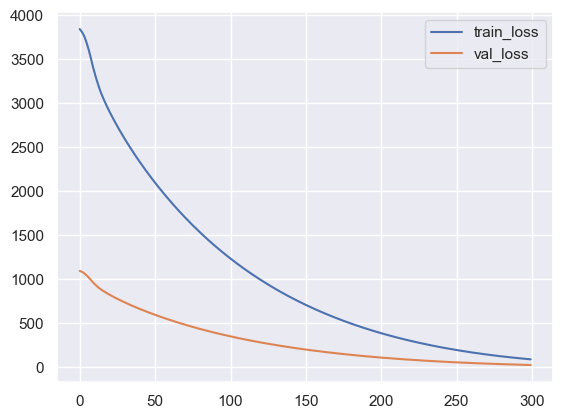

Finished Training
Epoch 1/300


100%|██████████| 13/13 [00:00<00:00, 125.80it/s]


Train Loss: 7069.4241943359375


100%|██████████| 4/4 [00:00<00:00, 535.04it/s]


Epoch 2/300


100%|██████████| 13/13 [00:00<00:00, 140.20it/s]


Train Loss: 6944.226013183594


100%|██████████| 4/4 [00:00<00:00, 585.90it/s]


Epoch 3/300


100%|██████████| 13/13 [00:00<00:00, 133.10it/s]


Train Loss: 6759.033203125


100%|██████████| 4/4 [00:00<00:00, 373.48it/s]


Epoch 4/300


100%|██████████| 13/13 [00:00<00:00, 142.24it/s]


Train Loss: 6558.315582275391


100%|██████████| 4/4 [00:00<00:00, 490.43it/s]


Epoch 5/300


100%|██████████| 13/13 [00:00<00:00, 119.76it/s]


Train Loss: 6361.585723876953


100%|██████████| 4/4 [00:00<00:00, 589.27it/s]


Epoch 6/300


100%|██████████| 13/13 [00:00<00:00, 144.47it/s]


Train Loss: 6188.319671630859


100%|██████████| 4/4 [00:00<00:00, 596.40it/s]


Epoch 7/300


100%|██████████| 13/13 [00:00<00:00, 149.71it/s]


Train Loss: 6039.3590087890625


100%|██████████| 4/4 [00:00<00:00, 354.48it/s]


Epoch 8/300


100%|██████████| 13/13 [00:00<00:00, 63.42it/s]


Train Loss: 5902.7100830078125


100%|██████████| 4/4 [00:00<00:00, 529.38it/s]


Epoch 9/300


100%|██████████| 13/13 [00:00<00:00, 132.32it/s]


Train Loss: 5769.889312744141


100%|██████████| 4/4 [00:00<00:00, 536.54it/s]


Epoch 10/300


100%|██████████| 13/13 [00:00<00:00, 54.84it/s]


Train Loss: 5645.050598144531


100%|██████████| 4/4 [00:00<00:00, 629.52it/s]


Epoch 11/300


100%|██████████| 13/13 [00:00<00:00, 151.26it/s]


Train Loss: 5527.354919433594


100%|██████████| 4/4 [00:00<00:00, 654.85it/s]


Epoch 12/300


100%|██████████| 13/13 [00:00<00:00, 53.61it/s]


Train Loss: 5414.938995361328


100%|██████████| 4/4 [00:00<00:00, 302.58it/s]


Epoch 13/300


100%|██████████| 13/13 [00:00<00:00, 86.06it/s]


Train Loss: 5306.818206787109


100%|██████████| 4/4 [00:00<00:00, 667.40it/s]


Epoch 14/300


100%|██████████| 13/13 [00:00<00:00, 72.84it/s]


Train Loss: 5202.2720947265625


100%|██████████| 4/4 [00:00<00:00, 88.37it/s]


Epoch 15/300


100%|██████████| 13/13 [00:00<00:00, 63.90it/s]


Train Loss: 5100.844329833984


100%|██████████| 4/4 [00:00<00:00, 279.96it/s]


Epoch 16/300


100%|██████████| 13/13 [00:00<00:00, 139.06it/s]


Train Loss: 5002.239837646484


100%|██████████| 4/4 [00:00<00:00, 79.42it/s]


Epoch 17/300


100%|██████████| 13/13 [00:00<00:00, 82.38it/s]


Train Loss: 4906.171417236328


100%|██████████| 4/4 [00:00<00:00, 67.68it/s]


Epoch 18/300


100%|██████████| 13/13 [00:00<00:00, 54.84it/s]


Train Loss: 4812.4501953125


100%|██████████| 4/4 [00:00<00:00, 39.13it/s]


Epoch 19/300


100%|██████████| 13/13 [00:00<00:00, 56.19it/s]


Train Loss: 4720.8214111328125


100%|██████████| 4/4 [00:00<00:00, 122.64it/s]


Epoch 20/300


100%|██████████| 13/13 [00:00<00:00, 58.66it/s]


Train Loss: 4631.270111083984


100%|██████████| 4/4 [00:00<00:00, 261.42it/s]


Epoch 21/300


100%|██████████| 13/13 [00:00<00:00, 134.23it/s]


Train Loss: 4543.6494140625


100%|██████████| 4/4 [00:00<00:00, 504.59it/s]


Epoch 22/300


100%|██████████| 13/13 [00:00<00:00, 123.27it/s]


Train Loss: 4457.8812255859375


100%|██████████| 4/4 [00:00<00:00, 315.85it/s]


Epoch 23/300


100%|██████████| 13/13 [00:00<00:00, 97.04it/s]


Train Loss: 4373.795379638672


100%|██████████| 4/4 [00:00<00:00, 399.16it/s]


Epoch 24/300


100%|██████████| 13/13 [00:00<00:00, 116.03it/s]


Train Loss: 4291.439056396484


100%|██████████| 4/4 [00:00<00:00, 447.37it/s]


Epoch 25/300


100%|██████████| 13/13 [00:00<00:00, 115.31it/s]


Train Loss: 4210.686676025391


100%|██████████| 4/4 [00:00<00:00, 443.62it/s]


Epoch 26/300


100%|██████████| 13/13 [00:00<00:00, 41.18it/s]


Train Loss: 4131.463409423828


100%|██████████| 4/4 [00:00<00:00, 479.55it/s]


Epoch 27/300


100%|██████████| 13/13 [00:00<00:00, 72.10it/s]


Train Loss: 4053.796875


100%|██████████| 4/4 [00:00<00:00, 180.15it/s]


Epoch 28/300


100%|██████████| 13/13 [00:00<00:00, 69.83it/s]


Train Loss: 3977.5763549804688


100%|██████████| 4/4 [00:00<00:00, 675.90it/s]


Epoch 29/300


100%|██████████| 13/13 [00:00<00:00, 77.66it/s]


Train Loss: 3902.7786254882812


100%|██████████| 4/4 [00:00<00:00, 22.36it/s]


Epoch 30/300


100%|██████████| 13/13 [00:00<00:00, 114.53it/s]


Train Loss: 3829.3534240722656


100%|██████████| 4/4 [00:00<00:00, 283.18it/s]


Epoch 31/300


100%|██████████| 13/13 [00:00<00:00, 172.36it/s]


Train Loss: 3757.25537109375


100%|██████████| 4/4 [00:00<00:00, 643.20it/s]


Epoch 32/300


100%|██████████| 13/13 [00:00<00:00, 161.58it/s]


Train Loss: 3686.495086669922


100%|██████████| 4/4 [00:00<00:00, 678.44it/s]


Epoch 33/300


100%|██████████| 13/13 [00:00<00:00, 163.31it/s]


Train Loss: 3616.991729736328


100%|██████████| 4/4 [00:00<00:00, 676.69it/s]


Epoch 34/300


100%|██████████| 13/13 [00:00<00:00, 127.46it/s]


Train Loss: 3548.752685546875


100%|██████████| 4/4 [00:00<00:00, 516.99it/s]


Epoch 35/300


100%|██████████| 13/13 [00:00<00:00, 64.46it/s]


Train Loss: 3481.721893310547


100%|██████████| 4/4 [00:00<00:00, 553.19it/s]


Epoch 36/300


100%|██████████| 13/13 [00:00<00:00, 78.65it/s]


Train Loss: 3415.8771057128906


100%|██████████| 4/4 [00:00<00:00, 385.84it/s]


Epoch 37/300


100%|██████████| 13/13 [00:00<00:00, 119.52it/s]


Train Loss: 3351.244110107422


100%|██████████| 4/4 [00:00<00:00, 586.00it/s]


Epoch 38/300


100%|██████████| 13/13 [00:00<00:00, 147.27it/s]


Train Loss: 3287.720458984375


100%|██████████| 4/4 [00:00<00:00, 651.90it/s]


Epoch 39/300


100%|██████████| 13/13 [00:00<00:00, 113.87it/s]


Train Loss: 3225.3475341796875


100%|██████████| 4/4 [00:00<00:00, 614.33it/s]


Epoch 40/300


100%|██████████| 13/13 [00:00<00:00, 99.32it/s]


Train Loss: 3164.095962524414


100%|██████████| 4/4 [00:00<00:00, 556.20it/s]


Epoch 41/300


100%|██████████| 13/13 [00:00<00:00, 167.50it/s]


Train Loss: 3103.8592376708984


100%|██████████| 4/4 [00:00<00:00, 526.67it/s]


Epoch 42/300


100%|██████████| 13/13 [00:00<00:00, 152.64it/s]


Train Loss: 3044.7079162597656


100%|██████████| 4/4 [00:00<00:00, 604.95it/s]


Epoch 43/300


100%|██████████| 13/13 [00:00<00:00, 130.62it/s]


Train Loss: 2986.6134185791016


100%|██████████| 4/4 [00:00<00:00, 416.22it/s]


Epoch 44/300


100%|██████████| 13/13 [00:00<00:00, 137.86it/s]


Train Loss: 2929.553176879883


100%|██████████| 4/4 [00:00<00:00, 584.02it/s]


Epoch 45/300


100%|██████████| 13/13 [00:00<00:00, 152.78it/s]


Train Loss: 2873.4640350341797


100%|██████████| 4/4 [00:00<00:00, 596.12it/s]


Epoch 46/300


100%|██████████| 13/13 [00:00<00:00, 159.41it/s]


Train Loss: 2818.387741088867


100%|██████████| 4/4 [00:00<00:00, 541.06it/s]


Epoch 47/300


100%|██████████| 13/13 [00:00<00:00, 109.97it/s]


Train Loss: 2764.2451171875


100%|██████████| 4/4 [00:00<00:00, 389.44it/s]


Epoch 48/300


100%|██████████| 13/13 [00:00<00:00, 157.04it/s]


Train Loss: 2711.0465545654297


100%|██████████| 4/4 [00:00<00:00, 547.79it/s]


Epoch 49/300


100%|██████████| 13/13 [00:00<00:00, 157.98it/s]


Train Loss: 2658.797653198242


100%|██████████| 4/4 [00:00<00:00, 520.14it/s]


Epoch 50/300


100%|██████████| 13/13 [00:00<00:00, 152.91it/s]


Train Loss: 2607.448684692383


100%|██████████| 4/4 [00:00<00:00, 523.23it/s]


Epoch 51/300


100%|██████████| 13/13 [00:00<00:00, 158.61it/s]


Train Loss: 2557.0142974853516


100%|██████████| 4/4 [00:00<00:00, 490.09it/s]


Epoch 52/300


100%|██████████| 13/13 [00:00<00:00, 132.02it/s]


Train Loss: 2507.467300415039


100%|██████████| 4/4 [00:00<00:00, 615.75it/s]


Epoch 53/300


100%|██████████| 13/13 [00:00<00:00, 169.43it/s]


Train Loss: 2458.765335083008


100%|██████████| 4/4 [00:00<00:00, 586.68it/s]


Epoch 54/300


100%|██████████| 13/13 [00:00<00:00, 167.78it/s]


Train Loss: 2410.957794189453


100%|██████████| 4/4 [00:00<00:00, 623.02it/s]


Epoch 55/300


100%|██████████| 13/13 [00:00<00:00, 157.90it/s]


Train Loss: 2363.936538696289


100%|██████████| 4/4 [00:00<00:00, 584.82it/s]


Epoch 56/300


100%|██████████| 13/13 [00:00<00:00, 173.80it/s]


Train Loss: 2317.795166015625


100%|██████████| 4/4 [00:00<00:00, 575.96it/s]


Epoch 57/300


100%|██████████| 13/13 [00:00<00:00, 149.05it/s]


Train Loss: 2272.3890533447266


100%|██████████| 4/4 [00:00<00:00, 632.60it/s]


Epoch 58/300


100%|██████████| 13/13 [00:00<00:00, 159.93it/s]


Train Loss: 2227.862991333008


100%|██████████| 4/4 [00:00<00:00, 440.53it/s]


Epoch 59/300


100%|██████████| 13/13 [00:00<00:00, 162.28it/s]


Train Loss: 2184.0704040527344


100%|██████████| 4/4 [00:00<00:00, 629.70it/s]


Epoch 60/300


100%|██████████| 13/13 [00:00<00:00, 159.86it/s]


Train Loss: 2141.065704345703


100%|██████████| 4/4 [00:00<00:00, 539.32it/s]


Epoch 61/300


100%|██████████| 13/13 [00:00<00:00, 165.79it/s]


Train Loss: 2098.7862701416016


100%|██████████| 4/4 [00:00<00:00, 604.87it/s]


Epoch 62/300


100%|██████████| 13/13 [00:00<00:00, 167.89it/s]


Train Loss: 2057.3023834228516


100%|██████████| 4/4 [00:00<00:00, 660.60it/s]


Epoch 63/300


100%|██████████| 13/13 [00:00<00:00, 146.86it/s]


Train Loss: 2016.5082550048828


100%|██████████| 4/4 [00:00<00:00, 654.98it/s]


Epoch 64/300


100%|██████████| 13/13 [00:00<00:00, 143.18it/s]


Train Loss: 1976.4638671875


100%|██████████| 4/4 [00:00<00:00, 471.59it/s]


Epoch 65/300


100%|██████████| 13/13 [00:00<00:00, 159.41it/s]


Train Loss: 1937.080825805664


100%|██████████| 4/4 [00:00<00:00, 643.52it/s]


Epoch 66/300


100%|██████████| 13/13 [00:00<00:00, 156.16it/s]


Train Loss: 1898.4577178955078


100%|██████████| 4/4 [00:00<00:00, 545.72it/s]


Epoch 67/300


100%|██████████| 13/13 [00:00<00:00, 171.23it/s]


Train Loss: 1860.449447631836


100%|██████████| 4/4 [00:00<00:00, 689.54it/s]


Epoch 68/300


100%|██████████| 13/13 [00:00<00:00, 159.60it/s]


Train Loss: 1823.1434020996094


100%|██████████| 4/4 [00:00<00:00, 637.34it/s]


Epoch 69/300


100%|██████████| 13/13 [00:00<00:00, 172.26it/s]


Train Loss: 1786.4978637695312


100%|██████████| 4/4 [00:00<00:00, 105.89it/s]


Epoch 70/300


100%|██████████| 13/13 [00:00<00:00, 169.78it/s]


Train Loss: 1750.4782409667969


100%|██████████| 4/4 [00:00<00:00, 632.10it/s]


Epoch 71/300


100%|██████████| 13/13 [00:00<00:00, 162.06it/s]


Train Loss: 1715.130844116211


100%|██████████| 4/4 [00:00<00:00, 481.16it/s]


Epoch 72/300


100%|██████████| 13/13 [00:00<00:00, 94.33it/s]


Train Loss: 1680.3844146728516


100%|██████████| 4/4 [00:00<00:00, 552.39it/s]


Epoch 73/300


100%|██████████| 13/13 [00:00<00:00, 111.17it/s]


Train Loss: 1646.2707290649414


100%|██████████| 4/4 [00:00<00:00, 602.24it/s]


Epoch 74/300


100%|██████████| 13/13 [00:00<00:00, 131.49it/s]


Train Loss: 1612.7460403442383


100%|██████████| 4/4 [00:00<00:00, 442.18it/s]


Epoch 75/300


100%|██████████| 13/13 [00:00<00:00, 121.72it/s]


Train Loss: 1579.8178482055664


100%|██████████| 4/4 [00:00<00:00, 563.85it/s]


Epoch 76/300


100%|██████████| 13/13 [00:00<00:00, 152.62it/s]


Train Loss: 1547.4881057739258


100%|██████████| 4/4 [00:00<00:00, 499.74it/s]


Epoch 77/300


100%|██████████| 13/13 [00:00<00:00, 144.68it/s]


Train Loss: 1515.7164916992188


100%|██████████| 4/4 [00:00<00:00, 620.94it/s]


Epoch 78/300


100%|██████████| 13/13 [00:00<00:00, 134.17it/s]


Train Loss: 1484.5038375854492


100%|██████████| 4/4 [00:00<00:00, 445.73it/s]


Epoch 79/300


100%|██████████| 13/13 [00:00<00:00, 154.79it/s]


Train Loss: 1453.8480529785156


100%|██████████| 4/4 [00:00<00:00, 648.29it/s]


Epoch 80/300


100%|██████████| 13/13 [00:00<00:00, 134.40it/s]


Train Loss: 1423.7635192871094


100%|██████████| 4/4 [00:00<00:00, 486.03it/s]


Epoch 81/300


100%|██████████| 13/13 [00:00<00:00, 148.68it/s]


Train Loss: 1394.2178802490234


100%|██████████| 4/4 [00:00<00:00, 622.00it/s]


Epoch 82/300


100%|██████████| 13/13 [00:00<00:00, 153.81it/s]


Train Loss: 1365.173728942871


100%|██████████| 4/4 [00:00<00:00, 372.51it/s]


Epoch 83/300


100%|██████████| 13/13 [00:00<00:00, 144.76it/s]


Train Loss: 1336.660270690918


100%|██████████| 4/4 [00:00<00:00, 310.45it/s]


Epoch 84/300


100%|██████████| 13/13 [00:00<00:00, 142.25it/s]


Train Loss: 1308.6433334350586


100%|██████████| 4/4 [00:00<00:00, 435.17it/s]


Epoch 85/300


100%|██████████| 13/13 [00:00<00:00, 133.80it/s]


Train Loss: 1281.1212692260742


100%|██████████| 4/4 [00:00<00:00, 598.69it/s]


Epoch 86/300


100%|██████████| 13/13 [00:00<00:00, 144.05it/s]


Train Loss: 1254.1461944580078


100%|██████████| 4/4 [00:00<00:00, 516.40it/s]


Epoch 87/300


100%|██████████| 13/13 [00:00<00:00, 140.52it/s]


Train Loss: 1227.5975952148438


100%|██████████| 4/4 [00:00<00:00, 589.03it/s]


Epoch 88/300


100%|██████████| 13/13 [00:00<00:00, 136.68it/s]


Train Loss: 1201.5400924682617


100%|██████████| 4/4 [00:00<00:00, 544.52it/s]


Epoch 89/300


100%|██████████| 13/13 [00:00<00:00, 109.55it/s]


Train Loss: 1175.974624633789


100%|██████████| 4/4 [00:00<00:00, 538.37it/s]


Epoch 90/300


100%|██████████| 13/13 [00:00<00:00, 129.15it/s]


Train Loss: 1150.842140197754


100%|██████████| 4/4 [00:00<00:00, 503.96it/s]


Epoch 91/300


100%|██████████| 13/13 [00:00<00:00, 144.95it/s]


Train Loss: 1126.1756210327148


100%|██████████| 4/4 [00:00<00:00, 541.06it/s]


Epoch 92/300


100%|██████████| 13/13 [00:00<00:00, 130.71it/s]


Train Loss: 1101.9465255737305


100%|██████████| 4/4 [00:00<00:00, 633.82it/s]


Epoch 93/300


100%|██████████| 13/13 [00:00<00:00, 122.32it/s]


Train Loss: 1078.1632919311523


100%|██████████| 4/4 [00:00<00:00, 613.52it/s]


Epoch 94/300


100%|██████████| 13/13 [00:00<00:00, 90.20it/s]


Train Loss: 1054.8086242675781


100%|██████████| 4/4 [00:00<00:00, 603.78it/s]


Epoch 95/300


100%|██████████| 13/13 [00:00<00:00, 145.79it/s]


Train Loss: 1031.8660202026367


100%|██████████| 4/4 [00:00<00:00, 558.89it/s]


Epoch 96/300


100%|██████████| 13/13 [00:00<00:00, 97.77it/s] 


Train Loss: 1009.35595703125


100%|██████████| 4/4 [00:00<00:00, 239.08it/s]


Epoch 97/300


100%|██████████| 13/13 [00:00<00:00, 68.61it/s]


Train Loss: 987.2595291137695


100%|██████████| 4/4 [00:00<00:00, 320.51it/s]


Epoch 98/300


100%|██████████| 13/13 [00:00<00:00, 50.54it/s]


Train Loss: 965.5318069458008


100%|██████████| 4/4 [00:00<00:00, 494.79it/s]


Epoch 99/300


100%|██████████| 13/13 [00:00<00:00, 45.41it/s]


Train Loss: 944.2445907592773


100%|██████████| 4/4 [00:00<00:00, 537.99it/s]


Epoch 100/300


100%|██████████| 13/13 [00:00<00:00, 76.60it/s]


Train Loss: 923.3083648681641


100%|██████████| 4/4 [00:00<00:00, 65.89it/s]


Epoch 101/300


100%|██████████| 13/13 [00:00<00:00, 41.96it/s]


Train Loss: 902.7752304077148


100%|██████████| 4/4 [00:00<00:00, 617.65it/s]


Epoch 102/300


100%|██████████| 13/13 [00:00<00:00, 131.65it/s]


Train Loss: 882.6100692749023


100%|██████████| 4/4 [00:00<00:00, 394.28it/s]


Epoch 103/300


100%|██████████| 13/13 [00:00<00:00, 65.05it/s]


Train Loss: 862.8241729736328


100%|██████████| 4/4 [00:00<00:00, 392.97it/s]


Epoch 104/300


100%|██████████| 13/13 [00:00<00:00, 110.88it/s]


Train Loss: 843.4047622680664


100%|██████████| 4/4 [00:00<00:00, 422.89it/s]


Epoch 105/300


100%|██████████| 13/13 [00:00<00:00, 55.86it/s]


Train Loss: 824.302864074707


100%|██████████| 4/4 [00:00<00:00, 107.60it/s]


Epoch 106/300


100%|██████████| 13/13 [00:00<00:00, 62.04it/s]


Train Loss: 805.6160125732422


100%|██████████| 4/4 [00:00<00:00, 184.38it/s]


Epoch 107/300


100%|██████████| 13/13 [00:00<00:00, 55.27it/s]


Train Loss: 787.2439575195312


100%|██████████| 4/4 [00:00<00:00, 487.67it/s]


Epoch 108/300


100%|██████████| 13/13 [00:00<00:00, 58.04it/s]


Train Loss: 769.2307090759277


100%|██████████| 4/4 [00:00<00:00, 707.57it/s]


Epoch 109/300


100%|██████████| 13/13 [00:00<00:00, 168.00it/s]


Train Loss: 751.5419502258301


100%|██████████| 4/4 [00:00<00:00, 539.32it/s]


Epoch 110/300


100%|██████████| 13/13 [00:00<00:00, 173.89it/s]


Train Loss: 734.1919441223145


100%|██████████| 4/4 [00:00<00:00, 682.72it/s]


Epoch 111/300


100%|██████████| 13/13 [00:00<00:00, 164.24it/s]


Train Loss: 717.1456031799316


100%|██████████| 4/4 [00:00<00:00, 509.50it/s]


Epoch 112/300


100%|██████████| 13/13 [00:00<00:00, 156.62it/s]


Train Loss: 700.4429740905762


100%|██████████| 4/4 [00:00<00:00, 564.19it/s]


Epoch 113/300


100%|██████████| 13/13 [00:00<00:00, 142.90it/s]


Train Loss: 684.0607986450195


100%|██████████| 4/4 [00:00<00:00, 507.23it/s]


Epoch 114/300


100%|██████████| 13/13 [00:00<00:00, 102.31it/s]


Train Loss: 667.9652328491211


100%|██████████| 4/4 [00:00<00:00, 227.17it/s]


Epoch 115/300


100%|██████████| 13/13 [00:00<00:00, 38.37it/s]


Train Loss: 652.1980056762695


100%|██████████| 4/4 [00:00<00:00, 531.61it/s]


Epoch 116/300


100%|██████████| 13/13 [00:00<00:00, 116.88it/s]


Train Loss: 636.7027359008789


100%|██████████| 4/4 [00:00<00:00, 598.89it/s]


Epoch 117/300


100%|██████████| 13/13 [00:00<00:00, 109.50it/s]


Train Loss: 621.5257110595703


100%|██████████| 4/4 [00:00<00:00, 542.51it/s]


Epoch 118/300


100%|██████████| 13/13 [00:00<00:00, 58.37it/s]


Train Loss: 606.644847869873


100%|██████████| 4/4 [00:00<00:00, 135.14it/s]


Epoch 119/300


100%|██████████| 13/13 [00:00<00:00, 51.60it/s]


Train Loss: 592.0402297973633


100%|██████████| 4/4 [00:00<00:00, 375.98it/s]


Epoch 120/300


100%|██████████| 13/13 [00:00<00:00, 132.39it/s]


Train Loss: 577.7195854187012


100%|██████████| 4/4 [00:00<00:00, 383.88it/s]


Epoch 121/300


100%|██████████| 13/13 [00:00<00:00, 147.69it/s]


Train Loss: 563.6863708496094


100%|██████████| 4/4 [00:00<00:00, 421.73it/s]


Epoch 122/300


100%|██████████| 13/13 [00:00<00:00, 150.12it/s]


Train Loss: 549.9093971252441


100%|██████████| 4/4 [00:00<00:00, 593.38it/s]


Epoch 123/300


100%|██████████| 13/13 [00:00<00:00, 145.26it/s]


Train Loss: 536.4003028869629


100%|██████████| 4/4 [00:00<00:00, 529.52it/s]


Epoch 124/300


100%|██████████| 13/13 [00:00<00:00, 114.94it/s]


Train Loss: 523.1737022399902


100%|██████████| 4/4 [00:00<00:00, 595.51it/s]


Epoch 125/300


100%|██████████| 13/13 [00:00<00:00, 147.65it/s]


Train Loss: 510.21585845947266


100%|██████████| 4/4 [00:00<00:00, 531.29it/s]


Epoch 126/300


100%|██████████| 13/13 [00:00<00:00, 126.15it/s]


Train Loss: 497.4868965148926


100%|██████████| 4/4 [00:00<00:00, 584.96it/s]


Epoch 127/300


100%|██████████| 13/13 [00:00<00:00, 145.31it/s]


Train Loss: 485.029727935791


100%|██████████| 4/4 [00:00<00:00, 95.93it/s]


Epoch 128/300


100%|██████████| 13/13 [00:00<00:00, 123.02it/s]


Train Loss: 472.8149185180664


100%|██████████| 4/4 [00:00<00:00, 578.62it/s]


Epoch 129/300


100%|██████████| 13/13 [00:00<00:00, 139.17it/s]


Train Loss: 460.8468437194824


100%|██████████| 4/4 [00:00<00:00, 565.94it/s]


Epoch 130/300


100%|██████████| 13/13 [00:00<00:00, 130.45it/s]


Train Loss: 449.1290588378906


100%|██████████| 4/4 [00:00<00:00, 550.27it/s]


Epoch 131/300


100%|██████████| 13/13 [00:00<00:00, 173.76it/s]


Train Loss: 437.6389465332031


100%|██████████| 4/4 [00:00<00:00, 630.91it/s]


Epoch 132/300


100%|██████████| 13/13 [00:00<00:00, 157.83it/s]


Train Loss: 426.3816604614258


100%|██████████| 4/4 [00:00<00:00, 663.13it/s]


Epoch 133/300


100%|██████████| 13/13 [00:00<00:00, 173.59it/s]


Train Loss: 415.3675136566162


100%|██████████| 4/4 [00:00<00:00, 632.41it/s]


Epoch 134/300


100%|██████████| 13/13 [00:00<00:00, 155.09it/s]


Train Loss: 404.5819454193115


100%|██████████| 4/4 [00:00<00:00, 559.52it/s]


Epoch 135/300


100%|██████████| 13/13 [00:00<00:00, 163.81it/s]


Train Loss: 394.0040645599365


100%|██████████| 4/4 [00:00<00:00, 630.70it/s]


Epoch 136/300


100%|██████████| 13/13 [00:00<00:00, 169.89it/s]


Train Loss: 383.6609687805176


100%|██████████| 4/4 [00:00<00:00, 648.09it/s]


Epoch 137/300


100%|██████████| 13/13 [00:00<00:00, 174.22it/s]


Train Loss: 373.5241279602051


100%|██████████| 4/4 [00:00<00:00, 593.74it/s]


Epoch 138/300


100%|██████████| 13/13 [00:00<00:00, 163.93it/s]


Train Loss: 363.6081142425537


100%|██████████| 4/4 [00:00<00:00, 620.53it/s]


Epoch 139/300


100%|██████████| 13/13 [00:00<00:00, 156.03it/s]


Train Loss: 353.8955268859863


100%|██████████| 4/4 [00:00<00:00, 633.22it/s]


Epoch 140/300


100%|██████████| 13/13 [00:00<00:00, 164.19it/s]


Train Loss: 344.39985275268555


100%|██████████| 4/4 [00:00<00:00, 648.07it/s]


Epoch 141/300


100%|██████████| 13/13 [00:00<00:00, 174.02it/s]


Train Loss: 335.09456062316895


100%|██████████| 4/4 [00:00<00:00, 286.84it/s]


Epoch 142/300


100%|██████████| 13/13 [00:00<00:00, 167.40it/s]


Train Loss: 325.9910202026367


100%|██████████| 4/4 [00:00<00:00, 654.54it/s]


Epoch 143/300


100%|██████████| 13/13 [00:00<00:00, 170.35it/s]


Train Loss: 317.1039237976074


100%|██████████| 4/4 [00:00<00:00, 495.12it/s]


Epoch 144/300


100%|██████████| 13/13 [00:00<00:00, 153.00it/s]


Train Loss: 308.3879165649414


100%|██████████| 4/4 [00:00<00:00, 665.02it/s]


Epoch 145/300


100%|██████████| 13/13 [00:00<00:00, 168.70it/s]


Train Loss: 299.8617477416992


100%|██████████| 4/4 [00:00<00:00, 657.16it/s]


Epoch 146/300


100%|██████████| 13/13 [00:00<00:00, 172.76it/s]


Train Loss: 291.5280513763428


100%|██████████| 4/4 [00:00<00:00, 524.93it/s]


Epoch 147/300


100%|██████████| 13/13 [00:00<00:00, 158.44it/s]


Train Loss: 283.40355491638184


100%|██████████| 4/4 [00:00<00:00, 679.60it/s]


Epoch 148/300


100%|██████████| 13/13 [00:00<00:00, 157.76it/s]


Train Loss: 275.43203353881836


100%|██████████| 4/4 [00:00<00:00, 682.72it/s]


Epoch 149/300


100%|██████████| 13/13 [00:00<00:00, 160.76it/s]


Train Loss: 267.65221786499023


100%|██████████| 4/4 [00:00<00:00, 657.88it/s]


Epoch 150/300


100%|██████████| 13/13 [00:00<00:00, 95.95it/s]


Train Loss: 260.0348300933838


100%|██████████| 4/4 [00:00<00:00, 537.85it/s]


Epoch 151/300


100%|██████████| 13/13 [00:00<00:00, 143.09it/s]


Train Loss: 252.61073875427246


100%|██████████| 4/4 [00:00<00:00, 551.88it/s]


Epoch 152/300


100%|██████████| 13/13 [00:00<00:00, 143.66it/s]


Train Loss: 245.33642578125


100%|██████████| 4/4 [00:00<00:00, 639.47it/s]


Epoch 153/300


100%|██████████| 13/13 [00:00<00:00, 166.61it/s]


Train Loss: 238.25134658813477


100%|██████████| 4/4 [00:00<00:00, 527.57it/s]


Epoch 154/300


100%|██████████| 13/13 [00:00<00:00, 138.25it/s]


Train Loss: 231.31640243530273


100%|██████████| 4/4 [00:00<00:00, 639.21it/s]


Epoch 155/300


100%|██████████| 13/13 [00:00<00:00, 139.65it/s]


Train Loss: 224.53899002075195


100%|██████████| 4/4 [00:00<00:00, 442.95it/s]


Epoch 156/300


100%|██████████| 13/13 [00:00<00:00, 148.74it/s]


Train Loss: 217.9426670074463


100%|██████████| 4/4 [00:00<00:00, 363.84it/s]


Epoch 157/300


100%|██████████| 13/13 [00:00<00:00, 135.66it/s]


Train Loss: 211.47045421600342


100%|██████████| 4/4 [00:00<00:00, 618.81it/s]


Epoch 158/300


100%|██████████| 13/13 [00:00<00:00, 165.44it/s]


Train Loss: 205.18494129180908


100%|██████████| 4/4 [00:00<00:00, 592.96it/s]


Epoch 159/300


100%|██████████| 13/13 [00:00<00:00, 136.91it/s]


Train Loss: 199.04005336761475


100%|██████████| 4/4 [00:00<00:00, 626.06it/s]


Epoch 160/300


100%|██████████| 13/13 [00:00<00:00, 130.23it/s]


Train Loss: 193.02659797668457


100%|██████████| 4/4 [00:00<00:00, 578.01it/s]


Epoch 161/300


100%|██████████| 13/13 [00:00<00:00, 159.95it/s]


Train Loss: 187.17591667175293


100%|██████████| 4/4 [00:00<00:00, 548.24it/s]


Epoch 162/300


100%|██████████| 13/13 [00:00<00:00, 138.93it/s]


Train Loss: 181.4579315185547


100%|██████████| 4/4 [00:00<00:00, 337.73it/s]


Epoch 163/300


100%|██████████| 13/13 [00:00<00:00, 150.63it/s]


Train Loss: 175.8889274597168


100%|██████████| 4/4 [00:00<00:00, 482.80it/s]


Epoch 164/300


100%|██████████| 13/13 [00:00<00:00, 144.35it/s]


Train Loss: 170.46180629730225


100%|██████████| 4/4 [00:00<00:00, 549.91it/s]


Epoch 165/300


100%|██████████| 13/13 [00:00<00:00, 128.81it/s]


Train Loss: 165.1713056564331


100%|██████████| 4/4 [00:00<00:00, 602.67it/s]


Epoch 166/300


100%|██████████| 13/13 [00:00<00:00, 149.15it/s]


Train Loss: 159.9945478439331


100%|██████████| 4/4 [00:00<00:00, 508.91it/s]


Epoch 167/300


100%|██████████| 13/13 [00:00<00:00, 114.98it/s]


Train Loss: 154.9646120071411


100%|██████████| 4/4 [00:00<00:00, 615.02it/s]


Epoch 168/300


100%|██████████| 13/13 [00:00<00:00, 146.23it/s]


Train Loss: 150.0641794204712


100%|██████████| 4/4 [00:00<00:00, 585.76it/s]


Epoch 169/300


100%|██████████| 13/13 [00:00<00:00, 149.53it/s]


Train Loss: 145.28368473052979


100%|██████████| 4/4 [00:00<00:00, 413.90it/s]


Epoch 170/300


100%|██████████| 13/13 [00:00<00:00, 98.69it/s]


Train Loss: 140.62888431549072


100%|██████████| 4/4 [00:00<00:00, 587.71it/s]


Epoch 171/300


100%|██████████| 13/13 [00:00<00:00, 148.95it/s]


Train Loss: 136.0979986190796


100%|██████████| 4/4 [00:00<00:00, 249.33it/s]


Epoch 172/300


100%|██████████| 13/13 [00:00<00:00, 143.71it/s]


Train Loss: 131.6846570968628


100%|██████████| 4/4 [00:00<00:00, 559.13it/s]


Epoch 173/300


100%|██████████| 13/13 [00:00<00:00, 134.37it/s]


Train Loss: 127.38539123535156


100%|██████████| 4/4 [00:00<00:00, 448.37it/s]


Epoch 174/300


100%|██████████| 13/13 [00:00<00:00, 129.94it/s]


Train Loss: 123.20083045959473


100%|██████████| 4/4 [00:00<00:00, 609.95it/s]


Epoch 175/300


100%|██████████| 13/13 [00:00<00:00, 135.79it/s]


Train Loss: 119.12504577636719


100%|██████████| 4/4 [00:00<00:00, 624.90it/s]


Epoch 176/300


100%|██████████| 13/13 [00:00<00:00, 130.01it/s]


Train Loss: 115.16031646728516


100%|██████████| 4/4 [00:00<00:00, 642.78it/s]


Epoch 177/300


100%|██████████| 13/13 [00:00<00:00, 99.50it/s]


Train Loss: 111.3103437423706


100%|██████████| 4/4 [00:00<00:00, 581.98it/s]


Epoch 178/300


100%|██████████| 13/13 [00:00<00:00, 123.16it/s]


Train Loss: 107.56536102294922


100%|██████████| 4/4 [00:00<00:00, 640.50it/s]


Epoch 179/300


100%|██████████| 13/13 [00:00<00:00, 128.37it/s]


Train Loss: 103.91446113586426


100%|██████████| 4/4 [00:00<00:00, 597.48it/s]


Epoch 180/300


100%|██████████| 13/13 [00:00<00:00, 131.95it/s]


Train Loss: 100.37573766708374


100%|██████████| 4/4 [00:00<00:00, 514.09it/s]


Epoch 181/300


100%|██████████| 13/13 [00:00<00:00, 132.84it/s]


Train Loss: 96.92996311187744


100%|██████████| 4/4 [00:00<00:00, 446.29it/s]


Epoch 182/300


100%|██████████| 13/13 [00:00<00:00, 141.27it/s]


Train Loss: 93.5813660621643


100%|██████████| 4/4 [00:00<00:00, 538.73it/s]


Epoch 183/300


100%|██████████| 13/13 [00:00<00:00, 96.84it/s]


Train Loss: 90.329421043396


100%|██████████| 4/4 [00:00<00:00, 192.29it/s]


Epoch 184/300


100%|██████████| 13/13 [00:00<00:00, 125.94it/s]


Train Loss: 87.16985940933228


100%|██████████| 4/4 [00:00<00:00, 270.56it/s]


Epoch 185/300


100%|██████████| 13/13 [00:00<00:00, 155.44it/s]


Train Loss: 84.10442066192627


100%|██████████| 4/4 [00:00<00:00, 565.99it/s]


Epoch 186/300


100%|██████████| 13/13 [00:00<00:00, 61.46it/s]


Train Loss: 81.12576341629028


100%|██████████| 4/4 [00:00<00:00, 524.39it/s]


Epoch 187/300


100%|██████████| 13/13 [00:00<00:00, 60.63it/s]


Train Loss: 78.23299980163574


100%|██████████| 4/4 [00:00<00:00, 606.71it/s]


Epoch 188/300


100%|██████████| 13/13 [00:00<00:00, 65.34it/s]


Train Loss: 75.4271388053894


100%|██████████| 4/4 [00:00<00:00, 580.47it/s]


Epoch 189/300


100%|██████████| 13/13 [00:00<00:00, 57.94it/s]


Train Loss: 72.70680904388428


100%|██████████| 4/4 [00:00<00:00, 71.80it/s]


Epoch 190/300


100%|██████████| 13/13 [00:00<00:00, 111.98it/s]


Train Loss: 70.06503295898438


100%|██████████| 4/4 [00:00<00:00, 313.75it/s]


Epoch 191/300


100%|██████████| 13/13 [00:00<00:00, 72.30it/s]


Train Loss: 67.50723457336426


100%|██████████| 4/4 [00:00<00:00, 50.75it/s]


Epoch 192/300


100%|██████████| 13/13 [00:00<00:00, 67.77it/s]


Train Loss: 65.01694536209106


100%|██████████| 4/4 [00:00<00:00, 136.40it/s]


Epoch 193/300


100%|██████████| 13/13 [00:00<00:00, 124.14it/s]


Train Loss: 62.6128249168396


100%|██████████| 4/4 [00:00<00:00, 517.80it/s]


Epoch 194/300


100%|██████████| 13/13 [00:00<00:00, 148.74it/s]


Train Loss: 60.28066444396973


100%|██████████| 4/4 [00:00<00:00, 527.35it/s]


Epoch 195/300


100%|██████████| 13/13 [00:00<00:00, 171.08it/s]


Train Loss: 58.0133900642395


100%|██████████| 4/4 [00:00<00:00, 508.71it/s]


Epoch 196/300


100%|██████████| 13/13 [00:00<00:00, 136.68it/s]


Train Loss: 55.82422351837158


100%|██████████| 4/4 [00:00<00:00, 654.01it/s]


Epoch 197/300


100%|██████████| 13/13 [00:00<00:00, 90.20it/s]


Train Loss: 53.707568645477295


100%|██████████| 4/4 [00:00<00:00, 228.16it/s]


Epoch 198/300


100%|██████████| 13/13 [00:00<00:00, 134.22it/s]


Train Loss: 51.654829263687134


100%|██████████| 4/4 [00:00<00:00, 409.25it/s]


Epoch 199/300


100%|██████████| 13/13 [00:00<00:00, 39.79it/s]


Train Loss: 49.66754221916199


100%|██████████| 4/4 [00:00<00:00, 166.44it/s]


Epoch 200/300


100%|██████████| 13/13 [00:00<00:00, 49.04it/s]


Train Loss: 47.74125647544861


100%|██████████| 4/4 [00:00<00:00, 194.72it/s]


Epoch 201/300


100%|██████████| 13/13 [00:00<00:00, 84.01it/s]


Train Loss: 45.880781412124634


100%|██████████| 4/4 [00:00<00:00, 710.45it/s]


Epoch 202/300


100%|██████████| 13/13 [00:00<00:00, 142.79it/s]


Train Loss: 44.079941272735596


100%|██████████| 4/4 [00:00<00:00, 686.02it/s]


Epoch 203/300


100%|██████████| 13/13 [00:00<00:00, 137.62it/s]


Train Loss: 42.33783149719238


100%|██████████| 4/4 [00:00<00:00, 563.35it/s]


Epoch 204/300


100%|██████████| 13/13 [00:00<00:00, 153.89it/s]


Train Loss: 40.653671979904175


100%|██████████| 4/4 [00:00<00:00, 667.11it/s]


Epoch 205/300


100%|██████████| 13/13 [00:00<00:00, 133.85it/s]


Train Loss: 39.029120683670044


100%|██████████| 4/4 [00:00<00:00, 571.02it/s]


Epoch 206/300


100%|██████████| 13/13 [00:00<00:00, 144.76it/s]


Train Loss: 37.46000051498413


100%|██████████| 4/4 [00:00<00:00, 575.13it/s]


Epoch 207/300


100%|██████████| 13/13 [00:00<00:00, 65.33it/s]


Train Loss: 35.94071674346924


100%|██████████| 4/4 [00:00<00:00, 674.90it/s]


Epoch 208/300


100%|██████████| 13/13 [00:00<00:00, 139.71it/s]


Train Loss: 34.47158598899841


100%|██████████| 4/4 [00:00<00:00, 531.43it/s]


Epoch 209/300


100%|██████████| 13/13 [00:00<00:00, 127.72it/s]


Train Loss: 33.059892416000366


100%|██████████| 4/4 [00:00<00:00, 568.20it/s]


Epoch 210/300


100%|██████████| 13/13 [00:00<00:00, 112.97it/s]


Train Loss: 31.69417142868042


100%|██████████| 4/4 [00:00<00:00, 467.55it/s]


Epoch 211/300


100%|██████████| 13/13 [00:00<00:00, 142.45it/s]


Train Loss: 30.375603914260864


100%|██████████| 4/4 [00:00<00:00, 511.36it/s]


Epoch 212/300


100%|██████████| 13/13 [00:00<00:00, 155.43it/s]


Train Loss: 29.104028701782227


100%|██████████| 4/4 [00:00<00:00, 561.71it/s]


Epoch 213/300


100%|██████████| 13/13 [00:00<00:00, 138.93it/s]


Train Loss: 27.879921913146973


100%|██████████| 4/4 [00:00<00:00, 546.17it/s]


Epoch 214/300


100%|██████████| 13/13 [00:00<00:00, 91.03it/s]


Train Loss: 26.700612545013428


100%|██████████| 4/4 [00:00<00:00, 406.88it/s]


Epoch 215/300


100%|██████████| 13/13 [00:00<00:00, 124.06it/s]


Train Loss: 25.5598464012146


100%|██████████| 4/4 [00:00<00:00, 396.27it/s]


Epoch 216/300


100%|██████████| 13/13 [00:00<00:00, 152.67it/s]


Train Loss: 24.459490537643433


100%|██████████| 4/4 [00:00<00:00, 605.06it/s]


Epoch 217/300


100%|██████████| 13/13 [00:00<00:00, 138.24it/s]


Train Loss: 23.40095627307892


100%|██████████| 4/4 [00:00<00:00, 579.98it/s]


Epoch 218/300


100%|██████████| 13/13 [00:00<00:00, 119.91it/s]


Train Loss: 22.38549530506134


100%|██████████| 4/4 [00:00<00:00, 429.82it/s]


Epoch 219/300


100%|██████████| 13/13 [00:00<00:00, 118.01it/s]


Train Loss: 21.399352312088013


100%|██████████| 4/4 [00:00<00:00, 376.71it/s]


Epoch 220/300


100%|██████████| 13/13 [00:00<00:00, 138.03it/s]


Train Loss: 20.460253953933716


100%|██████████| 4/4 [00:00<00:00, 580.89it/s]


Epoch 221/300


100%|██████████| 13/13 [00:00<00:00, 158.55it/s]


Train Loss: 19.55401313304901


100%|██████████| 4/4 [00:00<00:00, 351.43it/s]


Epoch 222/300


100%|██████████| 13/13 [00:00<00:00, 147.55it/s]


Train Loss: 18.67862093448639


100%|██████████| 4/4 [00:00<00:00, 480.82it/s]


Epoch 223/300


100%|██████████| 13/13 [00:00<00:00, 168.58it/s]


Train Loss: 17.8380765914917


100%|██████████| 4/4 [00:00<00:00, 631.91it/s]


Epoch 224/300


100%|██████████| 13/13 [00:00<00:00, 149.43it/s]


Train Loss: 17.03093159198761


100%|██████████| 4/4 [00:00<00:00, 595.34it/s]


Epoch 225/300


100%|██████████| 13/13 [00:00<00:00, 153.92it/s]


Train Loss: 16.256438493728638


100%|██████████| 4/4 [00:00<00:00, 588.32it/s]


Epoch 226/300


100%|██████████| 13/13 [00:00<00:00, 176.85it/s]


Train Loss: 15.509374976158142


100%|██████████| 4/4 [00:00<00:00, 653.93it/s]


Epoch 227/300


100%|██████████| 13/13 [00:00<00:00, 167.67it/s]


Train Loss: 14.792336463928223


100%|██████████| 4/4 [00:00<00:00, 618.63it/s]


Epoch 228/300


100%|██████████| 13/13 [00:00<00:00, 175.16it/s]


Train Loss: 14.108031034469604


100%|██████████| 4/4 [00:00<00:00, 628.93it/s]


Epoch 229/300


100%|██████████| 13/13 [00:00<00:00, 161.97it/s]


Train Loss: 13.451385021209717


100%|██████████| 4/4 [00:00<00:00, 602.33it/s]


Epoch 230/300


100%|██████████| 13/13 [00:00<00:00, 135.81it/s]


Train Loss: 12.816766083240509


100%|██████████| 4/4 [00:00<00:00, 84.72it/s]


Epoch 231/300


100%|██████████| 13/13 [00:00<00:00, 156.33it/s]


Train Loss: 12.209284007549286


100%|██████████| 4/4 [00:00<00:00, 352.46it/s]


Epoch 232/300


100%|██████████| 13/13 [00:00<00:00, 116.91it/s]


Train Loss: 11.628725409507751


100%|██████████| 4/4 [00:00<00:00, 606.97it/s]


Epoch 233/300


100%|██████████| 13/13 [00:00<00:00, 160.58it/s]


Train Loss: 11.07254296541214


100%|██████████| 4/4 [00:00<00:00, 562.05it/s]


Epoch 234/300


100%|██████████| 13/13 [00:00<00:00, 73.03it/s]


Train Loss: 10.534798443317413


100%|██████████| 4/4 [00:00<00:00, 589.54it/s]


Epoch 235/300


100%|██████████| 13/13 [00:00<00:00, 145.31it/s]


Train Loss: 10.023630261421204


100%|██████████| 4/4 [00:00<00:00, 612.84it/s]


Epoch 236/300


100%|██████████| 13/13 [00:00<00:00, 151.86it/s]


Train Loss: 9.533603727817535


100%|██████████| 4/4 [00:00<00:00, 221.06it/s]


Epoch 237/300


100%|██████████| 13/13 [00:00<00:00, 130.75it/s]


Train Loss: 9.063477516174316


100%|██████████| 4/4 [00:00<00:00, 615.77it/s]


Epoch 238/300


100%|██████████| 13/13 [00:00<00:00, 155.17it/s]


Train Loss: 8.616552293300629


100%|██████████| 4/4 [00:00<00:00, 612.75it/s]


Epoch 239/300


100%|██████████| 13/13 [00:00<00:00, 108.70it/s]


Train Loss: 8.185686647891998


100%|██████████| 4/4 [00:00<00:00, 482.98it/s]


Epoch 240/300


100%|██████████| 13/13 [00:00<00:00, 169.73it/s]


Train Loss: 7.77831768989563


100%|██████████| 4/4 [00:00<00:00, 538.28it/s]


Epoch 241/300


100%|██████████| 13/13 [00:00<00:00, 134.75it/s]


Train Loss: 7.387480795383453


100%|██████████| 4/4 [00:00<00:00, 612.55it/s]


Epoch 242/300


100%|██████████| 13/13 [00:00<00:00, 157.28it/s]


Train Loss: 7.011289298534393


100%|██████████| 4/4 [00:00<00:00, 626.95it/s]


Epoch 243/300


100%|██████████| 13/13 [00:00<00:00, 130.11it/s]


Train Loss: 6.651232361793518


100%|██████████| 4/4 [00:00<00:00, 440.35it/s]


Epoch 244/300


100%|██████████| 13/13 [00:00<00:00, 133.18it/s]


Train Loss: 6.309978157281876


100%|██████████| 4/4 [00:00<00:00, 647.27it/s]


Epoch 245/300


100%|██████████| 13/13 [00:00<00:00, 154.31it/s]


Train Loss: 5.981321275234222


100%|██████████| 4/4 [00:00<00:00, 526.74it/s]


Epoch 246/300


100%|██████████| 13/13 [00:00<00:00, 124.66it/s]


Train Loss: 5.669278144836426


100%|██████████| 4/4 [00:00<00:00, 508.06it/s]


Epoch 247/300


100%|██████████| 13/13 [00:00<00:00, 148.97it/s]


Train Loss: 5.37113943696022


100%|██████████| 4/4 [00:00<00:00, 508.45it/s]


Epoch 248/300


100%|██████████| 13/13 [00:00<00:00, 141.36it/s]


Train Loss: 5.087757349014282


100%|██████████| 4/4 [00:00<00:00, 317.84it/s]


Epoch 249/300


100%|██████████| 13/13 [00:00<00:00, 136.46it/s]


Train Loss: 4.818285942077637


100%|██████████| 4/4 [00:00<00:00, 614.03it/s]


Epoch 250/300


100%|██████████| 13/13 [00:00<00:00, 121.56it/s]


Train Loss: 4.561188906431198


100%|██████████| 4/4 [00:00<00:00, 631.72it/s]


Epoch 251/300


100%|██████████| 13/13 [00:00<00:00, 141.21it/s]


Train Loss: 4.315391033887863


100%|██████████| 4/4 [00:00<00:00, 623.92it/s]


Epoch 252/300


100%|██████████| 13/13 [00:00<00:00, 144.50it/s]


Train Loss: 4.082100600004196


100%|██████████| 4/4 [00:00<00:00, 604.93it/s]


Epoch 253/300


100%|██████████| 13/13 [00:00<00:00, 93.87it/s]


Train Loss: 3.860049396753311


100%|██████████| 4/4 [00:00<00:00, 602.67it/s]


Epoch 254/300


100%|██████████| 13/13 [00:00<00:00, 155.13it/s]


Train Loss: 3.648853451013565


100%|██████████| 4/4 [00:00<00:00, 635.14it/s]


Epoch 255/300


100%|██████████| 13/13 [00:00<00:00, 132.26it/s]


Train Loss: 3.4475305378437042


100%|██████████| 4/4 [00:00<00:00, 613.09it/s]


Epoch 256/300


100%|██████████| 13/13 [00:00<00:00, 150.82it/s]


Train Loss: 3.256339952349663


100%|██████████| 4/4 [00:00<00:00, 531.70it/s]


Epoch 257/300


100%|██████████| 13/13 [00:00<00:00, 156.72it/s]


Train Loss: 3.0745136439800262


100%|██████████| 4/4 [00:00<00:00, 578.27it/s]


Epoch 258/300


100%|██████████| 13/13 [00:00<00:00, 110.90it/s]


Train Loss: 2.9046104848384857


100%|██████████| 4/4 [00:00<00:00, 590.04it/s]


Epoch 259/300


100%|██████████| 13/13 [00:00<00:00, 147.65it/s]


Train Loss: 2.7383070290088654


100%|██████████| 4/4 [00:00<00:00, 549.46it/s]


Epoch 260/300


100%|██████████| 13/13 [00:00<00:00, 128.79it/s]


Train Loss: 2.584277957677841


100%|██████████| 4/4 [00:00<00:00, 598.16it/s]


Epoch 261/300


100%|██████████| 13/13 [00:00<00:00, 145.67it/s]


Train Loss: 2.4365768134593964


100%|██████████| 4/4 [00:00<00:00, 524.45it/s]


Epoch 262/300


100%|██████████| 13/13 [00:00<00:00, 112.45it/s]


Train Loss: 2.296499013900757


100%|██████████| 4/4 [00:00<00:00, 558.83it/s]


Epoch 263/300


100%|██████████| 13/13 [00:00<00:00, 154.83it/s]


Train Loss: 2.1635699421167374


100%|██████████| 4/4 [00:00<00:00, 636.15it/s]


Epoch 264/300


100%|██████████| 13/13 [00:00<00:00, 150.65it/s]


Train Loss: 2.037514179944992


100%|██████████| 4/4 [00:00<00:00, 636.95it/s]


Epoch 265/300


100%|██████████| 13/13 [00:00<00:00, 135.07it/s]


Train Loss: 1.9222569018602371


100%|██████████| 4/4 [00:00<00:00, 540.92it/s]


Epoch 266/300


100%|██████████| 13/13 [00:00<00:00, 144.37it/s]


Train Loss: 1.8066635727882385


100%|██████████| 4/4 [00:00<00:00, 573.23it/s]


Epoch 267/300


100%|██████████| 13/13 [00:00<00:00, 111.62it/s]


Train Loss: 1.7012772858142853


100%|██████████| 4/4 [00:00<00:00, 404.69it/s]


Epoch 268/300


100%|██████████| 13/13 [00:00<00:00, 136.44it/s]


Train Loss: 1.5988463163375854


100%|██████████| 4/4 [00:00<00:00, 633.94it/s]


Epoch 269/300


100%|██████████| 13/13 [00:00<00:00, 140.91it/s]


Train Loss: 1.5037029311060905


100%|██████████| 4/4 [00:00<00:00, 429.27it/s]


Epoch 270/300


100%|██████████| 13/13 [00:00<00:00, 135.92it/s]


Train Loss: 1.4157580435276031


100%|██████████| 4/4 [00:00<00:00, 534.12it/s]


Epoch 271/300


100%|██████████| 13/13 [00:00<00:00, 147.37it/s]


Train Loss: 1.3289407342672348


100%|██████████| 4/4 [00:00<00:00, 590.93it/s]


Epoch 272/300


100%|██████████| 13/13 [00:00<00:00, 139.80it/s]


Train Loss: 1.2473126351833344


100%|██████████| 4/4 [00:00<00:00, 531.90it/s]


Epoch 273/300


100%|██████████| 13/13 [00:00<00:00, 92.84it/s]


Train Loss: 1.1720146462321281


100%|██████████| 4/4 [00:00<00:00, 506.33it/s]


Epoch 274/300


100%|██████████| 13/13 [00:00<00:00, 138.74it/s]


Train Loss: 1.1000959277153015


100%|██████████| 4/4 [00:00<00:00, 607.17it/s]


Epoch 275/300


100%|██████████| 13/13 [00:00<00:00, 152.79it/s]


Train Loss: 1.0323125794529915


100%|██████████| 4/4 [00:00<00:00, 492.19it/s]


Epoch 276/300


100%|██████████| 13/13 [00:00<00:00, 141.49it/s]


Train Loss: 0.9689982980489731


100%|██████████| 4/4 [00:00<00:00, 255.38it/s]


Epoch 277/300


100%|██████████| 13/13 [00:00<00:00, 81.06it/s]


Train Loss: 0.909791849553585


100%|██████████| 4/4 [00:00<00:00, 606.71it/s]


Epoch 278/300


100%|██████████| 13/13 [00:00<00:00, 157.58it/s]


Train Loss: 0.8529840596020222


100%|██████████| 4/4 [00:00<00:00, 636.92it/s]


Epoch 279/300


100%|██████████| 13/13 [00:00<00:00, 47.42it/s]


Train Loss: 0.8011328466236591


100%|██████████| 4/4 [00:00<00:00, 535.69it/s]


Epoch 280/300


100%|██████████| 13/13 [00:00<00:00, 97.92it/s]


Train Loss: 0.7517672814428806


100%|██████████| 4/4 [00:00<00:00, 404.98it/s]


Epoch 281/300


100%|██████████| 13/13 [00:00<00:00, 57.84it/s]


Train Loss: 0.7038442119956017


100%|██████████| 4/4 [00:00<00:00, 586.14it/s]


Epoch 282/300


100%|██████████| 13/13 [00:00<00:00, 136.30it/s]


Train Loss: 0.6608195900917053


100%|██████████| 4/4 [00:00<00:00, 638.45it/s]


Epoch 283/300


100%|██████████| 13/13 [00:00<00:00, 61.31it/s]


Train Loss: 0.6171841621398926


100%|██████████| 4/4 [00:00<00:00, 255.25it/s]


Epoch 284/300


100%|██████████| 13/13 [00:00<00:00, 83.78it/s]


Train Loss: 0.5785557553172112


100%|██████████| 4/4 [00:00<00:00, 441.16it/s]


Epoch 285/300


100%|██████████| 13/13 [00:00<00:00, 91.83it/s]


Train Loss: 0.5417555384337902


100%|██████████| 4/4 [00:00<00:00, 715.81it/s]


Epoch 286/300


100%|██████████| 13/13 [00:00<00:00, 29.71it/s]


Train Loss: 0.508415199816227


100%|██████████| 4/4 [00:00<00:00, 500.44it/s]


Epoch 287/300


100%|██████████| 13/13 [00:00<00:00, 137.64it/s]


Train Loss: 0.4739794172346592


100%|██████████| 4/4 [00:00<00:00, 652.33it/s]


Epoch 288/300


100%|██████████| 13/13 [00:00<00:00, 146.47it/s]


Train Loss: 0.4457898996770382


100%|██████████| 4/4 [00:00<00:00, 509.68it/s]


Epoch 289/300


100%|██████████| 13/13 [00:00<00:00, 149.56it/s]


Train Loss: 0.41628850623965263


100%|██████████| 4/4 [00:00<00:00, 571.76it/s]


Epoch 290/300


100%|██████████| 13/13 [00:00<00:00, 86.89it/s]


Train Loss: 0.3909736257046461


100%|██████████| 4/4 [00:00<00:00, 489.85it/s]


Epoch 291/300


100%|██████████| 13/13 [00:00<00:00, 155.64it/s]


Train Loss: 0.3652289044111967


100%|██████████| 4/4 [00:00<00:00, 604.13it/s]


Epoch 292/300


100%|██████████| 13/13 [00:00<00:00, 167.41it/s]


Train Loss: 0.3417481705546379


100%|██████████| 4/4 [00:00<00:00, 312.45it/s]


Epoch 293/300


100%|██████████| 13/13 [00:00<00:00, 64.46it/s]


Train Loss: 0.32144516333937645


100%|██████████| 4/4 [00:00<00:00, 153.30it/s]


Epoch 294/300


100%|██████████| 13/13 [00:00<00:00, 42.92it/s]


Train Loss: 0.3000391274690628


100%|██████████| 4/4 [00:00<00:00, 138.28it/s]


Epoch 295/300


100%|██████████| 13/13 [00:00<00:00, 72.48it/s]


Train Loss: 0.28082467056810856


100%|██████████| 4/4 [00:00<00:00, 535.19it/s]


Epoch 296/300


100%|██████████| 13/13 [00:00<00:00, 150.07it/s]


Train Loss: 0.2627483904361725


100%|██████████| 4/4 [00:00<00:00, 594.70it/s]


Epoch 297/300


100%|██████████| 13/13 [00:00<00:00, 163.06it/s]


Train Loss: 0.24857493117451668


100%|██████████| 4/4 [00:00<00:00, 647.07it/s]


Epoch 298/300


100%|██████████| 13/13 [00:00<00:00, 164.19it/s]


Train Loss: 0.23067514225840569


100%|██████████| 4/4 [00:00<00:00, 588.84it/s]


Epoch 299/300


100%|██████████| 13/13 [00:00<00:00, 163.73it/s]


Train Loss: 0.21734933461993933


100%|██████████| 4/4 [00:00<00:00, 640.30it/s]


Epoch 300/300


100%|██████████| 13/13 [00:00<00:00, 101.08it/s]


Train Loss: 0.2044138815253973


100%|██████████| 4/4 [00:00<00:00, 484.37it/s]


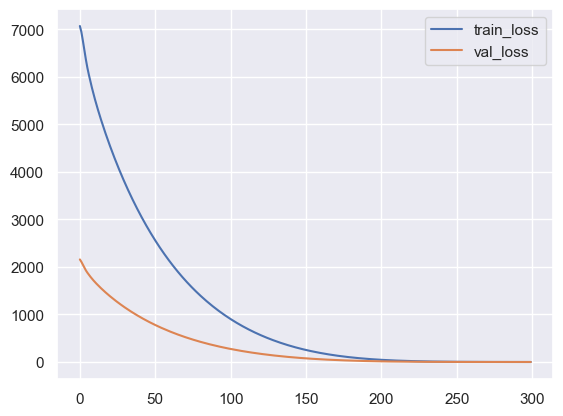

Finished Training
Epoch 1/300


100%|██████████| 13/13 [00:00<00:00, 43.62it/s]


Train Loss: 7124.953186035156


100%|██████████| 4/4 [00:00<00:00, 594.07it/s]


Epoch 2/300


100%|██████████| 13/13 [00:00<00:00, 74.62it/s]


Train Loss: 7047.635314941406


100%|██████████| 4/4 [00:00<00:00, 523.13it/s]


Epoch 3/300


100%|██████████| 13/13 [00:00<00:00, 84.13it/s]


Train Loss: 6877.478515625


100%|██████████| 4/4 [00:00<00:00, 508.28it/s]


Epoch 4/300


100%|██████████| 13/13 [00:00<00:00, 126.28it/s]


Train Loss: 6602.962371826172


100%|██████████| 4/4 [00:00<00:00, 638.86it/s]


Epoch 5/300


100%|██████████| 13/13 [00:00<00:00, 149.56it/s]


Train Loss: 6382.124816894531


100%|██████████| 4/4 [00:00<00:00, 557.55it/s]


Epoch 6/300


100%|██████████| 13/13 [00:00<00:00, 137.35it/s]


Train Loss: 6180.574401855469


100%|██████████| 4/4 [00:00<00:00, 299.96it/s]


Epoch 7/300


100%|██████████| 13/13 [00:00<00:00, 142.46it/s]


Train Loss: 5993.813629150391


100%|██████████| 4/4 [00:00<00:00, 527.72it/s]


Epoch 8/300


100%|██████████| 13/13 [00:00<00:00, 104.53it/s]


Train Loss: 5815.518402099609


100%|██████████| 4/4 [00:00<00:00, 203.68it/s]


Epoch 9/300


100%|██████████| 13/13 [00:00<00:00, 127.96it/s]


Train Loss: 5656.520568847656


100%|██████████| 4/4 [00:00<00:00, 451.51it/s]


Epoch 10/300


100%|██████████| 13/13 [00:00<00:00, 127.90it/s]


Train Loss: 5517.8431396484375


100%|██████████| 4/4 [00:00<00:00, 398.53it/s]


Epoch 11/300


100%|██████████| 13/13 [00:00<00:00, 112.75it/s]


Train Loss: 5390.702331542969


100%|██████████| 4/4 [00:00<00:00, 415.07it/s]


Epoch 12/300


100%|██████████| 13/13 [00:00<00:00, 91.64it/s]


Train Loss: 5271.242828369141


100%|██████████| 4/4 [00:00<00:00, 508.02it/s]


Epoch 13/300


100%|██████████| 13/13 [00:00<00:00, 138.09it/s]


Train Loss: 5157.607147216797


100%|██████████| 4/4 [00:00<00:00, 593.02it/s]


Epoch 14/300


100%|██████████| 13/13 [00:00<00:00, 95.63it/s]


Train Loss: 5048.691009521484


100%|██████████| 4/4 [00:00<00:00, 399.32it/s]


Epoch 15/300


100%|██████████| 13/13 [00:00<00:00, 126.13it/s]


Train Loss: 4943.751251220703


100%|██████████| 4/4 [00:00<00:00, 508.06it/s]


Epoch 16/300


100%|██████████| 13/13 [00:00<00:00, 126.92it/s]


Train Loss: 4842.249176025391


100%|██████████| 4/4 [00:00<00:00, 617.95it/s]


Epoch 17/300


100%|██████████| 13/13 [00:00<00:00, 146.48it/s]


Train Loss: 4743.784515380859


100%|██████████| 4/4 [00:00<00:00, 603.95it/s]


Epoch 18/300


100%|██████████| 13/13 [00:00<00:00, 141.71it/s]


Train Loss: 4648.132080078125


100%|██████████| 4/4 [00:00<00:00, 249.94it/s]


Epoch 19/300


100%|██████████| 13/13 [00:00<00:00, 128.56it/s]


Train Loss: 4554.9566650390625


100%|██████████| 4/4 [00:00<00:00, 585.65it/s]


Epoch 20/300


100%|██████████| 13/13 [00:00<00:00, 151.41it/s]


Train Loss: 4464.133056640625


100%|██████████| 4/4 [00:00<00:00, 481.65it/s]


Epoch 21/300


100%|██████████| 13/13 [00:00<00:00, 124.40it/s]


Train Loss: 4375.546722412109


100%|██████████| 4/4 [00:00<00:00, 539.76it/s]


Epoch 22/300


100%|██████████| 13/13 [00:00<00:00, 152.46it/s]


Train Loss: 4288.846130371094


100%|██████████| 4/4 [00:00<00:00, 545.41it/s]


Epoch 23/300


100%|██████████| 13/13 [00:00<00:00, 122.06it/s]


Train Loss: 4203.94873046875


100%|██████████| 4/4 [00:00<00:00, 588.49it/s]


Epoch 24/300


100%|██████████| 13/13 [00:00<00:00, 116.29it/s]


Train Loss: 4121.1453857421875


100%|██████████| 4/4 [00:00<00:00, 568.43it/s]


Epoch 25/300


100%|██████████| 13/13 [00:00<00:00, 141.25it/s]


Train Loss: 4040.092254638672


100%|██████████| 4/4 [00:00<00:00, 551.88it/s]


Epoch 26/300


100%|██████████| 13/13 [00:00<00:00, 153.57it/s]


Train Loss: 3960.808074951172


100%|██████████| 4/4 [00:00<00:00, 618.36it/s]


Epoch 27/300


100%|██████████| 13/13 [00:00<00:00, 138.18it/s]


Train Loss: 3883.105499267578


100%|██████████| 4/4 [00:00<00:00, 607.54it/s]


Epoch 28/300


100%|██████████| 13/13 [00:00<00:00, 122.35it/s]


Train Loss: 3807.0126037597656


100%|██████████| 4/4 [00:00<00:00, 394.02it/s]


Epoch 29/300


100%|██████████| 13/13 [00:00<00:00, 148.55it/s]


Train Loss: 3732.4566345214844


100%|██████████| 4/4 [00:00<00:00, 535.57it/s]


Epoch 30/300


100%|██████████| 13/13 [00:00<00:00, 135.04it/s]


Train Loss: 3659.3016662597656


100%|██████████| 4/4 [00:00<00:00, 439.70it/s]


Epoch 31/300


100%|██████████| 13/13 [00:00<00:00, 132.40it/s]


Train Loss: 3587.651641845703


100%|██████████| 4/4 [00:00<00:00, 639.40it/s]


Epoch 32/300


100%|██████████| 13/13 [00:00<00:00, 139.97it/s]


Train Loss: 3517.3899841308594


100%|██████████| 4/4 [00:00<00:00, 440.73it/s]


Epoch 33/300


100%|██████████| 13/13 [00:00<00:00, 91.36it/s]


Train Loss: 3448.413818359375


100%|██████████| 4/4 [00:00<00:00, 592.25it/s]


Epoch 34/300


100%|██████████| 13/13 [00:00<00:00, 144.36it/s]


Train Loss: 3380.8187866210938


100%|██████████| 4/4 [00:00<00:00, 444.30it/s]


Epoch 35/300


100%|██████████| 13/13 [00:00<00:00, 128.66it/s]


Train Loss: 3314.438720703125


100%|██████████| 4/4 [00:00<00:00, 618.99it/s]


Epoch 36/300


100%|██████████| 13/13 [00:00<00:00, 131.41it/s]


Train Loss: 3249.3873138427734


100%|██████████| 4/4 [00:00<00:00, 609.02it/s]


Epoch 37/300


100%|██████████| 13/13 [00:00<00:00, 148.38it/s]


Train Loss: 3185.4937133789062


100%|██████████| 4/4 [00:00<00:00, 604.06it/s]


Epoch 38/300


100%|██████████| 13/13 [00:00<00:00, 143.77it/s]


Train Loss: 3122.8258361816406


100%|██████████| 4/4 [00:00<00:00, 610.77it/s]


Epoch 39/300


100%|██████████| 13/13 [00:00<00:00, 141.87it/s]


Train Loss: 3061.2942504882812


100%|██████████| 4/4 [00:00<00:00, 368.70it/s]


Epoch 40/300


100%|██████████| 13/13 [00:00<00:00, 145.03it/s]


Train Loss: 3000.923843383789


100%|██████████| 4/4 [00:00<00:00, 585.39it/s]


Epoch 41/300


100%|██████████| 13/13 [00:00<00:00, 140.35it/s]


Train Loss: 2941.671188354492


100%|██████████| 4/4 [00:00<00:00, 597.18it/s]


Epoch 42/300


100%|██████████| 13/13 [00:00<00:00, 127.52it/s]


Train Loss: 2883.5082092285156


100%|██████████| 4/4 [00:00<00:00, 296.23it/s]


Epoch 43/300


100%|██████████| 13/13 [00:00<00:00, 153.75it/s]


Train Loss: 2826.3956298828125


100%|██████████| 4/4 [00:00<00:00, 570.61it/s]


Epoch 44/300


100%|██████████| 13/13 [00:00<00:00, 129.14it/s]


Train Loss: 2770.3666381835938


100%|██████████| 4/4 [00:00<00:00, 535.84it/s]


Epoch 45/300


100%|██████████| 13/13 [00:00<00:00, 118.19it/s]


Train Loss: 2715.3470306396484


100%|██████████| 4/4 [00:00<00:00, 558.83it/s]


Epoch 46/300


100%|██████████| 13/13 [00:00<00:00, 153.03it/s]


Train Loss: 2661.3304443359375


100%|██████████| 4/4 [00:00<00:00, 202.86it/s]


Epoch 47/300


100%|██████████| 13/13 [00:00<00:00, 142.97it/s]


Train Loss: 2608.339553833008


100%|██████████| 4/4 [00:00<00:00, 638.18it/s]


Epoch 48/300


100%|██████████| 13/13 [00:00<00:00, 146.04it/s]


Train Loss: 2556.266098022461


100%|██████████| 4/4 [00:00<00:00, 593.65it/s]


Epoch 49/300


100%|██████████| 13/13 [00:00<00:00, 140.27it/s]


Train Loss: 2505.1648712158203


100%|██████████| 4/4 [00:00<00:00, 553.03it/s]


Epoch 50/300


100%|██████████| 13/13 [00:00<00:00, 156.05it/s]


Train Loss: 2454.9891967773438


100%|██████████| 4/4 [00:00<00:00, 489.12it/s]


Epoch 51/300


100%|██████████| 13/13 [00:00<00:00, 143.76it/s]


Train Loss: 2405.738235473633


100%|██████████| 4/4 [00:00<00:00, 148.08it/s]


Epoch 52/300


100%|██████████| 13/13 [00:00<00:00, 84.89it/s]


Train Loss: 2357.4356842041016


100%|██████████| 4/4 [00:00<00:00, 612.20it/s]


Epoch 53/300


100%|██████████| 13/13 [00:00<00:00, 174.31it/s]


Train Loss: 2309.9261016845703


100%|██████████| 4/4 [00:00<00:00, 580.63it/s]


Epoch 54/300


100%|██████████| 13/13 [00:00<00:00, 161.05it/s]


Train Loss: 2263.3497161865234


100%|██████████| 4/4 [00:00<00:00, 594.09it/s]


Epoch 55/300


100%|██████████| 13/13 [00:00<00:00, 162.20it/s]


Train Loss: 2217.6166381835938


100%|██████████| 4/4 [00:00<00:00, 560.31it/s]


Epoch 56/300


100%|██████████| 13/13 [00:00<00:00, 151.27it/s]


Train Loss: 2172.6875610351562


100%|██████████| 4/4 [00:00<00:00, 641.11it/s]


Epoch 57/300


100%|██████████| 13/13 [00:00<00:00, 172.05it/s]


Train Loss: 2128.6078491210938


100%|██████████| 4/4 [00:00<00:00, 557.48it/s]


Epoch 58/300


100%|██████████| 13/13 [00:00<00:00, 144.02it/s]


Train Loss: 2085.3348236083984


100%|██████████| 4/4 [00:00<00:00, 515.52it/s]


Epoch 59/300


100%|██████████| 13/13 [00:00<00:00, 161.74it/s]


Train Loss: 2042.8168182373047


100%|██████████| 4/4 [00:00<00:00, 610.15it/s]


Epoch 60/300


100%|██████████| 13/13 [00:00<00:00, 164.31it/s]


Train Loss: 2001.1152038574219


100%|██████████| 4/4 [00:00<00:00, 576.54it/s]


Epoch 61/300


100%|██████████| 13/13 [00:00<00:00, 143.18it/s]


Train Loss: 1960.1249389648438


100%|██████████| 4/4 [00:00<00:00, 416.54it/s]


Epoch 62/300


100%|██████████| 13/13 [00:00<00:00, 146.72it/s]


Train Loss: 1919.9522094726562


100%|██████████| 4/4 [00:00<00:00, 633.32it/s]


Epoch 63/300


100%|██████████| 13/13 [00:00<00:00, 83.26it/s]


Train Loss: 1880.4816436767578


100%|██████████| 4/4 [00:00<00:00, 651.16it/s]


Epoch 64/300


100%|██████████| 13/13 [00:00<00:00, 161.66it/s]


Train Loss: 1841.7423553466797


100%|██████████| 4/4 [00:00<00:00, 600.49it/s]


Epoch 65/300


100%|██████████| 13/13 [00:00<00:00, 94.95it/s] 


Train Loss: 1803.6937713623047


100%|██████████| 4/4 [00:00<00:00, 334.89it/s]


Epoch 66/300


100%|██████████| 13/13 [00:00<00:00, 77.62it/s]


Train Loss: 1766.3586120605469


100%|██████████| 4/4 [00:00<00:00, 622.28it/s]


Epoch 67/300


100%|██████████| 13/13 [00:00<00:00, 79.88it/s]


Train Loss: 1729.698501586914


100%|██████████| 4/4 [00:00<00:00, 76.52it/s]


Epoch 68/300


100%|██████████| 13/13 [00:00<00:00, 85.67it/s]


Train Loss: 1693.7332000732422


100%|██████████| 4/4 [00:00<00:00, 597.80it/s]


Epoch 69/300


100%|██████████| 13/13 [00:00<00:00, 77.13it/s]


Train Loss: 1658.432518005371


100%|██████████| 4/4 [00:00<00:00, 522.67it/s]


Epoch 70/300


100%|██████████| 13/13 [00:00<00:00, 59.78it/s]


Train Loss: 1623.762596130371


100%|██████████| 4/4 [00:00<00:00, 176.67it/s]


Epoch 71/300


100%|██████████| 13/13 [00:00<00:00, 141.62it/s]


Train Loss: 1589.7375564575195


100%|██████████| 4/4 [00:00<00:00, 419.77it/s]


Epoch 72/300


100%|██████████| 13/13 [00:00<00:00, 93.45it/s] 


Train Loss: 1556.3460083007812


100%|██████████| 4/4 [00:00<00:00, 453.62it/s]


Epoch 73/300


100%|██████████| 13/13 [00:00<00:00, 65.84it/s]


Train Loss: 1523.5558013916016


100%|██████████| 4/4 [00:00<00:00, 260.47it/s]


Epoch 74/300


100%|██████████| 13/13 [00:00<00:00, 84.39it/s]


Train Loss: 1491.3832321166992


100%|██████████| 4/4 [00:00<00:00, 547.34it/s]


Epoch 75/300


100%|██████████| 13/13 [00:00<00:00, 75.73it/s]


Train Loss: 1459.7830657958984


100%|██████████| 4/4 [00:00<00:00, 580.13it/s]


Epoch 76/300


100%|██████████| 13/13 [00:00<00:00, 150.08it/s]


Train Loss: 1428.7918701171875


100%|██████████| 4/4 [00:00<00:00, 404.08it/s]


Epoch 77/300


100%|██████████| 13/13 [00:00<00:00, 90.19it/s]


Train Loss: 1398.3594055175781


100%|██████████| 4/4 [00:00<00:00, 522.33it/s]


Epoch 78/300


100%|██████████| 13/13 [00:00<00:00, 114.67it/s]


Train Loss: 1368.4941711425781


100%|██████████| 4/4 [00:00<00:00, 512.09it/s]


Epoch 79/300


100%|██████████| 13/13 [00:00<00:00, 59.53it/s]


Train Loss: 1339.2051239013672


100%|██████████| 4/4 [00:00<00:00, 166.56it/s]


Epoch 80/300


100%|██████████| 13/13 [00:00<00:00, 46.47it/s]


Train Loss: 1310.397834777832


100%|██████████| 4/4 [00:00<00:00, 227.93it/s]


Epoch 81/300


100%|██████████| 13/13 [00:00<00:00, 56.69it/s]


Train Loss: 1282.1825790405273


100%|██████████| 4/4 [00:00<00:00, 479.10it/s]


Epoch 82/300


100%|██████████| 13/13 [00:00<00:00, 154.54it/s]


Train Loss: 1254.4973373413086


100%|██████████| 4/4 [00:00<00:00, 628.55it/s]


Epoch 83/300


100%|██████████| 13/13 [00:00<00:00, 161.31it/s]


Train Loss: 1227.2866897583008


100%|██████████| 4/4 [00:00<00:00, 537.51it/s]


Epoch 84/300


100%|██████████| 13/13 [00:00<00:00, 131.61it/s]


Train Loss: 1200.5897903442383


100%|██████████| 4/4 [00:00<00:00, 440.24it/s]


Epoch 85/300


100%|██████████| 13/13 [00:00<00:00, 117.77it/s]


Train Loss: 1174.4071044921875


100%|██████████| 4/4 [00:00<00:00, 688.44it/s]


Epoch 86/300


100%|██████████| 13/13 [00:00<00:00, 146.86it/s]


Train Loss: 1148.7223587036133


100%|██████████| 4/4 [00:00<00:00, 584.69it/s]


Epoch 87/300


100%|██████████| 13/13 [00:00<00:00, 59.54it/s]


Train Loss: 1123.4870681762695


100%|██████████| 4/4 [00:00<00:00, 443.45it/s]


Epoch 88/300


100%|██████████| 13/13 [00:00<00:00, 78.20it/s]


Train Loss: 1098.7321548461914


100%|██████████| 4/4 [00:00<00:00, 60.31it/s]


Epoch 89/300


100%|██████████| 13/13 [00:00<00:00, 65.71it/s]


Train Loss: 1074.4751510620117


100%|██████████| 4/4 [00:00<00:00, 491.17it/s]


Epoch 90/300


100%|██████████| 13/13 [00:00<00:00, 74.17it/s]


Train Loss: 1050.6274948120117


100%|██████████| 4/4 [00:00<00:00, 399.29it/s]


Epoch 91/300


100%|██████████| 13/13 [00:00<00:00, 65.30it/s]


Train Loss: 1027.2431030273438


100%|██████████| 4/4 [00:00<00:00, 439.47it/s]


Epoch 92/300


100%|██████████| 13/13 [00:00<00:00, 123.19it/s]


Train Loss: 1004.3067321777344


100%|██████████| 4/4 [00:00<00:00, 616.61it/s]


Epoch 93/300


100%|██████████| 13/13 [00:00<00:00, 132.31it/s]


Train Loss: 981.8029861450195


100%|██████████| 4/4 [00:00<00:00, 549.75it/s]


Epoch 94/300


100%|██████████| 13/13 [00:00<00:00, 142.74it/s]


Train Loss: 959.7078704833984


100%|██████████| 4/4 [00:00<00:00, 543.55it/s]


Epoch 95/300


100%|██████████| 13/13 [00:00<00:00, 112.84it/s]


Train Loss: 938.017951965332


100%|██████████| 4/4 [00:00<00:00, 548.85it/s]


Epoch 96/300


100%|██████████| 13/13 [00:00<00:00, 123.94it/s]


Train Loss: 916.7787933349609


100%|██████████| 4/4 [00:00<00:00, 271.04it/s]


Epoch 97/300


100%|██████████| 13/13 [00:00<00:00, 111.82it/s]


Train Loss: 895.9252548217773


100%|██████████| 4/4 [00:00<00:00, 463.34it/s]


Epoch 98/300


100%|██████████| 13/13 [00:00<00:00, 144.00it/s]


Train Loss: 875.4592437744141


100%|██████████| 4/4 [00:00<00:00, 272.35it/s]


Epoch 99/300


100%|██████████| 13/13 [00:00<00:00, 114.76it/s]


Train Loss: 855.3905563354492


100%|██████████| 4/4 [00:00<00:00, 568.91it/s]


Epoch 100/300


100%|██████████| 13/13 [00:00<00:00, 138.41it/s]


Train Loss: 835.7163467407227


100%|██████████| 4/4 [00:00<00:00, 525.55it/s]


Epoch 101/300


100%|██████████| 13/13 [00:00<00:00, 122.49it/s]


Train Loss: 816.3877868652344


100%|██████████| 4/4 [00:00<00:00, 582.91it/s]


Epoch 102/300


100%|██████████| 13/13 [00:00<00:00, 152.15it/s]


Train Loss: 797.4558525085449


100%|██████████| 4/4 [00:00<00:00, 561.79it/s]


Epoch 103/300


100%|██████████| 13/13 [00:00<00:00, 139.73it/s]


Train Loss: 778.883243560791


100%|██████████| 4/4 [00:00<00:00, 548.40it/s]


Epoch 104/300


100%|██████████| 13/13 [00:00<00:00, 133.36it/s]


Train Loss: 760.6552543640137


100%|██████████| 4/4 [00:00<00:00, 579.22it/s]


Epoch 105/300


100%|██████████| 13/13 [00:00<00:00, 144.93it/s]


Train Loss: 742.7799186706543


100%|██████████| 4/4 [00:00<00:00, 553.72it/s]


Epoch 106/300


100%|██████████| 13/13 [00:00<00:00, 110.60it/s]


Train Loss: 725.2841148376465


100%|██████████| 4/4 [00:00<00:00, 510.41it/s]


Epoch 107/300


100%|██████████| 13/13 [00:00<00:00, 92.23it/s]


Train Loss: 708.095401763916


100%|██████████| 4/4 [00:00<00:00, 587.56it/s]


Epoch 108/300


100%|██████████| 13/13 [00:00<00:00, 124.10it/s]


Train Loss: 691.2217330932617


100%|██████████| 4/4 [00:00<00:00, 493.08it/s]


Epoch 109/300


100%|██████████| 13/13 [00:00<00:00, 139.82it/s]


Train Loss: 674.7028617858887


100%|██████████| 4/4 [00:00<00:00, 554.71it/s]


Epoch 110/300


100%|██████████| 13/13 [00:00<00:00, 125.00it/s]


Train Loss: 658.5177574157715


100%|██████████| 4/4 [00:00<00:00, 298.11it/s]


Epoch 111/300


100%|██████████| 13/13 [00:00<00:00, 157.48it/s]


Train Loss: 642.6323623657227


100%|██████████| 4/4 [00:00<00:00, 597.71it/s]


Epoch 112/300


100%|██████████| 13/13 [00:00<00:00, 101.13it/s]


Train Loss: 627.071475982666


100%|██████████| 4/4 [00:00<00:00, 558.20it/s]


Epoch 113/300


100%|██████████| 13/13 [00:00<00:00, 147.01it/s]


Train Loss: 611.8200378417969


100%|██████████| 4/4 [00:00<00:00, 615.66it/s]


Epoch 114/300


100%|██████████| 13/13 [00:00<00:00, 156.03it/s]


Train Loss: 596.8476181030273


100%|██████████| 4/4 [00:00<00:00, 431.26it/s]


Epoch 115/300


100%|██████████| 13/13 [00:00<00:00, 129.25it/s]


Train Loss: 582.184814453125


100%|██████████| 4/4 [00:00<00:00, 582.85it/s]


Epoch 116/300


100%|██████████| 13/13 [00:00<00:00, 144.91it/s]


Train Loss: 567.8293228149414


100%|██████████| 4/4 [00:00<00:00, 631.01it/s]


Epoch 117/300


100%|██████████| 13/13 [00:00<00:00, 141.86it/s]


Train Loss: 553.7465019226074


100%|██████████| 4/4 [00:00<00:00, 597.56it/s]


Epoch 118/300


100%|██████████| 13/13 [00:00<00:00, 124.39it/s]


Train Loss: 539.9381217956543


100%|██████████| 4/4 [00:00<00:00, 293.92it/s]


Epoch 119/300


100%|██████████| 13/13 [00:00<00:00, 133.83it/s]


Train Loss: 526.4369812011719


100%|██████████| 4/4 [00:00<00:00, 376.32it/s]


Epoch 120/300


100%|██████████| 13/13 [00:00<00:00, 145.74it/s]


Train Loss: 513.1766242980957


100%|██████████| 4/4 [00:00<00:00, 555.94it/s]


Epoch 121/300


100%|██████████| 13/13 [00:00<00:00, 140.21it/s]


Train Loss: 500.2001037597656


100%|██████████| 4/4 [00:00<00:00, 614.37it/s]


Epoch 122/300


100%|██████████| 13/13 [00:00<00:00, 147.04it/s]


Train Loss: 487.4630126953125


100%|██████████| 4/4 [00:00<00:00, 582.40it/s]


Epoch 123/300


100%|██████████| 13/13 [00:00<00:00, 130.28it/s]


Train Loss: 475.02216720581055


100%|██████████| 4/4 [00:00<00:00, 606.31it/s]


Epoch 124/300


100%|██████████| 13/13 [00:00<00:00, 137.36it/s]


Train Loss: 462.82963943481445


100%|██████████| 4/4 [00:00<00:00, 634.83it/s]


Epoch 125/300


100%|██████████| 13/13 [00:00<00:00, 85.87it/s]


Train Loss: 450.89048767089844


100%|██████████| 4/4 [00:00<00:00, 627.84it/s]


Epoch 126/300


100%|██████████| 13/13 [00:00<00:00, 118.92it/s]


Train Loss: 439.189510345459


100%|██████████| 4/4 [00:00<00:00, 654.57it/s]


Epoch 127/300


100%|██████████| 13/13 [00:00<00:00, 135.16it/s]


Train Loss: 427.7378578186035


100%|██████████| 4/4 [00:00<00:00, 610.99it/s]


Epoch 128/300


100%|██████████| 13/13 [00:00<00:00, 166.36it/s]


Train Loss: 416.52480697631836


100%|██████████| 4/4 [00:00<00:00, 612.55it/s]


Epoch 129/300


100%|██████████| 13/13 [00:00<00:00, 160.07it/s]


Train Loss: 405.55804443359375


100%|██████████| 4/4 [00:00<00:00, 639.89it/s]


Epoch 130/300


100%|██████████| 13/13 [00:00<00:00, 168.04it/s]


Train Loss: 394.80650329589844


100%|██████████| 4/4 [00:00<00:00, 641.53it/s]


Epoch 131/300


100%|██████████| 13/13 [00:00<00:00, 160.76it/s]


Train Loss: 384.27991104125977


100%|██████████| 4/4 [00:00<00:00, 587.05it/s]


Epoch 132/300


100%|██████████| 13/13 [00:00<00:00, 116.07it/s]


Train Loss: 373.9929008483887


100%|██████████| 4/4 [00:00<00:00, 614.82it/s]


Epoch 133/300


100%|██████████| 13/13 [00:00<00:00, 161.25it/s]


Train Loss: 363.9350128173828


100%|██████████| 4/4 [00:00<00:00, 633.20it/s]


Epoch 134/300


100%|██████████| 13/13 [00:00<00:00, 161.75it/s]


Train Loss: 354.072566986084


100%|██████████| 4/4 [00:00<00:00, 645.38it/s]


Epoch 135/300


100%|██████████| 13/13 [00:00<00:00, 166.99it/s]


Train Loss: 344.4394721984863


100%|██████████| 4/4 [00:00<00:00, 644.98it/s]


Epoch 136/300


100%|██████████| 13/13 [00:00<00:00, 173.17it/s]


Train Loss: 335.0067901611328


100%|██████████| 4/4 [00:00<00:00, 470.27it/s]


Epoch 137/300


100%|██████████| 13/13 [00:00<00:00, 161.11it/s]


Train Loss: 325.7982997894287


100%|██████████| 4/4 [00:00<00:00, 591.04it/s]


Epoch 138/300


100%|██████████| 13/13 [00:00<00:00, 160.11it/s]


Train Loss: 316.7761478424072


100%|██████████| 4/4 [00:00<00:00, 669.00it/s]


Epoch 139/300


100%|██████████| 13/13 [00:00<00:00, 161.50it/s]


Train Loss: 307.96103286743164


100%|██████████| 4/4 [00:00<00:00, 481.41it/s]


Epoch 140/300


100%|██████████| 13/13 [00:00<00:00, 164.67it/s]


Train Loss: 299.34102058410645


100%|██████████| 4/4 [00:00<00:00, 671.33it/s]


Epoch 141/300


100%|██████████| 13/13 [00:00<00:00, 161.60it/s]


Train Loss: 290.91622734069824


100%|██████████| 4/4 [00:00<00:00, 628.90it/s]


Epoch 142/300


100%|██████████| 13/13 [00:00<00:00, 154.21it/s]


Train Loss: 282.682186126709


100%|██████████| 4/4 [00:00<00:00, 577.79it/s]


Epoch 143/300


100%|██████████| 13/13 [00:00<00:00, 163.98it/s]


Train Loss: 274.6294422149658


100%|██████████| 4/4 [00:00<00:00, 657.54it/s]


Epoch 144/300


100%|██████████| 13/13 [00:00<00:00, 158.28it/s]


Train Loss: 266.76706886291504


100%|██████████| 4/4 [00:00<00:00, 633.80it/s]


Epoch 145/300


100%|██████████| 13/13 [00:00<00:00, 164.30it/s]


Train Loss: 259.07800102233887


100%|██████████| 4/4 [00:00<00:00, 542.21it/s]


Epoch 146/300


100%|██████████| 13/13 [00:00<00:00, 157.38it/s]


Train Loss: 251.58545112609863


100%|██████████| 4/4 [00:00<00:00, 641.23it/s]


Epoch 147/300


100%|██████████| 13/13 [00:00<00:00, 154.89it/s]


Train Loss: 244.2519588470459


100%|██████████| 4/4 [00:00<00:00, 590.75it/s]


Epoch 148/300


100%|██████████| 13/13 [00:00<00:00, 143.47it/s]


Train Loss: 237.0924835205078


100%|██████████| 4/4 [00:00<00:00, 605.13it/s]


Epoch 149/300


100%|██████████| 13/13 [00:00<00:00, 139.06it/s]


Train Loss: 230.10393714904785


100%|██████████| 4/4 [00:00<00:00, 580.39it/s]


Epoch 150/300


100%|██████████| 13/13 [00:00<00:00, 154.71it/s]


Train Loss: 223.28093910217285


100%|██████████| 4/4 [00:00<00:00, 439.02it/s]


Epoch 151/300


100%|██████████| 13/13 [00:00<00:00, 166.66it/s]


Train Loss: 216.61444473266602


100%|██████████| 4/4 [00:00<00:00, 635.00it/s]


Epoch 152/300


100%|██████████| 13/13 [00:00<00:00, 164.09it/s]


Train Loss: 210.11625003814697


100%|██████████| 4/4 [00:00<00:00, 652.33it/s]


Epoch 153/300


100%|██████████| 13/13 [00:00<00:00, 155.96it/s]


Train Loss: 203.76922416687012


100%|██████████| 4/4 [00:00<00:00, 604.06it/s]


Epoch 154/300


100%|██████████| 13/13 [00:00<00:00, 110.61it/s]


Train Loss: 197.58126068115234


100%|██████████| 4/4 [00:00<00:00, 505.87it/s]


Epoch 155/300


100%|██████████| 13/13 [00:00<00:00, 155.84it/s]


Train Loss: 191.54532146453857


100%|██████████| 4/4 [00:00<00:00, 579.86it/s]


Epoch 156/300


100%|██████████| 13/13 [00:00<00:00, 148.93it/s]


Train Loss: 185.66197109222412


100%|██████████| 4/4 [00:00<00:00, 612.26it/s]


Epoch 157/300


100%|██████████| 13/13 [00:00<00:00, 154.26it/s]


Train Loss: 179.9168882369995


100%|██████████| 4/4 [00:00<00:00, 625.20it/s]


Epoch 158/300


100%|██████████| 13/13 [00:00<00:00, 157.21it/s]


Train Loss: 174.33112144470215


100%|██████████| 4/4 [00:00<00:00, 584.45it/s]


Epoch 159/300


100%|██████████| 13/13 [00:00<00:00, 130.82it/s]


Train Loss: 168.86579513549805


100%|██████████| 4/4 [00:00<00:00, 516.25it/s]


Epoch 160/300


100%|██████████| 13/13 [00:00<00:00, 161.61it/s]


Train Loss: 163.55460166931152


100%|██████████| 4/4 [00:00<00:00, 554.93it/s]


Epoch 161/300


100%|██████████| 13/13 [00:00<00:00, 149.68it/s]


Train Loss: 158.36061763763428


100%|██████████| 4/4 [00:00<00:00, 489.95it/s]


Epoch 162/300


100%|██████████| 13/13 [00:00<00:00, 170.24it/s]


Train Loss: 153.3155164718628


100%|██████████| 4/4 [00:00<00:00, 484.57it/s]


Epoch 163/300


100%|██████████| 13/13 [00:00<00:00, 143.67it/s]


Train Loss: 148.4041051864624


100%|██████████| 4/4 [00:00<00:00, 555.26it/s]


Epoch 164/300


100%|██████████| 13/13 [00:00<00:00, 165.91it/s]


Train Loss: 143.61238288879395


100%|██████████| 4/4 [00:00<00:00, 621.13it/s]


Epoch 165/300


100%|██████████| 13/13 [00:00<00:00, 161.97it/s]


Train Loss: 138.95168590545654


100%|██████████| 4/4 [00:00<00:00, 567.43it/s]


Epoch 166/300


100%|██████████| 13/13 [00:00<00:00, 151.31it/s]


Train Loss: 134.40875339508057


100%|██████████| 4/4 [00:00<00:00, 509.23it/s]


Epoch 167/300


100%|██████████| 13/13 [00:00<00:00, 90.51it/s]


Train Loss: 129.9901304244995


100%|██████████| 4/4 [00:00<00:00, 567.62it/s]


Epoch 168/300


100%|██████████| 13/13 [00:00<00:00, 141.92it/s]


Train Loss: 125.69192218780518


100%|██████████| 4/4 [00:00<00:00, 590.83it/s]


Epoch 169/300


100%|██████████| 13/13 [00:00<00:00, 65.32it/s]


Train Loss: 121.50723838806152


100%|██████████| 4/4 [00:00<00:00, 440.09it/s]


Epoch 170/300


100%|██████████| 13/13 [00:00<00:00, 92.04it/s]


Train Loss: 117.43508720397949


100%|██████████| 4/4 [00:00<00:00, 513.54it/s]


Epoch 171/300


100%|██████████| 13/13 [00:00<00:00, 52.32it/s]


Train Loss: 113.47794342041016


100%|██████████| 4/4 [00:00<00:00, 80.59it/s]


Epoch 172/300


100%|██████████| 13/13 [00:00<00:00, 92.15it/s]


Train Loss: 109.62793064117432


100%|██████████| 4/4 [00:00<00:00, 600.06it/s]


Epoch 173/300


100%|██████████| 13/13 [00:00<00:00, 44.57it/s]


Train Loss: 105.88916206359863


100%|██████████| 4/4 [00:00<00:00, 521.91it/s]


Epoch 174/300


100%|██████████| 13/13 [00:00<00:00, 131.17it/s]


Train Loss: 102.25005388259888


100%|██████████| 4/4 [00:00<00:00, 602.85it/s]


Epoch 175/300


100%|██████████| 13/13 [00:00<00:00, 83.30it/s]


Train Loss: 98.7173547744751


100%|██████████| 4/4 [00:00<00:00, 490.07it/s]


Epoch 176/300


100%|██████████| 13/13 [00:00<00:00, 53.69it/s]


Train Loss: 95.28207778930664


100%|██████████| 4/4 [00:00<00:00, 388.73it/s]


Epoch 177/300


100%|██████████| 13/13 [00:00<00:00, 77.99it/s]


Train Loss: 91.94394588470459


100%|██████████| 4/4 [00:00<00:00, 657.90it/s]


Epoch 178/300


100%|██████████| 13/13 [00:00<00:00, 161.30it/s]


Train Loss: 88.7085485458374


100%|██████████| 4/4 [00:00<00:00, 610.24it/s]


Epoch 179/300


100%|██████████| 13/13 [00:00<00:00, 69.44it/s]


Train Loss: 85.56411170959473


100%|██████████| 4/4 [00:00<00:00, 362.59it/s]


Epoch 180/300


100%|██████████| 13/13 [00:00<00:00, 116.84it/s]


Train Loss: 82.51052665710449


100%|██████████| 4/4 [00:00<00:00, 614.62it/s]


Epoch 181/300


100%|██████████| 13/13 [00:00<00:00, 93.53it/s] 


Train Loss: 79.54677772521973


100%|██████████| 4/4 [00:00<00:00, 125.33it/s]


Epoch 182/300


100%|██████████| 13/13 [00:00<00:00, 43.47it/s]


Train Loss: 76.67425012588501


100%|██████████| 4/4 [00:00<00:00, 209.33it/s]


Epoch 183/300


100%|██████████| 13/13 [00:00<00:00, 51.27it/s]


Train Loss: 73.88965702056885


100%|██████████| 4/4 [00:00<00:00, 155.47it/s]


Epoch 184/300


100%|██████████| 13/13 [00:00<00:00, 106.22it/s]


Train Loss: 71.18480157852173


100%|██████████| 4/4 [00:00<00:00, 572.66it/s]


Epoch 185/300


100%|██████████| 13/13 [00:00<00:00, 124.63it/s]


Train Loss: 68.5547513961792


100%|██████████| 4/4 [00:00<00:00, 366.84it/s]


Epoch 186/300


100%|██████████| 13/13 [00:00<00:00, 151.37it/s]


Train Loss: 66.01685905456543


100%|██████████| 4/4 [00:00<00:00, 622.28it/s]


Epoch 187/300


100%|██████████| 13/13 [00:00<00:00, 107.54it/s]


Train Loss: 63.55131387710571


100%|██████████| 4/4 [00:00<00:00, 434.04it/s]


Epoch 188/300


100%|██████████| 13/13 [00:00<00:00, 110.46it/s]


Train Loss: 61.16901397705078


100%|██████████| 4/4 [00:00<00:00, 608.73it/s]


Epoch 189/300


100%|██████████| 13/13 [00:00<00:00, 122.96it/s]


Train Loss: 58.86087131500244


100%|██████████| 4/4 [00:00<00:00, 591.87it/s]


Epoch 190/300


100%|██████████| 13/13 [00:00<00:00, 56.12it/s]


Train Loss: 56.62393140792847


100%|██████████| 4/4 [00:00<00:00, 61.65it/s]


Epoch 191/300


100%|██████████| 13/13 [00:00<00:00, 50.13it/s]


Train Loss: 54.4555778503418


100%|██████████| 4/4 [00:00<00:00, 383.51it/s]


Epoch 192/300


100%|██████████| 13/13 [00:00<00:00, 62.11it/s]


Train Loss: 52.35489821434021


100%|██████████| 4/4 [00:00<00:00, 537.06it/s]


Epoch 193/300


100%|██████████| 13/13 [00:00<00:00, 57.05it/s]


Train Loss: 50.32574725151062


100%|██████████| 4/4 [00:00<00:00, 84.30it/s]


Epoch 194/300


100%|██████████| 13/13 [00:00<00:00, 71.29it/s]


Train Loss: 48.358850717544556


100%|██████████| 4/4 [00:00<00:00, 325.23it/s]


Epoch 195/300


100%|██████████| 13/13 [00:00<00:00, 119.37it/s]


Train Loss: 46.4603910446167


100%|██████████| 4/4 [00:00<00:00, 531.28it/s]


Epoch 196/300


100%|██████████| 13/13 [00:00<00:00, 117.74it/s]


Train Loss: 44.62601089477539


100%|██████████| 4/4 [00:00<00:00, 550.45it/s]


Epoch 197/300


100%|██████████| 13/13 [00:00<00:00, 123.49it/s]


Train Loss: 42.8484742641449


100%|██████████| 4/4 [00:00<00:00, 435.87it/s]


Epoch 198/300


100%|██████████| 13/13 [00:00<00:00, 97.12it/s]


Train Loss: 41.130234479904175


100%|██████████| 4/4 [00:00<00:00, 606.22it/s]


Epoch 199/300


100%|██████████| 13/13 [00:00<00:00, 145.09it/s]


Train Loss: 39.47315573692322


100%|██████████| 4/4 [00:00<00:00, 511.77it/s]


Epoch 200/300


100%|██████████| 13/13 [00:00<00:00, 120.22it/s]


Train Loss: 37.869858503341675


100%|██████████| 4/4 [00:00<00:00, 490.20it/s]


Epoch 201/300


100%|██████████| 13/13 [00:00<00:00, 62.39it/s]


Train Loss: 36.3291072845459


100%|██████████| 4/4 [00:00<00:00, 420.62it/s]


Epoch 202/300


100%|██████████| 13/13 [00:00<00:00, 128.64it/s]


Train Loss: 34.831454038619995


100%|██████████| 4/4 [00:00<00:00, 585.47it/s]


Epoch 203/300


100%|██████████| 13/13 [00:00<00:00, 130.16it/s]


Train Loss: 33.39214038848877


100%|██████████| 4/4 [00:00<00:00, 676.36it/s]


Epoch 204/300


100%|██████████| 13/13 [00:00<00:00, 142.13it/s]


Train Loss: 31.999778747558594


100%|██████████| 4/4 [00:00<00:00, 674.54it/s]


Epoch 205/300


100%|██████████| 13/13 [00:00<00:00, 155.57it/s]


Train Loss: 30.659382104873657


100%|██████████| 4/4 [00:00<00:00, 563.85it/s]


Epoch 206/300


100%|██████████| 13/13 [00:00<00:00, 144.94it/s]


Train Loss: 29.365963459014893


100%|██████████| 4/4 [00:00<00:00, 660.52it/s]


Epoch 207/300


100%|██████████| 13/13 [00:00<00:00, 162.85it/s]


Train Loss: 28.118704319000244


100%|██████████| 4/4 [00:00<00:00, 690.96it/s]


Epoch 208/300


100%|██████████| 13/13 [00:00<00:00, 168.88it/s]


Train Loss: 26.915188312530518


100%|██████████| 4/4 [00:00<00:00, 659.51it/s]


Epoch 209/300


100%|██████████| 13/13 [00:00<00:00, 153.72it/s]


Train Loss: 25.75595223903656


100%|██████████| 4/4 [00:00<00:00, 697.25it/s]


Epoch 210/300


100%|██████████| 13/13 [00:00<00:00, 172.65it/s]


Train Loss: 24.643837571144104


100%|██████████| 4/4 [00:00<00:00, 592.50it/s]


Epoch 211/300


100%|██████████| 13/13 [00:00<00:00, 99.70it/s] 


Train Loss: 23.570568442344666


100%|██████████| 4/4 [00:00<00:00, 641.97it/s]


Epoch 212/300


100%|██████████| 13/13 [00:00<00:00, 146.61it/s]


Train Loss: 22.533759474754333


100%|██████████| 4/4 [00:00<00:00, 557.05it/s]


Epoch 213/300


100%|██████████| 13/13 [00:00<00:00, 172.79it/s]


Train Loss: 21.53920865058899


100%|██████████| 4/4 [00:00<00:00, 639.11it/s]


Epoch 214/300


100%|██████████| 13/13 [00:00<00:00, 159.64it/s]


Train Loss: 20.58412003517151


100%|██████████| 4/4 [00:00<00:00, 710.00it/s]


Epoch 215/300


100%|██████████| 13/13 [00:00<00:00, 169.46it/s]


Train Loss: 19.663565516471863


100%|██████████| 4/4 [00:00<00:00, 640.11it/s]


Epoch 216/300


100%|██████████| 13/13 [00:00<00:00, 155.17it/s]


Train Loss: 18.775653839111328


100%|██████████| 4/4 [00:00<00:00, 524.47it/s]


Epoch 217/300


100%|██████████| 13/13 [00:00<00:00, 156.26it/s]


Train Loss: 17.925414323806763


100%|██████████| 4/4 [00:00<00:00, 645.35it/s]


Epoch 218/300


100%|██████████| 13/13 [00:00<00:00, 159.38it/s]


Train Loss: 17.108845829963684


100%|██████████| 4/4 [00:00<00:00, 658.24it/s]


Epoch 219/300


100%|██████████| 13/13 [00:00<00:00, 161.25it/s]


Train Loss: 16.32251477241516


100%|██████████| 4/4 [00:00<00:00, 643.94it/s]


Epoch 220/300


100%|██████████| 13/13 [00:00<00:00, 149.77it/s]


Train Loss: 15.568184614181519


100%|██████████| 4/4 [00:00<00:00, 654.24it/s]


Epoch 221/300


100%|██████████| 13/13 [00:00<00:00, 172.14it/s]


Train Loss: 14.848052501678467


100%|██████████| 4/4 [00:00<00:00, 649.55it/s]


Epoch 222/300


100%|██████████| 13/13 [00:00<00:00, 150.80it/s]


Train Loss: 14.14755666255951


100%|██████████| 4/4 [00:00<00:00, 663.37it/s]


Epoch 223/300


100%|██████████| 13/13 [00:00<00:00, 156.71it/s]


Train Loss: 13.483732223510742


100%|██████████| 4/4 [00:00<00:00, 641.72it/s]


Epoch 224/300


100%|██████████| 13/13 [00:00<00:00, 173.74it/s]


Train Loss: 12.838541150093079


100%|██████████| 4/4 [00:00<00:00, 561.11it/s]


Epoch 225/300


100%|██████████| 13/13 [00:00<00:00, 143.59it/s]


Train Loss: 12.22986215353012


100%|██████████| 4/4 [00:00<00:00, 645.75it/s]


Epoch 226/300


100%|██████████| 13/13 [00:00<00:00, 164.30it/s]


Train Loss: 11.639350414276123


100%|██████████| 4/4 [00:00<00:00, 673.41it/s]


Epoch 227/300


100%|██████████| 13/13 [00:00<00:00, 152.69it/s]


Train Loss: 11.078354477882385


100%|██████████| 4/4 [00:00<00:00, 637.14it/s]


Epoch 228/300


100%|██████████| 13/13 [00:00<00:00, 160.66it/s]


Train Loss: 10.54271274805069


100%|██████████| 4/4 [00:00<00:00, 511.39it/s]


Epoch 229/300


100%|██████████| 13/13 [00:00<00:00, 157.83it/s]


Train Loss: 10.024907171726227


100%|██████████| 4/4 [00:00<00:00, 628.93it/s]


Epoch 230/300


100%|██████████| 13/13 [00:00<00:00, 171.04it/s]


Train Loss: 9.528785586357117


100%|██████████| 4/4 [00:00<00:00, 641.26it/s]


Epoch 231/300


100%|██████████| 13/13 [00:00<00:00, 156.99it/s]


Train Loss: 9.058180809020996


100%|██████████| 4/4 [00:00<00:00, 543.48it/s]


Epoch 232/300


100%|██████████| 13/13 [00:00<00:00, 166.21it/s]


Train Loss: 8.603617191314697


100%|██████████| 4/4 [00:00<00:00, 615.86it/s]


Epoch 233/300


100%|██████████| 13/13 [00:00<00:00, 145.56it/s]


Train Loss: 8.169828712940216


100%|██████████| 4/4 [00:00<00:00, 635.43it/s]


Epoch 234/300


100%|██████████| 13/13 [00:00<00:00, 104.30it/s]


Train Loss: 7.75623220205307


100%|██████████| 4/4 [00:00<00:00, 657.90it/s]


Epoch 235/300


100%|██████████| 13/13 [00:00<00:00, 164.87it/s]


Train Loss: 7.362421333789825


100%|██████████| 4/4 [00:00<00:00, 366.16it/s]


Epoch 236/300


100%|██████████| 13/13 [00:00<00:00, 163.73it/s]


Train Loss: 6.984911382198334


100%|██████████| 4/4 [00:00<00:00, 672.27it/s]


Epoch 237/300


100%|██████████| 13/13 [00:00<00:00, 171.65it/s]


Train Loss: 6.623216599225998


100%|██████████| 4/4 [00:00<00:00, 593.13it/s]


Epoch 238/300


100%|██████████| 13/13 [00:00<00:00, 157.16it/s]


Train Loss: 6.279942065477371


100%|██████████| 4/4 [00:00<00:00, 642.44it/s]


Epoch 239/300


100%|██████████| 13/13 [00:00<00:00, 156.36it/s]


Train Loss: 5.954302400350571


100%|██████████| 4/4 [00:00<00:00, 619.86it/s]


Epoch 240/300


100%|██████████| 13/13 [00:00<00:00, 169.32it/s]


Train Loss: 5.639906585216522


100%|██████████| 4/4 [00:00<00:00, 642.46it/s]


Epoch 241/300


100%|██████████| 13/13 [00:00<00:00, 157.68it/s]


Train Loss: 5.3415738344192505


100%|██████████| 4/4 [00:00<00:00, 602.13it/s]


Epoch 242/300


100%|██████████| 13/13 [00:00<00:00, 96.93it/s]


Train Loss: 5.05808961391449


100%|██████████| 4/4 [00:00<00:00, 598.16it/s]


Epoch 243/300


100%|██████████| 13/13 [00:00<00:00, 147.74it/s]


Train Loss: 4.7863340973854065


100%|██████████| 4/4 [00:00<00:00, 617.56it/s]


Epoch 244/300


100%|██████████| 13/13 [00:00<00:00, 45.15it/s]


Train Loss: 4.5279558300971985


100%|██████████| 4/4 [00:00<00:00, 624.80it/s]


Epoch 245/300


100%|██████████| 13/13 [00:00<00:00, 165.49it/s]


Train Loss: 4.282613545656204


100%|██████████| 4/4 [00:00<00:00, 662.35it/s]


Epoch 246/300


100%|██████████| 13/13 [00:00<00:00, 145.48it/s]


Train Loss: 4.048733830451965


100%|██████████| 4/4 [00:00<00:00, 586.33it/s]


Epoch 247/300


100%|██████████| 13/13 [00:00<00:00, 143.98it/s]


Train Loss: 3.8274754881858826


100%|██████████| 4/4 [00:00<00:00, 573.72it/s]


Epoch 248/300


100%|██████████| 13/13 [00:00<00:00, 162.56it/s]


Train Loss: 3.6160411834716797


100%|██████████| 4/4 [00:00<00:00, 613.70it/s]


Epoch 249/300


100%|██████████| 13/13 [00:00<00:00, 141.24it/s]


Train Loss: 3.4143430590629578


100%|██████████| 4/4 [00:00<00:00, 638.14it/s]


Epoch 250/300


100%|██████████| 13/13 [00:00<00:00, 146.55it/s]


Train Loss: 3.224545881152153


100%|██████████| 4/4 [00:00<00:00, 308.07it/s]


Epoch 251/300


100%|██████████| 13/13 [00:00<00:00, 118.32it/s]


Train Loss: 3.0463645607233047


100%|██████████| 4/4 [00:00<00:00, 483.20it/s]


Epoch 252/300


100%|██████████| 13/13 [00:00<00:00, 103.08it/s]


Train Loss: 2.8722004145383835


100%|██████████| 4/4 [00:00<00:00, 637.75it/s]


Epoch 253/300


100%|██████████| 13/13 [00:00<00:00, 166.63it/s]


Train Loss: 2.7072001546621323


100%|██████████| 4/4 [00:00<00:00, 606.42it/s]


Epoch 254/300


100%|██████████| 13/13 [00:00<00:00, 145.31it/s]


Train Loss: 2.5540920794010162


100%|██████████| 4/4 [00:00<00:00, 591.00it/s]


Epoch 255/300


100%|██████████| 13/13 [00:00<00:00, 147.59it/s]


Train Loss: 2.4071459621191025


100%|██████████| 4/4 [00:00<00:00, 493.08it/s]


Epoch 256/300


100%|██████████| 13/13 [00:00<00:00, 127.07it/s]


Train Loss: 2.2673289477825165


100%|██████████| 4/4 [00:00<00:00, 568.03it/s]


Epoch 257/300


100%|██████████| 13/13 [00:00<00:00, 142.07it/s]


Train Loss: 2.1342501491308212


100%|██████████| 4/4 [00:00<00:00, 464.83it/s]


Epoch 258/300


100%|██████████| 13/13 [00:00<00:00, 148.25it/s]


Train Loss: 2.011048823595047


100%|██████████| 4/4 [00:00<00:00, 319.59it/s]


Epoch 259/300


100%|██████████| 13/13 [00:00<00:00, 141.08it/s]


Train Loss: 1.8912400901317596


100%|██████████| 4/4 [00:00<00:00, 509.81it/s]


Epoch 260/300


100%|██████████| 13/13 [00:00<00:00, 150.64it/s]


Train Loss: 1.7797435969114304


100%|██████████| 4/4 [00:00<00:00, 574.15it/s]


Epoch 261/300


100%|██████████| 13/13 [00:00<00:00, 110.56it/s]


Train Loss: 1.674342393875122


100%|██████████| 4/4 [00:00<00:00, 536.41it/s]


Epoch 262/300


100%|██████████| 13/13 [00:00<00:00, 138.59it/s]


Train Loss: 1.573489934206009


100%|██████████| 4/4 [00:00<00:00, 655.85it/s]


Epoch 263/300


100%|██████████| 13/13 [00:00<00:00, 138.10it/s]


Train Loss: 1.4790224805474281


100%|██████████| 4/4 [00:00<00:00, 502.21it/s]


Epoch 264/300


100%|██████████| 13/13 [00:00<00:00, 141.73it/s]


Train Loss: 1.3893548622727394


100%|██████████| 4/4 [00:00<00:00, 393.02it/s]


Epoch 265/300


100%|██████████| 13/13 [00:00<00:00, 134.08it/s]


Train Loss: 1.3053096011281013


100%|██████████| 4/4 [00:00<00:00, 490.98it/s]


Epoch 266/300


100%|██████████| 13/13 [00:00<00:00, 131.09it/s]


Train Loss: 1.2266118302941322


100%|██████████| 4/4 [00:00<00:00, 510.92it/s]


Epoch 267/300


100%|██████████| 13/13 [00:00<00:00, 137.62it/s]


Train Loss: 1.1512339636683464


100%|██████████| 4/4 [00:00<00:00, 552.17it/s]


Epoch 268/300


100%|██████████| 13/13 [00:00<00:00, 139.39it/s]


Train Loss: 1.0815097838640213


100%|██████████| 4/4 [00:00<00:00, 383.92it/s]


Epoch 269/300


100%|██████████| 13/13 [00:00<00:00, 127.68it/s]


Train Loss: 1.0129628330469131


100%|██████████| 4/4 [00:00<00:00, 49.38it/s]


Epoch 270/300


100%|██████████| 13/13 [00:00<00:00, 118.06it/s]


Train Loss: 0.9514055475592613


100%|██████████| 4/4 [00:00<00:00, 569.72it/s]


Epoch 271/300


100%|██████████| 13/13 [00:00<00:00, 62.28it/s]


Train Loss: 0.8928211554884911


100%|██████████| 4/4 [00:00<00:00, 93.27it/s]


Epoch 272/300


100%|██████████| 13/13 [00:00<00:00, 83.72it/s]


Train Loss: 0.8350932039320469


100%|██████████| 4/4 [00:00<00:00, 438.69it/s]


Epoch 273/300


100%|██████████| 13/13 [00:00<00:00, 87.20it/s]


Train Loss: 0.7837332487106323


100%|██████████| 4/4 [00:00<00:00, 134.43it/s]


Epoch 274/300


100%|██████████| 13/13 [00:00<00:00, 57.71it/s]


Train Loss: 0.7332917302846909


100%|██████████| 4/4 [00:00<00:00, 589.21it/s]


Epoch 275/300


100%|██████████| 13/13 [00:00<00:00, 74.78it/s]


Train Loss: 0.6877132765948772


100%|██████████| 4/4 [00:00<00:00, 540.68it/s]


Epoch 276/300


100%|██████████| 13/13 [00:00<00:00, 52.81it/s]


Train Loss: 0.644233413040638


100%|██████████| 4/4 [00:00<00:00, 185.44it/s]


Epoch 277/300


100%|██████████| 13/13 [00:00<00:00, 119.72it/s]


Train Loss: 0.6056437566876411


100%|██████████| 4/4 [00:00<00:00, 429.46it/s]


Epoch 278/300


100%|██████████| 13/13 [00:00<00:00, 83.97it/s]


Train Loss: 0.564451552927494


100%|██████████| 4/4 [00:00<00:00, 572.25it/s]


Epoch 279/300


100%|██████████| 13/13 [00:00<00:00, 55.84it/s]


Train Loss: 0.5284454524517059


100%|██████████| 4/4 [00:00<00:00, 166.83it/s]


Epoch 280/300


100%|██████████| 13/13 [00:00<00:00, 58.31it/s]


Train Loss: 0.49696654453873634


100%|██████████| 4/4 [00:00<00:00, 60.54it/s]


Epoch 281/300


100%|██████████| 13/13 [00:00<00:00, 58.89it/s]


Train Loss: 0.46370530501008034


100%|██████████| 4/4 [00:00<00:00, 88.04it/s]


Epoch 282/300


100%|██████████| 13/13 [00:00<00:00, 52.23it/s]


Train Loss: 0.4356289394199848


100%|██████████| 4/4 [00:00<00:00, 584.02it/s]


Epoch 283/300


100%|██████████| 13/13 [00:00<00:00, 149.48it/s]


Train Loss: 0.40685196965932846


100%|██████████| 4/4 [00:00<00:00, 544.59it/s]


Epoch 284/300


100%|██████████| 13/13 [00:00<00:00, 130.53it/s]


Train Loss: 0.3794087339192629


100%|██████████| 4/4 [00:00<00:00, 557.86it/s]


Epoch 285/300


100%|██████████| 13/13 [00:00<00:00, 133.86it/s]


Train Loss: 0.35606130212545395


100%|██████████| 4/4 [00:00<00:00, 605.35it/s]


Epoch 286/300


100%|██████████| 13/13 [00:00<00:00, 139.99it/s]


Train Loss: 0.33388527110219


100%|██████████| 4/4 [00:00<00:00, 546.08it/s]


Epoch 287/300


100%|██████████| 13/13 [00:00<00:00, 138.22it/s]


Train Loss: 0.312466062605381


100%|██████████| 4/4 [00:00<00:00, 553.48it/s]


Epoch 288/300


100%|██████████| 13/13 [00:00<00:00, 163.13it/s]


Train Loss: 0.29245542362332344


100%|██████████| 4/4 [00:00<00:00, 574.39it/s]


Epoch 289/300


100%|██████████| 13/13 [00:00<00:00, 145.03it/s]


Train Loss: 0.27341516874730587


100%|██████████| 4/4 [00:00<00:00, 530.29it/s]


Epoch 290/300


100%|██████████| 13/13 [00:00<00:00, 57.50it/s]


Train Loss: 0.25626072101294994


100%|██████████| 4/4 [00:00<00:00, 636.73it/s]


Epoch 291/300


100%|██████████| 13/13 [00:00<00:00, 67.56it/s]


Train Loss: 0.2404273170977831


100%|██████████| 4/4 [00:00<00:00, 533.00it/s]


Epoch 292/300


100%|██████████| 13/13 [00:00<00:00, 71.61it/s]


Train Loss: 0.2276023905724287


100%|██████████| 4/4 [00:00<00:00, 418.49it/s]


Epoch 293/300


100%|██████████| 13/13 [00:00<00:00, 113.55it/s]


Train Loss: 0.2121925875544548


100%|██████████| 4/4 [00:00<00:00, 454.29it/s]


Epoch 294/300


100%|██████████| 13/13 [00:00<00:00, 48.97it/s]


Train Loss: 0.19923701975494623


100%|██████████| 4/4 [00:00<00:00, 511.13it/s]


Epoch 295/300


100%|██████████| 13/13 [00:00<00:00, 37.46it/s]


Train Loss: 0.18626942485570908


100%|██████████| 4/4 [00:00<00:00, 498.70it/s]


Epoch 296/300


100%|██████████| 13/13 [00:00<00:00, 144.64it/s]


Train Loss: 0.1750999866053462


100%|██████████| 4/4 [00:00<00:00, 372.16it/s]


Epoch 297/300


100%|██████████| 13/13 [00:00<00:00, 127.36it/s]


Train Loss: 0.16461705788969994


100%|██████████| 4/4 [00:00<00:00, 579.04it/s]


Epoch 298/300


100%|██████████| 13/13 [00:00<00:00, 159.55it/s]


Train Loss: 0.1551453685387969


100%|██████████| 4/4 [00:00<00:00, 614.35it/s]


Epoch 299/300


100%|██████████| 13/13 [00:00<00:00, 168.35it/s]


Train Loss: 0.14652580674737692


100%|██████████| 4/4 [00:00<00:00, 688.21it/s]


Epoch 300/300


100%|██████████| 13/13 [00:00<00:00, 175.14it/s]


Train Loss: 0.13976017478853464


100%|██████████| 4/4 [00:00<00:00, 706.94it/s]


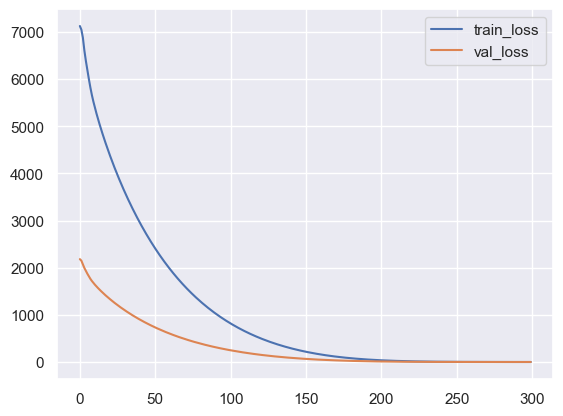

Finished Training
Epoch 1/300


100%|██████████| 7/7 [00:00<00:00, 87.64it/s]


Train Loss: 3692.6463317871094


100%|██████████| 2/2 [00:00<00:00, 273.26it/s]


Epoch 2/300


100%|██████████| 7/7 [00:00<00:00, 98.22it/s]


Train Loss: 3344.068389892578


100%|██████████| 2/2 [00:00<00:00, 64.36it/s]


Epoch 3/300


100%|██████████| 7/7 [00:00<00:00, 99.86it/s]


Train Loss: 3044.2779235839844


100%|██████████| 2/2 [00:00<00:00, 288.60it/s]


Epoch 4/300


100%|██████████| 7/7 [00:00<00:00, 84.42it/s]


Train Loss: 2749.9962158203125


100%|██████████| 2/2 [00:00<00:00, 381.89it/s]


Epoch 5/300


100%|██████████| 7/7 [00:00<00:00, 113.90it/s]


Train Loss: 2465.2635803222656


100%|██████████| 2/2 [00:00<00:00, 326.37it/s]


Epoch 6/300


100%|██████████| 7/7 [00:00<00:00, 129.84it/s]


Train Loss: 2199.5663452148438


100%|██████████| 2/2 [00:00<00:00, 308.93it/s]


Epoch 7/300


100%|██████████| 7/7 [00:00<00:00, 118.90it/s]


Train Loss: 1956.3852844238281


100%|██████████| 2/2 [00:00<00:00, 314.96it/s]


Epoch 8/300


100%|██████████| 7/7 [00:00<00:00, 80.77it/s]


Train Loss: 1738.0437469482422


100%|██████████| 2/2 [00:00<00:00, 280.87it/s]


Epoch 9/300


100%|██████████| 7/7 [00:00<00:00, 94.99it/s]


Train Loss: 1543.5128173828125


100%|██████████| 2/2 [00:00<00:00, 365.50it/s]


Epoch 10/300


100%|██████████| 7/7 [00:00<00:00, 115.08it/s]


Train Loss: 1370.5790252685547


100%|██████████| 2/2 [00:00<00:00, 300.34it/s]


Epoch 11/300


100%|██████████| 7/7 [00:00<00:00, 76.24it/s]


Train Loss: 1217.1444244384766


100%|██████████| 2/2 [00:00<00:00, 284.74it/s]


Epoch 12/300


100%|██████████| 7/7 [00:00<00:00, 133.28it/s]


Train Loss: 1080.6941528320312


100%|██████████| 2/2 [00:00<00:00, 349.70it/s]


Epoch 13/300


100%|██████████| 7/7 [00:00<00:00, 136.69it/s]


Train Loss: 959.39404296875


100%|██████████| 2/2 [00:00<00:00, 358.18it/s]


Epoch 14/300


100%|██████████| 7/7 [00:00<00:00, 129.01it/s]


Train Loss: 851.409065246582


100%|██████████| 2/2 [00:00<00:00, 407.15it/s]


Epoch 15/300


100%|██████████| 7/7 [00:00<00:00, 118.61it/s]


Train Loss: 755.1134948730469


100%|██████████| 2/2 [00:00<00:00, 371.75it/s]


Epoch 16/300


100%|██████████| 7/7 [00:00<00:00, 125.90it/s]


Train Loss: 669.2161712646484


100%|██████████| 2/2 [00:00<00:00, 373.29it/s]


Epoch 17/300


100%|██████████| 7/7 [00:00<00:00, 143.48it/s]


Train Loss: 592.4274291992188


100%|██████████| 2/2 [00:00<00:00, 339.85it/s]


Epoch 18/300


100%|██████████| 7/7 [00:00<00:00, 130.69it/s]


Train Loss: 523.8104248046875


100%|██████████| 2/2 [00:00<00:00, 222.69it/s]


Epoch 19/300


100%|██████████| 7/7 [00:00<00:00, 135.02it/s]


Train Loss: 462.4974021911621


100%|██████████| 2/2 [00:00<00:00, 381.09it/s]


Epoch 20/300


100%|██████████| 7/7 [00:00<00:00, 119.02it/s]


Train Loss: 407.60221099853516


100%|██████████| 2/2 [00:00<00:00, 417.26it/s]


Epoch 21/300


100%|██████████| 7/7 [00:00<00:00, 135.04it/s]


Train Loss: 358.59940338134766


100%|██████████| 2/2 [00:00<00:00, 396.91it/s]


Epoch 22/300


100%|██████████| 7/7 [00:00<00:00, 145.81it/s]


Train Loss: 314.8463935852051


100%|██████████| 2/2 [00:00<00:00, 202.43it/s]


Epoch 23/300


100%|██████████| 7/7 [00:00<00:00, 128.93it/s]


Train Loss: 275.7856674194336


100%|██████████| 2/2 [00:00<00:00, 353.85it/s]


Epoch 24/300


100%|██████████| 7/7 [00:00<00:00, 142.58it/s]


Train Loss: 241.03352737426758


100%|██████████| 2/2 [00:00<00:00, 314.72it/s]


Epoch 25/300


100%|██████████| 7/7 [00:00<00:00, 137.52it/s]


Train Loss: 210.1519374847412


100%|██████████| 2/2 [00:00<00:00, 387.98it/s]


Epoch 26/300


100%|██████████| 7/7 [00:00<00:00, 134.72it/s]


Train Loss: 182.7702293395996


100%|██████████| 2/2 [00:00<00:00, 253.00it/s]


Epoch 27/300


100%|██████████| 7/7 [00:00<00:00, 134.21it/s]


Train Loss: 158.52599906921387


100%|██████████| 2/2 [00:00<00:00, 399.67it/s]


Epoch 28/300


100%|██████████| 7/7 [00:00<00:00, 120.19it/s]


Train Loss: 137.1426124572754


100%|██████████| 2/2 [00:00<00:00, 376.80it/s]


Epoch 29/300


100%|██████████| 7/7 [00:00<00:00, 139.71it/s]


Train Loss: 118.31180000305176


100%|██████████| 2/2 [00:00<00:00, 387.59it/s]


Epoch 30/300


100%|██████████| 7/7 [00:00<00:00, 136.75it/s]


Train Loss: 101.77927112579346


100%|██████████| 2/2 [00:00<00:00, 389.64it/s]


Epoch 31/300


100%|██████████| 7/7 [00:00<00:00, 129.23it/s]


Train Loss: 87.32487964630127


100%|██████████| 2/2 [00:00<00:00, 384.83it/s]


Epoch 32/300


100%|██████████| 7/7 [00:00<00:00, 136.05it/s]


Train Loss: 74.72767734527588


100%|██████████| 2/2 [00:00<00:00, 364.90it/s]


Epoch 33/300


100%|██████████| 7/7 [00:00<00:00, 146.38it/s]


Train Loss: 63.74717998504639


100%|██████████| 2/2 [00:00<00:00, 400.01it/s]


Epoch 34/300


100%|██████████| 7/7 [00:00<00:00, 139.93it/s]


Train Loss: 54.23716163635254


100%|██████████| 2/2 [00:00<00:00, 331.72it/s]


Epoch 35/300


100%|██████████| 7/7 [00:00<00:00, 113.41it/s]


Train Loss: 46.0114164352417


100%|██████████| 2/2 [00:00<00:00, 377.15it/s]


Epoch 36/300


100%|██████████| 7/7 [00:00<00:00, 107.17it/s]


Train Loss: 38.91733455657959


100%|██████████| 2/2 [00:00<00:00, 336.42it/s]


Epoch 37/300


100%|██████████| 7/7 [00:00<00:00, 142.31it/s]


Train Loss: 32.82505702972412


100%|██████████| 2/2 [00:00<00:00, 383.95it/s]


Epoch 38/300


100%|██████████| 7/7 [00:00<00:00, 140.45it/s]


Train Loss: 27.606818914413452


100%|██████████| 2/2 [00:00<00:00, 335.13it/s]


Epoch 39/300


100%|██████████| 7/7 [00:00<00:00, 119.83it/s]


Train Loss: 23.153263092041016


100%|██████████| 2/2 [00:00<00:00, 348.74it/s]


Epoch 40/300


100%|██████████| 7/7 [00:00<00:00, 138.88it/s]


Train Loss: 19.35375690460205


100%|██████████| 2/2 [00:00<00:00, 359.78it/s]


Epoch 41/300


100%|██████████| 7/7 [00:00<00:00, 138.06it/s]


Train Loss: 16.13191843032837


100%|██████████| 2/2 [00:00<00:00, 362.33it/s]


Epoch 42/300


100%|██████████| 7/7 [00:00<00:00, 105.05it/s]


Train Loss: 13.409315466880798


100%|██████████| 2/2 [00:00<00:00, 337.73it/s]


Epoch 43/300


100%|██████████| 7/7 [00:00<00:00, 105.16it/s]

Train Loss: 11.116812348365784



100%|██████████| 2/2 [00:00<00:00, 368.13it/s]


Epoch 44/300


100%|██████████| 7/7 [00:00<00:00, 71.28it/s]


Train Loss: 9.195511221885681


100%|██████████| 2/2 [00:00<00:00, 351.06it/s]


Epoch 45/300


100%|██████████| 7/7 [00:00<00:00, 126.24it/s]


Train Loss: 7.58140504360199


100%|██████████| 2/2 [00:00<00:00, 294.85it/s]


Epoch 46/300


100%|██████████| 7/7 [00:00<00:00, 102.77it/s]


Train Loss: 6.226318717002869


100%|██████████| 2/2 [00:00<00:00, 382.92it/s]


Epoch 47/300


100%|██████████| 7/7 [00:00<00:00, 145.67it/s]


Train Loss: 5.103280544281006


100%|██████████| 2/2 [00:00<00:00, 304.79it/s]


Epoch 48/300


100%|██████████| 7/7 [00:00<00:00, 122.98it/s]


Train Loss: 4.171622812747955


100%|██████████| 2/2 [00:00<00:00, 373.27it/s]


Epoch 49/300


100%|██████████| 7/7 [00:00<00:00, 117.28it/s]


Train Loss: 3.4100183248519897


100%|██████████| 2/2 [00:00<00:00, 218.24it/s]


Epoch 50/300


100%|██████████| 7/7 [00:00<00:00, 107.51it/s]


Train Loss: 2.7643966376781464


100%|██████████| 2/2 [00:00<00:00, 377.37it/s]


Epoch 51/300


100%|██████████| 7/7 [00:00<00:00, 102.64it/s]


Train Loss: 2.243937611579895


100%|██████████| 2/2 [00:00<00:00, 379.35it/s]


Epoch 52/300


100%|██████████| 7/7 [00:00<00:00, 118.96it/s]


Train Loss: 1.8141591101884842


100%|██████████| 2/2 [00:00<00:00, 324.16it/s]


Epoch 53/300


100%|██████████| 7/7 [00:00<00:00, 112.79it/s]


Train Loss: 1.4643652737140656


100%|██████████| 2/2 [00:00<00:00, 254.33it/s]


Epoch 54/300


100%|██████████| 7/7 [00:00<00:00, 130.55it/s]


Train Loss: 1.1797813326120377


100%|██████████| 2/2 [00:00<00:00, 364.56it/s]


Epoch 55/300


100%|██████████| 7/7 [00:00<00:00, 120.41it/s]


Train Loss: 0.9547766298055649


100%|██████████| 2/2 [00:00<00:00, 334.89it/s]


Epoch 56/300


100%|██████████| 7/7 [00:00<00:00, 124.89it/s]


Train Loss: 0.763354942202568


100%|██████████| 2/2 [00:00<00:00, 278.06it/s]


Epoch 57/300


100%|██████████| 7/7 [00:00<00:00, 95.48it/s]


Train Loss: 0.610532857477665


100%|██████████| 2/2 [00:00<00:00, 289.68it/s]


Epoch 58/300


100%|██████████| 7/7 [00:00<00:00, 93.84it/s]


Train Loss: 0.48765481263399124


100%|██████████| 2/2 [00:00<00:00, 190.35it/s]


Epoch 59/300


100%|██████████| 7/7 [00:00<00:00, 90.45it/s]


Train Loss: 0.397506732493639


100%|██████████| 2/2 [00:00<00:00, 352.00it/s]


Epoch 60/300


100%|██████████| 7/7 [00:00<00:00, 43.59it/s]


Train Loss: 0.32020876184105873


100%|██████████| 2/2 [00:00<00:00, 232.78it/s]


Epoch 61/300


100%|██████████| 7/7 [00:00<00:00, 110.76it/s]


Train Loss: 0.25737582705914974


100%|██████████| 2/2 [00:00<00:00, 215.01it/s]


Epoch 62/300


100%|██████████| 7/7 [00:00<00:00, 95.18it/s]


Train Loss: 0.20521949604153633


100%|██████████| 2/2 [00:00<00:00, 326.60it/s]


Epoch 63/300


100%|██████████| 7/7 [00:00<00:00, 116.64it/s]


Train Loss: 0.17100589163601398


100%|██████████| 2/2 [00:00<00:00, 358.89it/s]


Epoch 64/300


100%|██████████| 7/7 [00:00<00:00, 134.08it/s]


Train Loss: 0.13701034430414438


100%|██████████| 2/2 [00:00<00:00, 392.16it/s]


Epoch 65/300


100%|██████████| 7/7 [00:00<00:00, 122.21it/s]


Train Loss: 0.11181652452796698


100%|██████████| 2/2 [00:00<00:00, 273.67it/s]


Epoch 66/300


100%|██████████| 7/7 [00:00<00:00, 115.10it/s]


Train Loss: 0.0924329599365592


100%|██████████| 2/2 [00:00<00:00, 360.49it/s]


Epoch 67/300


100%|██████████| 7/7 [00:00<00:00, 131.05it/s]


Train Loss: 0.07778327632695436


100%|██████████| 2/2 [00:00<00:00, 370.16it/s]


Epoch 68/300


100%|██████████| 7/7 [00:00<00:00, 129.25it/s]


Train Loss: 0.06610332988202572


100%|██████████| 2/2 [00:00<00:00, 224.11it/s]


Epoch 69/300


100%|██████████| 7/7 [00:00<00:00, 110.77it/s]


Train Loss: 0.058421643916517496


100%|██████████| 2/2 [00:00<00:00, 353.17it/s]


Epoch 70/300


100%|██████████| 7/7 [00:00<00:00, 127.81it/s]


Train Loss: 0.05776870157569647


100%|██████████| 2/2 [00:00<00:00, 383.44it/s]


Epoch 71/300


100%|██████████| 7/7 [00:00<00:00, 128.11it/s]


Train Loss: 0.04932078439742327


100%|██████████| 2/2 [00:00<00:00, 376.73it/s]


Epoch 72/300


100%|██████████| 7/7 [00:00<00:00, 72.98it/s]


Train Loss: 0.03990772343240678


100%|██████████| 2/2 [00:00<00:00, 203.47it/s]


Epoch 73/300


100%|██████████| 7/7 [00:00<00:00, 103.50it/s]


Train Loss: 0.03617039741948247


100%|██████████| 2/2 [00:00<00:00, 341.76it/s]


Epoch 74/300


100%|██████████| 7/7 [00:00<00:00, 80.83it/s]


Train Loss: 0.034099910757504404


100%|██████████| 2/2 [00:00<00:00, 389.86it/s]


Epoch 75/300


100%|██████████| 7/7 [00:00<00:00, 117.47it/s]


Train Loss: 0.03313738643191755


100%|██████████| 2/2 [00:00<00:00, 242.45it/s]


Epoch 76/300


100%|██████████| 7/7 [00:00<00:00, 109.14it/s]


Train Loss: 0.036745615769177675


100%|██████████| 2/2 [00:00<00:00, 331.74it/s]


Epoch 77/300


100%|██████████| 7/7 [00:00<00:00, 103.08it/s]


Train Loss: 0.03879330586642027


100%|██████████| 2/2 [00:00<00:00, 284.09it/s]


Epoch 78/300


100%|██████████| 7/7 [00:00<00:00, 104.72it/s]


Train Loss: 0.03157514682970941


100%|██████████| 2/2 [00:00<00:00, 360.75it/s]


Epoch 79/300


100%|██████████| 7/7 [00:00<00:00, 95.73it/s]


Train Loss: 0.035332362400367856


100%|██████████| 2/2 [00:00<00:00, 379.06it/s]


Epoch 80/300


100%|██████████| 7/7 [00:00<00:00, 113.36it/s]


Train Loss: 0.029703066451475024


100%|██████████| 2/2 [00:00<00:00, 312.65it/s]


Epoch 81/300


100%|██████████| 7/7 [00:00<00:00, 106.72it/s]


Train Loss: 0.031887977151200175


100%|██████████| 2/2 [00:00<00:00, 209.79it/s]


Epoch 82/300


100%|██████████| 7/7 [00:00<00:00, 106.62it/s]


Train Loss: 0.02746322425082326


100%|██████████| 2/2 [00:00<00:00, 229.30it/s]


Epoch 83/300


100%|██████████| 7/7 [00:00<00:00, 101.01it/s]


Train Loss: 0.02793345967074856


100%|██████████| 2/2 [00:00<00:00, 365.82it/s]


Epoch 84/300


100%|██████████| 7/7 [00:00<00:00, 90.49it/s]


Train Loss: 0.031219032709486783


100%|██████████| 2/2 [00:00<00:00, 284.32it/s]


Epoch 85/300


100%|██████████| 7/7 [00:00<00:00, 123.47it/s]


Train Loss: 0.03151683567557484


100%|██████████| 2/2 [00:00<00:00, 260.56it/s]


Epoch 86/300


100%|██████████| 7/7 [00:00<00:00, 109.31it/s]


Train Loss: 0.02614649385213852


100%|██████████| 2/2 [00:00<00:00, 327.33it/s]


Epoch 87/300


100%|██████████| 7/7 [00:00<00:00, 124.01it/s]


Train Loss: 0.026032698224298656


100%|██████████| 2/2 [00:00<00:00, 369.07it/s]


Epoch 88/300


100%|██████████| 7/7 [00:00<00:00, 111.86it/s]


Train Loss: 0.0262680595042184


100%|██████████| 2/2 [00:00<00:00, 342.92it/s]


Epoch 89/300


100%|██████████| 7/7 [00:00<00:00, 96.18it/s]


Train Loss: 0.027789036743342876


100%|██████████| 2/2 [00:00<00:00, 358.99it/s]


Epoch 90/300


100%|██████████| 7/7 [00:00<00:00, 110.78it/s]


Train Loss: 0.029768171370960772


100%|██████████| 2/2 [00:00<00:00, 329.97it/s]


Epoch 91/300


100%|██████████| 7/7 [00:00<00:00, 127.61it/s]


Train Loss: 0.028475996456108987


100%|██████████| 2/2 [00:00<00:00, 311.81it/s]


Epoch 92/300


100%|██████████| 7/7 [00:00<00:00, 120.90it/s]


Train Loss: 0.035344952368177474


100%|██████████| 2/2 [00:00<00:00, 329.27it/s]


Epoch 93/300


100%|██████████| 7/7 [00:00<00:00, 99.63it/s]


Train Loss: 0.027208663523197174


100%|██████████| 2/2 [00:00<00:00, 329.82it/s]


Epoch 94/300


100%|██████████| 7/7 [00:00<00:00, 119.27it/s]


Train Loss: 0.030666326405480504


100%|██████████| 2/2 [00:00<00:00, 374.89it/s]


Epoch 95/300


100%|██████████| 7/7 [00:00<00:00, 120.90it/s]


Train Loss: 0.0358514403924346


100%|██████████| 2/2 [00:00<00:00, 345.20it/s]


Epoch 96/300


100%|██████████| 7/7 [00:00<00:00, 106.37it/s]


Train Loss: 0.033852652413770556


100%|██████████| 2/2 [00:00<00:00, 231.16it/s]


Epoch 97/300


100%|██████████| 7/7 [00:00<00:00, 124.20it/s]


Train Loss: 0.03371115983463824


100%|██████████| 2/2 [00:00<00:00, 343.64it/s]


Epoch 98/300


100%|██████████| 7/7 [00:00<00:00, 119.14it/s]


Train Loss: 0.027983683394268155


100%|██████████| 2/2 [00:00<00:00, 311.76it/s]


Epoch 99/300


100%|██████████| 7/7 [00:00<00:00, 66.18it/s]


Train Loss: 0.031259710201993585


100%|██████████| 2/2 [00:00<00:00, 235.15it/s]


Epoch 100/300


100%|██████████| 7/7 [00:00<00:00, 121.08it/s]


Train Loss: 0.033429935574531555


100%|██████████| 2/2 [00:00<00:00, 348.61it/s]


Epoch 101/300


100%|██████████| 7/7 [00:00<00:00, 115.10it/s]


Train Loss: 0.03204748802818358


100%|██████████| 2/2 [00:00<00:00, 370.51it/s]


Epoch 102/300


100%|██████████| 7/7 [00:00<00:00, 109.87it/s]


Train Loss: 0.028377985348924994


100%|██████████| 2/2 [00:00<00:00, 304.92it/s]


Epoch 103/300


100%|██████████| 7/7 [00:00<00:00, 55.14it/s]


Train Loss: 0.029944894602522254


100%|██████████| 2/2 [00:00<00:00, 203.25it/s]


Epoch 104/300


100%|██████████| 7/7 [00:00<00:00, 132.14it/s]


Train Loss: 0.02794957219157368


100%|██████████| 2/2 [00:00<00:00, 390.86it/s]


Epoch 105/300


100%|██████████| 7/7 [00:00<00:00, 110.20it/s]


Train Loss: 0.027602584334090352


100%|██████████| 2/2 [00:00<00:00, 187.90it/s]


Epoch 106/300


100%|██████████| 7/7 [00:00<00:00, 54.06it/s]


Train Loss: 0.026434859144501388


100%|██████████| 2/2 [00:00<00:00, 402.74it/s]


Epoch 107/300


100%|██████████| 7/7 [00:00<00:00, 44.49it/s]


Train Loss: 0.025995752308517694


100%|██████████| 2/2 [00:00<00:00, 303.18it/s]


Epoch 108/300


100%|██████████| 7/7 [00:00<00:00, 66.13it/s]


Train Loss: 0.026300102123059332


100%|██████████| 2/2 [00:00<00:00, 439.17it/s]


Epoch 109/300


100%|██████████| 7/7 [00:00<00:00, 41.74it/s]


Train Loss: 0.02775781217496842


100%|██████████| 2/2 [00:00<00:00, 296.65it/s]


Epoch 110/300


100%|██████████| 7/7 [00:00<00:00, 125.23it/s]


Train Loss: 0.031240263022482395


100%|██████████| 2/2 [00:00<00:00, 418.66it/s]


Epoch 111/300


100%|██████████| 7/7 [00:00<00:00, 153.08it/s]


Train Loss: 0.02828655083430931


100%|██████████| 2/2 [00:00<00:00, 33.84it/s]


Epoch 112/300


100%|██████████| 7/7 [00:00<00:00, 39.84it/s]


Train Loss: 0.03459936229046434


100%|██████████| 2/2 [00:00<00:00, 383.22it/s]


Epoch 113/300


100%|██████████| 7/7 [00:00<00:00, 137.78it/s]


Train Loss: 0.0371915913419798


100%|██████████| 2/2 [00:00<00:00, 379.49it/s]


Epoch 114/300


100%|██████████| 7/7 [00:00<00:00, 67.77it/s]


Train Loss: 0.027586782933212817


100%|██████████| 2/2 [00:00<00:00, 385.06it/s]


Epoch 115/300


100%|██████████| 7/7 [00:00<00:00, 34.26it/s]


Train Loss: 0.035753413336351514


100%|██████████| 2/2 [00:00<00:00, 86.67it/s]


Epoch 116/300


100%|██████████| 7/7 [00:00<00:00, 37.15it/s]


Train Loss: 0.02982990036252886


100%|██████████| 2/2 [00:00<00:00, 55.63it/s]


Epoch 117/300


100%|██████████| 7/7 [00:00<00:00, 114.19it/s]


Train Loss: 0.028095061657950282


100%|██████████| 2/2 [00:00<00:00, 332.71it/s]


Epoch 118/300


100%|██████████| 7/7 [00:00<00:00, 107.30it/s]


Train Loss: 0.027466067695058882


100%|██████████| 2/2 [00:00<00:00, 242.25it/s]


Epoch 119/300


100%|██████████| 7/7 [00:00<00:00, 149.63it/s]


Train Loss: 0.03455947735346854


100%|██████████| 2/2 [00:00<00:00, 343.57it/s]


Epoch 120/300


100%|██████████| 7/7 [00:00<00:00, 85.40it/s]


Train Loss: 0.02967532118782401


100%|██████████| 2/2 [00:00<00:00, 54.96it/s]


Epoch 121/300


100%|██████████| 7/7 [00:00<00:00, 87.54it/s]


Train Loss: 0.02787579712457955


100%|██████████| 2/2 [00:00<00:00, 346.75it/s]


Epoch 122/300


100%|██████████| 7/7 [00:00<00:00, 113.97it/s]


Train Loss: 0.028148493613116443


100%|██████████| 2/2 [00:00<00:00, 369.84it/s]


Epoch 123/300


100%|██████████| 7/7 [00:00<00:00, 92.86it/s]


Train Loss: 0.02871829830110073


100%|██████████| 2/2 [00:00<00:00, 252.91it/s]


Epoch 124/300


100%|██████████| 7/7 [00:00<00:00, 42.35it/s]


Train Loss: 0.028679297014605254


100%|██████████| 2/2 [00:00<00:00, 119.80it/s]


Epoch 125/300


100%|██████████| 7/7 [00:00<00:00, 43.61it/s]


Train Loss: 0.028224786568898708


100%|██████████| 2/2 [00:00<00:00, 45.83it/s]


Epoch 126/300


100%|██████████| 7/7 [00:00<00:00, 49.80it/s]


Train Loss: 0.031099220039322972


100%|██████████| 2/2 [00:00<00:00, 215.37it/s]


Epoch 127/300


100%|██████████| 7/7 [00:00<00:00, 51.36it/s]


Train Loss: 0.028526072157546878


100%|██████████| 2/2 [00:00<00:00, 174.41it/s]


Epoch 128/300


100%|██████████| 7/7 [00:00<00:00, 44.93it/s]


Train Loss: 0.029024381539784372


100%|██████████| 2/2 [00:00<00:00, 315.57it/s]


Epoch 129/300


100%|██████████| 7/7 [00:00<00:00, 149.22it/s]


Train Loss: 0.03132890467531979


100%|██████████| 2/2 [00:00<00:00, 429.63it/s]


Epoch 130/300


100%|██████████| 7/7 [00:00<00:00, 122.06it/s]


Train Loss: 0.028656070586293936


100%|██████████| 2/2 [00:00<00:00, 393.07it/s]


Epoch 131/300


100%|██████████| 7/7 [00:00<00:00, 132.90it/s]


Train Loss: 0.033292452804744244


100%|██████████| 2/2 [00:00<00:00, 405.34it/s]


Epoch 132/300


100%|██████████| 7/7 [00:00<00:00, 141.48it/s]


Train Loss: 0.030129073769785464


100%|██████████| 2/2 [00:00<00:00, 393.00it/s]


Epoch 133/300


100%|██████████| 7/7 [00:00<00:00, 141.02it/s]


Train Loss: 0.03347578179091215


100%|██████████| 2/2 [00:00<00:00, 343.29it/s]


Epoch 134/300


100%|██████████| 7/7 [00:00<00:00, 132.57it/s]


Train Loss: 0.03228605538606644


100%|██████████| 2/2 [00:00<00:00, 333.89it/s]


Epoch 135/300


100%|██████████| 7/7 [00:00<00:00, 99.85it/s]


Train Loss: 0.03471418365370482


100%|██████████| 2/2 [00:00<00:00, 322.37it/s]


Epoch 136/300


100%|██████████| 7/7 [00:00<00:00, 133.45it/s]


Train Loss: 0.030923795653507113


100%|██████████| 2/2 [00:00<00:00, 353.23it/s]


Epoch 137/300


100%|██████████| 7/7 [00:00<00:00, 61.94it/s]


Train Loss: 0.029271762701682746


100%|██████████| 2/2 [00:00<00:00, 292.93it/s]


Epoch 138/300


100%|██████████| 7/7 [00:00<00:00, 69.00it/s]


Train Loss: 0.02959996392019093


100%|██████████| 2/2 [00:00<00:00, 311.14it/s]


Epoch 139/300


100%|██████████| 7/7 [00:00<00:00, 47.88it/s]


Train Loss: 0.02968124160543084


100%|██████████| 2/2 [00:00<00:00, 257.94it/s]


Epoch 140/300


100%|██████████| 7/7 [00:00<00:00, 30.91it/s]


Train Loss: 0.026002480124589056


100%|██████████| 2/2 [00:00<00:00, 54.79it/s]


Epoch 141/300


100%|██████████| 7/7 [00:00<00:00, 60.86it/s]


Train Loss: 0.03260396339464933


100%|██████████| 2/2 [00:00<00:00, 146.25it/s]


Epoch 142/300


100%|██████████| 7/7 [00:00<00:00, 77.35it/s]


Train Loss: 0.0274011823348701


100%|██████████| 2/2 [00:00<00:00, 103.11it/s]


Epoch 143/300


100%|██████████| 7/7 [00:00<00:00, 79.41it/s]


Train Loss: 0.028016905183903873


100%|██████████| 2/2 [00:00<00:00, 299.72it/s]


Epoch 144/300


100%|██████████| 7/7 [00:00<00:00, 124.44it/s]


Train Loss: 0.027613681158982217


100%|██████████| 2/2 [00:00<00:00, 91.10it/s]


Epoch 145/300


100%|██████████| 7/7 [00:00<00:00, 44.67it/s]


Train Loss: 0.029356544255279005


100%|██████████| 2/2 [00:00<00:00, 156.78it/s]


Epoch 146/300


100%|██████████| 7/7 [00:00<00:00, 33.50it/s]


Train Loss: 0.030680784373544157


100%|██████████| 2/2 [00:00<00:00, 316.74it/s]


Epoch 147/300


100%|██████████| 7/7 [00:00<00:00, 124.96it/s]


Train Loss: 0.028369733598083258


100%|██████████| 2/2 [00:00<00:00, 405.50it/s]


Epoch 148/300


100%|██████████| 7/7 [00:00<00:00, 111.93it/s]


Train Loss: 0.02992274018470198


100%|██████████| 2/2 [00:00<00:00, 298.69it/s]


Epoch 149/300


100%|██████████| 7/7 [00:00<00:00, 112.34it/s]


Train Loss: 0.028505243943072855


100%|██████████| 2/2 [00:00<00:00, 378.58it/s]


Epoch 150/300


100%|██████████| 7/7 [00:00<00:00, 121.83it/s]


Train Loss: 0.029442257480695844


100%|██████████| 2/2 [00:00<00:00, 277.43it/s]


Epoch 151/300


100%|██████████| 7/7 [00:00<00:00, 112.28it/s]

Train Loss: 0.02752840134780854



100%|██████████| 2/2 [00:00<00:00, 233.76it/s]


Epoch 152/300


100%|██████████| 7/7 [00:00<00:00, 122.12it/s]


Train Loss: 0.0281662552151829


100%|██████████| 2/2 [00:00<00:00, 140.73it/s]


Epoch 153/300


100%|██████████| 7/7 [00:00<00:00, 83.91it/s]


Train Loss: 0.02985602803528309


100%|██████████| 2/2 [00:00<00:00, 329.43it/s]


Epoch 154/300


100%|██████████| 7/7 [00:00<00:00, 110.22it/s]


Train Loss: 0.028045673272572458


100%|██████████| 2/2 [00:00<00:00, 198.53it/s]


Epoch 155/300


100%|██████████| 7/7 [00:00<00:00, 54.28it/s]


Train Loss: 0.026676563546061516


100%|██████████| 2/2 [00:00<00:00, 270.42it/s]


Epoch 156/300


100%|██████████| 7/7 [00:00<00:00, 67.52it/s]


Train Loss: 0.027180719887837768


100%|██████████| 2/2 [00:00<00:00, 219.06it/s]


Epoch 157/300


100%|██████████| 7/7 [00:00<00:00, 75.32it/s]


Train Loss: 0.027943004737608135


100%|██████████| 2/2 [00:00<00:00, 297.30it/s]


Epoch 158/300


100%|██████████| 7/7 [00:00<00:00, 97.88it/s]


Train Loss: 0.03202449867967516


100%|██████████| 2/2 [00:00<00:00, 286.85it/s]


Epoch 159/300


100%|██████████| 7/7 [00:00<00:00, 72.71it/s]


Train Loss: 0.028521324275061488


100%|██████████| 2/2 [00:00<00:00, 245.25it/s]


Epoch 160/300


100%|██████████| 7/7 [00:00<00:00, 93.08it/s]


Train Loss: 0.026826341985724866


100%|██████████| 2/2 [00:00<00:00, 226.88it/s]


Epoch 161/300


100%|██████████| 7/7 [00:00<00:00, 98.12it/s]


Train Loss: 0.03010948112932965


100%|██████████| 2/2 [00:00<00:00, 320.87it/s]


Epoch 162/300


100%|██████████| 7/7 [00:00<00:00, 125.11it/s]


Train Loss: 0.03656832198612392


100%|██████████| 2/2 [00:00<00:00, 358.63it/s]


Epoch 163/300


100%|██████████| 7/7 [00:00<00:00, 77.79it/s]


Train Loss: 0.027776837232522666


100%|██████████| 2/2 [00:00<00:00, 53.31it/s]


Epoch 164/300


100%|██████████| 7/7 [00:00<00:00, 91.15it/s]


Train Loss: 0.02745300263632089


100%|██████████| 2/2 [00:00<00:00, 357.22it/s]


Epoch 165/300


100%|██████████| 7/7 [00:00<00:00, 122.94it/s]


Train Loss: 0.030402956996113062


100%|██████████| 2/2 [00:00<00:00, 358.73it/s]


Epoch 166/300


100%|██████████| 7/7 [00:00<00:00, 91.26it/s]


Train Loss: 0.031235989765264094


100%|██████████| 2/2 [00:00<00:00, 382.69it/s]


Epoch 167/300


100%|██████████| 7/7 [00:00<00:00, 94.80it/s]


Train Loss: 0.027927972376346588


100%|██████████| 2/2 [00:00<00:00, 420.02it/s]


Epoch 168/300


100%|██████████| 7/7 [00:00<00:00, 115.59it/s]


Train Loss: 0.028134400607086718


100%|██████████| 2/2 [00:00<00:00, 367.29it/s]


Epoch 169/300


100%|██████████| 7/7 [00:00<00:00, 117.93it/s]


Train Loss: 0.027502037584781647


100%|██████████| 2/2 [00:00<00:00, 199.96it/s]


Epoch 170/300


100%|██████████| 7/7 [00:00<00:00, 127.40it/s]


Train Loss: 0.031129491166211665


100%|██████████| 2/2 [00:00<00:00, 319.33it/s]


Epoch 171/300


100%|██████████| 7/7 [00:00<00:00, 124.16it/s]


Train Loss: 0.03032740601338446


100%|██████████| 2/2 [00:00<00:00, 173.53it/s]


Epoch 172/300


100%|██████████| 7/7 [00:00<00:00, 119.43it/s]


Train Loss: 0.03350776480510831


100%|██████████| 2/2 [00:00<00:00, 170.78it/s]


Epoch 173/300


100%|██████████| 7/7 [00:00<00:00, 108.85it/s]


Train Loss: 0.03406002325937152


100%|██████████| 2/2 [00:00<00:00, 354.29it/s]


Epoch 174/300


100%|██████████| 7/7 [00:00<00:00, 137.48it/s]


Train Loss: 0.031393433280754834


100%|██████████| 2/2 [00:00<00:00, 309.45it/s]


Epoch 175/300


100%|██████████| 7/7 [00:00<00:00, 122.23it/s]


Train Loss: 0.033811644883826375


100%|██████████| 2/2 [00:00<00:00, 378.87it/s]


Epoch 176/300


100%|██████████| 7/7 [00:00<00:00, 87.21it/s]


Train Loss: 0.031110509880818427


100%|██████████| 2/2 [00:00<00:00, 392.32it/s]


Epoch 177/300


100%|██████████| 7/7 [00:00<00:00, 105.13it/s]


Train Loss: 0.033507359330542386


100%|██████████| 2/2 [00:00<00:00, 272.00it/s]


Epoch 178/300


100%|██████████| 7/7 [00:00<00:00, 96.81it/s]


Train Loss: 0.03345391224138439


100%|██████████| 2/2 [00:00<00:00, 260.08it/s]


Epoch 179/300


100%|██████████| 7/7 [00:00<00:00, 82.52it/s]


Train Loss: 0.0336102619767189


100%|██████████| 2/2 [00:00<00:00, 364.96it/s]


Epoch 180/300


100%|██████████| 7/7 [00:00<00:00, 48.28it/s]


Train Loss: 0.033554559107869864


100%|██████████| 2/2 [00:00<00:00, 366.30it/s]


Epoch 181/300


100%|██████████| 7/7 [00:00<00:00, 115.00it/s]


Train Loss: 0.03085988131351769


100%|██████████| 2/2 [00:00<00:00, 201.86it/s]


Epoch 182/300


100%|██████████| 7/7 [00:00<00:00, 123.56it/s]


Train Loss: 0.03154067846480757


100%|██████████| 2/2 [00:00<00:00, 352.86it/s]


Epoch 183/300


100%|██████████| 7/7 [00:00<00:00, 129.17it/s]


Train Loss: 0.02832822233904153


100%|██████████| 2/2 [00:00<00:00, 367.37it/s]


Epoch 184/300


100%|██████████| 7/7 [00:00<00:00, 117.83it/s]


Train Loss: 0.027630727738142014


100%|██████████| 2/2 [00:00<00:00, 358.82it/s]


Epoch 185/300


100%|██████████| 7/7 [00:00<00:00, 109.07it/s]


Train Loss: 0.028386404388584197


100%|██████████| 2/2 [00:00<00:00, 375.58it/s]


Epoch 186/300


100%|██████████| 7/7 [00:00<00:00, 132.17it/s]


Train Loss: 0.028341757133603096


100%|██████████| 2/2 [00:00<00:00, 307.65it/s]


Epoch 187/300


100%|██████████| 7/7 [00:00<00:00, 134.29it/s]


Train Loss: 0.031025204458273947


100%|██████████| 2/2 [00:00<00:00, 327.82it/s]


Epoch 188/300


100%|██████████| 7/7 [00:00<00:00, 114.04it/s]


Train Loss: 0.029801793047226965


100%|██████████| 2/2 [00:00<00:00, 352.11it/s]


Epoch 189/300


100%|██████████| 7/7 [00:00<00:00, 126.94it/s]


Train Loss: 0.028257994912564754


100%|██████████| 2/2 [00:00<00:00, 235.01it/s]


Epoch 190/300


100%|██████████| 7/7 [00:00<00:00, 97.81it/s]


Train Loss: 0.02724785660393536


100%|██████████| 2/2 [00:00<00:00, 364.56it/s]


Epoch 191/300


100%|██████████| 7/7 [00:00<00:00, 105.97it/s]


Train Loss: 0.0266635938314721


100%|██████████| 2/2 [00:00<00:00, 345.41it/s]


Epoch 192/300


100%|██████████| 7/7 [00:00<00:00, 77.07it/s]


Train Loss: 0.027353284182026982


100%|██████████| 2/2 [00:00<00:00, 343.29it/s]


Epoch 193/300


100%|██████████| 7/7 [00:00<00:00, 97.07it/s]


Train Loss: 0.028880378464236856


100%|██████████| 2/2 [00:00<00:00, 348.36it/s]


Epoch 194/300


100%|██████████| 7/7 [00:00<00:00, 122.70it/s]


Train Loss: 0.027873669052496552


100%|██████████| 2/2 [00:00<00:00, 368.03it/s]


Epoch 195/300


100%|██████████| 7/7 [00:00<00:00, 121.36it/s]


Train Loss: 0.033292828244157135


100%|██████████| 2/2 [00:00<00:00, 133.45it/s]


Epoch 196/300


100%|██████████| 7/7 [00:00<00:00, 106.09it/s]


Train Loss: 0.028056434355676174


100%|██████████| 2/2 [00:00<00:00, 329.81it/s]


Epoch 197/300


100%|██████████| 7/7 [00:00<00:00, 119.37it/s]


Train Loss: 0.031779496348463


100%|██████████| 2/2 [00:00<00:00, 420.61it/s]


Epoch 198/300


100%|██████████| 7/7 [00:00<00:00, 115.79it/s]


Train Loss: 0.034858975908719


100%|██████████| 2/2 [00:00<00:00, 386.98it/s]


Epoch 199/300


100%|██████████| 7/7 [00:00<00:00, 99.34it/s]


Train Loss: 0.027306751464493573


100%|██████████| 2/2 [00:00<00:00, 352.00it/s]


Epoch 200/300


100%|██████████| 7/7 [00:00<00:00, 107.73it/s]


Train Loss: 0.030063070356845856


100%|██████████| 2/2 [00:00<00:00, 339.22it/s]


Epoch 201/300


100%|██████████| 7/7 [00:00<00:00, 104.85it/s]


Train Loss: 0.033775763120502234


100%|██████████| 2/2 [00:00<00:00, 264.45it/s]


Epoch 202/300


100%|██████████| 7/7 [00:00<00:00, 94.77it/s]


Train Loss: 0.0300232688896358


100%|██████████| 2/2 [00:00<00:00, 277.61it/s]


Epoch 203/300


100%|██████████| 7/7 [00:00<00:00, 86.44it/s]


Train Loss: 0.028187857882585377


100%|██████████| 2/2 [00:00<00:00, 324.57it/s]


Epoch 204/300


100%|██████████| 7/7 [00:00<00:00, 116.39it/s]


Train Loss: 0.02920966420788318


100%|██████████| 2/2 [00:00<00:00, 175.76it/s]


Epoch 205/300


100%|██████████| 7/7 [00:00<00:00, 104.73it/s]


Train Loss: 0.027762684738263488


100%|██████████| 2/2 [00:00<00:00, 362.52it/s]


Epoch 206/300


100%|██████████| 7/7 [00:00<00:00, 134.14it/s]


Train Loss: 0.026433655060827732


100%|██████████| 2/2 [00:00<00:00, 63.84it/s]


Epoch 207/300


100%|██████████| 7/7 [00:00<00:00, 68.93it/s]


Train Loss: 0.028814965160563588


100%|██████████| 2/2 [00:00<00:00, 251.64it/s]


Epoch 208/300


100%|██████████| 7/7 [00:00<00:00, 114.90it/s]


Train Loss: 0.03137716499622911


100%|██████████| 2/2 [00:00<00:00, 371.28it/s]


Epoch 209/300


100%|██████████| 7/7 [00:00<00:00, 129.87it/s]


Train Loss: 0.02780181320849806


100%|██████████| 2/2 [00:00<00:00, 262.60it/s]


Epoch 210/300


100%|██████████| 7/7 [00:00<00:00, 114.25it/s]


Train Loss: 0.02811984089203179


100%|██████████| 2/2 [00:00<00:00, 312.40it/s]


Epoch 211/300


100%|██████████| 7/7 [00:00<00:00, 117.38it/s]


Train Loss: 0.028188908705487847


100%|██████████| 2/2 [00:00<00:00, 339.21it/s]


Epoch 212/300


100%|██████████| 7/7 [00:00<00:00, 108.09it/s]


Train Loss: 0.02783519763033837


100%|██████████| 2/2 [00:00<00:00, 363.84it/s]


Epoch 213/300


100%|██████████| 7/7 [00:00<00:00, 112.99it/s]


Train Loss: 0.029008956626057625


100%|██████████| 2/2 [00:00<00:00, 368.88it/s]


Epoch 214/300


100%|██████████| 7/7 [00:00<00:00, 128.81it/s]


Train Loss: 0.03263880219310522


100%|██████████| 2/2 [00:00<00:00, 371.34it/s]


Epoch 215/300


100%|██████████| 7/7 [00:00<00:00, 135.25it/s]


Train Loss: 0.027470178436487913


100%|██████████| 2/2 [00:00<00:00, 350.81it/s]


Epoch 216/300


100%|██████████| 7/7 [00:00<00:00, 137.37it/s]


Train Loss: 0.02668567281216383


100%|██████████| 2/2 [00:00<00:00, 370.57it/s]


Epoch 217/300


100%|██████████| 7/7 [00:00<00:00, 133.90it/s]


Train Loss: 0.027042793459258974


100%|██████████| 2/2 [00:00<00:00, 340.65it/s]


Epoch 218/300


100%|██████████| 7/7 [00:00<00:00, 140.08it/s]


Train Loss: 0.02738895092625171


100%|██████████| 2/2 [00:00<00:00, 235.60it/s]


Epoch 219/300


100%|██████████| 7/7 [00:00<00:00, 125.65it/s]


Train Loss: 0.028012825408950448


100%|██████████| 2/2 [00:00<00:00, 72.52it/s]


Epoch 220/300


100%|██████████| 7/7 [00:00<00:00, 90.30it/s]


Train Loss: 0.03387441951781511


100%|██████████| 2/2 [00:00<00:00, 384.02it/s]


Epoch 221/300


100%|██████████| 7/7 [00:00<00:00, 108.09it/s]


Train Loss: 0.029554941575042903


100%|██████████| 2/2 [00:00<00:00, 278.59it/s]


Epoch 222/300


100%|██████████| 7/7 [00:00<00:00, 117.38it/s]


Train Loss: 0.028985134791582823


100%|██████████| 2/2 [00:00<00:00, 344.47it/s]


Epoch 223/300


100%|██████████| 7/7 [00:00<00:00, 93.30it/s]


Train Loss: 0.02630692266393453


100%|██████████| 2/2 [00:00<00:00, 316.49it/s]


Epoch 224/300


100%|██████████| 7/7 [00:00<00:00, 109.71it/s]


Train Loss: 0.02651250676717609


100%|██████████| 2/2 [00:00<00:00, 388.83it/s]


Epoch 225/300


100%|██████████| 7/7 [00:00<00:00, 128.27it/s]


Train Loss: 0.03356390434782952


100%|██████████| 2/2 [00:00<00:00, 238.04it/s]


Epoch 226/300


100%|██████████| 7/7 [00:00<00:00, 133.38it/s]


Train Loss: 0.030637803487479687


100%|██████████| 2/2 [00:00<00:00, 373.76it/s]


Epoch 227/300


100%|██████████| 7/7 [00:00<00:00, 140.10it/s]


Train Loss: 0.031086419941857457


100%|██████████| 2/2 [00:00<00:00, 300.31it/s]


Epoch 228/300


100%|██████████| 7/7 [00:00<00:00, 135.99it/s]


Train Loss: 0.03408608806785196


100%|██████████| 2/2 [00:00<00:00, 386.79it/s]


Epoch 229/300


100%|██████████| 7/7 [00:00<00:00, 132.91it/s]


Train Loss: 0.032354001654312015


100%|██████████| 2/2 [00:00<00:00, 392.08it/s]


Epoch 230/300


100%|██████████| 7/7 [00:00<00:00, 120.07it/s]


Train Loss: 0.035184251610189676


100%|██████████| 2/2 [00:00<00:00, 382.55it/s]


Epoch 231/300


100%|██████████| 7/7 [00:00<00:00, 133.30it/s]


Train Loss: 0.03337269590701908


100%|██████████| 2/2 [00:00<00:00, 384.78it/s]


Epoch 232/300


100%|██████████| 7/7 [00:00<00:00, 79.65it/s]


Train Loss: 0.030605586245656013


100%|██████████| 2/2 [00:00<00:00, 352.80it/s]


Epoch 233/300


100%|██████████| 7/7 [00:00<00:00, 136.18it/s]


Train Loss: 0.028380115516483784


100%|██████████| 2/2 [00:00<00:00, 303.25it/s]


Epoch 234/300


100%|██████████| 7/7 [00:00<00:00, 123.24it/s]


Train Loss: 0.028303827508352697


100%|██████████| 2/2 [00:00<00:00, 400.09it/s]


Epoch 235/300


100%|██████████| 7/7 [00:00<00:00, 124.86it/s]


Train Loss: 0.03299757093191147


100%|██████████| 2/2 [00:00<00:00, 377.93it/s]


Epoch 236/300


100%|██████████| 7/7 [00:00<00:00, 135.16it/s]


Train Loss: 0.03184469207189977


100%|██████████| 2/2 [00:00<00:00, 386.48it/s]


Epoch 237/300


100%|██████████| 7/7 [00:00<00:00, 133.69it/s]


Train Loss: 0.028233596473000944


100%|██████████| 2/2 [00:00<00:00, 419.70it/s]


Epoch 238/300


100%|██████████| 7/7 [00:00<00:00, 75.46it/s]


Train Loss: 0.03156379086431116


100%|██████████| 2/2 [00:00<00:00, 242.66it/s]


Epoch 239/300


100%|██████████| 7/7 [00:00<00:00, 137.84it/s]


Train Loss: 0.028019304503686726


100%|██████████| 2/2 [00:00<00:00, 386.04it/s]


Epoch 240/300


100%|██████████| 7/7 [00:00<00:00, 121.24it/s]


Train Loss: 0.027476127492263913


100%|██████████| 2/2 [00:00<00:00, 350.46it/s]


Epoch 241/300


100%|██████████| 7/7 [00:00<00:00, 130.68it/s]


Train Loss: 0.02848658908624202


100%|██████████| 2/2 [00:00<00:00, 361.27it/s]


Epoch 242/300


100%|██████████| 7/7 [00:00<00:00, 135.09it/s]


Train Loss: 0.028370327316224575


100%|██████████| 2/2 [00:00<00:00, 348.87it/s]


Epoch 243/300


100%|██████████| 7/7 [00:00<00:00, 133.80it/s]


Train Loss: 0.02816891053225845


100%|██████████| 2/2 [00:00<00:00, 399.06it/s]


Epoch 244/300


100%|██████████| 7/7 [00:00<00:00, 137.07it/s]


Train Loss: 0.02723802183754742


100%|██████████| 2/2 [00:00<00:00, 357.92it/s]


Epoch 245/300


100%|██████████| 7/7 [00:00<00:00, 124.53it/s]


Train Loss: 0.030247411224991083


100%|██████████| 2/2 [00:00<00:00, 221.88it/s]


Epoch 246/300


100%|██████████| 7/7 [00:00<00:00, 128.92it/s]


Train Loss: 0.026312324916943908


100%|██████████| 2/2 [00:00<00:00, 349.90it/s]


Epoch 247/300


100%|██████████| 7/7 [00:00<00:00, 141.77it/s]


Train Loss: 0.02644039026927203


100%|██████████| 2/2 [00:00<00:00, 375.11it/s]


Epoch 248/300


100%|██████████| 7/7 [00:00<00:00, 128.30it/s]


Train Loss: 0.027297586668282747


100%|██████████| 2/2 [00:00<00:00, 369.49it/s]


Epoch 249/300


100%|██████████| 7/7 [00:00<00:00, 140.85it/s]


Train Loss: 0.034610729897394776


100%|██████████| 2/2 [00:00<00:00, 357.72it/s]


Epoch 250/300


100%|██████████| 7/7 [00:00<00:00, 123.02it/s]


Train Loss: 0.03070480446331203


100%|██████████| 2/2 [00:00<00:00, 285.32it/s]


Epoch 251/300


100%|██████████| 7/7 [00:00<00:00, 106.98it/s]


Train Loss: 0.028236270300112665


100%|██████████| 2/2 [00:00<00:00, 386.91it/s]


Epoch 252/300


100%|██████████| 7/7 [00:00<00:00, 128.20it/s]


Train Loss: 0.02785912877880037


100%|██████████| 2/2 [00:00<00:00, 383.94it/s]


Epoch 253/300


100%|██████████| 7/7 [00:00<00:00, 130.65it/s]


Train Loss: 0.031836697133257985


100%|██████████| 2/2 [00:00<00:00, 167.25it/s]


Epoch 254/300


100%|██████████| 7/7 [00:00<00:00, 55.50it/s]


Train Loss: 0.026302395155653358


100%|██████████| 2/2 [00:00<00:00, 385.13it/s]


Epoch 255/300


100%|██████████| 7/7 [00:00<00:00, 122.60it/s]


Train Loss: 0.030776162864640355


100%|██████████| 2/2 [00:00<00:00, 362.64it/s]


Epoch 256/300


100%|██████████| 7/7 [00:00<00:00, 129.23it/s]


Train Loss: 0.027205539285205305


100%|██████████| 2/2 [00:00<00:00, 370.85it/s]


Epoch 257/300


100%|██████████| 7/7 [00:00<00:00, 135.99it/s]


Train Loss: 0.030550616327673197


100%|██████████| 2/2 [00:00<00:00, 374.61it/s]


Epoch 258/300


100%|██████████| 7/7 [00:00<00:00, 130.89it/s]


Train Loss: 0.03303296770900488


100%|██████████| 2/2 [00:00<00:00, 369.27it/s]


Epoch 259/300


100%|██████████| 7/7 [00:00<00:00, 129.89it/s]


Train Loss: 0.03064802149310708


100%|██████████| 2/2 [00:00<00:00, 368.12it/s]


Epoch 260/300


100%|██████████| 7/7 [00:00<00:00, 139.44it/s]


Train Loss: 0.028409060440026224


100%|██████████| 2/2 [00:00<00:00, 239.70it/s]


Epoch 261/300


100%|██████████| 7/7 [00:00<00:00, 131.84it/s]


Train Loss: 0.032642514328472316


100%|██████████| 2/2 [00:00<00:00, 378.00it/s]


Epoch 262/300


100%|██████████| 7/7 [00:00<00:00, 133.92it/s]


Train Loss: 0.028377549722790718


100%|██████████| 2/2 [00:00<00:00, 374.46it/s]


Epoch 263/300


100%|██████████| 7/7 [00:00<00:00, 111.42it/s]


Train Loss: 0.03449935058597475


100%|██████████| 2/2 [00:00<00:00, 243.33it/s]


Epoch 264/300


100%|██████████| 7/7 [00:00<00:00, 120.79it/s]


Train Loss: 0.03140837058890611


100%|██████████| 2/2 [00:00<00:00, 364.50it/s]


Epoch 265/300


100%|██████████| 7/7 [00:00<00:00, 127.36it/s]


Train Loss: 0.03410985879600048


100%|██████████| 2/2 [00:00<00:00, 357.08it/s]


Epoch 266/300


100%|██████████| 7/7 [00:00<00:00, 140.60it/s]


Train Loss: 0.033331685117445886


100%|██████████| 2/2 [00:00<00:00, 369.22it/s]


Epoch 267/300


100%|██████████| 7/7 [00:00<00:00, 145.80it/s]


Train Loss: 0.03010378440376371


100%|██████████| 2/2 [00:00<00:00, 359.13it/s]


Epoch 268/300


100%|██████████| 7/7 [00:00<00:00, 137.76it/s]


Train Loss: 0.03223941579926759


100%|██████████| 2/2 [00:00<00:00, 372.79it/s]


Epoch 269/300


100%|██████████| 7/7 [00:00<00:00, 83.25it/s]


Train Loss: 0.03280125162564218


100%|██████████| 2/2 [00:00<00:00, 398.32it/s]


Epoch 270/300


100%|██████████| 7/7 [00:00<00:00, 138.23it/s]


Train Loss: 0.030197844142094254


100%|██████████| 2/2 [00:00<00:00, 419.12it/s]


Epoch 271/300


100%|██████████| 7/7 [00:00<00:00, 125.55it/s]


Train Loss: 0.029166545369662344


100%|██████████| 2/2 [00:00<00:00, 319.08it/s]


Epoch 272/300


100%|██████████| 7/7 [00:00<00:00, 129.84it/s]


Train Loss: 0.03205741790588945


100%|██████████| 2/2 [00:00<00:00, 387.38it/s]


Epoch 273/300


100%|██████████| 7/7 [00:00<00:00, 141.83it/s]


Train Loss: 0.030885101528838277


100%|██████████| 2/2 [00:00<00:00, 379.09it/s]


Epoch 274/300


100%|██████████| 7/7 [00:00<00:00, 140.53it/s]


Train Loss: 0.03383413213305175


100%|██████████| 2/2 [00:00<00:00, 386.91it/s]


Epoch 275/300


100%|██████████| 7/7 [00:00<00:00, 133.65it/s]


Train Loss: 0.025826979195699096


100%|██████████| 2/2 [00:00<00:00, 365.10it/s]


Epoch 276/300


100%|██████████| 7/7 [00:00<00:00, 143.13it/s]


Train Loss: 0.027350289979949594


100%|██████████| 2/2 [00:00<00:00, 377.13it/s]


Epoch 277/300


100%|██████████| 7/7 [00:00<00:00, 139.73it/s]


Train Loss: 0.027014501742087305


100%|██████████| 2/2 [00:00<00:00, 381.47it/s]


Epoch 278/300


100%|██████████| 7/7 [00:00<00:00, 138.93it/s]


Train Loss: 0.029333231039345264


100%|██████████| 2/2 [00:00<00:00, 225.13it/s]


Epoch 279/300


100%|██████████| 7/7 [00:00<00:00, 134.76it/s]


Train Loss: 0.028262643958441913


100%|██████████| 2/2 [00:00<00:00, 81.69it/s]


Epoch 280/300


100%|██████████| 7/7 [00:00<00:00, 112.76it/s]


Train Loss: 0.029164773877710104


100%|██████████| 2/2 [00:00<00:00, 352.03it/s]


Epoch 281/300


100%|██████████| 7/7 [00:00<00:00, 118.42it/s]


Train Loss: 0.037440119369421154


100%|██████████| 2/2 [00:00<00:00, 374.83it/s]


Epoch 282/300


100%|██████████| 7/7 [00:00<00:00, 138.20it/s]


Train Loss: 0.0327152693644166


100%|██████████| 2/2 [00:00<00:00, 379.01it/s]


Epoch 283/300


100%|██████████| 7/7 [00:00<00:00, 60.72it/s]


Train Loss: 0.03012280655093491


100%|██████████| 2/2 [00:00<00:00, 357.27it/s]


Epoch 284/300


100%|██████████| 7/7 [00:00<00:00, 37.50it/s]


Train Loss: 0.032486688694916666


100%|██████████| 2/2 [00:00<00:00, 337.38it/s]


Epoch 285/300


100%|██████████| 7/7 [00:00<00:00, 118.58it/s]


Train Loss: 0.034017860889434814


100%|██████████| 2/2 [00:00<00:00, 305.99it/s]


Epoch 286/300


100%|██████████| 7/7 [00:00<00:00, 68.31it/s]


Train Loss: 0.03331702505238354


100%|██████████| 2/2 [00:00<00:00, 335.30it/s]


Epoch 287/300


100%|██████████| 7/7 [00:00<00:00, 48.94it/s]


Train Loss: 0.0336532280780375


100%|██████████| 2/2 [00:00<00:00, 192.64it/s]


Epoch 288/300


100%|██████████| 7/7 [00:00<00:00, 61.78it/s]


Train Loss: 0.027393147349357605


100%|██████████| 2/2 [00:00<00:00, 328.40it/s]


Epoch 289/300


100%|██████████| 7/7 [00:00<00:00, 110.29it/s]


Train Loss: 0.025885203736834228


100%|██████████| 2/2 [00:00<00:00, 415.71it/s]


Epoch 290/300


100%|██████████| 7/7 [00:00<00:00, 57.34it/s]


Train Loss: 0.028096294845454395


100%|██████████| 2/2 [00:00<00:00, 212.34it/s]


Epoch 291/300


100%|██████████| 7/7 [00:00<00:00, 31.92it/s]


Train Loss: 0.02821049652993679


100%|██████████| 2/2 [00:00<00:00, 289.94it/s]


Epoch 292/300


100%|██████████| 7/7 [00:00<00:00, 96.76it/s]


Train Loss: 0.03229264612309635


100%|██████████| 2/2 [00:00<00:00, 372.10it/s]


Epoch 293/300


100%|██████████| 7/7 [00:00<00:00, 54.72it/s]


Train Loss: 0.027059327461756766


100%|██████████| 2/2 [00:00<00:00, 372.45it/s]


Epoch 294/300


100%|██████████| 7/7 [00:00<00:00, 99.23it/s]


Train Loss: 0.026414768071845174


100%|██████████| 2/2 [00:00<00:00, 154.77it/s]


Epoch 295/300


100%|██████████| 7/7 [00:00<00:00, 56.20it/s]


Train Loss: 0.030876436736434698


100%|██████████| 2/2 [00:00<00:00, 87.03it/s]


Epoch 296/300


100%|██████████| 7/7 [00:00<00:00, 47.35it/s]


Train Loss: 0.026598501193802804


100%|██████████| 2/2 [00:00<00:00, 164.83it/s]


Epoch 297/300


100%|██████████| 7/7 [00:00<00:00, 39.83it/s]


Train Loss: 0.026713521860074252


100%|██████████| 2/2 [00:00<00:00, 108.72it/s]


Epoch 298/300


100%|██████████| 7/7 [00:00<00:00, 42.06it/s]


Train Loss: 0.029182556783780456


100%|██████████| 2/2 [00:00<00:00, 211.28it/s]


Epoch 299/300


100%|██████████| 7/7 [00:00<00:00, 46.06it/s]


Train Loss: 0.026762171648442745


100%|██████████| 2/2 [00:00<00:00, 250.28it/s]


Epoch 300/300


100%|██████████| 7/7 [00:00<00:00, 48.32it/s]


Train Loss: 0.029092734504956752


100%|██████████| 2/2 [00:00<00:00, 291.08it/s]


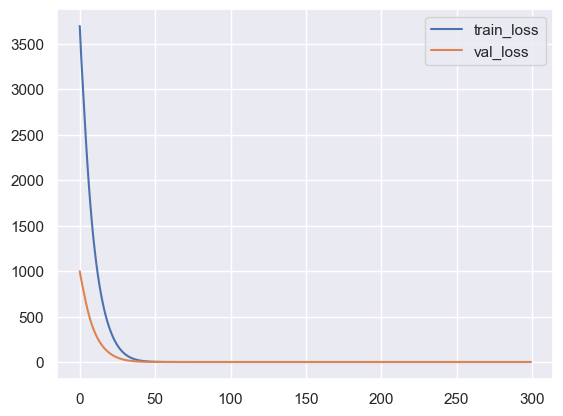

Finished Training
Epoch 1/300


100%|██████████| 7/7 [00:00<00:00, 121.12it/s]


Train Loss: 3672.357452392578


100%|██████████| 2/2 [00:00<00:00, 322.54it/s]


Epoch 2/300


100%|██████████| 7/7 [00:00<00:00, 84.72it/s]


Train Loss: 3254.038848876953


100%|██████████| 2/2 [00:00<00:00, 334.55it/s]


Epoch 3/300


100%|██████████| 7/7 [00:00<00:00, 111.37it/s]


Train Loss: 2902.4219360351562


100%|██████████| 2/2 [00:00<00:00, 309.45it/s]


Epoch 4/300


100%|██████████| 7/7 [00:00<00:00, 120.90it/s]


Train Loss: 2601.1324768066406


100%|██████████| 2/2 [00:00<00:00, 186.41it/s]


Epoch 5/300


100%|██████████| 7/7 [00:00<00:00, 102.64it/s]


Train Loss: 2326.9918823242188


100%|██████████| 2/2 [00:00<00:00, 349.77it/s]


Epoch 6/300


100%|██████████| 7/7 [00:00<00:00, 116.51it/s]


Train Loss: 2077.61474609375


100%|██████████| 2/2 [00:00<00:00, 306.79it/s]


Epoch 7/300


100%|██████████| 7/7 [00:00<00:00, 105.71it/s]


Train Loss: 1852.935546875


100%|██████████| 2/2 [00:00<00:00, 204.29it/s]


Epoch 8/300


100%|██████████| 7/7 [00:00<00:00, 26.52it/s]


Train Loss: 1651.3941497802734


100%|██████████| 2/2 [00:00<00:00, 235.71it/s]


Epoch 9/300


100%|██████████| 7/7 [00:00<00:00, 90.07it/s]


Train Loss: 1471.2191925048828


100%|██████████| 2/2 [00:00<00:00, 406.27it/s]


Epoch 10/300


100%|██████████| 7/7 [00:00<00:00, 88.78it/s]


Train Loss: 1310.1883850097656


100%|██████████| 2/2 [00:00<00:00, 89.16it/s]


Epoch 11/300


100%|██████████| 7/7 [00:00<00:00, 40.25it/s]


Train Loss: 1166.3998718261719


100%|██████████| 2/2 [00:00<00:00, 110.16it/s]


Epoch 12/300


100%|██████████| 7/7 [00:00<00:00, 72.80it/s]


Train Loss: 1037.97607421875


100%|██████████| 2/2 [00:00<00:00, 322.28it/s]


Epoch 13/300


100%|██████████| 7/7 [00:00<00:00, 88.20it/s]


Train Loss: 923.2330093383789


100%|██████████| 2/2 [00:00<00:00, 362.06it/s]


Epoch 14/300


100%|██████████| 7/7 [00:00<00:00, 47.31it/s]


Train Loss: 820.6342849731445


100%|██████████| 2/2 [00:00<00:00, 69.77it/s]


Epoch 15/300


100%|██████████| 7/7 [00:00<00:00, 24.01it/s]


Train Loss: 728.822151184082


100%|██████████| 2/2 [00:00<00:00, 153.78it/s]


Epoch 16/300


100%|██████████| 7/7 [00:00<00:00, 45.96it/s]


Train Loss: 646.5664749145508


100%|██████████| 2/2 [00:00<00:00, 283.85it/s]


Epoch 17/300


100%|██████████| 7/7 [00:00<00:00, 80.56it/s]


Train Loss: 573.0001449584961


100%|██████████| 2/2 [00:00<00:00, 213.42it/s]


Epoch 18/300


100%|██████████| 7/7 [00:00<00:00, 69.32it/s]


Train Loss: 507.07921600341797


100%|██████████| 2/2 [00:00<00:00, 383.50it/s]


Epoch 19/300


100%|██████████| 7/7 [00:00<00:00, 96.58it/s]


Train Loss: 447.9682273864746


100%|██████████| 2/2 [00:00<00:00, 382.19it/s]


Epoch 20/300


100%|██████████| 7/7 [00:00<00:00, 122.12it/s]


Train Loss: 395.0760803222656


100%|██████████| 2/2 [00:00<00:00, 385.81it/s]


Epoch 21/300


100%|██████████| 7/7 [00:00<00:00, 106.73it/s]


Train Loss: 347.7090950012207


100%|██████████| 2/2 [00:00<00:00, 364.29it/s]


Epoch 22/300


100%|██████████| 7/7 [00:00<00:00, 37.77it/s]


Train Loss: 305.42505645751953


100%|██████████| 2/2 [00:00<00:00, 82.98it/s]


Epoch 23/300


100%|██████████| 7/7 [00:00<00:00, 104.03it/s]


Train Loss: 267.6388969421387


100%|██████████| 2/2 [00:00<00:00, 330.62it/s]


Epoch 24/300


100%|██████████| 7/7 [00:00<00:00, 49.66it/s]


Train Loss: 233.96151733398438


100%|██████████| 2/2 [00:00<00:00, 307.41it/s]


Epoch 25/300


100%|██████████| 7/7 [00:00<00:00, 94.10it/s]


Train Loss: 204.07024574279785


100%|██████████| 2/2 [00:00<00:00, 334.78it/s]


Epoch 26/300


100%|██████████| 7/7 [00:00<00:00, 106.10it/s]


Train Loss: 177.48216247558594


100%|██████████| 2/2 [00:00<00:00, 358.18it/s]


Epoch 27/300


100%|██████████| 7/7 [00:00<00:00, 105.83it/s]


Train Loss: 153.98870849609375


100%|██████████| 2/2 [00:00<00:00, 360.37it/s]


Epoch 28/300


100%|██████████| 7/7 [00:00<00:00, 86.89it/s]


Train Loss: 133.24889183044434


100%|██████████| 2/2 [00:00<00:00, 321.29it/s]


Epoch 29/300


100%|██████████| 7/7 [00:00<00:00, 118.96it/s]


Train Loss: 114.98960494995117


100%|██████████| 2/2 [00:00<00:00, 304.51it/s]


Epoch 30/300


100%|██████████| 7/7 [00:00<00:00, 124.22it/s]


Train Loss: 98.9543046951294


100%|██████████| 2/2 [00:00<00:00, 373.56it/s]


Epoch 31/300


100%|██████████| 7/7 [00:00<00:00, 111.72it/s]


Train Loss: 84.91908836364746


100%|██████████| 2/2 [00:00<00:00, 339.32it/s]


Epoch 32/300


100%|██████████| 7/7 [00:00<00:00, 107.53it/s]


Train Loss: 72.65029048919678


100%|██████████| 2/2 [00:00<00:00, 342.88it/s]


Epoch 33/300


100%|██████████| 7/7 [00:00<00:00, 108.97it/s]


Train Loss: 61.9881534576416


100%|██████████| 2/2 [00:00<00:00, 317.82it/s]


Epoch 34/300


100%|██████████| 7/7 [00:00<00:00, 140.73it/s]


Train Loss: 52.75307035446167


100%|██████████| 2/2 [00:00<00:00, 327.08it/s]


Epoch 35/300


100%|██████████| 7/7 [00:00<00:00, 149.44it/s]


Train Loss: 44.75831079483032


100%|██████████| 2/2 [00:00<00:00, 392.39it/s]


Epoch 36/300


100%|██████████| 7/7 [00:00<00:00, 139.11it/s]


Train Loss: 37.857452392578125


100%|██████████| 2/2 [00:00<00:00, 365.36it/s]


Epoch 37/300


100%|██████████| 7/7 [00:00<00:00, 113.52it/s]


Train Loss: 31.936625003814697


100%|██████████| 2/2 [00:00<00:00, 368.18it/s]


Epoch 38/300


100%|██████████| 7/7 [00:00<00:00, 132.61it/s]


Train Loss: 26.86570119857788


100%|██████████| 2/2 [00:00<00:00, 377.93it/s]


Epoch 39/300


100%|██████████| 7/7 [00:00<00:00, 132.09it/s]


Train Loss: 22.523983240127563


100%|██████████| 2/2 [00:00<00:00, 391.39it/s]


Epoch 40/300


100%|██████████| 7/7 [00:00<00:00, 124.84it/s]


Train Loss: 18.83722186088562


100%|██████████| 2/2 [00:00<00:00, 387.38it/s]


Epoch 41/300


100%|██████████| 7/7 [00:00<00:00, 107.24it/s]


Train Loss: 15.707114458084106


100%|██████████| 2/2 [00:00<00:00, 293.56it/s]


Epoch 42/300


100%|██████████| 7/7 [00:00<00:00, 127.08it/s]


Train Loss: 13.056067705154419


100%|██████████| 2/2 [00:00<00:00, 348.19it/s]


Epoch 43/300


100%|██████████| 7/7 [00:00<00:00, 147.94it/s]


Train Loss: 10.839736342430115


100%|██████████| 2/2 [00:00<00:00, 368.79it/s]


Epoch 44/300


100%|██████████| 7/7 [00:00<00:00, 135.36it/s]


Train Loss: 8.955824732780457


100%|██████████| 2/2 [00:00<00:00, 374.76it/s]


Epoch 45/300


100%|██████████| 7/7 [00:00<00:00, 124.85it/s]


Train Loss: 7.381886065006256


100%|██████████| 2/2 [00:00<00:00, 332.50it/s]


Epoch 46/300


100%|██████████| 7/7 [00:00<00:00, 136.08it/s]


Train Loss: 6.069758474826813


100%|██████████| 2/2 [00:00<00:00, 349.71it/s]


Epoch 47/300


100%|██████████| 7/7 [00:00<00:00, 140.70it/s]


Train Loss: 4.973911881446838


100%|██████████| 2/2 [00:00<00:00, 334.39it/s]


Epoch 48/300


100%|██████████| 7/7 [00:00<00:00, 129.22it/s]


Train Loss: 4.061993479728699


100%|██████████| 2/2 [00:00<00:00, 364.58it/s]


Epoch 49/300


100%|██████████| 7/7 [00:00<00:00, 133.43it/s]


Train Loss: 3.3090698421001434


100%|██████████| 2/2 [00:00<00:00, 371.26it/s]


Epoch 50/300


100%|██████████| 7/7 [00:00<00:00, 117.90it/s]


Train Loss: 2.689742833375931


100%|██████████| 2/2 [00:00<00:00, 381.54it/s]


Epoch 51/300


100%|██████████| 7/7 [00:00<00:00, 135.65it/s]


Train Loss: 2.1807433366775513


100%|██████████| 2/2 [00:00<00:00, 386.16it/s]


Epoch 52/300


100%|██████████| 7/7 [00:00<00:00, 78.44it/s]


Train Loss: 1.7667496055364609


100%|██████████| 2/2 [00:00<00:00, 373.13it/s]


Epoch 53/300


100%|██████████| 7/7 [00:00<00:00, 140.19it/s]


Train Loss: 1.426178440451622


100%|██████████| 2/2 [00:00<00:00, 366.97it/s]


Epoch 54/300


100%|██████████| 7/7 [00:00<00:00, 130.05it/s]


Train Loss: 1.1493079364299774


100%|██████████| 2/2 [00:00<00:00, 352.43it/s]


Epoch 55/300


100%|██████████| 7/7 [00:00<00:00, 136.69it/s]


Train Loss: 0.9205694496631622


100%|██████████| 2/2 [00:00<00:00, 372.50it/s]


Epoch 56/300


100%|██████████| 7/7 [00:00<00:00, 126.86it/s]


Train Loss: 0.7380195632576942


100%|██████████| 2/2 [00:00<00:00, 382.41it/s]


Epoch 57/300


100%|██████████| 7/7 [00:00<00:00, 112.62it/s]


Train Loss: 0.5930152162909508


100%|██████████| 2/2 [00:00<00:00, 397.94it/s]


Epoch 58/300


100%|██████████| 7/7 [00:00<00:00, 117.85it/s]


Train Loss: 0.48288916796445847


100%|██████████| 2/2 [00:00<00:00, 380.61it/s]


Epoch 59/300


100%|██████████| 7/7 [00:00<00:00, 137.17it/s]


Train Loss: 0.38345279172062874


100%|██████████| 2/2 [00:00<00:00, 355.00it/s]


Epoch 60/300


100%|██████████| 7/7 [00:00<00:00, 121.57it/s]


Train Loss: 0.3083704374730587


100%|██████████| 2/2 [00:00<00:00, 294.00it/s]


Epoch 61/300


100%|██████████| 7/7 [00:00<00:00, 136.63it/s]


Train Loss: 0.2459763139486313


100%|██████████| 2/2 [00:00<00:00, 370.18it/s]


Epoch 62/300


100%|██████████| 7/7 [00:00<00:00, 129.45it/s]


Train Loss: 0.19780106469988823


100%|██████████| 2/2 [00:00<00:00, 327.40it/s]


Epoch 63/300


100%|██████████| 7/7 [00:00<00:00, 135.45it/s]


Train Loss: 0.1597832404077053


100%|██████████| 2/2 [00:00<00:00, 348.99it/s]


Epoch 64/300


100%|██████████| 7/7 [00:00<00:00, 141.15it/s]


Train Loss: 0.1297703580930829


100%|██████████| 2/2 [00:00<00:00, 189.63it/s]


Epoch 65/300


100%|██████████| 7/7 [00:00<00:00, 136.69it/s]


Train Loss: 0.10847157705575228


100%|██████████| 2/2 [00:00<00:00, 394.80it/s]


Epoch 66/300


100%|██████████| 7/7 [00:00<00:00, 135.14it/s]


Train Loss: 0.08812717627733946


100%|██████████| 2/2 [00:00<00:00, 391.48it/s]


Epoch 67/300


100%|██████████| 7/7 [00:00<00:00, 126.08it/s]


Train Loss: 0.07508943509310484


100%|██████████| 2/2 [00:00<00:00, 351.62it/s]


Epoch 68/300


100%|██████████| 7/7 [00:00<00:00, 113.49it/s]


Train Loss: 0.06613685842603445


100%|██████████| 2/2 [00:00<00:00, 388.07it/s]


Epoch 69/300


100%|██████████| 7/7 [00:00<00:00, 133.37it/s]


Train Loss: 0.054646295960992575


100%|██████████| 2/2 [00:00<00:00, 236.25it/s]


Epoch 70/300


100%|██████████| 7/7 [00:00<00:00, 133.97it/s]


Train Loss: 0.05236090254038572


100%|██████████| 2/2 [00:00<00:00, 390.46it/s]


Epoch 71/300


100%|██████████| 7/7 [00:00<00:00, 146.72it/s]


Train Loss: 0.048041801201179624


100%|██████████| 2/2 [00:00<00:00, 309.50it/s]


Epoch 72/300


100%|██████████| 7/7 [00:00<00:00, 137.42it/s]


Train Loss: 0.0423767170868814


100%|██████████| 2/2 [00:00<00:00, 365.64it/s]


Epoch 73/300


100%|██████████| 7/7 [00:00<00:00, 133.17it/s]


Train Loss: 0.04058607388287783


100%|██████████| 2/2 [00:00<00:00, 382.78it/s]


Epoch 74/300


100%|██████████| 7/7 [00:00<00:00, 127.85it/s]


Train Loss: 0.033484093961305916


100%|██████████| 2/2 [00:00<00:00, 404.68it/s]


Epoch 75/300


100%|██████████| 7/7 [00:00<00:00, 143.01it/s]


Train Loss: 0.031946525909006596


100%|██████████| 2/2 [00:00<00:00, 373.51it/s]


Epoch 76/300


100%|██████████| 7/7 [00:00<00:00, 136.86it/s]


Train Loss: 0.0341598124941811


100%|██████████| 2/2 [00:00<00:00, 420.80it/s]


Epoch 77/300


100%|██████████| 7/7 [00:00<00:00, 130.85it/s]


Train Loss: 0.02777400182094425


100%|██████████| 2/2 [00:00<00:00, 394.78it/s]


Epoch 78/300


100%|██████████| 7/7 [00:00<00:00, 143.64it/s]


Train Loss: 0.028648220817558467


100%|██████████| 2/2 [00:00<00:00, 403.86it/s]


Epoch 79/300


100%|██████████| 7/7 [00:00<00:00, 145.88it/s]


Train Loss: 0.02865422493778169


100%|██████████| 2/2 [00:00<00:00, 388.87it/s]


Epoch 80/300


100%|██████████| 7/7 [00:00<00:00, 121.49it/s]


Train Loss: 0.027359667234122753


100%|██████████| 2/2 [00:00<00:00, 360.17it/s]


Epoch 81/300


100%|██████████| 7/7 [00:00<00:00, 137.69it/s]


Train Loss: 0.0268811141140759


100%|██████████| 2/2 [00:00<00:00, 396.61it/s]


Epoch 82/300


100%|██████████| 7/7 [00:00<00:00, 131.17it/s]


Train Loss: 0.027675185701809824


100%|██████████| 2/2 [00:00<00:00, 404.86it/s]


Epoch 83/300


100%|██████████| 7/7 [00:00<00:00, 128.38it/s]


Train Loss: 0.029403391992673278


100%|██████████| 2/2 [00:00<00:00, 413.05it/s]


Epoch 84/300


100%|██████████| 7/7 [00:00<00:00, 142.32it/s]


Train Loss: 0.025411361479200423


100%|██████████| 2/2 [00:00<00:00, 334.90it/s]


Epoch 85/300


100%|██████████| 7/7 [00:00<00:00, 85.05it/s]


Train Loss: 0.024906754260882735


100%|██████████| 2/2 [00:00<00:00, 327.28it/s]


Epoch 86/300


100%|██████████| 7/7 [00:00<00:00, 65.56it/s]


Train Loss: 0.02616035018581897


100%|██████████| 2/2 [00:00<00:00, 401.54it/s]


Epoch 87/300


100%|██████████| 7/7 [00:00<00:00, 136.49it/s]


Train Loss: 0.030390893341973424


100%|██████████| 2/2 [00:00<00:00, 296.69it/s]


Epoch 88/300


100%|██████████| 7/7 [00:00<00:00, 132.28it/s]


Train Loss: 0.026156535954214633


100%|██████████| 2/2 [00:00<00:00, 401.22it/s]


Epoch 89/300


100%|██████████| 7/7 [00:00<00:00, 119.92it/s]


Train Loss: 0.03189165994990617


100%|██████████| 2/2 [00:00<00:00, 399.19it/s]


Epoch 90/300


100%|██████████| 7/7 [00:00<00:00, 129.83it/s]


Train Loss: 0.03381781303323805


100%|██████████| 2/2 [00:00<00:00, 412.54it/s]


Epoch 91/300


100%|██████████| 7/7 [00:00<00:00, 126.46it/s]


Train Loss: 0.02949135925155133


100%|██████████| 2/2 [00:00<00:00, 356.37it/s]


Epoch 92/300


100%|██████████| 7/7 [00:00<00:00, 132.17it/s]


Train Loss: 0.029694717843085527


100%|██████████| 2/2 [00:00<00:00, 404.21it/s]


Epoch 93/300


100%|██████████| 7/7 [00:00<00:00, 145.48it/s]


Train Loss: 0.027861688286066055


100%|██████████| 2/2 [00:00<00:00, 402.91it/s]


Epoch 94/300


100%|██████████| 7/7 [00:00<00:00, 148.04it/s]


Train Loss: 0.02833085972815752


100%|██████████| 2/2 [00:00<00:00, 368.86it/s]


Epoch 95/300


100%|██████████| 7/7 [00:00<00:00, 133.49it/s]


Train Loss: 0.028580991900525987


100%|██████████| 2/2 [00:00<00:00, 332.55it/s]


Epoch 96/300


100%|██████████| 7/7 [00:00<00:00, 121.76it/s]


Train Loss: 0.027905446710065007


100%|██████████| 2/2 [00:00<00:00, 397.39it/s]


Epoch 97/300


100%|██████████| 7/7 [00:00<00:00, 134.64it/s]


Train Loss: 0.03145501064136624


100%|██████████| 2/2 [00:00<00:00, 372.71it/s]


Epoch 98/300


100%|██████████| 7/7 [00:00<00:00, 142.92it/s]


Train Loss: 0.024813352269120514


100%|██████████| 2/2 [00:00<00:00, 404.04it/s]


Epoch 99/300


100%|██████████| 7/7 [00:00<00:00, 150.03it/s]


Train Loss: 0.02707007818389684


100%|██████████| 2/2 [00:00<00:00, 387.97it/s]


Epoch 100/300


100%|██████████| 7/7 [00:00<00:00, 132.75it/s]


Train Loss: 0.024002685211598873


100%|██████████| 2/2 [00:00<00:00, 407.23it/s]


Epoch 101/300


100%|██████████| 7/7 [00:00<00:00, 136.67it/s]


Train Loss: 0.024934488930739462


100%|██████████| 2/2 [00:00<00:00, 403.78it/s]


Epoch 102/300


100%|██████████| 7/7 [00:00<00:00, 119.61it/s]


Train Loss: 0.024457705789245665


100%|██████████| 2/2 [00:00<00:00, 352.67it/s]


Epoch 103/300


100%|██████████| 7/7 [00:00<00:00, 119.70it/s]


Train Loss: 0.0247505345614627


100%|██████████| 2/2 [00:00<00:00, 325.20it/s]


Epoch 104/300


100%|██████████| 7/7 [00:00<00:00, 115.54it/s]


Train Loss: 0.0252623138949275


100%|██████████| 2/2 [00:00<00:00, 134.45it/s]


Epoch 105/300


100%|██████████| 7/7 [00:00<00:00, 121.88it/s]


Train Loss: 0.024532327079214156


100%|██████████| 2/2 [00:00<00:00, 278.36it/s]


Epoch 106/300


100%|██████████| 7/7 [00:00<00:00, 109.56it/s]


Train Loss: 0.026220391504466534


100%|██████████| 2/2 [00:00<00:00, 239.72it/s]


Epoch 107/300


100%|██████████| 7/7 [00:00<00:00, 139.94it/s]


Train Loss: 0.025609001982957125


100%|██████████| 2/2 [00:00<00:00, 265.01it/s]


Epoch 108/300


100%|██████████| 7/7 [00:00<00:00, 111.97it/s]


Train Loss: 0.026445839554071426


100%|██████████| 2/2 [00:00<00:00, 351.58it/s]


Epoch 109/300


100%|██████████| 7/7 [00:00<00:00, 113.34it/s]


Train Loss: 0.02712777053238824


100%|██████████| 2/2 [00:00<00:00, 358.29it/s]


Epoch 110/300


100%|██████████| 7/7 [00:00<00:00, 120.65it/s]


Train Loss: 0.033326597418636084


100%|██████████| 2/2 [00:00<00:00, 386.18it/s]


Epoch 111/300


100%|██████████| 7/7 [00:00<00:00, 133.04it/s]


Train Loss: 0.0283859153278172


100%|██████████| 2/2 [00:00<00:00, 370.37it/s]


Epoch 112/300


100%|██████████| 7/7 [00:00<00:00, 106.66it/s]


Train Loss: 0.027818395872600377


100%|██████████| 2/2 [00:00<00:00, 355.81it/s]


Epoch 113/300


100%|██████████| 7/7 [00:00<00:00, 118.06it/s]


Train Loss: 0.025464151869527996


100%|██████████| 2/2 [00:00<00:00, 342.17it/s]


Epoch 114/300


100%|██████████| 7/7 [00:00<00:00, 121.33it/s]


Train Loss: 0.02813528338447213


100%|██████████| 2/2 [00:00<00:00, 342.46it/s]


Epoch 115/300


100%|██████████| 7/7 [00:00<00:00, 107.22it/s]


Train Loss: 0.025051641394384205


100%|██████████| 2/2 [00:00<00:00, 163.43it/s]


Epoch 116/300


100%|██████████| 7/7 [00:00<00:00, 78.73it/s]


Train Loss: 0.024541827151551843


100%|██████████| 2/2 [00:00<00:00, 337.57it/s]


Epoch 117/300


100%|██████████| 7/7 [00:00<00:00, 114.13it/s]


Train Loss: 0.024381883267778903


100%|██████████| 2/2 [00:00<00:00, 361.80it/s]


Epoch 118/300


100%|██████████| 7/7 [00:00<00:00, 120.90it/s]


Train Loss: 0.024657521746121347


100%|██████████| 2/2 [00:00<00:00, 171.16it/s]


Epoch 119/300


100%|██████████| 7/7 [00:00<00:00, 118.16it/s]


Train Loss: 0.024043660145252943


100%|██████████| 2/2 [00:00<00:00, 289.48it/s]


Epoch 120/300


100%|██████████| 7/7 [00:00<00:00, 91.48it/s]


Train Loss: 0.029133087024092674


100%|██████████| 2/2 [00:00<00:00, 390.10it/s]


Epoch 121/300


100%|██████████| 7/7 [00:00<00:00, 120.64it/s]


Train Loss: 0.027017185930162668


100%|██████████| 2/2 [00:00<00:00, 340.71it/s]


Epoch 122/300


100%|██████████| 7/7 [00:00<00:00, 118.19it/s]


Train Loss: 0.025941490195691586


100%|██████████| 2/2 [00:00<00:00, 367.86it/s]


Epoch 123/300


100%|██████████| 7/7 [00:00<00:00, 124.15it/s]


Train Loss: 0.025277775712311268


100%|██████████| 2/2 [00:00<00:00, 382.59it/s]


Epoch 124/300


100%|██████████| 7/7 [00:00<00:00, 125.73it/s]


Train Loss: 0.027580554597079754


100%|██████████| 2/2 [00:00<00:00, 355.68it/s]


Epoch 125/300


100%|██████████| 7/7 [00:00<00:00, 114.47it/s]


Train Loss: 0.028489621123299003


100%|██████████| 2/2 [00:00<00:00, 345.89it/s]


Epoch 126/300


100%|██████████| 7/7 [00:00<00:00, 106.46it/s]


Train Loss: 0.02478456898825243


100%|██████████| 2/2 [00:00<00:00, 306.38it/s]


Epoch 127/300


100%|██████████| 7/7 [00:00<00:00, 113.76it/s]


Train Loss: 0.024350647581741214


100%|██████████| 2/2 [00:00<00:00, 366.55it/s]


Epoch 128/300


100%|██████████| 7/7 [00:00<00:00, 113.67it/s]


Train Loss: 0.025849098921753466


100%|██████████| 2/2 [00:00<00:00, 306.37it/s]


Epoch 129/300


100%|██████████| 7/7 [00:00<00:00, 113.09it/s]


Train Loss: 0.024253779090940952


100%|██████████| 2/2 [00:00<00:00, 175.00it/s]


Epoch 130/300


100%|██████████| 7/7 [00:00<00:00, 121.14it/s]


Train Loss: 0.02796922076959163


100%|██████████| 2/2 [00:00<00:00, 174.30it/s]


Epoch 131/300


100%|██████████| 7/7 [00:00<00:00, 80.47it/s]


Train Loss: 0.024315346032381058


100%|██████████| 2/2 [00:00<00:00, 269.57it/s]


Epoch 132/300


100%|██████████| 7/7 [00:00<00:00, 104.49it/s]


Train Loss: 0.025656057405285537


100%|██████████| 2/2 [00:00<00:00, 311.44it/s]


Epoch 133/300


100%|██████████| 7/7 [00:00<00:00, 110.31it/s]


Train Loss: 0.02786695770919323


100%|██████████| 2/2 [00:00<00:00, 327.12it/s]


Epoch 134/300


100%|██████████| 7/7 [00:00<00:00, 123.19it/s]


Train Loss: 0.029261325602419674


100%|██████████| 2/2 [00:00<00:00, 358.82it/s]


Epoch 135/300


100%|██████████| 7/7 [00:00<00:00, 119.61it/s]


Train Loss: 0.025038348918315023


100%|██████████| 2/2 [00:00<00:00, 326.21it/s]


Epoch 136/300


100%|██████████| 7/7 [00:00<00:00, 97.13it/s]


Train Loss: 0.031041141599416733


100%|██████████| 2/2 [00:00<00:00, 263.89it/s]


Epoch 137/300


100%|██████████| 7/7 [00:00<00:00, 124.35it/s]


Train Loss: 0.03246962453704327


100%|██████████| 2/2 [00:00<00:00, 270.75it/s]


Epoch 138/300


100%|██████████| 7/7 [00:00<00:00, 119.91it/s]


Train Loss: 0.03316140966489911


100%|██████████| 2/2 [00:00<00:00, 363.38it/s]


Epoch 139/300


100%|██████████| 7/7 [00:00<00:00, 111.38it/s]


Train Loss: 0.02993095852434635


100%|██████████| 2/2 [00:00<00:00, 166.45it/s]


Epoch 140/300


100%|██████████| 7/7 [00:00<00:00, 123.62it/s]


Train Loss: 0.028637622948735952


100%|██████████| 2/2 [00:00<00:00, 360.89it/s]


Epoch 141/300


100%|██████████| 7/7 [00:00<00:00, 115.96it/s]


Train Loss: 0.0294710008893162


100%|██████████| 2/2 [00:00<00:00, 375.38it/s]


Epoch 142/300


100%|██████████| 7/7 [00:00<00:00, 130.25it/s]


Train Loss: 0.032140106544829905


100%|██████████| 2/2 [00:00<00:00, 183.15it/s]


Epoch 143/300


100%|██████████| 7/7 [00:00<00:00, 59.38it/s]


Train Loss: 0.026011819136328995


100%|██████████| 2/2 [00:00<00:00, 286.32it/s]


Epoch 144/300


100%|██████████| 7/7 [00:00<00:00, 73.03it/s]


Train Loss: 0.027525689685717225


100%|██████████| 2/2 [00:00<00:00, 329.11it/s]


Epoch 145/300


100%|██████████| 7/7 [00:00<00:00, 93.98it/s]


Train Loss: 0.025688367430120707


100%|██████████| 2/2 [00:00<00:00, 322.27it/s]


Epoch 146/300


100%|██████████| 7/7 [00:00<00:00, 100.80it/s]


Train Loss: 0.030030879308469594


100%|██████████| 2/2 [00:00<00:00, 356.11it/s]


Epoch 147/300


100%|██████████| 7/7 [00:00<00:00, 121.34it/s]


Train Loss: 0.02984560956247151


100%|██████████| 2/2 [00:00<00:00, 377.85it/s]


Epoch 148/300


100%|██████████| 7/7 [00:00<00:00, 118.69it/s]


Train Loss: 0.02786527608986944


100%|██████████| 2/2 [00:00<00:00, 352.23it/s]


Epoch 149/300


100%|██████████| 7/7 [00:00<00:00, 100.92it/s]


Train Loss: 0.031008343445137143


100%|██████████| 2/2 [00:00<00:00, 41.92it/s]


Epoch 150/300


100%|██████████| 7/7 [00:00<00:00, 113.11it/s]


Train Loss: 0.03406269091647118


100%|██████████| 2/2 [00:00<00:00, 356.87it/s]


Epoch 151/300


100%|██████████| 7/7 [00:00<00:00, 109.06it/s]


Train Loss: 0.030127962469123304


100%|██████████| 2/2 [00:00<00:00, 237.84it/s]


Epoch 152/300


100%|██████████| 7/7 [00:00<00:00, 111.31it/s]


Train Loss: 0.027803969336673617


100%|██████████| 2/2 [00:00<00:00, 257.46it/s]


Epoch 153/300


100%|██████████| 7/7 [00:00<00:00, 50.40it/s]


Train Loss: 0.025293236365541816


100%|██████████| 2/2 [00:00<00:00, 42.47it/s]


Epoch 154/300


100%|██████████| 7/7 [00:00<00:00, 108.26it/s]


Train Loss: 0.025072638294659555


100%|██████████| 2/2 [00:00<00:00, 269.95it/s]


Epoch 155/300


100%|██████████| 7/7 [00:00<00:00, 120.59it/s]


Train Loss: 0.023864978458732367


100%|██████████| 2/2 [00:00<00:00, 47.66it/s]


Epoch 156/300


100%|██████████| 7/7 [00:00<00:00, 89.34it/s]


Train Loss: 0.028521022177301347


100%|██████████| 2/2 [00:00<00:00, 72.24it/s]


Epoch 157/300


100%|██████████| 7/7 [00:00<00:00, 24.70it/s]


Train Loss: 0.026675132801756263


100%|██████████| 2/2 [00:00<00:00, 109.53it/s]


Epoch 158/300


100%|██████████| 7/7 [00:00<00:00, 57.11it/s]


Train Loss: 0.026851878967136145


100%|██████████| 2/2 [00:00<00:00, 267.03it/s]


Epoch 159/300


100%|██████████| 7/7 [00:00<00:00, 121.85it/s]


Train Loss: 0.025218954891897738


100%|██████████| 2/2 [00:00<00:00, 381.40it/s]


Epoch 160/300


100%|██████████| 7/7 [00:00<00:00, 54.51it/s]


Train Loss: 0.03033879236318171


100%|██████████| 2/2 [00:00<00:00, 237.31it/s]


Epoch 161/300


100%|██████████| 7/7 [00:00<00:00, 26.48it/s]


Train Loss: 0.024340124102309346


100%|██████████| 2/2 [00:00<00:00, 102.55it/s]


Epoch 162/300


100%|██████████| 7/7 [00:00<00:00, 49.58it/s]


Train Loss: 0.0250853382749483


100%|██████████| 2/2 [00:00<00:00, 157.06it/s]


Epoch 163/300


100%|██████████| 7/7 [00:00<00:00, 137.69it/s]


Train Loss: 0.023861606197897345


100%|██████████| 2/2 [00:00<00:00, 344.81it/s]


Epoch 164/300


100%|██████████| 7/7 [00:00<00:00, 149.80it/s]


Train Loss: 0.02673694968689233


100%|██████████| 2/2 [00:00<00:00, 410.16it/s]


Epoch 165/300


100%|██████████| 7/7 [00:00<00:00, 138.97it/s]


Train Loss: 0.03257347329054028


100%|██████████| 2/2 [00:00<00:00, 441.69it/s]


Epoch 166/300


100%|██████████| 7/7 [00:00<00:00, 131.34it/s]


Train Loss: 0.026909077423624694


100%|██████████| 2/2 [00:00<00:00, 33.59it/s]


Epoch 167/300


100%|██████████| 7/7 [00:00<00:00, 127.13it/s]


Train Loss: 0.027878088352736086


100%|██████████| 2/2 [00:00<00:00, 389.43it/s]


Epoch 168/300


100%|██████████| 7/7 [00:00<00:00, 117.95it/s]


Train Loss: 0.02971803699620068


100%|██████████| 2/2 [00:00<00:00, 361.10it/s]


Epoch 169/300


100%|██████████| 7/7 [00:00<00:00, 122.31it/s]


Train Loss: 0.026579318568110466


100%|██████████| 2/2 [00:00<00:00, 162.46it/s]


Epoch 170/300


100%|██████████| 7/7 [00:00<00:00, 61.00it/s]


Train Loss: 0.02700362936593592


100%|██████████| 2/2 [00:00<00:00, 84.74it/s]


Epoch 171/300


100%|██████████| 7/7 [00:00<00:00, 44.61it/s]


Train Loss: 0.025347876828163862


100%|██████████| 2/2 [00:00<00:00, 169.33it/s]


Epoch 172/300


100%|██████████| 7/7 [00:00<00:00, 36.90it/s]


Train Loss: 0.024037215509451926


100%|██████████| 2/2 [00:00<00:00, 65.12it/s]


Epoch 173/300


100%|██████████| 7/7 [00:00<00:00, 59.63it/s]


Train Loss: 0.027572827297262847


100%|██████████| 2/2 [00:00<00:00, 278.56it/s]


Epoch 174/300


100%|██████████| 7/7 [00:00<00:00, 45.32it/s]


Train Loss: 0.025873455044347793


100%|██████████| 2/2 [00:00<00:00, 200.36it/s]


Epoch 175/300


100%|██████████| 7/7 [00:00<00:00, 51.75it/s]


Train Loss: 0.025324066635221243


100%|██████████| 2/2 [00:00<00:00, 399.84it/s]


Epoch 176/300


100%|██████████| 7/7 [00:00<00:00, 106.58it/s]


Train Loss: 0.026904356433078647


100%|██████████| 2/2 [00:00<00:00, 406.35it/s]


Epoch 177/300


100%|██████████| 7/7 [00:00<00:00, 87.92it/s]


Train Loss: 0.02685167919844389


100%|██████████| 2/2 [00:00<00:00, 310.82it/s]


Epoch 178/300


100%|██████████| 7/7 [00:00<00:00, 142.92it/s]


Train Loss: 0.02482568530831486


100%|██████████| 2/2 [00:00<00:00, 413.37it/s]


Epoch 179/300


100%|██████████| 7/7 [00:00<00:00, 135.75it/s]


Train Loss: 0.026149702607654035


100%|██████████| 2/2 [00:00<00:00, 403.80it/s]


Epoch 180/300


100%|██████████| 7/7 [00:00<00:00, 130.83it/s]


Train Loss: 0.026997035718522966


100%|██████████| 2/2 [00:00<00:00, 186.75it/s]


Epoch 181/300


100%|██████████| 7/7 [00:00<00:00, 74.26it/s]


Train Loss: 0.028414556523784995


100%|██████████| 2/2 [00:00<00:00, 374.59it/s]


Epoch 182/300


100%|██████████| 7/7 [00:00<00:00, 135.79it/s]


Train Loss: 0.02578854060266167


100%|██████████| 2/2 [00:00<00:00, 308.53it/s]


Epoch 183/300


100%|██████████| 7/7 [00:00<00:00, 130.57it/s]


Train Loss: 0.026616046903654933


100%|██████████| 2/2 [00:00<00:00, 344.66it/s]


Epoch 184/300


100%|██████████| 7/7 [00:00<00:00, 131.47it/s]


Train Loss: 0.03307137917727232


100%|██████████| 2/2 [00:00<00:00, 363.82it/s]


Epoch 185/300


100%|██████████| 7/7 [00:00<00:00, 123.33it/s]


Train Loss: 0.0266126204514876


100%|██████████| 2/2 [00:00<00:00, 348.32it/s]


Epoch 186/300


100%|██████████| 7/7 [00:00<00:00, 66.19it/s]


Train Loss: 0.027084127184934914


100%|██████████| 2/2 [00:00<00:00, 138.36it/s]


Epoch 187/300


100%|██████████| 7/7 [00:00<00:00, 127.18it/s]


Train Loss: 0.025661030784249306


100%|██████████| 2/2 [00:00<00:00, 336.93it/s]


Epoch 188/300


100%|██████████| 7/7 [00:00<00:00, 125.99it/s]


Train Loss: 0.024686483666300774


100%|██████████| 2/2 [00:00<00:00, 337.91it/s]


Epoch 189/300


100%|██████████| 7/7 [00:00<00:00, 40.44it/s]


Train Loss: 0.02440211724024266


100%|██████████| 2/2 [00:00<00:00, 145.36it/s]


Epoch 190/300


100%|██████████| 7/7 [00:00<00:00, 37.68it/s]


Train Loss: 0.02727779361885041


100%|██████████| 2/2 [00:00<00:00, 243.69it/s]


Epoch 191/300


100%|██████████| 7/7 [00:00<00:00, 78.43it/s]


Train Loss: 0.024157906998880208


100%|██████████| 2/2 [00:00<00:00, 244.02it/s]


Epoch 192/300


100%|██████████| 7/7 [00:00<00:00, 83.38it/s]


Train Loss: 0.024944516830146313


100%|██████████| 2/2 [00:00<00:00, 322.69it/s]


Epoch 193/300


100%|██████████| 7/7 [00:00<00:00, 76.33it/s]


Train Loss: 0.02709340734872967


100%|██████████| 2/2 [00:00<00:00, 103.91it/s]


Epoch 194/300


100%|██████████| 7/7 [00:00<00:00, 52.27it/s]


Train Loss: 0.02585881669074297


100%|██████████| 2/2 [00:00<00:00, 266.46it/s]


Epoch 195/300


100%|██████████| 7/7 [00:00<00:00, 130.27it/s]


Train Loss: 0.025176055496558547


100%|██████████| 2/2 [00:00<00:00, 357.59it/s]


Epoch 196/300


100%|██████████| 7/7 [00:00<00:00, 77.10it/s]


Train Loss: 0.03174725454300642


100%|██████████| 2/2 [00:00<00:00, 214.48it/s]


Epoch 197/300


100%|██████████| 7/7 [00:00<00:00, 40.92it/s]


Train Loss: 0.026667463942430913


100%|██████████| 2/2 [00:00<00:00, 118.11it/s]


Epoch 198/300


100%|██████████| 7/7 [00:00<00:00, 24.10it/s]


Train Loss: 0.02628588816151023


100%|██████████| 2/2 [00:00<00:00, 275.59it/s]


Epoch 199/300


100%|██████████| 7/7 [00:00<00:00, 92.03it/s]


Train Loss: 0.026647600810974836


100%|██████████| 2/2 [00:00<00:00, 398.55it/s]


Epoch 200/300


100%|██████████| 7/7 [00:00<00:00, 127.03it/s]


Train Loss: 0.02566410682629794


100%|██████████| 2/2 [00:00<00:00, 400.81it/s]


Epoch 201/300


100%|██████████| 7/7 [00:00<00:00, 115.98it/s]


Train Loss: 0.0252910751150921


100%|██████████| 2/2 [00:00<00:00, 182.81it/s]


Epoch 202/300


100%|██████████| 7/7 [00:00<00:00, 87.29it/s]


Train Loss: 0.02631183003541082


100%|██████████| 2/2 [00:00<00:00, 194.22it/s]


Epoch 203/300


100%|██████████| 7/7 [00:00<00:00, 117.37it/s]


Train Loss: 0.028677658876404166


100%|██████████| 2/2 [00:00<00:00, 197.89it/s]


Epoch 204/300


100%|██████████| 7/7 [00:00<00:00, 113.98it/s]


Train Loss: 0.026439283974468708


100%|██████████| 2/2 [00:00<00:00, 385.20it/s]


Epoch 205/300


100%|██████████| 7/7 [00:00<00:00, 128.89it/s]


Train Loss: 0.026202542358078063


100%|██████████| 2/2 [00:00<00:00, 359.53it/s]


Epoch 206/300


100%|██████████| 7/7 [00:00<00:00, 76.12it/s]


Train Loss: 0.026651307358406484


100%|██████████| 2/2 [00:00<00:00, 240.76it/s]


Epoch 207/300


100%|██████████| 7/7 [00:00<00:00, 110.39it/s]


Train Loss: 0.029956144746392965


100%|██████████| 2/2 [00:00<00:00, 371.88it/s]


Epoch 208/300


100%|██████████| 7/7 [00:00<00:00, 75.50it/s]


Train Loss: 0.025533805368468165


100%|██████████| 2/2 [00:00<00:00, 289.97it/s]


Epoch 209/300


100%|██████████| 7/7 [00:00<00:00, 95.96it/s]


Train Loss: 0.031597577850334346


100%|██████████| 2/2 [00:00<00:00, 376.64it/s]


Epoch 210/300


100%|██████████| 7/7 [00:00<00:00, 108.15it/s]


Train Loss: 0.025194310292135924


100%|██████████| 2/2 [00:00<00:00, 340.82it/s]


Epoch 211/300


100%|██████████| 7/7 [00:00<00:00, 85.75it/s]


Train Loss: 0.024973967112600803


100%|██████████| 2/2 [00:00<00:00, 88.46it/s]


Epoch 212/300


100%|██████████| 7/7 [00:00<00:00, 100.26it/s]


Train Loss: 0.02816716069355607


100%|██████████| 2/2 [00:00<00:00, 381.39it/s]


Epoch 213/300


100%|██████████| 7/7 [00:00<00:00, 106.01it/s]


Train Loss: 0.026784462155774236


100%|██████████| 2/2 [00:00<00:00, 246.81it/s]


Epoch 214/300


100%|██████████| 7/7 [00:00<00:00, 93.08it/s]


Train Loss: 0.02481356606585905


100%|██████████| 2/2 [00:00<00:00, 322.94it/s]


Epoch 215/300


100%|██████████| 7/7 [00:00<00:00, 95.62it/s]


Train Loss: 0.025548440171405673


100%|██████████| 2/2 [00:00<00:00, 375.73it/s]


Epoch 216/300


100%|██████████| 7/7 [00:00<00:00, 130.03it/s]


Train Loss: 0.025661734398454428


100%|██████████| 2/2 [00:00<00:00, 365.23it/s]


Epoch 217/300


100%|██████████| 7/7 [00:00<00:00, 132.60it/s]


Train Loss: 0.02516001259209588


100%|██████████| 2/2 [00:00<00:00, 320.86it/s]


Epoch 218/300


100%|██████████| 7/7 [00:00<00:00, 116.71it/s]


Train Loss: 0.026729564182460308


100%|██████████| 2/2 [00:00<00:00, 185.96it/s]


Epoch 219/300


100%|██████████| 7/7 [00:00<00:00, 121.18it/s]


Train Loss: 0.034605105174705386


100%|██████████| 2/2 [00:00<00:00, 261.20it/s]


Epoch 220/300


100%|██████████| 7/7 [00:00<00:00, 119.44it/s]


Train Loss: 0.02877791877835989


100%|██████████| 2/2 [00:00<00:00, 375.60it/s]


Epoch 221/300


100%|██████████| 7/7 [00:00<00:00, 110.94it/s]


Train Loss: 0.028197886189445853


100%|██████████| 2/2 [00:00<00:00, 371.77it/s]


Epoch 222/300


100%|██████████| 7/7 [00:00<00:00, 92.89it/s]


Train Loss: 0.02697781566530466


100%|██████████| 2/2 [00:00<00:00, 308.79it/s]


Epoch 223/300


100%|██████████| 7/7 [00:00<00:00, 113.49it/s]


Train Loss: 0.024959906586445868


100%|██████████| 2/2 [00:00<00:00, 308.54it/s]


Epoch 224/300


100%|██████████| 7/7 [00:00<00:00, 70.02it/s]


Train Loss: 0.024664933094754815


100%|██████████| 2/2 [00:00<00:00, 364.50it/s]


Epoch 225/300


100%|██████████| 7/7 [00:00<00:00, 124.85it/s]


Train Loss: 0.025400102720595896


100%|██████████| 2/2 [00:00<00:00, 270.49it/s]


Epoch 226/300


100%|██████████| 7/7 [00:00<00:00, 128.82it/s]


Train Loss: 0.0281127366470173


100%|██████████| 2/2 [00:00<00:00, 229.37it/s]


Epoch 227/300


100%|██████████| 7/7 [00:00<00:00, 116.80it/s]


Train Loss: 0.025942778564058244


100%|██████████| 2/2 [00:00<00:00, 340.42it/s]


Epoch 228/300


100%|██████████| 7/7 [00:00<00:00, 101.31it/s]


Train Loss: 0.030579806421883404


100%|██████████| 2/2 [00:00<00:00, 406.15it/s]


Epoch 229/300


100%|██████████| 7/7 [00:00<00:00, 121.72it/s]


Train Loss: 0.025092855794355273


100%|██████████| 2/2 [00:00<00:00, 341.64it/s]


Epoch 230/300


100%|██████████| 7/7 [00:00<00:00, 118.33it/s]


Train Loss: 0.02477645070757717


100%|██████████| 2/2 [00:00<00:00, 359.98it/s]


Epoch 231/300


100%|██████████| 7/7 [00:00<00:00, 95.10it/s]


Train Loss: 0.02566808508709073


100%|██████████| 2/2 [00:00<00:00, 348.55it/s]


Epoch 232/300


100%|██████████| 7/7 [00:00<00:00, 83.90it/s]


Train Loss: 0.029145702719688416


100%|██████████| 2/2 [00:00<00:00, 299.49it/s]


Epoch 233/300


100%|██████████| 7/7 [00:00<00:00, 115.76it/s]


Train Loss: 0.026101847179234028


100%|██████████| 2/2 [00:00<00:00, 382.85it/s]


Epoch 234/300


100%|██████████| 7/7 [00:00<00:00, 129.82it/s]


Train Loss: 0.029673201963305473


100%|██████████| 2/2 [00:00<00:00, 123.75it/s]


Epoch 235/300


100%|██████████| 7/7 [00:00<00:00, 127.71it/s]


Train Loss: 0.026475036283954978


100%|██████████| 2/2 [00:00<00:00, 316.71it/s]


Epoch 236/300


100%|██████████| 7/7 [00:00<00:00, 107.06it/s]


Train Loss: 0.027709323563612998


100%|██████████| 2/2 [00:00<00:00, 347.41it/s]


Epoch 237/300


100%|██████████| 7/7 [00:00<00:00, 125.12it/s]


Train Loss: 0.03348471876233816


100%|██████████| 2/2 [00:00<00:00, 372.43it/s]


Epoch 238/300


100%|██████████| 7/7 [00:00<00:00, 110.33it/s]


Train Loss: 0.026250269846059382


100%|██████████| 2/2 [00:00<00:00, 367.37it/s]


Epoch 239/300


100%|██████████| 7/7 [00:00<00:00, 124.75it/s]


Train Loss: 0.02693328633904457


100%|██████████| 2/2 [00:00<00:00, 204.16it/s]


Epoch 240/300


100%|██████████| 7/7 [00:00<00:00, 143.59it/s]


Train Loss: 0.035685499431565404


100%|██████████| 2/2 [00:00<00:00, 348.44it/s]


Epoch 241/300


100%|██████████| 7/7 [00:00<00:00, 118.27it/s]


Train Loss: 0.027102640189696103


100%|██████████| 2/2 [00:00<00:00, 371.97it/s]


Epoch 242/300


100%|██████████| 7/7 [00:00<00:00, 101.69it/s]


Train Loss: 0.027411945164203644


100%|██████████| 2/2 [00:00<00:00, 373.29it/s]


Epoch 243/300


100%|██████████| 7/7 [00:00<00:00, 121.63it/s]


Train Loss: 0.025289604905992746


100%|██████████| 2/2 [00:00<00:00, 336.53it/s]


Epoch 244/300


100%|██████████| 7/7 [00:00<00:00, 118.94it/s]


Train Loss: 0.02643366251140833


100%|██████████| 2/2 [00:00<00:00, 237.50it/s]


Epoch 245/300


100%|██████████| 7/7 [00:00<00:00, 57.36it/s]


Train Loss: 0.02422294410644099


100%|██████████| 2/2 [00:00<00:00, 309.74it/s]


Epoch 246/300


100%|██████████| 7/7 [00:00<00:00, 75.45it/s]


Train Loss: 0.024348435224965215


100%|██████████| 2/2 [00:00<00:00, 177.42it/s]


Epoch 247/300


100%|██████████| 7/7 [00:00<00:00, 60.08it/s]


Train Loss: 0.025496009970083833


100%|██████████| 2/2 [00:00<00:00, 387.07it/s]


Epoch 248/300


100%|██████████| 7/7 [00:00<00:00, 117.16it/s]


Train Loss: 0.02546359202824533


100%|██████████| 2/2 [00:00<00:00, 195.60it/s]


Epoch 249/300


100%|██████████| 7/7 [00:00<00:00, 132.22it/s]


Train Loss: 0.028401809511706233


100%|██████████| 2/2 [00:00<00:00, 376.00it/s]


Epoch 250/300


100%|██████████| 7/7 [00:00<00:00, 119.02it/s]


Train Loss: 0.02458855463191867


100%|██████████| 2/2 [00:00<00:00, 406.27it/s]


Epoch 251/300


100%|██████████| 7/7 [00:00<00:00, 75.05it/s]


Train Loss: 0.026405010954476893


100%|██████████| 2/2 [00:00<00:00, 282.09it/s]


Epoch 252/300


100%|██████████| 7/7 [00:00<00:00, 131.20it/s]


Train Loss: 0.02853496780153364


100%|██████████| 2/2 [00:00<00:00, 390.10it/s]


Epoch 253/300


100%|██████████| 7/7 [00:00<00:00, 114.23it/s]


Train Loss: 0.03176265943329781


100%|██████████| 2/2 [00:00<00:00, 372.31it/s]


Epoch 254/300


100%|██████████| 7/7 [00:00<00:00, 108.83it/s]


Train Loss: 0.028164425282739103


100%|██████████| 2/2 [00:00<00:00, 294.24it/s]


Epoch 255/300


100%|██████████| 7/7 [00:00<00:00, 109.52it/s]


Train Loss: 0.027354033663868904


100%|██████████| 2/2 [00:00<00:00, 318.67it/s]


Epoch 256/300


100%|██████████| 7/7 [00:00<00:00, 127.03it/s]


Train Loss: 0.028054570546373725


100%|██████████| 2/2 [00:00<00:00, 348.78it/s]


Epoch 257/300


100%|██████████| 7/7 [00:00<00:00, 110.60it/s]


Train Loss: 0.02903620875440538


100%|██████████| 2/2 [00:00<00:00, 240.07it/s]


Epoch 258/300


100%|██████████| 7/7 [00:00<00:00, 64.07it/s]


Train Loss: 0.025843096780590713


100%|██████████| 2/2 [00:00<00:00, 361.53it/s]


Epoch 259/300


100%|██████████| 7/7 [00:00<00:00, 118.36it/s]


Train Loss: 0.026484026573598385


100%|██████████| 2/2 [00:00<00:00, 374.26it/s]


Epoch 260/300


100%|██████████| 7/7 [00:00<00:00, 93.90it/s]


Train Loss: 0.02459805551916361


100%|██████████| 2/2 [00:00<00:00, 340.53it/s]


Epoch 261/300


100%|██████████| 7/7 [00:00<00:00, 106.78it/s]


Train Loss: 0.0244887329172343


100%|██████████| 2/2 [00:00<00:00, 295.76it/s]


Epoch 262/300


100%|██████████| 7/7 [00:00<00:00, 121.12it/s]


Train Loss: 0.02418083290103823


100%|██████████| 2/2 [00:00<00:00, 364.48it/s]


Epoch 263/300


100%|██████████| 7/7 [00:00<00:00, 144.36it/s]


Train Loss: 0.025144752813503146


100%|██████████| 2/2 [00:00<00:00, 278.49it/s]


Epoch 264/300


100%|██████████| 7/7 [00:00<00:00, 91.52it/s]


Train Loss: 0.024912424094509333


100%|██████████| 2/2 [00:00<00:00, 369.07it/s]


Epoch 265/300


100%|██████████| 7/7 [00:00<00:00, 123.38it/s]


Train Loss: 0.032767983386293054


100%|██████████| 2/2 [00:00<00:00, 357.51it/s]


Epoch 266/300


100%|██████████| 7/7 [00:00<00:00, 115.55it/s]


Train Loss: 0.031262514647096395


100%|██████████| 2/2 [00:00<00:00, 363.69it/s]


Epoch 267/300


100%|██████████| 7/7 [00:00<00:00, 106.27it/s]


Train Loss: 0.02730843028984964


100%|██████████| 2/2 [00:00<00:00, 320.76it/s]


Epoch 268/300


100%|██████████| 7/7 [00:00<00:00, 115.27it/s]


Train Loss: 0.02563423855463043


100%|██████████| 2/2 [00:00<00:00, 382.40it/s]


Epoch 269/300


100%|██████████| 7/7 [00:00<00:00, 128.75it/s]


Train Loss: 0.027201923308894038


100%|██████████| 2/2 [00:00<00:00, 285.22it/s]


Epoch 270/300


100%|██████████| 7/7 [00:00<00:00, 112.87it/s]


Train Loss: 0.026325090788304806


100%|██████████| 2/2 [00:00<00:00, 378.72it/s]


Epoch 271/300


100%|██████████| 7/7 [00:00<00:00, 116.28it/s]


Train Loss: 0.024769269861280918


100%|██████████| 2/2 [00:00<00:00, 363.36it/s]


Epoch 272/300


100%|██████████| 7/7 [00:00<00:00, 113.69it/s]


Train Loss: 0.025589891825802624


100%|██████████| 2/2 [00:00<00:00, 267.13it/s]


Epoch 273/300


100%|██████████| 7/7 [00:00<00:00, 130.46it/s]


Train Loss: 0.02704123326111585


100%|██████████| 2/2 [00:00<00:00, 318.12it/s]


Epoch 274/300


100%|██████████| 7/7 [00:00<00:00, 135.12it/s]


Train Loss: 0.024640258110594004


100%|██████████| 2/2 [00:00<00:00, 308.88it/s]


Epoch 275/300


100%|██████████| 7/7 [00:00<00:00, 98.91it/s]


Train Loss: 0.024674162967130542


100%|██████████| 2/2 [00:00<00:00, 362.66it/s]


Epoch 276/300


100%|██████████| 7/7 [00:00<00:00, 115.98it/s]


Train Loss: 0.02872319391462952


100%|██████████| 2/2 [00:00<00:00, 348.06it/s]


Epoch 277/300


100%|██████████| 7/7 [00:00<00:00, 129.12it/s]


Train Loss: 0.025224967277608812


100%|██████████| 2/2 [00:00<00:00, 377.00it/s]


Epoch 278/300


100%|██████████| 7/7 [00:00<00:00, 109.97it/s]


Train Loss: 0.029651744291186333


100%|██████████| 2/2 [00:00<00:00, 372.45it/s]


Epoch 279/300


100%|██████████| 7/7 [00:00<00:00, 134.75it/s]


Train Loss: 0.024318661191500723


100%|██████████| 2/2 [00:00<00:00, 380.88it/s]


Epoch 280/300


100%|██████████| 7/7 [00:00<00:00, 83.02it/s]


Train Loss: 0.025906693190336227


100%|██████████| 2/2 [00:00<00:00, 350.87it/s]


Epoch 281/300


100%|██████████| 7/7 [00:00<00:00, 103.24it/s]


Train Loss: 0.027699446654878557


100%|██████████| 2/2 [00:00<00:00, 193.39it/s]


Epoch 282/300


100%|██████████| 7/7 [00:00<00:00, 98.92it/s]


Train Loss: 0.025364930275827646


100%|██████████| 2/2 [00:00<00:00, 236.46it/s]


Epoch 283/300


100%|██████████| 7/7 [00:00<00:00, 115.18it/s]


Train Loss: 0.026215310324914753


100%|██████████| 2/2 [00:00<00:00, 367.33it/s]


Epoch 284/300


100%|██████████| 7/7 [00:00<00:00, 127.01it/s]


Train Loss: 0.026515719946473837


100%|██████████| 2/2 [00:00<00:00, 362.19it/s]


Epoch 285/300


100%|██████████| 7/7 [00:00<00:00, 119.21it/s]


Train Loss: 0.024801954568829387


100%|██████████| 2/2 [00:00<00:00, 375.18it/s]


Epoch 286/300


100%|██████████| 7/7 [00:00<00:00, 136.86it/s]


Train Loss: 0.028071595588698983


100%|██████████| 2/2 [00:00<00:00, 392.08it/s]


Epoch 287/300


100%|██████████| 7/7 [00:00<00:00, 127.06it/s]


Train Loss: 0.024701896705664694


100%|██████████| 2/2 [00:00<00:00, 398.00it/s]


Epoch 288/300


100%|██████████| 7/7 [00:00<00:00, 141.75it/s]


Train Loss: 0.025181285804137588


100%|██████████| 2/2 [00:00<00:00, 385.88it/s]


Epoch 289/300


100%|██████████| 7/7 [00:00<00:00, 111.47it/s]


Train Loss: 0.0242537974845618


100%|██████████| 2/2 [00:00<00:00, 361.27it/s]


Epoch 290/300


100%|██████████| 7/7 [00:00<00:00, 138.11it/s]


Train Loss: 0.026943364879116416


100%|██████████| 2/2 [00:00<00:00, 398.02it/s]


Epoch 291/300


100%|██████████| 7/7 [00:00<00:00, 125.64it/s]


Train Loss: 0.025958605227060616


100%|██████████| 2/2 [00:00<00:00, 365.09it/s]


Epoch 292/300


100%|██████████| 7/7 [00:00<00:00, 41.62it/s]


Train Loss: 0.03047280217288062


100%|██████████| 2/2 [00:00<00:00, 31.53it/s]


Epoch 293/300


100%|██████████| 7/7 [00:00<00:00, 119.12it/s]


Train Loss: 0.02578999288380146


100%|██████████| 2/2 [00:00<00:00, 271.34it/s]


Epoch 294/300


100%|██████████| 7/7 [00:00<00:00, 108.87it/s]


Train Loss: 0.027543509379029274


100%|██████████| 2/2 [00:00<00:00, 385.29it/s]


Epoch 295/300


100%|██████████| 7/7 [00:00<00:00, 128.23it/s]


Train Loss: 0.02462822338566184


100%|██████████| 2/2 [00:00<00:00, 383.94it/s]


Epoch 296/300


100%|██████████| 7/7 [00:00<00:00, 126.90it/s]


Train Loss: 0.025609563454054296


100%|██████████| 2/2 [00:00<00:00, 352.49it/s]


Epoch 297/300


100%|██████████| 7/7 [00:00<00:00, 130.14it/s]


Train Loss: 0.037884767865762115


100%|██████████| 2/2 [00:00<00:00, 371.77it/s]


Epoch 298/300


100%|██████████| 7/7 [00:00<00:00, 118.28it/s]


Train Loss: 0.034301443374715745


100%|██████████| 2/2 [00:00<00:00, 315.50it/s]


Epoch 299/300


100%|██████████| 7/7 [00:00<00:00, 139.06it/s]


Train Loss: 0.03365461924113333


100%|██████████| 2/2 [00:00<00:00, 350.69it/s]


Epoch 300/300


100%|██████████| 7/7 [00:00<00:00, 135.15it/s]


Train Loss: 0.026834339485503733


100%|██████████| 2/2 [00:00<00:00, 367.23it/s]


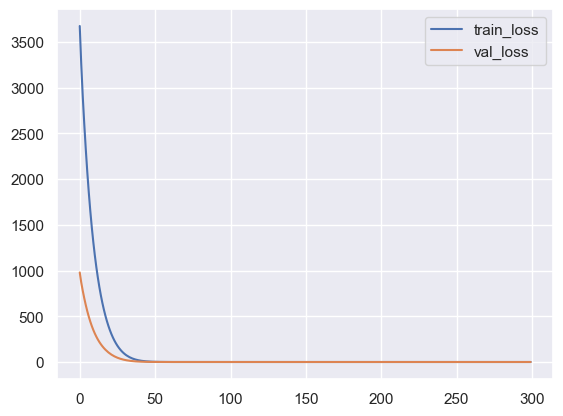

Finished Training
Epoch 1/300


100%|██████████| 13/13 [00:00<00:00, 128.82it/s]


Train Loss: 6746.813720703125


100%|██████████| 4/4 [00:00<00:00, 500.45it/s]


Epoch 2/300


100%|██████████| 13/13 [00:00<00:00, 158.52it/s]


Train Loss: 5603.745056152344


100%|██████████| 4/4 [00:00<00:00, 588.59it/s]


Epoch 3/300


100%|██████████| 13/13 [00:00<00:00, 126.44it/s]


Train Loss: 4557.728668212891


100%|██████████| 4/4 [00:00<00:00, 638.26it/s]


Epoch 4/300


100%|██████████| 13/13 [00:00<00:00, 73.80it/s]


Train Loss: 3660.8448028564453


100%|██████████| 4/4 [00:00<00:00, 556.24it/s]


Epoch 5/300


100%|██████████| 13/13 [00:00<00:00, 158.55it/s]


Train Loss: 2931.8362884521484


100%|██████████| 4/4 [00:00<00:00, 574.05it/s]


Epoch 6/300


100%|██████████| 13/13 [00:00<00:00, 153.60it/s]


Train Loss: 2346.8367767333984


100%|██████████| 4/4 [00:00<00:00, 570.46it/s]


Epoch 7/300


100%|██████████| 13/13 [00:00<00:00, 156.42it/s]


Train Loss: 1878.051773071289


100%|██████████| 4/4 [00:00<00:00, 573.99it/s]


Epoch 8/300


100%|██████████| 13/13 [00:00<00:00, 159.04it/s]


Train Loss: 1501.216049194336


100%|██████████| 4/4 [00:00<00:00, 610.79it/s]


Epoch 9/300


100%|██████████| 13/13 [00:00<00:00, 151.12it/s]


Train Loss: 1197.2164611816406


100%|██████████| 4/4 [00:00<00:00, 604.24it/s]


Epoch 10/300


100%|██████████| 13/13 [00:00<00:00, 136.63it/s]


Train Loss: 951.2754135131836


100%|██████████| 4/4 [00:00<00:00, 474.78it/s]


Epoch 11/300


100%|██████████| 13/13 [00:00<00:00, 142.21it/s]


Train Loss: 752.0484008789062


100%|██████████| 4/4 [00:00<00:00, 612.11it/s]


Epoch 12/300


100%|██████████| 13/13 [00:00<00:00, 109.81it/s]


Train Loss: 590.7786560058594


100%|██████████| 4/4 [00:00<00:00, 589.36it/s]


Epoch 13/300


100%|██████████| 13/13 [00:00<00:00, 156.85it/s]


Train Loss: 460.69012451171875


100%|██████████| 4/4 [00:00<00:00, 646.42it/s]


Epoch 14/300


100%|██████████| 13/13 [00:00<00:00, 154.10it/s]


Train Loss: 356.28514862060547


100%|██████████| 4/4 [00:00<00:00, 536.48it/s]


Epoch 15/300


100%|██████████| 13/13 [00:00<00:00, 154.11it/s]


Train Loss: 273.13770294189453


100%|██████████| 4/4 [00:00<00:00, 435.68it/s]


Epoch 16/300


100%|██████████| 13/13 [00:00<00:00, 164.33it/s]


Train Loss: 207.46238327026367


100%|██████████| 4/4 [00:00<00:00, 662.58it/s]


Epoch 17/300


100%|██████████| 13/13 [00:00<00:00, 150.53it/s]


Train Loss: 156.07703304290771


100%|██████████| 4/4 [00:00<00:00, 621.10it/s]


Epoch 18/300


100%|██████████| 13/13 [00:00<00:00, 149.23it/s]


Train Loss: 116.27848625183105


100%|██████████| 4/4 [00:00<00:00, 635.00it/s]


Epoch 19/300


100%|██████████| 13/13 [00:00<00:00, 156.12it/s]


Train Loss: 85.77671146392822


100%|██████████| 4/4 [00:00<00:00, 627.26it/s]


Epoch 20/300


100%|██████████| 13/13 [00:00<00:00, 123.58it/s]


Train Loss: 62.65087652206421


100%|██████████| 4/4 [00:00<00:00, 644.56it/s]


Epoch 21/300


100%|██████████| 13/13 [00:00<00:00, 90.37it/s]


Train Loss: 45.305042028427124


100%|██████████| 4/4 [00:00<00:00, 665.23it/s]


Epoch 22/300


100%|██████████| 13/13 [00:00<00:00, 146.68it/s]


Train Loss: 32.43517231941223


100%|██████████| 4/4 [00:00<00:00, 627.44it/s]


Epoch 23/300


100%|██████████| 13/13 [00:00<00:00, 174.41it/s]


Train Loss: 22.988762855529785


100%|██████████| 4/4 [00:00<00:00, 645.05it/s]


Epoch 24/300


100%|██████████| 13/13 [00:00<00:00, 49.01it/s]


Train Loss: 16.13349223136902


100%|██████████| 4/4 [00:00<00:00, 165.50it/s]


Epoch 25/300


100%|██████████| 13/13 [00:00<00:00, 157.57it/s]


Train Loss: 11.207183003425598


100%|██████████| 4/4 [00:00<00:00, 639.59it/s]


Epoch 26/300


100%|██████████| 13/13 [00:00<00:00, 76.34it/s]


Train Loss: 7.7148095071315765


100%|██████████| 4/4 [00:00<00:00, 516.99it/s]


Epoch 27/300


100%|██████████| 13/13 [00:00<00:00, 59.73it/s]


Train Loss: 5.264981180429459


100%|██████████| 4/4 [00:00<00:00, 587.71it/s]


Epoch 28/300


100%|██████████| 13/13 [00:00<00:00, 140.56it/s]


Train Loss: 3.557983696460724


100%|██████████| 4/4 [00:00<00:00, 547.51it/s]


Epoch 29/300


100%|██████████| 13/13 [00:00<00:00, 76.66it/s]


Train Loss: 2.382996618747711


100%|██████████| 4/4 [00:00<00:00, 519.00it/s]


Epoch 30/300


100%|██████████| 13/13 [00:00<00:00, 55.11it/s]


Train Loss: 1.5886267572641373


100%|██████████| 4/4 [00:00<00:00, 639.99it/s]


Epoch 31/300


100%|██████████| 13/13 [00:00<00:00, 143.02it/s]


Train Loss: 1.0544142425060272


100%|██████████| 4/4 [00:00<00:00, 676.58it/s]


Epoch 32/300


100%|██████████| 13/13 [00:00<00:00, 157.49it/s]


Train Loss: 0.6974089667201042


100%|██████████| 4/4 [00:00<00:00, 551.94it/s]


Epoch 33/300


100%|██████████| 13/13 [00:00<00:00, 80.92it/s]


Train Loss: 0.4644119217991829


100%|██████████| 4/4 [00:00<00:00, 649.15it/s]


Epoch 34/300


100%|██████████| 13/13 [00:00<00:00, 46.20it/s]


Train Loss: 0.31274401396512985


100%|██████████| 4/4 [00:00<00:00, 140.59it/s]


Epoch 35/300


100%|██████████| 13/13 [00:00<00:00, 66.80it/s]


Train Loss: 0.21577500831335783


100%|██████████| 4/4 [00:00<00:00, 457.47it/s]


Epoch 36/300


100%|██████████| 13/13 [00:00<00:00, 74.37it/s] 


Train Loss: 0.15899179689586163


100%|██████████| 4/4 [00:00<00:00, 526.59it/s]


Epoch 37/300


100%|██████████| 13/13 [00:00<00:00, 119.37it/s]


Train Loss: 0.11513348203152418


100%|██████████| 4/4 [00:00<00:00, 295.24it/s]


Epoch 38/300


100%|██████████| 13/13 [00:00<00:00, 109.09it/s]


Train Loss: 0.0918797766789794


100%|██████████| 4/4 [00:00<00:00, 225.69it/s]


Epoch 39/300


100%|██████████| 13/13 [00:00<00:00, 47.46it/s]


Train Loss: 0.08004816249012947


100%|██████████| 4/4 [00:00<00:00, 221.20it/s]


Epoch 40/300


100%|██████████| 13/13 [00:00<00:00, 56.01it/s]


Train Loss: 0.06698102573864162


100%|██████████| 4/4 [00:00<00:00, 161.38it/s]


Epoch 41/300


100%|██████████| 13/13 [00:00<00:00, 54.14it/s]


Train Loss: 0.06884056190028787


100%|██████████| 4/4 [00:00<00:00, 430.02it/s]


Epoch 42/300


100%|██████████| 13/13 [00:00<00:00, 105.25it/s]


Train Loss: 0.06805638235528022


100%|██████████| 4/4 [00:00<00:00, 626.58it/s]


Epoch 43/300


100%|██████████| 13/13 [00:00<00:00, 138.52it/s]


Train Loss: 0.06295627821236849


100%|██████████| 4/4 [00:00<00:00, 442.03it/s]


Epoch 44/300


100%|██████████| 13/13 [00:00<00:00, 106.62it/s]


Train Loss: 0.05886952462606132


100%|██████████| 4/4 [00:00<00:00, 449.25it/s]


Epoch 45/300


100%|██████████| 13/13 [00:00<00:00, 134.11it/s]


Train Loss: 0.053774326806887984


100%|██████████| 4/4 [00:00<00:00, 516.00it/s]


Epoch 46/300


100%|██████████| 13/13 [00:00<00:00, 120.23it/s]


Train Loss: 0.05458333739079535


100%|██████████| 4/4 [00:00<00:00, 54.03it/s]


Epoch 47/300


100%|██████████| 13/13 [00:00<00:00, 57.44it/s]


Train Loss: 0.05760828114580363


100%|██████████| 4/4 [00:00<00:00, 188.80it/s]


Epoch 48/300


100%|██████████| 13/13 [00:00<00:00, 35.15it/s]


Train Loss: 0.0541842799866572


100%|██████████| 4/4 [00:00<00:00, 577.53it/s]


Epoch 49/300


100%|██████████| 13/13 [00:00<00:00, 71.70it/s]


Train Loss: 0.053164837998338044


100%|██████████| 4/4 [00:00<00:00, 432.06it/s]


Epoch 50/300


100%|██████████| 13/13 [00:00<00:00, 68.68it/s]


Train Loss: 0.0543414365965873


100%|██████████| 4/4 [00:00<00:00, 290.05it/s]


Epoch 51/300


100%|██████████| 13/13 [00:00<00:00, 43.33it/s]


Train Loss: 0.05511460994603112


100%|██████████| 4/4 [00:00<00:00, 588.84it/s]


Epoch 52/300


100%|██████████| 13/13 [00:00<00:00, 114.03it/s]


Train Loss: 0.05455974693177268


100%|██████████| 4/4 [00:00<00:00, 567.20it/s]


Epoch 53/300


100%|██████████| 13/13 [00:00<00:00, 152.80it/s]


Train Loss: 0.055215056461747736


100%|██████████| 4/4 [00:00<00:00, 675.68it/s]


Epoch 54/300


100%|██████████| 13/13 [00:00<00:00, 162.06it/s]


Train Loss: 0.053852756740525365


100%|██████████| 4/4 [00:00<00:00, 652.84it/s]


Epoch 55/300


100%|██████████| 13/13 [00:00<00:00, 163.79it/s]


Train Loss: 0.05744465335737914


100%|██████████| 4/4 [00:00<00:00, 583.27it/s]


Epoch 56/300


100%|██████████| 13/13 [00:00<00:00, 124.91it/s]


Train Loss: 0.055006411392241716


100%|██████████| 4/4 [00:00<00:00, 493.04it/s]


Epoch 57/300


100%|██████████| 13/13 [00:00<00:00, 136.68it/s]


Train Loss: 0.055045411456376314


100%|██████████| 4/4 [00:00<00:00, 520.84it/s]


Epoch 58/300


100%|██████████| 13/13 [00:00<00:00, 135.04it/s]


Train Loss: 0.052699723572004586


100%|██████████| 4/4 [00:00<00:00, 596.67it/s]


Epoch 59/300


100%|██████████| 13/13 [00:00<00:00, 107.55it/s]


Train Loss: 0.061165447579696774


100%|██████████| 4/4 [00:00<00:00, 301.78it/s]


Epoch 60/300


100%|██████████| 13/13 [00:00<00:00, 108.29it/s]


Train Loss: 0.05668188177514821


100%|██████████| 4/4 [00:00<00:00, 563.24it/s]


Epoch 61/300


100%|██████████| 13/13 [00:00<00:00, 97.99it/s] 


Train Loss: 0.059046190115623176


100%|██████████| 4/4 [00:00<00:00, 215.31it/s]


Epoch 62/300


100%|██████████| 13/13 [00:00<00:00, 149.44it/s]


Train Loss: 0.05702193244360387


100%|██████████| 4/4 [00:00<00:00, 610.88it/s]


Epoch 63/300


100%|██████████| 13/13 [00:00<00:00, 146.51it/s]


Train Loss: 0.05391354160383344


100%|██████████| 4/4 [00:00<00:00, 569.80it/s]


Epoch 64/300


100%|██████████| 13/13 [00:00<00:00, 169.96it/s]


Train Loss: 0.05646202544448897


100%|██████████| 4/4 [00:00<00:00, 648.82it/s]


Epoch 65/300


100%|██████████| 13/13 [00:00<00:00, 158.07it/s]


Train Loss: 0.053176586516201496


100%|██████████| 4/4 [00:00<00:00, 580.81it/s]


Epoch 66/300


100%|██████████| 13/13 [00:00<00:00, 140.85it/s]


Train Loss: 0.053895442048087716


100%|██████████| 4/4 [00:00<00:00, 643.92it/s]


Epoch 67/300


100%|██████████| 13/13 [00:00<00:00, 170.14it/s]


Train Loss: 0.05248256423510611


100%|██████████| 4/4 [00:00<00:00, 517.40it/s]


Epoch 68/300


100%|██████████| 13/13 [00:00<00:00, 165.71it/s]


Train Loss: 0.05512872862163931


100%|██████████| 4/4 [00:00<00:00, 359.32it/s]


Epoch 69/300


100%|██████████| 13/13 [00:00<00:00, 174.62it/s]


Train Loss: 0.05650544085074216


100%|██████████| 4/4 [00:00<00:00, 391.54it/s]


Epoch 70/300


100%|██████████| 13/13 [00:00<00:00, 160.64it/s]


Train Loss: 0.05442707100883126


100%|██████████| 4/4 [00:00<00:00, 614.08it/s]


Epoch 71/300


100%|██████████| 13/13 [00:00<00:00, 149.38it/s]


Train Loss: 0.052119278465397656


100%|██████████| 4/4 [00:00<00:00, 565.69it/s]


Epoch 72/300


100%|██████████| 13/13 [00:00<00:00, 144.32it/s]


Train Loss: 0.0530858229030855


100%|██████████| 4/4 [00:00<00:00, 681.78it/s]


Epoch 73/300


100%|██████████| 13/13 [00:00<00:00, 171.55it/s]


Train Loss: 0.05427601421251893


100%|██████████| 4/4 [00:00<00:00, 632.72it/s]


Epoch 74/300


100%|██████████| 13/13 [00:00<00:00, 153.85it/s]


Train Loss: 0.058722431771457195


100%|██████████| 4/4 [00:00<00:00, 625.50it/s]


Epoch 75/300


100%|██████████| 13/13 [00:00<00:00, 166.57it/s]


Train Loss: 0.051752851461060345


100%|██████████| 4/4 [00:00<00:00, 544.89it/s]


Epoch 76/300


100%|██████████| 13/13 [00:00<00:00, 147.80it/s]


Train Loss: 0.05730553879402578


100%|██████████| 4/4 [00:00<00:00, 554.55it/s]


Epoch 77/300


100%|██████████| 13/13 [00:00<00:00, 155.28it/s]


Train Loss: 0.05326663434971124


100%|██████████| 4/4 [00:00<00:00, 610.30it/s]


Epoch 78/300


100%|██████████| 13/13 [00:00<00:00, 170.77it/s]


Train Loss: 0.05464001098880544


100%|██████████| 4/4 [00:00<00:00, 609.75it/s]


Epoch 79/300


100%|██████████| 13/13 [00:00<00:00, 158.09it/s]


Train Loss: 0.058795843622647226


100%|██████████| 4/4 [00:00<00:00, 626.39it/s]


Epoch 80/300


100%|██████████| 13/13 [00:00<00:00, 172.72it/s]


Train Loss: 0.05511670606210828


100%|██████████| 4/4 [00:00<00:00, 579.48it/s]


Epoch 81/300


100%|██████████| 13/13 [00:00<00:00, 100.05it/s]


Train Loss: 0.05644352885428816


100%|██████████| 4/4 [00:00<00:00, 584.47it/s]


Epoch 82/300


100%|██████████| 13/13 [00:00<00:00, 148.62it/s]


Train Loss: 0.05323149135801941


100%|██████████| 4/4 [00:00<00:00, 631.79it/s]


Epoch 83/300


100%|██████████| 13/13 [00:00<00:00, 167.59it/s]


Train Loss: 0.05494384013582021


100%|██████████| 4/4 [00:00<00:00, 648.60it/s]


Epoch 84/300


100%|██████████| 13/13 [00:00<00:00, 158.68it/s]


Train Loss: 0.05551568104419857


100%|██████████| 4/4 [00:00<00:00, 636.03it/s]


Epoch 85/300


100%|██████████| 13/13 [00:00<00:00, 175.35it/s]


Train Loss: 0.05592967919073999


100%|██████████| 4/4 [00:00<00:00, 653.80it/s]


Epoch 86/300


100%|██████████| 13/13 [00:00<00:00, 164.97it/s]


Train Loss: 0.061144906328991055


100%|██████████| 4/4 [00:00<00:00, 578.19it/s]


Epoch 87/300


100%|██████████| 13/13 [00:00<00:00, 108.46it/s]


Train Loss: 0.06811636581551284


100%|██████████| 4/4 [00:00<00:00, 669.88it/s]


Epoch 88/300


100%|██████████| 13/13 [00:00<00:00, 167.72it/s]


Train Loss: 0.05543125234544277


100%|██████████| 4/4 [00:00<00:00, 645.77it/s]


Epoch 89/300


100%|██████████| 13/13 [00:00<00:00, 169.54it/s]


Train Loss: 0.05742721178103238


100%|██████████| 4/4 [00:00<00:00, 678.99it/s]


Epoch 90/300


100%|██████████| 13/13 [00:00<00:00, 92.56it/s]


Train Loss: 0.0594550094101578


100%|██████████| 4/4 [00:00<00:00, 683.67it/s]


Epoch 91/300


100%|██████████| 13/13 [00:00<00:00, 149.44it/s]


Train Loss: 0.0603099208092317


100%|██████████| 4/4 [00:00<00:00, 357.40it/s]


Epoch 92/300


100%|██████████| 13/13 [00:00<00:00, 153.07it/s]


Train Loss: 0.055486006604041904


100%|██████████| 4/4 [00:00<00:00, 215.09it/s]


Epoch 93/300


100%|██████████| 13/13 [00:00<00:00, 165.15it/s]


Train Loss: 0.05898222932592034


100%|██████████| 4/4 [00:00<00:00, 674.05it/s]


Epoch 94/300


100%|██████████| 13/13 [00:00<00:00, 157.59it/s]


Train Loss: 0.05324930034112185


100%|██████████| 4/4 [00:00<00:00, 645.90it/s]


Epoch 95/300


100%|██████████| 13/13 [00:00<00:00, 164.73it/s]


Train Loss: 0.05357573181390762


100%|██████████| 4/4 [00:00<00:00, 665.76it/s]


Epoch 96/300


100%|██████████| 13/13 [00:00<00:00, 166.09it/s]


Train Loss: 0.06263229297474027


100%|██████████| 4/4 [00:00<00:00, 604.63it/s]


Epoch 97/300


100%|██████████| 13/13 [00:00<00:00, 156.05it/s]


Train Loss: 0.059320733533240855


100%|██████████| 4/4 [00:00<00:00, 631.03it/s]


Epoch 98/300


100%|██████████| 13/13 [00:00<00:00, 165.29it/s]


Train Loss: 0.05662537878379226


100%|██████████| 4/4 [00:00<00:00, 660.08it/s]


Epoch 99/300


100%|██████████| 13/13 [00:00<00:00, 170.52it/s]


Train Loss: 0.056004165788181126


100%|██████████| 4/4 [00:00<00:00, 658.01it/s]


Epoch 100/300


100%|██████████| 13/13 [00:00<00:00, 147.56it/s]


Train Loss: 0.056009958032518625


100%|██████████| 4/4 [00:00<00:00, 611.15it/s]


Epoch 101/300


100%|██████████| 13/13 [00:00<00:00, 166.54it/s]


Train Loss: 0.053792794118635356


100%|██████████| 4/4 [00:00<00:00, 650.30it/s]


Epoch 102/300


100%|██████████| 13/13 [00:00<00:00, 80.20it/s]


Train Loss: 0.053542848443612456


100%|██████████| 4/4 [00:00<00:00, 78.89it/s]


Epoch 103/300


100%|██████████| 13/13 [00:00<00:00, 166.23it/s]


Train Loss: 0.05505368608282879


100%|██████████| 4/4 [00:00<00:00, 638.28it/s]


Epoch 104/300


100%|██████████| 13/13 [00:00<00:00, 141.95it/s]


Train Loss: 0.05354143027216196


100%|██████████| 4/4 [00:00<00:00, 527.90it/s]


Epoch 105/300


100%|██████████| 13/13 [00:00<00:00, 147.21it/s]


Train Loss: 0.05335685727186501


100%|██████████| 4/4 [00:00<00:00, 662.82it/s]


Epoch 106/300


100%|██████████| 13/13 [00:00<00:00, 147.41it/s]


Train Loss: 0.05460273288190365


100%|██████████| 4/4 [00:00<00:00, 198.38it/s]


Epoch 107/300


100%|██████████| 13/13 [00:00<00:00, 155.23it/s]


Train Loss: 0.05598330311477184


100%|██████████| 4/4 [00:00<00:00, 653.39it/s]


Epoch 108/300


100%|██████████| 13/13 [00:00<00:00, 156.15it/s]


Train Loss: 0.05469097231980413


100%|██████████| 4/4 [00:00<00:00, 588.41it/s]


Epoch 109/300


100%|██████████| 13/13 [00:00<00:00, 129.85it/s]


Train Loss: 0.05153972777770832


100%|██████████| 4/4 [00:00<00:00, 525.49it/s]


Epoch 110/300


100%|██████████| 13/13 [00:00<00:00, 154.18it/s]


Train Loss: 0.05337927502114326


100%|██████████| 4/4 [00:00<00:00, 651.57it/s]


Epoch 111/300


100%|██████████| 13/13 [00:00<00:00, 140.70it/s]


Train Loss: 0.05632027826504782


100%|██████████| 4/4 [00:00<00:00, 260.65it/s]


Epoch 112/300


100%|██████████| 13/13 [00:00<00:00, 132.03it/s]


Train Loss: 0.05531829595565796


100%|██████████| 4/4 [00:00<00:00, 602.33it/s]


Epoch 113/300


100%|██████████| 13/13 [00:00<00:00, 152.10it/s]


Train Loss: 0.05595362791791558


100%|██████████| 4/4 [00:00<00:00, 608.93it/s]


Epoch 114/300


100%|██████████| 13/13 [00:00<00:00, 131.87it/s]


Train Loss: 0.054514349380042404


100%|██████████| 4/4 [00:00<00:00, 635.04it/s]


Epoch 115/300


100%|██████████| 13/13 [00:00<00:00, 152.83it/s]


Train Loss: 0.05664742388762534


100%|██████████| 4/4 [00:00<00:00, 595.51it/s]


Epoch 116/300


100%|██████████| 13/13 [00:00<00:00, 160.42it/s]


Train Loss: 0.057805190212093294


100%|██████████| 4/4 [00:00<00:00, 640.94it/s]


Epoch 117/300


100%|██████████| 13/13 [00:00<00:00, 123.43it/s]


Train Loss: 0.05724159930832684


100%|██████████| 4/4 [00:00<00:00, 486.03it/s]


Epoch 118/300


100%|██████████| 13/13 [00:00<00:00, 149.62it/s]


Train Loss: 0.05598053173162043


100%|██████████| 4/4 [00:00<00:00, 612.84it/s]


Epoch 119/300


100%|██████████| 13/13 [00:00<00:00, 137.47it/s]


Train Loss: 0.06220396055141464


100%|██████████| 4/4 [00:00<00:00, 354.11it/s]


Epoch 120/300


100%|██████████| 13/13 [00:00<00:00, 109.05it/s]


Train Loss: 0.05721676436951384


100%|██████████| 4/4 [00:00<00:00, 534.26it/s]


Epoch 121/300


100%|██████████| 13/13 [00:00<00:00, 96.96it/s]


Train Loss: 0.05510958039667457


100%|██████████| 4/4 [00:00<00:00, 295.26it/s]


Epoch 122/300


100%|██████████| 13/13 [00:00<00:00, 145.34it/s]


Train Loss: 0.05779445398366079


100%|██████████| 4/4 [00:00<00:00, 514.46it/s]


Epoch 123/300


100%|██████████| 13/13 [00:00<00:00, 123.97it/s]


Train Loss: 0.06514667742885649


100%|██████████| 4/4 [00:00<00:00, 442.18it/s]


Epoch 124/300


100%|██████████| 13/13 [00:00<00:00, 152.98it/s]


Train Loss: 0.06300961534725502


100%|██████████| 4/4 [00:00<00:00, 343.65it/s]


Epoch 125/300


100%|██████████| 13/13 [00:00<00:00, 138.84it/s]


Train Loss: 0.060431224992498755


100%|██████████| 4/4 [00:00<00:00, 580.63it/s]


Epoch 126/300


100%|██████████| 13/13 [00:00<00:00, 140.53it/s]


Train Loss: 0.052788055734708905


100%|██████████| 4/4 [00:00<00:00, 586.43it/s]


Epoch 127/300


100%|██████████| 13/13 [00:00<00:00, 149.93it/s]


Train Loss: 0.056442144443280995


100%|██████████| 4/4 [00:00<00:00, 589.85it/s]


Epoch 128/300


100%|██████████| 13/13 [00:00<00:00, 119.89it/s]


Train Loss: 0.06052597984671593


100%|██████████| 4/4 [00:00<00:00, 545.26it/s]


Epoch 129/300


100%|██████████| 13/13 [00:00<00:00, 133.22it/s]


Train Loss: 0.059629341994877905


100%|██████████| 4/4 [00:00<00:00, 543.85it/s]


Epoch 130/300


100%|██████████| 13/13 [00:00<00:00, 79.99it/s]


Train Loss: 0.05983238900080323


100%|██████████| 4/4 [00:00<00:00, 532.91it/s]


Epoch 131/300


100%|██████████| 13/13 [00:00<00:00, 149.36it/s]


Train Loss: 0.05899090971797705


100%|██████████| 4/4 [00:00<00:00, 580.65it/s]


Epoch 132/300


100%|██████████| 13/13 [00:00<00:00, 136.82it/s]


Train Loss: 0.06306599522940814


100%|██████████| 4/4 [00:00<00:00, 609.28it/s]


Epoch 133/300


100%|██████████| 13/13 [00:00<00:00, 43.42it/s]


Train Loss: 0.06131741695571691


100%|██████████| 4/4 [00:00<00:00, 475.29it/s]


Epoch 134/300


100%|██████████| 13/13 [00:00<00:00, 79.27it/s]


Train Loss: 0.05861587601248175


100%|██████████| 4/4 [00:00<00:00, 630.06it/s]


Epoch 135/300


100%|██████████| 13/13 [00:00<00:00, 53.13it/s]


Train Loss: 0.06009792594704777


100%|██████████| 4/4 [00:00<00:00, 615.02it/s]


Epoch 136/300


100%|██████████| 13/13 [00:00<00:00, 74.05it/s]


Train Loss: 0.05546811211388558


100%|██████████| 4/4 [00:00<00:00, 130.02it/s]


Epoch 137/300


100%|██████████| 13/13 [00:00<00:00, 75.83it/s]


Train Loss: 0.05243565666023642


100%|██████████| 4/4 [00:00<00:00, 182.44it/s]


Epoch 138/300


100%|██████████| 13/13 [00:00<00:00, 80.19it/s]


Train Loss: 0.05238954396918416


100%|██████████| 4/4 [00:00<00:00, 346.24it/s]


Epoch 139/300


100%|██████████| 13/13 [00:00<00:00, 147.92it/s]


Train Loss: 0.05576846073381603


100%|██████████| 4/4 [00:00<00:00, 535.41it/s]


Epoch 140/300


100%|██████████| 13/13 [00:00<00:00, 81.04it/s]


Train Loss: 0.05227575881872326


100%|██████████| 4/4 [00:00<00:00, 591.39it/s]


Epoch 141/300


100%|██████████| 13/13 [00:00<00:00, 100.84it/s]


Train Loss: 0.05402581428643316


100%|██████████| 4/4 [00:00<00:00, 625.50it/s]


Epoch 142/300


100%|██████████| 13/13 [00:00<00:00, 33.55it/s]


Train Loss: 0.05419088661437854


100%|██████████| 4/4 [00:00<00:00, 173.06it/s]


Epoch 143/300


100%|██████████| 13/13 [00:00<00:00, 64.40it/s]


Train Loss: 0.053802625159733


100%|██████████| 4/4 [00:00<00:00, 282.68it/s]


Epoch 144/300


100%|██████████| 13/13 [00:00<00:00, 59.18it/s]


Train Loss: 0.0532057621749118


100%|██████████| 4/4 [00:00<00:00, 231.20it/s]


Epoch 145/300


100%|██████████| 13/13 [00:00<00:00, 49.13it/s]


Train Loss: 0.05826932768104598


100%|██████████| 4/4 [00:00<00:00, 244.83it/s]


Epoch 146/300


100%|██████████| 13/13 [00:00<00:00, 133.61it/s]


Train Loss: 0.05604513734579086


100%|██████████| 4/4 [00:00<00:00, 548.17it/s]


Epoch 147/300


100%|██████████| 13/13 [00:00<00:00, 119.64it/s]


Train Loss: 0.061570979305543005


100%|██████████| 4/4 [00:00<00:00, 427.26it/s]


Epoch 148/300


100%|██████████| 13/13 [00:00<00:00, 125.59it/s]


Train Loss: 0.05759443761780858


100%|██████████| 4/4 [00:00<00:00, 609.13it/s]


Epoch 149/300


100%|██████████| 13/13 [00:00<00:00, 123.89it/s]


Train Loss: 0.0536420785356313


100%|██████████| 4/4 [00:00<00:00, 444.97it/s]


Epoch 150/300


100%|██████████| 13/13 [00:00<00:00, 55.27it/s]


Train Loss: 0.05298693827353418


100%|██████████| 4/4 [00:00<00:00, 585.22it/s]


Epoch 151/300


100%|██████████| 13/13 [00:00<00:00, 151.35it/s]


Train Loss: 0.05504028243012726


100%|██████████| 4/4 [00:00<00:00, 526.38it/s]


Epoch 152/300


100%|██████████| 13/13 [00:00<00:00, 138.43it/s]


Train Loss: 0.06212210946250707


100%|██████████| 4/4 [00:00<00:00, 630.58it/s]


Epoch 153/300


100%|██████████| 13/13 [00:00<00:00, 153.03it/s]


Train Loss: 0.056426639086566865


100%|██████████| 4/4 [00:00<00:00, 500.32it/s]


Epoch 154/300


100%|██████████| 13/13 [00:00<00:00, 135.95it/s]


Train Loss: 0.05487547104712576


100%|██████████| 4/4 [00:00<00:00, 519.68it/s]


Epoch 155/300


100%|██████████| 13/13 [00:00<00:00, 81.83it/s] 


Train Loss: 0.05881455494090915


100%|██████████| 4/4 [00:00<00:00, 113.75it/s]


Epoch 156/300


100%|██████████| 13/13 [00:00<00:00, 120.56it/s]


Train Loss: 0.057629649178124964


100%|██████████| 4/4 [00:00<00:00, 619.27it/s]


Epoch 157/300


100%|██████████| 13/13 [00:00<00:00, 94.44it/s] 


Train Loss: 0.055861457251012325


100%|██████████| 4/4 [00:00<00:00, 329.62it/s]


Epoch 158/300


100%|██████████| 13/13 [00:00<00:00, 71.94it/s]


Train Loss: 0.06343378475867212


100%|██████████| 4/4 [00:00<00:00, 326.72it/s]


Epoch 159/300


100%|██████████| 13/13 [00:00<00:00, 31.80it/s]


Train Loss: 0.06008741701953113


100%|██████████| 4/4 [00:00<00:00, 224.52it/s]


Epoch 160/300


100%|██████████| 13/13 [00:00<00:00, 53.76it/s]


Train Loss: 0.053287063958123326


100%|██████████| 4/4 [00:00<00:00, 547.42it/s]


Epoch 161/300


100%|██████████| 13/13 [00:00<00:00, 136.02it/s]


Train Loss: 0.05286731314845383


100%|██████████| 4/4 [00:00<00:00, 610.10it/s]


Epoch 162/300


100%|██████████| 13/13 [00:00<00:00, 167.39it/s]


Train Loss: 0.05653539078775793


100%|██████████| 4/4 [00:00<00:00, 585.55it/s]


Epoch 163/300


100%|██████████| 13/13 [00:00<00:00, 167.51it/s]


Train Loss: 0.06075236527249217


100%|██████████| 4/4 [00:00<00:00, 609.02it/s]


Epoch 164/300


100%|██████████| 13/13 [00:00<00:00, 111.80it/s]


Train Loss: 0.055165182682685554


100%|██████████| 4/4 [00:00<00:00, 637.77it/s]


Epoch 165/300


100%|██████████| 13/13 [00:00<00:00, 137.10it/s]


Train Loss: 0.05483875563368201


100%|██████████| 4/4 [00:00<00:00, 356.54it/s]


Epoch 166/300


100%|██████████| 13/13 [00:00<00:00, 111.34it/s]


Train Loss: 0.05166064400691539


100%|██████████| 4/4 [00:00<00:00, 522.33it/s]


Epoch 167/300


100%|██████████| 13/13 [00:00<00:00, 139.50it/s]


Train Loss: 0.05219921987736598


100%|██████████| 4/4 [00:00<00:00, 161.09it/s]


Epoch 168/300


100%|██████████| 13/13 [00:00<00:00, 78.41it/s]


Train Loss: 0.05325564963277429


100%|██████████| 4/4 [00:00<00:00, 646.50it/s]


Epoch 169/300


100%|██████████| 13/13 [00:00<00:00, 160.55it/s]


Train Loss: 0.05785989813739434


100%|██████████| 4/4 [00:00<00:00, 325.81it/s]


Epoch 170/300


100%|██████████| 13/13 [00:00<00:00, 122.78it/s]


Train Loss: 0.05735451355576515


100%|██████████| 4/4 [00:00<00:00, 422.92it/s]


Epoch 171/300


100%|██████████| 13/13 [00:00<00:00, 155.26it/s]


Train Loss: 0.056957929162308574


100%|██████████| 4/4 [00:00<00:00, 589.44it/s]


Epoch 172/300


100%|██████████| 13/13 [00:00<00:00, 144.12it/s]


Train Loss: 0.05597004562150687


100%|██████████| 4/4 [00:00<00:00, 416.28it/s]


Epoch 173/300


100%|██████████| 13/13 [00:00<00:00, 142.14it/s]


Train Loss: 0.05209623323753476


100%|██████████| 4/4 [00:00<00:00, 482.63it/s]


Epoch 174/300


100%|██████████| 13/13 [00:00<00:00, 157.67it/s]


Train Loss: 0.05527792958309874


100%|██████████| 4/4 [00:00<00:00, 381.79it/s]


Epoch 175/300


100%|██████████| 13/13 [00:00<00:00, 81.19it/s]


Train Loss: 0.05551678594201803


100%|██████████| 4/4 [00:00<00:00, 593.11it/s]


Epoch 176/300


100%|██████████| 13/13 [00:00<00:00, 138.18it/s]


Train Loss: 0.056805173167958856


100%|██████████| 4/4 [00:00<00:00, 638.38it/s]


Epoch 177/300


100%|██████████| 13/13 [00:00<00:00, 95.44it/s] 


Train Loss: 0.05813384032808244


100%|██████████| 4/4 [00:00<00:00, 538.42it/s]


Epoch 178/300


100%|██████████| 13/13 [00:00<00:00, 163.08it/s]


Train Loss: 0.06518220191355795


100%|██████████| 4/4 [00:00<00:00, 588.67it/s]


Epoch 179/300


100%|██████████| 13/13 [00:00<00:00, 133.48it/s]


Train Loss: 0.05870188295375556


100%|██████████| 4/4 [00:00<00:00, 604.24it/s]


Epoch 180/300


100%|██████████| 13/13 [00:00<00:00, 148.91it/s]


Train Loss: 0.06096208142116666


100%|██████████| 4/4 [00:00<00:00, 528.20it/s]


Epoch 181/300


100%|██████████| 13/13 [00:00<00:00, 121.74it/s]


Train Loss: 0.05490123631898314


100%|██████████| 4/4 [00:00<00:00, 586.76it/s]


Epoch 182/300


100%|██████████| 13/13 [00:00<00:00, 113.64it/s]


Train Loss: 0.05673644249327481


100%|██████████| 4/4 [00:00<00:00, 437.25it/s]


Epoch 183/300


100%|██████████| 13/13 [00:00<00:00, 134.72it/s]


Train Loss: 0.060930419131182134


100%|██████████| 4/4 [00:00<00:00, 672.49it/s]


Epoch 184/300


100%|██████████| 13/13 [00:00<00:00, 156.86it/s]


Train Loss: 0.05429887701757252


100%|██████████| 4/4 [00:00<00:00, 563.20it/s]


Epoch 185/300


100%|██████████| 13/13 [00:00<00:00, 134.72it/s]


Train Loss: 0.05905433860607445


100%|██████████| 4/4 [00:00<00:00, 625.60it/s]


Epoch 186/300


100%|██████████| 13/13 [00:00<00:00, 128.20it/s]


Train Loss: 0.06147874263115227


100%|██████████| 4/4 [00:00<00:00, 450.92it/s]


Epoch 187/300


100%|██████████| 13/13 [00:00<00:00, 155.68it/s]


Train Loss: 0.06261200807057321


100%|██████████| 4/4 [00:00<00:00, 609.95it/s]


Epoch 188/300


100%|██████████| 13/13 [00:00<00:00, 124.73it/s]


Train Loss: 0.06776675372384489


100%|██████████| 4/4 [00:00<00:00, 611.15it/s]


Epoch 189/300


100%|██████████| 13/13 [00:00<00:00, 150.67it/s]


Train Loss: 0.06371743069030344


100%|██████████| 4/4 [00:00<00:00, 379.76it/s]


Epoch 190/300


100%|██████████| 13/13 [00:00<00:00, 138.37it/s]


Train Loss: 0.060415182961151004


100%|██████████| 4/4 [00:00<00:00, 504.93it/s]


Epoch 191/300


100%|██████████| 13/13 [00:00<00:00, 125.49it/s]


Train Loss: 0.056535292766056955


100%|██████████| 4/4 [00:00<00:00, 641.94it/s]


Epoch 192/300


100%|██████████| 13/13 [00:00<00:00, 158.44it/s]


Train Loss: 0.05814093176741153


100%|██████████| 4/4 [00:00<00:00, 605.68it/s]


Epoch 193/300


100%|██████████| 13/13 [00:00<00:00, 146.31it/s]


Train Loss: 0.05952432029880583


100%|██████████| 4/4 [00:00<00:00, 584.65it/s]


Epoch 194/300


100%|██████████| 13/13 [00:00<00:00, 155.52it/s]


Train Loss: 0.05258417094592005


100%|██████████| 4/4 [00:00<00:00, 622.85it/s]


Epoch 195/300


100%|██████████| 13/13 [00:00<00:00, 150.78it/s]


Train Loss: 0.05406430026050657


100%|██████████| 4/4 [00:00<00:00, 422.43it/s]


Epoch 196/300


100%|██████████| 13/13 [00:00<00:00, 124.52it/s]


Train Loss: 0.05825174180790782


100%|██████████| 4/4 [00:00<00:00, 542.37it/s]


Epoch 197/300


100%|██████████| 13/13 [00:00<00:00, 108.03it/s]


Train Loss: 0.05987732775975019


100%|██████████| 4/4 [00:00<00:00, 555.35it/s]


Epoch 198/300


100%|██████████| 13/13 [00:00<00:00, 132.66it/s]


Train Loss: 0.05978005554061383


100%|██████████| 4/4 [00:00<00:00, 608.24it/s]


Epoch 199/300


100%|██████████| 13/13 [00:00<00:00, 146.42it/s]


Train Loss: 0.06377686589257792


100%|██████████| 4/4 [00:00<00:00, 490.58it/s]


Epoch 200/300


100%|██████████| 13/13 [00:00<00:00, 134.49it/s]


Train Loss: 0.060877629672177136


100%|██████████| 4/4 [00:00<00:00, 538.85it/s]


Epoch 201/300


100%|██████████| 13/13 [00:00<00:00, 137.68it/s]


Train Loss: 0.053391281981021166


100%|██████████| 4/4 [00:00<00:00, 648.60it/s]


Epoch 202/300


100%|██████████| 13/13 [00:00<00:00, 152.43it/s]


Train Loss: 0.05905978032387793


100%|██████████| 4/4 [00:00<00:00, 644.63it/s]


Epoch 203/300


100%|██████████| 13/13 [00:00<00:00, 129.86it/s]


Train Loss: 0.05693268496543169


100%|██████████| 4/4 [00:00<00:00, 578.62it/s]


Epoch 204/300


100%|██████████| 13/13 [00:00<00:00, 144.41it/s]


Train Loss: 0.055238990986254066


100%|██████████| 4/4 [00:00<00:00, 591.29it/s]


Epoch 205/300


100%|██████████| 13/13 [00:00<00:00, 137.31it/s]


Train Loss: 0.056222952785901725


100%|██████████| 4/4 [00:00<00:00, 579.10it/s]


Epoch 206/300


100%|██████████| 13/13 [00:00<00:00, 149.99it/s]


Train Loss: 0.06087498983833939


100%|██████████| 4/4 [00:00<00:00, 671.71it/s]


Epoch 207/300


100%|██████████| 13/13 [00:00<00:00, 163.10it/s]


Train Loss: 0.05690696672536433


100%|██████████| 4/4 [00:00<00:00, 544.57it/s]


Epoch 208/300


100%|██████████| 13/13 [00:00<00:00, 133.58it/s]


Train Loss: 0.053290195239242166


100%|██████████| 4/4 [00:00<00:00, 583.35it/s]


Epoch 209/300


100%|██████████| 13/13 [00:00<00:00, 134.42it/s]


Train Loss: 0.05572779232170433


100%|██████████| 4/4 [00:00<00:00, 638.99it/s]


Epoch 210/300


100%|██████████| 13/13 [00:00<00:00, 126.94it/s]


Train Loss: 0.05814197182189673


100%|██████████| 4/4 [00:00<00:00, 621.70it/s]


Epoch 211/300


100%|██████████| 13/13 [00:00<00:00, 118.72it/s]


Train Loss: 0.05843895208090544


100%|██████████| 4/4 [00:00<00:00, 591.18it/s]


Epoch 212/300


100%|██████████| 13/13 [00:00<00:00, 154.03it/s]


Train Loss: 0.05427972029428929


100%|██████████| 4/4 [00:00<00:00, 580.91it/s]


Epoch 213/300


100%|██████████| 13/13 [00:00<00:00, 158.00it/s]


Train Loss: 0.0595888834213838


100%|██████████| 4/4 [00:00<00:00, 376.68it/s]


Epoch 214/300


100%|██████████| 13/13 [00:00<00:00, 134.36it/s]


Train Loss: 0.05724320461740717


100%|██████████| 4/4 [00:00<00:00, 608.49it/s]


Epoch 215/300


100%|██████████| 13/13 [00:00<00:00, 132.91it/s]


Train Loss: 0.054785719607025385


100%|██████████| 4/4 [00:00<00:00, 287.95it/s]


Epoch 216/300


100%|██████████| 13/13 [00:00<00:00, 149.98it/s]


Train Loss: 0.05300866928882897


100%|██████████| 4/4 [00:00<00:00, 591.18it/s]


Epoch 217/300


100%|██████████| 13/13 [00:00<00:00, 90.80it/s]


Train Loss: 0.05413038842380047


100%|██████████| 4/4 [00:00<00:00, 648.52it/s]


Epoch 218/300


100%|██████████| 13/13 [00:00<00:00, 154.54it/s]


Train Loss: 0.05724746349733323


100%|██████████| 4/4 [00:00<00:00, 674.79it/s]


Epoch 219/300


100%|██████████| 13/13 [00:00<00:00, 111.08it/s]


Train Loss: 0.059499554452486336


100%|██████████| 4/4 [00:00<00:00, 528.27it/s]


Epoch 220/300


100%|██████████| 13/13 [00:00<00:00, 147.61it/s]


Train Loss: 0.054248686239589006


100%|██████████| 4/4 [00:00<00:00, 652.53it/s]


Epoch 221/300


100%|██████████| 13/13 [00:00<00:00, 153.27it/s]


Train Loss: 0.05518174183089286


100%|██████████| 4/4 [00:00<00:00, 593.90it/s]


Epoch 222/300


100%|██████████| 13/13 [00:00<00:00, 153.45it/s]


Train Loss: 0.05342634709086269


100%|██████████| 4/4 [00:00<00:00, 542.44it/s]


Epoch 223/300


100%|██████████| 13/13 [00:00<00:00, 167.17it/s]


Train Loss: 0.06017151498235762


100%|██████████| 4/4 [00:00<00:00, 653.17it/s]


Epoch 224/300


100%|██████████| 13/13 [00:00<00:00, 158.33it/s]


Train Loss: 0.057522124028764665


100%|██████████| 4/4 [00:00<00:00, 660.96it/s]


Epoch 225/300


100%|██████████| 13/13 [00:00<00:00, 166.32it/s]


Train Loss: 0.058882115758024156


100%|██████████| 4/4 [00:00<00:00, 620.16it/s]


Epoch 226/300


100%|██████████| 13/13 [00:00<00:00, 163.97it/s]


Train Loss: 0.05301113298628479


100%|██████████| 4/4 [00:00<00:00, 646.84it/s]


Epoch 227/300


100%|██████████| 13/13 [00:00<00:00, 161.98it/s]


Train Loss: 0.05774568137712777


100%|██████████| 4/4 [00:00<00:00, 462.16it/s]


Epoch 228/300


100%|██████████| 13/13 [00:00<00:00, 166.01it/s]


Train Loss: 0.052749364636838436


100%|██████████| 4/4 [00:00<00:00, 636.85it/s]


Epoch 229/300


100%|██████████| 13/13 [00:00<00:00, 168.63it/s]


Train Loss: 0.05679289752151817


100%|██████████| 4/4 [00:00<00:00, 599.61it/s]


Epoch 230/300


100%|██████████| 13/13 [00:00<00:00, 141.11it/s]


Train Loss: 0.056522185215726495


100%|██████████| 4/4 [00:00<00:00, 598.27it/s]


Epoch 231/300


100%|██████████| 13/13 [00:00<00:00, 154.01it/s]


Train Loss: 0.05758336774306372


100%|██████████| 4/4 [00:00<00:00, 591.89it/s]


Epoch 232/300


100%|██████████| 13/13 [00:00<00:00, 168.66it/s]


Train Loss: 0.05897350871236995


100%|██████████| 4/4 [00:00<00:00, 630.22it/s]


Epoch 233/300


100%|██████████| 13/13 [00:00<00:00, 149.96it/s]


Train Loss: 0.057871782046277076


100%|██████████| 4/4 [00:00<00:00, 628.03it/s]


Epoch 234/300


100%|██████████| 13/13 [00:00<00:00, 170.24it/s]


Train Loss: 0.058418672531843185


100%|██████████| 4/4 [00:00<00:00, 606.62it/s]


Epoch 235/300


100%|██████████| 13/13 [00:00<00:00, 148.70it/s]


Train Loss: 0.059377890545874834


100%|██████████| 4/4 [00:00<00:00, 615.86it/s]


Epoch 236/300


100%|██████████| 13/13 [00:00<00:00, 149.69it/s]


Train Loss: 0.05233520083129406


100%|██████████| 4/4 [00:00<00:00, 583.78it/s]


Epoch 237/300


100%|██████████| 13/13 [00:00<00:00, 152.31it/s]


Train Loss: 0.05323190870694816


100%|██████████| 4/4 [00:00<00:00, 643.40it/s]


Epoch 238/300


100%|██████████| 13/13 [00:00<00:00, 80.55it/s]


Train Loss: 0.06247133179567754


100%|██████████| 4/4 [00:00<00:00, 534.48it/s]


Epoch 239/300


100%|██████████| 13/13 [00:00<00:00, 167.67it/s]


Train Loss: 0.05892623314866796


100%|██████████| 4/4 [00:00<00:00, 593.04it/s]


Epoch 240/300


100%|██████████| 13/13 [00:00<00:00, 83.73it/s]


Train Loss: 0.05290393752511591


100%|██████████| 4/4 [00:00<00:00, 589.36it/s]


Epoch 241/300


100%|██████████| 13/13 [00:00<00:00, 158.27it/s]


Train Loss: 0.0570091896224767


100%|██████████| 4/4 [00:00<00:00, 659.66it/s]


Epoch 242/300


100%|██████████| 13/13 [00:00<00:00, 139.25it/s]


Train Loss: 0.05493551108520478


100%|██████████| 4/4 [00:00<00:00, 482.52it/s]


Epoch 243/300


100%|██████████| 13/13 [00:00<00:00, 68.26it/s]


Train Loss: 0.05547221866436303


100%|██████████| 4/4 [00:00<00:00, 171.16it/s]


Epoch 244/300


100%|██████████| 13/13 [00:00<00:00, 102.24it/s]


Train Loss: 0.05476056830957532


100%|██████████| 4/4 [00:00<00:00, 662.90it/s]


Epoch 245/300


100%|██████████| 13/13 [00:00<00:00, 172.48it/s]


Train Loss: 0.05657031759619713


100%|██████████| 4/4 [00:00<00:00, 609.02it/s]


Epoch 246/300


100%|██████████| 13/13 [00:00<00:00, 84.54it/s]


Train Loss: 0.062359171570278704


100%|██████████| 4/4 [00:00<00:00, 94.28it/s]


Epoch 247/300


100%|██████████| 13/13 [00:00<00:00, 70.07it/s]


Train Loss: 0.05342293228022754


100%|██████████| 4/4 [00:00<00:00, 560.21it/s]


Epoch 248/300


100%|██████████| 13/13 [00:00<00:00, 159.31it/s]


Train Loss: 0.05188535514753312


100%|██████████| 4/4 [00:00<00:00, 589.54it/s]


Epoch 249/300


100%|██████████| 13/13 [00:00<00:00, 78.00it/s]


Train Loss: 0.05710772197926417


100%|██████████| 4/4 [00:00<00:00, 219.13it/s]


Epoch 250/300


100%|██████████| 13/13 [00:00<00:00, 71.60it/s]


Train Loss: 0.057533240236807615


100%|██████████| 4/4 [00:00<00:00, 527.68it/s]


Epoch 251/300


100%|██████████| 13/13 [00:00<00:00, 147.35it/s]


Train Loss: 0.05489267525263131


100%|██████████| 4/4 [00:00<00:00, 562.67it/s]


Epoch 252/300


100%|██████████| 13/13 [00:00<00:00, 152.82it/s]


Train Loss: 0.05825955985346809


100%|██████████| 4/4 [00:00<00:00, 659.84it/s]


Epoch 253/300


100%|██████████| 13/13 [00:00<00:00, 67.00it/s]


Train Loss: 0.05902375187724829


100%|██████████| 4/4 [00:00<00:00, 681.56it/s]


Epoch 254/300


100%|██████████| 13/13 [00:00<00:00, 83.58it/s]


Train Loss: 0.05585035134572536


100%|██████████| 4/4 [00:00<00:00, 190.41it/s]


Epoch 255/300


100%|██████████| 13/13 [00:00<00:00, 55.70it/s]


Train Loss: 0.057602887391112745


100%|██████████| 4/4 [00:00<00:00, 359.19it/s]


Epoch 256/300


100%|██████████| 13/13 [00:00<00:00, 63.41it/s]


Train Loss: 0.058509935857728124


100%|██████████| 4/4 [00:00<00:00, 281.33it/s]


Epoch 257/300


100%|██████████| 13/13 [00:00<00:00, 51.37it/s]


Train Loss: 0.05653200077358633


100%|██████████| 4/4 [00:00<00:00, 212.08it/s]


Epoch 258/300


100%|██████████| 13/13 [00:00<00:00, 111.51it/s]


Train Loss: 0.05362001119647175


100%|██████████| 4/4 [00:00<00:00, 675.79it/s]


Epoch 259/300


100%|██████████| 13/13 [00:00<00:00, 43.99it/s]


Train Loss: 0.05606790113961324


100%|██████████| 4/4 [00:00<00:00, 309.65it/s]


Epoch 260/300


100%|██████████| 13/13 [00:00<00:00, 116.89it/s]


Train Loss: 0.06328006531111896


100%|██████████| 4/4 [00:00<00:00, 640.72it/s]


Epoch 261/300


100%|██████████| 13/13 [00:00<00:00, 143.05it/s]


Train Loss: 0.05772915272973478


100%|██████████| 4/4 [00:00<00:00, 579.88it/s]


Epoch 262/300


100%|██████████| 13/13 [00:00<00:00, 122.01it/s]


Train Loss: 0.06100248172879219


100%|██████████| 4/4 [00:00<00:00, 243.05it/s]


Epoch 263/300


100%|██████████| 13/13 [00:00<00:00, 146.07it/s]


Train Loss: 0.05737455881899223


100%|██████████| 4/4 [00:00<00:00, 494.68it/s]


Epoch 264/300


100%|██████████| 13/13 [00:00<00:00, 145.57it/s]


Train Loss: 0.0568386479280889


100%|██████████| 4/4 [00:00<00:00, 586.86it/s]


Epoch 265/300


100%|██████████| 13/13 [00:00<00:00, 40.83it/s]


Train Loss: 0.0533039562869817


100%|██████████| 4/4 [00:00<00:00, 569.96it/s]


Epoch 266/300


100%|██████████| 13/13 [00:00<00:00, 148.41it/s]


Train Loss: 0.05456696206238121


100%|██████████| 4/4 [00:00<00:00, 561.56it/s]


Epoch 267/300


100%|██████████| 13/13 [00:00<00:00, 123.19it/s]


Train Loss: 0.05589429137762636


100%|██████████| 4/4 [00:00<00:00, 489.72it/s]


Epoch 268/300


100%|██████████| 13/13 [00:00<00:00, 38.80it/s]


Train Loss: 0.05460828845389187


100%|██████████| 4/4 [00:00<00:00, 566.59it/s]


Epoch 269/300


100%|██████████| 13/13 [00:00<00:00, 112.69it/s]


Train Loss: 0.054670862038619816


100%|██████████| 4/4 [00:00<00:00, 216.72it/s]


Epoch 270/300


100%|██████████| 13/13 [00:00<00:00, 58.94it/s]


Train Loss: 0.057519574591424316


100%|██████████| 4/4 [00:00<00:00, 577.37it/s]


Epoch 271/300


100%|██████████| 13/13 [00:00<00:00, 51.48it/s]


Train Loss: 0.05438175948802382


100%|██████████| 4/4 [00:00<00:00, 217.18it/s]


Epoch 272/300


100%|██████████| 13/13 [00:00<00:00, 28.76it/s]


Train Loss: 0.05659906391520053


100%|██████████| 4/4 [00:00<00:00, 385.54it/s]


Epoch 273/300


100%|██████████| 13/13 [00:00<00:00, 59.91it/s]


Train Loss: 0.056789792724885046


100%|██████████| 4/4 [00:00<00:00, 539.58it/s]


Epoch 274/300


100%|██████████| 13/13 [00:00<00:00, 109.50it/s]


Train Loss: 0.05618715810123831


100%|██████████| 4/4 [00:00<00:00, 321.59it/s]


Epoch 275/300


100%|██████████| 13/13 [00:00<00:00, 110.11it/s]


Train Loss: 0.0557267785188742


100%|██████████| 4/4 [00:00<00:00, 450.20it/s]


Epoch 276/300


100%|██████████| 13/13 [00:00<00:00, 115.31it/s]


Train Loss: 0.05213496513897553


100%|██████████| 4/4 [00:00<00:00, 281.49it/s]


Epoch 277/300


100%|██████████| 13/13 [00:00<00:00, 124.56it/s]


Train Loss: 0.056191267096437514


100%|██████████| 4/4 [00:00<00:00, 476.75it/s]


Epoch 278/300


100%|██████████| 13/13 [00:00<00:00, 96.59it/s]


Train Loss: 0.06478332192637026


100%|██████████| 4/4 [00:00<00:00, 348.13it/s]


Epoch 279/300


100%|██████████| 13/13 [00:00<00:00, 132.02it/s]


Train Loss: 0.0584915685467422


100%|██████████| 4/4 [00:00<00:00, 360.13it/s]


Epoch 280/300


100%|██████████| 13/13 [00:00<00:00, 75.85it/s]


Train Loss: 0.05632368568331003


100%|██████████| 4/4 [00:00<00:00, 467.18it/s]


Epoch 281/300


100%|██████████| 13/13 [00:00<00:00, 122.59it/s]


Train Loss: 0.05786861933302134


100%|██████████| 4/4 [00:00<00:00, 239.42it/s]


Epoch 282/300


100%|██████████| 13/13 [00:00<00:00, 100.19it/s]


Train Loss: 0.057024706969968975


100%|██████████| 4/4 [00:00<00:00, 515.07it/s]


Epoch 283/300


100%|██████████| 13/13 [00:00<00:00, 73.98it/s]


Train Loss: 0.053056146134622395


100%|██████████| 4/4 [00:00<00:00, 197.86it/s]


Epoch 284/300


100%|██████████| 13/13 [00:00<00:00, 97.99it/s]


Train Loss: 0.053700874908827245


100%|██████████| 4/4 [00:00<00:00, 142.18it/s]


Epoch 285/300


100%|██████████| 13/13 [00:00<00:00, 121.26it/s]


Train Loss: 0.058464663045015186


100%|██████████| 4/4 [00:00<00:00, 621.98it/s]


Epoch 286/300


100%|██████████| 13/13 [00:00<00:00, 150.67it/s]


Train Loss: 0.057285401271656156


100%|██████████| 4/4 [00:00<00:00, 446.07it/s]


Epoch 287/300


100%|██████████| 13/13 [00:00<00:00, 124.93it/s]


Train Loss: 0.06666541448794305


100%|██████████| 4/4 [00:00<00:00, 663.79it/s]


Epoch 288/300


100%|██████████| 13/13 [00:00<00:00, 105.67it/s]


Train Loss: 0.06309066235553473


100%|██████████| 4/4 [00:00<00:00, 246.40it/s]


Epoch 289/300


100%|██████████| 13/13 [00:00<00:00, 159.18it/s]


Train Loss: 0.05642470938619226


100%|██████████| 4/4 [00:00<00:00, 681.23it/s]


Epoch 290/300


100%|██████████| 13/13 [00:00<00:00, 148.31it/s]


Train Loss: 0.05574630876071751


100%|██████████| 4/4 [00:00<00:00, 328.62it/s]


Epoch 291/300


100%|██████████| 13/13 [00:00<00:00, 162.64it/s]


Train Loss: 0.058957212895620614


100%|██████████| 4/4 [00:00<00:00, 527.37it/s]


Epoch 292/300


100%|██████████| 13/13 [00:00<00:00, 155.37it/s]


Train Loss: 0.05673235666472465


100%|██████████| 4/4 [00:00<00:00, 681.78it/s]


Epoch 293/300


100%|██████████| 13/13 [00:00<00:00, 168.24it/s]


Train Loss: 0.056969316327013075


100%|██████████| 4/4 [00:00<00:00, 681.23it/s]


Epoch 294/300


100%|██████████| 13/13 [00:00<00:00, 159.50it/s]


Train Loss: 0.06192135554738343


100%|██████████| 4/4 [00:00<00:00, 638.45it/s]


Epoch 295/300


100%|██████████| 13/13 [00:00<00:00, 157.27it/s]


Train Loss: 0.059886904316954315


100%|██████████| 4/4 [00:00<00:00, 534.34it/s]


Epoch 296/300


100%|██████████| 13/13 [00:00<00:00, 170.81it/s]


Train Loss: 0.054359761939849705


100%|██████████| 4/4 [00:00<00:00, 678.88it/s]


Epoch 297/300


100%|██████████| 13/13 [00:00<00:00, 138.74it/s]


Train Loss: 0.055991051893215626


100%|██████████| 4/4 [00:00<00:00, 257.34it/s]


Epoch 298/300


100%|██████████| 13/13 [00:00<00:00, 151.89it/s]


Train Loss: 0.056358893285505474


100%|██████████| 4/4 [00:00<00:00, 655.92it/s]


Epoch 299/300


100%|██████████| 13/13 [00:00<00:00, 158.02it/s]


Train Loss: 0.056603861041367054


100%|██████████| 4/4 [00:00<00:00, 562.20it/s]


Epoch 300/300


100%|██████████| 13/13 [00:00<00:00, 174.49it/s]


Train Loss: 0.05333138915011659


100%|██████████| 4/4 [00:00<00:00, 681.67it/s]


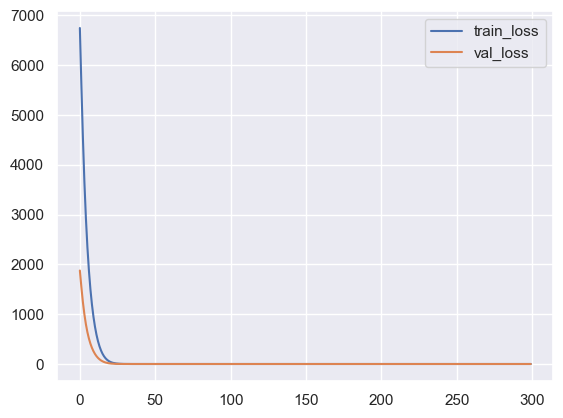

Finished Training
Epoch 1/300


100%|██████████| 13/13 [00:00<00:00, 162.57it/s]


Train Loss: 6540.690032958984


100%|██████████| 4/4 [00:00<00:00, 487.50it/s]


Epoch 2/300


100%|██████████| 13/13 [00:00<00:00, 152.95it/s]


Train Loss: 5347.074737548828


100%|██████████| 4/4 [00:00<00:00, 652.40it/s]


Epoch 3/300


100%|██████████| 13/13 [00:00<00:00, 156.92it/s]


Train Loss: 4368.568817138672


100%|██████████| 4/4 [00:00<00:00, 572.33it/s]


Epoch 4/300


100%|██████████| 13/13 [00:00<00:00, 161.60it/s]


Train Loss: 3552.9844665527344


100%|██████████| 4/4 [00:00<00:00, 631.62it/s]


Epoch 5/300


100%|██████████| 13/13 [00:00<00:00, 144.22it/s]


Train Loss: 2882.7869415283203


100%|██████████| 4/4 [00:00<00:00, 610.04it/s]


Epoch 6/300


100%|██████████| 13/13 [00:00<00:00, 148.58it/s]


Train Loss: 2337.266403198242


100%|██████████| 4/4 [00:00<00:00, 646.32it/s]


Epoch 7/300


100%|██████████| 13/13 [00:00<00:00, 157.85it/s]


Train Loss: 1893.4825897216797


100%|██████████| 4/4 [00:00<00:00, 674.08it/s]


Epoch 8/300


100%|██████████| 13/13 [00:00<00:00, 167.46it/s]


Train Loss: 1531.7306518554688


100%|██████████| 4/4 [00:00<00:00, 616.45it/s]


Epoch 9/300


100%|██████████| 13/13 [00:00<00:00, 111.65it/s]


Train Loss: 1236.0729064941406


100%|██████████| 4/4 [00:00<00:00, 643.08it/s]


Epoch 10/300


100%|██████████| 13/13 [00:00<00:00, 168.50it/s]


Train Loss: 993.9375839233398


100%|██████████| 4/4 [00:00<00:00, 560.68it/s]


Epoch 11/300


100%|██████████| 13/13 [00:00<00:00, 146.33it/s]


Train Loss: 795.475830078125


100%|██████████| 4/4 [00:00<00:00, 637.24it/s]


Epoch 12/300


100%|██████████| 13/13 [00:00<00:00, 163.88it/s]


Train Loss: 632.9637107849121


100%|██████████| 4/4 [00:00<00:00, 642.49it/s]


Epoch 13/300


100%|██████████| 13/13 [00:00<00:00, 143.68it/s]


Train Loss: 500.2476577758789


100%|██████████| 4/4 [00:00<00:00, 601.85it/s]


Epoch 14/300


100%|██████████| 13/13 [00:00<00:00, 156.28it/s]


Train Loss: 392.4085235595703


100%|██████████| 4/4 [00:00<00:00, 637.65it/s]


Epoch 15/300


100%|██████████| 13/13 [00:00<00:00, 142.59it/s]


Train Loss: 305.34065437316895


100%|██████████| 4/4 [00:00<00:00, 667.75it/s]


Epoch 16/300


100%|██████████| 13/13 [00:00<00:00, 153.82it/s]


Train Loss: 235.59134769439697


100%|██████████| 4/4 [00:00<00:00, 638.77it/s]


Epoch 17/300


100%|██████████| 13/13 [00:00<00:00, 119.36it/s]


Train Loss: 180.18247413635254


100%|██████████| 4/4 [00:00<00:00, 619.20it/s]


Epoch 18/300


100%|██████████| 13/13 [00:00<00:00, 162.98it/s]


Train Loss: 136.5795431137085


100%|██████████| 4/4 [00:00<00:00, 642.88it/s]


Epoch 19/300


100%|██████████| 13/13 [00:00<00:00, 148.79it/s]


Train Loss: 102.58709144592285


100%|██████████| 4/4 [00:00<00:00, 641.55it/s]


Epoch 20/300


100%|██████████| 13/13 [00:00<00:00, 174.93it/s]


Train Loss: 76.34642267227173


100%|██████████| 4/4 [00:00<00:00, 620.14it/s]


Epoch 21/300


100%|██████████| 13/13 [00:00<00:00, 152.14it/s]


Train Loss: 56.30123329162598


100%|██████████| 4/4 [00:00<00:00, 484.79it/s]


Epoch 22/300


100%|██████████| 13/13 [00:00<00:00, 158.78it/s]


Train Loss: 41.13114786148071


100%|██████████| 4/4 [00:00<00:00, 663.79it/s]


Epoch 23/300


100%|██████████| 13/13 [00:00<00:00, 167.86it/s]


Train Loss: 29.77260994911194


100%|██████████| 4/4 [00:00<00:00, 651.77it/s]


Epoch 24/300


100%|██████████| 13/13 [00:00<00:00, 149.75it/s]


Train Loss: 21.351706862449646


100%|██████████| 4/4 [00:00<00:00, 550.87it/s]


Epoch 25/300


100%|██████████| 13/13 [00:00<00:00, 147.89it/s]


Train Loss: 15.176262080669403


100%|██████████| 4/4 [00:00<00:00, 672.16it/s]


Epoch 26/300


100%|██████████| 13/13 [00:00<00:00, 159.76it/s]


Train Loss: 10.687468469142914


100%|██████████| 4/4 [00:00<00:00, 574.39it/s]


Epoch 27/300


100%|██████████| 13/13 [00:00<00:00, 152.44it/s]


Train Loss: 7.4588616490364075


100%|██████████| 4/4 [00:00<00:00, 643.69it/s]


Epoch 28/300


100%|██████████| 13/13 [00:00<00:00, 153.97it/s]


Train Loss: 5.161829590797424


100%|██████████| 4/4 [00:00<00:00, 635.72it/s]


Epoch 29/300


100%|██████████| 13/13 [00:00<00:00, 168.24it/s]


Train Loss: 3.5422480553388596


100%|██████████| 4/4 [00:00<00:00, 661.82it/s]


Epoch 30/300


100%|██████████| 13/13 [00:00<00:00, 132.34it/s]


Train Loss: 2.4145628958940506


100%|██████████| 4/4 [00:00<00:00, 203.98it/s]


Epoch 31/300


100%|██████████| 13/13 [00:00<00:00, 163.49it/s]


Train Loss: 1.6332828402519226


100%|██████████| 4/4 [00:00<00:00, 634.92it/s]


Epoch 32/300


100%|██████████| 13/13 [00:00<00:00, 155.85it/s]


Train Loss: 1.1037139147520065


100%|██████████| 4/4 [00:00<00:00, 666.53it/s]


Epoch 33/300


100%|██████████| 13/13 [00:00<00:00, 165.78it/s]


Train Loss: 0.7424813657999039


100%|██████████| 4/4 [00:00<00:00, 659.84it/s]


Epoch 34/300


100%|██████████| 13/13 [00:00<00:00, 165.72it/s]


Train Loss: 0.5016098022460938


100%|██████████| 4/4 [00:00<00:00, 497.83it/s]


Epoch 35/300


100%|██████████| 13/13 [00:00<00:00, 161.94it/s]


Train Loss: 0.34031533263623714


100%|██████████| 4/4 [00:00<00:00, 593.55it/s]


Epoch 36/300


100%|██████████| 13/13 [00:00<00:00, 169.60it/s]


Train Loss: 0.23691895883530378


100%|██████████| 4/4 [00:00<00:00, 671.73it/s]


Epoch 37/300


100%|██████████| 13/13 [00:00<00:00, 163.29it/s]


Train Loss: 0.16677858121693134


100%|██████████| 4/4 [00:00<00:00, 671.12it/s]


Epoch 38/300


100%|██████████| 13/13 [00:00<00:00, 143.95it/s]


Train Loss: 0.1260345377959311


100%|██████████| 4/4 [00:00<00:00, 509.19it/s]


Epoch 39/300


100%|██████████| 13/13 [00:00<00:00, 147.01it/s]


Train Loss: 0.09945151256397367


100%|██████████| 4/4 [00:00<00:00, 427.86it/s]


Epoch 40/300


100%|██████████| 13/13 [00:00<00:00, 164.83it/s]


Train Loss: 0.08104193955659866


100%|██████████| 4/4 [00:00<00:00, 555.63it/s]


Epoch 41/300


100%|██████████| 13/13 [00:00<00:00, 155.86it/s]


Train Loss: 0.07279211306013167


100%|██████████| 4/4 [00:00<00:00, 674.08it/s]


Epoch 42/300


100%|██████████| 13/13 [00:00<00:00, 152.52it/s]


Train Loss: 0.06311917456332594


100%|██████████| 4/4 [00:00<00:00, 571.41it/s]


Epoch 43/300


100%|██████████| 13/13 [00:00<00:00, 119.94it/s]


Train Loss: 0.0591939379228279


100%|██████████| 4/4 [00:00<00:00, 606.44it/s]


Epoch 44/300


100%|██████████| 13/13 [00:00<00:00, 137.10it/s]


Train Loss: 0.056935168453492224


100%|██████████| 4/4 [00:00<00:00, 506.41it/s]


Epoch 45/300


100%|██████████| 13/13 [00:00<00:00, 140.42it/s]


Train Loss: 0.05699112720321864


100%|██████████| 4/4 [00:00<00:00, 450.76it/s]


Epoch 46/300


100%|██████████| 13/13 [00:00<00:00, 146.04it/s]


Train Loss: 0.05455384973902255


100%|██████████| 4/4 [00:00<00:00, 631.89it/s]


Epoch 47/300


100%|██████████| 13/13 [00:00<00:00, 149.01it/s]


Train Loss: 0.05486247374210507


100%|██████████| 4/4 [00:00<00:00, 589.36it/s]


Epoch 48/300


100%|██████████| 13/13 [00:00<00:00, 135.63it/s]


Train Loss: 0.05403484893031418


100%|██████████| 4/4 [00:00<00:00, 627.14it/s]


Epoch 49/300


100%|██████████| 13/13 [00:00<00:00, 128.25it/s]


Train Loss: 0.05632232443895191


100%|██████████| 4/4 [00:00<00:00, 639.89it/s]


Epoch 50/300


100%|██████████| 13/13 [00:00<00:00, 79.58it/s]


Train Loss: 0.05641909409314394


100%|██████████| 4/4 [00:00<00:00, 607.08it/s]


Epoch 51/300


100%|██████████| 13/13 [00:00<00:00, 97.50it/s]


Train Loss: 0.054638642468489707


100%|██████████| 4/4 [00:00<00:00, 555.17it/s]


Epoch 52/300


100%|██████████| 13/13 [00:00<00:00, 131.42it/s]


Train Loss: 0.0577246502507478


100%|██████████| 4/4 [00:00<00:00, 489.06it/s]


Epoch 53/300


100%|██████████| 13/13 [00:00<00:00, 148.50it/s]


Train Loss: 0.05922331288456917


100%|██████████| 4/4 [00:00<00:00, 616.81it/s]


Epoch 54/300


100%|██████████| 13/13 [00:00<00:00, 87.42it/s]


Train Loss: 0.06211177830118686


100%|██████████| 4/4 [00:00<00:00, 599.08it/s]


Epoch 55/300


100%|██████████| 13/13 [00:00<00:00, 95.65it/s]


Train Loss: 0.052681928500533104


100%|██████████| 4/4 [00:00<00:00, 491.64it/s]


Epoch 56/300


100%|██████████| 13/13 [00:00<00:00, 76.49it/s]


Train Loss: 0.05290289083495736


100%|██████████| 4/4 [00:00<00:00, 562.11it/s]


Epoch 57/300


100%|██████████| 13/13 [00:00<00:00, 71.90it/s]


Train Loss: 0.054289709660224617


100%|██████████| 4/4 [00:00<00:00, 483.90it/s]


Epoch 58/300


100%|██████████| 13/13 [00:00<00:00, 131.04it/s]


Train Loss: 0.05588107299990952


100%|██████████| 4/4 [00:00<00:00, 146.89it/s]


Epoch 59/300


100%|██████████| 13/13 [00:00<00:00, 67.61it/s]


Train Loss: 0.05221748951589689


100%|██████████| 4/4 [00:00<00:00, 181.52it/s]


Epoch 60/300


100%|██████████| 13/13 [00:00<00:00, 89.67it/s]


Train Loss: 0.05083866906352341


100%|██████████| 4/4 [00:00<00:00, 624.52it/s]


Epoch 61/300


100%|██████████| 13/13 [00:00<00:00, 83.93it/s]


Train Loss: 0.05605321389157325


100%|██████████| 4/4 [00:00<00:00, 153.03it/s]


Epoch 62/300


100%|██████████| 13/13 [00:00<00:00, 53.99it/s]


Train Loss: 0.05350531334988773


100%|██████████| 4/4 [00:00<00:00, 354.35it/s]


Epoch 63/300


100%|██████████| 13/13 [00:00<00:00, 153.04it/s]


Train Loss: 0.05668117984896526


100%|██████████| 4/4 [00:00<00:00, 463.65it/s]


Epoch 64/300


100%|██████████| 13/13 [00:00<00:00, 64.05it/s]


Train Loss: 0.058464278001338243


100%|██████████| 4/4 [00:00<00:00, 135.60it/s]


Epoch 65/300


100%|██████████| 13/13 [00:00<00:00, 39.56it/s]


Train Loss: 0.05779864394571632


100%|██████████| 4/4 [00:00<00:00, 177.98it/s]


Epoch 66/300


100%|██████████| 13/13 [00:00<00:00, 100.19it/s]


Train Loss: 0.05698096542619169


100%|██████████| 4/4 [00:00<00:00, 525.82it/s]


Epoch 67/300


100%|██████████| 13/13 [00:00<00:00, 155.92it/s]


Train Loss: 0.05940867529716343


100%|██████████| 4/4 [00:00<00:00, 684.48it/s]


Epoch 68/300


100%|██████████| 13/13 [00:00<00:00, 142.29it/s]


Train Loss: 0.05397968803299591


100%|██████████| 4/4 [00:00<00:00, 485.40it/s]


Epoch 69/300


100%|██████████| 13/13 [00:00<00:00, 167.20it/s]


Train Loss: 0.05387405678629875


100%|██████████| 4/4 [00:00<00:00, 490.13it/s]


Epoch 70/300


100%|██████████| 13/13 [00:00<00:00, 64.61it/s]


Train Loss: 0.049696149479132146


100%|██████████| 4/4 [00:00<00:00, 531.63it/s]


Epoch 71/300


100%|██████████| 13/13 [00:00<00:00, 115.79it/s]


Train Loss: 0.0506380699807778


100%|██████████| 4/4 [00:00<00:00, 209.75it/s]


Epoch 72/300


100%|██████████| 13/13 [00:00<00:00, 97.18it/s] 


Train Loss: 0.055940056627150625


100%|██████████| 4/4 [00:00<00:00, 263.64it/s]


Epoch 73/300


100%|██████████| 13/13 [00:00<00:00, 39.95it/s]


Train Loss: 0.0511780078522861


100%|██████████| 4/4 [00:00<00:00, 86.69it/s]


Epoch 74/300


100%|██████████| 13/13 [00:00<00:00, 46.04it/s]


Train Loss: 0.05451541370712221


100%|██████████| 4/4 [00:00<00:00, 163.52it/s]


Epoch 75/300


100%|██████████| 13/13 [00:00<00:00, 75.93it/s]


Train Loss: 0.0551597285666503


100%|██████████| 4/4 [00:00<00:00, 657.34it/s]


Epoch 76/300


100%|██████████| 13/13 [00:00<00:00, 164.93it/s]


Train Loss: 0.056469361821655184


100%|██████████| 4/4 [00:00<00:00, 677.73it/s]


Epoch 77/300


100%|██████████| 13/13 [00:00<00:00, 153.43it/s]


Train Loss: 0.05871531902812421


100%|██████████| 4/4 [00:00<00:00, 577.73it/s]


Epoch 78/300


100%|██████████| 13/13 [00:00<00:00, 158.08it/s]


Train Loss: 0.05300756968790665


100%|██████████| 4/4 [00:00<00:00, 554.07it/s]


Epoch 79/300


100%|██████████| 13/13 [00:00<00:00, 148.64it/s]


Train Loss: 0.05094485136214644


100%|██████████| 4/4 [00:00<00:00, 591.18it/s]


Epoch 80/300


100%|██████████| 13/13 [00:00<00:00, 152.28it/s]


Train Loss: 0.05479901854414493


100%|██████████| 4/4 [00:00<00:00, 369.79it/s]


Epoch 81/300


100%|██████████| 13/13 [00:00<00:00, 153.66it/s]


Train Loss: 0.05520858720410615


100%|██████████| 4/4 [00:00<00:00, 583.60it/s]


Epoch 82/300


100%|██████████| 13/13 [00:00<00:00, 147.82it/s]


Train Loss: 0.05422556953271851


100%|██████████| 4/4 [00:00<00:00, 301.28it/s]


Epoch 83/300


100%|██████████| 13/13 [00:00<00:00, 145.11it/s]


Train Loss: 0.05385898915119469


100%|██████████| 4/4 [00:00<00:00, 295.77it/s]


Epoch 84/300


100%|██████████| 13/13 [00:00<00:00, 106.75it/s]


Train Loss: 0.05487530352547765


100%|██████████| 4/4 [00:00<00:00, 583.70it/s]


Epoch 85/300


100%|██████████| 13/13 [00:00<00:00, 86.05it/s]


Train Loss: 0.05709560192190111


100%|██████████| 4/4 [00:00<00:00, 621.70it/s]


Epoch 86/300


100%|██████████| 13/13 [00:00<00:00, 61.92it/s]


Train Loss: 0.05648766807280481


100%|██████████| 4/4 [00:00<00:00, 310.78it/s]


Epoch 87/300


100%|██████████| 13/13 [00:00<00:00, 44.78it/s]


Train Loss: 0.051506319316104054


100%|██████████| 4/4 [00:00<00:00, 73.29it/s]


Epoch 88/300


100%|██████████| 13/13 [00:00<00:00, 56.38it/s]


Train Loss: 0.051101629505865276


100%|██████████| 4/4 [00:00<00:00, 444.05it/s]


Epoch 89/300


100%|██████████| 13/13 [00:00<00:00, 118.88it/s]


Train Loss: 0.054783808533102274


100%|██████████| 4/4 [00:00<00:00, 513.72it/s]


Epoch 90/300


100%|██████████| 13/13 [00:00<00:00, 135.51it/s]


Train Loss: 0.055701471981592476


100%|██████████| 4/4 [00:00<00:00, 640.60it/s]


Epoch 91/300


100%|██████████| 13/13 [00:00<00:00, 149.46it/s]


Train Loss: 0.05624063510913402


100%|██████████| 4/4 [00:00<00:00, 441.65it/s]


Epoch 92/300


100%|██████████| 13/13 [00:00<00:00, 113.84it/s]


Train Loss: 0.056067997706122696


100%|██████████| 4/4 [00:00<00:00, 128.17it/s]


Epoch 93/300


100%|██████████| 13/13 [00:00<00:00, 104.15it/s]


Train Loss: 0.05148187221493572


100%|██████████| 4/4 [00:00<00:00, 464.51it/s]


Epoch 94/300


100%|██████████| 13/13 [00:00<00:00, 124.06it/s]


Train Loss: 0.05605975165963173


100%|██████████| 4/4 [00:00<00:00, 620.83it/s]


Epoch 95/300


100%|██████████| 13/13 [00:00<00:00, 128.43it/s]


Train Loss: 0.05243743082974106


100%|██████████| 4/4 [00:00<00:00, 591.54it/s]


Epoch 96/300


100%|██████████| 13/13 [00:00<00:00, 133.10it/s]


Train Loss: 0.053513296763412654


100%|██████████| 4/4 [00:00<00:00, 601.96it/s]


Epoch 97/300


100%|██████████| 13/13 [00:00<00:00, 107.56it/s]


Train Loss: 0.05279803974553943


100%|██████████| 4/4 [00:00<00:00, 459.88it/s]


Epoch 98/300


100%|██████████| 13/13 [00:00<00:00, 145.48it/s]


Train Loss: 0.054208324290812016


100%|██████████| 4/4 [00:00<00:00, 632.70it/s]


Epoch 99/300


100%|██████████| 13/13 [00:00<00:00, 156.60it/s]


Train Loss: 0.05458817176986486


100%|██████████| 4/4 [00:00<00:00, 644.24it/s]


Epoch 100/300


100%|██████████| 13/13 [00:00<00:00, 139.29it/s]


Train Loss: 0.0524924750206992


100%|██████████| 4/4 [00:00<00:00, 674.08it/s]


Epoch 101/300


100%|██████████| 13/13 [00:00<00:00, 157.72it/s]


Train Loss: 0.0553912699688226


100%|██████████| 4/4 [00:00<00:00, 502.70it/s]


Epoch 102/300


100%|██████████| 13/13 [00:00<00:00, 161.45it/s]


Train Loss: 0.05570125882513821


100%|██████████| 4/4 [00:00<00:00, 657.34it/s]


Epoch 103/300


100%|██████████| 13/13 [00:00<00:00, 152.40it/s]


Train Loss: 0.059355097357183695


100%|██████████| 4/4 [00:00<00:00, 587.99it/s]


Epoch 104/300


100%|██████████| 13/13 [00:00<00:00, 165.70it/s]


Train Loss: 0.05581029475433752


100%|██████████| 4/4 [00:00<00:00, 521.99it/s]


Epoch 105/300


100%|██████████| 13/13 [00:00<00:00, 156.48it/s]


Train Loss: 0.05319912079721689


100%|██████████| 4/4 [00:00<00:00, 617.60it/s]


Epoch 106/300


100%|██████████| 13/13 [00:00<00:00, 153.60it/s]


Train Loss: 0.059956852230243385


100%|██████████| 4/4 [00:00<00:00, 527.83it/s]


Epoch 107/300


100%|██████████| 13/13 [00:00<00:00, 145.26it/s]


Train Loss: 0.06155887641943991


100%|██████████| 4/4 [00:00<00:00, 254.27it/s]


Epoch 108/300


100%|██████████| 13/13 [00:00<00:00, 112.03it/s]


Train Loss: 0.05356027220841497


100%|██████████| 4/4 [00:00<00:00, 459.40it/s]


Epoch 109/300


100%|██████████| 13/13 [00:00<00:00, 146.16it/s]


Train Loss: 0.05349308770382777


100%|██████████| 4/4 [00:00<00:00, 612.11it/s]


Epoch 110/300


100%|██████████| 13/13 [00:00<00:00, 157.61it/s]


Train Loss: 0.05468984635081142


100%|██████████| 4/4 [00:00<00:00, 661.38it/s]


Epoch 111/300


100%|██████████| 13/13 [00:00<00:00, 144.70it/s]


Train Loss: 0.054422638728283346


100%|██████████| 4/4 [00:00<00:00, 688.47it/s]


Epoch 112/300


100%|██████████| 13/13 [00:00<00:00, 160.90it/s]


Train Loss: 0.05451196659123525


100%|██████████| 4/4 [00:00<00:00, 667.01it/s]


Epoch 113/300


100%|██████████| 13/13 [00:00<00:00, 156.51it/s]


Train Loss: 0.05254219414200634


100%|██████████| 4/4 [00:00<00:00, 566.42it/s]


Epoch 114/300


100%|██████████| 13/13 [00:00<00:00, 167.36it/s]


Train Loss: 0.0556738234590739


100%|██████████| 4/4 [00:00<00:00, 633.03it/s]


Epoch 115/300


100%|██████████| 13/13 [00:00<00:00, 150.12it/s]


Train Loss: 0.059596332197543234


100%|██████████| 4/4 [00:00<00:00, 348.16it/s]


Epoch 116/300


100%|██████████| 13/13 [00:00<00:00, 149.98it/s]


Train Loss: 0.05764381366316229


100%|██████████| 4/4 [00:00<00:00, 530.22it/s]


Epoch 117/300


100%|██████████| 13/13 [00:00<00:00, 162.84it/s]


Train Loss: 0.057926385023165494


100%|██████████| 4/4 [00:00<00:00, 543.60it/s]


Epoch 118/300


100%|██████████| 13/13 [00:00<00:00, 137.96it/s]


Train Loss: 0.0629954565083608


100%|██████████| 4/4 [00:00<00:00, 454.63it/s]


Epoch 119/300


100%|██████████| 13/13 [00:00<00:00, 90.54it/s]


Train Loss: 0.058393926126882434


100%|██████████| 4/4 [00:00<00:00, 662.27it/s]


Epoch 120/300


100%|██████████| 13/13 [00:00<00:00, 154.32it/s]


Train Loss: 0.0510858116322197


100%|██████████| 4/4 [00:00<00:00, 540.03it/s]


Epoch 121/300


100%|██████████| 13/13 [00:00<00:00, 155.99it/s]


Train Loss: 0.05434856959618628


100%|██████████| 4/4 [00:00<00:00, 550.81it/s]


Epoch 122/300


100%|██████████| 13/13 [00:00<00:00, 120.91it/s]


Train Loss: 0.0563428143505007


100%|██████████| 4/4 [00:00<00:00, 328.38it/s]


Epoch 123/300


100%|██████████| 13/13 [00:00<00:00, 155.52it/s]


Train Loss: 0.05123205634299666


100%|██████████| 4/4 [00:00<00:00, 659.84it/s]


Epoch 124/300


100%|██████████| 13/13 [00:00<00:00, 161.21it/s]


Train Loss: 0.054752214695326984


100%|██████████| 4/4 [00:00<00:00, 620.55it/s]


Epoch 125/300


100%|██████████| 13/13 [00:00<00:00, 148.93it/s]


Train Loss: 0.05679349816637114


100%|██████████| 4/4 [00:00<00:00, 534.49it/s]


Epoch 126/300


100%|██████████| 13/13 [00:00<00:00, 135.75it/s]


Train Loss: 0.057993699447251856


100%|██████████| 4/4 [00:00<00:00, 629.42it/s]


Epoch 127/300


100%|██████████| 13/13 [00:00<00:00, 151.91it/s]


Train Loss: 0.055805633310228586


100%|██████████| 4/4 [00:00<00:00, 265.55it/s]


Epoch 128/300


100%|██████████| 13/13 [00:00<00:00, 97.49it/s]


Train Loss: 0.05517179844900966


100%|██████████| 4/4 [00:00<00:00, 633.99it/s]


Epoch 129/300


100%|██████████| 13/13 [00:00<00:00, 150.69it/s]


Train Loss: 0.05350795038975775


100%|██████████| 4/4 [00:00<00:00, 450.09it/s]


Epoch 130/300


100%|██████████| 13/13 [00:00<00:00, 133.30it/s]


Train Loss: 0.0536858772393316


100%|██████████| 4/4 [00:00<00:00, 590.66it/s]


Epoch 131/300


100%|██████████| 13/13 [00:00<00:00, 153.56it/s]


Train Loss: 0.05084006255492568


100%|██████████| 4/4 [00:00<00:00, 609.31it/s]


Epoch 132/300


100%|██████████| 13/13 [00:00<00:00, 127.17it/s]


Train Loss: 0.05244178732391447


100%|██████████| 4/4 [00:00<00:00, 564.74it/s]


Epoch 133/300


100%|██████████| 13/13 [00:00<00:00, 154.96it/s]


Train Loss: 0.05861429974902421


100%|██████████| 4/4 [00:00<00:00, 619.20it/s]


Epoch 134/300


100%|██████████| 13/13 [00:00<00:00, 143.21it/s]


Train Loss: 0.055614542798139155


100%|██████████| 4/4 [00:00<00:00, 577.47it/s]


Epoch 135/300


100%|██████████| 13/13 [00:00<00:00, 118.75it/s]


Train Loss: 0.05283010541461408


100%|██████████| 4/4 [00:00<00:00, 647.99it/s]


Epoch 136/300


100%|██████████| 13/13 [00:00<00:00, 155.29it/s]


Train Loss: 0.05398038472048938


100%|██████████| 4/4 [00:00<00:00, 596.48it/s]


Epoch 137/300


100%|██████████| 13/13 [00:00<00:00, 133.75it/s]


Train Loss: 0.05335133022163063


100%|██████████| 4/4 [00:00<00:00, 534.03it/s]


Epoch 138/300


100%|██████████| 13/13 [00:00<00:00, 153.51it/s]


Train Loss: 0.05279127397807315


100%|██████████| 4/4 [00:00<00:00, 414.46it/s]


Epoch 139/300


100%|██████████| 13/13 [00:00<00:00, 123.72it/s]


Train Loss: 0.05308850295841694


100%|██████████| 4/4 [00:00<00:00, 368.26it/s]


Epoch 140/300


100%|██████████| 13/13 [00:00<00:00, 133.72it/s]


Train Loss: 0.05590923794079572


100%|██████████| 4/4 [00:00<00:00, 550.58it/s]


Epoch 141/300


100%|██████████| 13/13 [00:00<00:00, 153.10it/s]


Train Loss: 0.05385748209664598


100%|██████████| 4/4 [00:00<00:00, 638.86it/s]


Epoch 142/300


100%|██████████| 13/13 [00:00<00:00, 135.09it/s]


Train Loss: 0.05253266141517088


100%|██████████| 4/4 [00:00<00:00, 631.53it/s]


Epoch 143/300


100%|██████████| 13/13 [00:00<00:00, 149.66it/s]


Train Loss: 0.05341109720757231


100%|██████████| 4/4 [00:00<00:00, 499.38it/s]


Epoch 144/300


100%|██████████| 13/13 [00:00<00:00, 138.80it/s]


Train Loss: 0.05404454213567078


100%|██████████| 4/4 [00:00<00:00, 636.95it/s]


Epoch 145/300


100%|██████████| 13/13 [00:00<00:00, 143.07it/s]


Train Loss: 0.054568725114222616


100%|██████████| 4/4 [00:00<00:00, 638.28it/s]


Epoch 146/300


100%|██████████| 13/13 [00:00<00:00, 149.52it/s]


Train Loss: 0.05908830731641501


100%|██████████| 4/4 [00:00<00:00, 585.06it/s]


Epoch 147/300


100%|██████████| 13/13 [00:00<00:00, 90.47it/s] 


Train Loss: 0.05449467134894803


100%|██████████| 4/4 [00:00<00:00, 383.76it/s]


Epoch 148/300


100%|██████████| 13/13 [00:00<00:00, 128.15it/s]


Train Loss: 0.052407380600925535


100%|██████████| 4/4 [00:00<00:00, 406.13it/s]


Epoch 149/300


100%|██████████| 13/13 [00:00<00:00, 125.12it/s]


Train Loss: 0.053394701797515154


100%|██████████| 4/4 [00:00<00:00, 577.31it/s]


Epoch 150/300


100%|██████████| 13/13 [00:00<00:00, 146.79it/s]


Train Loss: 0.053145299083553255


100%|██████████| 4/4 [00:00<00:00, 578.29it/s]


Epoch 151/300


100%|██████████| 13/13 [00:00<00:00, 132.30it/s]


Train Loss: 0.05225946241989732


100%|██████████| 4/4 [00:00<00:00, 662.16it/s]


Epoch 152/300


100%|██████████| 13/13 [00:00<00:00, 160.53it/s]


Train Loss: 0.055887928581796587


100%|██████████| 4/4 [00:00<00:00, 588.76it/s]


Epoch 153/300


100%|██████████| 13/13 [00:00<00:00, 151.07it/s]


Train Loss: 0.05406602309085429


100%|██████████| 4/4 [00:00<00:00, 376.97it/s]


Epoch 154/300


100%|██████████| 13/13 [00:00<00:00, 137.17it/s]


Train Loss: 0.05217088863719255


100%|██████████| 4/4 [00:00<00:00, 622.18it/s]


Epoch 155/300


100%|██████████| 13/13 [00:00<00:00, 150.30it/s]


Train Loss: 0.05997288832440972


100%|██████████| 4/4 [00:00<00:00, 575.13it/s]


Epoch 156/300


100%|██████████| 13/13 [00:00<00:00, 131.60it/s]


Train Loss: 0.05874373303959146


100%|██████████| 4/4 [00:00<00:00, 516.86it/s]


Epoch 157/300


100%|██████████| 13/13 [00:00<00:00, 165.57it/s]


Train Loss: 0.05716766690602526


100%|██████████| 4/4 [00:00<00:00, 305.60it/s]


Epoch 158/300


100%|██████████| 13/13 [00:00<00:00, 146.80it/s]


Train Loss: 0.060165354632772505


100%|██████████| 4/4 [00:00<00:00, 420.66it/s]


Epoch 159/300


100%|██████████| 13/13 [00:00<00:00, 133.25it/s]


Train Loss: 0.05939805752132088


100%|██████████| 4/4 [00:00<00:00, 589.90it/s]


Epoch 160/300


100%|██████████| 13/13 [00:00<00:00, 147.19it/s]


Train Loss: 0.05745771247893572


100%|██████████| 4/4 [00:00<00:00, 604.78it/s]


Epoch 161/300


100%|██████████| 13/13 [00:00<00:00, 142.44it/s]


Train Loss: 0.0538808552082628


100%|██████████| 4/4 [00:00<00:00, 617.67it/s]


Epoch 162/300


100%|██████████| 13/13 [00:00<00:00, 142.96it/s]


Train Loss: 0.056284633348695934


100%|██████████| 4/4 [00:00<00:00, 524.03it/s]


Epoch 163/300


100%|██████████| 13/13 [00:00<00:00, 128.37it/s]


Train Loss: 0.0549125662073493


100%|██████████| 4/4 [00:00<00:00, 508.66it/s]


Epoch 164/300


100%|██████████| 13/13 [00:00<00:00, 151.07it/s]


Train Loss: 0.051882001920603216


100%|██████████| 4/4 [00:00<00:00, 612.75it/s]


Epoch 165/300


100%|██████████| 13/13 [00:00<00:00, 166.93it/s]


Train Loss: 0.05562759842723608


100%|██████████| 4/4 [00:00<00:00, 574.88it/s]


Epoch 166/300


100%|██████████| 13/13 [00:00<00:00, 151.49it/s]


Train Loss: 0.05264636129140854


100%|██████████| 4/4 [00:00<00:00, 486.97it/s]


Epoch 167/300


100%|██████████| 13/13 [00:00<00:00, 167.04it/s]


Train Loss: 0.05328252352774143


100%|██████████| 4/4 [00:00<00:00, 612.44it/s]


Epoch 168/300


100%|██████████| 13/13 [00:00<00:00, 102.24it/s]


Train Loss: 0.055207325785886496


100%|██████████| 4/4 [00:00<00:00, 637.77it/s]


Epoch 169/300


100%|██████████| 13/13 [00:00<00:00, 158.27it/s]


Train Loss: 0.05317364796064794


100%|██████████| 4/4 [00:00<00:00, 619.59it/s]


Epoch 170/300


100%|██████████| 13/13 [00:00<00:00, 156.18it/s]


Train Loss: 0.053681454446632415


100%|██████████| 4/4 [00:00<00:00, 587.19it/s]


Epoch 171/300


100%|██████████| 13/13 [00:00<00:00, 143.10it/s]


Train Loss: 0.061296945554204285


100%|██████████| 4/4 [00:00<00:00, 623.83it/s]


Epoch 172/300


100%|██████████| 13/13 [00:00<00:00, 177.44it/s]


Train Loss: 0.061553470557555556


100%|██████████| 4/4 [00:00<00:00, 677.13it/s]


Epoch 173/300


100%|██████████| 13/13 [00:00<00:00, 152.61it/s]


Train Loss: 0.0650364583125338


100%|██████████| 4/4 [00:00<00:00, 588.06it/s]


Epoch 174/300


100%|██████████| 13/13 [00:00<00:00, 163.74it/s]


Train Loss: 0.06125400378368795


100%|██████████| 4/4 [00:00<00:00, 505.76it/s]


Epoch 175/300


100%|██████████| 13/13 [00:00<00:00, 159.74it/s]


Train Loss: 0.05934840010013431


100%|██████████| 4/4 [00:00<00:00, 636.03it/s]


Epoch 176/300


100%|██████████| 13/13 [00:00<00:00, 163.46it/s]


Train Loss: 0.05600114626577124


100%|██████████| 4/4 [00:00<00:00, 606.16it/s]


Epoch 177/300


100%|██████████| 13/13 [00:00<00:00, 153.95it/s]


Train Loss: 0.058386575314216316


100%|██████████| 4/4 [00:00<00:00, 582.56it/s]


Epoch 178/300


100%|██████████| 13/13 [00:00<00:00, 163.23it/s]


Train Loss: 0.05804679496213794


100%|██████████| 4/4 [00:00<00:00, 589.73it/s]


Epoch 179/300


100%|██████████| 13/13 [00:00<00:00, 144.43it/s]


Train Loss: 0.05424235586542636


100%|██████████| 4/4 [00:00<00:00, 622.76it/s]


Epoch 180/300


100%|██████████| 13/13 [00:00<00:00, 168.09it/s]


Train Loss: 0.05333383264951408


100%|██████████| 4/4 [00:00<00:00, 610.21it/s]


Epoch 181/300


100%|██████████| 13/13 [00:00<00:00, 91.72it/s]


Train Loss: 0.05834398104343563


100%|██████████| 4/4 [00:00<00:00, 632.63it/s]


Epoch 182/300


100%|██████████| 13/13 [00:00<00:00, 162.72it/s]


Train Loss: 0.05727931612636894


100%|██████████| 4/4 [00:00<00:00, 593.13it/s]


Epoch 183/300


100%|██████████| 13/13 [00:00<00:00, 159.02it/s]


Train Loss: 0.053584276349283755


100%|██████████| 4/4 [00:00<00:00, 537.28it/s]


Epoch 184/300


100%|██████████| 13/13 [00:00<00:00, 49.81it/s]


Train Loss: 0.05210906942375004


100%|██████████| 4/4 [00:00<00:00, 215.70it/s]


Epoch 185/300


100%|██████████| 13/13 [00:00<00:00, 144.42it/s]


Train Loss: 0.05442565568955615


100%|██████████| 4/4 [00:00<00:00, 533.07it/s]


Epoch 186/300


100%|██████████| 13/13 [00:00<00:00, 68.41it/s]


Train Loss: 0.059879490989260375


100%|██████████| 4/4 [00:00<00:00, 55.88it/s]


Epoch 187/300


100%|██████████| 13/13 [00:00<00:00, 88.00it/s]


Train Loss: 0.05783024587435648


100%|██████████| 4/4 [00:00<00:00, 596.40it/s]


Epoch 188/300


100%|██████████| 13/13 [00:00<00:00, 93.59it/s] 


Train Loss: 0.05692390096373856


100%|██████████| 4/4 [00:00<00:00, 673.41it/s]


Epoch 189/300


100%|██████████| 13/13 [00:00<00:00, 77.92it/s]


Train Loss: 0.05595531850121915


100%|██████████| 4/4 [00:00<00:00, 256.33it/s]


Epoch 190/300


100%|██████████| 13/13 [00:00<00:00, 89.89it/s]


Train Loss: 0.05362847167998552


100%|██████████| 4/4 [00:00<00:00, 616.45it/s]


Epoch 191/300


100%|██████████| 13/13 [00:00<00:00, 169.30it/s]


Train Loss: 0.05649792309850454


100%|██████████| 4/4 [00:00<00:00, 633.10it/s]


Epoch 192/300


100%|██████████| 13/13 [00:00<00:00, 162.98it/s]


Train Loss: 0.054450453899335116


100%|██████████| 4/4 [00:00<00:00, 582.68it/s]


Epoch 193/300


100%|██████████| 13/13 [00:00<00:00, 92.36it/s]


Train Loss: 0.05283809150569141


100%|██████████| 4/4 [00:00<00:00, 618.42it/s]


Epoch 194/300


100%|██████████| 13/13 [00:00<00:00, 91.04it/s] 


Train Loss: 0.05907561571802944


100%|██████████| 4/4 [00:00<00:00, 263.26it/s]


Epoch 195/300


100%|██████████| 13/13 [00:00<00:00, 79.42it/s]


Train Loss: 0.0706923883408308


100%|██████████| 4/4 [00:00<00:00, 713.53it/s]


Epoch 196/300


100%|██████████| 13/13 [00:00<00:00, 86.77it/s]


Train Loss: 0.06123544869478792


100%|██████████| 4/4 [00:00<00:00, 529.30it/s]


Epoch 197/300


100%|██████████| 13/13 [00:00<00:00, 52.59it/s]


Train Loss: 0.0611904903780669


100%|██████████| 4/4 [00:00<00:00, 532.54it/s]


Epoch 198/300


100%|██████████| 13/13 [00:00<00:00, 36.43it/s]


Train Loss: 0.055164568475447595


100%|██████████| 4/4 [00:00<00:00, 179.77it/s]


Epoch 199/300


100%|██████████| 13/13 [00:00<00:00, 59.61it/s]


Train Loss: 0.05174102436285466


100%|██████████| 4/4 [00:00<00:00, 173.56it/s]


Epoch 200/300


100%|██████████| 13/13 [00:00<00:00, 74.63it/s]


Train Loss: 0.0545334464404732


100%|██████████| 4/4 [00:00<00:00, 429.98it/s]


Epoch 201/300


100%|██████████| 13/13 [00:00<00:00, 123.93it/s]


Train Loss: 0.05605373403523117


100%|██████████| 4/4 [00:00<00:00, 431.50it/s]


Epoch 202/300


100%|██████████| 13/13 [00:00<00:00, 48.56it/s]


Train Loss: 0.05300826986785978


100%|██████████| 4/4 [00:00<00:00, 531.28it/s]


Epoch 203/300


100%|██████████| 13/13 [00:00<00:00, 118.60it/s]


Train Loss: 0.05315454216906801


100%|██████████| 4/4 [00:00<00:00, 675.33it/s]


Epoch 204/300


100%|██████████| 13/13 [00:00<00:00, 128.82it/s]


Train Loss: 0.05473952367901802


100%|██████████| 4/4 [00:00<00:00, 492.25it/s]


Epoch 205/300


100%|██████████| 13/13 [00:00<00:00, 144.75it/s]


Train Loss: 0.05543508846312761


100%|██████████| 4/4 [00:00<00:00, 506.27it/s]


Epoch 206/300


100%|██████████| 13/13 [00:00<00:00, 128.24it/s]


Train Loss: 0.05159302882384509


100%|██████████| 4/4 [00:00<00:00, 458.19it/s]


Epoch 207/300


100%|██████████| 13/13 [00:00<00:00, 45.83it/s]


Train Loss: 0.05281181319151074


100%|██████████| 4/4 [00:00<00:00, 262.95it/s]


Epoch 208/300


100%|██████████| 13/13 [00:00<00:00, 132.62it/s]


Train Loss: 0.059040536638349295


100%|██████████| 4/4 [00:00<00:00, 403.47it/s]


Epoch 209/300


100%|██████████| 13/13 [00:00<00:00, 51.30it/s]


Train Loss: 0.05656176485354081


100%|██████████| 4/4 [00:00<00:00, 486.14it/s]


Epoch 210/300


100%|██████████| 13/13 [00:00<00:00, 45.88it/s] 


Train Loss: 0.0555931210401468


100%|██████████| 4/4 [00:00<00:00, 458.66it/s]


Epoch 211/300


100%|██████████| 13/13 [00:00<00:00, 98.03it/s] 


Train Loss: 0.05470878758933395


100%|██████████| 4/4 [00:00<00:00, 488.63it/s]


Epoch 212/300


100%|██████████| 13/13 [00:00<00:00, 58.58it/s]


Train Loss: 0.05964984989259392


100%|██████████| 4/4 [00:00<00:00, 561.56it/s]


Epoch 213/300


100%|██████████| 13/13 [00:00<00:00, 118.40it/s]


Train Loss: 0.057650454342365265


100%|██████████| 4/4 [00:00<00:00, 402.18it/s]


Epoch 214/300


100%|██████████| 13/13 [00:00<00:00, 107.53it/s]


Train Loss: 0.05516066501149908


100%|██████████| 4/4 [00:00<00:00, 584.80it/s]


Epoch 215/300


100%|██████████| 13/13 [00:00<00:00, 151.56it/s]


Train Loss: 0.05693260533735156


100%|██████████| 4/4 [00:00<00:00, 562.97it/s]


Epoch 216/300


100%|██████████| 13/13 [00:00<00:00, 119.10it/s]


Train Loss: 0.056886603124439716


100%|██████████| 4/4 [00:00<00:00, 688.35it/s]


Epoch 217/300


100%|██████████| 13/13 [00:00<00:00, 154.31it/s]


Train Loss: 0.060963412397541106


100%|██████████| 4/4 [00:00<00:00, 661.67it/s]


Epoch 218/300


100%|██████████| 13/13 [00:00<00:00, 108.87it/s]


Train Loss: 0.05735619436018169


100%|██████████| 4/4 [00:00<00:00, 590.39it/s]


Epoch 219/300


100%|██████████| 13/13 [00:00<00:00, 150.75it/s]


Train Loss: 0.05552792642265558


100%|██████████| 4/4 [00:00<00:00, 663.47it/s]


Epoch 220/300


100%|██████████| 13/13 [00:00<00:00, 141.21it/s]


Train Loss: 0.05233703617705032


100%|██████████| 4/4 [00:00<00:00, 273.06it/s]


Epoch 221/300


100%|██████████| 13/13 [00:00<00:00, 122.45it/s]


Train Loss: 0.05369674041867256


100%|██████████| 4/4 [00:00<00:00, 387.33it/s]


Epoch 222/300


100%|██████████| 13/13 [00:00<00:00, 146.93it/s]


Train Loss: 0.05297694669570774


100%|██████████| 4/4 [00:00<00:00, 601.70it/s]


Epoch 223/300


100%|██████████| 13/13 [00:00<00:00, 90.61it/s] 


Train Loss: 0.054076433472801


100%|██████████| 4/4 [00:00<00:00, 367.99it/s]


Epoch 224/300


100%|██████████| 13/13 [00:00<00:00, 139.97it/s]


Train Loss: 0.05855530756525695


100%|██████████| 4/4 [00:00<00:00, 594.79it/s]


Epoch 225/300


100%|██████████| 13/13 [00:00<00:00, 133.74it/s]


Train Loss: 0.055669519235379994


100%|██████████| 4/4 [00:00<00:00, 588.24it/s]


Epoch 226/300


100%|██████████| 13/13 [00:00<00:00, 111.22it/s]


Train Loss: 0.054551457753404975


100%|██████████| 4/4 [00:00<00:00, 380.26it/s]


Epoch 227/300


100%|██████████| 13/13 [00:00<00:00, 120.68it/s]


Train Loss: 0.05680824018782005


100%|██████████| 4/4 [00:00<00:00, 410.97it/s]


Epoch 228/300


100%|██████████| 13/13 [00:00<00:00, 148.34it/s]


Train Loss: 0.058318634633906186


100%|██████████| 4/4 [00:00<00:00, 400.36it/s]


Epoch 229/300


100%|██████████| 13/13 [00:00<00:00, 123.92it/s]


Train Loss: 0.058890640968456864


100%|██████████| 4/4 [00:00<00:00, 229.19it/s]


Epoch 230/300


100%|██████████| 13/13 [00:00<00:00, 123.48it/s]


Train Loss: 0.05491641804110259


100%|██████████| 4/4 [00:00<00:00, 487.16it/s]


Epoch 231/300


100%|██████████| 13/13 [00:00<00:00, 123.16it/s]


Train Loss: 0.059414780931547284


100%|██████████| 4/4 [00:00<00:00, 575.29it/s]


Epoch 232/300


100%|██████████| 13/13 [00:00<00:00, 120.47it/s]


Train Loss: 0.05731345573440194


100%|██████████| 4/4 [00:00<00:00, 463.50it/s]


Epoch 233/300


100%|██████████| 13/13 [00:00<00:00, 89.48it/s]


Train Loss: 0.05348673218395561


100%|██████████| 4/4 [00:00<00:00, 540.40it/s]


Epoch 234/300


100%|██████████| 13/13 [00:00<00:00, 140.14it/s]


Train Loss: 0.05553829995915294


100%|██████████| 4/4 [00:00<00:00, 451.26it/s]


Epoch 235/300


100%|██████████| 13/13 [00:00<00:00, 132.23it/s]


Train Loss: 0.05649333749897778


100%|██████████| 4/4 [00:00<00:00, 648.82it/s]


Epoch 236/300


100%|██████████| 13/13 [00:00<00:00, 90.24it/s]


Train Loss: 0.05255389300873503


100%|██████████| 4/4 [00:00<00:00, 544.01it/s]


Epoch 237/300


100%|██████████| 13/13 [00:00<00:00, 166.68it/s]


Train Loss: 0.05606095714028925


100%|██████████| 4/4 [00:00<00:00, 612.84it/s]


Epoch 238/300


100%|██████████| 13/13 [00:00<00:00, 169.20it/s]


Train Loss: 0.051084940088912845


100%|██████████| 4/4 [00:00<00:00, 573.62it/s]


Epoch 239/300


100%|██████████| 13/13 [00:00<00:00, 166.09it/s]


Train Loss: 0.052047620294615626


100%|██████████| 4/4 [00:00<00:00, 676.83it/s]


Epoch 240/300


100%|██████████| 13/13 [00:00<00:00, 138.50it/s]


Train Loss: 0.05148617515806109


100%|██████████| 4/4 [00:00<00:00, 580.91it/s]


Epoch 241/300


100%|██████████| 13/13 [00:00<00:00, 151.19it/s]


Train Loss: 0.051646268111653626


100%|██████████| 4/4 [00:00<00:00, 538.02it/s]


Epoch 242/300


100%|██████████| 13/13 [00:00<00:00, 169.79it/s]


Train Loss: 0.05388123448938131


100%|██████████| 4/4 [00:00<00:00, 682.33it/s]


Epoch 243/300


100%|██████████| 13/13 [00:00<00:00, 142.37it/s]


Train Loss: 0.05742746277246624


100%|██████████| 4/4 [00:00<00:00, 676.45it/s]


Epoch 244/300


100%|██████████| 13/13 [00:00<00:00, 161.99it/s]


Train Loss: 0.05268840934149921


100%|██████████| 4/4 [00:00<00:00, 202.46it/s]


Epoch 245/300


100%|██████████| 13/13 [00:00<00:00, 99.86it/s]


Train Loss: 0.05084636207902804


100%|██████████| 4/4 [00:00<00:00, 624.90it/s]


Epoch 246/300


100%|██████████| 13/13 [00:00<00:00, 152.42it/s]


Train Loss: 0.05235245230142027


100%|██████████| 4/4 [00:00<00:00, 641.23it/s]


Epoch 247/300


100%|██████████| 13/13 [00:00<00:00, 173.20it/s]


Train Loss: 0.05452007305575535


100%|██████████| 4/4 [00:00<00:00, 591.39it/s]


Epoch 248/300


100%|██████████| 13/13 [00:00<00:00, 153.25it/s]


Train Loss: 0.05451149196596816


100%|██████████| 4/4 [00:00<00:00, 605.44it/s]


Epoch 249/300


100%|██████████| 13/13 [00:00<00:00, 170.31it/s]


Train Loss: 0.05830242100637406


100%|██████████| 4/4 [00:00<00:00, 599.25it/s]


Epoch 250/300


100%|██████████| 13/13 [00:00<00:00, 139.43it/s]


Train Loss: 0.0546000498579815


100%|██████████| 4/4 [00:00<00:00, 638.48it/s]


Epoch 251/300


100%|██████████| 13/13 [00:00<00:00, 152.66it/s]


Train Loss: 0.051440543960779905


100%|██████████| 4/4 [00:00<00:00, 669.91it/s]


Epoch 252/300


100%|██████████| 13/13 [00:00<00:00, 178.77it/s]


Train Loss: 0.05181425315095112


100%|██████████| 4/4 [00:00<00:00, 633.29it/s]


Epoch 253/300


100%|██████████| 13/13 [00:00<00:00, 154.61it/s]


Train Loss: 0.05455733684357256


100%|██████████| 4/4 [00:00<00:00, 646.62it/s]


Epoch 254/300


100%|██████████| 13/13 [00:00<00:00, 167.70it/s]


Train Loss: 0.05528776498977095


100%|██████████| 4/4 [00:00<00:00, 465.79it/s]


Epoch 255/300


100%|██████████| 13/13 [00:00<00:00, 160.65it/s]


Train Loss: 0.05449460039380938


100%|██████████| 4/4 [00:00<00:00, 631.89it/s]


Epoch 256/300


100%|██████████| 13/13 [00:00<00:00, 160.01it/s]


Train Loss: 0.05768443242413923


100%|██████████| 4/4 [00:00<00:00, 638.14it/s]


Epoch 257/300


100%|██████████| 13/13 [00:00<00:00, 166.55it/s]


Train Loss: 0.05810876400209963


100%|██████████| 4/4 [00:00<00:00, 701.86it/s]


Epoch 258/300


100%|██████████| 13/13 [00:00<00:00, 157.75it/s]


Train Loss: 0.053574945661239326


100%|██████████| 4/4 [00:00<00:00, 643.00it/s]


Epoch 259/300


100%|██████████| 13/13 [00:00<00:00, 145.34it/s]


Train Loss: 0.054869588231667876


100%|██████████| 4/4 [00:00<00:00, 578.39it/s]


Epoch 260/300


100%|██████████| 13/13 [00:00<00:00, 166.26it/s]


Train Loss: 0.051587784313596785


100%|██████████| 4/4 [00:00<00:00, 679.10it/s]


Epoch 261/300


100%|██████████| 13/13 [00:00<00:00, 150.86it/s]


Train Loss: 0.05348437768407166


100%|██████████| 4/4 [00:00<00:00, 548.38it/s]


Epoch 262/300


100%|██████████| 13/13 [00:00<00:00, 155.18it/s]


Train Loss: 0.05648226529592648


100%|██████████| 4/4 [00:00<00:00, 608.55it/s]


Epoch 263/300


100%|██████████| 13/13 [00:00<00:00, 164.63it/s]


Train Loss: 0.0523663351777941


100%|██████████| 4/4 [00:00<00:00, 653.47it/s]


Epoch 264/300


100%|██████████| 13/13 [00:00<00:00, 164.19it/s]


Train Loss: 0.0558495101868175


100%|██████████| 4/4 [00:00<00:00, 640.52it/s]


Epoch 265/300


100%|██████████| 13/13 [00:00<00:00, 172.02it/s]


Train Loss: 0.05730374378617853


100%|██████████| 4/4 [00:00<00:00, 639.62it/s]


Epoch 266/300


100%|██████████| 13/13 [00:00<00:00, 160.15it/s]


Train Loss: 0.056404659640975296


100%|██████████| 4/4 [00:00<00:00, 458.82it/s]


Epoch 267/300


100%|██████████| 13/13 [00:00<00:00, 102.04it/s]


Train Loss: 0.053466026787646115


100%|██████████| 4/4 [00:00<00:00, 651.06it/s]


Epoch 268/300


100%|██████████| 13/13 [00:00<00:00, 159.54it/s]


Train Loss: 0.05624838103540242


100%|██████████| 4/4 [00:00<00:00, 640.30it/s]


Epoch 269/300


100%|██████████| 13/13 [00:00<00:00, 146.44it/s]


Train Loss: 0.05665562173817307


100%|██████████| 4/4 [00:00<00:00, 631.13it/s]


Epoch 270/300


100%|██████████| 13/13 [00:00<00:00, 152.70it/s]


Train Loss: 0.05782908643595874


100%|██████████| 4/4 [00:00<00:00, 664.02it/s]


Epoch 271/300


100%|██████████| 13/13 [00:00<00:00, 174.33it/s]


Train Loss: 0.05752366210799664


100%|██████████| 4/4 [00:00<00:00, 667.32it/s]


Epoch 272/300


100%|██████████| 13/13 [00:00<00:00, 126.45it/s]


Train Loss: 0.05966709915082902


100%|██████████| 4/4 [00:00<00:00, 519.61it/s]


Epoch 273/300


100%|██████████| 13/13 [00:00<00:00, 133.74it/s]


Train Loss: 0.05600765813142061


100%|██████████| 4/4 [00:00<00:00, 510.72it/s]


Epoch 274/300


100%|██████████| 13/13 [00:00<00:00, 155.75it/s]


Train Loss: 0.052807798550929874


100%|██████████| 4/4 [00:00<00:00, 597.99it/s]


Epoch 275/300


100%|██████████| 13/13 [00:00<00:00, 163.91it/s]


Train Loss: 0.05714709986932576


100%|██████████| 4/4 [00:00<00:00, 669.24it/s]


Epoch 276/300


100%|██████████| 13/13 [00:00<00:00, 167.59it/s]


Train Loss: 0.05489960772683844


100%|██████████| 4/4 [00:00<00:00, 580.55it/s]


Epoch 277/300


100%|██████████| 13/13 [00:00<00:00, 165.16it/s]


Train Loss: 0.056616564048454165


100%|██████████| 4/4 [00:00<00:00, 653.70it/s]


Epoch 278/300


100%|██████████| 13/13 [00:00<00:00, 161.17it/s]


Train Loss: 0.05650797497946769


100%|██████████| 4/4 [00:00<00:00, 652.73it/s]


Epoch 279/300


100%|██████████| 13/13 [00:00<00:00, 173.62it/s]


Train Loss: 0.05610772327054292


100%|██████████| 4/4 [00:00<00:00, 660.39it/s]


Epoch 280/300


100%|██████████| 13/13 [00:00<00:00, 162.12it/s]


Train Loss: 0.05624151730444282


100%|██████████| 4/4 [00:00<00:00, 637.48it/s]


Epoch 281/300


100%|██████████| 13/13 [00:00<00:00, 169.54it/s]


Train Loss: 0.059749480220489204


100%|██████████| 4/4 [00:00<00:00, 676.94it/s]


Epoch 282/300


100%|██████████| 13/13 [00:00<00:00, 167.57it/s]


Train Loss: 0.056186354951933026


100%|██████████| 4/4 [00:00<00:00, 657.47it/s]


Epoch 283/300


100%|██████████| 13/13 [00:00<00:00, 144.53it/s]


Train Loss: 0.05574169981991872


100%|██████████| 4/4 [00:00<00:00, 504.73it/s]


Epoch 284/300


100%|██████████| 13/13 [00:00<00:00, 133.52it/s]


Train Loss: 0.058632143191061914


100%|██████████| 4/4 [00:00<00:00, 389.67it/s]


Epoch 285/300


100%|██████████| 13/13 [00:00<00:00, 143.13it/s]


Train Loss: 0.06282613961957395


100%|██████████| 4/4 [00:00<00:00, 465.72it/s]


Epoch 286/300


100%|██████████| 13/13 [00:00<00:00, 166.13it/s]


Train Loss: 0.060826452216133475


100%|██████████| 4/4 [00:00<00:00, 608.73it/s]


Epoch 287/300


100%|██████████| 13/13 [00:00<00:00, 155.36it/s]


Train Loss: 0.05744544032495469


100%|██████████| 4/4 [00:00<00:00, 607.52it/s]


Epoch 288/300


100%|██████████| 13/13 [00:00<00:00, 128.02it/s]


Train Loss: 0.057236179476603866


100%|██████████| 4/4 [00:00<00:00, 479.28it/s]


Epoch 289/300


100%|██████████| 13/13 [00:00<00:00, 62.17it/s]


Train Loss: 0.06397035787813365


100%|██████████| 4/4 [00:00<00:00, 362.70it/s]


Epoch 290/300


100%|██████████| 13/13 [00:00<00:00, 139.42it/s]


Train Loss: 0.05861275386996567


100%|██████████| 4/4 [00:00<00:00, 562.99it/s]


Epoch 291/300


100%|██████████| 13/13 [00:00<00:00, 142.20it/s]


Train Loss: 0.05428068956825882


100%|██████████| 4/4 [00:00<00:00, 70.74it/s]


Epoch 292/300


100%|██████████| 13/13 [00:00<00:00, 115.77it/s]


Train Loss: 0.05477286106906831


100%|██████████| 4/4 [00:00<00:00, 564.24it/s]


Epoch 293/300


100%|██████████| 13/13 [00:00<00:00, 133.76it/s]


Train Loss: 0.05323578475508839


100%|██████████| 4/4 [00:00<00:00, 546.22it/s]


Epoch 294/300


100%|██████████| 13/13 [00:00<00:00, 84.58it/s]


Train Loss: 0.05460055300500244


100%|██████████| 4/4 [00:00<00:00, 587.29it/s]


Epoch 295/300


100%|██████████| 13/13 [00:00<00:00, 131.07it/s]


Train Loss: 0.05540579813532531


100%|██████████| 4/4 [00:00<00:00, 290.59it/s]


Epoch 296/300


100%|██████████| 13/13 [00:00<00:00, 147.05it/s]


Train Loss: 0.05572835891507566


100%|██████████| 4/4 [00:00<00:00, 136.75it/s]


Epoch 297/300


100%|██████████| 13/13 [00:00<00:00, 48.12it/s]


Train Loss: 0.05690232967026532


100%|██████████| 4/4 [00:00<00:00, 233.08it/s]


Epoch 298/300


100%|██████████| 13/13 [00:00<00:00, 48.83it/s]


Train Loss: 0.05369070859160274


100%|██████████| 4/4 [00:00<00:00, 267.00it/s]


Epoch 299/300


100%|██████████| 13/13 [00:00<00:00, 53.75it/s]


Train Loss: 0.05269298708299175


100%|██████████| 4/4 [00:00<00:00, 106.10it/s]


Epoch 300/300


100%|██████████| 13/13 [00:00<00:00, 135.86it/s]


Train Loss: 0.05297038774006069


100%|██████████| 4/4 [00:00<00:00, 633.01it/s]


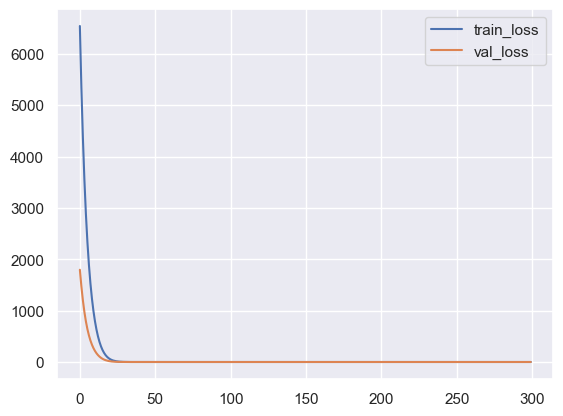

Finished Training


In [6]:
# trainer
from utils.trainer import Trainer
from torch.utils.data import random_split


sequence_length_list = [10, 15, 20]
lr_list = [0.001, 0.01]
batch_size_list = [64, 32]
hidden_size_list = [20, 40]

INPUT_SIZE = 6
NUM_LAYERS = 2

train_loss_list = []
val_loss_list = []
params_list = [[], [], [], []]

for sequence_length in sequence_length_list:
    for lr in lr_list:
        for batch_size in batch_size_list:
            for hidden_size in hidden_size_list:

                data = DroneDataset(df_np, seq_length = sequence_length)

                val_abs = int(len(data) * 0.8)
                train_subset, val_subset = random_split(
                        data, [val_abs, len(data) - val_abs]
                    )

                trainloader = torch.utils.data.DataLoader(
                        train_subset, batch_size=batch_size, shuffle=True, )
                valloader = torch.utils.data.DataLoader(
                        val_subset, batch_size=batch_size, shuffle=True, )

                model = DetectionLSTM(input_size=6, 
                                    hidden_size=25, 
                                    num_layers=2, 
                                    output_size=6, 
                                    batch_first=True)

                criteria = nn.MSELoss()
                optimizer = optim.Adam(model.parameters(), lr=lr)

                trainer = Trainer(model, 
                                train_loader=trainloader,
                                val_loader=valloader, 
                                criterion=nn.MSELoss(), 
                                optimizer=optimizer,
                                # if_wandb=True,
                                # wandb_project_name="drone-detection-lstm",
                                )

                train_loss, val_loss = trainer.train(epochs=300, 
                                                     path=f"../outputs/img/lstm/lstm_{sequence_length}_{lr}_{batch_size}_{hidden_size}.png")
                train_loss_list.append(train_loss)
                val_loss_list.append(val_loss)
                
                params_list[0].append(sequence_length)
                params_list[1].append(lr)
                params_list[2].append(batch_size)
                params_list[3].append(hidden_size)
                
                trainer.save_model(f"../saved_models/lstm/lstm_{sequence_length}_{lr}_{batch_size}_{hidden_size}.pth")
                
result_df = pd.DataFrame({"sequence_length": params_list[0],
                            "lr": params_list[1],
                            "batch_size": params_list[2],
                            "hidden_size": params_list[3],
                            "train_loss": train_loss_list,
                            "val_loss": val_loss_list})

# Make predictions

predefined measurement error $e$

In [ ]:
E = 0.0